In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import mnist
from keras.layers import Dense, Input, Flatten, Conv2D, MaxPool2D, Reshape, Dropout
from keras.layers import LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam
import os
import shutil

In [ ]:
(X_train,_),(X_test,_) = mnist.load_data()
X = np.vstack((X_train, X_test))
X = X.astype("float32")
X = (X - 127.5)/127.5

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
X[1] #shape is 70000,28,28 and type is ndarray

array([[-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.    

In [ ]:
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [ ]:
def discriminator_dense():
  inp = Input(shape = (28,28,1))
  x = Flatten()(inp)
  x = Dropout(0.4)(x)
  x = Dense(1024, activation=LeakyReLU(alpha=0.2))(x)
  x = Dropout(0.4)(x)
  x = Dense(512, activation=LeakyReLU(alpha=0.2))(x)
  x = Dropout(0.4)(x)
  x = Dense(512, activation=LeakyReLU(alpha = 0.2))(x)
  op = Dense(1, activation = "sigmoid")(x)

  model = Model(inp, op)
  model.compile(optimizer = Adam(lr = 0.0002, beta_1 = 0.5), loss = "binary_crossentropy")
  return model

In [ ]:
#from keras.layers import LeakyReLU

def generator(n):
  inp = Input(shape = (n))

  x = Dense(256, activation = LeakyReLU(alpha = 0.2))(inp)
  x = Dense(512, activation = LeakyReLU(alpha = 0.2))(x)
  x = Dense(1024, activation = LeakyReLU(alpha = 0.2))(x)
  x = Dense(784, activation = "tanh")(x)

  op = Reshape((28,28,1))(x)
  return Model(inp, op)

In [ ]:
#from keras.layers import LeakyReLU

def gan(discrim, gen):
  discrim.trainable = False
  model = Sequential()
  model.add(gen)
  model.add(discrim)
  model.compile(optimizer = Adam(lr = 0.0002, beta_1 = 0.5), loss = "binary_crossentropy")
  return model

In [ ]:
discrim = discriminator_dense()
gener = generator(100)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
gan_model = gan(discrim, gener)

1/1 [==============================] - 0s 68ms/step


/usr/local/lib/python3.8/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 0, '[[0.5090136]]')

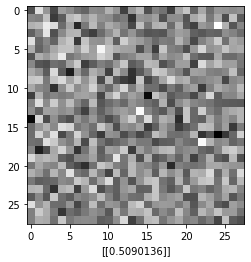

In [ ]:
plt.imshow(gener.predict(np.random.rand(100).reshape(1,100)).reshape(28,28),cmap = "gray")
plt.xlabel(discrim.predict(gener.predict(np.random.randn(100).reshape(1,100))))#n

1/1 [==============================] - 0s 21ms/step


Text(0.5, 0, '[[0.32526237]]')

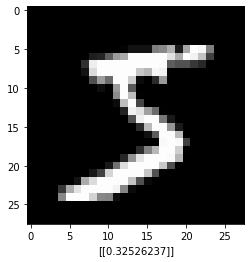

In [ ]:
plt.imshow(X[0].reshape(28,28), cmap = "gray")
plt.xlabel(discrim.predict(X[15].reshape(1,28,28,1)))

In [ ]:
from tqdm import tqdm

In [ ]:
epochs = 50
batch_size = 256
half_batch = batch_size//2
n = 100
losses = []

epochs 0


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 11ms/step


  0%|          | 1/273 [00:02<13:18,  2.94s/it]

4/4 [==============================] - 0s 24ms/step


  1%|          | 2/273 [00:03<07:21,  1.63s/it]

4/4 [==============================] - 0s 15ms/step


  1%|          | 3/273 [00:04<05:16,  1.17s/it]

4/4 [==============================] - 0s 11ms/step


  1%|▏         | 4/273 [00:04<03:58,  1.13it/s]

4/4 [==============================] - 0s 14ms/step


  2%|▏         | 5/273 [00:05<03:18,  1.35it/s]

4/4 [==============================] - 0s 9ms/step


  2%|▏         | 6/273 [00:05<02:50,  1.56it/s]

4/4 [==============================] - 0s 8ms/step


  3%|▎         | 7/273 [00:06<02:40,  1.66it/s]

4/4 [==============================] - 0s 11ms/step


  3%|▎         | 8/273 [00:06<02:31,  1.75it/s]

4/4 [==============================] - 0s 10ms/step


  3%|▎         | 9/273 [00:07<02:41,  1.64it/s]

4/4 [==============================] - 0s 9ms/step


  4%|▎         | 10/273 [00:07<02:31,  1.74it/s]

4/4 [==============================] - 0s 10ms/step


  4%|▍         | 11/273 [00:08<02:38,  1.65it/s]

4/4 [==============================] - 0s 12ms/step


  4%|▍         | 12/273 [00:09<02:29,  1.75it/s]

4/4 [==============================] - 0s 11ms/step


  5%|▍         | 13/273 [00:09<02:20,  1.85it/s]

4/4 [==============================] - 0s 11ms/step


  5%|▌         | 14/273 [00:10<02:20,  1.85it/s]

4/4 [==============================] - 0s 10ms/step


  5%|▌         | 15/273 [00:10<02:24,  1.78it/s]

4/4 [==============================] - 0s 10ms/step


  6%|▌         | 16/273 [00:11<02:30,  1.71it/s]

4/4 [==============================] - 0s 10ms/step


  6%|▌         | 17/273 [00:11<02:19,  1.83it/s]

4/4 [==============================] - 0s 15ms/step


  7%|▋         | 18/273 [00:12<02:16,  1.86it/s]

4/4 [==============================] - 0s 10ms/step


  7%|▋         | 19/273 [00:12<02:16,  1.86it/s]

4/4 [==============================] - 0s 10ms/step


  7%|▋         | 20/273 [00:13<02:21,  1.79it/s]

4/4 [==============================] - 0s 12ms/step


  8%|▊         | 21/273 [00:13<02:14,  1.87it/s]

4/4 [==============================] - 0s 13ms/step


  8%|▊         | 22/273 [00:14<02:09,  1.94it/s]

4/4 [==============================] - 0s 12ms/step


  8%|▊         | 23/273 [00:15<02:19,  1.79it/s]

4/4 [==============================] - 0s 10ms/step


  9%|▉         | 24/273 [00:15<02:16,  1.82it/s]

4/4 [==============================] - 0s 12ms/step


  9%|▉         | 25/273 [00:16<02:21,  1.75it/s]

4/4 [==============================] - 0s 13ms/step


 10%|▉         | 26/273 [00:16<02:23,  1.73it/s]

4/4 [==============================] - 0s 10ms/step


 10%|▉         | 27/273 [00:17<02:33,  1.60it/s]

4/4 [==============================] - 0s 13ms/step


 10%|█         | 28/273 [00:18<02:31,  1.62it/s]

4/4 [==============================] - 0s 10ms/step


 11%|█         | 29/273 [00:18<02:20,  1.74it/s]

4/4 [==============================] - 0s 11ms/step


 11%|█         | 30/273 [00:19<02:13,  1.82it/s]

4/4 [==============================] - 0s 14ms/step


 11%|█▏        | 31/273 [00:19<02:11,  1.84it/s]

4/4 [==============================] - 0s 12ms/step


 12%|█▏        | 32/273 [00:20<02:21,  1.70it/s]

4/4 [==============================] - 0s 11ms/step


 12%|█▏        | 33/273 [00:20<02:14,  1.79it/s]

4/4 [==============================] - 0s 13ms/step


 12%|█▏        | 34/273 [00:21<02:21,  1.69it/s]

4/4 [==============================] - 0s 10ms/step


 13%|█▎        | 35/273 [00:21<02:10,  1.82it/s]

4/4 [==============================] - 0s 10ms/step


 13%|█▎        | 36/273 [00:22<02:12,  1.79it/s]

4/4 [==============================] - 0s 10ms/step


 14%|█▎        | 37/273 [00:23<02:09,  1.82it/s]

4/4 [==============================] - 0s 7ms/step


 14%|█▍        | 38/273 [00:23<01:57,  2.00it/s]

4/4 [==============================] - 0s 6ms/step


 14%|█▍        | 39/273 [00:23<01:39,  2.36it/s]

4/4 [==============================] - 0s 7ms/step


 15%|█▍        | 40/273 [00:23<01:26,  2.68it/s]

4/4 [==============================] - 0s 7ms/step


 15%|█▌        | 41/273 [00:24<01:18,  2.95it/s]

4/4 [==============================] - 0s 6ms/step


 15%|█▌        | 42/273 [00:24<01:13,  3.12it/s]

4/4 [==============================] - 0s 6ms/step


 16%|█▌        | 43/273 [00:24<01:08,  3.34it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▌        | 44/273 [00:24<01:07,  3.41it/s]

4/4 [==============================] - 0s 7ms/step


 16%|█▋        | 45/273 [00:25<01:03,  3.61it/s]

4/4 [==============================] - 0s 6ms/step


 17%|█▋        | 46/273 [00:25<01:03,  3.59it/s]

4/4 [==============================] - 0s 6ms/step


 17%|█▋        | 47/273 [00:25<01:00,  3.73it/s]

4/4 [==============================] - 0s 6ms/step


 18%|█▊        | 48/273 [00:26<01:02,  3.61it/s]

4/4 [==============================] - 0s 7ms/step


 18%|█▊        | 49/273 [00:26<01:00,  3.72it/s]

4/4 [==============================] - 0s 7ms/step


 18%|█▊        | 50/273 [00:26<01:01,  3.62it/s]

4/4 [==============================] - 0s 6ms/step


 19%|█▊        | 51/273 [00:26<00:58,  3.76it/s]

4/4 [==============================] - 0s 6ms/step


 19%|█▉        | 52/273 [00:27<00:59,  3.69it/s]

4/4 [==============================] - 0s 6ms/step


 19%|█▉        | 53/273 [00:27<00:59,  3.69it/s]

4/4 [==============================] - 0s 7ms/step


 20%|█▉        | 54/273 [00:27<00:59,  3.70it/s]

4/4 [==============================] - 0s 7ms/step


 20%|██        | 55/273 [00:27<01:00,  3.62it/s]

4/4 [==============================] - 0s 6ms/step


 21%|██        | 56/273 [00:28<00:58,  3.71it/s]

4/4 [==============================] - 0s 7ms/step


 21%|██        | 57/273 [00:28<00:58,  3.66it/s]

4/4 [==============================] - 0s 6ms/step


 21%|██        | 58/273 [00:28<00:57,  3.76it/s]

4/4 [==============================] - 0s 7ms/step


 22%|██▏       | 59/273 [00:29<00:58,  3.69it/s]

4/4 [==============================] - 0s 11ms/step


 22%|██▏       | 60/273 [00:29<00:58,  3.67it/s]

4/4 [==============================] - 0s 6ms/step


 22%|██▏       | 61/273 [00:29<00:58,  3.65it/s]

4/4 [==============================] - 0s 7ms/step


 23%|██▎       | 62/273 [00:29<00:58,  3.63it/s]

4/4 [==============================] - 0s 7ms/step


 23%|██▎       | 63/273 [00:30<00:58,  3.57it/s]

4/4 [==============================] - 0s 7ms/step


 23%|██▎       | 64/273 [00:30<00:56,  3.71it/s]

4/4 [==============================] - 0s 6ms/step


 24%|██▍       | 65/273 [00:30<00:55,  3.71it/s]

4/4 [==============================] - 0s 6ms/step


 24%|██▍       | 66/273 [00:30<00:56,  3.65it/s]

4/4 [==============================] - 0s 7ms/step


 25%|██▍       | 67/273 [00:31<00:56,  3.63it/s]

4/4 [==============================] - 0s 7ms/step


 25%|██▍       | 68/273 [00:31<00:54,  3.76it/s]

4/4 [==============================] - 0s 6ms/step


 25%|██▌       | 69/273 [00:31<00:53,  3.83it/s]

4/4 [==============================] - 0s 6ms/step


 26%|██▌       | 70/273 [00:31<00:54,  3.72it/s]

4/4 [==============================] - 0s 6ms/step


 26%|██▌       | 71/273 [00:32<00:53,  3.76it/s]

4/4 [==============================] - 0s 6ms/step


 26%|██▋       | 72/273 [00:32<00:52,  3.81it/s]

4/4 [==============================] - 0s 7ms/step


 27%|██▋       | 73/273 [00:32<00:53,  3.76it/s]

4/4 [==============================] - 0s 7ms/step


 27%|██▋       | 74/273 [00:33<00:53,  3.73it/s]

4/4 [==============================] - 0s 7ms/step


 27%|██▋       | 75/273 [00:33<00:52,  3.74it/s]

4/4 [==============================] - 0s 7ms/step


 28%|██▊       | 76/273 [00:33<00:53,  3.70it/s]

4/4 [==============================] - 0s 7ms/step


 28%|██▊       | 77/273 [00:33<00:52,  3.76it/s]

4/4 [==============================] - 0s 7ms/step


 29%|██▊       | 78/273 [00:34<00:51,  3.81it/s]

4/4 [==============================] - 0s 6ms/step


 29%|██▉       | 79/273 [00:34<00:50,  3.85it/s]

4/4 [==============================] - 0s 6ms/step


 29%|██▉       | 80/273 [00:34<00:49,  3.88it/s]

4/4 [==============================] - 0s 7ms/step


 30%|██▉       | 81/273 [00:34<00:50,  3.77it/s]

4/4 [==============================] - 0s 6ms/step


 30%|███       | 82/273 [00:35<00:51,  3.69it/s]

4/4 [==============================] - 0s 9ms/step


 30%|███       | 83/273 [00:35<00:51,  3.67it/s]

4/4 [==============================] - 0s 8ms/step


 31%|███       | 84/273 [00:35<00:51,  3.64it/s]

4/4 [==============================] - 0s 7ms/step


 31%|███       | 85/273 [00:35<00:50,  3.72it/s]

4/4 [==============================] - 0s 7ms/step


 32%|███▏      | 86/273 [00:36<00:48,  3.83it/s]

4/4 [==============================] - 0s 6ms/step


 32%|███▏      | 87/273 [00:36<00:49,  3.76it/s]

4/4 [==============================] - 0s 7ms/step


 32%|███▏      | 88/273 [00:36<00:48,  3.81it/s]

4/4 [==============================] - 0s 6ms/step


 33%|███▎      | 89/273 [00:36<00:47,  3.89it/s]

4/4 [==============================] - 0s 9ms/step


 33%|███▎      | 90/273 [00:37<00:46,  3.91it/s]

4/4 [==============================] - 0s 7ms/step


 33%|███▎      | 91/273 [00:37<00:46,  3.93it/s]

4/4 [==============================] - 0s 7ms/step


 34%|███▎      | 92/273 [00:37<00:48,  3.76it/s]

4/4 [==============================] - 0s 7ms/step


 34%|███▍      | 93/273 [00:38<00:46,  3.84it/s]

4/4 [==============================] - 0s 7ms/step


 34%|███▍      | 94/273 [00:38<00:46,  3.85it/s]

4/4 [==============================] - 0s 7ms/step


 35%|███▍      | 95/273 [00:38<00:46,  3.87it/s]

4/4 [==============================] - 0s 7ms/step


 35%|███▌      | 96/273 [00:38<00:45,  3.92it/s]

4/4 [==============================] - 0s 6ms/step


 36%|███▌      | 97/273 [00:39<00:45,  3.90it/s]

4/4 [==============================] - 0s 7ms/step


 36%|███▌      | 98/273 [00:39<00:44,  3.90it/s]

4/4 [==============================] - 0s 6ms/step


 36%|███▋      | 99/273 [00:39<00:44,  3.90it/s]

4/4 [==============================] - 0s 7ms/step


 37%|███▋      | 100/273 [00:39<00:44,  3.88it/s]

4/4 [==============================] - 0s 6ms/step


 37%|███▋      | 101/273 [00:40<00:45,  3.82it/s]

4/4 [==============================] - 0s 7ms/step


 37%|███▋      | 102/273 [00:40<00:44,  3.80it/s]

4/4 [==============================] - 0s 7ms/step


 38%|███▊      | 103/273 [00:40<00:45,  3.75it/s]

4/4 [==============================] - 0s 7ms/step


 38%|███▊      | 104/273 [00:40<00:44,  3.76it/s]

4/4 [==============================] - 0s 7ms/step


 38%|███▊      | 105/273 [00:41<00:43,  3.87it/s]

4/4 [==============================] - 0s 6ms/step


 39%|███▉      | 106/273 [00:41<00:42,  3.89it/s]

4/4 [==============================] - 0s 6ms/step


 39%|███▉      | 107/273 [00:41<00:43,  3.77it/s]

4/4 [==============================] - 0s 7ms/step


 40%|███▉      | 108/273 [00:41<00:45,  3.67it/s]

4/4 [==============================] - 0s 7ms/step


 40%|███▉      | 109/273 [00:42<00:43,  3.77it/s]

4/4 [==============================] - 0s 6ms/step


 40%|████      | 110/273 [00:42<00:44,  3.68it/s]

4/4 [==============================] - 0s 9ms/step


 41%|████      | 111/273 [00:42<00:44,  3.64it/s]

4/4 [==============================] - 0s 6ms/step


 41%|████      | 112/273 [00:43<00:44,  3.59it/s]

4/4 [==============================] - 0s 7ms/step


 41%|████▏     | 113/273 [00:43<00:43,  3.70it/s]

4/4 [==============================] - 0s 6ms/step


 42%|████▏     | 114/273 [00:43<00:42,  3.74it/s]

4/4 [==============================] - 0s 7ms/step


 42%|████▏     | 115/273 [00:43<00:41,  3.79it/s]

4/4 [==============================] - 0s 7ms/step


 42%|████▏     | 116/273 [00:44<00:42,  3.73it/s]

4/4 [==============================] - 0s 7ms/step


 43%|████▎     | 117/273 [00:44<00:40,  3.81it/s]

4/4 [==============================] - 0s 10ms/step


 43%|████▎     | 118/273 [00:44<00:40,  3.82it/s]

4/4 [==============================] - 0s 9ms/step


 44%|████▎     | 119/273 [00:44<00:40,  3.76it/s]

4/4 [==============================] - 0s 7ms/step


 44%|████▍     | 120/273 [00:45<00:41,  3.73it/s]

4/4 [==============================] - 0s 7ms/step


 44%|████▍     | 121/273 [00:45<00:40,  3.75it/s]

4/4 [==============================] - 0s 7ms/step


 45%|████▍     | 122/273 [00:45<00:41,  3.68it/s]

4/4 [==============================] - 0s 7ms/step


 45%|████▌     | 123/273 [00:45<00:40,  3.73it/s]

4/4 [==============================] - 0s 7ms/step


 45%|████▌     | 124/273 [00:46<00:40,  3.68it/s]

4/4 [==============================] - 0s 6ms/step


 46%|████▌     | 125/273 [00:46<00:39,  3.73it/s]

4/4 [==============================] - 0s 7ms/step


 46%|████▌     | 126/273 [00:46<00:39,  3.70it/s]

4/4 [==============================] - 0s 7ms/step


 47%|████▋     | 127/273 [00:47<00:39,  3.72it/s]

4/4 [==============================] - 0s 6ms/step


 47%|████▋     | 128/273 [00:47<00:38,  3.81it/s]

4/4 [==============================] - 0s 6ms/step


 47%|████▋     | 129/273 [00:47<00:38,  3.72it/s]

4/4 [==============================] - 0s 7ms/step


 48%|████▊     | 130/273 [00:47<00:38,  3.68it/s]

4/4 [==============================] - 0s 6ms/step


 48%|████▊     | 131/273 [00:48<00:37,  3.78it/s]

4/4 [==============================] - 0s 7ms/step


 48%|████▊     | 132/273 [00:48<00:37,  3.72it/s]

4/4 [==============================] - 0s 6ms/step


 49%|████▊     | 133/273 [00:48<00:37,  3.75it/s]

4/4 [==============================] - 0s 7ms/step


 49%|████▉     | 134/273 [00:48<00:37,  3.67it/s]

4/4 [==============================] - 0s 8ms/step


 49%|████▉     | 135/273 [00:49<00:36,  3.76it/s]

4/4 [==============================] - 0s 7ms/step


 50%|████▉     | 136/273 [00:49<00:35,  3.83it/s]

4/4 [==============================] - 0s 6ms/step


 50%|█████     | 137/273 [00:49<00:35,  3.83it/s]

4/4 [==============================] - 0s 6ms/step


 51%|█████     | 138/273 [00:49<00:35,  3.83it/s]

4/4 [==============================] - 0s 7ms/step


 51%|█████     | 139/273 [00:50<00:35,  3.75it/s]

4/4 [==============================] - 0s 8ms/step


 51%|█████▏    | 140/273 [00:50<00:35,  3.72it/s]

4/4 [==============================] - 0s 10ms/step


 52%|█████▏    | 141/273 [00:50<00:35,  3.67it/s]

4/4 [==============================] - 0s 7ms/step


 52%|█████▏    | 142/273 [00:51<00:36,  3.62it/s]

4/4 [==============================] - 0s 7ms/step


 52%|█████▏    | 143/273 [00:51<00:35,  3.71it/s]

4/4 [==============================] - 0s 7ms/step


 53%|█████▎    | 144/273 [00:51<00:35,  3.65it/s]

4/4 [==============================] - 0s 6ms/step


 53%|█████▎    | 145/273 [00:51<00:34,  3.72it/s]

4/4 [==============================] - 0s 6ms/step


 53%|█████▎    | 146/273 [00:52<00:33,  3.74it/s]

4/4 [==============================] - 0s 7ms/step


 54%|█████▍    | 147/273 [00:52<00:32,  3.83it/s]

4/4 [==============================] - 0s 7ms/step


 54%|█████▍    | 148/273 [00:52<00:33,  3.69it/s]

4/4 [==============================] - 0s 7ms/step


 55%|█████▍    | 149/273 [00:52<00:33,  3.74it/s]

4/4 [==============================] - 0s 6ms/step


 55%|█████▍    | 150/273 [00:53<00:32,  3.82it/s]

4/4 [==============================] - 0s 6ms/step


 55%|█████▌    | 151/273 [00:53<00:31,  3.90it/s]

4/4 [==============================] - 0s 7ms/step


 56%|█████▌    | 152/273 [00:53<00:32,  3.75it/s]

4/4 [==============================] - 0s 6ms/step


 56%|█████▌    | 153/273 [00:53<00:31,  3.83it/s]

4/4 [==============================] - 0s 7ms/step


 56%|█████▋    | 154/273 [00:54<00:30,  3.89it/s]

4/4 [==============================] - 0s 7ms/step


 57%|█████▋    | 155/273 [00:54<00:31,  3.78it/s]

4/4 [==============================] - 0s 8ms/step


 57%|█████▋    | 156/273 [00:54<00:31,  3.69it/s]

4/4 [==============================] - 0s 8ms/step


 58%|█████▊    | 157/273 [00:55<00:31,  3.74it/s]

4/4 [==============================] - 0s 6ms/step


 58%|█████▊    | 158/273 [00:55<00:31,  3.71it/s]

4/4 [==============================] - 0s 7ms/step


 58%|█████▊    | 159/273 [00:55<00:30,  3.76it/s]

4/4 [==============================] - 0s 7ms/step


 59%|█████▊    | 160/273 [00:55<00:33,  3.38it/s]

4/4 [==============================] - 0s 6ms/step


 59%|█████▉    | 161/273 [00:56<00:32,  3.47it/s]

4/4 [==============================] - 0s 6ms/step


 59%|█████▉    | 162/273 [00:56<00:31,  3.52it/s]

4/4 [==============================] - 0s 8ms/step


 60%|█████▉    | 163/273 [00:56<00:31,  3.55it/s]

4/4 [==============================] - 0s 7ms/step


 60%|██████    | 164/273 [00:57<00:29,  3.66it/s]

4/4 [==============================] - 0s 6ms/step


 60%|██████    | 165/273 [00:57<00:30,  3.57it/s]

4/4 [==============================] - 0s 7ms/step


 61%|██████    | 166/273 [00:57<00:28,  3.70it/s]

4/4 [==============================] - 0s 6ms/step


 61%|██████    | 167/273 [00:57<00:28,  3.74it/s]

4/4 [==============================] - 0s 7ms/step


 62%|██████▏   | 168/273 [00:58<00:28,  3.66it/s]

4/4 [==============================] - 0s 7ms/step


 62%|██████▏   | 169/273 [00:58<00:28,  3.66it/s]

4/4 [==============================] - 0s 7ms/step


 62%|██████▏   | 170/273 [00:58<00:28,  3.67it/s]

4/4 [==============================] - 0s 7ms/step


 63%|██████▎   | 171/273 [00:59<00:30,  3.33it/s]

4/4 [==============================] - 0s 7ms/step


 63%|██████▎   | 172/273 [00:59<00:29,  3.38it/s]

4/4 [==============================] - 0s 6ms/step


 63%|██████▎   | 173/273 [00:59<00:28,  3.57it/s]

4/4 [==============================] - 0s 7ms/step


 64%|██████▎   | 174/273 [00:59<00:27,  3.63it/s]

4/4 [==============================] - 0s 6ms/step


 64%|██████▍   | 175/273 [01:00<00:26,  3.72it/s]

4/4 [==============================] - 0s 7ms/step


 64%|██████▍   | 176/273 [01:00<00:26,  3.65it/s]

4/4 [==============================] - 0s 7ms/step


 65%|██████▍   | 177/273 [01:00<00:25,  3.71it/s]

4/4 [==============================] - 0s 7ms/step


 65%|██████▌   | 178/273 [01:00<00:26,  3.57it/s]

4/4 [==============================] - 0s 7ms/step


 66%|██████▌   | 179/273 [01:01<00:26,  3.58it/s]

4/4 [==============================] - 0s 8ms/step


 66%|██████▌   | 180/273 [01:01<00:25,  3.64it/s]

4/4 [==============================] - 0s 7ms/step


 66%|██████▋   | 181/273 [01:01<00:25,  3.63it/s]

4/4 [==============================] - 0s 7ms/step


 67%|██████▋   | 182/273 [01:02<00:25,  3.51it/s]

4/4 [==============================] - 0s 7ms/step


 67%|██████▋   | 183/273 [01:02<00:25,  3.55it/s]

4/4 [==============================] - 0s 7ms/step


 67%|██████▋   | 184/273 [01:02<00:24,  3.57it/s]

4/4 [==============================] - 0s 7ms/step


 68%|██████▊   | 185/273 [01:02<00:24,  3.64it/s]

4/4 [==============================] - 0s 11ms/step


 68%|██████▊   | 186/273 [01:03<00:23,  3.69it/s]

4/4 [==============================] - 0s 8ms/step


 68%|██████▊   | 187/273 [01:03<00:23,  3.69it/s]

4/4 [==============================] - 0s 7ms/step


 69%|██████▉   | 188/273 [01:03<00:22,  3.76it/s]

4/4 [==============================] - 0s 7ms/step


 69%|██████▉   | 189/273 [01:03<00:22,  3.77it/s]

4/4 [==============================] - 0s 7ms/step


 70%|██████▉   | 190/273 [01:04<00:22,  3.74it/s]

4/4 [==============================] - 0s 8ms/step


 70%|██████▉   | 191/273 [01:04<00:22,  3.69it/s]

4/4 [==============================] - 0s 7ms/step


 70%|███████   | 192/273 [01:04<00:22,  3.65it/s]

4/4 [==============================] - 0s 8ms/step


 71%|███████   | 193/273 [01:05<00:22,  3.54it/s]

4/4 [==============================] - 0s 7ms/step


 71%|███████   | 194/273 [01:05<00:21,  3.65it/s]

4/4 [==============================] - 0s 7ms/step


 71%|███████▏  | 195/273 [01:05<00:20,  3.77it/s]

4/4 [==============================] - 0s 7ms/step


 72%|███████▏  | 196/273 [01:05<00:20,  3.69it/s]

4/4 [==============================] - 0s 9ms/step


 72%|███████▏  | 197/273 [01:06<00:21,  3.57it/s]

4/4 [==============================] - 0s 7ms/step


 73%|███████▎  | 198/273 [01:06<00:20,  3.68it/s]

4/4 [==============================] - 0s 7ms/step


 73%|███████▎  | 199/273 [01:06<00:20,  3.64it/s]

4/4 [==============================] - 0s 7ms/step


 73%|███████▎  | 200/273 [01:06<00:20,  3.58it/s]

4/4 [==============================] - 0s 7ms/step


 74%|███████▎  | 201/273 [01:07<00:20,  3.58it/s]

4/4 [==============================] - 0s 7ms/step


 74%|███████▍  | 202/273 [01:07<00:19,  3.58it/s]

4/4 [==============================] - 0s 8ms/step


 74%|███████▍  | 203/273 [01:07<00:19,  3.58it/s]

4/4 [==============================] - 0s 8ms/step


 75%|███████▍  | 204/273 [01:08<00:19,  3.51it/s]

4/4 [==============================] - 0s 7ms/step


 75%|███████▌  | 205/273 [01:08<00:19,  3.54it/s]

4/4 [==============================] - 0s 8ms/step


 75%|███████▌  | 206/273 [01:08<00:18,  3.59it/s]

4/4 [==============================] - 0s 7ms/step


 76%|███████▌  | 207/273 [01:08<00:18,  3.66it/s]

4/4 [==============================] - 0s 7ms/step


 76%|███████▌  | 208/273 [01:09<00:18,  3.55it/s]

4/4 [==============================] - 0s 7ms/step


 77%|███████▋  | 209/273 [01:09<00:17,  3.65it/s]

4/4 [==============================] - 0s 7ms/step


 77%|███████▋  | 210/273 [01:09<00:17,  3.63it/s]

4/4 [==============================] - 0s 8ms/step


 77%|███████▋  | 211/273 [01:10<00:17,  3.59it/s]

4/4 [==============================] - 0s 8ms/step


 78%|███████▊  | 212/273 [01:10<00:16,  3.65it/s]

4/4 [==============================] - 0s 7ms/step


 78%|███████▊  | 213/273 [01:10<00:16,  3.70it/s]

4/4 [==============================] - 0s 8ms/step


 78%|███████▊  | 214/273 [01:10<00:15,  3.71it/s]

4/4 [==============================] - 0s 11ms/step


 79%|███████▉  | 215/273 [01:11<00:15,  3.67it/s]

4/4 [==============================] - 0s 9ms/step


 79%|███████▉  | 216/273 [01:11<00:15,  3.65it/s]

4/4 [==============================] - 0s 7ms/step


 79%|███████▉  | 217/273 [01:11<00:15,  3.66it/s]

4/4 [==============================] - 0s 7ms/step


 80%|███████▉  | 218/273 [01:11<00:15,  3.62it/s]

4/4 [==============================] - 0s 6ms/step


 80%|████████  | 219/273 [01:12<00:15,  3.59it/s]

4/4 [==============================] - 0s 7ms/step


 81%|████████  | 220/273 [01:12<00:14,  3.61it/s]

4/4 [==============================] - 0s 7ms/step


 81%|████████  | 221/273 [01:12<00:14,  3.60it/s]

4/4 [==============================] - 0s 6ms/step


 81%|████████▏ | 222/273 [01:13<00:14,  3.55it/s]

4/4 [==============================] - 0s 7ms/step


 82%|████████▏ | 223/273 [01:13<00:13,  3.62it/s]

4/4 [==============================] - 0s 8ms/step


 82%|████████▏ | 224/273 [01:13<00:13,  3.69it/s]

4/4 [==============================] - 0s 7ms/step


 82%|████████▏ | 225/273 [01:13<00:12,  3.77it/s]

4/4 [==============================] - 0s 7ms/step


 83%|████████▎ | 226/273 [01:14<00:12,  3.69it/s]

4/4 [==============================] - 0s 6ms/step


 83%|████████▎ | 227/273 [01:14<00:12,  3.76it/s]

4/4 [==============================] - 0s 7ms/step


 84%|████████▎ | 228/273 [01:14<00:12,  3.71it/s]

4/4 [==============================] - 0s 7ms/step


 84%|████████▍ | 229/273 [01:14<00:12,  3.65it/s]

4/4 [==============================] - 0s 7ms/step


 84%|████████▍ | 230/273 [01:15<00:11,  3.60it/s]

4/4 [==============================] - 0s 10ms/step


 85%|████████▍ | 231/273 [01:15<00:11,  3.66it/s]

4/4 [==============================] - 0s 7ms/step


 85%|████████▍ | 232/273 [01:15<00:11,  3.60it/s]

4/4 [==============================] - 0s 8ms/step


 85%|████████▌ | 233/273 [01:16<00:11,  3.58it/s]

4/4 [==============================] - 0s 8ms/step


 86%|████████▌ | 234/273 [01:16<00:10,  3.55it/s]

4/4 [==============================] - 0s 7ms/step


 86%|████████▌ | 235/273 [01:16<00:10,  3.54it/s]

4/4 [==============================] - 0s 6ms/step


 86%|████████▋ | 236/273 [01:16<00:10,  3.65it/s]

4/4 [==============================] - 0s 8ms/step


 87%|████████▋ | 237/273 [01:17<00:10,  3.58it/s]

4/4 [==============================] - 0s 7ms/step


 87%|████████▋ | 238/273 [01:17<00:09,  3.67it/s]

4/4 [==============================] - 0s 7ms/step


 88%|████████▊ | 239/273 [01:17<00:09,  3.66it/s]

4/4 [==============================] - 0s 7ms/step


 88%|████████▊ | 240/273 [01:17<00:08,  3.70it/s]

4/4 [==============================] - 0s 6ms/step


 88%|████████▊ | 241/273 [01:18<00:08,  3.76it/s]

4/4 [==============================] - 0s 7ms/step


 89%|████████▊ | 242/273 [01:18<00:08,  3.78it/s]

4/4 [==============================] - 0s 7ms/step


 89%|████████▉ | 243/273 [01:18<00:07,  3.86it/s]

4/4 [==============================] - 0s 7ms/step


 89%|████████▉ | 244/273 [01:19<00:07,  3.82it/s]

4/4 [==============================] - 0s 7ms/step


 90%|████████▉ | 245/273 [01:19<00:07,  3.74it/s]

4/4 [==============================] - 0s 9ms/step


 90%|█████████ | 246/273 [01:19<00:07,  3.75it/s]

4/4 [==============================] - 0s 7ms/step


 90%|█████████ | 247/273 [01:19<00:06,  3.82it/s]

4/4 [==============================] - 0s 9ms/step


 91%|█████████ | 248/273 [01:20<00:06,  3.73it/s]

4/4 [==============================] - 0s 8ms/step


 91%|█████████ | 249/273 [01:20<00:06,  3.68it/s]

4/4 [==============================] - 0s 11ms/step


 92%|█████████▏| 250/273 [01:20<00:06,  3.71it/s]

4/4 [==============================] - 0s 7ms/step


 92%|█████████▏| 251/273 [01:20<00:05,  3.70it/s]

4/4 [==============================] - 0s 10ms/step


 92%|█████████▏| 252/273 [01:21<00:05,  3.71it/s]

4/4 [==============================] - 0s 7ms/step


 93%|█████████▎| 253/273 [01:21<00:05,  3.79it/s]

4/4 [==============================] - 0s 7ms/step


 93%|█████████▎| 254/273 [01:21<00:05,  3.73it/s]

4/4 [==============================] - 0s 7ms/step


 93%|█████████▎| 255/273 [01:21<00:04,  3.64it/s]

4/4 [==============================] - 0s 7ms/step


 94%|█████████▍| 256/273 [01:22<00:04,  3.64it/s]

4/4 [==============================] - 0s 8ms/step


 94%|█████████▍| 257/273 [01:22<00:04,  3.68it/s]

4/4 [==============================] - 0s 8ms/step


 95%|█████████▍| 258/273 [01:22<00:04,  3.65it/s]

4/4 [==============================] - 0s 7ms/step


 95%|█████████▍| 259/273 [01:23<00:03,  3.59it/s]

4/4 [==============================] - 0s 8ms/step


 95%|█████████▌| 260/273 [01:23<00:03,  3.58it/s]

4/4 [==============================] - 0s 8ms/step


 96%|█████████▌| 261/273 [01:23<00:03,  3.56it/s]

4/4 [==============================] - 0s 8ms/step


 96%|█████████▌| 262/273 [01:23<00:02,  3.67it/s]

4/4 [==============================] - 0s 10ms/step


 96%|█████████▋| 263/273 [01:24<00:02,  3.70it/s]

4/4 [==============================] - 0s 8ms/step


 97%|█████████▋| 264/273 [01:24<00:02,  3.79it/s]

4/4 [==============================] - 0s 7ms/step


 97%|█████████▋| 265/273 [01:24<00:02,  3.74it/s]

4/4 [==============================] - 0s 7ms/step


 97%|█████████▋| 266/273 [01:24<00:01,  3.76it/s]

4/4 [==============================] - 0s 8ms/step


 98%|█████████▊| 267/273 [01:25<00:01,  3.67it/s]

4/4 [==============================] - 0s 9ms/step


 98%|█████████▊| 268/273 [01:25<00:01,  3.67it/s]

4/4 [==============================] - 0s 8ms/step


 99%|█████████▊| 269/273 [01:25<00:01,  3.68it/s]

4/4 [==============================] - 0s 6ms/step


 99%|█████████▉| 270/273 [01:26<00:00,  3.68it/s]

4/4 [==============================] - 0s 7ms/step


 99%|█████████▉| 271/273 [01:26<00:00,  3.69it/s]

4/4 [==============================] - 0s 7ms/step


100%|█████████▉| 272/273 [01:26<00:00,  3.66it/s]

4/4 [==============================] - 0s 8ms/step


100%|██████████| 273/273 [01:26<00:00,  3.14it/s]


loss is 0.3702245354652405 |*| 0.8643044233322144
1/1 [==============================] - 0s 20ms/step


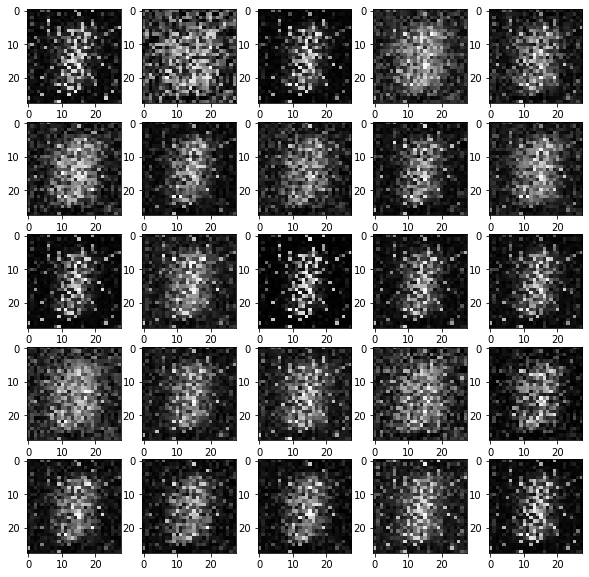

epochs 1


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 7ms/step


  0%|          | 1/273 [00:00<01:19,  3.40it/s]

4/4 [==============================] - 0s 7ms/step


  1%|          | 2/273 [00:00<01:14,  3.63it/s]

4/4 [==============================] - 0s 7ms/step


  1%|          | 3/273 [00:00<01:14,  3.63it/s]

4/4 [==============================] - 0s 7ms/step


  1%|▏         | 4/273 [00:01<01:14,  3.60it/s]

4/4 [==============================] - 0s 8ms/step


  2%|▏         | 5/273 [00:01<01:14,  3.58it/s]

4/4 [==============================] - 0s 8ms/step


  2%|▏         | 6/273 [00:01<01:14,  3.57it/s]

4/4 [==============================] - 0s 9ms/step


  3%|▎         | 7/273 [00:01<01:13,  3.60it/s]

4/4 [==============================] - 0s 7ms/step


  3%|▎         | 8/273 [00:02<01:12,  3.65it/s]

4/4 [==============================] - 0s 7ms/step


  3%|▎         | 9/273 [00:02<01:11,  3.68it/s]

4/4 [==============================] - 0s 8ms/step


  4%|▎         | 10/273 [00:02<01:12,  3.61it/s]

4/4 [==============================] - 0s 8ms/step


  4%|▍         | 11/273 [00:03<01:11,  3.67it/s]

4/4 [==============================] - 0s 7ms/step


  4%|▍         | 12/273 [00:03<01:12,  3.60it/s]

4/4 [==============================] - 0s 13ms/step


  5%|▍         | 13/273 [00:03<01:13,  3.53it/s]

4/4 [==============================] - 0s 7ms/step


  5%|▌         | 14/273 [00:03<01:12,  3.59it/s]

4/4 [==============================] - 0s 7ms/step


  5%|▌         | 15/273 [00:04<01:11,  3.61it/s]

4/4 [==============================] - 0s 11ms/step


  6%|▌         | 16/273 [00:04<01:11,  3.59it/s]

4/4 [==============================] - 0s 8ms/step


  6%|▌         | 17/273 [00:04<01:11,  3.61it/s]

4/4 [==============================] - 0s 8ms/step


  7%|▋         | 18/273 [00:04<01:09,  3.69it/s]

4/4 [==============================] - 0s 8ms/step


  7%|▋         | 19/273 [00:05<01:09,  3.66it/s]

4/4 [==============================] - 0s 10ms/step


  7%|▋         | 20/273 [00:05<01:10,  3.60it/s]

4/4 [==============================] - 0s 8ms/step


  8%|▊         | 21/273 [00:05<01:08,  3.66it/s]

4/4 [==============================] - 0s 8ms/step


  8%|▊         | 22/273 [00:06<01:07,  3.72it/s]

4/4 [==============================] - 0s 8ms/step


  8%|▊         | 23/273 [00:06<01:09,  3.62it/s]

4/4 [==============================] - 0s 7ms/step


  9%|▉         | 24/273 [00:06<01:07,  3.67it/s]

4/4 [==============================] - 0s 7ms/step


  9%|▉         | 25/273 [00:06<01:08,  3.64it/s]

4/4 [==============================] - 0s 7ms/step


 10%|▉         | 26/273 [00:07<01:06,  3.70it/s]

4/4 [==============================] - 0s 8ms/step


 10%|▉         | 27/273 [00:07<01:08,  3.58it/s]

4/4 [==============================] - 0s 8ms/step


 10%|█         | 28/273 [00:07<01:08,  3.59it/s]

4/4 [==============================] - 0s 8ms/step


 11%|█         | 29/273 [00:08<01:08,  3.58it/s]

4/4 [==============================] - 0s 8ms/step


 11%|█         | 30/273 [00:08<01:08,  3.57it/s]

4/4 [==============================] - 0s 13ms/step


 11%|█▏        | 31/273 [00:08<01:08,  3.54it/s]

4/4 [==============================] - 0s 8ms/step


 12%|█▏        | 32/273 [00:08<01:06,  3.61it/s]

4/4 [==============================] - 0s 9ms/step


 12%|█▏        | 33/273 [00:09<01:07,  3.55it/s]

4/4 [==============================] - 0s 7ms/step


 12%|█▏        | 34/273 [00:09<01:08,  3.51it/s]

4/4 [==============================] - 0s 8ms/step


 13%|█▎        | 35/273 [00:09<01:09,  3.45it/s]

4/4 [==============================] - 0s 7ms/step


 13%|█▎        | 36/273 [00:10<01:06,  3.55it/s]

4/4 [==============================] - 0s 7ms/step


 14%|█▎        | 37/273 [00:10<01:05,  3.62it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▍        | 38/273 [00:10<01:04,  3.62it/s]

4/4 [==============================] - 0s 10ms/step


 14%|█▍        | 39/273 [00:10<01:04,  3.64it/s]

4/4 [==============================] - 0s 8ms/step


 15%|█▍        | 40/273 [00:11<01:02,  3.72it/s]

4/4 [==============================] - 0s 8ms/step


 15%|█▌        | 41/273 [00:11<01:02,  3.72it/s]

4/4 [==============================] - 0s 9ms/step


 15%|█▌        | 42/273 [00:11<01:02,  3.67it/s]

4/4 [==============================] - 0s 7ms/step


 16%|█▌        | 43/273 [00:11<01:01,  3.71it/s]

4/4 [==============================] - 0s 7ms/step


 16%|█▌        | 44/273 [00:12<01:02,  3.67it/s]

4/4 [==============================] - 0s 7ms/step


 16%|█▋        | 45/273 [00:12<01:02,  3.66it/s]

4/4 [==============================] - 0s 9ms/step


 17%|█▋        | 46/273 [00:12<01:01,  3.71it/s]

4/4 [==============================] - 0s 8ms/step


 17%|█▋        | 47/273 [00:12<01:00,  3.75it/s]

4/4 [==============================] - 0s 8ms/step


 18%|█▊        | 48/273 [00:13<00:59,  3.77it/s]

4/4 [==============================] - 0s 8ms/step


 18%|█▊        | 49/273 [00:13<01:00,  3.73it/s]

4/4 [==============================] - 0s 8ms/step


 18%|█▊        | 50/273 [00:13<01:01,  3.64it/s]

4/4 [==============================] - 0s 8ms/step


 19%|█▊        | 51/273 [00:14<00:59,  3.73it/s]

4/4 [==============================] - 0s 8ms/step


 19%|█▉        | 52/273 [00:14<01:01,  3.58it/s]

4/4 [==============================] - 0s 8ms/step


 19%|█▉        | 53/273 [00:14<01:02,  3.50it/s]

4/4 [==============================] - 0s 7ms/step


 20%|█▉        | 54/273 [00:14<01:01,  3.54it/s]

4/4 [==============================] - 0s 7ms/step


 20%|██        | 55/273 [00:15<00:59,  3.67it/s]

4/4 [==============================] - 0s 8ms/step


 21%|██        | 56/273 [00:15<00:58,  3.70it/s]

4/4 [==============================] - 0s 7ms/step


 21%|██        | 57/273 [00:15<00:59,  3.64it/s]

4/4 [==============================] - 0s 8ms/step


 21%|██        | 58/273 [00:15<00:58,  3.70it/s]

4/4 [==============================] - 0s 8ms/step


 22%|██▏       | 59/273 [00:16<00:57,  3.73it/s]

4/4 [==============================] - 0s 7ms/step


 22%|██▏       | 60/273 [00:16<00:58,  3.63it/s]

4/4 [==============================] - 0s 11ms/step


 22%|██▏       | 61/273 [00:16<00:58,  3.65it/s]

4/4 [==============================] - 0s 8ms/step


 23%|██▎       | 62/273 [00:17<00:56,  3.70it/s]

4/4 [==============================] - 0s 12ms/step


 23%|██▎       | 63/273 [00:17<00:56,  3.73it/s]

4/4 [==============================] - 0s 8ms/step


 23%|██▎       | 64/273 [00:17<01:02,  3.34it/s]

4/4 [==============================] - 0s 10ms/step


 24%|██▍       | 65/273 [00:17<01:01,  3.41it/s]

4/4 [==============================] - 0s 8ms/step


 24%|██▍       | 66/273 [00:18<00:58,  3.53it/s]

4/4 [==============================] - 0s 8ms/step


 25%|██▍       | 67/273 [00:18<00:58,  3.50it/s]

4/4 [==============================] - 0s 7ms/step


 25%|██▍       | 68/273 [00:18<00:58,  3.48it/s]

4/4 [==============================] - 0s 7ms/step


 25%|██▌       | 69/273 [00:19<00:56,  3.58it/s]

4/4 [==============================] - 0s 8ms/step


 26%|██▌       | 70/273 [00:19<00:55,  3.65it/s]

4/4 [==============================] - 0s 8ms/step


 26%|██▌       | 71/273 [00:19<00:55,  3.66it/s]

4/4 [==============================] - 0s 9ms/step


 26%|██▋       | 72/273 [00:19<00:55,  3.63it/s]

4/4 [==============================] - 0s 7ms/step


 27%|██▋       | 73/273 [00:20<00:55,  3.58it/s]

4/4 [==============================] - 0s 8ms/step


 27%|██▋       | 74/273 [00:20<00:55,  3.56it/s]

4/4 [==============================] - 0s 8ms/step


 27%|██▋       | 75/273 [00:20<00:56,  3.51it/s]

4/4 [==============================] - 0s 9ms/step


 28%|██▊       | 76/273 [00:21<00:54,  3.60it/s]

4/4 [==============================] - 0s 8ms/step


 28%|██▊       | 77/273 [00:21<00:52,  3.70it/s]

4/4 [==============================] - 0s 7ms/step


 29%|██▊       | 78/273 [00:21<00:53,  3.65it/s]

4/4 [==============================] - 0s 8ms/step


 29%|██▉       | 79/273 [00:21<00:52,  3.68it/s]

4/4 [==============================] - 0s 8ms/step


 29%|██▉       | 80/273 [00:22<00:51,  3.73it/s]

4/4 [==============================] - 0s 7ms/step


 30%|██▉       | 81/273 [00:22<00:52,  3.66it/s]

4/4 [==============================] - 0s 7ms/step


 30%|███       | 82/273 [00:22<00:52,  3.64it/s]

4/4 [==============================] - 0s 7ms/step


 30%|███       | 83/273 [00:22<00:51,  3.67it/s]

4/4 [==============================] - 0s 8ms/step


 31%|███       | 84/273 [00:23<00:52,  3.61it/s]

4/4 [==============================] - 0s 7ms/step


 31%|███       | 85/273 [00:23<00:52,  3.56it/s]

4/4 [==============================] - 0s 7ms/step


 32%|███▏      | 86/273 [00:23<00:52,  3.60it/s]

4/4 [==============================] - 0s 7ms/step


 32%|███▏      | 87/273 [00:24<00:52,  3.57it/s]

4/4 [==============================] - 0s 9ms/step


 32%|███▏      | 88/273 [00:24<00:51,  3.60it/s]

4/4 [==============================] - 0s 11ms/step


 33%|███▎      | 89/273 [00:24<00:51,  3.56it/s]

4/4 [==============================] - 0s 9ms/step


 33%|███▎      | 90/273 [00:24<00:52,  3.50it/s]

4/4 [==============================] - 0s 7ms/step


 33%|███▎      | 91/273 [00:25<00:50,  3.60it/s]

4/4 [==============================] - 0s 7ms/step


 34%|███▎      | 92/273 [00:25<00:50,  3.62it/s]

4/4 [==============================] - 0s 8ms/step


 34%|███▍      | 93/273 [00:25<00:49,  3.63it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▍      | 94/273 [00:25<00:50,  3.57it/s]

4/4 [==============================] - 0s 8ms/step


 35%|███▍      | 95/273 [00:26<00:48,  3.65it/s]

4/4 [==============================] - 0s 7ms/step


 35%|███▌      | 96/273 [00:26<00:49,  3.58it/s]

4/4 [==============================] - 0s 8ms/step


 36%|███▌      | 97/273 [00:26<00:48,  3.66it/s]

4/4 [==============================] - 0s 8ms/step


 36%|███▌      | 98/273 [00:27<00:47,  3.66it/s]

4/4 [==============================] - 0s 8ms/step


 36%|███▋      | 99/273 [00:27<00:46,  3.72it/s]

4/4 [==============================] - 0s 7ms/step


 37%|███▋      | 100/273 [00:27<00:47,  3.67it/s]

4/4 [==============================] - 0s 7ms/step


 37%|███▋      | 101/273 [00:27<00:47,  3.60it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 102/273 [00:28<00:48,  3.54it/s]

4/4 [==============================] - 0s 7ms/step


 38%|███▊      | 103/273 [00:28<00:48,  3.50it/s]

4/4 [==============================] - 0s 9ms/step


 38%|███▊      | 104/273 [00:28<00:46,  3.62it/s]

4/4 [==============================] - 0s 8ms/step


 38%|███▊      | 105/273 [00:29<01:07,  2.50it/s]

4/4 [==============================] - 0s 10ms/step


 39%|███▉      | 106/273 [00:29<01:04,  2.61it/s]

4/4 [==============================] - 0s 8ms/step


 39%|███▉      | 107/273 [00:30<00:59,  2.80it/s]

4/4 [==============================] - 0s 10ms/step


 40%|███▉      | 108/273 [00:30<00:54,  3.03it/s]

4/4 [==============================] - 0s 8ms/step


 40%|███▉      | 109/273 [00:30<00:51,  3.16it/s]

4/4 [==============================] - 0s 9ms/step


 40%|████      | 110/273 [00:30<00:50,  3.22it/s]

4/4 [==============================] - 0s 9ms/step


 41%|████      | 111/273 [00:31<00:49,  3.30it/s]

4/4 [==============================] - 0s 8ms/step


 41%|████      | 112/273 [00:31<00:48,  3.33it/s]

4/4 [==============================] - 0s 9ms/step


 41%|████▏     | 113/273 [00:31<00:45,  3.49it/s]

4/4 [==============================] - 0s 8ms/step


 42%|████▏     | 114/273 [00:32<00:44,  3.57it/s]

4/4 [==============================] - 0s 7ms/step


 42%|████▏     | 115/273 [00:32<00:44,  3.52it/s]

4/4 [==============================] - 0s 9ms/step


 42%|████▏     | 116/273 [00:32<00:44,  3.50it/s]

4/4 [==============================] - 0s 7ms/step


 43%|████▎     | 117/273 [00:32<00:44,  3.47it/s]

4/4 [==============================] - 0s 10ms/step


 43%|████▎     | 118/273 [00:33<00:48,  3.23it/s]

4/4 [==============================] - 0s 9ms/step


 44%|████▎     | 119/273 [00:33<00:46,  3.32it/s]

4/4 [==============================] - 0s 8ms/step


 44%|████▍     | 120/273 [00:33<00:44,  3.45it/s]

4/4 [==============================] - 0s 7ms/step


 44%|████▍     | 121/273 [00:34<00:42,  3.56it/s]

4/4 [==============================] - 0s 7ms/step


 45%|████▍     | 122/273 [00:34<00:42,  3.59it/s]

4/4 [==============================] - 0s 8ms/step


 45%|████▌     | 123/273 [00:34<00:40,  3.69it/s]

4/4 [==============================] - 0s 7ms/step


 45%|████▌     | 124/273 [00:34<00:39,  3.78it/s]

4/4 [==============================] - 0s 8ms/step


 46%|████▌     | 125/273 [00:35<00:39,  3.79it/s]

4/4 [==============================] - 0s 8ms/step


 46%|████▌     | 126/273 [00:35<00:40,  3.64it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 127/273 [00:35<00:40,  3.63it/s]

4/4 [==============================] - 0s 8ms/step


 47%|████▋     | 128/273 [00:35<00:39,  3.65it/s]

4/4 [==============================] - 0s 8ms/step


 47%|████▋     | 129/273 [00:36<00:40,  3.58it/s]

4/4 [==============================] - 0s 7ms/step


 48%|████▊     | 130/273 [00:36<00:39,  3.58it/s]

4/4 [==============================] - 0s 9ms/step


 48%|████▊     | 131/273 [00:36<00:38,  3.67it/s]

4/4 [==============================] - 0s 8ms/step


 48%|████▊     | 132/273 [00:37<00:38,  3.66it/s]

4/4 [==============================] - 0s 8ms/step


 49%|████▊     | 133/273 [00:37<00:38,  3.60it/s]

4/4 [==============================] - 0s 9ms/step


 49%|████▉     | 134/273 [00:37<00:38,  3.60it/s]

4/4 [==============================] - 0s 7ms/step


 49%|████▉     | 135/273 [00:37<00:37,  3.70it/s]

4/4 [==============================] - 0s 8ms/step


 50%|████▉     | 136/273 [00:38<00:36,  3.71it/s]

4/4 [==============================] - 0s 12ms/step


 50%|█████     | 137/273 [00:38<00:54,  2.48it/s]

4/4 [==============================] - 0s 7ms/step


 51%|█████     | 138/273 [00:39<00:52,  2.58it/s]

4/4 [==============================] - 0s 8ms/step


 51%|█████     | 139/273 [00:39<00:52,  2.53it/s]

4/4 [==============================] - 0s 17ms/step


 51%|█████▏    | 140/273 [00:40<01:02,  2.12it/s]

4/4 [==============================] - 0s 8ms/step


 52%|█████▏    | 141/273 [00:40<00:55,  2.38it/s]

4/4 [==============================] - 0s 8ms/step


 52%|█████▏    | 142/273 [00:40<00:49,  2.66it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 143/273 [00:41<00:45,  2.88it/s]

4/4 [==============================] - 0s 7ms/step


 53%|█████▎    | 144/273 [00:41<00:44,  2.89it/s]

4/4 [==============================] - 0s 7ms/step


 53%|█████▎    | 145/273 [00:41<00:41,  3.07it/s]

4/4 [==============================] - 0s 8ms/step


 53%|█████▎    | 146/273 [00:42<00:39,  3.22it/s]

4/4 [==============================] - 0s 11ms/step


 54%|█████▍    | 147/273 [00:42<00:37,  3.34it/s]

4/4 [==============================] - 0s 9ms/step


 54%|█████▍    | 148/273 [00:42<00:36,  3.42it/s]

4/4 [==============================] - 0s 8ms/step


 55%|█████▍    | 149/273 [00:42<00:34,  3.57it/s]

4/4 [==============================] - 0s 8ms/step


 55%|█████▍    | 150/273 [00:43<00:33,  3.65it/s]

4/4 [==============================] - 0s 13ms/step


 55%|█████▌    | 151/273 [00:43<00:33,  3.59it/s]

4/4 [==============================] - 0s 8ms/step


 56%|█████▌    | 152/273 [00:43<00:33,  3.56it/s]

4/4 [==============================] - 0s 8ms/step


 56%|█████▌    | 153/273 [00:43<00:32,  3.68it/s]

4/4 [==============================] - 0s 8ms/step


 56%|█████▋    | 154/273 [00:44<00:31,  3.76it/s]

4/4 [==============================] - 0s 8ms/step


 57%|█████▋    | 155/273 [00:44<00:32,  3.63it/s]

4/4 [==============================] - 0s 12ms/step


 57%|█████▋    | 156/273 [00:44<00:32,  3.65it/s]

4/4 [==============================] - 0s 7ms/step


 58%|█████▊    | 157/273 [00:44<00:31,  3.71it/s]

4/4 [==============================] - 0s 8ms/step


 58%|█████▊    | 158/273 [00:45<00:31,  3.64it/s]

4/4 [==============================] - 0s 7ms/step


 58%|█████▊    | 159/273 [00:45<00:31,  3.61it/s]

4/4 [==============================] - 0s 7ms/step


 59%|█████▊    | 160/273 [00:45<00:31,  3.59it/s]

4/4 [==============================] - 0s 7ms/step


 59%|█████▉    | 161/273 [00:46<00:31,  3.61it/s]

4/4 [==============================] - 0s 8ms/step


 59%|█████▉    | 162/273 [00:46<00:30,  3.61it/s]

4/4 [==============================] - 0s 10ms/step


 60%|█████▉    | 163/273 [00:46<00:30,  3.58it/s]

4/4 [==============================] - 0s 8ms/step


 60%|██████    | 164/273 [00:46<00:30,  3.60it/s]

4/4 [==============================] - 0s 9ms/step


 60%|██████    | 165/273 [00:47<00:29,  3.68it/s]

4/4 [==============================] - 0s 7ms/step


 61%|██████    | 166/273 [00:47<00:30,  3.56it/s]

4/4 [==============================] - 0s 9ms/step


 61%|██████    | 167/273 [00:47<00:29,  3.59it/s]

4/4 [==============================] - 0s 8ms/step


 62%|██████▏   | 168/273 [00:48<00:28,  3.70it/s]

4/4 [==============================] - 0s 7ms/step


 62%|██████▏   | 169/273 [00:48<00:28,  3.65it/s]

4/4 [==============================] - 0s 12ms/step


 62%|██████▏   | 170/273 [00:48<00:28,  3.58it/s]

4/4 [==============================] - 0s 7ms/step


 63%|██████▎   | 171/273 [00:48<00:28,  3.57it/s]

4/4 [==============================] - 0s 7ms/step


 63%|██████▎   | 172/273 [00:49<00:27,  3.64it/s]

4/4 [==============================] - 0s 9ms/step


 63%|██████▎   | 173/273 [00:49<00:27,  3.65it/s]

4/4 [==============================] - 0s 10ms/step


 64%|██████▎   | 174/273 [00:49<00:27,  3.65it/s]

4/4 [==============================] - 0s 10ms/step


 64%|██████▍   | 175/273 [00:49<00:26,  3.65it/s]

4/4 [==============================] - 0s 8ms/step


 64%|██████▍   | 176/273 [00:50<00:26,  3.60it/s]

4/4 [==============================] - 0s 7ms/step


 65%|██████▍   | 177/273 [00:50<00:26,  3.63it/s]

4/4 [==============================] - 0s 9ms/step


 65%|██████▌   | 178/273 [00:50<00:26,  3.62it/s]

4/4 [==============================] - 0s 7ms/step


 66%|██████▌   | 179/273 [00:51<00:26,  3.55it/s]

4/4 [==============================] - 0s 8ms/step


 66%|██████▌   | 180/273 [00:51<00:26,  3.51it/s]

4/4 [==============================] - 0s 7ms/step


 66%|██████▋   | 181/273 [00:51<00:26,  3.51it/s]

4/4 [==============================] - 0s 7ms/step


 67%|██████▋   | 182/273 [00:51<00:25,  3.59it/s]

4/4 [==============================] - 0s 8ms/step


 67%|██████▋   | 183/273 [00:52<00:24,  3.69it/s]

4/4 [==============================] - 0s 10ms/step


 67%|██████▋   | 184/273 [00:52<00:24,  3.65it/s]

4/4 [==============================] - 0s 9ms/step


 68%|██████▊   | 185/273 [00:52<00:23,  3.67it/s]

4/4 [==============================] - 0s 10ms/step


 68%|██████▊   | 186/273 [00:53<00:23,  3.72it/s]

4/4 [==============================] - 0s 8ms/step


 68%|██████▊   | 187/273 [00:53<00:23,  3.74it/s]

4/4 [==============================] - 0s 8ms/step


 69%|██████▉   | 188/273 [00:53<00:23,  3.69it/s]

4/4 [==============================] - 0s 7ms/step


 69%|██████▉   | 189/273 [00:53<00:23,  3.65it/s]

4/4 [==============================] - 0s 8ms/step


 70%|██████▉   | 190/273 [00:54<00:22,  3.70it/s]

4/4 [==============================] - 0s 8ms/step


 70%|██████▉   | 191/273 [00:54<00:22,  3.59it/s]

4/4 [==============================] - 0s 9ms/step


 70%|███████   | 192/273 [00:54<00:21,  3.69it/s]

4/4 [==============================] - 0s 8ms/step


 71%|███████   | 193/273 [00:55<00:23,  3.33it/s]

4/4 [==============================] - 0s 12ms/step


 71%|███████   | 194/273 [00:55<00:27,  2.85it/s]

4/4 [==============================] - 0s 13ms/step


 71%|███████▏  | 195/273 [00:55<00:29,  2.61it/s]

4/4 [==============================] - 0s 13ms/step


 72%|███████▏  | 196/273 [00:56<00:32,  2.41it/s]

4/4 [==============================] - 0s 9ms/step


 72%|███████▏  | 197/273 [00:56<00:33,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 73%|███████▎  | 198/273 [00:57<00:33,  2.22it/s]

4/4 [==============================] - 0s 11ms/step


 73%|███████▎  | 199/273 [00:57<00:30,  2.44it/s]

4/4 [==============================] - 0s 10ms/step


 73%|███████▎  | 200/273 [00:57<00:26,  2.71it/s]

4/4 [==============================] - 0s 7ms/step


 74%|███████▎  | 201/273 [00:58<00:24,  2.97it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▍  | 202/273 [00:58<00:22,  3.09it/s]

4/4 [==============================] - 0s 8ms/step


 74%|███████▍  | 203/273 [00:58<00:21,  3.20it/s]

4/4 [==============================] - 0s 8ms/step


 75%|███████▍  | 204/273 [00:59<00:20,  3.31it/s]

4/4 [==============================] - 0s 8ms/step


 75%|███████▌  | 205/273 [00:59<00:19,  3.43it/s]

4/4 [==============================] - 0s 9ms/step


 75%|███████▌  | 206/273 [00:59<00:19,  3.51it/s]

4/4 [==============================] - 0s 10ms/step


 76%|███████▌  | 207/273 [00:59<00:18,  3.50it/s]

4/4 [==============================] - 0s 9ms/step


 76%|███████▌  | 208/273 [01:00<00:18,  3.51it/s]

4/4 [==============================] - 0s 11ms/step


 77%|███████▋  | 209/273 [01:00<00:18,  3.52it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 210/273 [01:00<00:18,  3.45it/s]

4/4 [==============================] - 0s 11ms/step


 77%|███████▋  | 211/273 [01:01<00:17,  3.45it/s]

4/4 [==============================] - 0s 8ms/step


 78%|███████▊  | 212/273 [01:01<00:16,  3.59it/s]

4/4 [==============================] - 0s 10ms/step


 78%|███████▊  | 213/273 [01:01<00:16,  3.64it/s]

4/4 [==============================] - 0s 8ms/step


 78%|███████▊  | 214/273 [01:01<00:16,  3.64it/s]

4/4 [==============================] - 0s 8ms/step


 79%|███████▉  | 215/273 [01:02<00:16,  3.57it/s]

4/4 [==============================] - 0s 7ms/step


 79%|███████▉  | 216/273 [01:02<00:15,  3.68it/s]

4/4 [==============================] - 0s 7ms/step


 79%|███████▉  | 217/273 [01:02<00:15,  3.68it/s]

4/4 [==============================] - 0s 9ms/step


 80%|███████▉  | 218/273 [01:02<00:15,  3.61it/s]

4/4 [==============================] - 0s 8ms/step


 80%|████████  | 219/273 [01:03<00:14,  3.61it/s]

4/4 [==============================] - 0s 9ms/step


 81%|████████  | 220/273 [01:03<00:14,  3.55it/s]

4/4 [==============================] - 0s 10ms/step


 81%|████████  | 221/273 [01:03<00:14,  3.61it/s]

4/4 [==============================] - 0s 9ms/step


 81%|████████▏ | 222/273 [01:04<00:14,  3.61it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 223/273 [01:04<00:13,  3.58it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 224/273 [01:04<00:13,  3.52it/s]

4/4 [==============================] - 0s 8ms/step


 82%|████████▏ | 225/273 [01:04<00:13,  3.62it/s]

4/4 [==============================] - 0s 8ms/step


 83%|████████▎ | 226/273 [01:05<00:13,  3.55it/s]

4/4 [==============================] - 0s 8ms/step


 83%|████████▎ | 227/273 [01:05<00:13,  3.50it/s]

4/4 [==============================] - 0s 8ms/step


 84%|████████▎ | 228/273 [01:05<00:12,  3.60it/s]

4/4 [==============================] - 0s 8ms/step


 84%|████████▍ | 229/273 [01:06<00:12,  3.55it/s]

4/4 [==============================] - 0s 8ms/step


 84%|████████▍ | 230/273 [01:06<00:12,  3.54it/s]

4/4 [==============================] - 0s 8ms/step


 85%|████████▍ | 231/273 [01:06<00:11,  3.56it/s]

4/4 [==============================] - 0s 8ms/step


 85%|████████▍ | 232/273 [01:06<00:11,  3.65it/s]

4/4 [==============================] - 0s 8ms/step


 85%|████████▌ | 233/273 [01:07<00:11,  3.61it/s]

4/4 [==============================] - 0s 7ms/step


 86%|████████▌ | 234/273 [01:07<00:10,  3.65it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▌ | 235/273 [01:07<00:10,  3.67it/s]

4/4 [==============================] - 0s 8ms/step


 86%|████████▋ | 236/273 [01:07<00:09,  3.71it/s]

4/4 [==============================] - 0s 8ms/step


 87%|████████▋ | 237/273 [01:08<00:09,  3.62it/s]

4/4 [==============================] - 0s 8ms/step


 87%|████████▋ | 238/273 [01:08<00:09,  3.68it/s]

4/4 [==============================] - 0s 7ms/step


 88%|████████▊ | 239/273 [01:08<00:09,  3.62it/s]

4/4 [==============================] - 0s 9ms/step


 88%|████████▊ | 240/273 [01:09<00:09,  3.53it/s]

4/4 [==============================] - 0s 9ms/step


 88%|████████▊ | 241/273 [01:09<00:09,  3.49it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▊ | 242/273 [01:09<00:08,  3.59it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▉ | 243/273 [01:09<00:08,  3.60it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▉ | 244/273 [01:10<00:08,  3.61it/s]

4/4 [==============================] - 0s 10ms/step


 90%|████████▉ | 245/273 [01:10<00:07,  3.58it/s]

4/4 [==============================] - 0s 10ms/step


 90%|█████████ | 246/273 [01:10<00:07,  3.64it/s]

4/4 [==============================] - 0s 8ms/step


 90%|█████████ | 247/273 [01:11<00:07,  3.64it/s]

4/4 [==============================] - 0s 8ms/step


 91%|█████████ | 248/273 [01:11<00:07,  3.54it/s]

4/4 [==============================] - 0s 7ms/step


 91%|█████████ | 249/273 [01:11<00:06,  3.54it/s]

4/4 [==============================] - 0s 8ms/step


 92%|█████████▏| 250/273 [01:11<00:06,  3.58it/s]

4/4 [==============================] - 0s 9ms/step


 92%|█████████▏| 251/273 [01:12<00:06,  3.53it/s]

4/4 [==============================] - 0s 7ms/step


 92%|█████████▏| 252/273 [01:12<00:06,  3.49it/s]

4/4 [==============================] - 0s 8ms/step


 93%|█████████▎| 253/273 [01:12<00:05,  3.54it/s]

4/4 [==============================] - 0s 8ms/step


 93%|█████████▎| 254/273 [01:13<00:05,  3.51it/s]

4/4 [==============================] - 0s 9ms/step


 93%|█████████▎| 255/273 [01:13<00:05,  3.53it/s]

4/4 [==============================] - 0s 7ms/step


 94%|█████████▍| 256/273 [01:13<00:04,  3.49it/s]

4/4 [==============================] - 0s 9ms/step


 94%|█████████▍| 257/273 [01:13<00:04,  3.58it/s]

4/4 [==============================] - 0s 8ms/step


 95%|█████████▍| 258/273 [01:14<00:04,  3.55it/s]

4/4 [==============================] - 0s 8ms/step


 95%|█████████▍| 259/273 [01:14<00:03,  3.59it/s]

4/4 [==============================] - 0s 8ms/step


 95%|█████████▌| 260/273 [01:14<00:03,  3.51it/s]

4/4 [==============================] - 0s 9ms/step


 96%|█████████▌| 261/273 [01:15<00:03,  3.53it/s]

4/4 [==============================] - 0s 9ms/step


 96%|█████████▌| 262/273 [01:15<00:03,  3.56it/s]

4/4 [==============================] - 0s 9ms/step


 96%|█████████▋| 263/273 [01:15<00:02,  3.59it/s]

4/4 [==============================] - 0s 8ms/step


 97%|█████████▋| 264/273 [01:15<00:02,  3.54it/s]

4/4 [==============================] - 0s 7ms/step


 97%|█████████▋| 265/273 [01:16<00:02,  3.62it/s]

4/4 [==============================] - 0s 8ms/step


 97%|█████████▋| 266/273 [01:16<00:01,  3.55it/s]

4/4 [==============================] - 0s 8ms/step


 98%|█████████▊| 267/273 [01:16<00:01,  3.55it/s]

4/4 [==============================] - 0s 9ms/step


 98%|█████████▊| 268/273 [01:16<00:01,  3.59it/s]

4/4 [==============================] - 0s 8ms/step


 99%|█████████▊| 269/273 [01:17<00:01,  3.64it/s]

4/4 [==============================] - 0s 8ms/step


 99%|█████████▉| 270/273 [01:17<00:00,  3.59it/s]

4/4 [==============================] - 0s 8ms/step


 99%|█████████▉| 271/273 [01:17<00:00,  3.62it/s]

4/4 [==============================] - 0s 8ms/step


100%|█████████▉| 272/273 [01:18<00:00,  3.61it/s]

4/4 [==============================] - 0s 10ms/step


100%|██████████| 273/273 [01:18<00:00,  3.48it/s]


loss is 0.22070468962192535 |*| 1.1341018676757812
1/1 [==============================] - 0s 18ms/step


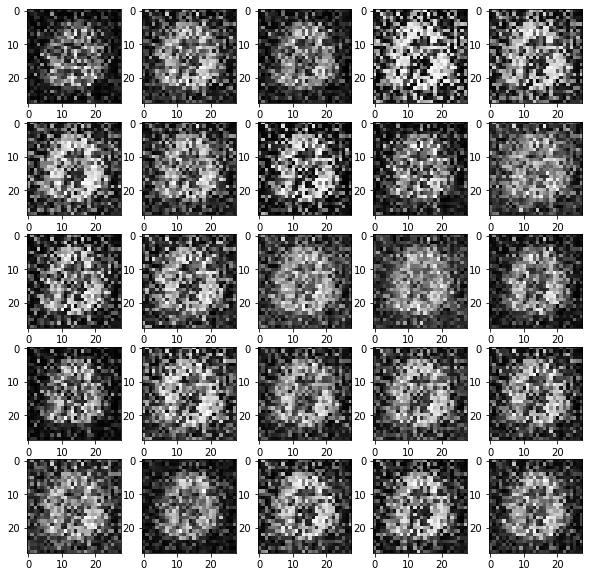

epochs 2


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 7ms/step


  0%|          | 1/273 [00:00<01:20,  3.37it/s]

4/4 [==============================] - 0s 8ms/step


  1%|          | 2/273 [00:00<01:21,  3.33it/s]

4/4 [==============================] - 0s 8ms/step


  1%|          | 3/273 [00:00<01:15,  3.55it/s]

4/4 [==============================] - 0s 8ms/step


  1%|▏         | 4/273 [00:01<01:15,  3.56it/s]

4/4 [==============================] - 0s 14ms/step


  2%|▏         | 5/273 [00:01<01:14,  3.58it/s]

4/4 [==============================] - 0s 9ms/step


  2%|▏         | 6/273 [00:01<01:13,  3.61it/s]

4/4 [==============================] - 0s 8ms/step


  3%|▎         | 7/273 [00:01<01:13,  3.60it/s]

4/4 [==============================] - 0s 9ms/step


  3%|▎         | 8/273 [00:02<01:13,  3.61it/s]

4/4 [==============================] - 0s 9ms/step


  3%|▎         | 9/273 [00:02<01:13,  3.59it/s]

4/4 [==============================] - 0s 9ms/step


  4%|▎         | 10/273 [00:02<01:13,  3.59it/s]

4/4 [==============================] - 0s 9ms/step


  4%|▍         | 11/273 [00:03<01:12,  3.60it/s]

4/4 [==============================] - 0s 8ms/step


  4%|▍         | 12/273 [00:03<01:13,  3.55it/s]

4/4 [==============================] - 0s 10ms/step


  5%|▍         | 13/273 [00:03<01:13,  3.53it/s]

4/4 [==============================] - 0s 9ms/step


  5%|▌         | 14/273 [00:03<01:13,  3.51it/s]

4/4 [==============================] - 0s 8ms/step


  5%|▌         | 15/273 [00:04<01:11,  3.62it/s]

4/4 [==============================] - 0s 10ms/step


  6%|▌         | 16/273 [00:04<01:10,  3.62it/s]

4/4 [==============================] - 0s 9ms/step


  6%|▌         | 17/273 [00:04<01:11,  3.56it/s]

4/4 [==============================] - 0s 11ms/step


  7%|▋         | 18/273 [00:05<01:11,  3.56it/s]

4/4 [==============================] - 0s 8ms/step


  7%|▋         | 19/273 [00:05<01:11,  3.57it/s]

4/4 [==============================] - 0s 8ms/step


  7%|▋         | 20/273 [00:05<01:11,  3.54it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 21/273 [00:05<01:11,  3.53it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 22/273 [00:06<01:10,  3.54it/s]

4/4 [==============================] - 0s 8ms/step


  8%|▊         | 23/273 [00:06<01:09,  3.62it/s]

4/4 [==============================] - 0s 8ms/step


  9%|▉         | 24/273 [00:06<01:09,  3.58it/s]

4/4 [==============================] - 0s 8ms/step


  9%|▉         | 25/273 [00:07<01:09,  3.58it/s]

4/4 [==============================] - 0s 9ms/step


 10%|▉         | 26/273 [00:07<01:09,  3.56it/s]

4/4 [==============================] - 0s 8ms/step


 10%|▉         | 27/273 [00:07<01:08,  3.62it/s]

4/4 [==============================] - 0s 8ms/step


 10%|█         | 28/273 [00:07<01:08,  3.59it/s]

4/4 [==============================] - 0s 12ms/step


 11%|█         | 29/273 [00:08<01:07,  3.61it/s]

4/4 [==============================] - 0s 8ms/step


 11%|█         | 30/273 [00:08<01:08,  3.56it/s]

4/4 [==============================] - 0s 9ms/step


 11%|█▏        | 31/273 [00:08<01:06,  3.64it/s]

4/4 [==============================] - 0s 10ms/step


 12%|█▏        | 32/273 [00:08<01:08,  3.54it/s]

4/4 [==============================] - 0s 8ms/step


 12%|█▏        | 33/273 [00:09<01:07,  3.54it/s]

4/4 [==============================] - 0s 9ms/step


 12%|█▏        | 34/273 [00:09<01:07,  3.55it/s]

4/4 [==============================] - 0s 10ms/step


 13%|█▎        | 35/273 [00:09<01:09,  3.42it/s]

4/4 [==============================] - 0s 9ms/step


 13%|█▎        | 36/273 [00:10<01:07,  3.51it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▎        | 37/273 [00:10<01:06,  3.53it/s]

4/4 [==============================] - 0s 8ms/step


 14%|█▍        | 38/273 [00:10<01:07,  3.49it/s]

4/4 [==============================] - 0s 8ms/step


 14%|█▍        | 39/273 [00:11<01:12,  3.21it/s]

4/4 [==============================] - 0s 8ms/step


 15%|█▍        | 40/273 [00:11<01:08,  3.39it/s]

4/4 [==============================] - 0s 7ms/step


 15%|█▌        | 41/273 [00:11<01:05,  3.53it/s]

4/4 [==============================] - 0s 7ms/step


 15%|█▌        | 42/273 [00:11<01:03,  3.62it/s]

4/4 [==============================] - 0s 8ms/step


 16%|█▌        | 43/273 [00:12<01:04,  3.58it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▌        | 44/273 [00:12<01:02,  3.65it/s]

4/4 [==============================] - 0s 8ms/step


 16%|█▋        | 45/273 [00:12<01:02,  3.67it/s]

4/4 [==============================] - 0s 8ms/step


 17%|█▋        | 46/273 [00:12<01:01,  3.71it/s]

4/4 [==============================] - 0s 11ms/step


 17%|█▋        | 47/273 [00:13<01:01,  3.68it/s]

4/4 [==============================] - 0s 9ms/step


 18%|█▊        | 48/273 [00:13<01:00,  3.72it/s]

4/4 [==============================] - 0s 8ms/step


 18%|█▊        | 49/273 [00:13<01:02,  3.61it/s]

4/4 [==============================] - 0s 8ms/step


 18%|█▊        | 50/273 [00:14<01:02,  3.55it/s]

4/4 [==============================] - 0s 9ms/step


 19%|█▊        | 51/273 [00:14<01:02,  3.58it/s]

4/4 [==============================] - 0s 8ms/step


 19%|█▉        | 52/273 [00:14<01:01,  3.62it/s]

4/4 [==============================] - 0s 9ms/step


 19%|█▉        | 53/273 [00:14<01:00,  3.61it/s]

4/4 [==============================] - 0s 8ms/step


 20%|█▉        | 54/273 [00:15<01:01,  3.54it/s]

4/4 [==============================] - 0s 8ms/step


 20%|██        | 55/273 [00:15<01:01,  3.56it/s]

4/4 [==============================] - 0s 8ms/step


 21%|██        | 56/273 [00:15<01:01,  3.53it/s]

4/4 [==============================] - 0s 7ms/step


 21%|██        | 57/273 [00:15<01:00,  3.59it/s]

4/4 [==============================] - 0s 9ms/step


 21%|██        | 58/273 [00:16<00:59,  3.59it/s]

4/4 [==============================] - 0s 8ms/step


 22%|██▏       | 59/273 [00:16<00:59,  3.62it/s]

4/4 [==============================] - 0s 12ms/step


 22%|██▏       | 60/273 [00:16<00:59,  3.61it/s]

4/4 [==============================] - 0s 9ms/step


 22%|██▏       | 61/273 [00:17<00:59,  3.57it/s]

4/4 [==============================] - 0s 8ms/step


 23%|██▎       | 62/273 [00:17<00:59,  3.57it/s]

4/4 [==============================] - 0s 10ms/step


 23%|██▎       | 63/273 [00:17<00:58,  3.62it/s]

4/4 [==============================] - 0s 8ms/step


 23%|██▎       | 64/273 [00:17<00:57,  3.62it/s]

4/4 [==============================] - 0s 10ms/step


 24%|██▍       | 65/273 [00:18<00:58,  3.55it/s]

4/4 [==============================] - 0s 8ms/step


 24%|██▍       | 66/273 [00:18<00:57,  3.58it/s]

4/4 [==============================] - 0s 10ms/step


 25%|██▍       | 67/273 [00:18<00:56,  3.62it/s]

4/4 [==============================] - 0s 9ms/step


 25%|██▍       | 68/273 [00:19<00:56,  3.65it/s]

4/4 [==============================] - 0s 9ms/step


 25%|██▌       | 69/273 [00:19<00:56,  3.61it/s]

4/4 [==============================] - 0s 8ms/step


 26%|██▌       | 70/273 [00:19<00:56,  3.59it/s]

4/4 [==============================] - 0s 10ms/step


 26%|██▌       | 71/273 [00:19<00:54,  3.68it/s]

4/4 [==============================] - 0s 8ms/step


 26%|██▋       | 72/273 [00:20<00:55,  3.60it/s]

4/4 [==============================] - 0s 8ms/step


 27%|██▋       | 73/273 [00:20<00:56,  3.54it/s]

4/4 [==============================] - 0s 10ms/step


 27%|██▋       | 74/273 [00:20<00:55,  3.56it/s]

4/4 [==============================] - 0s 9ms/step


 27%|██▋       | 75/273 [00:20<00:54,  3.62it/s]

4/4 [==============================] - 0s 9ms/step


 28%|██▊       | 76/273 [00:21<00:58,  3.35it/s]

4/4 [==============================] - 0s 8ms/step


 28%|██▊       | 77/273 [00:21<00:57,  3.40it/s]

4/4 [==============================] - 0s 8ms/step


 29%|██▊       | 78/273 [00:21<00:56,  3.47it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▉       | 79/273 [00:22<00:56,  3.46it/s]

4/4 [==============================] - 0s 10ms/step


 29%|██▉       | 80/273 [00:22<00:55,  3.45it/s]

4/4 [==============================] - 0s 10ms/step


 30%|██▉       | 81/273 [00:22<00:55,  3.47it/s]

4/4 [==============================] - 0s 8ms/step


 30%|███       | 82/273 [00:23<00:54,  3.50it/s]

4/4 [==============================] - 0s 9ms/step


 30%|███       | 83/273 [00:23<00:53,  3.53it/s]

4/4 [==============================] - 0s 8ms/step


 31%|███       | 84/273 [00:23<00:54,  3.47it/s]

4/4 [==============================] - 0s 10ms/step


 31%|███       | 85/273 [00:23<00:54,  3.48it/s]

4/4 [==============================] - 0s 9ms/step


 32%|███▏      | 86/273 [00:24<00:52,  3.56it/s]

4/4 [==============================] - 0s 9ms/step


 32%|███▏      | 87/273 [00:24<00:53,  3.51it/s]

4/4 [==============================] - 0s 7ms/step


 32%|███▏      | 88/273 [00:24<00:52,  3.49it/s]

4/4 [==============================] - 0s 8ms/step


 33%|███▎      | 89/273 [00:25<00:51,  3.56it/s]

4/4 [==============================] - 0s 9ms/step


 33%|███▎      | 90/273 [00:25<00:51,  3.52it/s]

4/4 [==============================] - 0s 8ms/step


 33%|███▎      | 91/273 [00:25<00:51,  3.52it/s]

4/4 [==============================] - 0s 8ms/step


 34%|███▎      | 92/273 [00:25<00:49,  3.64it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▍      | 93/273 [00:26<00:49,  3.67it/s]

4/4 [==============================] - 0s 8ms/step


 34%|███▍      | 94/273 [00:26<00:53,  3.36it/s]

4/4 [==============================] - 0s 11ms/step


 35%|███▍      | 95/273 [00:26<00:51,  3.43it/s]

4/4 [==============================] - 0s 8ms/step


 35%|███▌      | 96/273 [00:27<00:51,  3.42it/s]

4/4 [==============================] - 0s 8ms/step


 36%|███▌      | 97/273 [00:27<00:52,  3.38it/s]

4/4 [==============================] - 0s 8ms/step


 36%|███▌      | 98/273 [00:27<00:51,  3.42it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▋      | 99/273 [00:27<00:50,  3.42it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 100/273 [00:28<00:50,  3.45it/s]

4/4 [==============================] - 0s 8ms/step


 37%|███▋      | 101/273 [00:28<00:48,  3.51it/s]

4/4 [==============================] - 0s 10ms/step


 37%|███▋      | 102/273 [00:28<00:48,  3.51it/s]

4/4 [==============================] - 0s 10ms/step


 38%|███▊      | 103/273 [00:29<00:48,  3.52it/s]

4/4 [==============================] - 0s 8ms/step


 38%|███▊      | 104/273 [00:29<00:47,  3.56it/s]

4/4 [==============================] - 0s 8ms/step


 38%|███▊      | 105/273 [00:29<00:47,  3.54it/s]

4/4 [==============================] - 0s 9ms/step


 39%|███▉      | 106/273 [00:29<00:47,  3.52it/s]

4/4 [==============================] - 0s 8ms/step


 39%|███▉      | 107/273 [00:30<00:47,  3.50it/s]

4/4 [==============================] - 0s 11ms/step


 40%|███▉      | 108/273 [00:30<00:48,  3.42it/s]

4/4 [==============================] - 0s 8ms/step


 40%|███▉      | 109/273 [00:30<00:46,  3.55it/s]

4/4 [==============================] - 0s 8ms/step


 40%|████      | 110/273 [00:31<00:45,  3.59it/s]

4/4 [==============================] - 0s 9ms/step


 41%|████      | 111/273 [00:31<00:49,  3.29it/s]

4/4 [==============================] - 0s 8ms/step


 41%|████      | 112/273 [00:31<00:48,  3.32it/s]

4/4 [==============================] - 0s 8ms/step


 41%|████▏     | 113/273 [00:31<00:47,  3.38it/s]

4/4 [==============================] - 0s 8ms/step


 42%|████▏     | 114/273 [00:32<00:46,  3.39it/s]

4/4 [==============================] - 0s 9ms/step


 42%|████▏     | 115/273 [00:32<00:45,  3.44it/s]

4/4 [==============================] - 0s 10ms/step


 42%|████▏     | 116/273 [00:32<00:44,  3.50it/s]

4/4 [==============================] - 0s 11ms/step


 43%|████▎     | 117/273 [00:33<00:44,  3.47it/s]

4/4 [==============================] - 0s 8ms/step


 43%|████▎     | 118/273 [00:33<00:44,  3.51it/s]

4/4 [==============================] - 0s 12ms/step


 44%|████▎     | 119/273 [00:33<00:43,  3.52it/s]

4/4 [==============================] - 0s 10ms/step


 44%|████▍     | 120/273 [00:33<00:43,  3.53it/s]

4/4 [==============================] - 0s 10ms/step


 44%|████▍     | 121/273 [00:34<00:43,  3.53it/s]

4/4 [==============================] - 0s 9ms/step


 45%|████▍     | 122/273 [00:34<00:43,  3.48it/s]

4/4 [==============================] - 0s 9ms/step


 45%|████▌     | 123/273 [00:34<00:43,  3.48it/s]

4/4 [==============================] - 0s 10ms/step


 45%|████▌     | 124/273 [00:35<00:42,  3.48it/s]

4/4 [==============================] - 0s 8ms/step


 46%|████▌     | 125/273 [00:35<00:41,  3.54it/s]

4/4 [==============================] - 0s 8ms/step


 46%|████▌     | 126/273 [00:35<00:42,  3.45it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 127/273 [00:35<00:42,  3.47it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 128/273 [00:36<00:40,  3.55it/s]

4/4 [==============================] - 0s 11ms/step


 47%|████▋     | 129/273 [00:36<00:40,  3.54it/s]

4/4 [==============================] - 0s 11ms/step


 48%|████▊     | 130/273 [00:36<00:40,  3.53it/s]

4/4 [==============================] - 0s 9ms/step


 48%|████▊     | 131/273 [00:37<00:40,  3.52it/s]

4/4 [==============================] - 0s 8ms/step


 48%|████▊     | 132/273 [00:37<00:39,  3.53it/s]

4/4 [==============================] - 0s 8ms/step


 49%|████▊     | 133/273 [00:37<00:40,  3.48it/s]

4/4 [==============================] - 0s 9ms/step


 49%|████▉     | 134/273 [00:37<00:39,  3.49it/s]

4/4 [==============================] - 0s 8ms/step


 49%|████▉     | 135/273 [00:38<00:38,  3.59it/s]

4/4 [==============================] - 0s 9ms/step


 50%|████▉     | 136/273 [00:38<00:38,  3.55it/s]

4/4 [==============================] - 0s 9ms/step


 50%|█████     | 137/273 [00:38<00:38,  3.55it/s]

4/4 [==============================] - 0s 10ms/step


 51%|█████     | 138/273 [00:39<00:38,  3.52it/s]

4/4 [==============================] - 0s 9ms/step


 51%|█████     | 139/273 [00:39<00:37,  3.54it/s]

4/4 [==============================] - 0s 9ms/step


 51%|█████▏    | 140/273 [00:39<00:37,  3.56it/s]

4/4 [==============================] - 0s 10ms/step


 52%|█████▏    | 141/273 [00:39<00:37,  3.54it/s]

4/4 [==============================] - 0s 10ms/step


 52%|█████▏    | 142/273 [00:40<00:37,  3.49it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 143/273 [00:40<00:37,  3.47it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 144/273 [00:40<00:39,  3.23it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 145/273 [00:41<00:38,  3.34it/s]

4/4 [==============================] - 0s 8ms/step


 53%|█████▎    | 146/273 [00:41<00:37,  3.40it/s]

4/4 [==============================] - 0s 9ms/step


 54%|█████▍    | 147/273 [00:41<00:36,  3.46it/s]

4/4 [==============================] - 0s 8ms/step


 54%|█████▍    | 148/273 [00:41<00:36,  3.41it/s]

4/4 [==============================] - 0s 8ms/step


 55%|█████▍    | 149/273 [00:42<00:35,  3.47it/s]

4/4 [==============================] - 0s 8ms/step


 55%|█████▍    | 150/273 [00:42<00:35,  3.45it/s]

4/4 [==============================] - 0s 10ms/step


 55%|█████▌    | 151/273 [00:42<00:34,  3.50it/s]

4/4 [==============================] - 0s 13ms/step


 56%|█████▌    | 152/273 [00:43<00:34,  3.48it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▌    | 153/273 [00:43<00:34,  3.50it/s]

4/4 [==============================] - 0s 10ms/step


 56%|█████▋    | 154/273 [00:43<00:33,  3.52it/s]

4/4 [==============================] - 0s 11ms/step


 57%|█████▋    | 155/273 [00:43<00:33,  3.49it/s]

4/4 [==============================] - 0s 9ms/step


 57%|█████▋    | 156/273 [00:44<00:33,  3.51it/s]

4/4 [==============================] - 0s 8ms/step


 58%|█████▊    | 157/273 [00:44<00:33,  3.48it/s]

4/4 [==============================] - 0s 10ms/step


 58%|█████▊    | 158/273 [00:44<00:33,  3.44it/s]

4/4 [==============================] - 0s 8ms/step


 58%|█████▊    | 159/273 [00:45<00:32,  3.47it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▊    | 160/273 [00:45<00:32,  3.45it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▉    | 161/273 [00:45<00:32,  3.45it/s]

4/4 [==============================] - 0s 10ms/step


 59%|█████▉    | 162/273 [00:46<00:32,  3.46it/s]

4/4 [==============================] - 0s 8ms/step


 60%|█████▉    | 163/273 [00:46<00:31,  3.51it/s]

4/4 [==============================] - 0s 8ms/step


 60%|██████    | 164/273 [00:46<00:30,  3.58it/s]

4/4 [==============================] - 0s 8ms/step


 60%|██████    | 165/273 [00:46<00:30,  3.55it/s]

4/4 [==============================] - 0s 9ms/step


 61%|██████    | 166/273 [00:47<00:30,  3.54it/s]

4/4 [==============================] - 0s 8ms/step


 61%|██████    | 167/273 [00:47<00:30,  3.53it/s]

4/4 [==============================] - 0s 8ms/step


 62%|██████▏   | 168/273 [00:47<00:30,  3.48it/s]

4/4 [==============================] - 0s 10ms/step


 62%|██████▏   | 169/273 [00:47<00:29,  3.51it/s]

4/4 [==============================] - 0s 8ms/step


 62%|██████▏   | 170/273 [00:48<00:29,  3.53it/s]

4/4 [==============================] - 0s 10ms/step


 63%|██████▎   | 171/273 [00:48<00:29,  3.46it/s]

4/4 [==============================] - 0s 9ms/step


 63%|██████▎   | 172/273 [00:48<00:29,  3.48it/s]

4/4 [==============================] - 0s 14ms/step


 63%|██████▎   | 173/273 [00:49<00:28,  3.50it/s]

4/4 [==============================] - 0s 9ms/step


 64%|██████▎   | 174/273 [00:49<00:28,  3.53it/s]

4/4 [==============================] - 0s 12ms/step


 64%|██████▍   | 175/273 [00:49<00:27,  3.51it/s]

4/4 [==============================] - 0s 11ms/step


 64%|██████▍   | 176/273 [00:49<00:27,  3.47it/s]

4/4 [==============================] - 0s 8ms/step


 65%|██████▍   | 177/273 [00:50<00:27,  3.51it/s]

4/4 [==============================] - 0s 9ms/step


 65%|██████▌   | 178/273 [00:50<00:27,  3.43it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▌   | 179/273 [00:50<00:26,  3.50it/s]

4/4 [==============================] - 0s 8ms/step


 66%|██████▌   | 180/273 [00:51<00:26,  3.48it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▋   | 181/273 [00:51<00:26,  3.44it/s]

4/4 [==============================] - 0s 13ms/step


 67%|██████▋   | 182/273 [00:51<00:26,  3.46it/s]

4/4 [==============================] - 0s 8ms/step


 67%|██████▋   | 183/273 [00:52<00:25,  3.49it/s]

4/4 [==============================] - 0s 8ms/step


 67%|██████▋   | 184/273 [00:52<00:25,  3.48it/s]

4/4 [==============================] - 0s 9ms/step


 68%|██████▊   | 185/273 [00:52<00:26,  3.34it/s]

4/4 [==============================] - 0s 10ms/step


 68%|██████▊   | 186/273 [00:52<00:25,  3.40it/s]

4/4 [==============================] - 0s 8ms/step


 68%|██████▊   | 187/273 [00:53<00:24,  3.49it/s]

4/4 [==============================] - 0s 9ms/step


 69%|██████▉   | 188/273 [00:53<00:23,  3.57it/s]

4/4 [==============================] - 0s 8ms/step


 69%|██████▉   | 189/273 [00:53<00:23,  3.54it/s]

4/4 [==============================] - 0s 9ms/step


 70%|██████▉   | 190/273 [00:54<00:23,  3.55it/s]

4/4 [==============================] - 0s 8ms/step


 70%|██████▉   | 191/273 [00:54<00:23,  3.49it/s]

4/4 [==============================] - 0s 9ms/step


 70%|███████   | 192/273 [00:54<00:23,  3.40it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████   | 193/273 [00:54<00:23,  3.45it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████   | 194/273 [00:55<00:23,  3.39it/s]

4/4 [==============================] - 0s 8ms/step


 71%|███████▏  | 195/273 [00:55<00:22,  3.45it/s]

4/4 [==============================] - 0s 8ms/step


 72%|███████▏  | 196/273 [00:55<00:22,  3.47it/s]

4/4 [==============================] - 0s 8ms/step


 72%|███████▏  | 197/273 [00:56<00:21,  3.49it/s]

4/4 [==============================] - 0s 8ms/step


 73%|███████▎  | 198/273 [00:56<00:21,  3.45it/s]

4/4 [==============================] - 0s 9ms/step


 73%|███████▎  | 199/273 [00:56<00:21,  3.49it/s]

4/4 [==============================] - 0s 11ms/step


 73%|███████▎  | 200/273 [00:56<00:20,  3.54it/s]

4/4 [==============================] - 0s 8ms/step


 74%|███████▎  | 201/273 [00:57<00:20,  3.51it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▍  | 202/273 [00:57<00:20,  3.50it/s]

4/4 [==============================] - 0s 10ms/step


 74%|███████▍  | 203/273 [00:57<00:19,  3.51it/s]

4/4 [==============================] - 0s 10ms/step


 75%|███████▍  | 204/273 [00:58<00:19,  3.58it/s]

4/4 [==============================] - 0s 9ms/step


 75%|███████▌  | 205/273 [00:58<00:18,  3.61it/s]

4/4 [==============================] - 0s 10ms/step


 75%|███████▌  | 206/273 [00:58<00:18,  3.54it/s]

4/4 [==============================] - 0s 8ms/step


 76%|███████▌  | 207/273 [00:58<00:18,  3.55it/s]

4/4 [==============================] - 0s 8ms/step


 76%|███████▌  | 208/273 [00:59<00:17,  3.62it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 209/273 [00:59<00:18,  3.54it/s]

4/4 [==============================] - 0s 10ms/step


 77%|███████▋  | 210/273 [00:59<00:17,  3.57it/s]

4/4 [==============================] - 0s 10ms/step


 77%|███████▋  | 211/273 [00:59<00:17,  3.54it/s]

4/4 [==============================] - 0s 8ms/step


 78%|███████▊  | 212/273 [01:00<00:17,  3.51it/s]

4/4 [==============================] - 0s 10ms/step


 78%|███████▊  | 213/273 [01:00<00:16,  3.53it/s]

4/4 [==============================] - 0s 8ms/step


 78%|███████▊  | 214/273 [01:00<00:16,  3.53it/s]

4/4 [==============================] - 0s 10ms/step


 79%|███████▉  | 215/273 [01:01<00:16,  3.56it/s]

4/4 [==============================] - 0s 9ms/step


 79%|███████▉  | 216/273 [01:01<00:16,  3.56it/s]

4/4 [==============================] - 0s 10ms/step


 79%|███████▉  | 217/273 [01:01<00:16,  3.48it/s]

4/4 [==============================] - 0s 9ms/step


 80%|███████▉  | 218/273 [01:01<00:15,  3.54it/s]

4/4 [==============================] - 0s 8ms/step


 80%|████████  | 219/273 [01:02<00:15,  3.59it/s]

4/4 [==============================] - 0s 8ms/step


 81%|████████  | 220/273 [01:02<00:14,  3.62it/s]

4/4 [==============================] - 0s 11ms/step


 81%|████████  | 221/273 [01:02<00:14,  3.58it/s]

4/4 [==============================] - 0s 11ms/step


 81%|████████▏ | 222/273 [01:03<00:14,  3.58it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 223/273 [01:03<00:14,  3.41it/s]

4/4 [==============================] - 0s 10ms/step


 82%|████████▏ | 224/273 [01:03<00:14,  3.38it/s]

4/4 [==============================] - 0s 11ms/step


 82%|████████▏ | 225/273 [01:03<00:13,  3.43it/s]

4/4 [==============================] - 0s 8ms/step


 83%|████████▎ | 226/273 [01:04<00:13,  3.45it/s]

4/4 [==============================] - 0s 10ms/step


 83%|████████▎ | 227/273 [01:04<00:13,  3.38it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▎ | 228/273 [01:04<00:13,  3.45it/s]

4/4 [==============================] - 0s 10ms/step


 84%|████████▍ | 229/273 [01:05<00:12,  3.48it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▍ | 230/273 [01:05<00:12,  3.47it/s]

4/4 [==============================] - 0s 8ms/step


 85%|████████▍ | 231/273 [01:05<00:11,  3.55it/s]

4/4 [==============================] - 0s 10ms/step


 85%|████████▍ | 232/273 [01:05<00:11,  3.54it/s]

4/4 [==============================] - 0s 7ms/step


 85%|████████▌ | 233/273 [01:06<00:11,  3.63it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▌ | 234/273 [01:06<00:10,  3.57it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▌ | 235/273 [01:06<00:10,  3.53it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▋ | 236/273 [01:07<00:10,  3.62it/s]

4/4 [==============================] - 0s 7ms/step


 87%|████████▋ | 237/273 [01:07<00:09,  3.65it/s]

4/4 [==============================] - 0s 8ms/step


 87%|████████▋ | 238/273 [01:07<00:10,  3.49it/s]

4/4 [==============================] - 0s 8ms/step


 88%|████████▊ | 239/273 [01:07<00:09,  3.49it/s]

4/4 [==============================] - 0s 8ms/step


 88%|████████▊ | 240/273 [01:08<00:09,  3.58it/s]

4/4 [==============================] - 0s 10ms/step


 88%|████████▊ | 241/273 [01:08<00:09,  3.47it/s]

4/4 [==============================] - 0s 8ms/step


 89%|████████▊ | 242/273 [01:08<00:08,  3.45it/s]

4/4 [==============================] - 0s 10ms/step


 89%|████████▉ | 243/273 [01:09<00:08,  3.46it/s]

4/4 [==============================] - 0s 11ms/step


 89%|████████▉ | 244/273 [01:09<00:08,  3.49it/s]

4/4 [==============================] - 0s 8ms/step


 90%|████████▉ | 245/273 [01:09<00:08,  3.40it/s]

4/4 [==============================] - 0s 9ms/step


 90%|█████████ | 246/273 [01:10<00:10,  2.62it/s]

4/4 [==============================] - 0s 9ms/step


 90%|█████████ | 247/273 [01:10<00:09,  2.80it/s]

4/4 [==============================] - 0s 9ms/step


 91%|█████████ | 248/273 [01:10<00:08,  2.96it/s]

4/4 [==============================] - 0s 12ms/step


 91%|█████████ | 249/273 [01:11<00:09,  2.66it/s]

4/4 [==============================] - 0s 11ms/step


 92%|█████████▏| 250/273 [01:11<00:09,  2.38it/s]

4/4 [==============================] - 0s 13ms/step


 92%|█████████▏| 251/273 [01:12<00:09,  2.36it/s]

4/4 [==============================] - 0s 8ms/step


 92%|█████████▏| 252/273 [01:12<00:08,  2.38it/s]

4/4 [==============================] - 0s 11ms/step


 93%|█████████▎| 253/273 [01:13<00:08,  2.37it/s]

4/4 [==============================] - 0s 10ms/step


 93%|█████████▎| 254/273 [01:13<00:08,  2.34it/s]

4/4 [==============================] - 0s 12ms/step


 93%|█████████▎| 255/273 [01:14<00:07,  2.34it/s]

4/4 [==============================] - 0s 8ms/step


 94%|█████████▍| 256/273 [01:14<00:06,  2.58it/s]

4/4 [==============================] - 0s 10ms/step


 94%|█████████▍| 257/273 [01:14<00:05,  2.82it/s]

4/4 [==============================] - 0s 8ms/step


 95%|█████████▍| 258/273 [01:14<00:05,  2.99it/s]

4/4 [==============================] - 0s 8ms/step


 95%|█████████▍| 259/273 [01:15<00:04,  3.15it/s]

4/4 [==============================] - 0s 8ms/step


 95%|█████████▌| 260/273 [01:15<00:04,  3.22it/s]

4/4 [==============================] - 0s 8ms/step


 96%|█████████▌| 261/273 [01:15<00:03,  3.27it/s]

4/4 [==============================] - 0s 9ms/step


 96%|█████████▌| 262/273 [01:16<00:03,  3.34it/s]

4/4 [==============================] - 0s 8ms/step


 96%|█████████▋| 263/273 [01:16<00:02,  3.41it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 264/273 [01:16<00:02,  3.45it/s]

4/4 [==============================] - 0s 10ms/step


 97%|█████████▋| 265/273 [01:16<00:02,  3.41it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 266/273 [01:17<00:02,  3.40it/s]

4/4 [==============================] - 0s 11ms/step


 98%|█████████▊| 267/273 [01:17<00:01,  3.38it/s]

4/4 [==============================] - 0s 9ms/step


 98%|█████████▊| 268/273 [01:17<00:01,  3.50it/s]

4/4 [==============================] - 0s 10ms/step


 99%|█████████▊| 269/273 [01:18<00:01,  3.47it/s]

4/4 [==============================] - 0s 9ms/step


 99%|█████████▉| 270/273 [01:18<00:00,  3.53it/s]

4/4 [==============================] - 0s 12ms/step


 99%|█████████▉| 271/273 [01:18<00:00,  3.55it/s]

4/4 [==============================] - 0s 8ms/step


100%|█████████▉| 272/273 [01:18<00:00,  3.54it/s]

4/4 [==============================] - 0s 14ms/step


100%|██████████| 273/273 [01:19<00:00,  3.45it/s]


loss is 0.13153034448623657 |*| 2.2179434299468994
1/1 [==============================] - 0s 19ms/step


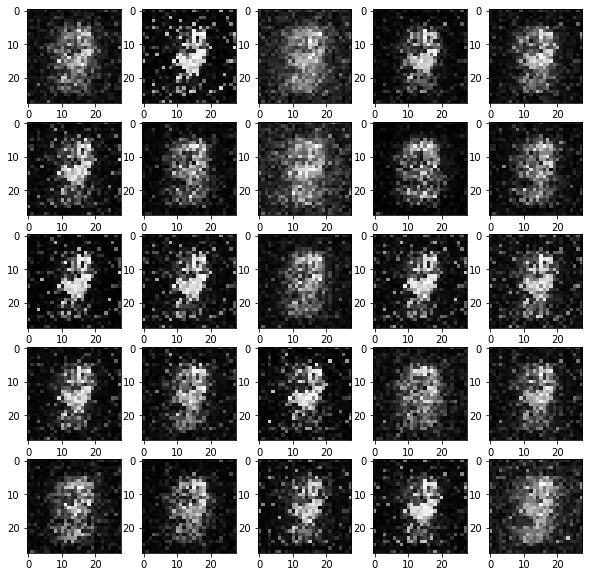

epochs 3


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 10ms/step


  0%|          | 1/273 [00:00<01:23,  3.25it/s]

4/4 [==============================] - 0s 9ms/step


  1%|          | 2/273 [00:00<01:16,  3.56it/s]

4/4 [==============================] - 0s 8ms/step


  1%|          | 3/273 [00:00<01:17,  3.50it/s]

4/4 [==============================] - 0s 9ms/step


  1%|▏         | 4/273 [00:01<01:16,  3.51it/s]

4/4 [==============================] - 0s 9ms/step


  2%|▏         | 5/273 [00:01<01:16,  3.51it/s]

4/4 [==============================] - 0s 8ms/step


  2%|▏         | 6/273 [00:01<01:15,  3.54it/s]

4/4 [==============================] - 0s 10ms/step


  3%|▎         | 7/273 [00:02<01:17,  3.44it/s]

4/4 [==============================] - 0s 9ms/step


  3%|▎         | 8/273 [00:02<01:15,  3.51it/s]

4/4 [==============================] - 0s 10ms/step


  3%|▎         | 9/273 [00:02<01:15,  3.51it/s]

4/4 [==============================] - 0s 13ms/step


  4%|▎         | 10/273 [00:02<01:15,  3.48it/s]

4/4 [==============================] - 0s 9ms/step


  4%|▍         | 11/273 [00:03<01:15,  3.49it/s]

4/4 [==============================] - 0s 8ms/step


  4%|▍         | 12/273 [00:03<01:14,  3.48it/s]

4/4 [==============================] - 0s 10ms/step


  5%|▍         | 13/273 [00:03<01:13,  3.55it/s]

4/4 [==============================] - 0s 11ms/step


  5%|▌         | 14/273 [00:03<01:13,  3.51it/s]

4/4 [==============================] - 0s 7ms/step


  5%|▌         | 15/273 [00:04<01:11,  3.59it/s]

4/4 [==============================] - 0s 10ms/step


  6%|▌         | 16/273 [00:04<01:13,  3.51it/s]

4/4 [==============================] - 0s 8ms/step


  6%|▌         | 17/273 [00:04<01:12,  3.54it/s]

4/4 [==============================] - 0s 7ms/step


  7%|▋         | 18/273 [00:05<01:13,  3.49it/s]

4/4 [==============================] - 0s 8ms/step


  7%|▋         | 19/273 [00:05<01:11,  3.56it/s]

4/4 [==============================] - 0s 8ms/step


  7%|▋         | 20/273 [00:05<01:11,  3.53it/s]

4/4 [==============================] - 0s 8ms/step


  8%|▊         | 21/273 [00:05<01:11,  3.52it/s]

4/4 [==============================] - 0s 10ms/step


  8%|▊         | 22/273 [00:06<01:11,  3.49it/s]

4/4 [==============================] - 0s 8ms/step


  8%|▊         | 23/273 [00:06<01:10,  3.52it/s]

4/4 [==============================] - 0s 9ms/step


  9%|▉         | 24/273 [00:06<01:08,  3.62it/s]

4/4 [==============================] - 0s 14ms/step


  9%|▉         | 25/273 [00:07<01:08,  3.63it/s]

4/4 [==============================] - 0s 8ms/step


 10%|▉         | 26/273 [00:07<01:06,  3.69it/s]

4/4 [==============================] - 0s 9ms/step


 10%|▉         | 27/273 [00:07<01:07,  3.62it/s]

4/4 [==============================] - 0s 9ms/step


 10%|█         | 28/273 [00:07<01:07,  3.61it/s]

4/4 [==============================] - 0s 13ms/step


 11%|█         | 29/273 [00:08<01:07,  3.60it/s]

4/4 [==============================] - 0s 9ms/step


 11%|█         | 30/273 [00:08<01:07,  3.57it/s]

4/4 [==============================] - 0s 9ms/step


 11%|█▏        | 31/273 [00:08<01:08,  3.51it/s]

4/4 [==============================] - 0s 8ms/step


 12%|█▏        | 32/273 [00:09<01:08,  3.53it/s]

4/4 [==============================] - 0s 9ms/step


 12%|█▏        | 33/273 [00:09<01:07,  3.53it/s]

4/4 [==============================] - 0s 8ms/step


 12%|█▏        | 34/273 [00:09<01:08,  3.49it/s]

4/4 [==============================] - 0s 8ms/step


 13%|█▎        | 35/273 [00:09<01:06,  3.60it/s]

4/4 [==============================] - 0s 8ms/step


 13%|█▎        | 36/273 [00:10<01:05,  3.62it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▎        | 37/273 [00:10<01:05,  3.58it/s]

4/4 [==============================] - 0s 8ms/step


 14%|█▍        | 38/273 [00:10<01:05,  3.59it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▍        | 39/273 [00:11<01:06,  3.50it/s]

4/4 [==============================] - 0s 8ms/step


 15%|█▍        | 40/273 [00:11<01:05,  3.57it/s]

4/4 [==============================] - 0s 10ms/step


 15%|█▌        | 41/273 [00:11<01:05,  3.54it/s]

4/4 [==============================] - 0s 7ms/step


 15%|█▌        | 42/273 [00:11<01:10,  3.28it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▌        | 43/273 [00:12<01:07,  3.39it/s]

4/4 [==============================] - 0s 11ms/step


 16%|█▌        | 44/273 [00:12<01:06,  3.45it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▋        | 45/273 [00:12<01:05,  3.50it/s]

4/4 [==============================] - 0s 11ms/step


 17%|█▋        | 46/273 [00:13<01:04,  3.53it/s]

4/4 [==============================] - 0s 9ms/step


 17%|█▋        | 47/273 [00:13<01:02,  3.59it/s]

4/4 [==============================] - 0s 9ms/step


 18%|█▊        | 48/273 [00:13<01:02,  3.57it/s]

4/4 [==============================] - 0s 10ms/step


 18%|█▊        | 49/273 [00:13<01:03,  3.54it/s]

4/4 [==============================] - 0s 9ms/step


 18%|█▊        | 50/273 [00:14<01:02,  3.54it/s]

4/4 [==============================] - 0s 9ms/step


 19%|█▊        | 51/273 [00:14<01:02,  3.56it/s]

4/4 [==============================] - 0s 10ms/step


 19%|█▉        | 52/273 [00:14<01:03,  3.50it/s]

4/4 [==============================] - 0s 8ms/step


 19%|█▉        | 53/273 [00:15<01:02,  3.53it/s]

4/4 [==============================] - 0s 10ms/step


 20%|█▉        | 54/273 [00:15<01:02,  3.51it/s]

4/4 [==============================] - 0s 9ms/step


 20%|██        | 55/273 [00:15<01:02,  3.50it/s]

4/4 [==============================] - 0s 11ms/step


 21%|██        | 56/273 [00:15<01:01,  3.52it/s]

4/4 [==============================] - 0s 11ms/step


 21%|██        | 57/273 [00:16<01:01,  3.53it/s]

4/4 [==============================] - 0s 8ms/step


 21%|██        | 58/273 [00:16<00:59,  3.60it/s]

4/4 [==============================] - 0s 10ms/step


 22%|██▏       | 59/273 [00:16<00:59,  3.58it/s]

4/4 [==============================] - 0s 10ms/step


 22%|██▏       | 60/273 [00:16<01:00,  3.51it/s]

4/4 [==============================] - 0s 9ms/step


 22%|██▏       | 61/273 [00:17<01:00,  3.50it/s]

4/4 [==============================] - 0s 9ms/step


 23%|██▎       | 62/273 [00:17<01:00,  3.50it/s]

4/4 [==============================] - 0s 9ms/step


 23%|██▎       | 63/273 [00:17<01:01,  3.44it/s]

4/4 [==============================] - 0s 9ms/step


 23%|██▎       | 64/273 [00:18<01:00,  3.43it/s]

4/4 [==============================] - 0s 9ms/step


 24%|██▍       | 65/273 [00:18<01:00,  3.45it/s]

4/4 [==============================] - 0s 8ms/step


 24%|██▍       | 66/273 [00:18<00:59,  3.49it/s]

4/4 [==============================] - 0s 8ms/step


 25%|██▍       | 67/273 [00:19<00:58,  3.52it/s]

4/4 [==============================] - 0s 9ms/step


 25%|██▍       | 68/273 [00:19<00:58,  3.51it/s]

4/4 [==============================] - 0s 10ms/step


 25%|██▌       | 69/273 [00:19<00:57,  3.53it/s]

4/4 [==============================] - 0s 9ms/step


 26%|██▌       | 70/273 [00:19<00:58,  3.45it/s]

4/4 [==============================] - 0s 11ms/step


 26%|██▌       | 71/273 [00:20<00:59,  3.42it/s]

4/4 [==============================] - 0s 9ms/step


 26%|██▋       | 72/273 [00:20<00:57,  3.48it/s]

4/4 [==============================] - 0s 8ms/step


 27%|██▋       | 73/273 [00:20<00:56,  3.52it/s]

4/4 [==============================] - 0s 16ms/step


 27%|██▋       | 74/273 [00:21<00:56,  3.49it/s]

4/4 [==============================] - 0s 9ms/step


 27%|██▋       | 75/273 [00:21<00:55,  3.54it/s]

4/4 [==============================] - 0s 8ms/step


 28%|██▊       | 76/273 [00:21<00:55,  3.56it/s]

4/4 [==============================] - 0s 9ms/step


 28%|██▊       | 77/273 [00:21<00:54,  3.59it/s]

4/4 [==============================] - 0s 8ms/step


 29%|██▊       | 78/273 [00:22<00:55,  3.52it/s]

4/4 [==============================] - 0s 8ms/step


 29%|██▉       | 79/273 [00:22<00:55,  3.50it/s]

4/4 [==============================] - 0s 8ms/step


 29%|██▉       | 80/273 [00:22<00:54,  3.55it/s]

4/4 [==============================] - 0s 8ms/step


 30%|██▉       | 81/273 [00:23<00:59,  3.24it/s]

4/4 [==============================] - 0s 9ms/step


 30%|███       | 82/273 [00:23<00:57,  3.33it/s]

4/4 [==============================] - 0s 8ms/step


 30%|███       | 83/273 [00:23<00:56,  3.38it/s]

4/4 [==============================] - 0s 10ms/step


 31%|███       | 84/273 [00:23<00:55,  3.38it/s]

4/4 [==============================] - 0s 7ms/step


 31%|███       | 85/273 [00:24<00:53,  3.49it/s]

4/4 [==============================] - 0s 9ms/step


 32%|███▏      | 86/273 [00:24<00:53,  3.52it/s]

4/4 [==============================] - 0s 8ms/step


 32%|███▏      | 87/273 [00:24<00:52,  3.52it/s]

4/4 [==============================] - 0s 8ms/step


 32%|███▏      | 88/273 [00:25<00:52,  3.52it/s]

4/4 [==============================] - 0s 8ms/step


 33%|███▎      | 89/273 [00:25<00:51,  3.58it/s]

4/4 [==============================] - 0s 10ms/step


 33%|███▎      | 90/273 [00:25<00:50,  3.60it/s]

4/4 [==============================] - 0s 10ms/step


 33%|███▎      | 91/273 [00:25<00:51,  3.54it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▎      | 92/273 [00:26<00:50,  3.55it/s]

4/4 [==============================] - 0s 7ms/step


 34%|███▍      | 93/273 [00:26<00:50,  3.58it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▍      | 94/273 [00:26<00:49,  3.60it/s]

4/4 [==============================] - 0s 8ms/step


 35%|███▍      | 95/273 [00:26<00:49,  3.59it/s]

4/4 [==============================] - 0s 9ms/step


 35%|███▌      | 96/273 [00:27<00:49,  3.59it/s]

4/4 [==============================] - 0s 8ms/step


 36%|███▌      | 97/273 [00:27<00:48,  3.65it/s]

4/4 [==============================] - 0s 8ms/step


 36%|███▌      | 98/273 [00:27<00:48,  3.59it/s]

4/4 [==============================] - 0s 8ms/step


 36%|███▋      | 99/273 [00:28<00:47,  3.63it/s]

4/4 [==============================] - 0s 8ms/step


 37%|███▋      | 100/273 [00:28<00:48,  3.58it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 101/273 [00:28<00:47,  3.65it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 102/273 [00:28<00:47,  3.57it/s]

4/4 [==============================] - 0s 10ms/step


 38%|███▊      | 103/273 [00:29<00:48,  3.49it/s]

4/4 [==============================] - 0s 9ms/step


 38%|███▊      | 104/273 [00:29<00:47,  3.54it/s]

4/4 [==============================] - 0s 8ms/step


 38%|███▊      | 105/273 [00:29<00:47,  3.53it/s]

4/4 [==============================] - 0s 11ms/step


 39%|███▉      | 106/273 [00:30<00:48,  3.44it/s]

4/4 [==============================] - 0s 10ms/step


 39%|███▉      | 107/273 [00:30<00:47,  3.49it/s]

4/4 [==============================] - 0s 9ms/step


 40%|███▉      | 108/273 [00:30<00:46,  3.57it/s]

4/4 [==============================] - 0s 9ms/step


 40%|███▉      | 109/273 [00:30<00:46,  3.55it/s]

4/4 [==============================] - 0s 8ms/step


 40%|████      | 110/273 [00:31<00:46,  3.53it/s]

4/4 [==============================] - 0s 12ms/step


 41%|████      | 111/273 [00:31<00:45,  3.54it/s]

4/4 [==============================] - 0s 8ms/step


 41%|████      | 112/273 [00:31<00:45,  3.57it/s]

4/4 [==============================] - 0s 8ms/step


 41%|████▏     | 113/273 [00:32<00:44,  3.58it/s]

4/4 [==============================] - 0s 14ms/step


 42%|████▏     | 114/273 [00:32<00:44,  3.56it/s]

4/4 [==============================] - 0s 11ms/step


 42%|████▏     | 115/273 [00:32<00:44,  3.58it/s]

4/4 [==============================] - 0s 10ms/step


 42%|████▏     | 116/273 [00:32<00:44,  3.56it/s]

4/4 [==============================] - 0s 8ms/step


 43%|████▎     | 117/273 [00:33<00:45,  3.43it/s]

4/4 [==============================] - 0s 9ms/step


 43%|████▎     | 118/273 [00:33<00:44,  3.50it/s]

4/4 [==============================] - 0s 7ms/step


 44%|████▎     | 119/273 [00:33<00:42,  3.58it/s]

4/4 [==============================] - 0s 7ms/step


 44%|████▍     | 120/273 [00:34<00:42,  3.61it/s]

4/4 [==============================] - 0s 8ms/step


 44%|████▍     | 121/273 [00:34<00:41,  3.62it/s]

4/4 [==============================] - 0s 8ms/step


 45%|████▍     | 122/273 [00:34<00:41,  3.63it/s]

4/4 [==============================] - 0s 9ms/step


 45%|████▌     | 123/273 [00:34<00:41,  3.60it/s]

4/4 [==============================] - 0s 8ms/step


 45%|████▌     | 124/273 [00:35<00:41,  3.59it/s]

4/4 [==============================] - 0s 10ms/step


 46%|████▌     | 125/273 [00:35<00:41,  3.59it/s]

4/4 [==============================] - 0s 8ms/step


 46%|████▌     | 126/273 [00:35<00:40,  3.62it/s]

4/4 [==============================] - 0s 8ms/step


 47%|████▋     | 127/273 [00:35<00:41,  3.51it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 128/273 [00:36<00:41,  3.47it/s]

4/4 [==============================] - 0s 10ms/step


 47%|████▋     | 129/273 [00:36<00:41,  3.46it/s]

4/4 [==============================] - 0s 10ms/step


 48%|████▊     | 130/273 [00:36<00:41,  3.41it/s]

4/4 [==============================] - 0s 9ms/step


 48%|████▊     | 131/273 [00:37<00:40,  3.47it/s]

4/4 [==============================] - 0s 10ms/step


 48%|████▊     | 132/273 [00:37<00:40,  3.47it/s]

4/4 [==============================] - 0s 10ms/step


 49%|████▊     | 133/273 [00:37<00:43,  3.25it/s]

4/4 [==============================] - 0s 10ms/step


 49%|████▉     | 134/273 [00:38<00:48,  2.85it/s]

4/4 [==============================] - 0s 8ms/step


 49%|████▉     | 135/273 [00:38<00:52,  2.63it/s]

4/4 [==============================] - 0s 10ms/step


 50%|████▉     | 136/273 [00:39<00:55,  2.46it/s]

4/4 [==============================] - 0s 8ms/step


 50%|█████     | 137/273 [00:39<00:57,  2.38it/s]

4/4 [==============================] - 0s 12ms/step


 51%|█████     | 138/273 [00:40<00:59,  2.26it/s]

4/4 [==============================] - 0s 13ms/step


 51%|█████     | 139/273 [00:40<00:58,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 51%|█████▏    | 140/273 [00:40<00:51,  2.59it/s]

4/4 [==============================] - 0s 8ms/step


 52%|█████▏    | 141/273 [00:41<00:46,  2.86it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 142/273 [00:41<00:43,  3.03it/s]

4/4 [==============================] - 0s 12ms/step


 52%|█████▏    | 143/273 [00:41<00:40,  3.19it/s]

4/4 [==============================] - 0s 7ms/step


 53%|█████▎    | 144/273 [00:41<00:39,  3.25it/s]

4/4 [==============================] - 0s 10ms/step


 53%|█████▎    | 145/273 [00:42<00:37,  3.38it/s]

4/4 [==============================] - 0s 10ms/step


 53%|█████▎    | 146/273 [00:42<00:36,  3.43it/s]

4/4 [==============================] - 0s 10ms/step


 54%|█████▍    | 147/273 [00:42<00:36,  3.45it/s]

4/4 [==============================] - 0s 9ms/step


 54%|█████▍    | 148/273 [00:43<00:38,  3.23it/s]

4/4 [==============================] - 0s 7ms/step


 55%|█████▍    | 149/273 [00:43<00:37,  3.33it/s]

4/4 [==============================] - 0s 11ms/step


 55%|█████▍    | 150/273 [00:43<00:36,  3.38it/s]

4/4 [==============================] - 0s 10ms/step


 55%|█████▌    | 151/273 [00:43<00:36,  3.33it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▌    | 152/273 [00:44<00:35,  3.42it/s]

4/4 [==============================] - 0s 8ms/step


 56%|█████▌    | 153/273 [00:44<00:34,  3.48it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▋    | 154/273 [00:44<00:34,  3.47it/s]

4/4 [==============================] - 0s 8ms/step


 57%|█████▋    | 155/273 [00:45<00:33,  3.49it/s]

4/4 [==============================] - 0s 9ms/step


 57%|█████▋    | 156/273 [00:45<00:33,  3.45it/s]

4/4 [==============================] - 0s 9ms/step


 58%|█████▊    | 157/273 [00:45<00:36,  3.22it/s]

4/4 [==============================] - 0s 9ms/step


 58%|█████▊    | 158/273 [00:46<00:35,  3.26it/s]

4/4 [==============================] - 0s 8ms/step


 58%|█████▊    | 159/273 [00:46<00:34,  3.33it/s]

4/4 [==============================] - 0s 10ms/step


 59%|█████▊    | 160/273 [00:46<00:34,  3.31it/s]

4/4 [==============================] - 0s 10ms/step


 59%|█████▉    | 161/273 [00:46<00:33,  3.36it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▉    | 162/273 [00:47<00:35,  3.15it/s]

4/4 [==============================] - 0s 8ms/step


 60%|█████▉    | 163/273 [00:47<00:33,  3.29it/s]

4/4 [==============================] - 0s 8ms/step


 60%|██████    | 164/273 [00:47<00:32,  3.35it/s]

4/4 [==============================] - 0s 11ms/step


 60%|██████    | 165/273 [00:48<00:32,  3.37it/s]

4/4 [==============================] - 0s 11ms/step


 61%|██████    | 166/273 [00:48<00:31,  3.44it/s]

4/4 [==============================] - 0s 8ms/step


 61%|██████    | 167/273 [00:48<00:30,  3.46it/s]

4/4 [==============================] - 0s 9ms/step


 62%|██████▏   | 168/273 [00:48<00:30,  3.48it/s]

4/4 [==============================] - 0s 9ms/step


 62%|██████▏   | 169/273 [00:49<00:30,  3.46it/s]

4/4 [==============================] - 0s 8ms/step


 62%|██████▏   | 170/273 [00:49<00:29,  3.49it/s]

4/4 [==============================] - 0s 9ms/step


 63%|██████▎   | 171/273 [00:49<00:29,  3.43it/s]

4/4 [==============================] - 0s 10ms/step


 63%|██████▎   | 172/273 [00:50<00:29,  3.46it/s]

4/4 [==============================] - 0s 9ms/step


 63%|██████▎   | 173/273 [00:50<00:28,  3.54it/s]

4/4 [==============================] - 0s 10ms/step


 64%|██████▎   | 174/273 [00:50<00:28,  3.50it/s]

4/4 [==============================] - 0s 12ms/step


 64%|██████▍   | 175/273 [00:50<00:27,  3.53it/s]

4/4 [==============================] - 0s 8ms/step


 64%|██████▍   | 176/273 [00:51<00:27,  3.57it/s]

4/4 [==============================] - 0s 12ms/step


 65%|██████▍   | 177/273 [00:51<00:27,  3.55it/s]

4/4 [==============================] - 0s 9ms/step


 65%|██████▌   | 178/273 [00:51<00:29,  3.21it/s]

4/4 [==============================] - 0s 8ms/step


 66%|██████▌   | 179/273 [00:52<00:28,  3.32it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▌   | 180/273 [00:52<00:27,  3.37it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▋   | 181/273 [00:52<00:27,  3.38it/s]

4/4 [==============================] - 0s 9ms/step


 67%|██████▋   | 182/273 [00:53<00:26,  3.39it/s]

4/4 [==============================] - 0s 9ms/step


 67%|██████▋   | 183/273 [00:53<00:26,  3.41it/s]

4/4 [==============================] - 0s 8ms/step


 67%|██████▋   | 184/273 [00:53<00:25,  3.42it/s]

4/4 [==============================] - 0s 8ms/step


 68%|██████▊   | 185/273 [00:53<00:25,  3.46it/s]

4/4 [==============================] - 0s 10ms/step


 68%|██████▊   | 186/273 [00:54<00:24,  3.49it/s]

4/4 [==============================] - 0s 9ms/step


 68%|██████▊   | 187/273 [00:54<00:25,  3.37it/s]

4/4 [==============================] - 0s 8ms/step


 69%|██████▉   | 188/273 [00:54<00:24,  3.41it/s]

4/4 [==============================] - 0s 8ms/step


 69%|██████▉   | 189/273 [00:55<00:24,  3.45it/s]

4/4 [==============================] - 0s 8ms/step


 70%|██████▉   | 190/273 [00:55<00:23,  3.51it/s]

4/4 [==============================] - 0s 10ms/step


 70%|██████▉   | 191/273 [00:55<00:23,  3.56it/s]

4/4 [==============================] - 0s 11ms/step


 70%|███████   | 192/273 [00:55<00:23,  3.45it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████   | 193/273 [00:56<00:22,  3.52it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████   | 194/273 [00:56<00:22,  3.58it/s]

4/4 [==============================] - 0s 10ms/step


 71%|███████▏  | 195/273 [00:56<00:21,  3.59it/s]

4/4 [==============================] - 0s 14ms/step


 72%|███████▏  | 196/273 [00:57<00:21,  3.57it/s]

4/4 [==============================] - 0s 10ms/step


 72%|███████▏  | 197/273 [00:57<00:21,  3.53it/s]

4/4 [==============================] - 0s 9ms/step


 73%|███████▎  | 198/273 [00:57<00:21,  3.53it/s]

4/4 [==============================] - 0s 8ms/step


 73%|███████▎  | 199/273 [00:57<00:20,  3.53it/s]

4/4 [==============================] - 0s 10ms/step


 73%|███████▎  | 200/273 [00:58<00:20,  3.52it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▎  | 201/273 [00:58<00:20,  3.55it/s]

4/4 [==============================] - 0s 11ms/step


 74%|███████▍  | 202/273 [00:58<00:19,  3.55it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▍  | 203/273 [00:59<00:20,  3.46it/s]

4/4 [==============================] - 0s 8ms/step


 75%|███████▍  | 204/273 [00:59<00:19,  3.51it/s]

4/4 [==============================] - 0s 9ms/step


 75%|███████▌  | 205/273 [00:59<00:19,  3.55it/s]

4/4 [==============================] - 0s 9ms/step


 75%|███████▌  | 206/273 [00:59<00:18,  3.58it/s]

4/4 [==============================] - 0s 8ms/step


 76%|███████▌  | 207/273 [01:00<00:18,  3.52it/s]

4/4 [==============================] - 0s 10ms/step


 76%|███████▌  | 208/273 [01:00<00:18,  3.53it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 209/273 [01:00<00:17,  3.60it/s]

4/4 [==============================] - 0s 8ms/step


 77%|███████▋  | 210/273 [01:01<00:17,  3.56it/s]

4/4 [==============================] - 0s 8ms/step


 77%|███████▋  | 211/273 [01:01<00:17,  3.53it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 212/273 [01:01<00:17,  3.53it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 213/273 [01:01<00:17,  3.49it/s]

4/4 [==============================] - 0s 10ms/step


 78%|███████▊  | 214/273 [01:02<00:16,  3.49it/s]

4/4 [==============================] - 0s 9ms/step


 79%|███████▉  | 215/273 [01:02<00:16,  3.48it/s]

4/4 [==============================] - 0s 9ms/step


 79%|███████▉  | 216/273 [01:02<00:16,  3.55it/s]

4/4 [==============================] - 0s 8ms/step


 79%|███████▉  | 217/273 [01:03<00:15,  3.54it/s]

4/4 [==============================] - 0s 9ms/step


 80%|███████▉  | 218/273 [01:03<00:15,  3.52it/s]

4/4 [==============================] - 0s 9ms/step


 80%|████████  | 219/273 [01:03<00:15,  3.53it/s]

4/4 [==============================] - 0s 8ms/step


 81%|████████  | 220/273 [01:03<00:15,  3.53it/s]

4/4 [==============================] - 0s 10ms/step


 81%|████████  | 221/273 [01:04<00:14,  3.49it/s]

4/4 [==============================] - 0s 10ms/step


 81%|████████▏ | 222/273 [01:04<00:14,  3.53it/s]

4/4 [==============================] - 0s 8ms/step


 82%|████████▏ | 223/273 [01:04<00:14,  3.52it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 224/273 [01:05<00:13,  3.53it/s]

4/4 [==============================] - 0s 10ms/step


 82%|████████▏ | 225/273 [01:05<00:13,  3.44it/s]

4/4 [==============================] - 0s 9ms/step


 83%|████████▎ | 226/273 [01:05<00:13,  3.49it/s]

4/4 [==============================] - 0s 9ms/step


 83%|████████▎ | 227/273 [01:05<00:13,  3.49it/s]

4/4 [==============================] - 0s 11ms/step


 84%|████████▎ | 228/273 [01:06<00:12,  3.50it/s]

4/4 [==============================] - 0s 10ms/step


 84%|████████▍ | 229/273 [01:06<00:12,  3.49it/s]

4/4 [==============================] - 0s 10ms/step


 84%|████████▍ | 230/273 [01:06<00:12,  3.48it/s]

4/4 [==============================] - 0s 11ms/step


 85%|████████▍ | 231/273 [01:07<00:12,  3.47it/s]

4/4 [==============================] - 0s 10ms/step


 85%|████████▍ | 232/273 [01:07<00:11,  3.45it/s]

4/4 [==============================] - 0s 7ms/step


 85%|████████▌ | 233/273 [01:07<00:11,  3.47it/s]

4/4 [==============================] - 0s 10ms/step


 86%|████████▌ | 234/273 [01:07<00:11,  3.47it/s]

4/4 [==============================] - 0s 8ms/step


 86%|████████▌ | 235/273 [01:08<00:10,  3.53it/s]

4/4 [==============================] - 0s 10ms/step


 86%|████████▋ | 236/273 [01:08<00:10,  3.48it/s]

4/4 [==============================] - 0s 8ms/step


 87%|████████▋ | 237/273 [01:08<00:10,  3.51it/s]

4/4 [==============================] - 0s 10ms/step


 87%|████████▋ | 238/273 [01:09<00:10,  3.43it/s]

4/4 [==============================] - 0s 8ms/step


 88%|████████▊ | 239/273 [01:09<00:09,  3.42it/s]

4/4 [==============================] - 0s 9ms/step


 88%|████████▊ | 240/273 [01:09<00:09,  3.45it/s]

4/4 [==============================] - 0s 11ms/step


 88%|████████▊ | 241/273 [01:09<00:09,  3.47it/s]

4/4 [==============================] - 0s 10ms/step


 89%|████████▊ | 242/273 [01:10<00:08,  3.50it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▉ | 243/273 [01:10<00:08,  3.51it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▉ | 244/273 [01:10<00:08,  3.53it/s]

4/4 [==============================] - 0s 13ms/step


 90%|████████▉ | 245/273 [01:11<00:08,  3.47it/s]

4/4 [==============================] - 0s 10ms/step


 90%|█████████ | 246/273 [01:11<00:07,  3.44it/s]

4/4 [==============================] - 0s 8ms/step


 90%|█████████ | 247/273 [01:11<00:07,  3.47it/s]

4/4 [==============================] - 0s 8ms/step


 91%|█████████ | 248/273 [01:11<00:07,  3.52it/s]

4/4 [==============================] - 0s 10ms/step


 91%|█████████ | 249/273 [01:12<00:06,  3.50it/s]

4/4 [==============================] - 0s 14ms/step


 92%|█████████▏| 250/273 [01:12<00:06,  3.48it/s]

4/4 [==============================] - 0s 10ms/step


 92%|█████████▏| 251/273 [01:12<00:06,  3.48it/s]

4/4 [==============================] - 0s 10ms/step


 92%|█████████▏| 252/273 [01:13<00:05,  3.53it/s]

4/4 [==============================] - 0s 9ms/step


 93%|█████████▎| 253/273 [01:13<00:05,  3.49it/s]

4/4 [==============================] - 0s 9ms/step


 93%|█████████▎| 254/273 [01:13<00:05,  3.52it/s]

4/4 [==============================] - 0s 8ms/step


 93%|█████████▎| 255/273 [01:13<00:05,  3.57it/s]

4/4 [==============================] - 0s 8ms/step


 94%|█████████▍| 256/273 [01:14<00:04,  3.58it/s]

4/4 [==============================] - 0s 8ms/step


 94%|█████████▍| 257/273 [01:14<00:04,  3.56it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▍| 258/273 [01:14<00:04,  3.53it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▍| 259/273 [01:15<00:03,  3.51it/s]

4/4 [==============================] - 0s 8ms/step


 95%|█████████▌| 260/273 [01:15<00:03,  3.52it/s]

4/4 [==============================] - 0s 8ms/step


 96%|█████████▌| 261/273 [01:15<00:03,  3.49it/s]

4/4 [==============================] - 0s 7ms/step


 96%|█████████▌| 262/273 [01:15<00:03,  3.39it/s]

4/4 [==============================] - 0s 7ms/step


 96%|█████████▋| 263/273 [01:16<00:02,  3.44it/s]

4/4 [==============================] - 0s 10ms/step


 97%|█████████▋| 264/273 [01:16<00:02,  3.42it/s]

4/4 [==============================] - 0s 11ms/step


 97%|█████████▋| 265/273 [01:16<00:02,  3.45it/s]

4/4 [==============================] - 0s 10ms/step


 97%|█████████▋| 266/273 [01:17<00:02,  3.50it/s]

4/4 [==============================] - 0s 11ms/step


 98%|█████████▊| 267/273 [01:17<00:01,  3.42it/s]

4/4 [==============================] - 0s 14ms/step


 98%|█████████▊| 268/273 [01:17<00:01,  3.45it/s]

4/4 [==============================] - 0s 9ms/step


 99%|█████████▊| 269/273 [01:17<00:01,  3.42it/s]

4/4 [==============================] - 0s 10ms/step


 99%|█████████▉| 270/273 [01:18<00:00,  3.43it/s]

4/4 [==============================] - 0s 9ms/step


 99%|█████████▉| 271/273 [01:18<00:00,  3.43it/s]

4/4 [==============================] - 0s 8ms/step


100%|█████████▉| 272/273 [01:18<00:00,  3.50it/s]

4/4 [==============================] - 0s 8ms/step


100%|██████████| 273/273 [01:19<00:00,  3.45it/s]


loss is 0.08251343667507172 |*| 0.9306520223617554
1/1 [==============================] - 0s 19ms/step


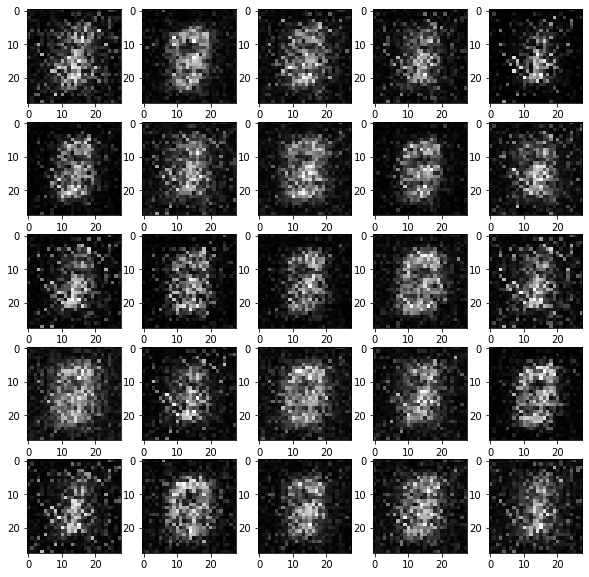

epochs 4


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 7ms/step


  0%|          | 1/273 [00:00<01:20,  3.37it/s]

4/4 [==============================] - 0s 8ms/step


  1%|          | 2/273 [00:00<01:18,  3.45it/s]

4/4 [==============================] - 0s 10ms/step


  1%|          | 3/273 [00:00<01:20,  3.37it/s]

4/4 [==============================] - 0s 9ms/step


  1%|▏         | 4/273 [00:01<01:20,  3.36it/s]

4/4 [==============================] - 0s 10ms/step


  2%|▏         | 5/273 [00:01<01:21,  3.30it/s]

4/4 [==============================] - 0s 8ms/step


  2%|▏         | 6/273 [00:01<01:21,  3.26it/s]

4/4 [==============================] - 0s 9ms/step


  3%|▎         | 7/273 [00:02<01:21,  3.26it/s]

4/4 [==============================] - 0s 9ms/step


  3%|▎         | 8/273 [00:02<01:22,  3.20it/s]

4/4 [==============================] - 0s 10ms/step


  3%|▎         | 9/273 [00:02<01:22,  3.21it/s]

4/4 [==============================] - 0s 9ms/step


  4%|▎         | 10/273 [00:03<01:21,  3.24it/s]

4/4 [==============================] - 0s 9ms/step


  4%|▍         | 11/273 [00:03<01:21,  3.21it/s]

4/4 [==============================] - 0s 9ms/step


  4%|▍         | 12/273 [00:03<01:27,  2.97it/s]

4/4 [==============================] - 0s 8ms/step


  5%|▍         | 13/273 [00:04<01:24,  3.07it/s]

4/4 [==============================] - 0s 9ms/step


  5%|▌         | 14/273 [00:04<01:21,  3.18it/s]

4/4 [==============================] - 0s 12ms/step


  5%|▌         | 15/273 [00:04<01:20,  3.22it/s]

4/4 [==============================] - 0s 12ms/step


  6%|▌         | 16/273 [00:04<01:21,  3.15it/s]

4/4 [==============================] - 0s 10ms/step


  6%|▌         | 17/273 [00:05<01:21,  3.16it/s]

4/4 [==============================] - 0s 9ms/step


  7%|▋         | 18/273 [00:05<01:21,  3.13it/s]

4/4 [==============================] - 0s 10ms/step


  7%|▋         | 19/273 [00:05<01:20,  3.16it/s]

4/4 [==============================] - 0s 9ms/step


  7%|▋         | 20/273 [00:06<01:18,  3.21it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 21/273 [00:06<01:17,  3.25it/s]

4/4 [==============================] - 0s 11ms/step


  8%|▊         | 22/273 [00:06<01:18,  3.19it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 23/273 [00:07<01:18,  3.20it/s]

4/4 [==============================] - 0s 11ms/step


  9%|▉         | 24/273 [00:07<01:22,  3.02it/s]

4/4 [==============================] - 0s 9ms/step


  9%|▉         | 25/273 [00:07<01:24,  2.92it/s]

4/4 [==============================] - 0s 8ms/step


 10%|▉         | 26/273 [00:08<01:21,  3.03it/s]

4/4 [==============================] - 0s 9ms/step


 10%|▉         | 27/273 [00:08<01:17,  3.16it/s]

4/4 [==============================] - 0s 14ms/step


 10%|█         | 28/273 [00:08<01:15,  3.25it/s]

4/4 [==============================] - 0s 8ms/step


 11%|█         | 29/273 [00:09<01:13,  3.31it/s]

4/4 [==============================] - 0s 8ms/step


 11%|█         | 30/273 [00:09<01:13,  3.29it/s]

4/4 [==============================] - 0s 11ms/step


 11%|█▏        | 31/273 [00:09<01:12,  3.32it/s]

4/4 [==============================] - 0s 8ms/step


 12%|█▏        | 32/273 [00:10<01:13,  3.27it/s]

4/4 [==============================] - 0s 9ms/step


 12%|█▏        | 33/273 [00:10<01:11,  3.35it/s]

4/4 [==============================] - 0s 9ms/step


 12%|█▏        | 34/273 [00:10<01:10,  3.38it/s]

4/4 [==============================] - 0s 12ms/step


 13%|█▎        | 35/273 [00:10<01:10,  3.39it/s]

4/4 [==============================] - 0s 7ms/step


 13%|█▎        | 36/273 [00:11<01:09,  3.41it/s]

4/4 [==============================] - 0s 10ms/step


 14%|█▎        | 37/273 [00:11<01:08,  3.44it/s]

4/4 [==============================] - 0s 8ms/step


 14%|█▍        | 38/273 [00:11<01:08,  3.42it/s]

4/4 [==============================] - 0s 8ms/step


 14%|█▍        | 39/273 [00:12<01:12,  3.22it/s]

4/4 [==============================] - 0s 8ms/step


 15%|█▍        | 40/273 [00:12<01:11,  3.28it/s]

4/4 [==============================] - 0s 12ms/step


 15%|█▌        | 41/273 [00:12<01:09,  3.32it/s]

4/4 [==============================] - 0s 8ms/step


 15%|█▌        | 42/273 [00:12<01:10,  3.30it/s]

4/4 [==============================] - 0s 8ms/step


 16%|█▌        | 43/273 [00:13<01:08,  3.35it/s]

4/4 [==============================] - 0s 11ms/step


 16%|█▌        | 44/273 [00:13<01:08,  3.35it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▋        | 45/273 [00:13<01:07,  3.38it/s]

4/4 [==============================] - 0s 9ms/step


 17%|█▋        | 46/273 [00:14<01:06,  3.39it/s]

4/4 [==============================] - 0s 14ms/step


 17%|█▋        | 47/273 [00:14<01:06,  3.39it/s]

4/4 [==============================] - 0s 9ms/step


 18%|█▊        | 48/273 [00:14<01:05,  3.43it/s]

4/4 [==============================] - 0s 10ms/step


 18%|█▊        | 49/273 [00:15<01:05,  3.42it/s]

4/4 [==============================] - 0s 7ms/step


 18%|█▊        | 50/273 [00:15<01:04,  3.44it/s]

4/4 [==============================] - 0s 10ms/step


 19%|█▊        | 51/273 [00:15<01:04,  3.44it/s]

4/4 [==============================] - 0s 8ms/step


 19%|█▉        | 52/273 [00:15<01:03,  3.47it/s]

4/4 [==============================] - 0s 12ms/step


 19%|█▉        | 53/273 [00:16<01:03,  3.44it/s]

4/4 [==============================] - 0s 9ms/step


 20%|█▉        | 54/273 [00:16<01:02,  3.48it/s]

4/4 [==============================] - 0s 9ms/step


 20%|██        | 55/273 [00:16<01:03,  3.44it/s]

4/4 [==============================] - 0s 8ms/step


 21%|██        | 56/273 [00:17<01:04,  3.35it/s]

4/4 [==============================] - 0s 9ms/step


 21%|██        | 57/273 [00:17<01:03,  3.38it/s]

4/4 [==============================] - 0s 11ms/step


 21%|██        | 58/273 [00:17<01:03,  3.38it/s]

4/4 [==============================] - 0s 11ms/step


 22%|██▏       | 59/273 [00:17<01:03,  3.38it/s]

4/4 [==============================] - 0s 10ms/step


 22%|██▏       | 60/273 [00:18<01:03,  3.36it/s]

4/4 [==============================] - 0s 8ms/step


 22%|██▏       | 61/273 [00:18<01:02,  3.40it/s]

4/4 [==============================] - 0s 10ms/step


 23%|██▎       | 62/273 [00:18<01:01,  3.41it/s]

4/4 [==============================] - 0s 8ms/step


 23%|██▎       | 63/273 [00:19<01:01,  3.39it/s]

4/4 [==============================] - 0s 10ms/step


 23%|██▎       | 64/273 [00:19<01:00,  3.43it/s]

4/4 [==============================] - 0s 10ms/step


 24%|██▍       | 65/273 [00:19<01:00,  3.43it/s]

4/4 [==============================] - 0s 10ms/step


 24%|██▍       | 66/273 [00:20<01:00,  3.41it/s]

4/4 [==============================] - 0s 8ms/step


 25%|██▍       | 67/273 [00:20<01:00,  3.40it/s]

4/4 [==============================] - 0s 9ms/step


 25%|██▍       | 68/273 [00:20<00:59,  3.45it/s]

4/4 [==============================] - 0s 10ms/step


 25%|██▌       | 69/273 [00:20<01:00,  3.39it/s]

4/4 [==============================] - 0s 8ms/step


 26%|██▌       | 70/273 [00:21<00:59,  3.41it/s]

4/4 [==============================] - 0s 11ms/step


 26%|██▌       | 71/273 [00:21<01:00,  3.36it/s]

4/4 [==============================] - 0s 8ms/step


 26%|██▋       | 72/273 [00:21<00:58,  3.41it/s]

4/4 [==============================] - 0s 8ms/step


 27%|██▋       | 73/273 [00:22<00:58,  3.43it/s]

4/4 [==============================] - 0s 9ms/step


 27%|██▋       | 74/273 [00:22<00:59,  3.35it/s]

4/4 [==============================] - 0s 11ms/step


 27%|██▋       | 75/273 [00:22<00:58,  3.38it/s]

4/4 [==============================] - 0s 9ms/step


 28%|██▊       | 76/273 [00:22<00:58,  3.38it/s]

4/4 [==============================] - 0s 9ms/step


 28%|██▊       | 77/273 [00:23<00:58,  3.35it/s]

4/4 [==============================] - 0s 10ms/step


 29%|██▊       | 78/273 [00:23<00:58,  3.36it/s]

4/4 [==============================] - 0s 8ms/step


 29%|██▉       | 79/273 [00:23<01:02,  3.12it/s]

4/4 [==============================] - 0s 8ms/step


 29%|██▉       | 80/273 [00:24<00:59,  3.25it/s]

4/4 [==============================] - 0s 9ms/step


 30%|██▉       | 81/273 [00:24<00:58,  3.27it/s]

4/4 [==============================] - 0s 10ms/step


 30%|███       | 82/273 [00:24<00:58,  3.27it/s]

4/4 [==============================] - 0s 9ms/step


 30%|███       | 83/273 [00:25<00:57,  3.32it/s]

4/4 [==============================] - 0s 11ms/step


 31%|███       | 84/273 [00:25<00:56,  3.33it/s]

4/4 [==============================] - 0s 8ms/step


 31%|███       | 85/273 [00:25<00:55,  3.39it/s]

4/4 [==============================] - 0s 10ms/step


 32%|███▏      | 86/273 [00:25<00:55,  3.39it/s]

4/4 [==============================] - 0s 8ms/step


 32%|███▏      | 87/273 [00:26<00:54,  3.44it/s]

4/4 [==============================] - 0s 8ms/step


 32%|███▏      | 88/273 [00:26<00:53,  3.46it/s]

4/4 [==============================] - 0s 8ms/step


 33%|███▎      | 89/273 [00:26<00:53,  3.46it/s]

4/4 [==============================] - 0s 9ms/step


 33%|███▎      | 90/273 [00:27<00:51,  3.53it/s]

4/4 [==============================] - 0s 8ms/step


 33%|███▎      | 91/273 [00:27<00:52,  3.49it/s]

4/4 [==============================] - 0s 8ms/step


 34%|███▎      | 92/273 [00:27<00:51,  3.52it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▍      | 93/273 [00:27<00:52,  3.44it/s]

4/4 [==============================] - 0s 8ms/step


 34%|███▍      | 94/273 [00:28<00:52,  3.42it/s]

4/4 [==============================] - 0s 9ms/step


 35%|███▍      | 95/273 [00:28<00:52,  3.39it/s]

4/4 [==============================] - 0s 8ms/step


 35%|███▌      | 96/273 [00:28<00:52,  3.39it/s]

4/4 [==============================] - 0s 10ms/step


 36%|███▌      | 97/273 [00:29<00:51,  3.44it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▌      | 98/273 [00:29<00:51,  3.39it/s]

4/4 [==============================] - 0s 11ms/step


 36%|███▋      | 99/273 [00:29<00:50,  3.43it/s]

4/4 [==============================] - 0s 10ms/step


 37%|███▋      | 100/273 [00:30<00:50,  3.39it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 101/273 [00:30<00:50,  3.41it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 102/273 [00:30<00:50,  3.41it/s]

4/4 [==============================] - 0s 9ms/step


 38%|███▊      | 103/273 [00:30<00:49,  3.40it/s]

4/4 [==============================] - 0s 9ms/step


 38%|███▊      | 104/273 [00:31<00:48,  3.46it/s]

4/4 [==============================] - 0s 7ms/step


 38%|███▊      | 105/273 [00:31<00:48,  3.46it/s]

4/4 [==============================] - 0s 10ms/step


 39%|███▉      | 106/273 [00:31<00:48,  3.48it/s]

4/4 [==============================] - 0s 13ms/step


 39%|███▉      | 107/273 [00:32<00:48,  3.44it/s]

4/4 [==============================] - 0s 10ms/step


 40%|███▉      | 108/273 [00:32<00:47,  3.51it/s]

4/4 [==============================] - 0s 8ms/step


 40%|███▉      | 109/273 [00:32<00:47,  3.47it/s]

4/4 [==============================] - 0s 9ms/step


 40%|████      | 110/273 [00:32<00:47,  3.44it/s]

4/4 [==============================] - 0s 9ms/step


 41%|████      | 111/273 [00:33<00:46,  3.45it/s]

4/4 [==============================] - 0s 10ms/step


 41%|████      | 112/273 [00:33<00:46,  3.45it/s]

4/4 [==============================] - 0s 8ms/step


 41%|████▏     | 113/273 [00:33<00:46,  3.43it/s]

4/4 [==============================] - 0s 8ms/step


 42%|████▏     | 114/273 [00:34<00:47,  3.38it/s]

4/4 [==============================] - 0s 9ms/step


 42%|████▏     | 115/273 [00:34<00:46,  3.43it/s]

4/4 [==============================] - 0s 11ms/step


 42%|████▏     | 116/273 [00:34<00:46,  3.41it/s]

4/4 [==============================] - 0s 8ms/step


 43%|████▎     | 117/273 [00:34<00:46,  3.38it/s]

4/4 [==============================] - 0s 8ms/step


 43%|████▎     | 118/273 [00:35<00:45,  3.43it/s]

4/4 [==============================] - 0s 8ms/step


 44%|████▎     | 119/273 [00:35<00:44,  3.43it/s]

4/4 [==============================] - 0s 8ms/step


 44%|████▍     | 120/273 [00:35<00:44,  3.42it/s]

4/4 [==============================] - 0s 9ms/step


 44%|████▍     | 121/273 [00:36<00:44,  3.44it/s]

4/4 [==============================] - 0s 9ms/step


 45%|████▍     | 122/273 [00:36<00:43,  3.47it/s]

4/4 [==============================] - 0s 9ms/step


 45%|████▌     | 123/273 [00:36<00:43,  3.44it/s]

4/4 [==============================] - 0s 8ms/step


 45%|████▌     | 124/273 [00:37<00:42,  3.50it/s]

4/4 [==============================] - 0s 9ms/step


 46%|████▌     | 125/273 [00:37<00:42,  3.49it/s]

4/4 [==============================] - 0s 8ms/step


 46%|████▌     | 126/273 [00:37<00:41,  3.53it/s]

4/4 [==============================] - 0s 11ms/step


 47%|████▋     | 127/273 [00:37<00:42,  3.44it/s]

4/4 [==============================] - 0s 8ms/step


 47%|████▋     | 128/273 [00:38<00:42,  3.45it/s]

4/4 [==============================] - 0s 8ms/step


 47%|████▋     | 129/273 [00:38<00:41,  3.45it/s]

4/4 [==============================] - 0s 12ms/step


 48%|████▊     | 130/273 [00:38<00:42,  3.39it/s]

4/4 [==============================] - 0s 9ms/step


 48%|████▊     | 131/273 [00:39<00:41,  3.39it/s]

4/4 [==============================] - 0s 10ms/step


 48%|████▊     | 132/273 [00:39<00:41,  3.40it/s]

4/4 [==============================] - 0s 10ms/step


 49%|████▊     | 133/273 [00:39<00:40,  3.45it/s]

4/4 [==============================] - 0s 8ms/step


 49%|████▉     | 134/273 [00:39<00:40,  3.40it/s]

4/4 [==============================] - 0s 10ms/step


 49%|████▉     | 135/273 [00:40<00:40,  3.40it/s]

4/4 [==============================] - 0s 10ms/step


 50%|████▉     | 136/273 [00:40<00:40,  3.42it/s]

4/4 [==============================] - 0s 11ms/step


 50%|█████     | 137/273 [00:40<00:40,  3.38it/s]

4/4 [==============================] - 0s 10ms/step


 51%|█████     | 138/273 [00:41<00:40,  3.37it/s]

4/4 [==============================] - 0s 11ms/step


 51%|█████     | 139/273 [00:41<00:39,  3.41it/s]

4/4 [==============================] - 0s 8ms/step


 51%|█████▏    | 140/273 [00:41<00:38,  3.45it/s]

4/4 [==============================] - 0s 8ms/step


 52%|█████▏    | 141/273 [00:41<00:38,  3.43it/s]

4/4 [==============================] - 0s 8ms/step


 52%|█████▏    | 142/273 [00:42<00:38,  3.43it/s]

4/4 [==============================] - 0s 11ms/step


 52%|█████▏    | 143/273 [00:42<00:37,  3.42it/s]

4/4 [==============================] - 0s 11ms/step


 53%|█████▎    | 144/273 [00:42<00:37,  3.40it/s]

4/4 [==============================] - 0s 11ms/step


 53%|█████▎    | 145/273 [00:43<00:37,  3.43it/s]

4/4 [==============================] - 0s 12ms/step


 53%|█████▎    | 146/273 [00:43<00:36,  3.48it/s]

4/4 [==============================] - 0s 8ms/step


 54%|█████▍    | 147/273 [00:43<00:36,  3.49it/s]

4/4 [==============================] - 0s 10ms/step


 54%|█████▍    | 148/273 [00:43<00:35,  3.51it/s]

4/4 [==============================] - 0s 8ms/step


 55%|█████▍    | 149/273 [00:44<00:35,  3.48it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▍    | 150/273 [00:44<00:35,  3.48it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▌    | 151/273 [00:44<00:36,  3.34it/s]

4/4 [==============================] - 0s 8ms/step


 56%|█████▌    | 152/273 [00:45<00:36,  3.35it/s]

4/4 [==============================] - 0s 7ms/step


 56%|█████▌    | 153/273 [00:45<00:35,  3.39it/s]

4/4 [==============================] - 0s 8ms/step


 56%|█████▋    | 154/273 [00:45<00:34,  3.46it/s]

4/4 [==============================] - 0s 8ms/step


 57%|█████▋    | 155/273 [00:46<00:34,  3.43it/s]

4/4 [==============================] - 0s 9ms/step


 57%|█████▋    | 156/273 [00:46<00:34,  3.44it/s]

4/4 [==============================] - 0s 9ms/step


 58%|█████▊    | 157/273 [00:46<00:33,  3.41it/s]

4/4 [==============================] - 0s 8ms/step


 58%|█████▊    | 158/273 [00:46<00:33,  3.44it/s]

4/4 [==============================] - 0s 11ms/step


 58%|█████▊    | 159/273 [00:47<00:33,  3.42it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▊    | 160/273 [00:47<00:32,  3.48it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▉    | 161/273 [00:47<00:31,  3.51it/s]

4/4 [==============================] - 0s 8ms/step


 59%|█████▉    | 162/273 [00:48<00:32,  3.47it/s]

4/4 [==============================] - 0s 10ms/step


 60%|█████▉    | 163/273 [00:48<00:31,  3.48it/s]

4/4 [==============================] - 0s 10ms/step


 60%|██████    | 164/273 [00:48<00:31,  3.48it/s]

4/4 [==============================] - 0s 10ms/step


 60%|██████    | 165/273 [00:48<00:31,  3.40it/s]

4/4 [==============================] - 0s 9ms/step


 61%|██████    | 166/273 [00:49<00:31,  3.41it/s]

4/4 [==============================] - 0s 8ms/step


 61%|██████    | 167/273 [00:49<00:30,  3.45it/s]

4/4 [==============================] - 0s 10ms/step


 62%|██████▏   | 168/273 [00:49<00:30,  3.47it/s]

4/4 [==============================] - 0s 8ms/step


 62%|██████▏   | 169/273 [00:50<00:30,  3.44it/s]

4/4 [==============================] - 0s 16ms/step


 62%|██████▏   | 170/273 [00:50<00:29,  3.45it/s]

4/4 [==============================] - 0s 8ms/step


 63%|██████▎   | 171/273 [00:50<00:29,  3.49it/s]

4/4 [==============================] - 0s 8ms/step


 63%|██████▎   | 172/273 [00:50<00:28,  3.49it/s]

4/4 [==============================] - 0s 10ms/step


 63%|██████▎   | 173/273 [00:51<00:28,  3.48it/s]

4/4 [==============================] - 0s 9ms/step


 64%|██████▎   | 174/273 [00:51<00:28,  3.46it/s]

4/4 [==============================] - 0s 11ms/step


 64%|██████▍   | 175/273 [00:51<00:28,  3.45it/s]

4/4 [==============================] - 0s 10ms/step


 64%|██████▍   | 176/273 [00:52<00:28,  3.42it/s]

4/4 [==============================] - 0s 11ms/step


 65%|██████▍   | 177/273 [00:52<00:27,  3.46it/s]

4/4 [==============================] - 0s 8ms/step


 65%|██████▌   | 178/273 [00:52<00:27,  3.49it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▌   | 179/273 [00:52<00:26,  3.51it/s]

4/4 [==============================] - 0s 11ms/step


 66%|██████▌   | 180/273 [00:53<00:27,  3.36it/s]

4/4 [==============================] - 0s 10ms/step


 66%|██████▋   | 181/273 [00:53<00:27,  3.41it/s]

4/4 [==============================] - 0s 11ms/step


 67%|██████▋   | 182/273 [00:53<00:26,  3.43it/s]

4/4 [==============================] - 0s 12ms/step


 67%|██████▋   | 183/273 [00:54<00:26,  3.35it/s]

4/4 [==============================] - 0s 9ms/step


 67%|██████▋   | 184/273 [00:54<00:25,  3.43it/s]

4/4 [==============================] - 0s 11ms/step


 68%|██████▊   | 185/273 [00:54<00:25,  3.46it/s]

4/4 [==============================] - 0s 9ms/step


 68%|██████▊   | 186/273 [00:55<00:25,  3.45it/s]

4/4 [==============================] - 0s 10ms/step


 68%|██████▊   | 187/273 [00:55<00:25,  3.35it/s]

4/4 [==============================] - 0s 9ms/step


 69%|██████▉   | 188/273 [00:55<00:25,  3.30it/s]

4/4 [==============================] - 0s 11ms/step


 69%|██████▉   | 189/273 [00:55<00:25,  3.32it/s]

4/4 [==============================] - 0s 10ms/step


 70%|██████▉   | 190/273 [00:56<00:25,  3.31it/s]

4/4 [==============================] - 0s 9ms/step


 70%|██████▉   | 191/273 [00:56<00:27,  2.94it/s]

4/4 [==============================] - 0s 13ms/step


 70%|███████   | 192/273 [00:57<00:29,  2.75it/s]

4/4 [==============================] - 0s 15ms/step


 71%|███████   | 193/273 [00:57<00:32,  2.46it/s]

4/4 [==============================] - 0s 8ms/step


 71%|███████   | 194/273 [00:58<00:33,  2.39it/s]

4/4 [==============================] - 0s 10ms/step


 71%|███████▏  | 195/273 [00:58<00:33,  2.30it/s]

4/4 [==============================] - 0s 15ms/step


 72%|███████▏  | 196/273 [00:59<00:34,  2.26it/s]

4/4 [==============================] - 0s 15ms/step


 72%|███████▏  | 197/273 [00:59<00:34,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 73%|███████▎  | 198/273 [00:59<00:30,  2.45it/s]

4/4 [==============================] - 0s 10ms/step


 73%|███████▎  | 199/273 [01:00<00:27,  2.68it/s]

4/4 [==============================] - 0s 8ms/step


 73%|███████▎  | 200/273 [01:00<00:25,  2.84it/s]

4/4 [==============================] - 0s 8ms/step


 74%|███████▎  | 201/273 [01:00<00:23,  3.04it/s]

4/4 [==============================] - 0s 8ms/step


 74%|███████▍  | 202/273 [01:00<00:22,  3.12it/s]

4/4 [==============================] - 0s 8ms/step


 74%|███████▍  | 203/273 [01:01<00:21,  3.21it/s]

4/4 [==============================] - 0s 10ms/step


 75%|███████▍  | 204/273 [01:01<00:21,  3.27it/s]

4/4 [==============================] - 0s 8ms/step


 75%|███████▌  | 205/273 [01:01<00:20,  3.31it/s]

4/4 [==============================] - 0s 12ms/step


 75%|███████▌  | 206/273 [01:02<00:19,  3.36it/s]

4/4 [==============================] - 0s 14ms/step


 76%|███████▌  | 207/273 [01:02<00:19,  3.35it/s]

4/4 [==============================] - 0s 12ms/step


 76%|███████▌  | 208/273 [01:02<00:19,  3.38it/s]

4/4 [==============================] - 0s 11ms/step


 77%|███████▋  | 209/273 [01:03<00:18,  3.42it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 210/273 [01:03<00:18,  3.44it/s]

4/4 [==============================] - 0s 11ms/step


 77%|███████▋  | 211/273 [01:03<00:18,  3.39it/s]

4/4 [==============================] - 0s 8ms/step


 78%|███████▊  | 212/273 [01:03<00:17,  3.41it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 213/273 [01:04<00:17,  3.45it/s]

4/4 [==============================] - 0s 8ms/step


 78%|███████▊  | 214/273 [01:04<00:17,  3.43it/s]

4/4 [==============================] - 0s 11ms/step


 79%|███████▉  | 215/273 [01:04<00:17,  3.41it/s]

4/4 [==============================] - 0s 12ms/step


 79%|███████▉  | 216/273 [01:05<00:16,  3.42it/s]

4/4 [==============================] - 0s 8ms/step


 79%|███████▉  | 217/273 [01:05<00:16,  3.41it/s]

4/4 [==============================] - 0s 8ms/step


 80%|███████▉  | 218/273 [01:05<00:16,  3.40it/s]

4/4 [==============================] - 0s 9ms/step


 80%|████████  | 219/273 [01:05<00:15,  3.40it/s]

4/4 [==============================] - 0s 9ms/step


 81%|████████  | 220/273 [01:06<00:15,  3.43it/s]

4/4 [==============================] - 0s 8ms/step


 81%|████████  | 221/273 [01:06<00:15,  3.35it/s]

4/4 [==============================] - 0s 11ms/step


 81%|████████▏ | 222/273 [01:06<00:15,  3.39it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 223/273 [01:07<00:14,  3.43it/s]

4/4 [==============================] - 0s 8ms/step


 82%|████████▏ | 224/273 [01:07<00:14,  3.48it/s]

4/4 [==============================] - 0s 8ms/step


 82%|████████▏ | 225/273 [01:07<00:14,  3.43it/s]

4/4 [==============================] - 0s 8ms/step


 83%|████████▎ | 226/273 [01:07<00:13,  3.41it/s]

4/4 [==============================] - 0s 8ms/step


 83%|████████▎ | 227/273 [01:08<00:13,  3.44it/s]

4/4 [==============================] - 0s 11ms/step


 84%|████████▎ | 228/273 [01:08<00:13,  3.45it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▍ | 229/273 [01:08<00:12,  3.40it/s]

4/4 [==============================] - 0s 8ms/step


 84%|████████▍ | 230/273 [01:09<00:12,  3.48it/s]

4/4 [==============================] - 0s 11ms/step


 85%|████████▍ | 231/273 [01:09<00:12,  3.45it/s]

4/4 [==============================] - 0s 11ms/step


 85%|████████▍ | 232/273 [01:09<00:12,  3.41it/s]

4/4 [==============================] - 0s 7ms/step


 85%|████████▌ | 233/273 [01:10<00:11,  3.46it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▌ | 234/273 [01:10<00:11,  3.44it/s]

4/4 [==============================] - 0s 8ms/step


 86%|████████▌ | 235/273 [01:10<00:10,  3.48it/s]

4/4 [==============================] - 0s 8ms/step


 86%|████████▋ | 236/273 [01:10<00:10,  3.43it/s]

4/4 [==============================] - 0s 10ms/step


 87%|████████▋ | 237/273 [01:11<00:10,  3.48it/s]

4/4 [==============================] - 0s 10ms/step


 87%|████████▋ | 238/273 [01:11<00:10,  3.47it/s]

4/4 [==============================] - 0s 11ms/step


 88%|████████▊ | 239/273 [01:11<00:09,  3.43it/s]

4/4 [==============================] - 0s 8ms/step


 88%|████████▊ | 240/273 [01:12<00:09,  3.45it/s]

4/4 [==============================] - 0s 9ms/step


 88%|████████▊ | 241/273 [01:12<00:09,  3.49it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▊ | 242/273 [01:12<00:08,  3.52it/s]

4/4 [==============================] - 0s 8ms/step


 89%|████████▉ | 243/273 [01:12<00:08,  3.48it/s]

4/4 [==============================] - 0s 11ms/step


 89%|████████▉ | 244/273 [01:13<00:08,  3.50it/s]

4/4 [==============================] - 0s 10ms/step


 90%|████████▉ | 245/273 [01:13<00:08,  3.50it/s]

4/4 [==============================] - 0s 9ms/step


 90%|█████████ | 246/273 [01:13<00:07,  3.43it/s]

4/4 [==============================] - 0s 8ms/step


 90%|█████████ | 247/273 [01:14<00:07,  3.43it/s]

4/4 [==============================] - 0s 8ms/step


 91%|█████████ | 248/273 [01:14<00:07,  3.46it/s]

4/4 [==============================] - 0s 7ms/step


 91%|█████████ | 249/273 [01:14<00:06,  3.53it/s]

4/4 [==============================] - 0s 10ms/step


 92%|█████████▏| 250/273 [01:14<00:06,  3.41it/s]

4/4 [==============================] - 0s 8ms/step


 92%|█████████▏| 251/273 [01:15<00:06,  3.47it/s]

4/4 [==============================] - 0s 9ms/step


 92%|█████████▏| 252/273 [01:15<00:06,  3.46it/s]

4/4 [==============================] - 0s 11ms/step


 93%|█████████▎| 253/273 [01:15<00:05,  3.41it/s]

4/4 [==============================] - 0s 8ms/step


 93%|█████████▎| 254/273 [01:16<00:05,  3.40it/s]

4/4 [==============================] - 0s 11ms/step


 93%|█████████▎| 255/273 [01:16<00:05,  3.39it/s]

4/4 [==============================] - 0s 8ms/step


 94%|█████████▍| 256/273 [01:16<00:04,  3.45it/s]

4/4 [==============================] - 0s 9ms/step


 94%|█████████▍| 257/273 [01:16<00:04,  3.40it/s]

4/4 [==============================] - 0s 8ms/step


 95%|█████████▍| 258/273 [01:17<00:04,  3.36it/s]

4/4 [==============================] - 0s 8ms/step


 95%|█████████▍| 259/273 [01:17<00:04,  3.38it/s]

4/4 [==============================] - 0s 8ms/step


 95%|█████████▌| 260/273 [01:17<00:03,  3.35it/s]

4/4 [==============================] - 0s 7ms/step


 96%|█████████▌| 261/273 [01:18<00:03,  3.41it/s]

4/4 [==============================] - 0s 8ms/step


 96%|█████████▌| 262/273 [01:18<00:03,  3.43it/s]

4/4 [==============================] - 0s 9ms/step


 96%|█████████▋| 263/273 [01:18<00:02,  3.46it/s]

4/4 [==============================] - 0s 10ms/step


 97%|█████████▋| 264/273 [01:19<00:02,  3.42it/s]

4/4 [==============================] - 0s 11ms/step


 97%|█████████▋| 265/273 [01:19<00:02,  3.44it/s]

4/4 [==============================] - 0s 8ms/step


 97%|█████████▋| 266/273 [01:19<00:02,  3.43it/s]

4/4 [==============================] - 0s 10ms/step


 98%|█████████▊| 267/273 [01:19<00:01,  3.46it/s]

4/4 [==============================] - 0s 9ms/step


 98%|█████████▊| 268/273 [01:20<00:01,  3.41it/s]

4/4 [==============================] - 0s 8ms/step


 99%|█████████▊| 269/273 [01:20<00:01,  3.44it/s]

4/4 [==============================] - 0s 9ms/step


 99%|█████████▉| 270/273 [01:20<00:00,  3.45it/s]

4/4 [==============================] - 0s 13ms/step


 99%|█████████▉| 271/273 [01:21<00:00,  3.41it/s]

4/4 [==============================] - 0s 9ms/step


100%|█████████▉| 272/273 [01:21<00:00,  3.44it/s]

4/4 [==============================] - 0s 11ms/step


100%|██████████| 273/273 [01:21<00:00,  3.34it/s]


loss is 0.096793532371521 |*| 0.3177686333656311
1/1 [==============================] - 0s 22ms/step


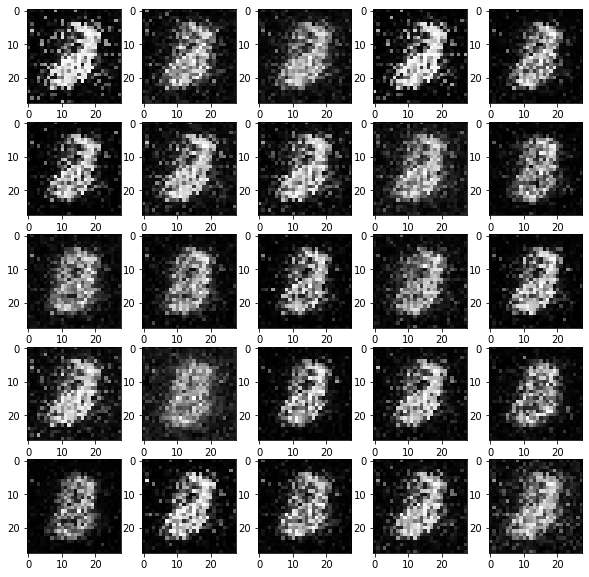

epochs 5


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 8ms/step


  0%|          | 1/273 [00:00<01:25,  3.19it/s]

4/4 [==============================] - 0s 8ms/step


  1%|          | 2/273 [00:00<01:21,  3.31it/s]

4/4 [==============================] - 0s 9ms/step


  1%|          | 3/273 [00:00<01:28,  3.07it/s]

4/4 [==============================] - 0s 10ms/step


  1%|▏         | 4/273 [00:01<01:23,  3.20it/s]

4/4 [==============================] - 0s 10ms/step


  2%|▏         | 5/273 [00:01<01:29,  3.01it/s]

4/4 [==============================] - 0s 13ms/step


  2%|▏         | 6/273 [00:01<01:25,  3.13it/s]

4/4 [==============================] - 0s 11ms/step


  3%|▎         | 7/273 [00:02<01:22,  3.24it/s]

4/4 [==============================] - 0s 8ms/step


  3%|▎         | 8/273 [00:02<01:20,  3.28it/s]

4/4 [==============================] - 0s 8ms/step


  3%|▎         | 9/273 [00:02<01:18,  3.34it/s]

4/4 [==============================] - 0s 8ms/step


  4%|▎         | 10/273 [00:03<01:18,  3.37it/s]

4/4 [==============================] - 0s 12ms/step


  4%|▍         | 11/273 [00:03<01:17,  3.39it/s]

4/4 [==============================] - 0s 8ms/step


  4%|▍         | 12/273 [00:03<01:17,  3.39it/s]

4/4 [==============================] - 0s 9ms/step


  5%|▍         | 13/273 [00:03<01:17,  3.37it/s]

4/4 [==============================] - 0s 8ms/step


  5%|▌         | 14/273 [00:04<01:15,  3.41it/s]

4/4 [==============================] - 0s 8ms/step


  5%|▌         | 15/273 [00:04<01:15,  3.40it/s]

4/4 [==============================] - 0s 12ms/step


  6%|▌         | 16/273 [00:04<01:15,  3.41it/s]

4/4 [==============================] - 0s 9ms/step


  6%|▌         | 17/273 [00:05<01:15,  3.41it/s]

4/4 [==============================] - 0s 8ms/step


  7%|▋         | 18/273 [00:05<01:14,  3.44it/s]

4/4 [==============================] - 0s 10ms/step


  7%|▋         | 19/273 [00:05<01:14,  3.43it/s]

4/4 [==============================] - 0s 9ms/step


  7%|▋         | 20/273 [00:06<01:14,  3.40it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 21/273 [00:06<01:13,  3.44it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 22/273 [00:06<01:13,  3.41it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 23/273 [00:06<01:13,  3.38it/s]

4/4 [==============================] - 0s 9ms/step


  9%|▉         | 24/273 [00:07<01:13,  3.40it/s]

4/4 [==============================] - 0s 8ms/step


  9%|▉         | 25/273 [00:07<01:13,  3.40it/s]

4/4 [==============================] - 0s 9ms/step


 10%|▉         | 26/273 [00:07<01:13,  3.35it/s]

4/4 [==============================] - 0s 9ms/step


 10%|▉         | 27/273 [00:08<01:18,  3.12it/s]

4/4 [==============================] - 0s 9ms/step


 10%|█         | 28/273 [00:08<01:16,  3.22it/s]

4/4 [==============================] - 0s 8ms/step


 11%|█         | 29/273 [00:08<01:13,  3.30it/s]

4/4 [==============================] - 0s 11ms/step


 11%|█         | 30/273 [00:09<01:13,  3.33it/s]

4/4 [==============================] - 0s 10ms/step


 11%|█▏        | 31/273 [00:09<01:12,  3.35it/s]

4/4 [==============================] - 0s 9ms/step


 12%|█▏        | 32/273 [00:09<01:12,  3.34it/s]

4/4 [==============================] - 0s 13ms/step


 12%|█▏        | 33/273 [00:09<01:11,  3.37it/s]

4/4 [==============================] - 0s 8ms/step


 12%|█▏        | 34/273 [00:10<01:10,  3.39it/s]

4/4 [==============================] - 0s 13ms/step


 13%|█▎        | 35/273 [00:10<01:09,  3.41it/s]

4/4 [==============================] - 0s 8ms/step


 13%|█▎        | 36/273 [00:10<01:09,  3.39it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▎        | 37/273 [00:11<01:09,  3.38it/s]

4/4 [==============================] - 0s 11ms/step


 14%|█▍        | 38/273 [00:11<01:08,  3.41it/s]

4/4 [==============================] - 0s 11ms/step


 14%|█▍        | 39/273 [00:11<01:08,  3.40it/s]

4/4 [==============================] - 0s 9ms/step


 15%|█▍        | 40/273 [00:11<01:08,  3.41it/s]

4/4 [==============================] - 0s 11ms/step


 15%|█▌        | 41/273 [00:12<01:09,  3.33it/s]

4/4 [==============================] - 0s 10ms/step


 15%|█▌        | 42/273 [00:12<01:09,  3.34it/s]

4/4 [==============================] - 0s 10ms/step


 16%|█▌        | 43/273 [00:12<01:09,  3.30it/s]

4/4 [==============================] - 0s 8ms/step


 16%|█▌        | 44/273 [00:13<01:08,  3.32it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▋        | 45/273 [00:13<01:07,  3.37it/s]

4/4 [==============================] - 0s 8ms/step


 17%|█▋        | 46/273 [00:13<01:06,  3.40it/s]

4/4 [==============================] - 0s 9ms/step


 17%|█▋        | 47/273 [00:14<01:05,  3.45it/s]

4/4 [==============================] - 0s 9ms/step


 18%|█▊        | 48/273 [00:14<01:11,  3.17it/s]

4/4 [==============================] - 0s 9ms/step


 18%|█▊        | 49/273 [00:14<01:09,  3.21it/s]

4/4 [==============================] - 0s 8ms/step


 18%|█▊        | 50/273 [00:14<01:07,  3.30it/s]

4/4 [==============================] - 0s 10ms/step


 19%|█▊        | 51/273 [00:15<01:06,  3.33it/s]

4/4 [==============================] - 0s 8ms/step


 19%|█▉        | 52/273 [00:15<01:05,  3.36it/s]

4/4 [==============================] - 0s 9ms/step


 19%|█▉        | 53/273 [00:15<01:05,  3.37it/s]

4/4 [==============================] - 0s 9ms/step


 20%|█▉        | 54/273 [00:16<01:04,  3.40it/s]

4/4 [==============================] - 0s 8ms/step


 20%|██        | 55/273 [00:16<01:04,  3.37it/s]

4/4 [==============================] - 0s 8ms/step


 21%|██        | 56/273 [00:16<01:03,  3.40it/s]

4/4 [==============================] - 0s 10ms/step


 21%|██        | 57/273 [00:17<01:02,  3.46it/s]

4/4 [==============================] - 0s 8ms/step


 21%|██        | 58/273 [00:17<01:02,  3.46it/s]

4/4 [==============================] - 0s 7ms/step


 22%|██▏       | 59/273 [00:17<01:02,  3.44it/s]

4/4 [==============================] - 0s 13ms/step


 22%|██▏       | 60/273 [00:17<01:02,  3.41it/s]

4/4 [==============================] - 0s 8ms/step


 22%|██▏       | 61/273 [00:18<01:01,  3.43it/s]

4/4 [==============================] - 0s 8ms/step


 23%|██▎       | 62/273 [00:18<01:02,  3.40it/s]

4/4 [==============================] - 0s 10ms/step


 23%|██▎       | 63/273 [00:18<01:01,  3.44it/s]

4/4 [==============================] - 0s 9ms/step


 23%|██▎       | 64/273 [00:19<01:01,  3.42it/s]

4/4 [==============================] - 0s 8ms/step


 24%|██▍       | 65/273 [00:19<01:08,  3.06it/s]

4/4 [==============================] - 0s 8ms/step


 24%|██▍       | 66/273 [00:19<01:15,  2.75it/s]

4/4 [==============================] - 0s 8ms/step


 25%|██▍       | 67/273 [00:20<01:18,  2.62it/s]

4/4 [==============================] - 0s 8ms/step


 25%|██▍       | 68/273 [00:20<01:25,  2.40it/s]

4/4 [==============================] - 0s 14ms/step


 25%|██▌       | 69/273 [00:21<01:28,  2.30it/s]

4/4 [==============================] - 0s 12ms/step


 26%|██▌       | 70/273 [00:21<01:30,  2.24it/s]

4/4 [==============================] - 0s 12ms/step


 26%|██▌       | 71/273 [00:22<01:29,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


 26%|██▋       | 72/273 [00:22<01:20,  2.49it/s]

4/4 [==============================] - 0s 8ms/step


 27%|██▋       | 73/273 [00:22<01:15,  2.63it/s]

4/4 [==============================] - 0s 8ms/step


 27%|██▋       | 74/273 [00:23<01:09,  2.88it/s]

4/4 [==============================] - 0s 10ms/step


 27%|██▋       | 75/273 [00:23<01:06,  2.96it/s]

4/4 [==============================] - 0s 8ms/step


 28%|██▊       | 76/273 [00:23<01:05,  3.03it/s]

4/4 [==============================] - 0s 13ms/step


 28%|██▊       | 77/273 [00:24<01:02,  3.13it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▊       | 78/273 [00:24<01:00,  3.24it/s]

4/4 [==============================] - 0s 11ms/step


 29%|██▉       | 79/273 [00:24<00:59,  3.27it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▉       | 80/273 [00:24<00:57,  3.35it/s]

4/4 [==============================] - 0s 12ms/step


 30%|██▉       | 81/273 [00:25<00:56,  3.41it/s]

4/4 [==============================] - 0s 14ms/step


 30%|███       | 82/273 [00:25<00:55,  3.43it/s]

4/4 [==============================] - 0s 11ms/step


 30%|███       | 83/273 [00:25<01:01,  3.10it/s]

4/4 [==============================] - 0s 10ms/step


 31%|███       | 84/273 [00:26<00:59,  3.20it/s]

4/4 [==============================] - 0s 10ms/step


 31%|███       | 85/273 [00:26<00:57,  3.26it/s]

4/4 [==============================] - 0s 15ms/step


 32%|███▏      | 86/273 [00:26<00:57,  3.24it/s]

4/4 [==============================] - 0s 8ms/step


 32%|███▏      | 87/273 [00:27<00:57,  3.24it/s]

4/4 [==============================] - 0s 7ms/step


 32%|███▏      | 88/273 [00:27<00:56,  3.30it/s]

4/4 [==============================] - 0s 7ms/step


 33%|███▎      | 89/273 [00:27<00:56,  3.28it/s]

4/4 [==============================] - 0s 7ms/step


 33%|███▎      | 90/273 [00:28<00:55,  3.30it/s]

4/4 [==============================] - 0s 7ms/step


 33%|███▎      | 91/273 [00:28<00:53,  3.37it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▎      | 92/273 [00:28<00:52,  3.44it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▍      | 93/273 [00:28<00:52,  3.40it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▍      | 94/273 [00:29<00:51,  3.47it/s]

4/4 [==============================] - 0s 11ms/step


 35%|███▍      | 95/273 [00:29<00:50,  3.50it/s]

4/4 [==============================] - 0s 9ms/step


 35%|███▌      | 96/273 [00:29<00:52,  3.38it/s]

4/4 [==============================] - 0s 12ms/step


 36%|███▌      | 97/273 [00:30<00:52,  3.37it/s]

4/4 [==============================] - 0s 8ms/step


 36%|███▌      | 98/273 [00:30<00:51,  3.42it/s]

4/4 [==============================] - 0s 10ms/step


 36%|███▋      | 99/273 [00:30<00:51,  3.41it/s]

4/4 [==============================] - 0s 11ms/step


 37%|███▋      | 100/273 [00:30<00:51,  3.35it/s]

4/4 [==============================] - 0s 8ms/step


 37%|███▋      | 101/273 [00:31<00:52,  3.31it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 102/273 [00:31<00:50,  3.38it/s]

4/4 [==============================] - 0s 12ms/step


 38%|███▊      | 103/273 [00:31<00:50,  3.35it/s]

4/4 [==============================] - 0s 9ms/step


 38%|███▊      | 104/273 [00:32<00:50,  3.36it/s]

4/4 [==============================] - 0s 12ms/step


 38%|███▊      | 105/273 [00:32<00:49,  3.36it/s]

4/4 [==============================] - 0s 7ms/step


 39%|███▉      | 106/273 [00:32<00:50,  3.33it/s]

4/4 [==============================] - 0s 8ms/step


 39%|███▉      | 107/273 [00:33<00:49,  3.34it/s]

4/4 [==============================] - 0s 9ms/step


 40%|███▉      | 108/273 [00:33<00:50,  3.28it/s]

4/4 [==============================] - 0s 8ms/step


 40%|███▉      | 109/273 [00:33<00:49,  3.32it/s]

4/4 [==============================] - 0s 9ms/step


 40%|████      | 110/273 [00:33<00:48,  3.36it/s]

4/4 [==============================] - 0s 8ms/step


 41%|████      | 111/273 [00:34<00:48,  3.37it/s]

4/4 [==============================] - 0s 7ms/step


 41%|████      | 112/273 [00:34<00:47,  3.39it/s]

4/4 [==============================] - 0s 9ms/step


 41%|████▏     | 113/273 [00:34<00:47,  3.38it/s]

4/4 [==============================] - 0s 9ms/step


 42%|████▏     | 114/273 [00:35<00:46,  3.39it/s]

4/4 [==============================] - 0s 12ms/step


 42%|████▏     | 115/273 [00:35<00:46,  3.41it/s]

4/4 [==============================] - 0s 11ms/step


 42%|████▏     | 116/273 [00:35<00:46,  3.37it/s]

4/4 [==============================] - 0s 13ms/step


 43%|████▎     | 117/273 [00:36<00:47,  3.30it/s]

4/4 [==============================] - 0s 9ms/step


 43%|████▎     | 118/273 [00:36<00:46,  3.35it/s]

4/4 [==============================] - 0s 11ms/step


 44%|████▎     | 119/273 [00:36<00:45,  3.36it/s]

4/4 [==============================] - 0s 8ms/step


 44%|████▍     | 120/273 [00:36<00:45,  3.34it/s]

4/4 [==============================] - 0s 8ms/step


 44%|████▍     | 121/273 [00:37<00:44,  3.39it/s]

4/4 [==============================] - 0s 9ms/step


 45%|████▍     | 122/273 [00:37<00:44,  3.41it/s]

4/4 [==============================] - 0s 11ms/step


 45%|████▌     | 123/273 [00:37<00:43,  3.44it/s]

4/4 [==============================] - 0s 10ms/step


 45%|████▌     | 124/273 [00:38<00:43,  3.42it/s]

4/4 [==============================] - 0s 9ms/step


 46%|████▌     | 125/273 [00:38<00:42,  3.45it/s]

4/4 [==============================] - 0s 11ms/step


 46%|████▌     | 126/273 [00:38<00:42,  3.47it/s]

4/4 [==============================] - 0s 8ms/step


 47%|████▋     | 127/273 [00:38<00:42,  3.40it/s]

4/4 [==============================] - 0s 8ms/step


 47%|████▋     | 128/273 [00:39<00:42,  3.44it/s]

4/4 [==============================] - 0s 8ms/step


 47%|████▋     | 129/273 [00:39<00:55,  2.61it/s]

4/4 [==============================] - 0s 8ms/step


 48%|████▊     | 130/273 [00:40<00:52,  2.74it/s]

4/4 [==============================] - 0s 8ms/step


 48%|████▊     | 131/273 [00:40<00:48,  2.91it/s]

4/4 [==============================] - 0s 12ms/step


 48%|████▊     | 132/273 [00:40<00:46,  3.05it/s]

4/4 [==============================] - 0s 8ms/step


 49%|████▊     | 133/273 [00:41<00:44,  3.12it/s]

4/4 [==============================] - 0s 10ms/step


 49%|████▉     | 134/273 [00:41<00:43,  3.19it/s]

4/4 [==============================] - 0s 9ms/step


 49%|████▉     | 135/273 [00:41<00:42,  3.23it/s]

4/4 [==============================] - 0s 10ms/step


 50%|████▉     | 136/273 [00:41<00:41,  3.30it/s]

4/4 [==============================] - 0s 11ms/step


 50%|█████     | 137/273 [00:42<00:40,  3.32it/s]

4/4 [==============================] - 0s 8ms/step


 51%|█████     | 138/273 [00:42<00:40,  3.33it/s]

4/4 [==============================] - 0s 12ms/step


 51%|█████     | 139/273 [00:42<00:40,  3.30it/s]

4/4 [==============================] - 0s 9ms/step


 51%|█████▏    | 140/273 [00:43<00:43,  3.07it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 141/273 [00:43<00:41,  3.16it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 142/273 [00:43<00:41,  3.18it/s]

4/4 [==============================] - 0s 10ms/step


 52%|█████▏    | 143/273 [00:44<00:40,  3.20it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 144/273 [00:44<00:39,  3.27it/s]

4/4 [==============================] - 0s 8ms/step


 53%|█████▎    | 145/273 [00:44<00:38,  3.35it/s]

4/4 [==============================] - 0s 8ms/step


 53%|█████▎    | 146/273 [00:44<00:37,  3.38it/s]

4/4 [==============================] - 0s 13ms/step


 54%|█████▍    | 147/273 [00:45<00:37,  3.34it/s]

4/4 [==============================] - 0s 8ms/step


 54%|█████▍    | 148/273 [00:45<00:36,  3.41it/s]

4/4 [==============================] - 0s 10ms/step


 55%|█████▍    | 149/273 [00:45<00:36,  3.36it/s]

4/4 [==============================] - 0s 8ms/step


 55%|█████▍    | 150/273 [00:46<00:36,  3.37it/s]

4/4 [==============================] - 0s 10ms/step


 55%|█████▌    | 151/273 [00:46<00:36,  3.38it/s]

4/4 [==============================] - 0s 7ms/step


 56%|█████▌    | 152/273 [00:46<00:35,  3.41it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▌    | 153/273 [00:47<00:34,  3.46it/s]

4/4 [==============================] - 0s 10ms/step


 56%|█████▋    | 154/273 [00:47<00:35,  3.37it/s]

4/4 [==============================] - 0s 12ms/step


 57%|█████▋    | 155/273 [00:47<00:35,  3.33it/s]

4/4 [==============================] - 0s 8ms/step


 57%|█████▋    | 156/273 [00:47<00:34,  3.38it/s]

4/4 [==============================] - 0s 9ms/step


 58%|█████▊    | 157/273 [00:48<00:34,  3.37it/s]

4/4 [==============================] - 0s 9ms/step


 58%|█████▊    | 158/273 [00:48<00:34,  3.33it/s]

4/4 [==============================] - 0s 11ms/step


 58%|█████▊    | 159/273 [00:48<00:34,  3.32it/s]

4/4 [==============================] - 0s 13ms/step


 59%|█████▊    | 160/273 [00:49<00:33,  3.35it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▉    | 161/273 [00:49<00:34,  3.25it/s]

4/4 [==============================] - 0s 15ms/step


 59%|█████▉    | 162/273 [00:49<00:33,  3.29it/s]

4/4 [==============================] - 0s 10ms/step


 60%|█████▉    | 163/273 [00:50<00:33,  3.31it/s]

4/4 [==============================] - 0s 10ms/step


 60%|██████    | 164/273 [00:50<00:33,  3.27it/s]

4/4 [==============================] - 0s 14ms/step


 60%|██████    | 165/273 [00:50<00:32,  3.30it/s]

4/4 [==============================] - 0s 8ms/step


 61%|██████    | 166/273 [00:50<00:31,  3.36it/s]

4/4 [==============================] - 0s 11ms/step


 61%|██████    | 167/273 [00:51<00:31,  3.40it/s]

4/4 [==============================] - 0s 9ms/step


 62%|██████▏   | 168/273 [00:51<00:31,  3.32it/s]

4/4 [==============================] - 0s 7ms/step


 62%|██████▏   | 169/273 [00:51<00:31,  3.32it/s]

4/4 [==============================] - 0s 9ms/step


 62%|██████▏   | 170/273 [00:52<00:30,  3.35it/s]

4/4 [==============================] - 0s 13ms/step


 63%|██████▎   | 171/273 [00:52<00:30,  3.32it/s]

4/4 [==============================] - 0s 8ms/step


 63%|██████▎   | 172/273 [00:52<00:30,  3.36it/s]

4/4 [==============================] - 0s 9ms/step


 63%|██████▎   | 173/273 [00:53<00:29,  3.38it/s]

4/4 [==============================] - 0s 10ms/step


 64%|██████▎   | 174/273 [00:53<00:29,  3.36it/s]

4/4 [==============================] - 0s 12ms/step


 64%|██████▍   | 175/273 [00:53<00:29,  3.36it/s]

4/4 [==============================] - 0s 8ms/step


 64%|██████▍   | 176/273 [00:53<00:28,  3.38it/s]

4/4 [==============================] - 0s 8ms/step


 65%|██████▍   | 177/273 [00:54<00:28,  3.37it/s]

4/4 [==============================] - 0s 9ms/step


 65%|██████▌   | 178/273 [00:54<00:29,  3.25it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▌   | 179/273 [00:54<00:28,  3.28it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▌   | 180/273 [00:55<00:28,  3.29it/s]

4/4 [==============================] - 0s 8ms/step


 66%|██████▋   | 181/273 [00:55<00:27,  3.31it/s]

4/4 [==============================] - 0s 7ms/step


 67%|██████▋   | 182/273 [00:55<00:27,  3.34it/s]

4/4 [==============================] - 0s 13ms/step


 67%|██████▋   | 183/273 [00:56<00:27,  3.30it/s]

4/4 [==============================] - 0s 10ms/step


 67%|██████▋   | 184/273 [00:56<00:26,  3.34it/s]

4/4 [==============================] - 0s 9ms/step


 68%|██████▊   | 185/273 [00:56<00:26,  3.30it/s]

4/4 [==============================] - 0s 12ms/step


 68%|██████▊   | 186/273 [00:56<00:25,  3.36it/s]

4/4 [==============================] - 0s 9ms/step


 68%|██████▊   | 187/273 [00:57<00:25,  3.37it/s]

4/4 [==============================] - 0s 9ms/step


 69%|██████▉   | 188/273 [00:57<00:25,  3.33it/s]

4/4 [==============================] - 0s 7ms/step


 69%|██████▉   | 189/273 [00:57<00:24,  3.37it/s]

4/4 [==============================] - 0s 8ms/step


 70%|██████▉   | 190/273 [00:58<00:24,  3.37it/s]

4/4 [==============================] - 0s 9ms/step


 70%|██████▉   | 191/273 [00:58<00:24,  3.37it/s]

4/4 [==============================] - 0s 9ms/step


 70%|███████   | 192/273 [00:58<00:24,  3.31it/s]

4/4 [==============================] - 0s 8ms/step


 71%|███████   | 193/273 [00:59<00:23,  3.36it/s]

4/4 [==============================] - 0s 8ms/step


 71%|███████   | 194/273 [00:59<00:23,  3.39it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████▏  | 195/273 [00:59<00:23,  3.35it/s]

4/4 [==============================] - 0s 8ms/step


 72%|███████▏  | 196/273 [00:59<00:22,  3.39it/s]

4/4 [==============================] - 0s 7ms/step


 72%|███████▏  | 197/273 [01:00<00:22,  3.42it/s]

4/4 [==============================] - 0s 9ms/step


 73%|███████▎  | 198/273 [01:00<00:22,  3.39it/s]

4/4 [==============================] - 0s 8ms/step


 73%|███████▎  | 199/273 [01:00<00:21,  3.42it/s]

4/4 [==============================] - 0s 10ms/step


 73%|███████▎  | 200/273 [01:01<00:21,  3.44it/s]

4/4 [==============================] - 0s 10ms/step


 74%|███████▎  | 201/273 [01:01<00:20,  3.44it/s]

4/4 [==============================] - 0s 10ms/step


 74%|███████▍  | 202/273 [01:01<00:21,  3.34it/s]

4/4 [==============================] - 0s 8ms/step


 74%|███████▍  | 203/273 [01:01<00:20,  3.36it/s]

4/4 [==============================] - 0s 9ms/step


 75%|███████▍  | 204/273 [01:02<00:20,  3.38it/s]

4/4 [==============================] - 0s 10ms/step


 75%|███████▌  | 205/273 [01:02<00:20,  3.37it/s]

4/4 [==============================] - 0s 8ms/step


 75%|███████▌  | 206/273 [01:02<00:20,  3.34it/s]

4/4 [==============================] - 0s 10ms/step


 76%|███████▌  | 207/273 [01:03<00:19,  3.35it/s]

4/4 [==============================] - 0s 9ms/step


 76%|███████▌  | 208/273 [01:03<00:19,  3.38it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 209/273 [01:03<00:19,  3.33it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 210/273 [01:04<00:18,  3.36it/s]

4/4 [==============================] - 0s 8ms/step


 77%|███████▋  | 211/273 [01:04<00:18,  3.39it/s]

4/4 [==============================] - 0s 11ms/step


 78%|███████▊  | 212/273 [01:04<00:18,  3.38it/s]

4/4 [==============================] - 0s 10ms/step


 78%|███████▊  | 213/273 [01:04<00:18,  3.31it/s]

4/4 [==============================] - 0s 8ms/step


 78%|███████▊  | 214/273 [01:05<00:18,  3.26it/s]

4/4 [==============================] - 0s 11ms/step


 79%|███████▉  | 215/273 [01:05<00:17,  3.28it/s]

4/4 [==============================] - 0s 9ms/step


 79%|███████▉  | 216/273 [01:05<00:17,  3.30it/s]

4/4 [==============================] - 0s 8ms/step


 79%|███████▉  | 217/273 [01:06<00:16,  3.31it/s]

4/4 [==============================] - 0s 9ms/step


 80%|███████▉  | 218/273 [01:06<00:16,  3.32it/s]

4/4 [==============================] - 0s 11ms/step


 80%|████████  | 219/273 [01:06<00:16,  3.35it/s]

4/4 [==============================] - 0s 14ms/step


 81%|████████  | 220/273 [01:07<00:15,  3.32it/s]

4/4 [==============================] - 0s 9ms/step


 81%|████████  | 221/273 [01:07<00:15,  3.37it/s]

4/4 [==============================] - 0s 10ms/step


 81%|████████▏ | 222/273 [01:07<00:15,  3.34it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 223/273 [01:07<00:14,  3.33it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 224/273 [01:08<00:14,  3.37it/s]

4/4 [==============================] - 0s 8ms/step


 82%|████████▏ | 225/273 [01:08<00:14,  3.38it/s]

4/4 [==============================] - 0s 9ms/step


 83%|████████▎ | 226/273 [01:08<00:13,  3.39it/s]

4/4 [==============================] - 0s 9ms/step


 83%|████████▎ | 227/273 [01:09<00:13,  3.36it/s]

4/4 [==============================] - 0s 8ms/step


 84%|████████▎ | 228/273 [01:09<00:13,  3.38it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▍ | 229/273 [01:09<00:12,  3.39it/s]

4/4 [==============================] - 0s 8ms/step


 84%|████████▍ | 230/273 [01:10<00:12,  3.40it/s]

4/4 [==============================] - 0s 9ms/step


 85%|████████▍ | 231/273 [01:10<00:12,  3.35it/s]

4/4 [==============================] - 0s 8ms/step


 85%|████████▍ | 232/273 [01:10<00:12,  3.36it/s]

4/4 [==============================] - 0s 11ms/step


 85%|████████▌ | 233/273 [01:10<00:11,  3.34it/s]

4/4 [==============================] - 0s 8ms/step


 86%|████████▌ | 234/273 [01:11<00:11,  3.34it/s]

4/4 [==============================] - 0s 10ms/step


 86%|████████▌ | 235/273 [01:11<00:11,  3.37it/s]

4/4 [==============================] - 0s 10ms/step


 86%|████████▋ | 236/273 [01:11<00:11,  3.32it/s]

4/4 [==============================] - 0s 9ms/step


 87%|████████▋ | 237/273 [01:12<00:10,  3.29it/s]

4/4 [==============================] - 0s 9ms/step


 87%|████████▋ | 238/273 [01:12<00:10,  3.29it/s]

4/4 [==============================] - 0s 10ms/step


 88%|████████▊ | 239/273 [01:12<00:10,  3.29it/s]

4/4 [==============================] - 0s 9ms/step


 88%|████████▊ | 240/273 [01:13<00:10,  3.26it/s]

4/4 [==============================] - 0s 10ms/step


 88%|████████▊ | 241/273 [01:13<00:10,  3.03it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▊ | 242/273 [01:13<00:09,  3.13it/s]

4/4 [==============================] - 0s 14ms/step


 89%|████████▉ | 243/273 [01:14<00:09,  3.20it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▉ | 244/273 [01:14<00:09,  3.19it/s]

4/4 [==============================] - 0s 12ms/step


 90%|████████▉ | 245/273 [01:14<00:08,  3.24it/s]

4/4 [==============================] - 0s 8ms/step


 90%|█████████ | 246/273 [01:14<00:08,  3.29it/s]

4/4 [==============================] - 0s 8ms/step


 90%|█████████ | 247/273 [01:15<00:07,  3.33it/s]

4/4 [==============================] - 0s 9ms/step


 91%|█████████ | 248/273 [01:15<00:07,  3.33it/s]

4/4 [==============================] - 0s 9ms/step


 91%|█████████ | 249/273 [01:15<00:07,  3.26it/s]

4/4 [==============================] - 0s 9ms/step


 92%|█████████▏| 250/273 [01:16<00:07,  3.26it/s]

4/4 [==============================] - 0s 9ms/step


 92%|█████████▏| 251/273 [01:16<00:06,  3.27it/s]

4/4 [==============================] - 0s 9ms/step


 92%|█████████▏| 252/273 [01:16<00:06,  3.29it/s]

4/4 [==============================] - 0s 12ms/step


 93%|█████████▎| 253/273 [01:17<00:06,  3.30it/s]

4/4 [==============================] - 0s 15ms/step


 93%|█████████▎| 254/273 [01:17<00:05,  3.25it/s]

4/4 [==============================] - 0s 10ms/step


 93%|█████████▎| 255/273 [01:17<00:05,  3.30it/s]

4/4 [==============================] - 0s 9ms/step


 94%|█████████▍| 256/273 [01:17<00:05,  3.30it/s]

4/4 [==============================] - 0s 8ms/step


 94%|█████████▍| 257/273 [01:18<00:04,  3.28it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▍| 258/273 [01:18<00:04,  3.32it/s]

4/4 [==============================] - 0s 6ms/step


 95%|█████████▍| 259/273 [01:18<00:04,  3.35it/s]

4/4 [==============================] - 0s 8ms/step


 95%|█████████▌| 260/273 [01:19<00:03,  3.40it/s]

4/4 [==============================] - 0s 10ms/step


 96%|█████████▌| 261/273 [01:19<00:03,  3.18it/s]

4/4 [==============================] - 0s 10ms/step


 96%|█████████▌| 262/273 [01:19<00:03,  3.25it/s]

4/4 [==============================] - 0s 11ms/step


 96%|█████████▋| 263/273 [01:20<00:03,  3.29it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 264/273 [01:20<00:02,  3.27it/s]

4/4 [==============================] - 0s 10ms/step


 97%|█████████▋| 265/273 [01:20<00:02,  3.29it/s]

4/4 [==============================] - 0s 8ms/step


 97%|█████████▋| 266/273 [01:21<00:02,  3.28it/s]

4/4 [==============================] - 0s 8ms/step


 98%|█████████▊| 267/273 [01:21<00:01,  3.26it/s]

4/4 [==============================] - 0s 8ms/step


 98%|█████████▊| 268/273 [01:21<00:01,  3.32it/s]

4/4 [==============================] - 0s 12ms/step


 99%|█████████▊| 269/273 [01:21<00:01,  3.33it/s]

4/4 [==============================] - 0s 8ms/step


 99%|█████████▉| 270/273 [01:22<00:00,  3.36it/s]

4/4 [==============================] - 0s 10ms/step


 99%|█████████▉| 271/273 [01:22<00:00,  3.29it/s]

4/4 [==============================] - 0s 9ms/step


100%|█████████▉| 272/273 [01:22<00:00,  3.31it/s]

4/4 [==============================] - 0s 10ms/step


100%|██████████| 273/273 [01:23<00:00,  3.28it/s]


loss is 0.036460213363170624 |*| 1.8550556898117065
1/1 [==============================] - 0s 28ms/step


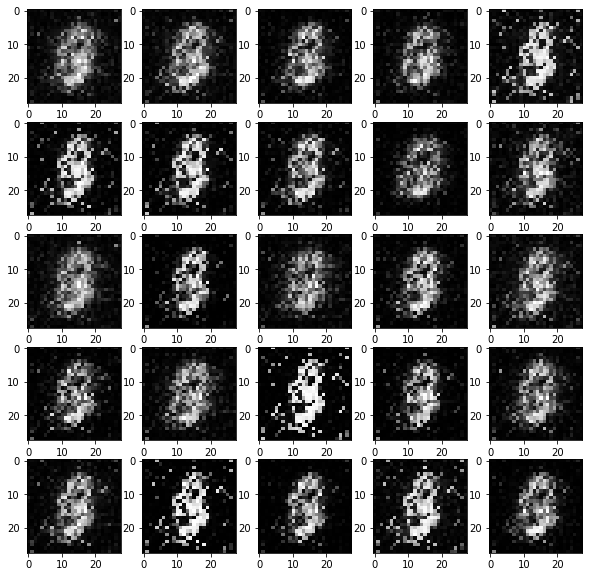

epochs 6


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 9ms/step


  0%|          | 1/273 [00:00<01:28,  3.07it/s]

4/4 [==============================] - 0s 7ms/step


  1%|          | 2/273 [00:00<01:23,  3.23it/s]

4/4 [==============================] - 0s 8ms/step


  1%|          | 3/273 [00:00<01:21,  3.32it/s]

4/4 [==============================] - 0s 9ms/step


  1%|▏         | 4/273 [00:01<01:21,  3.32it/s]

4/4 [==============================] - 0s 8ms/step


  2%|▏         | 5/273 [00:01<01:19,  3.37it/s]

4/4 [==============================] - 0s 7ms/step


  2%|▏         | 6/273 [00:01<01:19,  3.36it/s]

4/4 [==============================] - 0s 12ms/step


  3%|▎         | 7/273 [00:02<01:19,  3.35it/s]

4/4 [==============================] - 0s 8ms/step


  3%|▎         | 8/273 [00:02<01:19,  3.35it/s]

4/4 [==============================] - 0s 11ms/step


  3%|▎         | 9/273 [00:02<01:19,  3.33it/s]

4/4 [==============================] - 0s 8ms/step


  4%|▎         | 10/273 [00:03<01:18,  3.34it/s]

4/4 [==============================] - 0s 8ms/step


  4%|▍         | 11/273 [00:03<01:18,  3.35it/s]

4/4 [==============================] - 0s 9ms/step


  4%|▍         | 12/273 [00:03<01:18,  3.31it/s]

4/4 [==============================] - 0s 10ms/step


  5%|▍         | 13/273 [00:03<01:19,  3.28it/s]

4/4 [==============================] - 0s 8ms/step


  5%|▌         | 14/273 [00:04<01:17,  3.32it/s]

4/4 [==============================] - 0s 9ms/step


  5%|▌         | 15/273 [00:04<01:17,  3.35it/s]

4/4 [==============================] - 0s 10ms/step


  6%|▌         | 16/273 [00:04<01:16,  3.35it/s]

4/4 [==============================] - 0s 9ms/step


  6%|▌         | 17/273 [00:05<01:17,  3.32it/s]

4/4 [==============================] - 0s 9ms/step


  7%|▋         | 18/273 [00:05<01:16,  3.34it/s]

4/4 [==============================] - 0s 9ms/step


  7%|▋         | 19/273 [00:05<01:15,  3.35it/s]

4/4 [==============================] - 0s 11ms/step


  7%|▋         | 20/273 [00:06<01:16,  3.31it/s]

4/4 [==============================] - 0s 11ms/step


  8%|▊         | 21/273 [00:06<01:15,  3.35it/s]

4/4 [==============================] - 0s 11ms/step


  8%|▊         | 22/273 [00:06<01:14,  3.37it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 23/273 [00:06<01:14,  3.34it/s]

4/4 [==============================] - 0s 9ms/step


  9%|▉         | 24/273 [00:07<01:13,  3.36it/s]

4/4 [==============================] - 0s 8ms/step


  9%|▉         | 25/273 [00:07<01:12,  3.41it/s]

4/4 [==============================] - 0s 14ms/step


 10%|▉         | 26/273 [00:07<01:14,  3.32it/s]

4/4 [==============================] - 0s 10ms/step


 10%|▉         | 27/273 [00:08<01:13,  3.34it/s]

4/4 [==============================] - 0s 9ms/step


 10%|█         | 28/273 [00:08<01:13,  3.34it/s]

4/4 [==============================] - 0s 8ms/step


 11%|█         | 29/273 [00:08<01:11,  3.39it/s]

4/4 [==============================] - 0s 8ms/step


 11%|█         | 30/273 [00:08<01:11,  3.38it/s]

4/4 [==============================] - 0s 8ms/step


 11%|█▏        | 31/273 [00:09<01:11,  3.37it/s]

4/4 [==============================] - 0s 8ms/step


 12%|█▏        | 32/273 [00:09<01:14,  3.25it/s]

4/4 [==============================] - 0s 12ms/step


 12%|█▏        | 33/273 [00:09<01:14,  3.21it/s]

4/4 [==============================] - 0s 9ms/step


 12%|█▏        | 34/273 [00:10<01:13,  3.27it/s]

4/4 [==============================] - 0s 9ms/step


 13%|█▎        | 35/273 [00:10<01:11,  3.31it/s]

4/4 [==============================] - 0s 10ms/step


 13%|█▎        | 36/273 [00:10<01:11,  3.30it/s]

4/4 [==============================] - 0s 10ms/step


 14%|█▎        | 37/273 [00:11<01:11,  3.28it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▍        | 38/273 [00:11<01:10,  3.32it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▍        | 39/273 [00:11<01:10,  3.34it/s]

4/4 [==============================] - 0s 9ms/step


 15%|█▍        | 40/273 [00:12<01:09,  3.34it/s]

4/4 [==============================] - 0s 9ms/step


 15%|█▌        | 41/273 [00:12<01:09,  3.32it/s]

4/4 [==============================] - 0s 10ms/step


 15%|█▌        | 42/273 [00:12<01:09,  3.32it/s]

4/4 [==============================] - 0s 13ms/step


 16%|█▌        | 43/273 [00:12<01:10,  3.25it/s]

4/4 [==============================] - 0s 8ms/step


 16%|█▌        | 44/273 [00:13<01:09,  3.31it/s]

4/4 [==============================] - 0s 7ms/step


 16%|█▋        | 45/273 [00:13<01:08,  3.34it/s]

4/4 [==============================] - 0s 11ms/step


 17%|█▋        | 46/273 [00:13<01:08,  3.30it/s]

4/4 [==============================] - 0s 9ms/step


 17%|█▋        | 47/273 [00:14<01:09,  3.23it/s]

4/4 [==============================] - 0s 10ms/step


 18%|█▊        | 48/273 [00:14<01:09,  3.24it/s]

4/4 [==============================] - 0s 8ms/step


 18%|█▊        | 49/273 [00:14<01:08,  3.26it/s]

4/4 [==============================] - 0s 10ms/step


 18%|█▊        | 50/273 [00:15<01:09,  3.21it/s]

4/4 [==============================] - 0s 9ms/step


 19%|█▊        | 51/273 [00:15<01:08,  3.25it/s]

4/4 [==============================] - 0s 10ms/step


 19%|█▉        | 52/273 [00:15<01:07,  3.27it/s]

4/4 [==============================] - 0s 8ms/step


 19%|█▉        | 53/273 [00:16<01:07,  3.26it/s]

4/4 [==============================] - 0s 9ms/step


 20%|█▉        | 54/273 [00:16<01:06,  3.30it/s]

4/4 [==============================] - 0s 9ms/step


 20%|██        | 55/273 [00:16<01:05,  3.31it/s]

4/4 [==============================] - 0s 8ms/step


 21%|██        | 56/273 [00:16<01:04,  3.34it/s]

4/4 [==============================] - 0s 7ms/step


 21%|██        | 57/273 [00:17<01:04,  3.33it/s]

4/4 [==============================] - 0s 8ms/step


 21%|██        | 58/273 [00:17<01:03,  3.40it/s]

4/4 [==============================] - 0s 8ms/step


 22%|██▏       | 59/273 [00:17<01:02,  3.40it/s]

4/4 [==============================] - 0s 7ms/step


 22%|██▏       | 60/273 [00:18<01:02,  3.39it/s]

4/4 [==============================] - 0s 9ms/step


 22%|██▏       | 61/273 [00:18<01:03,  3.34it/s]

4/4 [==============================] - 0s 10ms/step


 23%|██▎       | 62/273 [00:18<01:02,  3.36it/s]

4/4 [==============================] - 0s 9ms/step


 23%|██▎       | 63/273 [00:18<01:02,  3.38it/s]

4/4 [==============================] - 0s 8ms/step


 23%|██▎       | 64/273 [00:19<01:03,  3.27it/s]

4/4 [==============================] - 0s 8ms/step


 24%|██▍       | 65/273 [00:19<01:02,  3.31it/s]

4/4 [==============================] - 0s 12ms/step


 24%|██▍       | 66/273 [00:19<01:02,  3.30it/s]

4/4 [==============================] - 0s 8ms/step


 25%|██▍       | 67/273 [00:20<01:04,  3.19it/s]

4/4 [==============================] - 0s 8ms/step


 25%|██▍       | 68/273 [00:20<01:03,  3.25it/s]

4/4 [==============================] - 0s 11ms/step


 25%|██▌       | 69/273 [00:20<01:02,  3.29it/s]

4/4 [==============================] - 0s 11ms/step


 26%|██▌       | 70/273 [00:21<01:02,  3.24it/s]

4/4 [==============================] - 0s 11ms/step


 26%|██▌       | 71/273 [00:21<01:03,  3.18it/s]

4/4 [==============================] - 0s 12ms/step


 26%|██▋       | 72/273 [00:21<01:02,  3.24it/s]

4/4 [==============================] - 0s 10ms/step


 27%|██▋       | 73/273 [00:22<01:01,  3.26it/s]

4/4 [==============================] - 0s 10ms/step


 27%|██▋       | 74/273 [00:22<01:01,  3.23it/s]

4/4 [==============================] - 0s 10ms/step


 27%|██▋       | 75/273 [00:22<01:01,  3.24it/s]

4/4 [==============================] - 0s 9ms/step


 28%|██▊       | 76/273 [00:22<01:00,  3.25it/s]

4/4 [==============================] - 0s 12ms/step


 28%|██▊       | 77/273 [00:23<01:00,  3.23it/s]

4/4 [==============================] - 0s 12ms/step


 29%|██▊       | 78/273 [00:23<01:00,  3.23it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▉       | 79/273 [00:23<00:59,  3.27it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▉       | 80/273 [00:24<00:58,  3.31it/s]

4/4 [==============================] - 0s 8ms/step


 30%|██▉       | 81/273 [00:24<00:58,  3.29it/s]

4/4 [==============================] - 0s 9ms/step


 30%|███       | 82/273 [00:24<00:57,  3.34it/s]

4/4 [==============================] - 0s 12ms/step


 30%|███       | 83/273 [00:25<00:57,  3.33it/s]

4/4 [==============================] - 0s 7ms/step


 31%|███       | 84/273 [00:25<00:57,  3.31it/s]

4/4 [==============================] - 0s 8ms/step


 31%|███       | 85/273 [00:25<00:56,  3.32it/s]

4/4 [==============================] - 0s 10ms/step


 32%|███▏      | 86/273 [00:26<00:56,  3.31it/s]

4/4 [==============================] - 0s 11ms/step


 32%|███▏      | 87/273 [00:26<00:56,  3.31it/s]

4/4 [==============================] - 0s 8ms/step


 32%|███▏      | 88/273 [00:26<00:55,  3.31it/s]

4/4 [==============================] - 0s 7ms/step


 33%|███▎      | 89/273 [00:26<00:54,  3.35it/s]

4/4 [==============================] - 0s 9ms/step


 33%|███▎      | 90/273 [00:27<00:54,  3.36it/s]

4/4 [==============================] - 0s 9ms/step


 33%|███▎      | 91/273 [00:27<00:55,  3.31it/s]

4/4 [==============================] - 0s 19ms/step


 34%|███▎      | 92/273 [00:27<00:55,  3.24it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▍      | 93/273 [00:28<00:54,  3.28it/s]

4/4 [==============================] - 0s 10ms/step


 34%|███▍      | 94/273 [00:28<00:54,  3.27it/s]

4/4 [==============================] - 0s 9ms/step


 35%|███▍      | 95/273 [00:28<00:54,  3.29it/s]

4/4 [==============================] - 0s 8ms/step


 35%|███▌      | 96/273 [00:29<00:53,  3.31it/s]

4/4 [==============================] - 0s 10ms/step


 36%|███▌      | 97/273 [00:29<00:53,  3.28it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▌      | 98/273 [00:29<00:53,  3.28it/s]

4/4 [==============================] - 0s 8ms/step


 36%|███▋      | 99/273 [00:29<00:52,  3.32it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 100/273 [00:30<00:51,  3.36it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 101/273 [00:30<00:52,  3.29it/s]

4/4 [==============================] - 0s 8ms/step


 37%|███▋      | 102/273 [00:30<00:52,  3.28it/s]

4/4 [==============================] - 0s 8ms/step


 38%|███▊      | 103/273 [00:31<00:51,  3.31it/s]

4/4 [==============================] - 0s 11ms/step


 38%|███▊      | 104/273 [00:31<00:51,  3.30it/s]

4/4 [==============================] - 0s 9ms/step


 38%|███▊      | 105/273 [00:31<00:51,  3.27it/s]

4/4 [==============================] - 0s 9ms/step


 39%|███▉      | 106/273 [00:32<00:51,  3.27it/s]

4/4 [==============================] - 0s 10ms/step


 39%|███▉      | 107/273 [00:32<00:50,  3.28it/s]

4/4 [==============================] - 0s 10ms/step


 40%|███▉      | 108/273 [00:32<00:50,  3.26it/s]

4/4 [==============================] - 0s 12ms/step


 40%|███▉      | 109/273 [00:33<00:50,  3.27it/s]

4/4 [==============================] - 0s 8ms/step


 40%|████      | 110/273 [00:33<00:49,  3.29it/s]

4/4 [==============================] - 0s 11ms/step


 41%|████      | 111/273 [00:33<00:50,  3.20it/s]

4/4 [==============================] - 0s 8ms/step


 41%|████      | 112/273 [00:33<00:50,  3.21it/s]

4/4 [==============================] - 0s 8ms/step


 41%|████▏     | 113/273 [00:34<00:49,  3.25it/s]

4/4 [==============================] - 0s 8ms/step


 42%|████▏     | 114/273 [00:34<00:48,  3.26it/s]

4/4 [==============================] - 0s 11ms/step


 42%|████▏     | 115/273 [00:35<00:55,  2.84it/s]

4/4 [==============================] - 0s 8ms/step


 42%|████▏     | 116/273 [00:35<01:01,  2.54it/s]

4/4 [==============================] - 0s 10ms/step


 43%|████▎     | 117/273 [00:35<01:06,  2.36it/s]

4/4 [==============================] - 0s 13ms/step


 43%|████▎     | 118/273 [00:36<01:06,  2.33it/s]

4/4 [==============================] - 0s 13ms/step


 44%|████▎     | 119/273 [00:36<01:09,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 44%|████▍     | 120/273 [00:37<01:09,  2.19it/s]

4/4 [==============================] - 0s 12ms/step


 44%|████▍     | 121/273 [00:37<01:09,  2.17it/s]

4/4 [==============================] - 0s 10ms/step


 45%|████▍     | 122/273 [00:38<01:02,  2.43it/s]

4/4 [==============================] - 0s 12ms/step


 45%|████▌     | 123/273 [00:38<00:57,  2.63it/s]

4/4 [==============================] - 0s 9ms/step


 45%|████▌     | 124/273 [00:38<00:53,  2.80it/s]

4/4 [==============================] - 0s 8ms/step


 46%|████▌     | 125/273 [00:39<00:50,  2.92it/s]

4/4 [==============================] - 0s 9ms/step


 46%|████▌     | 126/273 [00:39<00:48,  3.03it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 127/273 [00:39<00:47,  3.06it/s]

4/4 [==============================] - 0s 8ms/step


 47%|████▋     | 128/273 [00:40<00:46,  3.10it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 129/273 [00:40<00:45,  3.17it/s]

4/4 [==============================] - 0s 10ms/step


 48%|████▊     | 130/273 [00:40<00:45,  3.13it/s]

4/4 [==============================] - 0s 9ms/step


 48%|████▊     | 131/273 [00:40<00:45,  3.14it/s]

4/4 [==============================] - 0s 14ms/step


 48%|████▊     | 132/273 [00:41<00:46,  3.05it/s]

4/4 [==============================] - 0s 8ms/step


 49%|████▊     | 133/273 [00:41<00:45,  3.08it/s]

4/4 [==============================] - 0s 9ms/step


 49%|████▉     | 134/273 [00:41<00:44,  3.10it/s]

4/4 [==============================] - 0s 11ms/step


 49%|████▉     | 135/273 [00:42<00:43,  3.17it/s]

4/4 [==============================] - 0s 9ms/step


 50%|████▉     | 136/273 [00:42<00:43,  3.16it/s]

4/4 [==============================] - 0s 10ms/step


 50%|█████     | 137/273 [00:42<00:43,  3.11it/s]

4/4 [==============================] - 0s 8ms/step


 51%|█████     | 138/273 [00:43<00:42,  3.16it/s]

4/4 [==============================] - 0s 11ms/step


 51%|█████     | 139/273 [00:43<00:44,  3.01it/s]

4/4 [==============================] - 0s 10ms/step


 51%|█████▏    | 140/273 [00:43<00:43,  3.08it/s]

4/4 [==============================] - 0s 11ms/step


 52%|█████▏    | 141/273 [00:44<00:42,  3.11it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 142/273 [00:44<00:42,  3.12it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 143/273 [00:44<00:41,  3.15it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 144/273 [00:45<00:43,  2.97it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 145/273 [00:45<00:42,  3.05it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 146/273 [00:45<00:40,  3.10it/s]

4/4 [==============================] - 0s 9ms/step


 54%|█████▍    | 147/273 [00:46<00:40,  3.09it/s]

4/4 [==============================] - 0s 8ms/step


 54%|█████▍    | 148/273 [00:46<00:39,  3.15it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▍    | 149/273 [00:46<00:39,  3.13it/s]

4/4 [==============================] - 0s 11ms/step


 55%|█████▍    | 150/273 [00:47<00:38,  3.16it/s]

4/4 [==============================] - 0s 10ms/step


 55%|█████▌    | 151/273 [00:47<00:38,  3.19it/s]

4/4 [==============================] - 0s 10ms/step


 56%|█████▌    | 152/273 [00:47<00:37,  3.25it/s]

4/4 [==============================] - 0s 12ms/step


 56%|█████▌    | 153/273 [00:47<00:36,  3.25it/s]

4/4 [==============================] - 0s 10ms/step


 56%|█████▋    | 154/273 [00:48<00:36,  3.23it/s]

4/4 [==============================] - 0s 9ms/step


 57%|█████▋    | 155/273 [00:48<00:36,  3.22it/s]

4/4 [==============================] - 0s 10ms/step


 57%|█████▋    | 156/273 [00:48<00:36,  3.25it/s]

4/4 [==============================] - 0s 9ms/step


 58%|█████▊    | 157/273 [00:49<00:35,  3.26it/s]

4/4 [==============================] - 0s 8ms/step


 58%|█████▊    | 158/273 [00:49<00:35,  3.23it/s]

4/4 [==============================] - 0s 12ms/step


 58%|█████▊    | 159/273 [00:49<00:35,  3.24it/s]

4/4 [==============================] - 0s 10ms/step


 59%|█████▊    | 160/273 [00:50<00:35,  3.22it/s]

4/4 [==============================] - 0s 8ms/step


 59%|█████▉    | 161/273 [00:50<00:35,  3.20it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▉    | 162/273 [00:50<00:34,  3.23it/s]

4/4 [==============================] - 0s 10ms/step


 60%|█████▉    | 163/273 [00:51<00:33,  3.26it/s]

4/4 [==============================] - 0s 12ms/step


 60%|██████    | 164/273 [00:51<00:33,  3.26it/s]

4/4 [==============================] - 0s 12ms/step


 60%|██████    | 165/273 [00:51<00:32,  3.28it/s]

4/4 [==============================] - 0s 9ms/step


 61%|██████    | 166/273 [00:52<00:34,  3.08it/s]

4/4 [==============================] - 0s 11ms/step


 61%|██████    | 167/273 [00:52<00:34,  3.05it/s]

4/4 [==============================] - 0s 7ms/step


 62%|██████▏   | 168/273 [00:52<00:33,  3.16it/s]

4/4 [==============================] - 0s 10ms/step


 62%|██████▏   | 169/273 [00:52<00:32,  3.22it/s]

4/4 [==============================] - 0s 10ms/step


 62%|██████▏   | 170/273 [00:53<00:31,  3.25it/s]

4/4 [==============================] - 0s 10ms/step


 63%|██████▎   | 171/273 [00:53<00:31,  3.21it/s]

4/4 [==============================] - 0s 9ms/step


 63%|██████▎   | 172/273 [00:53<00:30,  3.27it/s]

4/4 [==============================] - 0s 8ms/step


 63%|██████▎   | 173/273 [00:54<00:30,  3.29it/s]

4/4 [==============================] - 0s 8ms/step


 64%|██████▎   | 174/273 [00:54<00:30,  3.28it/s]

4/4 [==============================] - 0s 10ms/step


 64%|██████▍   | 175/273 [00:54<00:30,  3.25it/s]

4/4 [==============================] - 0s 10ms/step


 64%|██████▍   | 176/273 [00:55<00:29,  3.30it/s]

4/4 [==============================] - 0s 8ms/step


 65%|██████▍   | 177/273 [00:55<00:29,  3.26it/s]

4/4 [==============================] - 0s 9ms/step


 65%|██████▌   | 178/273 [00:55<00:29,  3.27it/s]

4/4 [==============================] - 0s 12ms/step


 66%|██████▌   | 179/273 [00:56<00:28,  3.26it/s]

4/4 [==============================] - 0s 10ms/step


 66%|██████▌   | 180/273 [00:56<00:28,  3.25it/s]

4/4 [==============================] - 0s 12ms/step


 66%|██████▋   | 181/273 [00:56<00:28,  3.21it/s]

4/4 [==============================] - 0s 9ms/step


 67%|██████▋   | 182/273 [00:56<00:28,  3.23it/s]

4/4 [==============================] - 0s 11ms/step


 67%|██████▋   | 183/273 [00:57<00:27,  3.28it/s]

4/4 [==============================] - 0s 11ms/step


 67%|██████▋   | 184/273 [00:57<00:29,  3.01it/s]

4/4 [==============================] - 0s 9ms/step


 68%|██████▊   | 185/273 [00:57<00:28,  3.06it/s]

4/4 [==============================] - 0s 10ms/step


 68%|██████▊   | 186/273 [00:58<00:27,  3.14it/s]

4/4 [==============================] - 0s 11ms/step


 68%|██████▊   | 187/273 [00:58<00:27,  3.15it/s]

4/4 [==============================] - 0s 7ms/step


 69%|██████▉   | 188/273 [00:58<00:26,  3.15it/s]

4/4 [==============================] - 0s 20ms/step


 69%|██████▉   | 189/273 [00:59<00:27,  3.09it/s]

4/4 [==============================] - 0s 9ms/step


 70%|██████▉   | 190/273 [00:59<00:26,  3.11it/s]

4/4 [==============================] - 0s 9ms/step


 70%|██████▉   | 191/273 [00:59<00:25,  3.18it/s]

4/4 [==============================] - 0s 11ms/step


 70%|███████   | 192/273 [01:00<00:25,  3.15it/s]

4/4 [==============================] - 0s 11ms/step


 71%|███████   | 193/273 [01:00<00:25,  3.14it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████   | 194/273 [01:00<00:25,  3.15it/s]

4/4 [==============================] - 0s 11ms/step


 71%|███████▏  | 195/273 [01:01<00:24,  3.16it/s]

4/4 [==============================] - 0s 8ms/step


 72%|███████▏  | 196/273 [01:01<00:23,  3.23it/s]

4/4 [==============================] - 0s 10ms/step


 72%|███████▏  | 197/273 [01:01<00:23,  3.21it/s]

4/4 [==============================] - 0s 11ms/step


 73%|███████▎  | 198/273 [01:02<00:23,  3.24it/s]

4/4 [==============================] - 0s 10ms/step


 73%|███████▎  | 199/273 [01:02<00:22,  3.28it/s]

4/4 [==============================] - 0s 8ms/step


 73%|███████▎  | 200/273 [01:02<00:24,  3.01it/s]

4/4 [==============================] - 0s 8ms/step


 74%|███████▎  | 201/273 [01:03<00:23,  3.10it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▍  | 202/273 [01:03<00:22,  3.14it/s]

4/4 [==============================] - 0s 10ms/step


 74%|███████▍  | 203/273 [01:03<00:22,  3.10it/s]

4/4 [==============================] - 0s 11ms/step


 75%|███████▍  | 204/273 [01:03<00:21,  3.14it/s]

4/4 [==============================] - 0s 10ms/step


 75%|███████▌  | 205/273 [01:04<00:21,  3.18it/s]

4/4 [==============================] - 0s 10ms/step


 75%|███████▌  | 206/273 [01:04<00:20,  3.24it/s]

4/4 [==============================] - 0s 10ms/step


 76%|███████▌  | 207/273 [01:04<00:20,  3.15it/s]

4/4 [==============================] - 0s 8ms/step


 76%|███████▌  | 208/273 [01:05<00:20,  3.20it/s]

4/4 [==============================] - 0s 10ms/step


 77%|███████▋  | 209/273 [01:05<00:19,  3.21it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 210/273 [01:05<00:20,  3.12it/s]

4/4 [==============================] - 0s 8ms/step


 77%|███████▋  | 211/273 [01:06<00:19,  3.15it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 212/273 [01:06<00:19,  3.14it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 213/273 [01:06<00:19,  3.15it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 214/273 [01:07<00:19,  2.96it/s]

4/4 [==============================] - 0s 9ms/step


 79%|███████▉  | 215/273 [01:07<00:20,  2.83it/s]

4/4 [==============================] - 0s 10ms/step


 79%|███████▉  | 216/273 [01:07<00:19,  2.93it/s]

4/4 [==============================] - 0s 10ms/step


 79%|███████▉  | 217/273 [01:08<00:18,  3.00it/s]

4/4 [==============================] - 0s 9ms/step


 80%|███████▉  | 218/273 [01:08<00:17,  3.08it/s]

4/4 [==============================] - 0s 11ms/step


 80%|████████  | 219/273 [01:08<00:17,  3.08it/s]

4/4 [==============================] - 0s 9ms/step


 81%|████████  | 220/273 [01:09<00:16,  3.13it/s]

4/4 [==============================] - 0s 9ms/step


 81%|████████  | 221/273 [01:09<00:16,  3.17it/s]

4/4 [==============================] - 0s 9ms/step


 81%|████████▏ | 222/273 [01:09<00:15,  3.20it/s]

4/4 [==============================] - 0s 10ms/step


 82%|████████▏ | 223/273 [01:10<00:15,  3.17it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 224/273 [01:10<00:15,  3.16it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 225/273 [01:10<00:14,  3.20it/s]

4/4 [==============================] - 0s 13ms/step


 83%|████████▎ | 226/273 [01:11<00:14,  3.15it/s]

4/4 [==============================] - 0s 11ms/step


 83%|████████▎ | 227/273 [01:11<00:14,  3.16it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▎ | 228/273 [01:11<00:13,  3.23it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▍ | 229/273 [01:11<00:13,  3.24it/s]

4/4 [==============================] - 0s 8ms/step


 84%|████████▍ | 230/273 [01:12<00:13,  3.25it/s]

4/4 [==============================] - 0s 10ms/step


 85%|████████▍ | 231/273 [01:12<00:12,  3.27it/s]

4/4 [==============================] - 0s 9ms/step


 85%|████████▍ | 232/273 [01:12<00:12,  3.28it/s]

4/4 [==============================] - 0s 8ms/step


 85%|████████▌ | 233/273 [01:13<00:12,  3.20it/s]

4/4 [==============================] - 0s 8ms/step


 86%|████████▌ | 234/273 [01:13<00:12,  3.13it/s]

4/4 [==============================] - 0s 10ms/step


 86%|████████▌ | 235/273 [01:13<00:11,  3.20it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▋ | 236/273 [01:14<00:11,  3.16it/s]

4/4 [==============================] - 0s 15ms/step


 87%|████████▋ | 237/273 [01:14<00:11,  3.15it/s]

4/4 [==============================] - 0s 9ms/step


 87%|████████▋ | 238/273 [01:14<00:11,  3.17it/s]

4/4 [==============================] - 0s 10ms/step


 88%|████████▊ | 239/273 [01:15<00:10,  3.16it/s]

4/4 [==============================] - 0s 10ms/step


 88%|████████▊ | 240/273 [01:15<00:10,  3.15it/s]

4/4 [==============================] - 0s 10ms/step


 88%|████████▊ | 241/273 [01:15<00:10,  3.18it/s]

4/4 [==============================] - 0s 10ms/step


 89%|████████▊ | 242/273 [01:16<00:09,  3.18it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▉ | 243/273 [01:16<00:09,  3.19it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▉ | 244/273 [01:16<00:09,  3.20it/s]

4/4 [==============================] - 0s 10ms/step


 90%|████████▉ | 245/273 [01:16<00:08,  3.22it/s]

4/4 [==============================] - 0s 12ms/step


 90%|█████████ | 246/273 [01:17<00:08,  3.16it/s]

4/4 [==============================] - 0s 9ms/step


 90%|█████████ | 247/273 [01:17<00:08,  3.21it/s]

4/4 [==============================] - 0s 10ms/step


 91%|█████████ | 248/273 [01:17<00:07,  3.23it/s]

4/4 [==============================] - 0s 9ms/step


 91%|█████████ | 249/273 [01:18<00:07,  3.02it/s]

4/4 [==============================] - 0s 10ms/step


 92%|█████████▏| 250/273 [01:18<00:07,  3.05it/s]

4/4 [==============================] - 0s 12ms/step


 92%|█████████▏| 251/273 [01:18<00:07,  3.14it/s]

4/4 [==============================] - 0s 9ms/step


 92%|█████████▏| 252/273 [01:19<00:06,  3.15it/s]

4/4 [==============================] - 0s 8ms/step


 93%|█████████▎| 253/273 [01:19<00:06,  3.18it/s]

4/4 [==============================] - 0s 9ms/step


 93%|█████████▎| 254/273 [01:19<00:05,  3.21it/s]

4/4 [==============================] - 0s 10ms/step


 93%|█████████▎| 255/273 [01:20<00:05,  3.19it/s]

4/4 [==============================] - 0s 9ms/step


 94%|█████████▍| 256/273 [01:20<00:05,  3.21it/s]

4/4 [==============================] - 0s 9ms/step


 94%|█████████▍| 257/273 [01:20<00:04,  3.26it/s]

4/4 [==============================] - 0s 11ms/step


 95%|█████████▍| 258/273 [01:21<00:04,  3.28it/s]

4/4 [==============================] - 0s 10ms/step


 95%|█████████▍| 259/273 [01:21<00:04,  3.22it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▌| 260/273 [01:21<00:04,  3.15it/s]

4/4 [==============================] - 0s 9ms/step


 96%|█████████▌| 261/273 [01:22<00:03,  3.21it/s]

4/4 [==============================] - 0s 11ms/step


 96%|█████████▌| 262/273 [01:22<00:03,  3.19it/s]

4/4 [==============================] - 0s 8ms/step


 96%|█████████▋| 263/273 [01:22<00:03,  3.10it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 264/273 [01:23<00:03,  2.64it/s]

4/4 [==============================] - 0s 15ms/step


 97%|█████████▋| 265/273 [01:23<00:03,  2.39it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 266/273 [01:24<00:03,  2.31it/s]

4/4 [==============================] - 0s 12ms/step


 98%|█████████▊| 267/273 [01:24<00:02,  2.19it/s]

4/4 [==============================] - 0s 11ms/step


 98%|█████████▊| 268/273 [01:25<00:02,  2.18it/s]

4/4 [==============================] - 0s 13ms/step


 99%|█████████▊| 269/273 [01:25<00:01,  2.10it/s]

4/4 [==============================] - 0s 16ms/step


 99%|█████████▉| 270/273 [01:26<00:01,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 99%|█████████▉| 271/273 [01:26<00:00,  2.45it/s]

4/4 [==============================] - 0s 15ms/step


100%|█████████▉| 272/273 [01:26<00:00,  2.59it/s]

4/4 [==============================] - 0s 11ms/step


100%|██████████| 273/273 [01:27<00:00,  3.14it/s]


loss is 0.06378275901079178 |*| 1.101644515991211
1/1 [==============================] - 0s 29ms/step


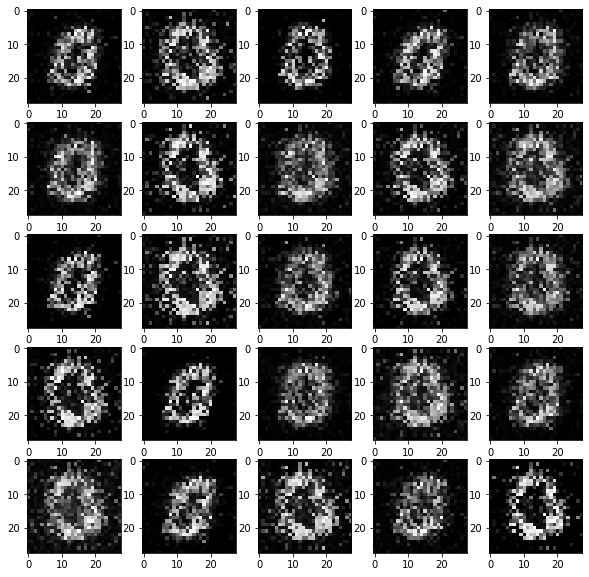

epochs 7


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 13ms/step


  0%|          | 1/273 [00:00<01:43,  2.62it/s]

4/4 [==============================] - 0s 8ms/step


  1%|          | 2/273 [00:00<01:30,  2.99it/s]

4/4 [==============================] - 0s 9ms/step


  1%|          | 3/273 [00:00<01:26,  3.11it/s]

4/4 [==============================] - 0s 9ms/step


  1%|▏         | 4/273 [00:01<01:34,  2.86it/s]

4/4 [==============================] - 0s 11ms/step


  2%|▏         | 5/273 [00:01<01:28,  3.02it/s]

4/4 [==============================] - 0s 9ms/step


  2%|▏         | 6/273 [00:01<01:26,  3.09it/s]

4/4 [==============================] - 0s 11ms/step


  3%|▎         | 7/273 [00:02<01:27,  3.06it/s]

4/4 [==============================] - 0s 8ms/step


  3%|▎         | 8/273 [00:02<01:32,  2.85it/s]

4/4 [==============================] - 0s 11ms/step


  3%|▎         | 9/273 [00:03<01:29,  2.96it/s]

4/4 [==============================] - 0s 11ms/step


  4%|▎         | 10/273 [00:03<01:26,  3.03it/s]

4/4 [==============================] - 0s 10ms/step


  4%|▍         | 11/273 [00:03<01:25,  3.06it/s]

4/4 [==============================] - 0s 10ms/step


  4%|▍         | 12/273 [00:03<01:23,  3.12it/s]

4/4 [==============================] - 0s 11ms/step


  5%|▍         | 13/273 [00:04<01:23,  3.12it/s]

4/4 [==============================] - 0s 9ms/step


  5%|▌         | 14/273 [00:04<01:23,  3.10it/s]

4/4 [==============================] - 0s 11ms/step


  5%|▌         | 15/273 [00:04<01:22,  3.14it/s]

4/4 [==============================] - 0s 11ms/step


  6%|▌         | 16/273 [00:05<01:21,  3.14it/s]

4/4 [==============================] - 0s 8ms/step


  6%|▌         | 17/273 [00:05<01:27,  2.93it/s]

4/4 [==============================] - 0s 8ms/step


  7%|▋         | 18/273 [00:05<01:24,  3.03it/s]

4/4 [==============================] - 0s 10ms/step


  7%|▋         | 19/273 [00:06<01:22,  3.10it/s]

4/4 [==============================] - 0s 10ms/step


  7%|▋         | 20/273 [00:06<01:21,  3.10it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 21/273 [00:06<01:19,  3.16it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 22/273 [00:07<01:19,  3.15it/s]

4/4 [==============================] - 0s 10ms/step


  8%|▊         | 23/273 [00:07<01:19,  3.14it/s]

4/4 [==============================] - 0s 9ms/step


  9%|▉         | 24/273 [00:07<01:18,  3.17it/s]

4/4 [==============================] - 0s 9ms/step


  9%|▉         | 25/273 [00:08<01:17,  3.18it/s]

4/4 [==============================] - 0s 8ms/step


 10%|▉         | 26/273 [00:08<01:18,  3.17it/s]

4/4 [==============================] - 0s 11ms/step


 10%|▉         | 27/273 [00:08<01:17,  3.16it/s]

4/4 [==============================] - 0s 10ms/step


 10%|█         | 28/273 [00:09<01:16,  3.18it/s]

4/4 [==============================] - 0s 9ms/step


 11%|█         | 29/273 [00:09<01:16,  3.21it/s]

4/4 [==============================] - 0s 10ms/step


 11%|█         | 30/273 [00:09<01:16,  3.19it/s]

4/4 [==============================] - 0s 8ms/step


 11%|█▏        | 31/273 [00:10<01:15,  3.19it/s]

4/4 [==============================] - 0s 12ms/step


 12%|█▏        | 32/273 [00:10<01:17,  3.09it/s]

4/4 [==============================] - 0s 9ms/step


 12%|█▏        | 33/273 [00:10<01:17,  3.10it/s]

4/4 [==============================] - 0s 8ms/step


 12%|█▏        | 34/273 [00:11<01:17,  3.08it/s]

4/4 [==============================] - 0s 12ms/step


 13%|█▎        | 35/273 [00:11<01:17,  3.06it/s]

4/4 [==============================] - 0s 9ms/step


 13%|█▎        | 36/273 [00:11<01:17,  3.08it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▎        | 37/273 [00:11<01:16,  3.10it/s]

4/4 [==============================] - 0s 10ms/step


 14%|█▍        | 38/273 [00:12<01:14,  3.15it/s]

4/4 [==============================] - 0s 11ms/step


 14%|█▍        | 39/273 [00:12<01:14,  3.12it/s]

4/4 [==============================] - 0s 8ms/step


 15%|█▍        | 40/273 [00:12<01:13,  3.16it/s]

4/4 [==============================] - 0s 9ms/step


 15%|█▌        | 41/273 [00:13<01:14,  3.12it/s]

4/4 [==============================] - 0s 11ms/step


 15%|█▌        | 42/273 [00:13<01:15,  3.07it/s]

4/4 [==============================] - 0s 8ms/step


 16%|█▌        | 43/273 [00:13<01:14,  3.07it/s]

4/4 [==============================] - 0s 8ms/step


 16%|█▌        | 44/273 [00:14<01:13,  3.10it/s]

4/4 [==============================] - 0s 8ms/step


 16%|█▋        | 45/273 [00:14<01:13,  3.12it/s]

4/4 [==============================] - 0s 10ms/step


 17%|█▋        | 46/273 [00:14<01:12,  3.13it/s]

4/4 [==============================] - 0s 10ms/step


 17%|█▋        | 47/273 [00:15<01:12,  3.14it/s]

4/4 [==============================] - 0s 10ms/step


 18%|█▊        | 48/273 [00:15<01:12,  3.12it/s]

4/4 [==============================] - 0s 10ms/step


 18%|█▊        | 49/273 [00:15<01:11,  3.14it/s]

4/4 [==============================] - 0s 10ms/step


 18%|█▊        | 50/273 [00:16<01:11,  3.13it/s]

4/4 [==============================] - 0s 10ms/step


 19%|█▊        | 51/273 [00:16<01:11,  3.12it/s]

4/4 [==============================] - 0s 9ms/step


 19%|█▉        | 52/273 [00:16<01:11,  3.10it/s]

4/4 [==============================] - 0s 8ms/step


 19%|█▉        | 53/273 [00:17<01:13,  3.00it/s]

4/4 [==============================] - 0s 9ms/step


 20%|█▉        | 54/273 [00:17<01:11,  3.06it/s]

4/4 [==============================] - 0s 12ms/step


 20%|██        | 55/273 [00:17<01:10,  3.08it/s]

4/4 [==============================] - 0s 10ms/step


 21%|██        | 56/273 [00:18<01:10,  3.07it/s]

4/4 [==============================] - 0s 11ms/step


 21%|██        | 57/273 [00:18<01:09,  3.10it/s]

4/4 [==============================] - 0s 10ms/step


 21%|██        | 58/273 [00:18<01:08,  3.12it/s]

4/4 [==============================] - 0s 9ms/step


 22%|██▏       | 59/273 [00:19<01:08,  3.12it/s]

4/4 [==============================] - 0s 11ms/step


 22%|██▏       | 60/273 [00:19<01:08,  3.13it/s]

4/4 [==============================] - 0s 9ms/step


 22%|██▏       | 61/273 [00:19<01:07,  3.16it/s]

4/4 [==============================] - 0s 10ms/step


 23%|██▎       | 62/273 [00:20<01:08,  3.10it/s]

4/4 [==============================] - 0s 9ms/step


 23%|██▎       | 63/273 [00:20<01:07,  3.11it/s]

4/4 [==============================] - 0s 8ms/step


 23%|██▎       | 64/273 [00:20<01:07,  3.10it/s]

4/4 [==============================] - 0s 9ms/step


 24%|██▍       | 65/273 [00:20<01:07,  3.10it/s]

4/4 [==============================] - 0s 9ms/step


 24%|██▍       | 66/273 [00:21<01:10,  2.94it/s]

4/4 [==============================] - 0s 8ms/step


 25%|██▍       | 67/273 [00:21<01:08,  3.02it/s]

4/4 [==============================] - 0s 12ms/step


 25%|██▍       | 68/273 [00:22<01:11,  2.86it/s]

4/4 [==============================] - 0s 9ms/step


 25%|██▌       | 69/273 [00:22<01:09,  2.96it/s]

4/4 [==============================] - 0s 9ms/step


 26%|██▌       | 70/273 [00:22<01:07,  3.02it/s]

4/4 [==============================] - 0s 8ms/step


 26%|██▌       | 71/273 [00:23<01:06,  3.04it/s]

4/4 [==============================] - 0s 10ms/step


 26%|██▋       | 72/273 [00:23<01:05,  3.09it/s]

4/4 [==============================] - 0s 10ms/step


 27%|██▋       | 73/273 [00:23<01:04,  3.10it/s]

4/4 [==============================] - 0s 12ms/step


 27%|██▋       | 74/273 [00:24<01:05,  3.04it/s]

4/4 [==============================] - 0s 9ms/step


 27%|██▋       | 75/273 [00:24<01:04,  3.05it/s]

4/4 [==============================] - 0s 10ms/step


 28%|██▊       | 76/273 [00:24<01:04,  3.07it/s]

4/4 [==============================] - 0s 9ms/step


 28%|██▊       | 77/273 [00:24<01:03,  3.07it/s]

4/4 [==============================] - 0s 11ms/step


 29%|██▊       | 78/273 [00:25<01:03,  3.05it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▉       | 79/273 [00:25<01:02,  3.09it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▉       | 80/273 [00:25<01:02,  3.10it/s]

4/4 [==============================] - 0s 13ms/step


 30%|██▉       | 81/273 [00:26<01:01,  3.13it/s]

4/4 [==============================] - 0s 11ms/step


 30%|███       | 82/273 [00:26<01:01,  3.11it/s]

4/4 [==============================] - 0s 10ms/step


 30%|███       | 83/273 [00:26<01:01,  3.09it/s]

4/4 [==============================] - 0s 10ms/step


 31%|███       | 84/273 [00:27<01:01,  3.06it/s]

4/4 [==============================] - 0s 10ms/step


 31%|███       | 85/273 [00:27<01:01,  3.07it/s]

4/4 [==============================] - 0s 8ms/step


 32%|███▏      | 86/273 [00:27<01:00,  3.11it/s]

4/4 [==============================] - 0s 10ms/step


 32%|███▏      | 87/273 [00:28<01:03,  2.91it/s]

4/4 [==============================] - 0s 9ms/step


 32%|███▏      | 88/273 [00:28<01:01,  3.00it/s]

4/4 [==============================] - 0s 9ms/step


 33%|███▎      | 89/273 [00:28<01:00,  3.04it/s]

4/4 [==============================] - 0s 12ms/step


 33%|███▎      | 90/273 [00:29<01:03,  2.86it/s]

4/4 [==============================] - 0s 9ms/step


 33%|███▎      | 91/273 [00:29<01:01,  2.97it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▎      | 92/273 [00:29<00:59,  3.02it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▍      | 93/273 [00:30<00:59,  3.03it/s]

4/4 [==============================] - 0s 8ms/step


 34%|███▍      | 94/273 [00:30<00:57,  3.09it/s]

4/4 [==============================] - 0s 9ms/step


 35%|███▍      | 95/273 [00:30<01:00,  2.96it/s]

4/4 [==============================] - 0s 10ms/step


 35%|███▌      | 96/273 [00:31<00:59,  2.99it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▌      | 97/273 [00:31<00:57,  3.04it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▌      | 98/273 [00:31<00:57,  3.06it/s]

4/4 [==============================] - 0s 10ms/step


 36%|███▋      | 99/273 [00:32<00:56,  3.05it/s]

4/4 [==============================] - 0s 7ms/step


 37%|███▋      | 100/273 [00:32<00:55,  3.10it/s]

4/4 [==============================] - 0s 8ms/step


 37%|███▋      | 101/273 [00:32<00:54,  3.13it/s]

4/4 [==============================] - 0s 8ms/step


 37%|███▋      | 102/273 [00:33<00:54,  3.15it/s]

4/4 [==============================] - 0s 12ms/step


 38%|███▊      | 103/273 [00:33<00:53,  3.16it/s]

4/4 [==============================] - 0s 10ms/step


 38%|███▊      | 104/273 [00:33<00:52,  3.19it/s]

4/4 [==============================] - 0s 9ms/step


 38%|███▊      | 105/273 [00:34<00:52,  3.18it/s]

4/4 [==============================] - 0s 12ms/step


 39%|███▉      | 106/273 [00:34<00:54,  3.05it/s]

4/4 [==============================] - 0s 13ms/step


 39%|███▉      | 107/273 [00:34<00:54,  3.04it/s]

4/4 [==============================] - 0s 12ms/step


 40%|███▉      | 108/273 [00:35<00:54,  3.05it/s]

4/4 [==============================] - 0s 9ms/step


 40%|███▉      | 109/273 [00:35<00:53,  3.04it/s]

4/4 [==============================] - 0s 10ms/step


 40%|████      | 110/273 [00:35<00:52,  3.08it/s]

4/4 [==============================] - 0s 10ms/step


 41%|████      | 111/273 [00:36<00:52,  3.09it/s]

4/4 [==============================] - 0s 9ms/step


 41%|████      | 112/273 [00:36<00:52,  3.10it/s]

4/4 [==============================] - 0s 9ms/step


 41%|████▏     | 113/273 [00:36<00:50,  3.14it/s]

4/4 [==============================] - 0s 9ms/step


 42%|████▏     | 114/273 [00:37<00:50,  3.16it/s]

4/4 [==============================] - 0s 12ms/step


 42%|████▏     | 115/273 [00:37<00:50,  3.10it/s]

4/4 [==============================] - 0s 10ms/step


 42%|████▏     | 116/273 [00:37<00:49,  3.15it/s]

4/4 [==============================] - 0s 10ms/step


 43%|████▎     | 117/273 [00:37<00:49,  3.15it/s]

4/4 [==============================] - 0s 13ms/step


 43%|████▎     | 118/273 [00:38<00:49,  3.14it/s]

4/4 [==============================] - 0s 14ms/step


 44%|████▎     | 119/273 [00:38<00:48,  3.15it/s]

4/4 [==============================] - 0s 13ms/step


 44%|████▍     | 120/273 [00:38<00:48,  3.14it/s]

4/4 [==============================] - 0s 11ms/step


 44%|████▍     | 121/273 [00:39<00:48,  3.15it/s]

4/4 [==============================] - 0s 11ms/step


 45%|████▍     | 122/273 [00:39<00:48,  3.11it/s]

4/4 [==============================] - 0s 12ms/step


 45%|████▌     | 123/273 [00:39<00:47,  3.15it/s]

4/4 [==============================] - 0s 11ms/step


 45%|████▌     | 124/273 [00:40<00:47,  3.15it/s]

4/4 [==============================] - 0s 9ms/step


 46%|████▌     | 125/273 [00:40<00:46,  3.17it/s]

4/4 [==============================] - 0s 9ms/step


 46%|████▌     | 126/273 [00:40<00:46,  3.17it/s]

4/4 [==============================] - 0s 8ms/step


 47%|████▋     | 127/273 [00:41<00:46,  3.13it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 128/273 [00:41<00:46,  3.12it/s]

4/4 [==============================] - 0s 8ms/step


 47%|████▋     | 129/273 [00:41<00:45,  3.14it/s]

4/4 [==============================] - 0s 10ms/step


 48%|████▊     | 130/273 [00:42<00:45,  3.14it/s]

4/4 [==============================] - 0s 9ms/step


 48%|████▊     | 131/273 [00:42<00:44,  3.20it/s]

4/4 [==============================] - 0s 13ms/step


 48%|████▊     | 132/273 [00:42<00:44,  3.16it/s]

4/4 [==============================] - 0s 9ms/step


 49%|████▊     | 133/273 [00:43<00:43,  3.18it/s]

4/4 [==============================] - 0s 13ms/step


 49%|████▉     | 134/273 [00:43<00:43,  3.17it/s]

4/4 [==============================] - 0s 10ms/step


 49%|████▉     | 135/273 [00:43<00:43,  3.17it/s]

4/4 [==============================] - 0s 10ms/step


 50%|████▉     | 136/273 [00:44<00:43,  3.15it/s]

4/4 [==============================] - 0s 9ms/step


 50%|█████     | 137/273 [00:44<00:43,  3.16it/s]

4/4 [==============================] - 0s 10ms/step


 51%|█████     | 138/273 [00:44<00:43,  3.13it/s]

4/4 [==============================] - 0s 10ms/step


 51%|█████     | 139/273 [00:44<00:42,  3.13it/s]

4/4 [==============================] - 0s 15ms/step


 51%|█████▏    | 140/273 [00:45<00:43,  3.05it/s]

4/4 [==============================] - 0s 11ms/step


 52%|█████▏    | 141/273 [00:45<00:42,  3.08it/s]

4/4 [==============================] - 0s 8ms/step


 52%|█████▏    | 142/273 [00:45<00:42,  3.12it/s]

4/4 [==============================] - 0s 10ms/step


 52%|█████▏    | 143/273 [00:46<00:41,  3.12it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 144/273 [00:46<00:41,  3.14it/s]

4/4 [==============================] - 0s 8ms/step


 53%|█████▎    | 145/273 [00:46<00:40,  3.14it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 146/273 [00:47<00:40,  3.11it/s]

4/4 [==============================] - 0s 10ms/step


 54%|█████▍    | 147/273 [00:47<00:40,  3.13it/s]

4/4 [==============================] - 0s 13ms/step


 54%|█████▍    | 148/273 [00:47<00:40,  3.10it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▍    | 149/273 [00:48<00:39,  3.10it/s]

4/4 [==============================] - 0s 11ms/step


 55%|█████▍    | 150/273 [00:48<00:39,  3.13it/s]

4/4 [==============================] - 0s 12ms/step


 55%|█████▌    | 151/273 [00:48<00:38,  3.14it/s]

4/4 [==============================] - 0s 11ms/step


 56%|█████▌    | 152/273 [00:49<00:38,  3.15it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▌    | 153/273 [00:49<00:37,  3.17it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▋    | 154/273 [00:49<00:38,  3.12it/s]

4/4 [==============================] - 0s 10ms/step


 57%|█████▋    | 155/273 [00:50<00:37,  3.11it/s]

4/4 [==============================] - 0s 9ms/step


 57%|█████▋    | 156/273 [00:50<00:37,  3.16it/s]

4/4 [==============================] - 0s 9ms/step


 58%|█████▊    | 157/273 [00:50<00:36,  3.21it/s]

4/4 [==============================] - 0s 12ms/step


 58%|█████▊    | 158/273 [00:51<00:36,  3.19it/s]

4/4 [==============================] - 0s 10ms/step


 58%|█████▊    | 159/273 [00:51<00:35,  3.20it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▊    | 160/273 [00:51<00:35,  3.19it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▉    | 161/273 [00:51<00:35,  3.17it/s]

4/4 [==============================] - 0s 11ms/step


 59%|█████▉    | 162/273 [00:52<00:35,  3.16it/s]

4/4 [==============================] - 0s 9ms/step


 60%|█████▉    | 163/273 [00:52<00:34,  3.16it/s]

4/4 [==============================] - 0s 10ms/step


 60%|██████    | 164/273 [00:52<00:34,  3.16it/s]

4/4 [==============================] - 0s 9ms/step


 60%|██████    | 165/273 [00:53<00:34,  3.16it/s]

4/4 [==============================] - 0s 9ms/step


 61%|██████    | 166/273 [00:53<00:34,  3.11it/s]

4/4 [==============================] - 0s 8ms/step


 61%|██████    | 167/273 [00:53<00:33,  3.12it/s]

4/4 [==============================] - 0s 12ms/step


 62%|██████▏   | 168/273 [00:54<00:33,  3.14it/s]

4/4 [==============================] - 0s 11ms/step


 62%|██████▏   | 169/273 [00:54<00:32,  3.18it/s]

4/4 [==============================] - 0s 9ms/step


 62%|██████▏   | 170/273 [00:54<00:32,  3.15it/s]

4/4 [==============================] - 0s 8ms/step


 63%|██████▎   | 171/273 [00:55<00:32,  3.11it/s]

4/4 [==============================] - 0s 8ms/step


 63%|██████▎   | 172/273 [00:55<00:32,  3.15it/s]

4/4 [==============================] - 0s 9ms/step


 63%|██████▎   | 173/273 [00:55<00:31,  3.18it/s]

4/4 [==============================] - 0s 10ms/step


 64%|██████▎   | 174/273 [00:56<00:33,  2.93it/s]

4/4 [==============================] - 0s 10ms/step


 64%|██████▍   | 175/273 [00:56<00:32,  3.00it/s]

4/4 [==============================] - 0s 8ms/step


 64%|██████▍   | 176/273 [00:56<00:31,  3.05it/s]

4/4 [==============================] - 0s 9ms/step


 65%|██████▍   | 177/273 [00:57<00:31,  3.01it/s]

4/4 [==============================] - 0s 8ms/step


 65%|██████▌   | 178/273 [00:57<00:30,  3.10it/s]

4/4 [==============================] - 0s 12ms/step


 66%|██████▌   | 179/273 [00:57<00:30,  3.13it/s]

4/4 [==============================] - 0s 11ms/step


 66%|██████▌   | 180/273 [00:58<00:30,  3.09it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▋   | 181/273 [00:58<00:29,  3.12it/s]

4/4 [==============================] - 0s 8ms/step


 67%|██████▋   | 182/273 [00:58<00:28,  3.19it/s]

4/4 [==============================] - 0s 11ms/step


 67%|██████▋   | 183/273 [00:59<00:28,  3.20it/s]

4/4 [==============================] - 0s 11ms/step


 67%|██████▋   | 184/273 [00:59<00:28,  3.17it/s]

4/4 [==============================] - 0s 8ms/step


 68%|██████▊   | 185/273 [00:59<00:27,  3.19it/s]

4/4 [==============================] - 0s 9ms/step


 68%|██████▊   | 186/273 [00:59<00:27,  3.19it/s]

4/4 [==============================] - 0s 10ms/step


 68%|██████▊   | 187/273 [01:00<00:27,  3.12it/s]

4/4 [==============================] - 0s 10ms/step


 69%|██████▉   | 188/273 [01:00<00:26,  3.15it/s]

4/4 [==============================] - 0s 8ms/step


 69%|██████▉   | 189/273 [01:00<00:26,  3.19it/s]

4/4 [==============================] - 0s 10ms/step


 70%|██████▉   | 190/273 [01:01<00:27,  2.98it/s]

4/4 [==============================] - 0s 9ms/step


 70%|██████▉   | 191/273 [01:01<00:26,  3.04it/s]

4/4 [==============================] - 0s 11ms/step


 70%|███████   | 192/273 [01:01<00:26,  3.07it/s]

4/4 [==============================] - 0s 8ms/step


 71%|███████   | 193/273 [01:02<00:25,  3.08it/s]

4/4 [==============================] - 0s 8ms/step


 71%|███████   | 194/273 [01:02<00:25,  3.13it/s]

4/4 [==============================] - 0s 12ms/step


 71%|███████▏  | 195/273 [01:02<00:24,  3.16it/s]

4/4 [==============================] - 0s 8ms/step


 72%|███████▏  | 196/273 [01:03<00:24,  3.12it/s]

4/4 [==============================] - 0s 8ms/step


 72%|███████▏  | 197/273 [01:03<00:23,  3.17it/s]

4/4 [==============================] - 0s 8ms/step


 73%|███████▎  | 198/273 [01:03<00:23,  3.19it/s]

4/4 [==============================] - 0s 9ms/step


 73%|███████▎  | 199/273 [01:04<00:23,  3.14it/s]

4/4 [==============================] - 0s 9ms/step


 73%|███████▎  | 200/273 [01:04<00:23,  3.12it/s]

4/4 [==============================] - 0s 10ms/step


 74%|███████▎  | 201/273 [01:04<00:23,  3.12it/s]

4/4 [==============================] - 0s 10ms/step


 74%|███████▍  | 202/273 [01:05<00:22,  3.11it/s]

4/4 [==============================] - 0s 10ms/step


 74%|███████▍  | 203/273 [01:05<00:22,  3.08it/s]

4/4 [==============================] - 0s 9ms/step


 75%|███████▍  | 204/273 [01:05<00:22,  3.12it/s]

4/4 [==============================] - 0s 8ms/step


 75%|███████▌  | 205/273 [01:06<00:21,  3.18it/s]

4/4 [==============================] - 0s 11ms/step


 75%|███████▌  | 206/273 [01:06<00:22,  2.97it/s]

4/4 [==============================] - 0s 11ms/step


 76%|███████▌  | 207/273 [01:06<00:21,  3.04it/s]

4/4 [==============================] - 0s 9ms/step


 76%|███████▌  | 208/273 [01:07<00:21,  3.06it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 209/273 [01:07<00:22,  2.85it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 210/273 [01:07<00:21,  2.97it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 211/273 [01:08<00:20,  3.03it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 212/273 [01:08<00:19,  3.06it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 213/273 [01:08<00:20,  2.98it/s]

4/4 [==============================] - 0s 12ms/step


 78%|███████▊  | 214/273 [01:09<00:19,  3.04it/s]

4/4 [==============================] - 0s 10ms/step


 79%|███████▉  | 215/273 [01:09<00:20,  2.89it/s]

4/4 [==============================] - 0s 8ms/step


 79%|███████▉  | 216/273 [01:09<00:19,  2.98it/s]

4/4 [==============================] - 0s 10ms/step


 79%|███████▉  | 217/273 [01:10<00:18,  3.06it/s]

4/4 [==============================] - 0s 13ms/step


 80%|███████▉  | 218/273 [01:10<00:18,  3.04it/s]

4/4 [==============================] - 0s 9ms/step


 80%|████████  | 219/273 [01:10<00:17,  3.09it/s]

4/4 [==============================] - 0s 9ms/step


 81%|████████  | 220/273 [01:11<00:16,  3.14it/s]

4/4 [==============================] - 0s 10ms/step


 81%|████████  | 221/273 [01:11<00:16,  3.11it/s]

4/4 [==============================] - 0s 12ms/step


 81%|████████▏ | 222/273 [01:11<00:16,  3.15it/s]

4/4 [==============================] - 0s 11ms/step


 82%|████████▏ | 223/273 [01:12<00:15,  3.15it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 224/273 [01:12<00:15,  3.09it/s]

4/4 [==============================] - 0s 12ms/step


 82%|████████▏ | 225/273 [01:12<00:15,  3.08it/s]

4/4 [==============================] - 0s 11ms/step


 83%|████████▎ | 226/273 [01:12<00:15,  3.13it/s]

4/4 [==============================] - 0s 9ms/step


 83%|████████▎ | 227/273 [01:13<00:14,  3.14it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▎ | 228/273 [01:13<00:14,  3.11it/s]

4/4 [==============================] - 0s 11ms/step


 84%|████████▍ | 229/273 [01:13<00:14,  3.13it/s]

4/4 [==============================] - 0s 11ms/step


 84%|████████▍ | 230/273 [01:14<00:13,  3.16it/s]

4/4 [==============================] - 0s 8ms/step


 85%|████████▍ | 231/273 [01:14<00:13,  3.15it/s]

4/4 [==============================] - 0s 10ms/step


 85%|████████▍ | 232/273 [01:14<00:12,  3.18it/s]

4/4 [==============================] - 0s 10ms/step


 85%|████████▌ | 233/273 [01:15<00:12,  3.18it/s]

4/4 [==============================] - 0s 14ms/step


 86%|████████▌ | 234/273 [01:15<00:12,  3.13it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▌ | 235/273 [01:15<00:12,  3.10it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▋ | 236/273 [01:16<00:11,  3.13it/s]

4/4 [==============================] - 0s 8ms/step


 87%|████████▋ | 237/273 [01:16<00:11,  3.16it/s]

4/4 [==============================] - 0s 9ms/step


 87%|████████▋ | 238/273 [01:16<00:11,  3.17it/s]

4/4 [==============================] - 0s 9ms/step


 88%|████████▊ | 239/273 [01:17<00:10,  3.12it/s]

4/4 [==============================] - 0s 10ms/step


 88%|████████▊ | 240/273 [01:17<00:10,  3.10it/s]

4/4 [==============================] - 0s 14ms/step


 88%|████████▊ | 241/273 [01:17<00:10,  3.07it/s]

4/4 [==============================] - 0s 10ms/step


 89%|████████▊ | 242/273 [01:18<00:09,  3.10it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▉ | 243/273 [01:18<00:09,  3.15it/s]

4/4 [==============================] - 0s 8ms/step


 89%|████████▉ | 244/273 [01:18<00:09,  3.11it/s]

4/4 [==============================] - 0s 13ms/step


 90%|████████▉ | 245/273 [01:19<00:09,  3.11it/s]

4/4 [==============================] - 0s 9ms/step


 90%|█████████ | 246/273 [01:19<00:08,  3.13it/s]

4/4 [==============================] - 0s 9ms/step


 90%|█████████ | 247/273 [01:19<00:08,  3.11it/s]

4/4 [==============================] - 0s 11ms/step


 91%|█████████ | 248/273 [01:20<00:08,  3.03it/s]

4/4 [==============================] - 0s 11ms/step


 91%|█████████ | 249/273 [01:20<00:07,  3.08it/s]

4/4 [==============================] - 0s 10ms/step


 92%|█████████▏| 250/273 [01:20<00:07,  3.06it/s]

4/4 [==============================] - 0s 9ms/step


 92%|█████████▏| 251/273 [01:21<00:07,  3.07it/s]

4/4 [==============================] - 0s 8ms/step


 92%|█████████▏| 252/273 [01:21<00:06,  3.11it/s]

4/4 [==============================] - 0s 9ms/step


 93%|█████████▎| 253/273 [01:21<00:06,  3.11it/s]

4/4 [==============================] - 0s 8ms/step


 93%|█████████▎| 254/273 [01:21<00:06,  3.10it/s]

4/4 [==============================] - 0s 9ms/step


 93%|█████████▎| 255/273 [01:22<00:05,  3.12it/s]

4/4 [==============================] - 0s 11ms/step


 94%|█████████▍| 256/273 [01:22<00:05,  3.13it/s]

4/4 [==============================] - 0s 11ms/step


 94%|█████████▍| 257/273 [01:22<00:05,  3.10it/s]

4/4 [==============================] - 0s 10ms/step


 95%|█████████▍| 258/273 [01:23<00:04,  3.11it/s]

4/4 [==============================] - 0s 11ms/step


 95%|█████████▍| 259/273 [01:23<00:04,  3.12it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▌| 260/273 [01:23<00:04,  3.15it/s]

4/4 [==============================] - 0s 10ms/step


 96%|█████████▌| 261/273 [01:24<00:03,  3.13it/s]

4/4 [==============================] - 0s 9ms/step


 96%|█████████▌| 262/273 [01:24<00:03,  3.14it/s]

4/4 [==============================] - 0s 9ms/step


 96%|█████████▋| 263/273 [01:24<00:03,  3.12it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 264/273 [01:25<00:02,  3.11it/s]

4/4 [==============================] - 0s 11ms/step


 97%|█████████▋| 265/273 [01:25<00:02,  3.11it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 266/273 [01:25<00:02,  3.12it/s]

4/4 [==============================] - 0s 9ms/step


 98%|█████████▊| 267/273 [01:26<00:01,  3.08it/s]

4/4 [==============================] - 0s 9ms/step


 98%|█████████▊| 268/273 [01:26<00:01,  3.09it/s]

4/4 [==============================] - 0s 10ms/step


 99%|█████████▊| 269/273 [01:26<00:01,  3.06it/s]

4/4 [==============================] - 0s 13ms/step


 99%|█████████▉| 270/273 [01:27<00:00,  3.07it/s]

4/4 [==============================] - 0s 9ms/step


 99%|█████████▉| 271/273 [01:27<00:00,  3.11it/s]

4/4 [==============================] - 0s 13ms/step


100%|█████████▉| 272/273 [01:27<00:00,  3.12it/s]

4/4 [==============================] - 0s 9ms/step


100%|██████████| 273/273 [01:28<00:00,  3.10it/s]


loss is 0.02260623686015606 |*| 2.755901336669922
1/1 [==============================] - 0s 29ms/step


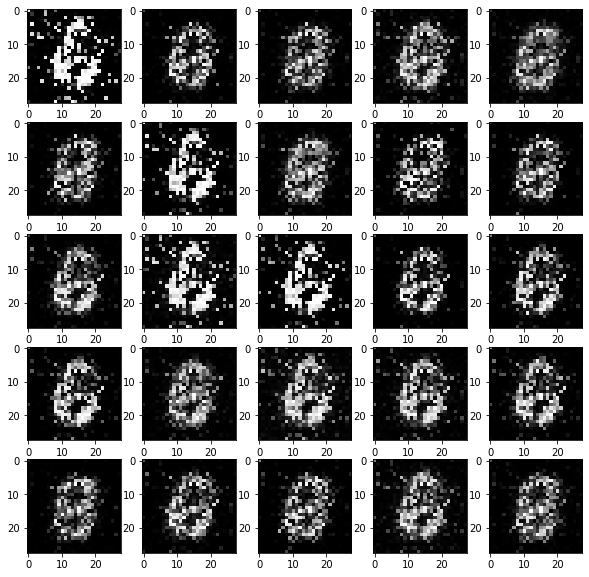

epochs 8


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 9ms/step


  0%|          | 1/273 [00:00<01:42,  2.64it/s]

4/4 [==============================] - 0s 10ms/step


  1%|          | 2/273 [00:00<01:42,  2.65it/s]

4/4 [==============================] - 0s 15ms/step


  1%|          | 3/273 [00:01<01:59,  2.26it/s]

4/4 [==============================] - 0s 14ms/step


  1%|▏         | 4/273 [00:01<02:03,  2.17it/s]

4/4 [==============================] - 0s 14ms/step


  2%|▏         | 5/273 [00:02<02:29,  1.79it/s]

4/4 [==============================] - 0s 10ms/step


  2%|▏         | 6/273 [00:02<02:23,  1.86it/s]

4/4 [==============================] - 0s 11ms/step


  3%|▎         | 7/273 [00:03<02:18,  1.93it/s]

4/4 [==============================] - 0s 11ms/step


  3%|▎         | 8/273 [00:03<02:08,  2.06it/s]

4/4 [==============================] - 0s 9ms/step


  3%|▎         | 9/273 [00:04<01:54,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


  4%|▎         | 10/273 [00:04<01:45,  2.48it/s]

4/4 [==============================] - 0s 9ms/step


  4%|▍         | 11/273 [00:04<01:39,  2.63it/s]

4/4 [==============================] - 0s 11ms/step


  4%|▍         | 12/273 [00:05<01:35,  2.73it/s]

4/4 [==============================] - 0s 9ms/step


  5%|▍         | 13/273 [00:05<01:32,  2.81it/s]

4/4 [==============================] - 0s 10ms/step


  5%|▌         | 14/273 [00:05<01:30,  2.88it/s]

4/4 [==============================] - 0s 11ms/step


  5%|▌         | 15/273 [00:06<01:28,  2.92it/s]

4/4 [==============================] - 0s 10ms/step


  6%|▌         | 16/273 [00:06<01:27,  2.94it/s]

4/4 [==============================] - 0s 10ms/step


  6%|▌         | 17/273 [00:06<01:25,  2.98it/s]

4/4 [==============================] - 0s 10ms/step


  7%|▋         | 18/273 [00:07<01:24,  3.01it/s]

4/4 [==============================] - 0s 9ms/step


  7%|▋         | 19/273 [00:07<01:23,  3.04it/s]

4/4 [==============================] - 0s 9ms/step


  7%|▋         | 20/273 [00:07<01:22,  3.08it/s]

4/4 [==============================] - 0s 12ms/step


  8%|▊         | 21/273 [00:08<01:22,  3.07it/s]

4/4 [==============================] - 0s 10ms/step


  8%|▊         | 22/273 [00:08<01:22,  3.05it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 23/273 [00:08<01:22,  3.02it/s]

4/4 [==============================] - 0s 10ms/step


  9%|▉         | 24/273 [00:09<01:24,  2.96it/s]

4/4 [==============================] - 0s 10ms/step


  9%|▉         | 25/273 [00:09<01:23,  2.98it/s]

4/4 [==============================] - 0s 14ms/step


 10%|▉         | 26/273 [00:09<01:23,  2.96it/s]

4/4 [==============================] - 0s 9ms/step


 10%|▉         | 27/273 [00:10<01:21,  3.04it/s]

4/4 [==============================] - 0s 10ms/step


 10%|█         | 28/273 [00:10<01:21,  3.01it/s]

4/4 [==============================] - 0s 9ms/step


 11%|█         | 29/273 [00:10<01:20,  3.04it/s]

4/4 [==============================] - 0s 14ms/step


 11%|█         | 30/273 [00:11<01:19,  3.05it/s]

4/4 [==============================] - 0s 11ms/step


 11%|█▏        | 31/273 [00:11<01:18,  3.07it/s]

4/4 [==============================] - 0s 9ms/step


 12%|█▏        | 32/273 [00:11<01:19,  3.05it/s]

4/4 [==============================] - 0s 16ms/step


 12%|█▏        | 33/273 [00:12<01:19,  3.03it/s]

4/4 [==============================] - 0s 11ms/step


 12%|█▏        | 34/273 [00:12<01:19,  3.02it/s]

4/4 [==============================] - 0s 10ms/step


 13%|█▎        | 35/273 [00:12<01:18,  3.04it/s]

4/4 [==============================] - 0s 9ms/step


 13%|█▎        | 36/273 [00:13<01:17,  3.07it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▎        | 37/273 [00:13<01:16,  3.08it/s]

4/4 [==============================] - 0s 10ms/step


 14%|█▍        | 38/273 [00:13<01:16,  3.07it/s]

4/4 [==============================] - 0s 11ms/step


 14%|█▍        | 39/273 [00:14<01:14,  3.14it/s]

4/4 [==============================] - 0s 8ms/step


 15%|█▍        | 40/273 [00:14<01:14,  3.15it/s]

4/4 [==============================] - 0s 10ms/step


 15%|█▌        | 41/273 [00:14<01:15,  3.09it/s]

4/4 [==============================] - 0s 10ms/step


 15%|█▌        | 42/273 [00:15<01:15,  3.07it/s]

4/4 [==============================] - 0s 13ms/step


 16%|█▌        | 43/273 [00:15<01:15,  3.06it/s]

4/4 [==============================] - 0s 10ms/step


 16%|█▌        | 44/273 [00:16<01:36,  2.38it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▋        | 45/273 [00:16<01:28,  2.57it/s]

4/4 [==============================] - 0s 8ms/step


 17%|█▋        | 46/273 [00:16<01:24,  2.68it/s]

4/4 [==============================] - 0s 9ms/step


 17%|█▋        | 47/273 [00:16<01:21,  2.78it/s]

4/4 [==============================] - 0s 9ms/step


 18%|█▊        | 48/273 [00:17<01:18,  2.88it/s]

4/4 [==============================] - 0s 8ms/step


 18%|█▊        | 49/273 [00:17<01:17,  2.90it/s]

4/4 [==============================] - 0s 9ms/step


 18%|█▊        | 50/273 [00:17<01:15,  2.96it/s]

4/4 [==============================] - 0s 11ms/step


 19%|█▊        | 51/273 [00:18<01:14,  3.00it/s]

4/4 [==============================] - 0s 9ms/step


 19%|█▉        | 52/273 [00:18<01:13,  3.01it/s]

4/4 [==============================] - 0s 11ms/step


 19%|█▉        | 53/273 [00:18<01:12,  3.04it/s]

4/4 [==============================] - 0s 10ms/step


 20%|█▉        | 54/273 [00:19<01:15,  2.91it/s]

4/4 [==============================] - 0s 8ms/step


 20%|██        | 55/273 [00:19<01:12,  2.99it/s]

4/4 [==============================] - 0s 12ms/step


 21%|██        | 56/273 [00:20<01:17,  2.80it/s]

4/4 [==============================] - 0s 9ms/step


 21%|██        | 57/273 [00:20<01:14,  2.91it/s]

4/4 [==============================] - 0s 12ms/step


 21%|██        | 58/273 [00:20<01:12,  2.95it/s]

4/4 [==============================] - 0s 10ms/step


 22%|██▏       | 59/273 [00:21<01:12,  2.96it/s]

4/4 [==============================] - 0s 9ms/step


 22%|██▏       | 60/273 [00:21<01:11,  3.00it/s]

4/4 [==============================] - 0s 10ms/step


 22%|██▏       | 61/273 [00:21<01:10,  3.00it/s]

4/4 [==============================] - 0s 9ms/step


 23%|██▎       | 62/273 [00:22<01:10,  3.00it/s]

4/4 [==============================] - 0s 9ms/step


 23%|██▎       | 63/273 [00:22<01:09,  3.04it/s]

4/4 [==============================] - 0s 11ms/step


 23%|██▎       | 64/273 [00:22<01:09,  3.01it/s]

4/4 [==============================] - 0s 10ms/step


 24%|██▍       | 65/273 [00:23<01:09,  3.00it/s]

4/4 [==============================] - 0s 11ms/step


 24%|██▍       | 66/273 [00:23<01:12,  2.87it/s]

4/4 [==============================] - 0s 9ms/step


 25%|██▍       | 67/273 [00:23<01:10,  2.93it/s]

4/4 [==============================] - 0s 10ms/step


 25%|██▍       | 68/273 [00:24<01:09,  2.95it/s]

4/4 [==============================] - 0s 9ms/step


 25%|██▌       | 69/273 [00:24<01:07,  3.01it/s]

4/4 [==============================] - 0s 9ms/step


 26%|██▌       | 70/273 [00:24<01:06,  3.05it/s]

4/4 [==============================] - 0s 13ms/step


 26%|██▌       | 71/273 [00:25<01:07,  3.00it/s]

4/4 [==============================] - 0s 9ms/step


 26%|██▋       | 72/273 [00:25<01:06,  3.03it/s]

4/4 [==============================] - 0s 11ms/step


 27%|██▋       | 73/273 [00:25<01:05,  3.06it/s]

4/4 [==============================] - 0s 12ms/step


 27%|██▋       | 74/273 [00:26<01:05,  3.02it/s]

4/4 [==============================] - 0s 9ms/step


 27%|██▋       | 75/273 [00:26<01:08,  2.90it/s]

4/4 [==============================] - 0s 12ms/step


 28%|██▊       | 76/273 [00:26<01:06,  2.96it/s]

4/4 [==============================] - 0s 10ms/step


 28%|██▊       | 77/273 [00:27<01:06,  2.95it/s]

4/4 [==============================] - 0s 13ms/step


 29%|██▊       | 78/273 [00:27<01:04,  3.00it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▉       | 79/273 [00:27<01:03,  3.03it/s]

4/4 [==============================] - 0s 13ms/step


 29%|██▉       | 80/273 [00:28<01:04,  2.99it/s]

4/4 [==============================] - 0s 11ms/step


 30%|██▉       | 81/273 [00:28<01:03,  3.04it/s]

4/4 [==============================] - 0s 10ms/step


 30%|███       | 82/273 [00:28<01:01,  3.08it/s]

4/4 [==============================] - 0s 9ms/step


 30%|███       | 83/273 [00:29<01:04,  2.93it/s]

4/4 [==============================] - 0s 10ms/step


 31%|███       | 84/273 [00:29<01:03,  2.98it/s]

4/4 [==============================] - 0s 9ms/step


 31%|███       | 85/273 [00:29<01:02,  3.01it/s]

4/4 [==============================] - 0s 9ms/step


 32%|███▏      | 86/273 [00:30<01:02,  3.01it/s]

4/4 [==============================] - 0s 12ms/step


 32%|███▏      | 87/273 [00:30<01:00,  3.05it/s]

4/4 [==============================] - 0s 10ms/step


 32%|███▏      | 88/273 [00:30<01:00,  3.07it/s]

4/4 [==============================] - 0s 9ms/step


 33%|███▎      | 89/273 [00:31<01:01,  3.00it/s]

4/4 [==============================] - 0s 10ms/step


 33%|███▎      | 90/273 [00:31<01:00,  3.05it/s]

4/4 [==============================] - 0s 9ms/step


 33%|███▎      | 91/273 [00:31<00:59,  3.07it/s]

4/4 [==============================] - 0s 11ms/step


 34%|███▎      | 92/273 [00:32<01:00,  3.00it/s]

4/4 [==============================] - 0s 10ms/step


 34%|███▍      | 93/273 [00:32<01:02,  2.87it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▍      | 94/273 [00:32<01:00,  2.96it/s]

4/4 [==============================] - 0s 9ms/step


 35%|███▍      | 95/273 [00:33<01:00,  2.96it/s]

4/4 [==============================] - 0s 8ms/step


 35%|███▌      | 96/273 [00:33<00:58,  3.05it/s]

4/4 [==============================] - 0s 10ms/step


 36%|███▌      | 97/273 [00:33<00:57,  3.08it/s]

4/4 [==============================] - 0s 10ms/step


 36%|███▌      | 98/273 [00:33<00:57,  3.05it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▋      | 99/273 [00:34<00:57,  3.03it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 100/273 [00:34<00:56,  3.05it/s]

4/4 [==============================] - 0s 10ms/step


 37%|███▋      | 101/273 [00:34<00:56,  3.06it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 102/273 [00:35<00:56,  3.04it/s]

4/4 [==============================] - 0s 9ms/step


 38%|███▊      | 103/273 [00:35<00:54,  3.10it/s]

4/4 [==============================] - 0s 10ms/step


 38%|███▊      | 104/273 [00:35<00:56,  3.02it/s]

4/4 [==============================] - 0s 10ms/step


 38%|███▊      | 105/273 [00:36<00:55,  3.00it/s]

4/4 [==============================] - 0s 8ms/step


 39%|███▉      | 106/273 [00:36<00:55,  3.03it/s]

4/4 [==============================] - 0s 12ms/step


 39%|███▉      | 107/273 [00:36<00:55,  3.01it/s]

4/4 [==============================] - 0s 9ms/step


 40%|███▉      | 108/273 [00:37<00:54,  3.01it/s]

4/4 [==============================] - 0s 11ms/step


 40%|███▉      | 109/273 [00:37<00:54,  3.03it/s]

4/4 [==============================] - 0s 9ms/step


 40%|████      | 110/273 [00:37<00:52,  3.10it/s]

4/4 [==============================] - 0s 12ms/step


 41%|████      | 111/273 [00:38<00:53,  3.02it/s]

4/4 [==============================] - 0s 12ms/step


 41%|████      | 112/273 [00:38<00:52,  3.07it/s]

4/4 [==============================] - 0s 10ms/step


 41%|████▏     | 113/273 [00:38<00:51,  3.08it/s]

4/4 [==============================] - 0s 9ms/step


 42%|████▏     | 114/273 [00:39<00:52,  3.03it/s]

4/4 [==============================] - 0s 8ms/step


 42%|████▏     | 115/273 [00:39<00:50,  3.11it/s]

4/4 [==============================] - 0s 9ms/step


 42%|████▏     | 116/273 [00:39<00:50,  3.08it/s]

4/4 [==============================] - 0s 8ms/step


 43%|████▎     | 117/273 [00:40<00:49,  3.13it/s]

4/4 [==============================] - 0s 9ms/step


 43%|████▎     | 118/273 [00:40<00:50,  3.07it/s]

4/4 [==============================] - 0s 9ms/step


 44%|████▎     | 119/273 [00:40<00:49,  3.10it/s]

4/4 [==============================] - 0s 9ms/step


 44%|████▍     | 120/273 [00:41<00:50,  3.01it/s]

4/4 [==============================] - 0s 8ms/step


 44%|████▍     | 121/273 [00:41<00:50,  3.00it/s]

4/4 [==============================] - 0s 12ms/step


 45%|████▍     | 122/273 [00:41<00:49,  3.04it/s]

4/4 [==============================] - 0s 9ms/step


 45%|████▌     | 123/273 [00:42<00:49,  3.04it/s]

4/4 [==============================] - 0s 9ms/step


 45%|████▌     | 124/273 [00:42<00:48,  3.04it/s]

4/4 [==============================] - 0s 9ms/step


 46%|████▌     | 125/273 [00:42<00:48,  3.05it/s]

4/4 [==============================] - 0s 9ms/step


 46%|████▌     | 126/273 [00:43<00:47,  3.10it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 127/273 [00:43<00:47,  3.08it/s]

4/4 [==============================] - 0s 10ms/step


 47%|████▋     | 128/273 [00:43<00:47,  3.07it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 129/273 [00:44<00:46,  3.11it/s]

4/4 [==============================] - 0s 11ms/step


 48%|████▊     | 130/273 [00:44<00:46,  3.09it/s]

4/4 [==============================] - 0s 10ms/step


 48%|████▊     | 131/273 [00:44<00:46,  3.06it/s]

4/4 [==============================] - 0s 9ms/step


 48%|████▊     | 132/273 [00:45<00:45,  3.09it/s]

4/4 [==============================] - 0s 10ms/step


 49%|████▊     | 133/273 [00:45<00:45,  3.07it/s]

4/4 [==============================] - 0s 11ms/step


 49%|████▉     | 134/273 [00:45<00:44,  3.12it/s]

4/4 [==============================] - 0s 10ms/step


 49%|████▉     | 135/273 [00:46<00:44,  3.07it/s]

4/4 [==============================] - 0s 10ms/step


 50%|████▉     | 136/273 [00:46<00:44,  3.05it/s]

4/4 [==============================] - 0s 10ms/step


 50%|█████     | 137/273 [00:46<00:45,  3.02it/s]

4/4 [==============================] - 0s 12ms/step


 51%|█████     | 138/273 [00:47<00:44,  3.03it/s]

4/4 [==============================] - 0s 9ms/step


 51%|█████     | 139/273 [00:47<00:44,  3.03it/s]

4/4 [==============================] - 0s 12ms/step


 51%|█████▏    | 140/273 [00:47<00:49,  2.69it/s]

4/4 [==============================] - 0s 13ms/step


 52%|█████▏    | 141/273 [00:48<00:54,  2.44it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 142/273 [00:48<00:58,  2.26it/s]

4/4 [==============================] - 0s 13ms/step


 52%|█████▏    | 143/273 [00:49<01:00,  2.14it/s]

4/4 [==============================] - 0s 14ms/step


 53%|█████▎    | 144/273 [00:49<01:01,  2.09it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 145/273 [00:50<01:03,  2.03it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 146/273 [00:50<00:59,  2.15it/s]

4/4 [==============================] - 0s 10ms/step


 54%|█████▍    | 147/273 [00:51<00:53,  2.37it/s]

4/4 [==============================] - 0s 9ms/step


 54%|█████▍    | 148/273 [00:51<00:49,  2.54it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▍    | 149/273 [00:51<00:46,  2.68it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▍    | 150/273 [00:52<00:44,  2.74it/s]

4/4 [==============================] - 0s 11ms/step


 55%|█████▌    | 151/273 [00:52<00:42,  2.85it/s]

4/4 [==============================] - 0s 10ms/step


 56%|█████▌    | 152/273 [00:52<00:43,  2.76it/s]

4/4 [==============================] - 0s 10ms/step


 56%|█████▌    | 153/273 [00:53<00:41,  2.86it/s]

4/4 [==============================] - 0s 8ms/step


 56%|█████▋    | 154/273 [00:53<00:41,  2.87it/s]

4/4 [==============================] - 0s 14ms/step


 57%|█████▋    | 155/273 [00:53<00:40,  2.93it/s]

4/4 [==============================] - 0s 12ms/step


 57%|█████▋    | 156/273 [00:54<00:39,  2.99it/s]

4/4 [==============================] - 0s 9ms/step


 58%|█████▊    | 157/273 [00:54<00:38,  3.04it/s]

4/4 [==============================] - 0s 10ms/step


 58%|█████▊    | 158/273 [00:54<00:37,  3.03it/s]

4/4 [==============================] - 0s 13ms/step


 58%|█████▊    | 159/273 [00:55<00:37,  3.03it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▊    | 160/273 [00:55<00:36,  3.07it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▉    | 161/273 [00:55<00:36,  3.06it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▉    | 162/273 [00:56<00:36,  3.07it/s]

4/4 [==============================] - 0s 10ms/step


 60%|█████▉    | 163/273 [00:56<00:36,  3.05it/s]

4/4 [==============================] - 0s 9ms/step


 60%|██████    | 164/273 [00:56<00:35,  3.07it/s]

4/4 [==============================] - 0s 9ms/step


 60%|██████    | 165/273 [00:57<00:35,  3.07it/s]

4/4 [==============================] - 0s 12ms/step


 61%|██████    | 166/273 [00:57<00:35,  3.01it/s]

4/4 [==============================] - 0s 10ms/step


 61%|██████    | 167/273 [00:57<00:34,  3.03it/s]

4/4 [==============================] - 0s 11ms/step


 62%|██████▏   | 168/273 [00:58<00:35,  2.99it/s]

4/4 [==============================] - 0s 10ms/step


 62%|██████▏   | 169/273 [00:58<00:34,  3.02it/s]

4/4 [==============================] - 0s 10ms/step


 62%|██████▏   | 170/273 [00:58<00:34,  3.02it/s]

4/4 [==============================] - 0s 10ms/step


 63%|██████▎   | 171/273 [00:59<00:34,  2.99it/s]

4/4 [==============================] - 0s 11ms/step


 63%|██████▎   | 172/273 [00:59<00:33,  3.04it/s]

4/4 [==============================] - 0s 10ms/step


 63%|██████▎   | 173/273 [00:59<00:32,  3.04it/s]

4/4 [==============================] - 0s 10ms/step


 64%|██████▎   | 174/273 [01:00<00:32,  3.07it/s]

4/4 [==============================] - 0s 9ms/step


 64%|██████▍   | 175/273 [01:00<00:31,  3.10it/s]

4/4 [==============================] - 0s 10ms/step


 64%|██████▍   | 176/273 [01:00<00:31,  3.10it/s]

4/4 [==============================] - 0s 9ms/step


 65%|██████▍   | 177/273 [01:01<00:31,  3.02it/s]

4/4 [==============================] - 0s 9ms/step


 65%|██████▌   | 178/273 [01:01<00:31,  3.06it/s]

4/4 [==============================] - 0s 8ms/step


 66%|██████▌   | 179/273 [01:01<00:30,  3.09it/s]

4/4 [==============================] - 0s 10ms/step


 66%|██████▌   | 180/273 [01:02<00:30,  3.03it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▋   | 181/273 [01:02<00:30,  3.06it/s]

4/4 [==============================] - 0s 8ms/step


 67%|██████▋   | 182/273 [01:02<00:30,  2.99it/s]

4/4 [==============================] - 0s 11ms/step


 67%|██████▋   | 183/273 [01:03<00:29,  3.00it/s]

4/4 [==============================] - 0s 10ms/step


 67%|██████▋   | 184/273 [01:03<00:29,  3.00it/s]

4/4 [==============================] - 0s 12ms/step


 68%|██████▊   | 185/273 [01:03<00:29,  3.02it/s]

4/4 [==============================] - 0s 13ms/step


 68%|██████▊   | 186/273 [01:04<00:28,  3.03it/s]

4/4 [==============================] - 0s 10ms/step


 68%|██████▊   | 187/273 [01:04<00:28,  3.04it/s]

4/4 [==============================] - 0s 9ms/step


 69%|██████▉   | 188/273 [01:04<00:27,  3.05it/s]

4/4 [==============================] - 0s 9ms/step


 69%|██████▉   | 189/273 [01:05<00:28,  2.90it/s]

4/4 [==============================] - 0s 12ms/step


 70%|██████▉   | 190/273 [01:05<00:28,  2.93it/s]

4/4 [==============================] - 0s 12ms/step


 70%|██████▉   | 191/273 [01:05<00:27,  2.95it/s]

4/4 [==============================] - 0s 12ms/step


 70%|███████   | 192/273 [01:06<00:26,  3.02it/s]

4/4 [==============================] - 0s 10ms/step


 71%|███████   | 193/273 [01:06<00:26,  3.03it/s]

4/4 [==============================] - 0s 13ms/step


 71%|███████   | 194/273 [01:06<00:25,  3.06it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████▏  | 195/273 [01:07<00:25,  3.04it/s]

4/4 [==============================] - 0s 10ms/step


 72%|███████▏  | 196/273 [01:07<00:25,  3.02it/s]

4/4 [==============================] - 0s 10ms/step


 72%|███████▏  | 197/273 [01:07<00:24,  3.05it/s]

4/4 [==============================] - 0s 11ms/step


 73%|███████▎  | 198/273 [01:08<00:24,  3.09it/s]

4/4 [==============================] - 0s 12ms/step


 73%|███████▎  | 199/273 [01:08<00:24,  3.05it/s]

4/4 [==============================] - 0s 10ms/step


 73%|███████▎  | 200/273 [01:08<00:23,  3.04it/s]

4/4 [==============================] - 0s 10ms/step


 74%|███████▎  | 201/273 [01:09<00:23,  3.04it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▍  | 202/273 [01:09<00:23,  3.03it/s]

4/4 [==============================] - 0s 8ms/step


 74%|███████▍  | 203/273 [01:09<00:24,  2.89it/s]

4/4 [==============================] - 0s 12ms/step


 75%|███████▍  | 204/273 [01:10<00:24,  2.80it/s]

4/4 [==============================] - 0s 8ms/step


 75%|███████▌  | 205/273 [01:10<00:24,  2.73it/s]

4/4 [==============================] - 0s 9ms/step


 75%|███████▌  | 206/273 [01:10<00:23,  2.84it/s]

4/4 [==============================] - 0s 9ms/step


 76%|███████▌  | 207/273 [01:11<00:22,  2.90it/s]

4/4 [==============================] - 0s 10ms/step


 76%|███████▌  | 208/273 [01:11<00:23,  2.80it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 209/273 [01:11<00:22,  2.88it/s]

4/4 [==============================] - 0s 10ms/step


 77%|███████▋  | 210/273 [01:12<00:21,  2.96it/s]

4/4 [==============================] - 0s 10ms/step


 77%|███████▋  | 211/273 [01:12<00:20,  2.98it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 212/273 [01:12<00:21,  2.85it/s]

4/4 [==============================] - 0s 12ms/step


 78%|███████▊  | 213/273 [01:13<00:20,  2.91it/s]

4/4 [==============================] - 0s 10ms/step


 78%|███████▊  | 214/273 [01:13<00:20,  2.88it/s]

4/4 [==============================] - 0s 12ms/step


 79%|███████▉  | 215/273 [01:13<00:20,  2.90it/s]

4/4 [==============================] - 0s 10ms/step


 79%|███████▉  | 216/273 [01:14<00:19,  2.93it/s]

4/4 [==============================] - 0s 8ms/step


 79%|███████▉  | 217/273 [01:14<00:20,  2.77it/s]

4/4 [==============================] - 0s 10ms/step


 80%|███████▉  | 218/273 [01:14<00:19,  2.82it/s]

4/4 [==============================] - 0s 9ms/step


 80%|████████  | 219/273 [01:15<00:18,  2.93it/s]

4/4 [==============================] - 0s 12ms/step


 81%|████████  | 220/273 [01:15<00:18,  2.94it/s]

4/4 [==============================] - 0s 11ms/step


 81%|████████  | 221/273 [01:15<00:17,  2.96it/s]

4/4 [==============================] - 0s 12ms/step


 81%|████████▏ | 222/273 [01:16<00:17,  2.97it/s]

4/4 [==============================] - 0s 10ms/step


 82%|████████▏ | 223/273 [01:16<00:16,  2.95it/s]

4/4 [==============================] - 0s 12ms/step


 82%|████████▏ | 224/273 [01:16<00:16,  2.99it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 225/273 [01:17<00:15,  3.03it/s]

4/4 [==============================] - 0s 10ms/step


 83%|████████▎ | 226/273 [01:17<00:15,  3.04it/s]

4/4 [==============================] - 0s 9ms/step


 83%|████████▎ | 227/273 [01:17<00:15,  2.96it/s]

4/4 [==============================] - 0s 8ms/step


 84%|████████▎ | 228/273 [01:18<00:14,  3.03it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▍ | 229/273 [01:18<00:14,  3.06it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▍ | 230/273 [01:18<00:14,  3.03it/s]

4/4 [==============================] - 0s 8ms/step


 85%|████████▍ | 231/273 [01:19<00:13,  3.09it/s]

4/4 [==============================] - 0s 9ms/step


 85%|████████▍ | 232/273 [01:19<00:13,  3.11it/s]

4/4 [==============================] - 0s 11ms/step


 85%|████████▌ | 233/273 [01:19<00:13,  3.06it/s]

4/4 [==============================] - 0s 13ms/step


 86%|████████▌ | 234/273 [01:20<00:12,  3.09it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▌ | 235/273 [01:20<00:12,  3.10it/s]

4/4 [==============================] - 0s 11ms/step


 86%|████████▋ | 236/273 [01:20<00:12,  3.05it/s]

4/4 [==============================] - 0s 9ms/step


 87%|████████▋ | 237/273 [01:21<00:11,  3.06it/s]

4/4 [==============================] - 0s 12ms/step


 87%|████████▋ | 238/273 [01:21<00:11,  3.05it/s]

4/4 [==============================] - 0s 11ms/step


 88%|████████▊ | 239/273 [01:21<00:11,  2.98it/s]

4/4 [==============================] - 0s 11ms/step


 88%|████████▊ | 240/273 [01:22<00:11,  2.99it/s]

4/4 [==============================] - 0s 9ms/step


 88%|████████▊ | 241/273 [01:22<00:10,  3.04it/s]

4/4 [==============================] - 0s 8ms/step


 89%|████████▊ | 242/273 [01:22<00:10,  3.05it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▉ | 243/273 [01:23<00:09,  3.07it/s]

4/4 [==============================] - 0s 11ms/step


 89%|████████▉ | 244/273 [01:23<00:09,  3.08it/s]

4/4 [==============================] - 0s 12ms/step


 90%|████████▉ | 245/273 [01:23<00:09,  3.04it/s]

4/4 [==============================] - 0s 9ms/step


 90%|█████████ | 246/273 [01:24<00:09,  2.99it/s]

4/4 [==============================] - 0s 12ms/step


 90%|█████████ | 247/273 [01:24<00:08,  3.03it/s]

4/4 [==============================] - 0s 8ms/step


 91%|█████████ | 248/273 [01:24<00:08,  3.03it/s]

4/4 [==============================] - 0s 11ms/step


 91%|█████████ | 249/273 [01:25<00:07,  3.03it/s]

4/4 [==============================] - 0s 11ms/step


 92%|█████████▏| 250/273 [01:25<00:07,  3.07it/s]

4/4 [==============================] - 0s 10ms/step


 92%|█████████▏| 251/273 [01:25<00:07,  3.02it/s]

4/4 [==============================] - 0s 11ms/step


 92%|█████████▏| 252/273 [01:26<00:06,  3.07it/s]

4/4 [==============================] - 0s 10ms/step


 93%|█████████▎| 253/273 [01:26<00:06,  3.08it/s]

4/4 [==============================] - 0s 9ms/step


 93%|█████████▎| 254/273 [01:26<00:06,  3.10it/s]

4/4 [==============================] - 0s 12ms/step


 93%|█████████▎| 255/273 [01:27<00:05,  3.01it/s]

4/4 [==============================] - 0s 9ms/step


 94%|█████████▍| 256/273 [01:27<00:05,  3.06it/s]

4/4 [==============================] - 0s 11ms/step


 94%|█████████▍| 257/273 [01:27<00:05,  3.00it/s]

4/4 [==============================] - 0s 10ms/step


 95%|█████████▍| 258/273 [01:28<00:05,  2.99it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▍| 259/273 [01:28<00:04,  3.05it/s]

4/4 [==============================] - 0s 13ms/step


 95%|█████████▌| 260/273 [01:28<00:04,  3.04it/s]

4/4 [==============================] - 0s 8ms/step


 96%|█████████▌| 261/273 [01:29<00:04,  3.00it/s]

4/4 [==============================] - 0s 15ms/step


 96%|█████████▌| 262/273 [01:29<00:03,  2.89it/s]

4/4 [==============================] - 0s 10ms/step


 96%|█████████▋| 263/273 [01:29<00:03,  2.94it/s]

4/4 [==============================] - 0s 14ms/step


 97%|█████████▋| 264/273 [01:30<00:03,  2.94it/s]

4/4 [==============================] - 0s 10ms/step


 97%|█████████▋| 265/273 [01:30<00:02,  2.97it/s]

4/4 [==============================] - 0s 10ms/step


 97%|█████████▋| 266/273 [01:30<00:02,  2.99it/s]

4/4 [==============================] - 0s 10ms/step


 98%|█████████▊| 267/273 [01:31<00:02,  2.99it/s]

4/4 [==============================] - 0s 10ms/step


 98%|█████████▊| 268/273 [01:31<00:01,  3.02it/s]

4/4 [==============================] - 0s 9ms/step


 99%|█████████▊| 269/273 [01:31<00:01,  3.05it/s]

4/4 [==============================] - 0s 9ms/step


 99%|█████████▉| 270/273 [01:32<00:00,  3.04it/s]

4/4 [==============================] - 0s 11ms/step


 99%|█████████▉| 271/273 [01:32<00:00,  2.91it/s]

4/4 [==============================] - 0s 9ms/step


100%|█████████▉| 272/273 [01:32<00:00,  2.99it/s]

4/4 [==============================] - 0s 9ms/step


100%|██████████| 273/273 [01:33<00:00,  2.93it/s]


loss is 0.04460698366165161 |*| 2.18241286277771
1/1 [==============================] - 0s 27ms/step


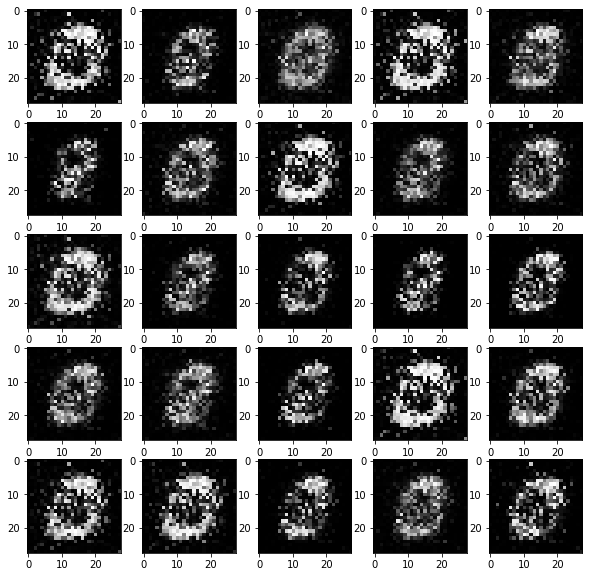

epochs 9


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 8ms/step


  0%|          | 1/273 [00:00<01:47,  2.52it/s]

4/4 [==============================] - 0s 10ms/step


  1%|          | 2/273 [00:00<01:33,  2.90it/s]

4/4 [==============================] - 0s 11ms/step


  1%|          | 3/273 [00:01<01:30,  2.98it/s]

4/4 [==============================] - 0s 11ms/step


  1%|▏         | 4/273 [00:01<01:28,  3.04it/s]

4/4 [==============================] - 0s 10ms/step


  2%|▏         | 5/273 [00:01<01:28,  3.03it/s]

4/4 [==============================] - 0s 11ms/step


  2%|▏         | 6/273 [00:02<01:28,  3.01it/s]

4/4 [==============================] - 0s 12ms/step


  3%|▎         | 7/273 [00:02<01:27,  3.05it/s]

4/4 [==============================] - 0s 8ms/step


  3%|▎         | 8/273 [00:02<01:26,  3.07it/s]

4/4 [==============================] - 0s 9ms/step


  3%|▎         | 9/273 [00:03<01:30,  2.91it/s]

4/4 [==============================] - 0s 10ms/step


  4%|▎         | 10/273 [00:03<01:28,  2.98it/s]

4/4 [==============================] - 0s 9ms/step


  4%|▍         | 11/273 [00:03<01:26,  3.04it/s]

4/4 [==============================] - 0s 8ms/step


  4%|▍         | 12/273 [00:04<01:25,  3.04it/s]

4/4 [==============================] - 0s 10ms/step


  5%|▍         | 13/273 [00:04<01:24,  3.07it/s]

4/4 [==============================] - 0s 9ms/step


  5%|▌         | 14/273 [00:04<01:24,  3.08it/s]

4/4 [==============================] - 0s 10ms/step


  5%|▌         | 15/273 [00:04<01:25,  3.01it/s]

4/4 [==============================] - 0s 8ms/step


  6%|▌         | 16/273 [00:05<01:23,  3.06it/s]

4/4 [==============================] - 0s 9ms/step


  6%|▌         | 17/273 [00:05<01:23,  3.07it/s]

4/4 [==============================] - 0s 10ms/step


  7%|▋         | 18/273 [00:05<01:22,  3.08it/s]

4/4 [==============================] - 0s 11ms/step


  7%|▋         | 19/273 [00:06<01:22,  3.07it/s]

4/4 [==============================] - 0s 9ms/step


  7%|▋         | 20/273 [00:06<01:21,  3.09it/s]

4/4 [==============================] - 0s 8ms/step


  8%|▊         | 21/273 [00:06<01:21,  3.09it/s]

4/4 [==============================] - 0s 11ms/step


  8%|▊         | 22/273 [00:07<01:26,  2.90it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 23/273 [00:07<01:24,  2.94it/s]

4/4 [==============================] - 0s 11ms/step


  9%|▉         | 24/273 [00:07<01:23,  2.97it/s]

4/4 [==============================] - 0s 9ms/step


  9%|▉         | 25/273 [00:08<01:22,  3.00it/s]

4/4 [==============================] - 0s 10ms/step


 10%|▉         | 26/273 [00:08<01:22,  3.00it/s]

4/4 [==============================] - 0s 9ms/step


 10%|▉         | 27/273 [00:08<01:21,  3.02it/s]

4/4 [==============================] - 0s 8ms/step


 10%|█         | 28/273 [00:09<01:21,  3.01it/s]

4/4 [==============================] - 0s 11ms/step


 11%|█         | 29/273 [00:09<01:26,  2.83it/s]

4/4 [==============================] - 0s 11ms/step


 11%|█         | 30/273 [00:10<01:23,  2.91it/s]

4/4 [==============================] - 0s 11ms/step


 11%|█▏        | 31/273 [00:10<01:23,  2.90it/s]

4/4 [==============================] - 0s 10ms/step


 12%|█▏        | 32/273 [00:10<01:21,  2.96it/s]

4/4 [==============================] - 0s 9ms/step


 12%|█▏        | 33/273 [00:11<01:20,  2.97it/s]

4/4 [==============================] - 0s 10ms/step


 12%|█▏        | 34/273 [00:11<01:20,  2.98it/s]

4/4 [==============================] - 0s 9ms/step


 13%|█▎        | 35/273 [00:11<01:19,  2.99it/s]

4/4 [==============================] - 0s 10ms/step


 13%|█▎        | 36/273 [00:12<01:18,  3.01it/s]

4/4 [==============================] - 0s 8ms/step


 14%|█▎        | 37/273 [00:12<01:18,  3.01it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▍        | 38/273 [00:12<01:17,  3.04it/s]

4/4 [==============================] - 0s 8ms/step


 14%|█▍        | 39/273 [00:12<01:16,  3.08it/s]

4/4 [==============================] - 0s 8ms/step


 15%|█▍        | 40/273 [00:13<01:15,  3.07it/s]

4/4 [==============================] - 0s 12ms/step


 15%|█▌        | 41/273 [00:13<01:15,  3.07it/s]

4/4 [==============================] - 0s 10ms/step


 15%|█▌        | 42/273 [00:13<01:14,  3.09it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▌        | 43/273 [00:14<01:14,  3.07it/s]

4/4 [==============================] - 0s 10ms/step


 16%|█▌        | 44/273 [00:14<01:16,  3.01it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▋        | 45/273 [00:14<01:14,  3.06it/s]

4/4 [==============================] - 0s 9ms/step


 17%|█▋        | 46/273 [00:15<01:15,  3.01it/s]

4/4 [==============================] - 0s 14ms/step


 17%|█▋        | 47/273 [00:15<01:15,  3.00it/s]

4/4 [==============================] - 0s 11ms/step


 18%|█▊        | 48/273 [00:15<01:13,  3.04it/s]

4/4 [==============================] - 0s 8ms/step


 18%|█▊        | 49/273 [00:16<01:13,  3.06it/s]

4/4 [==============================] - 0s 8ms/step


 18%|█▊        | 50/273 [00:16<01:12,  3.07it/s]

4/4 [==============================] - 0s 8ms/step


 19%|█▊        | 51/273 [00:16<01:11,  3.11it/s]

4/4 [==============================] - 0s 10ms/step


 19%|█▉        | 52/273 [00:17<01:11,  3.11it/s]

4/4 [==============================] - 0s 8ms/step


 19%|█▉        | 53/273 [00:17<01:11,  3.07it/s]

4/4 [==============================] - 0s 10ms/step


 20%|█▉        | 54/273 [00:17<01:12,  3.02it/s]

4/4 [==============================] - 0s 8ms/step


 20%|██        | 55/273 [00:18<01:11,  3.04it/s]

4/4 [==============================] - 0s 8ms/step


 21%|██        | 56/273 [00:18<01:11,  3.05it/s]

4/4 [==============================] - 0s 9ms/step


 21%|██        | 57/273 [00:18<01:09,  3.09it/s]

4/4 [==============================] - 0s 9ms/step


 21%|██        | 58/273 [00:19<01:09,  3.09it/s]

4/4 [==============================] - 0s 10ms/step


 22%|██▏       | 59/273 [00:19<01:10,  3.03it/s]

4/4 [==============================] - 0s 10ms/step


 22%|██▏       | 60/273 [00:19<01:08,  3.11it/s]

4/4 [==============================] - 0s 8ms/step


 22%|██▏       | 61/273 [00:20<01:07,  3.12it/s]

4/4 [==============================] - 0s 8ms/step


 23%|██▎       | 62/273 [00:20<01:08,  3.10it/s]

4/4 [==============================] - 0s 9ms/step


 23%|██▎       | 63/273 [00:20<01:09,  3.02it/s]

4/4 [==============================] - 0s 11ms/step


 23%|██▎       | 64/273 [00:21<01:09,  3.01it/s]

4/4 [==============================] - 0s 11ms/step


 24%|██▍       | 65/273 [00:21<01:09,  2.99it/s]

4/4 [==============================] - 0s 9ms/step


 24%|██▍       | 66/273 [00:21<01:12,  2.85it/s]

4/4 [==============================] - 0s 9ms/step


 25%|██▍       | 67/273 [00:22<01:11,  2.88it/s]

4/4 [==============================] - 0s 11ms/step


 25%|██▍       | 68/273 [00:22<01:09,  2.95it/s]

4/4 [==============================] - 0s 8ms/step


 25%|██▌       | 69/273 [00:22<01:08,  2.97it/s]

4/4 [==============================] - 0s 10ms/step


 26%|██▌       | 70/273 [00:23<01:08,  2.98it/s]

4/4 [==============================] - 0s 9ms/step


 26%|██▌       | 71/273 [00:23<01:07,  3.01it/s]

4/4 [==============================] - 0s 12ms/step


 26%|██▋       | 72/273 [00:23<01:06,  3.01it/s]

4/4 [==============================] - 0s 9ms/step


 27%|██▋       | 73/273 [00:24<01:05,  3.05it/s]

4/4 [==============================] - 0s 10ms/step


 27%|██▋       | 74/273 [00:24<01:05,  3.06it/s]

4/4 [==============================] - 0s 12ms/step


 27%|██▋       | 75/273 [00:24<01:05,  3.04it/s]

4/4 [==============================] - 0s 12ms/step


 28%|██▊       | 76/273 [00:25<01:04,  3.06it/s]

4/4 [==============================] - 0s 13ms/step


 28%|██▊       | 77/273 [00:25<01:03,  3.08it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▊       | 78/273 [00:25<01:03,  3.08it/s]

4/4 [==============================] - 0s 11ms/step


 29%|██▉       | 79/273 [00:26<01:03,  3.07it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▉       | 80/273 [00:26<01:03,  3.05it/s]

4/4 [==============================] - 0s 10ms/step


 30%|██▉       | 81/273 [00:26<01:04,  3.00it/s]

4/4 [==============================] - 0s 9ms/step


 30%|███       | 82/273 [00:27<01:03,  3.01it/s]

4/4 [==============================] - 0s 8ms/step


 30%|███       | 83/273 [00:27<01:03,  3.01it/s]

4/4 [==============================] - 0s 10ms/step


 31%|███       | 84/273 [00:27<01:02,  3.02it/s]

4/4 [==============================] - 0s 12ms/step


 31%|███       | 85/273 [00:28<01:01,  3.07it/s]

4/4 [==============================] - 0s 14ms/step


 32%|███▏      | 86/273 [00:28<01:05,  2.85it/s]

4/4 [==============================] - 0s 9ms/step


 32%|███▏      | 87/273 [00:28<01:04,  2.90it/s]

4/4 [==============================] - 0s 8ms/step


 32%|███▏      | 88/273 [00:29<01:02,  2.98it/s]

4/4 [==============================] - 0s 10ms/step


 33%|███▎      | 89/273 [00:29<01:01,  2.98it/s]

4/4 [==============================] - 0s 10ms/step


 33%|███▎      | 90/273 [00:29<01:01,  2.96it/s]

4/4 [==============================] - 0s 10ms/step


 33%|███▎      | 91/273 [00:30<01:00,  3.03it/s]

4/4 [==============================] - 0s 12ms/step


 34%|███▎      | 92/273 [00:30<01:04,  2.81it/s]

4/4 [==============================] - 0s 11ms/step


 34%|███▍      | 93/273 [00:30<01:02,  2.87it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▍      | 94/273 [00:31<01:04,  2.78it/s]

4/4 [==============================] - 0s 9ms/step


 35%|███▍      | 95/273 [00:31<01:02,  2.86it/s]

4/4 [==============================] - 0s 11ms/step


 35%|███▌      | 96/273 [00:31<01:00,  2.91it/s]

4/4 [==============================] - 0s 8ms/step


 36%|███▌      | 97/273 [00:32<00:59,  2.96it/s]

4/4 [==============================] - 0s 8ms/step


 36%|███▌      | 98/273 [00:32<00:59,  2.96it/s]

4/4 [==============================] - 0s 11ms/step


 36%|███▋      | 99/273 [00:32<00:58,  2.99it/s]

4/4 [==============================] - 0s 11ms/step


 37%|███▋      | 100/273 [00:33<00:57,  2.98it/s]

4/4 [==============================] - 0s 8ms/step


 37%|███▋      | 101/273 [00:33<00:57,  2.99it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 102/273 [00:33<00:56,  3.01it/s]

4/4 [==============================] - 0s 9ms/step


 38%|███▊      | 103/273 [00:34<00:55,  3.04it/s]

4/4 [==============================] - 0s 9ms/step


 38%|███▊      | 104/273 [00:34<00:55,  3.06it/s]

4/4 [==============================] - 0s 9ms/step


 38%|███▊      | 105/273 [00:34<00:54,  3.08it/s]

4/4 [==============================] - 0s 9ms/step


 39%|███▉      | 106/273 [00:35<00:54,  3.07it/s]

4/4 [==============================] - 0s 9ms/step


 39%|███▉      | 107/273 [00:35<00:56,  2.93it/s]

4/4 [==============================] - 0s 10ms/step


 40%|███▉      | 108/273 [00:35<00:55,  2.98it/s]

4/4 [==============================] - 0s 9ms/step


 40%|███▉      | 109/273 [00:36<00:57,  2.87it/s]

4/4 [==============================] - 0s 9ms/step


 40%|████      | 110/273 [00:36<00:56,  2.91it/s]

4/4 [==============================] - 0s 10ms/step


 41%|████      | 111/273 [00:36<00:54,  2.96it/s]

4/4 [==============================] - 0s 11ms/step


 41%|████      | 112/273 [00:37<00:54,  2.96it/s]

4/4 [==============================] - 0s 10ms/step


 41%|████▏     | 113/273 [00:37<00:56,  2.84it/s]

4/4 [==============================] - 0s 9ms/step


 42%|████▏     | 114/273 [00:38<00:54,  2.94it/s]

4/4 [==============================] - 0s 9ms/step


 42%|████▏     | 115/273 [00:38<00:53,  2.94it/s]

4/4 [==============================] - 0s 10ms/step


 42%|████▏     | 116/273 [00:38<00:52,  2.99it/s]

4/4 [==============================] - 0s 9ms/step


 43%|████▎     | 117/273 [00:38<00:51,  3.02it/s]

4/4 [==============================] - 0s 14ms/step


 43%|████▎     | 118/273 [00:39<00:55,  2.78it/s]

4/4 [==============================] - 0s 11ms/step


 44%|████▎     | 119/273 [00:39<00:53,  2.86it/s]

4/4 [==============================] - 0s 9ms/step


 44%|████▍     | 120/273 [00:40<00:52,  2.90it/s]

4/4 [==============================] - 0s 11ms/step


 44%|████▍     | 121/273 [00:40<00:52,  2.88it/s]

4/4 [==============================] - 0s 9ms/step


 45%|████▍     | 122/273 [00:40<00:52,  2.89it/s]

4/4 [==============================] - 0s 8ms/step


 45%|████▌     | 123/273 [00:41<00:50,  2.97it/s]

4/4 [==============================] - 0s 10ms/step


 45%|████▌     | 124/273 [00:41<00:50,  2.92it/s]

4/4 [==============================] - 0s 11ms/step


 46%|████▌     | 125/273 [00:41<00:50,  2.96it/s]

4/4 [==============================] - 0s 9ms/step


 46%|████▌     | 126/273 [00:42<00:48,  3.02it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 127/273 [00:42<00:48,  3.01it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 128/273 [00:42<00:47,  3.05it/s]

4/4 [==============================] - 0s 10ms/step


 47%|████▋     | 129/273 [00:43<00:47,  3.06it/s]

4/4 [==============================] - 0s 10ms/step


 48%|████▊     | 130/273 [00:43<00:46,  3.04it/s]

4/4 [==============================] - 0s 13ms/step


 48%|████▊     | 131/273 [00:43<00:46,  3.02it/s]

4/4 [==============================] - 0s 10ms/step


 48%|████▊     | 132/273 [00:44<00:46,  3.06it/s]

4/4 [==============================] - 0s 11ms/step


 49%|████▊     | 133/273 [00:44<00:46,  3.01it/s]

4/4 [==============================] - 0s 8ms/step


 49%|████▉     | 134/273 [00:44<00:45,  3.06it/s]

4/4 [==============================] - 0s 11ms/step


 49%|████▉     | 135/273 [00:45<00:44,  3.07it/s]

4/4 [==============================] - 0s 9ms/step


 50%|████▉     | 136/273 [00:45<00:44,  3.06it/s]

4/4 [==============================] - 0s 10ms/step


 50%|█████     | 137/273 [00:45<00:44,  3.03it/s]

4/4 [==============================] - 0s 10ms/step


 51%|█████     | 138/273 [00:46<00:44,  3.06it/s]

4/4 [==============================] - 0s 8ms/step


 51%|█████     | 139/273 [00:46<00:43,  3.05it/s]

4/4 [==============================] - 0s 11ms/step


 51%|█████▏    | 140/273 [00:46<00:44,  3.01it/s]

4/4 [==============================] - 0s 8ms/step


 52%|█████▏    | 141/273 [00:47<00:43,  3.05it/s]

4/4 [==============================] - 0s 8ms/step


 52%|█████▏    | 142/273 [00:47<00:42,  3.09it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 143/273 [00:47<00:42,  3.08it/s]

4/4 [==============================] - 0s 8ms/step


 53%|█████▎    | 144/273 [00:47<00:41,  3.08it/s]

4/4 [==============================] - 0s 10ms/step


 53%|█████▎    | 145/273 [00:48<00:41,  3.05it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 146/273 [00:48<00:43,  2.91it/s]

4/4 [==============================] - 0s 13ms/step


 54%|█████▍    | 147/273 [00:49<00:42,  2.97it/s]

4/4 [==============================] - 0s 8ms/step


 54%|█████▍    | 148/273 [00:49<00:41,  2.99it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▍    | 149/273 [00:49<00:43,  2.87it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▍    | 150/273 [00:50<00:44,  2.75it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▌    | 151/273 [00:50<00:45,  2.69it/s]

4/4 [==============================] - 0s 8ms/step


 56%|█████▌    | 152/273 [00:50<00:43,  2.80it/s]

4/4 [==============================] - 0s 10ms/step


 56%|█████▌    | 153/273 [00:51<00:41,  2.87it/s]

4/4 [==============================] - 0s 10ms/step


 56%|█████▋    | 154/273 [00:51<00:41,  2.88it/s]

4/4 [==============================] - 0s 9ms/step


 57%|█████▋    | 155/273 [00:51<00:40,  2.91it/s]

4/4 [==============================] - 0s 8ms/step


 57%|█████▋    | 156/273 [00:52<00:39,  2.97it/s]

4/4 [==============================] - 0s 12ms/step


 58%|█████▊    | 157/273 [00:52<00:43,  2.66it/s]

4/4 [==============================] - 0s 15ms/step


 58%|█████▊    | 158/273 [00:53<00:46,  2.46it/s]

4/4 [==============================] - 0s 9ms/step


 58%|█████▊    | 159/273 [00:53<00:49,  2.29it/s]

4/4 [==============================] - 0s 10ms/step


 59%|█████▊    | 160/273 [00:54<00:50,  2.25it/s]

4/4 [==============================] - 0s 10ms/step


 59%|█████▉    | 161/273 [00:54<00:51,  2.19it/s]

4/4 [==============================] - 0s 12ms/step


 59%|█████▉    | 162/273 [00:55<00:55,  2.00it/s]

4/4 [==============================] - 0s 17ms/step


 60%|█████▉    | 163/273 [00:55<00:56,  1.96it/s]

4/4 [==============================] - 0s 10ms/step


 60%|██████    | 164/273 [00:56<00:51,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 60%|██████    | 165/273 [00:56<00:45,  2.36it/s]

4/4 [==============================] - 0s 12ms/step


 61%|██████    | 166/273 [00:56<00:42,  2.54it/s]

4/4 [==============================] - 0s 12ms/step


 61%|██████    | 167/273 [00:57<00:40,  2.65it/s]

4/4 [==============================] - 0s 10ms/step


 62%|██████▏   | 168/273 [00:57<00:38,  2.75it/s]

4/4 [==============================] - 0s 13ms/step


 62%|██████▏   | 169/273 [00:57<00:38,  2.67it/s]

4/4 [==============================] - 0s 9ms/step


 62%|██████▏   | 170/273 [00:58<00:36,  2.79it/s]

4/4 [==============================] - 0s 15ms/step


 63%|██████▎   | 171/273 [00:58<00:35,  2.85it/s]

4/4 [==============================] - 0s 8ms/step


 63%|██████▎   | 172/273 [00:58<00:34,  2.92it/s]

4/4 [==============================] - 0s 13ms/step


 63%|██████▎   | 173/273 [00:59<00:34,  2.89it/s]

4/4 [==============================] - 0s 10ms/step


 64%|██████▎   | 174/273 [00:59<00:34,  2.89it/s]

4/4 [==============================] - 0s 10ms/step


 64%|██████▍   | 175/273 [00:59<00:33,  2.94it/s]

4/4 [==============================] - 0s 9ms/step


 64%|██████▍   | 176/273 [01:00<00:32,  2.94it/s]

4/4 [==============================] - 0s 12ms/step


 65%|██████▍   | 177/273 [01:00<00:32,  2.98it/s]

4/4 [==============================] - 0s 8ms/step


 65%|██████▌   | 178/273 [01:00<00:32,  2.95it/s]

4/4 [==============================] - 0s 10ms/step


 66%|██████▌   | 179/273 [01:01<00:32,  2.92it/s]

4/4 [==============================] - 0s 11ms/step


 66%|██████▌   | 180/273 [01:01<00:31,  2.99it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▋   | 181/273 [01:01<00:30,  2.98it/s]

4/4 [==============================] - 0s 10ms/step


 67%|██████▋   | 182/273 [01:02<00:30,  2.97it/s]

4/4 [==============================] - 0s 9ms/step


 67%|██████▋   | 183/273 [01:02<00:30,  2.98it/s]

4/4 [==============================] - 0s 10ms/step


 67%|██████▋   | 184/273 [01:02<00:29,  3.03it/s]

4/4 [==============================] - 0s 8ms/step


 68%|██████▊   | 185/273 [01:03<00:29,  3.01it/s]

4/4 [==============================] - 0s 13ms/step


 68%|██████▊   | 186/273 [01:03<00:28,  3.01it/s]

4/4 [==============================] - 0s 10ms/step


 68%|██████▊   | 187/273 [01:03<00:28,  3.01it/s]

4/4 [==============================] - 0s 9ms/step


 69%|██████▉   | 188/273 [01:04<00:28,  2.99it/s]

4/4 [==============================] - 0s 13ms/step


 69%|██████▉   | 189/273 [01:04<00:29,  2.83it/s]

4/4 [==============================] - 0s 8ms/step


 70%|██████▉   | 190/273 [01:04<00:28,  2.89it/s]

4/4 [==============================] - 0s 8ms/step


 70%|██████▉   | 191/273 [01:05<00:29,  2.77it/s]

4/4 [==============================] - 0s 9ms/step


 70%|███████   | 192/273 [01:05<00:30,  2.69it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████   | 193/273 [01:05<00:28,  2.80it/s]

4/4 [==============================] - 0s 15ms/step


 71%|███████   | 194/273 [01:06<00:28,  2.82it/s]

4/4 [==============================] - 0s 12ms/step


 71%|███████▏  | 195/273 [01:06<00:27,  2.88it/s]

4/4 [==============================] - 0s 8ms/step


 72%|███████▏  | 196/273 [01:06<00:26,  2.94it/s]

4/4 [==============================] - 0s 9ms/step


 72%|███████▏  | 197/273 [01:07<00:25,  2.94it/s]

4/4 [==============================] - 0s 10ms/step


 73%|███████▎  | 198/273 [01:07<00:25,  2.97it/s]

4/4 [==============================] - 0s 14ms/step


 73%|███████▎  | 199/273 [01:07<00:24,  3.01it/s]

4/4 [==============================] - 0s 9ms/step


 73%|███████▎  | 200/273 [01:08<00:24,  3.00it/s]

4/4 [==============================] - 0s 10ms/step


 74%|███████▎  | 201/273 [01:08<00:24,  2.99it/s]

4/4 [==============================] - 0s 13ms/step


 74%|███████▍  | 202/273 [01:08<00:23,  3.02it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▍  | 203/273 [01:09<00:23,  3.04it/s]

4/4 [==============================] - 0s 10ms/step


 75%|███████▍  | 204/273 [01:09<00:22,  3.00it/s]

4/4 [==============================] - 0s 9ms/step


 75%|███████▌  | 205/273 [01:09<00:22,  3.03it/s]

4/4 [==============================] - 0s 9ms/step


 75%|███████▌  | 206/273 [01:10<00:22,  3.00it/s]

4/4 [==============================] - 0s 9ms/step


 76%|███████▌  | 207/273 [01:10<00:21,  3.03it/s]

4/4 [==============================] - 0s 11ms/step


 76%|███████▌  | 208/273 [01:10<00:21,  3.05it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 209/273 [01:11<00:21,  2.93it/s]

4/4 [==============================] - 0s 8ms/step


 77%|███████▋  | 210/273 [01:11<00:21,  2.98it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 211/273 [01:11<00:20,  3.01it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 212/273 [01:12<00:20,  2.99it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 213/273 [01:12<00:20,  2.95it/s]

4/4 [==============================] - 0s 10ms/step


 78%|███████▊  | 214/273 [01:12<00:19,  3.00it/s]

4/4 [==============================] - 0s 7ms/step


 79%|███████▉  | 215/273 [01:13<00:19,  3.00it/s]

4/4 [==============================] - 0s 9ms/step


 79%|███████▉  | 216/273 [01:13<00:19,  2.91it/s]

4/4 [==============================] - 0s 11ms/step


 79%|███████▉  | 217/273 [01:13<00:18,  2.98it/s]

4/4 [==============================] - 0s 8ms/step


 80%|███████▉  | 218/273 [01:14<00:18,  3.00it/s]

4/4 [==============================] - 0s 10ms/step


 80%|████████  | 219/273 [01:14<00:18,  2.98it/s]

4/4 [==============================] - 0s 12ms/step


 81%|████████  | 220/273 [01:14<00:17,  3.02it/s]

4/4 [==============================] - 0s 13ms/step


 81%|████████  | 221/273 [01:15<00:17,  2.97it/s]

4/4 [==============================] - 0s 13ms/step


 81%|████████▏ | 222/273 [01:15<00:17,  2.94it/s]

4/4 [==============================] - 0s 8ms/step


 82%|████████▏ | 223/273 [01:15<00:16,  2.99it/s]

4/4 [==============================] - 0s 8ms/step


 82%|████████▏ | 224/273 [01:16<00:16,  2.98it/s]

4/4 [==============================] - 0s 10ms/step


 82%|████████▏ | 225/273 [01:16<00:16,  2.96it/s]

4/4 [==============================] - 0s 10ms/step


 83%|████████▎ | 226/273 [01:16<00:15,  2.98it/s]

4/4 [==============================] - 0s 10ms/step


 83%|████████▎ | 227/273 [01:17<00:15,  2.99it/s]

4/4 [==============================] - 0s 12ms/step


 84%|████████▎ | 228/273 [01:17<00:15,  2.99it/s]

4/4 [==============================] - 0s 8ms/step


 84%|████████▍ | 229/273 [01:17<00:14,  3.05it/s]

4/4 [==============================] - 0s 10ms/step


 84%|████████▍ | 230/273 [01:18<00:13,  3.09it/s]

4/4 [==============================] - 0s 15ms/step


 85%|████████▍ | 231/273 [01:18<00:13,  3.04it/s]

4/4 [==============================] - 0s 8ms/step


 85%|████████▍ | 232/273 [01:18<00:13,  3.08it/s]

4/4 [==============================] - 0s 9ms/step


 85%|████████▌ | 233/273 [01:19<00:13,  3.04it/s]

4/4 [==============================] - 0s 14ms/step


 86%|████████▌ | 234/273 [01:19<00:13,  3.00it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▌ | 235/273 [01:19<00:12,  3.03it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▋ | 236/273 [01:20<00:12,  3.04it/s]

4/4 [==============================] - 0s 10ms/step


 87%|████████▋ | 237/273 [01:20<00:11,  3.01it/s]

4/4 [==============================] - 0s 8ms/step


 87%|████████▋ | 238/273 [01:20<00:11,  3.03it/s]

4/4 [==============================] - 0s 7ms/step


 88%|████████▊ | 239/273 [01:21<00:11,  3.03it/s]

4/4 [==============================] - 0s 9ms/step


 88%|████████▊ | 240/273 [01:21<00:10,  3.01it/s]

4/4 [==============================] - 0s 9ms/step


 88%|████████▊ | 241/273 [01:21<00:10,  2.95it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▊ | 242/273 [01:22<00:10,  2.98it/s]

4/4 [==============================] - 0s 11ms/step


 89%|████████▉ | 243/273 [01:22<00:10,  2.98it/s]

4/4 [==============================] - 0s 11ms/step


 89%|████████▉ | 244/273 [01:22<00:09,  2.99it/s]

4/4 [==============================] - 0s 8ms/step


 90%|████████▉ | 245/273 [01:23<00:09,  3.04it/s]

4/4 [==============================] - 0s 9ms/step


 90%|█████████ | 246/273 [01:23<00:08,  3.03it/s]

4/4 [==============================] - 0s 10ms/step


 90%|█████████ | 247/273 [01:23<00:08,  3.06it/s]

4/4 [==============================] - 0s 9ms/step


 91%|█████████ | 248/273 [01:24<00:08,  2.94it/s]

4/4 [==============================] - 0s 8ms/step


 91%|█████████ | 249/273 [01:24<00:08,  2.98it/s]

4/4 [==============================] - 0s 12ms/step


 92%|█████████▏| 250/273 [01:24<00:07,  2.99it/s]

4/4 [==============================] - 0s 7ms/step


 92%|█████████▏| 251/273 [01:25<00:07,  3.05it/s]

4/4 [==============================] - 0s 13ms/step


 92%|█████████▏| 252/273 [01:25<00:06,  3.04it/s]

4/4 [==============================] - 0s 8ms/step


 93%|█████████▎| 253/273 [01:25<00:06,  3.05it/s]

4/4 [==============================] - 0s 10ms/step


 93%|█████████▎| 254/273 [01:26<00:06,  3.07it/s]

4/4 [==============================] - 0s 10ms/step


 93%|█████████▎| 255/273 [01:26<00:05,  3.04it/s]

4/4 [==============================] - 0s 9ms/step


 94%|█████████▍| 256/273 [01:26<00:05,  3.03it/s]

4/4 [==============================] - 0s 8ms/step


 94%|█████████▍| 257/273 [01:27<00:05,  3.04it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▍| 258/273 [01:27<00:04,  3.08it/s]

4/4 [==============================] - 0s 8ms/step


 95%|█████████▍| 259/273 [01:27<00:04,  3.05it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▌| 260/273 [01:28<00:04,  3.08it/s]

4/4 [==============================] - 0s 11ms/step


 96%|█████████▌| 261/273 [01:28<00:03,  3.07it/s]

4/4 [==============================] - 0s 9ms/step


 96%|█████████▌| 262/273 [01:28<00:03,  3.09it/s]

4/4 [==============================] - 0s 8ms/step


 96%|█████████▋| 263/273 [01:29<00:03,  3.08it/s]

4/4 [==============================] - 0s 7ms/step


 97%|█████████▋| 264/273 [01:29<00:02,  3.09it/s]

4/4 [==============================] - 0s 8ms/step


 97%|█████████▋| 265/273 [01:29<00:02,  2.94it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 266/273 [01:30<00:02,  2.93it/s]

4/4 [==============================] - 0s 9ms/step


 98%|█████████▊| 267/273 [01:30<00:02,  2.98it/s]

4/4 [==============================] - 0s 9ms/step


 98%|█████████▊| 268/273 [01:30<00:01,  2.95it/s]

4/4 [==============================] - 0s 11ms/step


 99%|█████████▊| 269/273 [01:31<00:01,  2.95it/s]

4/4 [==============================] - 0s 9ms/step


 99%|█████████▉| 270/273 [01:31<00:01,  2.92it/s]

4/4 [==============================] - 0s 7ms/step


 99%|█████████▉| 271/273 [01:31<00:00,  3.00it/s]

4/4 [==============================] - 0s 14ms/step


100%|█████████▉| 272/273 [01:32<00:00,  3.01it/s]

4/4 [==============================] - 0s 15ms/step


100%|██████████| 273/273 [01:32<00:00,  2.95it/s]


loss is 0.040568143129348755 |*| 0.30944663286209106
1/1 [==============================] - 0s 31ms/step


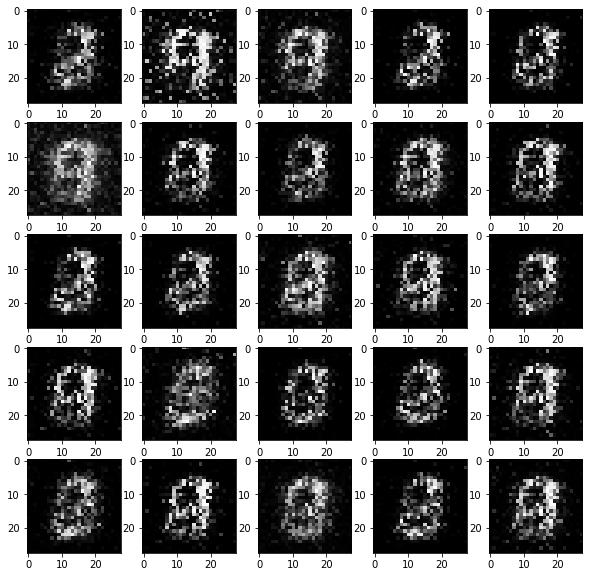

epochs 10


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 9ms/step


  0%|          | 1/273 [00:00<02:22,  1.91it/s]

4/4 [==============================] - 0s 11ms/step


  1%|          | 2/273 [00:01<02:16,  1.98it/s]

4/4 [==============================] - 0s 12ms/step


  1%|          | 3/273 [00:01<02:16,  1.98it/s]

4/4 [==============================] - 0s 12ms/step


  1%|▏         | 4/273 [00:02<02:16,  1.97it/s]

4/4 [==============================] - 0s 13ms/step


  2%|▏         | 5/273 [00:02<02:16,  1.96it/s]

4/4 [==============================] - 0s 9ms/step


  2%|▏         | 6/273 [00:03<02:12,  2.02it/s]

4/4 [==============================] - 0s 11ms/step


  3%|▎         | 7/273 [00:03<02:12,  2.01it/s]

4/4 [==============================] - 0s 9ms/step


  3%|▎         | 8/273 [00:03<02:05,  2.11it/s]

4/4 [==============================] - 0s 14ms/step


  3%|▎         | 9/273 [00:04<01:54,  2.30it/s]

4/4 [==============================] - 0s 8ms/step


  4%|▎         | 10/273 [00:04<01:45,  2.49it/s]

4/4 [==============================] - 0s 9ms/step


  4%|▍         | 11/273 [00:05<01:44,  2.52it/s]

4/4 [==============================] - 0s 10ms/step


  4%|▍         | 12/273 [00:05<01:40,  2.59it/s]

4/4 [==============================] - 0s 9ms/step


  5%|▍         | 13/273 [00:05<01:35,  2.72it/s]

4/4 [==============================] - 0s 8ms/step


  5%|▌         | 14/273 [00:06<01:31,  2.83it/s]

4/4 [==============================] - 0s 10ms/step


  5%|▌         | 15/273 [00:06<01:29,  2.89it/s]

4/4 [==============================] - 0s 10ms/step


  6%|▌         | 16/273 [00:06<01:27,  2.92it/s]

4/4 [==============================] - 0s 10ms/step


  6%|▌         | 17/273 [00:07<01:26,  2.95it/s]

4/4 [==============================] - 0s 9ms/step


  7%|▋         | 18/273 [00:07<01:25,  2.97it/s]

4/4 [==============================] - 0s 8ms/step


  7%|▋         | 19/273 [00:07<01:25,  2.96it/s]

4/4 [==============================] - 0s 8ms/step


  7%|▋         | 20/273 [00:08<01:26,  2.92it/s]

4/4 [==============================] - 0s 13ms/step


  8%|▊         | 21/273 [00:08<01:25,  2.94it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 22/273 [00:08<01:25,  2.95it/s]

4/4 [==============================] - 0s 8ms/step


  8%|▊         | 23/273 [00:09<01:23,  2.98it/s]

4/4 [==============================] - 0s 12ms/step


  9%|▉         | 24/273 [00:09<01:22,  3.02it/s]

4/4 [==============================] - 0s 9ms/step


  9%|▉         | 25/273 [00:09<01:22,  3.01it/s]

4/4 [==============================] - 0s 8ms/step


 10%|▉         | 26/273 [00:10<01:21,  3.03it/s]

4/4 [==============================] - 0s 8ms/step


 10%|▉         | 27/273 [00:10<01:21,  3.01it/s]

4/4 [==============================] - 0s 10ms/step


 10%|█         | 28/273 [00:10<01:20,  3.05it/s]

4/4 [==============================] - 0s 7ms/step


 11%|█         | 29/273 [00:10<01:19,  3.08it/s]

4/4 [==============================] - 0s 11ms/step


 11%|█         | 30/273 [00:11<01:20,  3.02it/s]

4/4 [==============================] - 0s 8ms/step


 11%|█▏        | 31/273 [00:11<01:19,  3.05it/s]

4/4 [==============================] - 0s 10ms/step


 12%|█▏        | 32/273 [00:11<01:18,  3.08it/s]

4/4 [==============================] - 0s 8ms/step


 12%|█▏        | 33/273 [00:12<01:17,  3.08it/s]

4/4 [==============================] - 0s 8ms/step


 12%|█▏        | 34/273 [00:12<01:18,  3.04it/s]

4/4 [==============================] - 0s 10ms/step


 13%|█▎        | 35/273 [00:12<01:17,  3.07it/s]

4/4 [==============================] - 0s 9ms/step


 13%|█▎        | 36/273 [00:13<01:18,  3.04it/s]

4/4 [==============================] - 0s 8ms/step


 14%|█▎        | 37/273 [00:13<01:20,  2.93it/s]

4/4 [==============================] - 0s 13ms/step


 14%|█▍        | 38/273 [00:13<01:18,  2.98it/s]

4/4 [==============================] - 0s 8ms/step


 14%|█▍        | 39/273 [00:14<01:18,  2.98it/s]

4/4 [==============================] - 0s 8ms/step


 15%|█▍        | 40/273 [00:14<01:18,  2.97it/s]

4/4 [==============================] - 0s 11ms/step


 15%|█▌        | 41/273 [00:14<01:18,  2.95it/s]

4/4 [==============================] - 0s 8ms/step


 15%|█▌        | 42/273 [00:15<01:18,  2.95it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▌        | 43/273 [00:15<01:19,  2.90it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▌        | 44/273 [00:16<01:18,  2.90it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▋        | 45/273 [00:16<01:17,  2.92it/s]

4/4 [==============================] - 0s 12ms/step


 17%|█▋        | 46/273 [00:16<01:17,  2.94it/s]

4/4 [==============================] - 0s 11ms/step


 17%|█▋        | 47/273 [00:17<01:16,  2.96it/s]

4/4 [==============================] - 0s 8ms/step


 18%|█▊        | 48/273 [00:17<01:14,  3.01it/s]

4/4 [==============================] - 0s 8ms/step


 18%|█▊        | 49/273 [00:17<01:13,  3.04it/s]

4/4 [==============================] - 0s 9ms/step


 18%|█▊        | 50/273 [00:18<01:14,  3.00it/s]

4/4 [==============================] - 0s 11ms/step


 19%|█▊        | 51/273 [00:18<01:14,  2.98it/s]

4/4 [==============================] - 0s 10ms/step


 19%|█▉        | 52/273 [00:18<01:12,  3.04it/s]

4/4 [==============================] - 0s 10ms/step


 19%|█▉        | 53/273 [00:19<01:14,  2.96it/s]

4/4 [==============================] - 0s 9ms/step


 20%|█▉        | 54/273 [00:19<01:12,  3.01it/s]

4/4 [==============================] - 0s 8ms/step


 20%|██        | 55/273 [00:19<01:12,  3.02it/s]

4/4 [==============================] - 0s 10ms/step


 21%|██        | 56/273 [00:20<01:11,  3.03it/s]

4/4 [==============================] - 0s 8ms/step


 21%|██        | 57/273 [00:20<01:11,  3.01it/s]

4/4 [==============================] - 0s 8ms/step


 21%|██        | 58/273 [00:20<01:11,  3.03it/s]

4/4 [==============================] - 0s 8ms/step


 22%|██▏       | 59/273 [00:21<01:11,  3.01it/s]

4/4 [==============================] - 0s 10ms/step


 22%|██▏       | 60/273 [00:21<01:10,  3.01it/s]

4/4 [==============================] - 0s 8ms/step


 22%|██▏       | 61/273 [00:21<01:09,  3.06it/s]

4/4 [==============================] - 0s 10ms/step


 23%|██▎       | 62/273 [00:22<01:10,  2.98it/s]

4/4 [==============================] - 0s 8ms/step


 23%|██▎       | 63/273 [00:22<01:09,  3.03it/s]

4/4 [==============================] - 0s 9ms/step


 23%|██▎       | 64/273 [00:22<01:09,  3.00it/s]

4/4 [==============================] - 0s 9ms/step


 24%|██▍       | 65/273 [00:23<01:09,  3.00it/s]

4/4 [==============================] - 0s 8ms/step


 24%|██▍       | 66/273 [00:23<01:09,  2.97it/s]

4/4 [==============================] - 0s 7ms/step


 25%|██▍       | 67/273 [00:23<01:08,  3.01it/s]

4/4 [==============================] - 0s 11ms/step


 25%|██▍       | 68/273 [00:24<01:08,  2.99it/s]

4/4 [==============================] - 0s 8ms/step


 25%|██▌       | 69/273 [00:24<01:11,  2.85it/s]

4/4 [==============================] - 0s 9ms/step


 26%|██▌       | 70/273 [00:24<01:09,  2.93it/s]

4/4 [==============================] - 0s 9ms/step


 26%|██▌       | 71/273 [00:25<01:09,  2.90it/s]

4/4 [==============================] - 0s 11ms/step


 26%|██▋       | 72/273 [00:25<01:07,  2.96it/s]

4/4 [==============================] - 0s 11ms/step


 27%|██▋       | 73/273 [00:25<01:07,  2.97it/s]

4/4 [==============================] - 0s 11ms/step


 27%|██▋       | 74/273 [00:26<01:07,  2.95it/s]

4/4 [==============================] - 0s 8ms/step


 27%|██▋       | 75/273 [00:26<01:08,  2.89it/s]

4/4 [==============================] - 0s 9ms/step


 28%|██▊       | 76/273 [00:26<01:06,  2.94it/s]

4/4 [==============================] - 0s 11ms/step


 28%|██▊       | 77/273 [00:27<01:07,  2.93it/s]

4/4 [==============================] - 0s 12ms/step


 29%|██▊       | 78/273 [00:27<01:06,  2.95it/s]

4/4 [==============================] - 0s 8ms/step


 29%|██▉       | 79/273 [00:27<01:07,  2.89it/s]

4/4 [==============================] - 0s 10ms/step


 29%|██▉       | 80/273 [00:28<01:06,  2.89it/s]

4/4 [==============================] - 0s 10ms/step


 30%|██▉       | 81/273 [00:28<01:06,  2.89it/s]

4/4 [==============================] - 0s 10ms/step


 30%|███       | 82/273 [00:28<01:05,  2.93it/s]

4/4 [==============================] - 0s 9ms/step


 30%|███       | 83/273 [00:29<01:05,  2.92it/s]

4/4 [==============================] - 0s 9ms/step


 31%|███       | 84/273 [00:29<01:04,  2.95it/s]

4/4 [==============================] - 0s 10ms/step


 31%|███       | 85/273 [00:29<01:02,  3.00it/s]

4/4 [==============================] - 0s 9ms/step


 32%|███▏      | 86/273 [00:30<01:02,  2.98it/s]

4/4 [==============================] - 0s 10ms/step


 32%|███▏      | 87/273 [00:30<01:02,  2.96it/s]

4/4 [==============================] - 0s 11ms/step


 32%|███▏      | 88/273 [00:30<01:02,  2.97it/s]

4/4 [==============================] - 0s 9ms/step


 33%|███▎      | 89/273 [00:31<01:02,  2.95it/s]

4/4 [==============================] - 0s 11ms/step


 33%|███▎      | 90/273 [00:31<01:01,  2.99it/s]

4/4 [==============================] - 0s 14ms/step


 33%|███▎      | 91/273 [00:31<01:00,  3.01it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▎      | 92/273 [00:32<01:00,  3.01it/s]

4/4 [==============================] - 0s 10ms/step


 34%|███▍      | 93/273 [00:32<01:00,  3.00it/s]

4/4 [==============================] - 0s 14ms/step


 34%|███▍      | 94/273 [00:32<01:01,  2.89it/s]

4/4 [==============================] - 0s 10ms/step


 35%|███▍      | 95/273 [00:33<01:04,  2.76it/s]

4/4 [==============================] - 0s 8ms/step


 35%|███▌      | 96/273 [00:33<01:02,  2.85it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▌      | 97/273 [00:33<01:00,  2.92it/s]

4/4 [==============================] - 0s 10ms/step


 36%|███▌      | 98/273 [00:34<01:00,  2.87it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▋      | 99/273 [00:34<00:58,  2.96it/s]

4/4 [==============================] - 0s 11ms/step


 37%|███▋      | 100/273 [00:34<00:57,  3.01it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 101/273 [00:35<01:01,  2.81it/s]

4/4 [==============================] - 0s 10ms/step


 37%|███▋      | 102/273 [00:35<00:59,  2.86it/s]

4/4 [==============================] - 0s 9ms/step


 38%|███▊      | 103/273 [00:35<00:57,  2.94it/s]

4/4 [==============================] - 0s 8ms/step


 38%|███▊      | 104/273 [00:36<00:57,  2.93it/s]

4/4 [==============================] - 0s 8ms/step


 38%|███▊      | 105/273 [00:36<00:56,  2.99it/s]

4/4 [==============================] - 0s 13ms/step


 39%|███▉      | 106/273 [00:37<00:58,  2.83it/s]

4/4 [==============================] - 0s 10ms/step


 39%|███▉      | 107/273 [00:37<00:59,  2.80it/s]

4/4 [==============================] - 0s 10ms/step


 40%|███▉      | 108/273 [00:37<00:56,  2.90it/s]

4/4 [==============================] - 0s 7ms/step


 40%|███▉      | 109/273 [00:38<00:55,  2.94it/s]

4/4 [==============================] - 0s 8ms/step


 40%|████      | 110/273 [00:38<00:55,  2.96it/s]

4/4 [==============================] - 0s 8ms/step


 41%|████      | 111/273 [00:38<00:53,  3.01it/s]

4/4 [==============================] - 0s 11ms/step


 41%|████      | 112/273 [00:39<00:53,  3.02it/s]

4/4 [==============================] - 0s 8ms/step


 41%|████▏     | 113/273 [00:39<00:53,  2.99it/s]

4/4 [==============================] - 0s 9ms/step


 42%|████▏     | 114/273 [00:39<00:52,  3.04it/s]

4/4 [==============================] - 0s 9ms/step


 42%|████▏     | 115/273 [00:40<00:51,  3.06it/s]

4/4 [==============================] - 0s 16ms/step


 42%|████▏     | 116/273 [00:40<00:51,  3.03it/s]

4/4 [==============================] - 0s 9ms/step


 43%|████▎     | 117/273 [00:40<00:51,  3.00it/s]

4/4 [==============================] - 0s 8ms/step


 43%|████▎     | 118/273 [00:41<00:51,  3.02it/s]

4/4 [==============================] - 0s 12ms/step


 44%|████▎     | 119/273 [00:41<00:51,  2.98it/s]

4/4 [==============================] - 0s 10ms/step


 44%|████▍     | 120/273 [00:41<00:51,  3.00it/s]

4/4 [==============================] - 0s 8ms/step


 44%|████▍     | 121/273 [00:42<00:53,  2.86it/s]

4/4 [==============================] - 0s 10ms/step


 45%|████▍     | 122/273 [00:42<00:52,  2.90it/s]

4/4 [==============================] - 0s 8ms/step


 45%|████▌     | 123/273 [00:42<00:51,  2.92it/s]

4/4 [==============================] - 0s 9ms/step


 45%|████▌     | 124/273 [00:43<00:50,  2.92it/s]

4/4 [==============================] - 0s 10ms/step


 46%|████▌     | 125/273 [00:43<00:50,  2.94it/s]

4/4 [==============================] - 0s 11ms/step


 46%|████▌     | 126/273 [00:43<00:49,  2.94it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 127/273 [00:44<00:50,  2.91it/s]

4/4 [==============================] - 0s 10ms/step


 47%|████▋     | 128/273 [00:44<00:49,  2.91it/s]

4/4 [==============================] - 0s 11ms/step


 47%|████▋     | 129/273 [00:44<00:49,  2.92it/s]

4/4 [==============================] - 0s 9ms/step


 48%|████▊     | 130/273 [00:45<00:48,  2.97it/s]

4/4 [==============================] - 0s 11ms/step


 48%|████▊     | 131/273 [00:45<00:47,  2.98it/s]

4/4 [==============================] - 0s 7ms/step


 48%|████▊     | 132/273 [00:45<00:46,  3.02it/s]

4/4 [==============================] - 0s 9ms/step


 49%|████▊     | 133/273 [00:46<00:48,  2.88it/s]

4/4 [==============================] - 0s 10ms/step


 49%|████▉     | 134/273 [00:46<00:48,  2.89it/s]

4/4 [==============================] - 0s 10ms/step


 49%|████▉     | 135/273 [00:46<00:47,  2.91it/s]

4/4 [==============================] - 0s 9ms/step


 50%|████▉     | 136/273 [00:47<00:47,  2.89it/s]

4/4 [==============================] - 0s 9ms/step


 50%|█████     | 137/273 [00:47<00:48,  2.78it/s]

4/4 [==============================] - 0s 10ms/step


 51%|█████     | 138/273 [00:48<00:50,  2.65it/s]

4/4 [==============================] - 0s 10ms/step


 51%|█████     | 139/273 [00:48<00:49,  2.72it/s]

4/4 [==============================] - 0s 9ms/step


 51%|█████▏    | 140/273 [00:48<00:47,  2.80it/s]

4/4 [==============================] - 0s 7ms/step


 52%|█████▏    | 141/273 [00:49<00:45,  2.89it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 142/273 [00:49<00:45,  2.87it/s]

4/4 [==============================] - 0s 10ms/step


 52%|█████▏    | 143/273 [00:49<00:44,  2.93it/s]

4/4 [==============================] - 0s 10ms/step


 53%|█████▎    | 144/273 [00:50<00:43,  2.93it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 145/273 [00:50<00:45,  2.84it/s]

4/4 [==============================] - 0s 8ms/step


 53%|█████▎    | 146/273 [00:50<00:43,  2.92it/s]

4/4 [==============================] - 0s 11ms/step


 54%|█████▍    | 147/273 [00:51<00:43,  2.92it/s]

4/4 [==============================] - 0s 8ms/step


 54%|█████▍    | 148/273 [00:51<00:42,  2.96it/s]

4/4 [==============================] - 0s 13ms/step


 55%|█████▍    | 149/273 [00:51<00:41,  2.96it/s]

4/4 [==============================] - 0s 10ms/step


 55%|█████▍    | 150/273 [00:52<00:41,  2.94it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▌    | 151/273 [00:52<00:41,  2.97it/s]

4/4 [==============================] - 0s 10ms/step


 56%|█████▌    | 152/273 [00:52<00:40,  2.97it/s]

4/4 [==============================] - 0s 10ms/step


 56%|█████▌    | 153/273 [00:53<00:41,  2.91it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▋    | 154/273 [00:53<00:40,  2.95it/s]

4/4 [==============================] - 0s 12ms/step


 57%|█████▋    | 155/273 [00:53<00:40,  2.91it/s]

4/4 [==============================] - 0s 10ms/step


 57%|█████▋    | 156/273 [00:54<00:42,  2.75it/s]

4/4 [==============================] - 0s 10ms/step


 58%|█████▊    | 157/273 [00:54<00:41,  2.80it/s]

4/4 [==============================] - 0s 8ms/step


 58%|█████▊    | 158/273 [00:54<00:40,  2.83it/s]

4/4 [==============================] - 0s 11ms/step


 58%|█████▊    | 159/273 [00:55<00:40,  2.82it/s]

4/4 [==============================] - 0s 10ms/step


 59%|█████▊    | 160/273 [00:55<00:39,  2.87it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▉    | 161/273 [00:55<00:38,  2.89it/s]

4/4 [==============================] - 0s 16ms/step


 59%|█████▉    | 162/273 [00:56<00:39,  2.81it/s]

4/4 [==============================] - 0s 8ms/step


 60%|█████▉    | 163/273 [00:56<00:39,  2.78it/s]

4/4 [==============================] - 0s 9ms/step


 60%|██████    | 164/273 [00:57<00:38,  2.82it/s]

4/4 [==============================] - 0s 9ms/step


 60%|██████    | 165/273 [00:57<00:39,  2.75it/s]

4/4 [==============================] - 0s 10ms/step


 61%|██████    | 166/273 [00:57<00:38,  2.78it/s]

4/4 [==============================] - 0s 9ms/step


 61%|██████    | 167/273 [00:58<00:39,  2.71it/s]

4/4 [==============================] - 0s 12ms/step


 62%|██████▏   | 168/273 [00:58<00:37,  2.77it/s]

4/4 [==============================] - 0s 9ms/step


 62%|██████▏   | 169/273 [00:58<00:37,  2.79it/s]

4/4 [==============================] - 0s 11ms/step


 62%|██████▏   | 170/273 [00:59<00:36,  2.83it/s]

4/4 [==============================] - 0s 11ms/step


 63%|██████▎   | 171/273 [00:59<00:35,  2.89it/s]

4/4 [==============================] - 0s 11ms/step


 63%|██████▎   | 172/273 [00:59<00:34,  2.92it/s]

4/4 [==============================] - 0s 8ms/step


 63%|██████▎   | 173/273 [01:00<00:34,  2.88it/s]

4/4 [==============================] - 0s 8ms/step


 64%|██████▎   | 174/273 [01:00<00:33,  2.93it/s]

4/4 [==============================] - 0s 8ms/step


 64%|██████▍   | 175/273 [01:00<00:34,  2.83it/s]

4/4 [==============================] - 0s 10ms/step


 64%|██████▍   | 176/273 [01:01<00:35,  2.77it/s]

4/4 [==============================] - 0s 8ms/step


 65%|██████▍   | 177/273 [01:01<00:33,  2.86it/s]

4/4 [==============================] - 0s 9ms/step


 65%|██████▌   | 178/273 [01:01<00:32,  2.91it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▌   | 179/273 [01:02<00:32,  2.89it/s]

4/4 [==============================] - 0s 10ms/step


 66%|██████▌   | 180/273 [01:02<00:31,  2.96it/s]

4/4 [==============================] - 0s 10ms/step


 66%|██████▋   | 181/273 [01:02<00:31,  2.96it/s]

4/4 [==============================] - 0s 8ms/step


 67%|██████▋   | 182/273 [01:03<00:31,  2.92it/s]

4/4 [==============================] - 0s 9ms/step


 67%|██████▋   | 183/273 [01:03<00:30,  2.96it/s]

4/4 [==============================] - 0s 8ms/step


 67%|██████▋   | 184/273 [01:03<00:29,  2.99it/s]

4/4 [==============================] - 0s 9ms/step


 68%|██████▊   | 185/273 [01:04<00:29,  2.97it/s]

4/4 [==============================] - 0s 10ms/step


 68%|██████▊   | 186/273 [01:04<00:29,  2.96it/s]

4/4 [==============================] - 0s 10ms/step


 68%|██████▊   | 187/273 [01:04<00:29,  2.93it/s]

4/4 [==============================] - 0s 8ms/step


 69%|██████▉   | 188/273 [01:05<00:29,  2.91it/s]

4/4 [==============================] - 0s 8ms/step


 69%|██████▉   | 189/273 [01:05<00:28,  2.96it/s]

4/4 [==============================] - 0s 8ms/step


 70%|██████▉   | 190/273 [01:05<00:27,  2.98it/s]

4/4 [==============================] - 0s 8ms/step


 70%|██████▉   | 191/273 [01:06<00:28,  2.93it/s]

4/4 [==============================] - 0s 9ms/step


 70%|███████   | 192/273 [01:06<00:27,  2.95it/s]

4/4 [==============================] - 0s 8ms/step


 71%|███████   | 193/273 [01:07<00:28,  2.85it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████   | 194/273 [01:07<00:27,  2.88it/s]

4/4 [==============================] - 0s 8ms/step


 71%|███████▏  | 195/273 [01:07<00:26,  2.94it/s]

4/4 [==============================] - 0s 10ms/step


 72%|███████▏  | 196/273 [01:08<00:25,  2.97it/s]

4/4 [==============================] - 0s 10ms/step


 72%|███████▏  | 197/273 [01:08<00:27,  2.81it/s]

4/4 [==============================] - 0s 11ms/step


 73%|███████▎  | 198/273 [01:08<00:26,  2.88it/s]

4/4 [==============================] - 0s 7ms/step


 73%|███████▎  | 199/273 [01:09<00:26,  2.78it/s]

4/4 [==============================] - 0s 9ms/step


 73%|███████▎  | 200/273 [01:09<00:25,  2.85it/s]

4/4 [==============================] - 0s 10ms/step


 74%|███████▎  | 201/273 [01:09<00:25,  2.86it/s]

4/4 [==============================] - 0s 10ms/step


 74%|███████▍  | 202/273 [01:10<00:24,  2.89it/s]

4/4 [==============================] - 0s 10ms/step


 74%|███████▍  | 203/273 [01:10<00:25,  2.71it/s]

4/4 [==============================] - 0s 10ms/step


 75%|███████▍  | 204/273 [01:10<00:24,  2.80it/s]

4/4 [==============================] - 0s 9ms/step


 75%|███████▌  | 205/273 [01:11<00:25,  2.69it/s]

4/4 [==============================] - 0s 13ms/step


 75%|███████▌  | 206/273 [01:11<00:25,  2.66it/s]

4/4 [==============================] - 0s 8ms/step


 76%|███████▌  | 207/273 [01:12<00:23,  2.76it/s]

4/4 [==============================] - 0s 10ms/step


 76%|███████▌  | 208/273 [01:12<00:22,  2.83it/s]

4/4 [==============================] - 0s 13ms/step


 77%|███████▋  | 209/273 [01:12<00:23,  2.72it/s]

4/4 [==============================] - 0s 11ms/step


 77%|███████▋  | 210/273 [01:13<00:22,  2.78it/s]

4/4 [==============================] - 0s 10ms/step


 77%|███████▋  | 211/273 [01:13<00:21,  2.85it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 212/273 [01:13<00:21,  2.85it/s]

4/4 [==============================] - 0s 11ms/step


 78%|███████▊  | 213/273 [01:14<00:20,  2.88it/s]

4/4 [==============================] - 0s 12ms/step


 78%|███████▊  | 214/273 [01:14<00:20,  2.89it/s]

4/4 [==============================] - 0s 10ms/step


 79%|███████▉  | 215/273 [01:14<00:20,  2.90it/s]

4/4 [==============================] - 0s 9ms/step


 79%|███████▉  | 216/273 [01:15<00:19,  2.92it/s]

4/4 [==============================] - 0s 8ms/step


 79%|███████▉  | 217/273 [01:15<00:19,  2.94it/s]

4/4 [==============================] - 0s 12ms/step


 80%|███████▉  | 218/273 [01:15<00:18,  2.97it/s]

4/4 [==============================] - 0s 9ms/step


 80%|████████  | 219/273 [01:16<00:18,  2.94it/s]

4/4 [==============================] - 0s 10ms/step


 81%|████████  | 220/273 [01:16<00:18,  2.84it/s]

4/4 [==============================] - 0s 9ms/step


 81%|████████  | 221/273 [01:16<00:18,  2.87it/s]

4/4 [==============================] - 0s 10ms/step


 81%|████████▏ | 222/273 [01:17<00:17,  2.89it/s]

4/4 [==============================] - 0s 8ms/step


 82%|████████▏ | 223/273 [01:17<00:17,  2.83it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 224/273 [01:17<00:17,  2.85it/s]

4/4 [==============================] - 0s 12ms/step


 82%|████████▏ | 225/273 [01:18<00:16,  2.88it/s]

4/4 [==============================] - 0s 9ms/step


 83%|████████▎ | 226/273 [01:18<00:16,  2.90it/s]

4/4 [==============================] - 0s 9ms/step


 83%|████████▎ | 227/273 [01:18<00:15,  2.91it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▎ | 228/273 [01:19<00:15,  2.93it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▍ | 229/273 [01:19<00:14,  2.97it/s]

4/4 [==============================] - 0s 14ms/step


 84%|████████▍ | 230/273 [01:19<00:14,  2.91it/s]

4/4 [==============================] - 0s 11ms/step


 85%|████████▍ | 231/273 [01:20<00:14,  2.88it/s]

4/4 [==============================] - 0s 10ms/step


 85%|████████▍ | 232/273 [01:20<00:14,  2.77it/s]

4/4 [==============================] - 0s 8ms/step


 85%|████████▌ | 233/273 [01:21<00:14,  2.80it/s]

4/4 [==============================] - 0s 12ms/step


 86%|████████▌ | 234/273 [01:21<00:13,  2.85it/s]

4/4 [==============================] - 0s 10ms/step


 86%|████████▌ | 235/273 [01:21<00:13,  2.90it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▋ | 236/273 [01:22<00:12,  2.86it/s]

4/4 [==============================] - 0s 11ms/step


 87%|████████▋ | 237/273 [01:22<00:12,  2.87it/s]

4/4 [==============================] - 0s 9ms/step


 87%|████████▋ | 238/273 [01:22<00:11,  2.92it/s]

4/4 [==============================] - 0s 10ms/step


 88%|████████▊ | 239/273 [01:23<00:11,  2.91it/s]

4/4 [==============================] - 0s 13ms/step


 88%|████████▊ | 240/273 [01:23<00:11,  2.87it/s]

4/4 [==============================] - 0s 13ms/step


 88%|████████▊ | 241/273 [01:23<00:11,  2.87it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▊ | 242/273 [01:24<00:11,  2.72it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▉ | 243/273 [01:24<00:10,  2.82it/s]

4/4 [==============================] - 0s 10ms/step


 89%|████████▉ | 244/273 [01:24<00:10,  2.89it/s]

4/4 [==============================] - 0s 11ms/step


 90%|████████▉ | 245/273 [01:25<00:09,  2.85it/s]

4/4 [==============================] - 0s 9ms/step


 90%|█████████ | 246/273 [01:25<00:09,  2.89it/s]

4/4 [==============================] - 0s 10ms/step


 90%|█████████ | 247/273 [01:25<00:08,  2.92it/s]

4/4 [==============================] - 0s 10ms/step


 91%|█████████ | 248/273 [01:26<00:08,  2.91it/s]

4/4 [==============================] - 0s 11ms/step


 91%|█████████ | 249/273 [01:26<00:08,  2.91it/s]

4/4 [==============================] - 0s 8ms/step


 92%|█████████▏| 250/273 [01:26<00:07,  2.93it/s]

4/4 [==============================] - 0s 8ms/step


 92%|█████████▏| 251/273 [01:27<00:07,  2.89it/s]

4/4 [==============================] - 0s 8ms/step


 92%|█████████▏| 252/273 [01:27<00:07,  2.95it/s]

4/4 [==============================] - 0s 11ms/step


 93%|█████████▎| 253/273 [01:28<00:07,  2.77it/s]

4/4 [==============================] - 0s 11ms/step


 93%|█████████▎| 254/273 [01:28<00:06,  2.73it/s]

4/4 [==============================] - 0s 10ms/step


 93%|█████████▎| 255/273 [01:28<00:06,  2.74it/s]

4/4 [==============================] - 0s 9ms/step


 94%|█████████▍| 256/273 [01:29<00:06,  2.76it/s]

4/4 [==============================] - 0s 9ms/step


 94%|█████████▍| 257/273 [01:29<00:05,  2.73it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▍| 258/273 [01:29<00:05,  2.70it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▍| 259/273 [01:30<00:05,  2.74it/s]

4/4 [==============================] - 0s 12ms/step


 95%|█████████▌| 260/273 [01:30<00:04,  2.84it/s]

4/4 [==============================] - 0s 8ms/step


 96%|█████████▌| 261/273 [01:30<00:04,  2.92it/s]

4/4 [==============================] - 0s 9ms/step


 96%|█████████▌| 262/273 [01:31<00:04,  2.74it/s]

4/4 [==============================] - 0s 11ms/step


 96%|█████████▋| 263/273 [01:31<00:03,  2.80it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 264/273 [01:31<00:03,  2.87it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 265/273 [01:32<00:02,  2.92it/s]

4/4 [==============================] - 0s 14ms/step


 97%|█████████▋| 266/273 [01:32<00:02,  2.85it/s]

4/4 [==============================] - 0s 10ms/step


 98%|█████████▊| 267/273 [01:33<00:02,  2.90it/s]

4/4 [==============================] - 0s 10ms/step


 98%|█████████▊| 268/273 [01:33<00:01,  2.76it/s]

4/4 [==============================] - 0s 8ms/step


 99%|█████████▊| 269/273 [01:33<00:01,  2.80it/s]

4/4 [==============================] - 0s 8ms/step


 99%|█████████▉| 270/273 [01:34<00:01,  2.89it/s]

4/4 [==============================] - 0s 8ms/step


 99%|█████████▉| 271/273 [01:34<00:00,  2.80it/s]

4/4 [==============================] - 0s 11ms/step


100%|█████████▉| 272/273 [01:34<00:00,  2.87it/s]

4/4 [==============================] - 0s 9ms/step


100%|██████████| 273/273 [01:35<00:00,  2.87it/s]


loss is 0.02197931334376335 |*| 0.24443572759628296
1/1 [==============================] - 0s 26ms/step


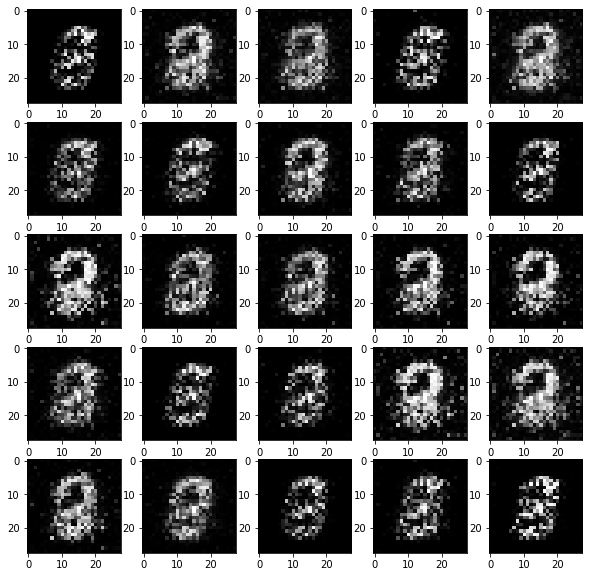

epochs 11


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 9ms/step


  0%|          | 1/273 [00:00<01:54,  2.38it/s]

4/4 [==============================] - 0s 8ms/step


  1%|          | 2/273 [00:00<01:41,  2.66it/s]

4/4 [==============================] - 0s 10ms/step


  1%|          | 3/273 [00:01<01:38,  2.73it/s]

4/4 [==============================] - 0s 10ms/step


  1%|▏         | 4/273 [00:01<01:35,  2.81it/s]

4/4 [==============================] - 0s 9ms/step


  2%|▏         | 5/273 [00:01<01:34,  2.84it/s]

4/4 [==============================] - 0s 11ms/step


  2%|▏         | 6/273 [00:02<01:39,  2.70it/s]

4/4 [==============================] - 0s 10ms/step


  3%|▎         | 7/273 [00:02<01:36,  2.75it/s]

4/4 [==============================] - 0s 11ms/step


  3%|▎         | 8/273 [00:03<01:43,  2.56it/s]

4/4 [==============================] - 0s 11ms/step


  3%|▎         | 9/273 [00:03<01:52,  2.34it/s]

4/4 [==============================] - 0s 13ms/step


  4%|▎         | 10/273 [00:04<02:00,  2.18it/s]

4/4 [==============================] - 0s 10ms/step


  4%|▍         | 11/273 [00:04<02:01,  2.16it/s]

4/4 [==============================] - 0s 20ms/step


  4%|▍         | 12/273 [00:05<02:05,  2.08it/s]

4/4 [==============================] - 0s 12ms/step


  5%|▍         | 13/273 [00:05<02:13,  1.95it/s]

4/4 [==============================] - 0s 10ms/step


  5%|▌         | 14/273 [00:06<02:12,  1.96it/s]

4/4 [==============================] - 0s 14ms/step


  5%|▌         | 15/273 [00:06<02:08,  2.01it/s]

4/4 [==============================] - 0s 10ms/step


  6%|▌         | 16/273 [00:07<02:01,  2.11it/s]

4/4 [==============================] - 0s 10ms/step


  6%|▌         | 17/273 [00:07<01:52,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


  7%|▋         | 18/273 [00:07<01:44,  2.45it/s]

4/4 [==============================] - 0s 9ms/step


  7%|▋         | 19/273 [00:08<01:38,  2.57it/s]

4/4 [==============================] - 0s 9ms/step


  7%|▋         | 20/273 [00:08<01:34,  2.67it/s]

4/4 [==============================] - 0s 8ms/step


  8%|▊         | 21/273 [00:08<01:31,  2.76it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 22/273 [00:09<01:29,  2.81it/s]

4/4 [==============================] - 0s 11ms/step


  8%|▊         | 23/273 [00:09<01:28,  2.82it/s]

4/4 [==============================] - 0s 13ms/step


  9%|▉         | 24/273 [00:09<01:27,  2.84it/s]

4/4 [==============================] - 0s 8ms/step


  9%|▉         | 25/273 [00:10<01:25,  2.89it/s]

4/4 [==============================] - 0s 13ms/step


 10%|▉         | 26/273 [00:10<01:29,  2.76it/s]

4/4 [==============================] - 0s 8ms/step


 10%|▉         | 27/273 [00:10<01:26,  2.84it/s]

4/4 [==============================] - 0s 10ms/step


 10%|█         | 28/273 [00:11<01:29,  2.75it/s]

4/4 [==============================] - 0s 9ms/step


 11%|█         | 29/273 [00:11<01:31,  2.68it/s]

4/4 [==============================] - 0s 9ms/step


 11%|█         | 30/273 [00:11<01:27,  2.78it/s]

4/4 [==============================] - 0s 9ms/step


 11%|█▏        | 31/273 [00:12<01:27,  2.77it/s]

4/4 [==============================] - 0s 11ms/step


 12%|█▏        | 32/273 [00:12<01:27,  2.74it/s]

4/4 [==============================] - 0s 10ms/step


 12%|█▏        | 33/273 [00:13<01:27,  2.76it/s]

4/4 [==============================] - 0s 15ms/step


 12%|█▏        | 34/273 [00:13<01:25,  2.79it/s]

4/4 [==============================] - 0s 11ms/step


 13%|█▎        | 35/273 [00:13<01:23,  2.84it/s]

4/4 [==============================] - 0s 8ms/step


 13%|█▎        | 36/273 [00:14<01:21,  2.90it/s]

4/4 [==============================] - 0s 10ms/step


 14%|█▎        | 37/273 [00:14<01:21,  2.88it/s]

4/4 [==============================] - 0s 8ms/step


 14%|█▍        | 38/273 [00:14<01:21,  2.89it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▍        | 39/273 [00:15<01:20,  2.90it/s]

4/4 [==============================] - 0s 8ms/step


 15%|█▍        | 40/273 [00:15<01:23,  2.80it/s]

4/4 [==============================] - 0s 16ms/step


 15%|█▌        | 41/273 [00:15<01:24,  2.76it/s]

4/4 [==============================] - 0s 9ms/step


 15%|█▌        | 42/273 [00:16<01:23,  2.78it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▌        | 43/273 [00:16<01:22,  2.78it/s]

4/4 [==============================] - 0s 10ms/step


 16%|█▌        | 44/273 [00:16<01:20,  2.85it/s]

4/4 [==============================] - 0s 12ms/step


 16%|█▋        | 45/273 [00:17<01:19,  2.88it/s]

4/4 [==============================] - 0s 9ms/step


 17%|█▋        | 46/273 [00:17<01:21,  2.79it/s]

4/4 [==============================] - 0s 11ms/step


 17%|█▋        | 47/273 [00:17<01:19,  2.84it/s]

4/4 [==============================] - 0s 9ms/step


 18%|█▊        | 48/273 [00:18<01:17,  2.89it/s]

4/4 [==============================] - 0s 12ms/step


 18%|█▊        | 49/273 [00:18<01:19,  2.81it/s]

4/4 [==============================] - 0s 10ms/step


 18%|█▊        | 50/273 [00:18<01:17,  2.87it/s]

4/4 [==============================] - 0s 10ms/step


 19%|█▊        | 51/273 [00:19<01:17,  2.87it/s]

4/4 [==============================] - 0s 12ms/step


 19%|█▉        | 52/273 [00:19<01:16,  2.90it/s]

4/4 [==============================] - 0s 10ms/step


 19%|█▉        | 53/273 [00:20<01:15,  2.93it/s]

4/4 [==============================] - 0s 9ms/step


 20%|█▉        | 54/273 [00:20<01:15,  2.88it/s]

4/4 [==============================] - 0s 9ms/step


 20%|██        | 55/273 [00:20<01:16,  2.86it/s]

4/4 [==============================] - 0s 13ms/step


 21%|██        | 56/273 [00:21<01:14,  2.90it/s]

4/4 [==============================] - 0s 10ms/step


 21%|██        | 57/273 [00:21<01:15,  2.86it/s]

4/4 [==============================] - 0s 11ms/step


 21%|██        | 58/273 [00:21<01:15,  2.85it/s]

4/4 [==============================] - 0s 10ms/step


 22%|██▏       | 59/273 [00:22<01:14,  2.89it/s]

4/4 [==============================] - 0s 9ms/step


 22%|██▏       | 60/273 [00:22<01:16,  2.79it/s]

4/4 [==============================] - 0s 9ms/step


 22%|██▏       | 61/273 [00:22<01:15,  2.80it/s]

4/4 [==============================] - 0s 12ms/step


 23%|██▎       | 62/273 [00:23<01:16,  2.77it/s]

4/4 [==============================] - 0s 8ms/step


 23%|██▎       | 63/273 [00:23<01:14,  2.83it/s]

4/4 [==============================] - 0s 10ms/step


 23%|██▎       | 64/273 [00:23<01:16,  2.72it/s]

4/4 [==============================] - 0s 11ms/step


 24%|██▍       | 65/273 [00:24<01:17,  2.68it/s]

4/4 [==============================] - 0s 12ms/step


 24%|██▍       | 66/273 [00:24<01:16,  2.71it/s]

4/4 [==============================] - 0s 12ms/step


 25%|██▍       | 67/273 [00:25<01:14,  2.76it/s]

4/4 [==============================] - 0s 10ms/step


 25%|██▍       | 68/273 [00:25<01:13,  2.80it/s]

4/4 [==============================] - 0s 9ms/step


 25%|██▌       | 69/273 [00:25<01:10,  2.87it/s]

4/4 [==============================] - 0s 12ms/step


 26%|██▌       | 70/273 [00:26<01:10,  2.90it/s]

4/4 [==============================] - 0s 10ms/step


 26%|██▌       | 71/273 [00:26<01:10,  2.88it/s]

4/4 [==============================] - 0s 8ms/step


 26%|██▋       | 72/273 [00:26<01:08,  2.95it/s]

4/4 [==============================] - 0s 8ms/step


 27%|██▋       | 73/273 [00:27<01:08,  2.91it/s]

4/4 [==============================] - 0s 8ms/step


 27%|██▋       | 74/273 [00:27<01:11,  2.78it/s]

4/4 [==============================] - 0s 10ms/step


 27%|██▋       | 75/273 [00:27<01:13,  2.70it/s]

4/4 [==============================] - 0s 10ms/step


 28%|██▊       | 76/273 [00:28<01:10,  2.80it/s]

4/4 [==============================] - 0s 9ms/step


 28%|██▊       | 77/273 [00:28<01:10,  2.79it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▊       | 78/273 [00:28<01:08,  2.86it/s]

4/4 [==============================] - 0s 10ms/step


 29%|██▉       | 79/273 [00:29<01:10,  2.77it/s]

4/4 [==============================] - 0s 14ms/step


 29%|██▉       | 80/273 [00:29<01:08,  2.81it/s]

4/4 [==============================] - 0s 11ms/step


 30%|██▉       | 81/273 [00:30<01:11,  2.69it/s]

4/4 [==============================] - 0s 9ms/step


 30%|███       | 82/273 [00:30<01:12,  2.64it/s]

4/4 [==============================] - 0s 9ms/step


 30%|███       | 83/273 [00:30<01:12,  2.63it/s]

4/4 [==============================] - 0s 10ms/step


 31%|███       | 84/273 [00:31<01:09,  2.71it/s]

4/4 [==============================] - 0s 11ms/step


 31%|███       | 85/273 [00:31<01:08,  2.74it/s]

4/4 [==============================] - 0s 9ms/step


 32%|███▏      | 86/273 [00:31<01:05,  2.84it/s]

4/4 [==============================] - 0s 10ms/step


 32%|███▏      | 87/273 [00:32<01:05,  2.82it/s]

4/4 [==============================] - 0s 10ms/step


 32%|███▏      | 88/273 [00:32<01:04,  2.86it/s]

4/4 [==============================] - 0s 8ms/step


 33%|███▎      | 89/273 [00:32<01:03,  2.90it/s]

4/4 [==============================] - 0s 10ms/step


 33%|███▎      | 90/273 [00:33<01:04,  2.83it/s]

4/4 [==============================] - 0s 9ms/step


 33%|███▎      | 91/273 [00:33<01:05,  2.77it/s]

4/4 [==============================] - 0s 11ms/step


 34%|███▎      | 92/273 [00:33<01:04,  2.83it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▍      | 93/273 [00:34<01:04,  2.81it/s]

4/4 [==============================] - 0s 11ms/step


 34%|███▍      | 94/273 [00:34<01:03,  2.82it/s]

4/4 [==============================] - 0s 9ms/step


 35%|███▍      | 95/273 [00:35<01:02,  2.86it/s]

4/4 [==============================] - 0s 9ms/step


 35%|███▌      | 96/273 [00:35<01:02,  2.84it/s]

4/4 [==============================] - 0s 10ms/step


 36%|███▌      | 97/273 [00:35<01:01,  2.87it/s]

4/4 [==============================] - 0s 12ms/step


 36%|███▌      | 98/273 [00:36<01:00,  2.89it/s]

4/4 [==============================] - 0s 8ms/step


 36%|███▋      | 99/273 [00:36<01:01,  2.84it/s]

4/4 [==============================] - 0s 10ms/step


 37%|███▋      | 100/273 [00:36<01:00,  2.86it/s]

4/4 [==============================] - 0s 11ms/step


 37%|███▋      | 101/273 [00:37<01:01,  2.78it/s]

4/4 [==============================] - 0s 14ms/step


 37%|███▋      | 102/273 [00:37<01:01,  2.78it/s]

4/4 [==============================] - 0s 8ms/step


 38%|███▊      | 103/273 [00:37<01:00,  2.83it/s]

4/4 [==============================] - 0s 8ms/step


 38%|███▊      | 104/273 [00:38<01:01,  2.77it/s]

4/4 [==============================] - 0s 10ms/step


 38%|███▊      | 105/273 [00:38<01:00,  2.78it/s]

4/4 [==============================] - 0s 9ms/step


 39%|███▉      | 106/273 [00:38<00:59,  2.82it/s]

4/4 [==============================] - 0s 9ms/step


 39%|███▉      | 107/273 [00:39<00:58,  2.81it/s]

4/4 [==============================] - 0s 10ms/step


 40%|███▉      | 108/273 [00:39<00:58,  2.84it/s]

4/4 [==============================] - 0s 10ms/step


 40%|███▉      | 109/273 [00:39<00:57,  2.88it/s]

4/4 [==============================] - 0s 10ms/step


 40%|████      | 110/273 [00:40<00:56,  2.91it/s]

4/4 [==============================] - 0s 13ms/step


 41%|████      | 111/273 [00:40<00:56,  2.88it/s]

4/4 [==============================] - 0s 10ms/step


 41%|████      | 112/273 [00:40<00:55,  2.91it/s]

4/4 [==============================] - 0s 10ms/step


 41%|████▏     | 113/273 [00:41<00:55,  2.87it/s]

4/4 [==============================] - 0s 12ms/step


 42%|████▏     | 114/273 [00:41<00:58,  2.74it/s]

4/4 [==============================] - 0s 9ms/step


 42%|████▏     | 115/273 [00:42<00:56,  2.81it/s]

4/4 [==============================] - 0s 10ms/step


 42%|████▏     | 116/273 [00:42<00:56,  2.80it/s]

4/4 [==============================] - 0s 8ms/step


 43%|████▎     | 117/273 [00:42<00:57,  2.73it/s]

4/4 [==============================] - 0s 10ms/step


 43%|████▎     | 118/273 [00:43<00:57,  2.71it/s]

4/4 [==============================] - 0s 11ms/step


 44%|████▎     | 119/273 [00:43<00:57,  2.69it/s]

4/4 [==============================] - 0s 9ms/step


 44%|████▍     | 120/273 [00:43<00:56,  2.69it/s]

4/4 [==============================] - 0s 9ms/step


 44%|████▍     | 121/273 [00:44<00:54,  2.78it/s]

4/4 [==============================] - 0s 11ms/step


 45%|████▍     | 122/273 [00:44<00:56,  2.67it/s]

4/4 [==============================] - 0s 9ms/step


 45%|████▌     | 123/273 [00:45<00:54,  2.77it/s]

4/4 [==============================] - 0s 8ms/step


 45%|████▌     | 124/273 [00:45<00:54,  2.72it/s]

4/4 [==============================] - 0s 9ms/step


 46%|████▌     | 125/273 [00:45<00:53,  2.76it/s]

4/4 [==============================] - 0s 11ms/step


 46%|████▌     | 126/273 [00:46<00:52,  2.81it/s]

4/4 [==============================] - 0s 11ms/step


 47%|████▋     | 127/273 [00:46<00:52,  2.78it/s]

4/4 [==============================] - 0s 8ms/step


 47%|████▋     | 128/273 [00:46<00:52,  2.74it/s]

4/4 [==============================] - 0s 10ms/step


 47%|████▋     | 129/273 [00:47<00:54,  2.66it/s]

4/4 [==============================] - 0s 10ms/step


 48%|████▊     | 130/273 [00:47<00:55,  2.57it/s]

4/4 [==============================] - 0s 10ms/step


 48%|████▊     | 131/273 [00:48<00:58,  2.43it/s]

4/4 [==============================] - 0s 18ms/step


 48%|████▊     | 132/273 [00:48<01:05,  2.16it/s]

4/4 [==============================] - 0s 10ms/step


 49%|████▊     | 133/273 [00:49<01:04,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


 49%|████▉     | 134/273 [00:49<01:06,  2.10it/s]

4/4 [==============================] - 0s 11ms/step


 49%|████▉     | 135/273 [00:50<01:07,  2.04it/s]

4/4 [==============================] - 0s 15ms/step


 50%|████▉     | 136/273 [00:50<01:14,  1.83it/s]

4/4 [==============================] - 0s 12ms/step


 50%|█████     | 137/273 [00:51<01:09,  1.97it/s]

4/4 [==============================] - 0s 8ms/step


 51%|█████     | 138/273 [00:51<01:01,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 51%|█████     | 139/273 [00:52<00:57,  2.31it/s]

4/4 [==============================] - 0s 8ms/step


 51%|█████▏    | 140/273 [00:52<00:53,  2.47it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 141/273 [00:52<00:50,  2.63it/s]

4/4 [==============================] - 0s 8ms/step


 52%|█████▏    | 142/273 [00:53<00:48,  2.72it/s]

4/4 [==============================] - 0s 8ms/step


 52%|█████▏    | 143/273 [00:53<00:49,  2.65it/s]

4/4 [==============================] - 0s 8ms/step


 53%|█████▎    | 144/273 [00:53<00:46,  2.75it/s]

4/4 [==============================] - 0s 8ms/step


 53%|█████▎    | 145/273 [00:54<00:45,  2.81it/s]

4/4 [==============================] - 0s 8ms/step


 53%|█████▎    | 146/273 [00:54<00:47,  2.68it/s]

4/4 [==============================] - 0s 10ms/step


 54%|█████▍    | 147/273 [00:54<00:46,  2.74it/s]

4/4 [==============================] - 0s 9ms/step


 54%|█████▍    | 148/273 [00:55<00:45,  2.74it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▍    | 149/273 [00:55<00:44,  2.81it/s]

4/4 [==============================] - 0s 10ms/step


 55%|█████▍    | 150/273 [00:55<00:45,  2.73it/s]

4/4 [==============================] - 0s 10ms/step


 55%|█████▌    | 151/273 [00:56<00:46,  2.65it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▌    | 152/273 [00:56<00:44,  2.73it/s]

4/4 [==============================] - 0s 8ms/step


 56%|█████▌    | 153/273 [00:57<00:42,  2.81it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▋    | 154/273 [00:57<00:43,  2.74it/s]

4/4 [==============================] - 0s 12ms/step


 57%|█████▋    | 155/273 [00:57<00:41,  2.82it/s]

4/4 [==============================] - 0s 8ms/step


 57%|█████▋    | 156/273 [00:58<00:40,  2.87it/s]

4/4 [==============================] - 0s 10ms/step


 58%|█████▊    | 157/273 [00:58<00:43,  2.69it/s]

4/4 [==============================] - 0s 9ms/step


 58%|█████▊    | 158/273 [00:58<00:42,  2.69it/s]

4/4 [==============================] - 0s 11ms/step


 58%|█████▊    | 159/273 [00:59<00:43,  2.63it/s]

4/4 [==============================] - 0s 8ms/step


 59%|█████▊    | 160/273 [00:59<00:43,  2.63it/s]

4/4 [==============================] - 0s 8ms/step


 59%|█████▉    | 161/273 [00:59<00:41,  2.72it/s]

4/4 [==============================] - 0s 8ms/step


 59%|█████▉    | 162/273 [01:00<00:42,  2.62it/s]

4/4 [==============================] - 0s 8ms/step


 60%|█████▉    | 163/273 [01:00<00:40,  2.73it/s]

4/4 [==============================] - 0s 8ms/step


 60%|██████    | 164/273 [01:01<00:38,  2.81it/s]

4/4 [==============================] - 0s 10ms/step


 60%|██████    | 165/273 [01:01<00:39,  2.74it/s]

4/4 [==============================] - 0s 11ms/step


 61%|██████    | 166/273 [01:01<00:38,  2.81it/s]

4/4 [==============================] - 0s 9ms/step


 61%|██████    | 167/273 [01:02<00:37,  2.86it/s]

4/4 [==============================] - 0s 8ms/step


 62%|██████▏   | 168/273 [01:02<00:36,  2.90it/s]

4/4 [==============================] - 0s 8ms/step


 62%|██████▏   | 169/273 [01:02<00:35,  2.89it/s]

4/4 [==============================] - 0s 9ms/step


 62%|██████▏   | 170/273 [01:03<00:35,  2.93it/s]

4/4 [==============================] - 0s 8ms/step


 63%|██████▎   | 171/273 [01:03<00:35,  2.86it/s]

4/4 [==============================] - 0s 12ms/step


 63%|██████▎   | 172/273 [01:03<00:34,  2.89it/s]

4/4 [==============================] - 0s 12ms/step


 63%|██████▎   | 173/273 [01:04<00:35,  2.79it/s]

4/4 [==============================] - 0s 10ms/step


 64%|██████▎   | 174/273 [01:04<00:36,  2.70it/s]

4/4 [==============================] - 0s 8ms/step


 64%|██████▍   | 175/273 [01:04<00:34,  2.80it/s]

4/4 [==============================] - 0s 9ms/step


 64%|██████▍   | 176/273 [01:05<00:35,  2.75it/s]

4/4 [==============================] - 0s 11ms/step


 65%|██████▍   | 177/273 [01:05<00:34,  2.82it/s]

4/4 [==============================] - 0s 8ms/step


 65%|██████▌   | 178/273 [01:05<00:32,  2.90it/s]

4/4 [==============================] - 0s 12ms/step


 66%|██████▌   | 179/273 [01:06<00:33,  2.83it/s]

4/4 [==============================] - 0s 8ms/step


 66%|██████▌   | 180/273 [01:06<00:32,  2.85it/s]

4/4 [==============================] - 0s 8ms/step


 66%|██████▋   | 181/273 [01:07<00:31,  2.92it/s]

4/4 [==============================] - 0s 8ms/step


 67%|██████▋   | 182/273 [01:07<00:31,  2.93it/s]

4/4 [==============================] - 0s 12ms/step


 67%|██████▋   | 183/273 [01:07<00:30,  2.95it/s]

4/4 [==============================] - 0s 9ms/step


 67%|██████▋   | 184/273 [01:08<00:30,  2.95it/s]

4/4 [==============================] - 0s 8ms/step


 68%|██████▊   | 185/273 [01:08<00:29,  2.94it/s]

4/4 [==============================] - 0s 11ms/step


 68%|██████▊   | 186/273 [01:08<00:30,  2.81it/s]

4/4 [==============================] - 0s 8ms/step


 68%|██████▊   | 187/273 [01:09<00:30,  2.80it/s]

4/4 [==============================] - 0s 8ms/step


 69%|██████▉   | 188/273 [01:09<00:30,  2.83it/s]

4/4 [==============================] - 0s 8ms/step


 69%|██████▉   | 189/273 [01:09<00:30,  2.79it/s]

4/4 [==============================] - 0s 8ms/step


 70%|██████▉   | 190/273 [01:10<00:30,  2.75it/s]

4/4 [==============================] - 0s 9ms/step


 70%|██████▉   | 191/273 [01:10<00:29,  2.81it/s]

4/4 [==============================] - 0s 10ms/step


 70%|███████   | 192/273 [01:10<00:29,  2.76it/s]

4/4 [==============================] - 0s 8ms/step


 71%|███████   | 193/273 [01:11<00:28,  2.79it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████   | 194/273 [01:11<00:28,  2.80it/s]

4/4 [==============================] - 0s 8ms/step


 71%|███████▏  | 195/273 [01:11<00:27,  2.87it/s]

4/4 [==============================] - 0s 10ms/step


 72%|███████▏  | 196/273 [01:12<00:26,  2.86it/s]

4/4 [==============================] - 0s 9ms/step


 72%|███████▏  | 197/273 [01:12<00:26,  2.85it/s]

4/4 [==============================] - 0s 8ms/step


 73%|███████▎  | 198/273 [01:12<00:25,  2.91it/s]

4/4 [==============================] - 0s 10ms/step


 73%|███████▎  | 199/273 [01:13<00:25,  2.91it/s]

4/4 [==============================] - 0s 9ms/step


 73%|███████▎  | 200/273 [01:13<00:25,  2.83it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▎  | 201/273 [01:14<00:24,  2.90it/s]

4/4 [==============================] - 0s 13ms/step


 74%|███████▍  | 202/273 [01:14<00:24,  2.90it/s]

4/4 [==============================] - 0s 8ms/step


 74%|███████▍  | 203/273 [01:14<00:23,  2.92it/s]

4/4 [==============================] - 0s 9ms/step


 75%|███████▍  | 204/273 [01:15<00:23,  2.92it/s]

4/4 [==============================] - 0s 8ms/step


 75%|███████▌  | 205/273 [01:15<00:23,  2.88it/s]

4/4 [==============================] - 0s 8ms/step


 75%|███████▌  | 206/273 [01:15<00:23,  2.82it/s]

4/4 [==============================] - 0s 8ms/step


 76%|███████▌  | 207/273 [01:16<00:22,  2.88it/s]

4/4 [==============================] - 0s 8ms/step


 76%|███████▌  | 208/273 [01:16<00:23,  2.78it/s]

4/4 [==============================] - 0s 7ms/step


 77%|███████▋  | 209/273 [01:16<00:22,  2.86it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 210/273 [01:17<00:23,  2.73it/s]

4/4 [==============================] - 0s 11ms/step


 77%|███████▋  | 211/273 [01:17<00:22,  2.79it/s]

4/4 [==============================] - 0s 8ms/step


 78%|███████▊  | 212/273 [01:17<00:21,  2.82it/s]

4/4 [==============================] - 0s 10ms/step


 78%|███████▊  | 213/273 [01:18<00:21,  2.85it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 214/273 [01:18<00:21,  2.75it/s]

4/4 [==============================] - 0s 8ms/step


 79%|███████▉  | 215/273 [01:19<00:21,  2.70it/s]

4/4 [==============================] - 0s 8ms/step


 79%|███████▉  | 216/273 [01:19<00:20,  2.76it/s]

4/4 [==============================] - 0s 10ms/step


 79%|███████▉  | 217/273 [01:19<00:19,  2.83it/s]

4/4 [==============================] - 0s 9ms/step


 80%|███████▉  | 218/273 [01:20<00:19,  2.88it/s]

4/4 [==============================] - 0s 9ms/step


 80%|████████  | 219/273 [01:20<00:18,  2.90it/s]

4/4 [==============================] - 0s 8ms/step


 81%|████████  | 220/273 [01:20<00:18,  2.90it/s]

4/4 [==============================] - 0s 9ms/step


 81%|████████  | 221/273 [01:21<00:18,  2.87it/s]

4/4 [==============================] - 0s 12ms/step


 81%|████████▏ | 222/273 [01:21<00:17,  2.91it/s]

4/4 [==============================] - 0s 8ms/step


 82%|████████▏ | 223/273 [01:21<00:17,  2.93it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 224/273 [01:22<00:16,  2.94it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 225/273 [01:22<00:16,  2.84it/s]

4/4 [==============================] - 0s 8ms/step


 83%|████████▎ | 226/273 [01:22<00:16,  2.91it/s]

4/4 [==============================] - 0s 9ms/step


 83%|████████▎ | 227/273 [01:23<00:16,  2.74it/s]

4/4 [==============================] - 0s 8ms/step


 84%|████████▎ | 228/273 [01:23<00:16,  2.81it/s]

4/4 [==============================] - 0s 12ms/step


 84%|████████▍ | 229/273 [01:23<00:15,  2.86it/s]

4/4 [==============================] - 0s 12ms/step


 84%|████████▍ | 230/273 [01:24<00:15,  2.75it/s]

4/4 [==============================] - 0s 12ms/step


 85%|████████▍ | 231/273 [01:24<00:15,  2.67it/s]

4/4 [==============================] - 0s 8ms/step


 85%|████████▍ | 232/273 [01:25<00:15,  2.59it/s]

4/4 [==============================] - 0s 12ms/step


 85%|████████▌ | 233/273 [01:25<00:14,  2.67it/s]

4/4 [==============================] - 0s 10ms/step


 86%|████████▌ | 234/273 [01:25<00:14,  2.66it/s]

4/4 [==============================] - 0s 8ms/step


 86%|████████▌ | 235/273 [01:26<00:14,  2.65it/s]

4/4 [==============================] - 0s 12ms/step


 86%|████████▋ | 236/273 [01:26<00:14,  2.61it/s]

4/4 [==============================] - 0s 9ms/step


 87%|████████▋ | 237/273 [01:26<00:13,  2.62it/s]

4/4 [==============================] - 0s 10ms/step


 87%|████████▋ | 238/273 [01:27<00:13,  2.57it/s]

4/4 [==============================] - 0s 8ms/step


 88%|████████▊ | 239/273 [01:27<00:12,  2.62it/s]

4/4 [==============================] - 0s 7ms/step


 88%|████████▊ | 240/273 [01:28<00:11,  2.77it/s]

4/4 [==============================] - 0s 8ms/step


 88%|████████▊ | 241/273 [01:28<00:11,  2.68it/s]

4/4 [==============================] - 0s 8ms/step


 89%|████████▊ | 242/273 [01:28<00:11,  2.63it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▉ | 243/273 [01:29<00:11,  2.70it/s]

4/4 [==============================] - 0s 12ms/step


 89%|████████▉ | 244/273 [01:29<00:11,  2.59it/s]

4/4 [==============================] - 0s 11ms/step


 90%|████████▉ | 245/273 [01:30<00:10,  2.62it/s]

4/4 [==============================] - 0s 8ms/step


 90%|█████████ | 246/273 [01:30<00:10,  2.58it/s]

4/4 [==============================] - 0s 8ms/step


 90%|█████████ | 247/273 [01:30<00:10,  2.56it/s]

4/4 [==============================] - 0s 10ms/step


 91%|█████████ | 248/273 [01:31<00:09,  2.68it/s]

4/4 [==============================] - 0s 9ms/step


 91%|█████████ | 249/273 [01:31<00:08,  2.73it/s]

4/4 [==============================] - 0s 8ms/step


 92%|█████████▏| 250/273 [01:31<00:08,  2.83it/s]

4/4 [==============================] - 0s 9ms/step


 92%|█████████▏| 251/273 [01:32<00:07,  2.88it/s]

4/4 [==============================] - 0s 9ms/step


 92%|█████████▏| 252/273 [01:32<00:07,  2.86it/s]

4/4 [==============================] - 0s 9ms/step


 93%|█████████▎| 253/273 [01:32<00:06,  2.89it/s]

4/4 [==============================] - 0s 8ms/step


 93%|█████████▎| 254/273 [01:33<00:06,  2.91it/s]

4/4 [==============================] - 0s 11ms/step


 93%|█████████▎| 255/273 [01:33<00:06,  2.89it/s]

4/4 [==============================] - 0s 9ms/step


 94%|█████████▍| 256/273 [01:33<00:05,  2.94it/s]

4/4 [==============================] - 0s 8ms/step


 94%|█████████▍| 257/273 [01:34<00:05,  2.97it/s]

4/4 [==============================] - 0s 13ms/step


 95%|█████████▍| 258/273 [01:34<00:05,  2.80it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▍| 259/273 [01:34<00:04,  2.83it/s]

4/4 [==============================] - 0s 8ms/step


 95%|█████████▌| 260/273 [01:35<00:04,  2.82it/s]

4/4 [==============================] - 0s 11ms/step


 96%|█████████▌| 261/273 [01:35<00:04,  2.85it/s]

4/4 [==============================] - 0s 10ms/step


 96%|█████████▌| 262/273 [01:35<00:03,  2.89it/s]

4/4 [==============================] - 0s 10ms/step


 96%|█████████▋| 263/273 [01:36<00:03,  2.78it/s]

4/4 [==============================] - 0s 10ms/step


 97%|█████████▋| 264/273 [01:36<00:03,  2.80it/s]

4/4 [==============================] - 0s 10ms/step


 97%|█████████▋| 265/273 [01:37<00:02,  2.68it/s]

4/4 [==============================] - 0s 12ms/step


 97%|█████████▋| 266/273 [01:37<00:02,  2.71it/s]

4/4 [==============================] - 0s 8ms/step


 98%|█████████▊| 267/273 [01:37<00:02,  2.77it/s]

4/4 [==============================] - 0s 10ms/step


 98%|█████████▊| 268/273 [01:38<00:01,  2.83it/s]

4/4 [==============================] - 0s 9ms/step


 99%|█████████▊| 269/273 [01:38<00:01,  2.79it/s]

4/4 [==============================] - 0s 9ms/step


 99%|█████████▉| 270/273 [01:38<00:01,  2.75it/s]

4/4 [==============================] - 0s 11ms/step


 99%|█████████▉| 271/273 [01:39<00:00,  2.80it/s]

4/4 [==============================] - 0s 9ms/step


100%|█████████▉| 272/273 [01:39<00:00,  2.70it/s]

4/4 [==============================] - 0s 8ms/step


100%|██████████| 273/273 [01:39<00:00,  2.73it/s]


loss is 0.017820924520492554 |*| 0.3417031764984131
1/1 [==============================] - 0s 26ms/step


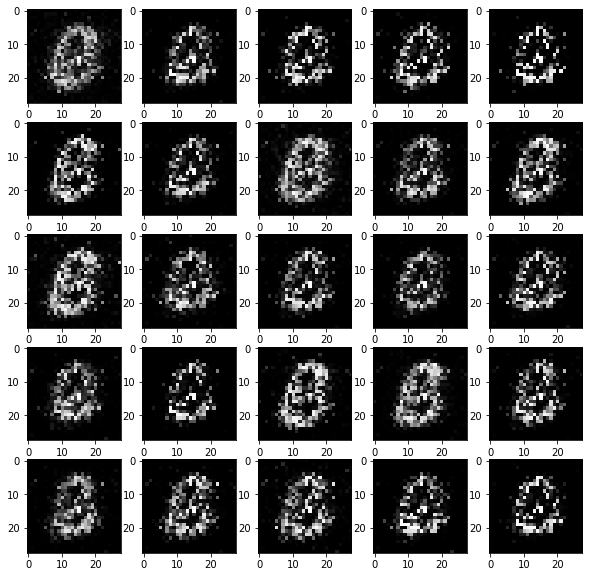

epochs 12


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 9ms/step


  0%|          | 1/273 [00:00<01:46,  2.56it/s]

4/4 [==============================] - 0s 8ms/step


  1%|          | 2/273 [00:00<01:46,  2.54it/s]

4/4 [==============================] - 0s 9ms/step


  1%|          | 3/273 [00:01<01:43,  2.62it/s]

4/4 [==============================] - 0s 10ms/step


  1%|▏         | 4/273 [00:01<01:39,  2.70it/s]

4/4 [==============================] - 0s 8ms/step


  2%|▏         | 5/273 [00:01<01:35,  2.80it/s]

4/4 [==============================] - 0s 7ms/step


  2%|▏         | 6/273 [00:02<01:38,  2.71it/s]

4/4 [==============================] - 0s 10ms/step


  3%|▎         | 7/273 [00:02<01:37,  2.73it/s]

4/4 [==============================] - 0s 9ms/step


  3%|▎         | 8/273 [00:02<01:34,  2.82it/s]

4/4 [==============================] - 0s 8ms/step


  3%|▎         | 9/273 [00:03<01:34,  2.78it/s]

4/4 [==============================] - 0s 9ms/step


  4%|▎         | 10/273 [00:03<01:33,  2.82it/s]

4/4 [==============================] - 0s 9ms/step


  4%|▍         | 11/273 [00:04<01:35,  2.73it/s]

4/4 [==============================] - 0s 10ms/step


  4%|▍         | 12/273 [00:04<01:36,  2.69it/s]

4/4 [==============================] - 0s 8ms/step


  5%|▍         | 13/273 [00:04<01:37,  2.66it/s]

4/4 [==============================] - 0s 9ms/step


  5%|▌         | 14/273 [00:05<01:35,  2.70it/s]

4/4 [==============================] - 0s 9ms/step


  5%|▌         | 15/273 [00:05<01:34,  2.74it/s]

4/4 [==============================] - 0s 10ms/step


  6%|▌         | 16/273 [00:05<01:32,  2.78it/s]

4/4 [==============================] - 0s 9ms/step


  6%|▌         | 17/273 [00:06<01:36,  2.66it/s]

4/4 [==============================] - 0s 9ms/step


  7%|▋         | 18/273 [00:06<01:35,  2.68it/s]

4/4 [==============================] - 0s 8ms/step


  7%|▋         | 19/273 [00:06<01:32,  2.76it/s]

4/4 [==============================] - 0s 8ms/step


  7%|▋         | 20/273 [00:07<01:29,  2.81it/s]

4/4 [==============================] - 0s 8ms/step


  8%|▊         | 21/273 [00:07<01:28,  2.84it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 22/273 [00:07<01:27,  2.87it/s]

4/4 [==============================] - 0s 7ms/step


  8%|▊         | 23/273 [00:08<01:28,  2.81it/s]

4/4 [==============================] - 0s 8ms/step


  9%|▉         | 24/273 [00:08<01:28,  2.81it/s]

4/4 [==============================] - 0s 9ms/step


  9%|▉         | 25/273 [00:09<01:26,  2.88it/s]

4/4 [==============================] - 0s 10ms/step


 10%|▉         | 26/273 [00:09<01:25,  2.89it/s]

4/4 [==============================] - 0s 8ms/step


 10%|▉         | 27/273 [00:09<01:25,  2.86it/s]

4/4 [==============================] - 0s 8ms/step


 10%|█         | 28/273 [00:10<01:23,  2.92it/s]

4/4 [==============================] - 0s 9ms/step


 11%|█         | 29/273 [00:10<01:22,  2.94it/s]

4/4 [==============================] - 0s 10ms/step


 11%|█         | 30/273 [00:10<01:26,  2.81it/s]

4/4 [==============================] - 0s 9ms/step


 11%|█▏        | 31/273 [00:11<01:24,  2.85it/s]

4/4 [==============================] - 0s 9ms/step


 12%|█▏        | 32/273 [00:11<01:24,  2.87it/s]

4/4 [==============================] - 0s 11ms/step


 12%|█▏        | 33/273 [00:11<01:28,  2.70it/s]

4/4 [==============================] - 0s 9ms/step


 12%|█▏        | 34/273 [00:12<01:25,  2.80it/s]

4/4 [==============================] - 0s 11ms/step


 13%|█▎        | 35/273 [00:12<01:24,  2.83it/s]

4/4 [==============================] - 0s 13ms/step


 13%|█▎        | 36/273 [00:12<01:27,  2.72it/s]

4/4 [==============================] - 0s 8ms/step


 14%|█▎        | 37/273 [00:13<01:24,  2.79it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▍        | 38/273 [00:13<01:22,  2.85it/s]

4/4 [==============================] - 0s 10ms/step


 14%|█▍        | 39/273 [00:14<01:23,  2.79it/s]

4/4 [==============================] - 0s 10ms/step


 15%|█▍        | 40/273 [00:14<01:24,  2.76it/s]

4/4 [==============================] - 0s 8ms/step


 15%|█▌        | 41/273 [00:14<01:28,  2.63it/s]

4/4 [==============================] - 0s 8ms/step


 15%|█▌        | 42/273 [00:15<01:29,  2.58it/s]

4/4 [==============================] - 0s 8ms/step


 16%|█▌        | 43/273 [00:15<01:26,  2.67it/s]

4/4 [==============================] - 0s 8ms/step


 16%|█▌        | 44/273 [00:15<01:23,  2.74it/s]

4/4 [==============================] - 0s 8ms/step


 16%|█▋        | 45/273 [00:16<01:24,  2.70it/s]

4/4 [==============================] - 0s 9ms/step


 17%|█▋        | 46/273 [00:16<01:21,  2.78it/s]

4/4 [==============================] - 0s 11ms/step


 17%|█▋        | 47/273 [00:17<01:22,  2.73it/s]

4/4 [==============================] - 0s 8ms/step


 18%|█▊        | 48/273 [00:17<01:23,  2.70it/s]

4/4 [==============================] - 0s 9ms/step


 18%|█▊        | 49/273 [00:17<01:21,  2.75it/s]

4/4 [==============================] - 0s 9ms/step


 18%|█▊        | 50/273 [00:18<01:20,  2.76it/s]

4/4 [==============================] - 0s 8ms/step


 19%|█▊        | 51/273 [00:18<01:17,  2.85it/s]

4/4 [==============================] - 0s 9ms/step


 19%|█▉        | 52/273 [00:18<01:20,  2.76it/s]

4/4 [==============================] - 0s 10ms/step


 19%|█▉        | 53/273 [00:19<01:19,  2.77it/s]

4/4 [==============================] - 0s 8ms/step


 20%|█▉        | 54/273 [00:19<01:18,  2.77it/s]

4/4 [==============================] - 0s 9ms/step


 20%|██        | 55/273 [00:19<01:18,  2.78it/s]

4/4 [==============================] - 0s 12ms/step


 21%|██        | 56/273 [00:20<01:17,  2.81it/s]

4/4 [==============================] - 0s 8ms/step


 21%|██        | 57/273 [00:20<01:17,  2.77it/s]

4/4 [==============================] - 0s 8ms/step


 21%|██        | 58/273 [00:21<01:19,  2.69it/s]

4/4 [==============================] - 0s 12ms/step


 22%|██▏       | 59/273 [00:21<01:22,  2.60it/s]

4/4 [==============================] - 0s 9ms/step


 22%|██▏       | 60/273 [00:21<01:20,  2.63it/s]

4/4 [==============================] - 0s 9ms/step


 22%|██▏       | 61/273 [00:22<01:18,  2.69it/s]

4/4 [==============================] - 0s 8ms/step


 23%|██▎       | 62/273 [00:22<01:15,  2.79it/s]

4/4 [==============================] - 0s 9ms/step


 23%|██▎       | 63/273 [00:22<01:17,  2.73it/s]

4/4 [==============================] - 0s 9ms/step


 23%|██▎       | 64/273 [00:23<01:19,  2.63it/s]

4/4 [==============================] - 0s 9ms/step


 24%|██▍       | 65/273 [00:23<01:17,  2.70it/s]

4/4 [==============================] - 0s 8ms/step


 24%|██▍       | 66/273 [00:24<01:18,  2.65it/s]

4/4 [==============================] - 0s 8ms/step


 25%|██▍       | 67/273 [00:24<01:16,  2.68it/s]

4/4 [==============================] - 0s 8ms/step


 25%|██▍       | 68/273 [00:24<01:16,  2.67it/s]

4/4 [==============================] - 0s 8ms/step


 25%|██▌       | 69/273 [00:25<01:14,  2.74it/s]

4/4 [==============================] - 0s 10ms/step


 26%|██▌       | 70/273 [00:25<01:12,  2.78it/s]

4/4 [==============================] - 0s 9ms/step


 26%|██▌       | 71/273 [00:25<01:14,  2.71it/s]

4/4 [==============================] - 0s 8ms/step


 26%|██▋       | 72/273 [00:26<01:14,  2.71it/s]

4/4 [==============================] - 0s 8ms/step


 27%|██▋       | 73/273 [00:26<01:14,  2.70it/s]

4/4 [==============================] - 0s 9ms/step


 27%|██▋       | 74/273 [00:26<01:15,  2.64it/s]

4/4 [==============================] - 0s 9ms/step


 27%|██▋       | 75/273 [00:27<01:13,  2.69it/s]

4/4 [==============================] - 0s 10ms/step


 28%|██▊       | 76/273 [00:27<01:14,  2.63it/s]

4/4 [==============================] - 0s 7ms/step


 28%|██▊       | 77/273 [00:28<01:11,  2.75it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▊       | 78/273 [00:28<01:13,  2.65it/s]

4/4 [==============================] - 0s 8ms/step


 29%|██▉       | 79/273 [00:28<01:13,  2.64it/s]

4/4 [==============================] - 0s 8ms/step


 29%|██▉       | 80/273 [00:29<01:13,  2.63it/s]

4/4 [==============================] - 0s 9ms/step


 30%|██▉       | 81/273 [00:29<01:11,  2.68it/s]

4/4 [==============================] - 0s 8ms/step


 30%|███       | 82/273 [00:29<01:11,  2.65it/s]

4/4 [==============================] - 0s 8ms/step


 30%|███       | 83/273 [00:30<01:11,  2.64it/s]

4/4 [==============================] - 0s 11ms/step


 31%|███       | 84/273 [00:30<01:11,  2.64it/s]

4/4 [==============================] - 0s 8ms/step


 31%|███       | 85/273 [00:31<01:08,  2.76it/s]

4/4 [==============================] - 0s 9ms/step


 32%|███▏      | 86/273 [00:31<01:07,  2.77it/s]

4/4 [==============================] - 0s 10ms/step


 32%|███▏      | 87/273 [00:31<01:07,  2.77it/s]

4/4 [==============================] - 0s 10ms/step


 32%|███▏      | 88/273 [00:32<01:06,  2.79it/s]

4/4 [==============================] - 0s 11ms/step


 33%|███▎      | 89/273 [00:32<01:05,  2.83it/s]

4/4 [==============================] - 0s 8ms/step


 33%|███▎      | 90/273 [00:32<01:05,  2.78it/s]

4/4 [==============================] - 0s 8ms/step


 33%|███▎      | 91/273 [00:33<01:04,  2.84it/s]

4/4 [==============================] - 0s 10ms/step


 34%|███▎      | 92/273 [00:33<01:07,  2.69it/s]

4/4 [==============================] - 0s 8ms/step


 34%|███▍      | 93/273 [00:33<01:05,  2.75it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▍      | 94/273 [00:34<01:06,  2.70it/s]

4/4 [==============================] - 0s 9ms/step


 35%|███▍      | 95/273 [00:34<01:07,  2.65it/s]

4/4 [==============================] - 0s 10ms/step


 35%|███▌      | 96/273 [00:35<01:05,  2.72it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▌      | 97/273 [00:35<01:02,  2.80it/s]

4/4 [==============================] - 0s 8ms/step


 36%|███▌      | 98/273 [00:35<01:04,  2.72it/s]

4/4 [==============================] - 0s 8ms/step


 36%|███▋      | 99/273 [00:36<01:01,  2.81it/s]

4/4 [==============================] - 0s 8ms/step


 37%|███▋      | 100/273 [00:36<01:00,  2.87it/s]

4/4 [==============================] - 0s 11ms/step


 37%|███▋      | 101/273 [00:36<01:02,  2.77it/s]

4/4 [==============================] - 0s 8ms/step


 37%|███▋      | 102/273 [00:37<01:01,  2.78it/s]

4/4 [==============================] - 0s 9ms/step


 38%|███▊      | 103/273 [00:37<01:02,  2.72it/s]

4/4 [==============================] - 0s 8ms/step


 38%|███▊      | 104/273 [00:37<01:00,  2.80it/s]

4/4 [==============================] - 0s 10ms/step


 38%|███▊      | 105/273 [00:38<00:59,  2.83it/s]

4/4 [==============================] - 0s 8ms/step


 39%|███▉      | 106/273 [00:38<01:01,  2.72it/s]

4/4 [==============================] - 0s 10ms/step


 39%|███▉      | 107/273 [00:39<01:02,  2.65it/s]

4/4 [==============================] - 0s 12ms/step


 40%|███▉      | 108/273 [00:39<01:02,  2.65it/s]

4/4 [==============================] - 0s 12ms/step


 40%|███▉      | 109/273 [00:39<01:00,  2.71it/s]

4/4 [==============================] - 0s 9ms/step


 40%|████      | 110/273 [00:40<00:58,  2.77it/s]

4/4 [==============================] - 0s 9ms/step


 41%|████      | 111/273 [00:40<00:58,  2.75it/s]

4/4 [==============================] - 0s 8ms/step


 41%|████      | 112/273 [00:40<00:59,  2.72it/s]

4/4 [==============================] - 0s 8ms/step


 41%|████▏     | 113/273 [00:41<00:57,  2.77it/s]

4/4 [==============================] - 0s 9ms/step


 42%|████▏     | 114/273 [00:41<00:56,  2.83it/s]

4/4 [==============================] - 0s 9ms/step


 42%|████▏     | 115/273 [00:41<00:56,  2.81it/s]

4/4 [==============================] - 0s 8ms/step


 42%|████▏     | 116/273 [00:42<00:57,  2.75it/s]

4/4 [==============================] - 0s 9ms/step


 43%|████▎     | 117/273 [00:42<00:55,  2.79it/s]

4/4 [==============================] - 0s 12ms/step


 43%|████▎     | 118/273 [00:43<00:57,  2.69it/s]

4/4 [==============================] - 0s 8ms/step


 44%|████▎     | 119/273 [00:43<00:56,  2.74it/s]

4/4 [==============================] - 0s 8ms/step


 44%|████▍     | 120/273 [00:43<00:57,  2.65it/s]

4/4 [==============================] - 0s 9ms/step


 44%|████▍     | 121/273 [00:44<00:57,  2.65it/s]

4/4 [==============================] - 0s 8ms/step


 45%|████▍     | 122/273 [00:44<00:54,  2.75it/s]

4/4 [==============================] - 0s 8ms/step


 45%|████▌     | 123/273 [00:44<00:53,  2.81it/s]

4/4 [==============================] - 0s 9ms/step


 45%|████▌     | 124/273 [00:45<00:55,  2.70it/s]

4/4 [==============================] - 0s 12ms/step


 46%|████▌     | 125/273 [00:45<00:56,  2.64it/s]

4/4 [==============================] - 0s 8ms/step


 46%|████▌     | 126/273 [00:46<00:54,  2.67it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 127/273 [00:46<00:52,  2.77it/s]

4/4 [==============================] - 0s 8ms/step


 47%|████▋     | 128/273 [00:46<00:52,  2.75it/s]

4/4 [==============================] - 0s 12ms/step


 47%|████▋     | 129/273 [00:47<00:55,  2.58it/s]

4/4 [==============================] - 0s 11ms/step


 48%|████▊     | 130/273 [00:47<00:59,  2.40it/s]

4/4 [==============================] - 0s 11ms/step


 48%|████▊     | 131/273 [00:48<01:04,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 48%|████▊     | 132/273 [00:48<01:04,  2.17it/s]

4/4 [==============================] - 0s 11ms/step


 49%|████▊     | 133/273 [00:49<01:07,  2.06it/s]

4/4 [==============================] - 0s 10ms/step


 49%|████▉     | 134/273 [00:49<01:10,  1.97it/s]

4/4 [==============================] - 0s 10ms/step


 49%|████▉     | 135/273 [00:50<01:09,  1.97it/s]

4/4 [==============================] - 0s 16ms/step


 50%|████▉     | 136/273 [00:50<01:06,  2.06it/s]

4/4 [==============================] - 0s 9ms/step


 50%|█████     | 137/273 [00:51<01:02,  2.19it/s]

4/4 [==============================] - 0s 7ms/step


 51%|█████     | 138/273 [00:51<00:57,  2.34it/s]

4/4 [==============================] - 0s 13ms/step


 51%|█████     | 139/273 [00:51<00:56,  2.37it/s]

4/4 [==============================] - 0s 8ms/step


 51%|█████▏    | 140/273 [00:52<00:54,  2.44it/s]

4/4 [==============================] - 0s 7ms/step


 52%|█████▏    | 141/273 [00:52<00:50,  2.60it/s]

4/4 [==============================] - 0s 12ms/step


 52%|█████▏    | 142/273 [00:52<00:49,  2.66it/s]

4/4 [==============================] - 0s 8ms/step


 52%|█████▏    | 143/273 [00:53<00:47,  2.73it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 144/273 [00:53<00:47,  2.71it/s]

4/4 [==============================] - 0s 10ms/step


 53%|█████▎    | 145/273 [00:53<00:46,  2.77it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 146/273 [00:54<00:45,  2.81it/s]

4/4 [==============================] - 0s 7ms/step


 54%|█████▍    | 147/273 [00:54<00:43,  2.89it/s]

4/4 [==============================] - 0s 11ms/step


 54%|█████▍    | 148/273 [00:54<00:43,  2.88it/s]

4/4 [==============================] - 0s 11ms/step


 55%|█████▍    | 149/273 [00:55<00:42,  2.89it/s]

4/4 [==============================] - 0s 8ms/step


 55%|█████▍    | 150/273 [00:55<00:42,  2.91it/s]

4/4 [==============================] - 0s 11ms/step


 55%|█████▌    | 151/273 [00:56<00:42,  2.84it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▌    | 152/273 [00:56<00:42,  2.82it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▌    | 153/273 [00:56<00:44,  2.68it/s]

4/4 [==============================] - 0s 7ms/step


 56%|█████▋    | 154/273 [00:57<00:43,  2.71it/s]

4/4 [==============================] - 0s 9ms/step


 57%|█████▋    | 155/273 [00:57<00:42,  2.76it/s]

4/4 [==============================] - 0s 9ms/step


 57%|█████▋    | 156/273 [00:57<00:42,  2.78it/s]

4/4 [==============================] - 0s 8ms/step


 58%|█████▊    | 157/273 [00:58<00:41,  2.83it/s]

4/4 [==============================] - 0s 10ms/step


 58%|█████▊    | 158/273 [00:58<00:41,  2.79it/s]

4/4 [==============================] - 0s 11ms/step


 58%|█████▊    | 159/273 [00:58<00:41,  2.77it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▊    | 160/273 [00:59<00:40,  2.81it/s]

4/4 [==============================] - 0s 10ms/step


 59%|█████▉    | 161/273 [00:59<00:39,  2.83it/s]

4/4 [==============================] - 0s 8ms/step


 59%|█████▉    | 162/273 [01:00<00:40,  2.77it/s]

4/4 [==============================] - 0s 8ms/step


 60%|█████▉    | 163/273 [01:00<00:38,  2.84it/s]

4/4 [==============================] - 0s 11ms/step


 60%|██████    | 164/273 [01:00<00:38,  2.84it/s]

4/4 [==============================] - 0s 8ms/step


 60%|██████    | 165/273 [01:01<00:37,  2.85it/s]

4/4 [==============================] - 0s 9ms/step


 61%|██████    | 166/273 [01:01<00:37,  2.88it/s]

4/4 [==============================] - 0s 12ms/step


 61%|██████    | 167/273 [01:01<00:36,  2.87it/s]

4/4 [==============================] - 0s 9ms/step


 62%|██████▏   | 168/273 [01:02<00:36,  2.86it/s]

4/4 [==============================] - 0s 8ms/step


 62%|██████▏   | 169/273 [01:02<00:35,  2.89it/s]

4/4 [==============================] - 0s 8ms/step


 62%|██████▏   | 170/273 [01:02<00:35,  2.87it/s]

4/4 [==============================] - 0s 9ms/step


 63%|██████▎   | 171/273 [01:03<00:35,  2.88it/s]

4/4 [==============================] - 0s 9ms/step


 63%|██████▎   | 172/273 [01:03<00:34,  2.89it/s]

4/4 [==============================] - 0s 8ms/step


 63%|██████▎   | 173/273 [01:03<00:36,  2.78it/s]

4/4 [==============================] - 0s 8ms/step


 64%|██████▎   | 174/273 [01:04<00:35,  2.83it/s]

4/4 [==============================] - 0s 8ms/step


 64%|██████▍   | 175/273 [01:04<00:34,  2.87it/s]

4/4 [==============================] - 0s 8ms/step


 64%|██████▍   | 176/273 [01:04<00:34,  2.84it/s]

4/4 [==============================] - 0s 8ms/step


 65%|██████▍   | 177/273 [01:05<00:34,  2.79it/s]

4/4 [==============================] - 0s 9ms/step


 65%|██████▌   | 178/273 [01:05<00:34,  2.77it/s]

4/4 [==============================] - 0s 10ms/step


 66%|██████▌   | 179/273 [01:06<00:34,  2.69it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▌   | 180/273 [01:06<00:33,  2.75it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▋   | 181/273 [01:06<00:34,  2.66it/s]

4/4 [==============================] - 0s 10ms/step


 67%|██████▋   | 182/273 [01:07<00:34,  2.62it/s]

4/4 [==============================] - 0s 8ms/step


 67%|██████▋   | 183/273 [01:07<00:34,  2.62it/s]

4/4 [==============================] - 0s 9ms/step


 67%|██████▋   | 184/273 [01:07<00:34,  2.58it/s]

4/4 [==============================] - 0s 8ms/step


 68%|██████▊   | 185/273 [01:08<00:32,  2.70it/s]

4/4 [==============================] - 0s 7ms/step


 68%|██████▊   | 186/273 [01:08<00:31,  2.79it/s]

4/4 [==============================] - 0s 11ms/step


 68%|██████▊   | 187/273 [01:09<00:32,  2.66it/s]

4/4 [==============================] - 0s 10ms/step


 69%|██████▉   | 188/273 [01:09<00:31,  2.73it/s]

4/4 [==============================] - 0s 8ms/step


 69%|██████▉   | 189/273 [01:09<00:31,  2.67it/s]

4/4 [==============================] - 0s 10ms/step


 70%|██████▉   | 190/273 [01:10<00:30,  2.70it/s]

4/4 [==============================] - 0s 9ms/step


 70%|██████▉   | 191/273 [01:10<00:29,  2.79it/s]

4/4 [==============================] - 0s 12ms/step


 70%|███████   | 192/273 [01:10<00:29,  2.73it/s]

4/4 [==============================] - 0s 10ms/step


 71%|███████   | 193/273 [01:11<00:28,  2.79it/s]

4/4 [==============================] - 0s 8ms/step


 71%|███████   | 194/273 [01:11<00:27,  2.85it/s]

4/4 [==============================] - 0s 8ms/step


 71%|███████▏  | 195/273 [01:11<00:27,  2.80it/s]

4/4 [==============================] - 0s 8ms/step


 72%|███████▏  | 196/273 [01:12<00:28,  2.73it/s]

4/4 [==============================] - 0s 8ms/step


 72%|███████▏  | 197/273 [01:12<00:27,  2.76it/s]

4/4 [==============================] - 0s 8ms/step


 73%|███████▎  | 198/273 [01:13<00:28,  2.68it/s]

4/4 [==============================] - 0s 9ms/step


 73%|███████▎  | 199/273 [01:13<00:28,  2.62it/s]

4/4 [==============================] - 0s 9ms/step


 73%|███████▎  | 200/273 [01:13<00:26,  2.71it/s]

4/4 [==============================] - 0s 13ms/step


 74%|███████▎  | 201/273 [01:14<00:27,  2.66it/s]

4/4 [==============================] - 0s 8ms/step


 74%|███████▍  | 202/273 [01:14<00:26,  2.66it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▍  | 203/273 [01:14<00:26,  2.65it/s]

4/4 [==============================] - 0s 8ms/step


 75%|███████▍  | 204/273 [01:15<00:25,  2.67it/s]

4/4 [==============================] - 0s 10ms/step


 75%|███████▌  | 205/273 [01:15<00:25,  2.64it/s]

4/4 [==============================] - 0s 9ms/step


 75%|███████▌  | 206/273 [01:16<00:25,  2.60it/s]

4/4 [==============================] - 0s 11ms/step


 76%|███████▌  | 207/273 [01:16<00:25,  2.57it/s]

4/4 [==============================] - 0s 9ms/step


 76%|███████▌  | 208/273 [01:16<00:24,  2.65it/s]

4/4 [==============================] - 0s 10ms/step


 77%|███████▋  | 209/273 [01:17<00:24,  2.62it/s]

4/4 [==============================] - 0s 8ms/step


 77%|███████▋  | 210/273 [01:17<00:23,  2.68it/s]

4/4 [==============================] - 0s 10ms/step


 77%|███████▋  | 211/273 [01:17<00:22,  2.76it/s]

4/4 [==============================] - 0s 10ms/step


 78%|███████▊  | 212/273 [01:18<00:21,  2.80it/s]

4/4 [==============================] - 0s 8ms/step


 78%|███████▊  | 213/273 [01:18<00:21,  2.78it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 214/273 [01:19<00:21,  2.75it/s]

4/4 [==============================] - 0s 9ms/step


 79%|███████▉  | 215/273 [01:19<00:21,  2.66it/s]

4/4 [==============================] - 0s 8ms/step


 79%|███████▉  | 216/273 [01:19<00:21,  2.63it/s]

4/4 [==============================] - 0s 9ms/step


 79%|███████▉  | 217/273 [01:20<00:20,  2.70it/s]

4/4 [==============================] - 0s 10ms/step


 80%|███████▉  | 218/273 [01:20<00:19,  2.76it/s]

4/4 [==============================] - 0s 8ms/step


 80%|████████  | 219/273 [01:20<00:19,  2.82it/s]

4/4 [==============================] - 0s 9ms/step


 81%|████████  | 220/273 [01:21<00:18,  2.81it/s]

4/4 [==============================] - 0s 12ms/step


 81%|████████  | 221/273 [01:21<00:18,  2.87it/s]

4/4 [==============================] - 0s 8ms/step


 81%|████████▏ | 222/273 [01:21<00:18,  2.80it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 223/273 [01:22<00:18,  2.75it/s]

4/4 [==============================] - 0s 8ms/step


 82%|████████▏ | 224/273 [01:22<00:17,  2.77it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 225/273 [01:22<00:16,  2.84it/s]

4/4 [==============================] - 0s 9ms/step


 83%|████████▎ | 226/273 [01:23<00:16,  2.84it/s]

4/4 [==============================] - 0s 10ms/step


 83%|████████▎ | 227/273 [01:23<00:16,  2.85it/s]

4/4 [==============================] - 0s 8ms/step


 84%|████████▎ | 228/273 [01:24<00:15,  2.87it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▍ | 229/273 [01:24<00:15,  2.87it/s]

4/4 [==============================] - 0s 8ms/step


 84%|████████▍ | 230/273 [01:24<00:14,  2.94it/s]

4/4 [==============================] - 0s 11ms/step


 85%|████████▍ | 231/273 [01:25<00:14,  2.89it/s]

4/4 [==============================] - 0s 9ms/step


 85%|████████▍ | 232/273 [01:25<00:14,  2.85it/s]

4/4 [==============================] - 0s 8ms/step


 85%|████████▌ | 233/273 [01:25<00:14,  2.77it/s]

4/4 [==============================] - 0s 8ms/step


 86%|████████▌ | 234/273 [01:26<00:13,  2.79it/s]

4/4 [==============================] - 0s 8ms/step


 86%|████████▌ | 235/273 [01:26<00:14,  2.67it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▋ | 236/273 [01:26<00:13,  2.67it/s]

4/4 [==============================] - 0s 8ms/step


 87%|████████▋ | 237/273 [01:27<00:13,  2.67it/s]

4/4 [==============================] - 0s 12ms/step


 87%|████████▋ | 238/273 [01:27<00:13,  2.55it/s]

4/4 [==============================] - 0s 8ms/step


 88%|████████▊ | 239/273 [01:28<00:12,  2.66it/s]

4/4 [==============================] - 0s 10ms/step


 88%|████████▊ | 240/273 [01:28<00:12,  2.70it/s]

4/4 [==============================] - 0s 8ms/step


 88%|████████▊ | 241/273 [01:28<00:11,  2.73it/s]

4/4 [==============================] - 0s 8ms/step


 89%|████████▊ | 242/273 [01:29<00:11,  2.68it/s]

4/4 [==============================] - 0s 8ms/step


 89%|████████▉ | 243/273 [01:29<00:11,  2.63it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▉ | 244/273 [01:30<00:12,  2.37it/s]

4/4 [==============================] - 0s 11ms/step


 90%|████████▉ | 245/273 [01:30<00:12,  2.18it/s]

4/4 [==============================] - 0s 14ms/step


 90%|█████████ | 246/273 [01:31<00:13,  2.05it/s]

4/4 [==============================] - 0s 9ms/step


 90%|█████████ | 247/273 [01:31<00:12,  2.02it/s]

4/4 [==============================] - 0s 13ms/step


 91%|█████████ | 248/273 [01:32<00:12,  1.97it/s]

4/4 [==============================] - 0s 12ms/step


 91%|█████████ | 249/273 [01:32<00:12,  1.98it/s]

4/4 [==============================] - 0s 15ms/step


 92%|█████████▏| 250/273 [01:33<00:11,  2.04it/s]

4/4 [==============================] - 0s 8ms/step


 92%|█████████▏| 251/273 [01:33<00:09,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 92%|█████████▏| 252/273 [01:33<00:09,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 93%|█████████▎| 253/273 [01:34<00:08,  2.35it/s]

4/4 [==============================] - 0s 8ms/step


 93%|█████████▎| 254/273 [01:34<00:07,  2.42it/s]

4/4 [==============================] - 0s 7ms/step


 93%|█████████▎| 255/273 [01:35<00:06,  2.61it/s]

4/4 [==============================] - 0s 9ms/step


 94%|█████████▍| 256/273 [01:35<00:06,  2.68it/s]

4/4 [==============================] - 0s 8ms/step


 94%|█████████▍| 257/273 [01:36<00:07,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▍| 258/273 [01:36<00:06,  2.40it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▍| 259/273 [01:36<00:05,  2.40it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▌| 260/273 [01:37<00:05,  2.42it/s]

4/4 [==============================] - 0s 9ms/step


 96%|█████████▌| 261/273 [01:37<00:04,  2.47it/s]

4/4 [==============================] - 0s 8ms/step


 96%|█████████▌| 262/273 [01:37<00:04,  2.54it/s]

4/4 [==============================] - 0s 8ms/step


 96%|█████████▋| 263/273 [01:38<00:03,  2.64it/s]

4/4 [==============================] - 0s 8ms/step


 97%|█████████▋| 264/273 [01:38<00:03,  2.59it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 265/273 [01:39<00:03,  2.62it/s]

4/4 [==============================] - 0s 11ms/step


 97%|█████████▋| 266/273 [01:39<00:02,  2.70it/s]

4/4 [==============================] - 0s 10ms/step


 98%|█████████▊| 267/273 [01:39<00:02,  2.66it/s]

4/4 [==============================] - 0s 13ms/step


 98%|█████████▊| 268/273 [01:40<00:01,  2.73it/s]

4/4 [==============================] - 0s 8ms/step


 99%|█████████▊| 269/273 [01:40<00:01,  2.67it/s]

4/4 [==============================] - 0s 9ms/step


 99%|█████████▉| 270/273 [01:40<00:01,  2.67it/s]

4/4 [==============================] - 0s 9ms/step


 99%|█████████▉| 271/273 [01:41<00:00,  2.72it/s]

4/4 [==============================] - 0s 8ms/step


100%|█████████▉| 272/273 [01:41<00:00,  2.79it/s]

4/4 [==============================] - 0s 11ms/step


100%|██████████| 273/273 [01:41<00:00,  2.68it/s]


loss is 0.016343429684638977 |*| 0.47912362217903137
1/1 [==============================] - 0s 27ms/step


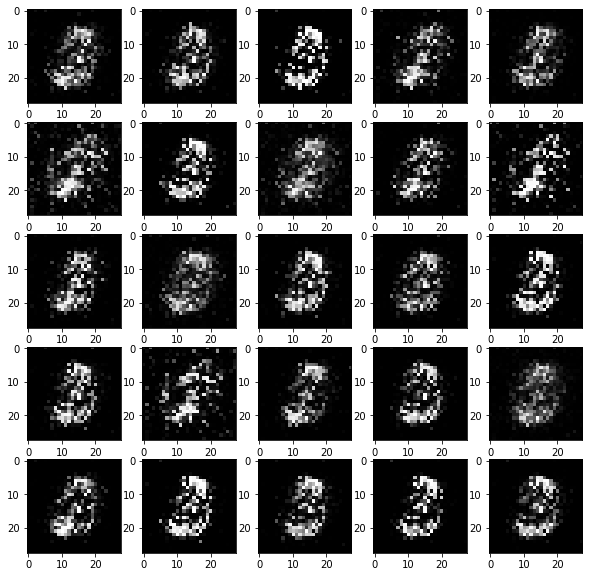

epochs 13


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 12ms/step


  0%|          | 1/273 [00:00<01:51,  2.44it/s]

4/4 [==============================] - 0s 10ms/step


  1%|          | 2/273 [00:00<01:48,  2.51it/s]

4/4 [==============================] - 0s 9ms/step


  1%|          | 3/273 [00:01<01:40,  2.69it/s]

4/4 [==============================] - 0s 9ms/step


  1%|▏         | 4/273 [00:01<01:41,  2.64it/s]

4/4 [==============================] - 0s 10ms/step


  2%|▏         | 5/273 [00:01<01:43,  2.58it/s]

4/4 [==============================] - 0s 7ms/step


  2%|▏         | 6/273 [00:02<01:44,  2.55it/s]

4/4 [==============================] - 0s 9ms/step


  3%|▎         | 7/273 [00:02<01:39,  2.67it/s]

4/4 [==============================] - 0s 10ms/step


  3%|▎         | 8/273 [00:03<01:42,  2.58it/s]

4/4 [==============================] - 0s 8ms/step


  3%|▎         | 9/273 [00:03<01:41,  2.60it/s]

4/4 [==============================] - 0s 9ms/step


  4%|▎         | 10/273 [00:03<01:41,  2.58it/s]

4/4 [==============================] - 0s 11ms/step


  4%|▍         | 11/273 [00:04<01:38,  2.65it/s]

4/4 [==============================] - 0s 9ms/step


  4%|▍         | 12/273 [00:04<01:36,  2.71it/s]

4/4 [==============================] - 0s 9ms/step


  5%|▍         | 13/273 [00:04<01:38,  2.64it/s]

4/4 [==============================] - 0s 8ms/step


  5%|▌         | 14/273 [00:05<01:38,  2.63it/s]

4/4 [==============================] - 0s 9ms/step


  5%|▌         | 15/273 [00:05<01:35,  2.71it/s]

4/4 [==============================] - 0s 11ms/step


  6%|▌         | 16/273 [00:06<01:36,  2.66it/s]

4/4 [==============================] - 0s 9ms/step


  6%|▌         | 17/273 [00:06<01:34,  2.70it/s]

4/4 [==============================] - 0s 9ms/step


  7%|▋         | 18/273 [00:06<01:33,  2.74it/s]

4/4 [==============================] - 0s 13ms/step


  7%|▋         | 19/273 [00:07<01:33,  2.73it/s]

4/4 [==============================] - 0s 10ms/step


  7%|▋         | 20/273 [00:07<01:32,  2.73it/s]

4/4 [==============================] - 0s 10ms/step


  8%|▊         | 21/273 [00:07<01:30,  2.80it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 22/273 [00:08<01:30,  2.77it/s]

4/4 [==============================] - 0s 8ms/step


  8%|▊         | 23/273 [00:08<01:28,  2.82it/s]

4/4 [==============================] - 0s 8ms/step


  9%|▉         | 24/273 [00:08<01:27,  2.85it/s]

4/4 [==============================] - 0s 8ms/step


  9%|▉         | 25/273 [00:09<01:26,  2.86it/s]

4/4 [==============================] - 0s 9ms/step


 10%|▉         | 26/273 [00:09<01:26,  2.87it/s]

4/4 [==============================] - 0s 10ms/step


 10%|▉         | 27/273 [00:09<01:25,  2.88it/s]

4/4 [==============================] - 0s 9ms/step


 10%|█         | 28/273 [00:10<01:25,  2.87it/s]

4/4 [==============================] - 0s 10ms/step


 11%|█         | 29/273 [00:10<01:24,  2.88it/s]

4/4 [==============================] - 0s 9ms/step


 11%|█         | 30/273 [00:10<01:24,  2.89it/s]

4/4 [==============================] - 0s 9ms/step


 11%|█▏        | 31/273 [00:11<01:26,  2.80it/s]

4/4 [==============================] - 0s 8ms/step


 12%|█▏        | 32/273 [00:11<01:30,  2.67it/s]

4/4 [==============================] - 0s 10ms/step


 12%|█▏        | 33/273 [00:12<01:33,  2.55it/s]

4/4 [==============================] - 0s 8ms/step


 12%|█▏        | 34/273 [00:12<01:31,  2.61it/s]

4/4 [==============================] - 0s 8ms/step


 13%|█▎        | 35/273 [00:12<01:29,  2.66it/s]

4/4 [==============================] - 0s 8ms/step


 13%|█▎        | 36/273 [00:13<01:30,  2.62it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▎        | 37/273 [00:13<01:28,  2.68it/s]

4/4 [==============================] - 0s 10ms/step


 14%|█▍        | 38/273 [00:14<01:26,  2.72it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▍        | 39/273 [00:14<01:28,  2.63it/s]

4/4 [==============================] - 0s 10ms/step


 15%|█▍        | 40/273 [00:14<01:29,  2.61it/s]

4/4 [==============================] - 0s 8ms/step


 15%|█▌        | 41/273 [00:15<01:28,  2.63it/s]

4/4 [==============================] - 0s 11ms/step


 15%|█▌        | 42/273 [00:15<01:28,  2.60it/s]

4/4 [==============================] - 0s 8ms/step


 16%|█▌        | 43/273 [00:15<01:26,  2.67it/s]

4/4 [==============================] - 0s 8ms/step


 16%|█▌        | 44/273 [00:16<01:24,  2.70it/s]

4/4 [==============================] - 0s 7ms/step


 16%|█▋        | 45/273 [00:16<01:22,  2.77it/s]

4/4 [==============================] - 0s 9ms/step


 17%|█▋        | 46/273 [00:17<01:19,  2.84it/s]

4/4 [==============================] - 0s 9ms/step


 17%|█▋        | 47/273 [00:17<01:20,  2.82it/s]

4/4 [==============================] - 0s 9ms/step


 18%|█▊        | 48/273 [00:17<01:18,  2.86it/s]

4/4 [==============================] - 0s 10ms/step


 18%|█▊        | 49/273 [00:18<01:19,  2.80it/s]

4/4 [==============================] - 0s 8ms/step


 18%|█▊        | 50/273 [00:18<01:19,  2.81it/s]

4/4 [==============================] - 0s 9ms/step


 19%|█▊        | 51/273 [00:18<01:19,  2.79it/s]

4/4 [==============================] - 0s 8ms/step


 19%|█▉        | 52/273 [00:19<01:20,  2.75it/s]

4/4 [==============================] - 0s 9ms/step


 19%|█▉        | 53/273 [00:19<01:19,  2.77it/s]

4/4 [==============================] - 0s 8ms/step


 20%|█▉        | 54/273 [00:19<01:22,  2.66it/s]

4/4 [==============================] - 0s 9ms/step


 20%|██        | 55/273 [00:20<01:20,  2.72it/s]

4/4 [==============================] - 0s 9ms/step


 21%|██        | 56/273 [00:20<01:18,  2.75it/s]

4/4 [==============================] - 0s 8ms/step


 21%|██        | 57/273 [00:20<01:17,  2.80it/s]

4/4 [==============================] - 0s 10ms/step


 21%|██        | 58/273 [00:21<01:15,  2.84it/s]

4/4 [==============================] - 0s 10ms/step


 22%|██▏       | 59/273 [00:21<01:19,  2.69it/s]

4/4 [==============================] - 0s 9ms/step


 22%|██▏       | 60/273 [00:22<01:16,  2.77it/s]

4/4 [==============================] - 0s 9ms/step


 22%|██▏       | 61/273 [00:22<01:16,  2.77it/s]

4/4 [==============================] - 0s 10ms/step


 23%|██▎       | 62/273 [00:22<01:16,  2.77it/s]

4/4 [==============================] - 0s 8ms/step


 23%|██▎       | 63/273 [00:23<01:15,  2.79it/s]

4/4 [==============================] - 0s 9ms/step


 23%|██▎       | 64/273 [00:23<01:18,  2.68it/s]

4/4 [==============================] - 0s 10ms/step


 24%|██▍       | 65/273 [00:23<01:20,  2.60it/s]

4/4 [==============================] - 0s 12ms/step


 24%|██▍       | 66/273 [00:24<01:20,  2.58it/s]

4/4 [==============================] - 0s 10ms/step


 25%|██▍       | 67/273 [00:24<01:18,  2.61it/s]

4/4 [==============================] - 0s 9ms/step


 25%|██▍       | 68/273 [00:25<01:18,  2.62it/s]

4/4 [==============================] - 0s 9ms/step


 25%|██▌       | 69/273 [00:25<01:15,  2.68it/s]

4/4 [==============================] - 0s 9ms/step


 26%|██▌       | 70/273 [00:25<01:14,  2.72it/s]

4/4 [==============================] - 0s 11ms/step


 26%|██▌       | 71/273 [00:26<01:13,  2.76it/s]

4/4 [==============================] - 0s 8ms/step


 26%|██▋       | 72/273 [00:26<01:15,  2.65it/s]

4/4 [==============================] - 0s 9ms/step


 27%|██▋       | 73/273 [00:26<01:15,  2.64it/s]

4/4 [==============================] - 0s 10ms/step


 27%|██▋       | 74/273 [00:27<01:15,  2.62it/s]

4/4 [==============================] - 0s 8ms/step


 27%|██▋       | 75/273 [00:27<01:17,  2.56it/s]

4/4 [==============================] - 0s 10ms/step


 28%|██▊       | 76/273 [00:28<01:14,  2.63it/s]

4/4 [==============================] - 0s 8ms/step


 28%|██▊       | 77/273 [00:28<01:12,  2.71it/s]

4/4 [==============================] - 0s 11ms/step


 29%|██▊       | 78/273 [00:28<01:11,  2.71it/s]

4/4 [==============================] - 0s 7ms/step


 29%|██▉       | 79/273 [00:29<01:12,  2.67it/s]

4/4 [==============================] - 0s 8ms/step


 29%|██▉       | 80/273 [00:29<01:10,  2.75it/s]

4/4 [==============================] - 0s 8ms/step


 30%|██▉       | 81/273 [00:29<01:09,  2.76it/s]

4/4 [==============================] - 0s 11ms/step


 30%|███       | 82/273 [00:30<01:10,  2.70it/s]

4/4 [==============================] - 0s 8ms/step


 30%|███       | 83/273 [00:30<01:07,  2.80it/s]

4/4 [==============================] - 0s 11ms/step


 31%|███       | 84/273 [00:30<01:07,  2.81it/s]

4/4 [==============================] - 0s 9ms/step


 31%|███       | 85/273 [00:31<01:06,  2.84it/s]

4/4 [==============================] - 0s 8ms/step


 32%|███▏      | 86/273 [00:31<01:05,  2.85it/s]

4/4 [==============================] - 0s 9ms/step


 32%|███▏      | 87/273 [00:32<01:07,  2.76it/s]

4/4 [==============================] - 0s 8ms/step


 32%|███▏      | 88/273 [00:32<01:06,  2.79it/s]

4/4 [==============================] - 0s 9ms/step


 33%|███▎      | 89/273 [00:32<01:04,  2.85it/s]

4/4 [==============================] - 0s 10ms/step


 33%|███▎      | 90/273 [00:33<01:07,  2.71it/s]

4/4 [==============================] - 0s 14ms/step


 33%|███▎      | 91/273 [00:33<01:09,  2.62it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▎      | 92/273 [00:33<01:10,  2.57it/s]

4/4 [==============================] - 0s 8ms/step


 34%|███▍      | 93/273 [00:34<01:08,  2.61it/s]

4/4 [==============================] - 0s 8ms/step


 34%|███▍      | 94/273 [00:34<01:06,  2.70it/s]

4/4 [==============================] - 0s 8ms/step


 35%|███▍      | 95/273 [00:35<01:05,  2.72it/s]

4/4 [==============================] - 0s 8ms/step


 35%|███▌      | 96/273 [00:35<01:06,  2.66it/s]

4/4 [==============================] - 0s 8ms/step


 36%|███▌      | 97/273 [00:35<01:06,  2.65it/s]

4/4 [==============================] - 0s 11ms/step


 36%|███▌      | 98/273 [00:36<01:05,  2.67it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▋      | 99/273 [00:36<01:05,  2.64it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 100/273 [00:36<01:03,  2.71it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 101/273 [00:37<01:03,  2.70it/s]

4/4 [==============================] - 0s 8ms/step


 37%|███▋      | 102/273 [00:37<01:01,  2.80it/s]

4/4 [==============================] - 0s 8ms/step


 38%|███▊      | 103/273 [00:37<01:00,  2.79it/s]

4/4 [==============================] - 0s 10ms/step


 38%|███▊      | 104/273 [00:38<01:02,  2.70it/s]

4/4 [==============================] - 0s 9ms/step


 38%|███▊      | 105/273 [00:38<01:00,  2.76it/s]

4/4 [==============================] - 0s 11ms/step


 39%|███▉      | 106/273 [00:39<01:00,  2.74it/s]

4/4 [==============================] - 0s 8ms/step


 39%|███▉      | 107/273 [00:39<01:02,  2.66it/s]

4/4 [==============================] - 0s 8ms/step


 40%|███▉      | 108/273 [00:39<01:00,  2.73it/s]

4/4 [==============================] - 0s 8ms/step


 40%|███▉      | 109/273 [00:40<01:00,  2.72it/s]

4/4 [==============================] - 0s 8ms/step


 40%|████      | 110/273 [00:40<00:58,  2.79it/s]

4/4 [==============================] - 0s 9ms/step


 41%|████      | 111/273 [00:40<00:57,  2.83it/s]

4/4 [==============================] - 0s 9ms/step


 41%|████      | 112/273 [00:41<00:57,  2.80it/s]

4/4 [==============================] - 0s 9ms/step


 41%|████▏     | 113/273 [00:41<00:56,  2.83it/s]

4/4 [==============================] - 0s 15ms/step


 42%|████▏     | 114/273 [00:41<00:57,  2.78it/s]

4/4 [==============================] - 0s 10ms/step


 42%|████▏     | 115/273 [00:42<00:59,  2.68it/s]

4/4 [==============================] - 0s 8ms/step


 42%|████▏     | 116/273 [00:42<00:59,  2.64it/s]

4/4 [==============================] - 0s 8ms/step


 43%|████▎     | 117/273 [00:43<00:59,  2.62it/s]

4/4 [==============================] - 0s 8ms/step


 43%|████▎     | 118/273 [00:43<01:00,  2.57it/s]

4/4 [==============================] - 0s 8ms/step


 44%|████▎     | 119/273 [00:43<00:58,  2.64it/s]

4/4 [==============================] - 0s 8ms/step


 44%|████▍     | 120/273 [00:44<00:59,  2.56it/s]

4/4 [==============================] - 0s 9ms/step


 44%|████▍     | 121/273 [00:44<00:59,  2.54it/s]

4/4 [==============================] - 0s 10ms/step


 45%|████▍     | 122/273 [00:45<00:58,  2.57it/s]

4/4 [==============================] - 0s 12ms/step


 45%|████▌     | 123/273 [00:45<00:57,  2.62it/s]

4/4 [==============================] - 0s 8ms/step


 45%|████▌     | 124/273 [00:45<00:55,  2.67it/s]

4/4 [==============================] - 0s 9ms/step


 46%|████▌     | 125/273 [00:46<00:53,  2.76it/s]

4/4 [==============================] - 0s 16ms/step


 46%|████▌     | 126/273 [00:46<00:55,  2.66it/s]

4/4 [==============================] - 0s 8ms/step


 47%|████▋     | 127/273 [00:46<00:52,  2.76it/s]

4/4 [==============================] - 0s 12ms/step


 47%|████▋     | 128/273 [00:47<00:54,  2.67it/s]

4/4 [==============================] - 0s 8ms/step


 47%|████▋     | 129/273 [00:47<00:54,  2.65it/s]

4/4 [==============================] - 0s 10ms/step


 48%|████▊     | 130/273 [00:48<00:52,  2.75it/s]

4/4 [==============================] - 0s 9ms/step


 48%|████▊     | 131/273 [00:48<00:53,  2.67it/s]

4/4 [==============================] - 0s 8ms/step


 48%|████▊     | 132/273 [00:48<00:52,  2.68it/s]

4/4 [==============================] - 0s 9ms/step


 49%|████▊     | 133/273 [00:49<00:53,  2.59it/s]

4/4 [==============================] - 0s 9ms/step


 49%|████▉     | 134/273 [00:49<00:52,  2.64it/s]

4/4 [==============================] - 0s 11ms/step


 49%|████▉     | 135/273 [00:49<00:51,  2.67it/s]

4/4 [==============================] - 0s 10ms/step


 50%|████▉     | 136/273 [00:50<00:51,  2.66it/s]

4/4 [==============================] - 0s 12ms/step


 50%|█████     | 137/273 [00:50<00:51,  2.65it/s]

4/4 [==============================] - 0s 9ms/step


 51%|█████     | 138/273 [00:51<00:51,  2.63it/s]

4/4 [==============================] - 0s 11ms/step


 51%|█████     | 139/273 [00:51<00:52,  2.57it/s]

4/4 [==============================] - 0s 9ms/step


 51%|█████▏    | 140/273 [00:51<00:51,  2.59it/s]

4/4 [==============================] - 0s 8ms/step


 52%|█████▏    | 141/273 [00:52<00:50,  2.61it/s]

4/4 [==============================] - 0s 10ms/step


 52%|█████▏    | 142/273 [00:52<00:50,  2.61it/s]

4/4 [==============================] - 0s 8ms/step


 52%|█████▏    | 143/273 [00:53<00:48,  2.66it/s]

4/4 [==============================] - 0s 10ms/step


 53%|█████▎    | 144/273 [00:53<00:48,  2.64it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 145/273 [00:53<00:47,  2.71it/s]

4/4 [==============================] - 0s 10ms/step


 53%|█████▎    | 146/273 [00:54<00:47,  2.66it/s]

4/4 [==============================] - 0s 10ms/step


 54%|█████▍    | 147/273 [00:54<00:46,  2.72it/s]

4/4 [==============================] - 0s 8ms/step


 54%|█████▍    | 148/273 [00:54<00:46,  2.66it/s]

4/4 [==============================] - 0s 7ms/step


 55%|█████▍    | 149/273 [00:55<00:45,  2.70it/s]

4/4 [==============================] - 0s 10ms/step


 55%|█████▍    | 150/273 [00:55<00:45,  2.68it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▌    | 151/273 [00:55<00:45,  2.69it/s]

4/4 [==============================] - 0s 10ms/step


 56%|█████▌    | 152/273 [00:56<00:44,  2.72it/s]

4/4 [==============================] - 0s 11ms/step


 56%|█████▌    | 153/273 [00:56<00:45,  2.63it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▋    | 154/273 [00:57<00:44,  2.68it/s]

4/4 [==============================] - 0s 8ms/step


 57%|█████▋    | 155/273 [00:57<00:43,  2.73it/s]

4/4 [==============================] - 0s 9ms/step


 57%|█████▋    | 156/273 [00:57<00:43,  2.66it/s]

4/4 [==============================] - 0s 12ms/step


 58%|█████▊    | 157/273 [00:58<00:44,  2.60it/s]

4/4 [==============================] - 0s 8ms/step


 58%|█████▊    | 158/273 [00:58<00:43,  2.63it/s]

4/4 [==============================] - 0s 13ms/step


 58%|█████▊    | 159/273 [00:58<00:42,  2.69it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▊    | 160/273 [00:59<00:41,  2.73it/s]

4/4 [==============================] - 0s 8ms/step


 59%|█████▉    | 161/273 [00:59<00:40,  2.79it/s]

4/4 [==============================] - 0s 8ms/step


 59%|█████▉    | 162/273 [01:00<00:41,  2.66it/s]

4/4 [==============================] - 0s 10ms/step


 60%|█████▉    | 163/273 [01:00<00:40,  2.72it/s]

4/4 [==============================] - 0s 10ms/step


 60%|██████    | 164/273 [01:00<00:39,  2.74it/s]

4/4 [==============================] - 0s 8ms/step


 60%|██████    | 165/273 [01:01<00:40,  2.68it/s]

4/4 [==============================] - 0s 8ms/step


 61%|██████    | 166/273 [01:01<00:41,  2.59it/s]

4/4 [==============================] - 0s 8ms/step


 61%|██████    | 167/273 [01:01<00:40,  2.62it/s]

4/4 [==============================] - 0s 8ms/step


 62%|██████▏   | 168/273 [01:02<00:40,  2.59it/s]

4/4 [==============================] - 0s 10ms/step


 62%|██████▏   | 169/273 [01:02<00:40,  2.57it/s]

4/4 [==============================] - 0s 12ms/step


 62%|██████▏   | 170/273 [01:03<00:40,  2.52it/s]

4/4 [==============================] - 0s 10ms/step


 63%|██████▎   | 171/273 [01:03<00:39,  2.61it/s]

4/4 [==============================] - 0s 8ms/step


 63%|██████▎   | 172/273 [01:03<00:39,  2.58it/s]

4/4 [==============================] - 0s 9ms/step


 63%|██████▎   | 173/273 [01:04<00:37,  2.66it/s]

4/4 [==============================] - 0s 10ms/step


 64%|██████▎   | 174/273 [01:04<00:36,  2.74it/s]

4/4 [==============================] - 0s 9ms/step


 64%|██████▍   | 175/273 [01:04<00:35,  2.77it/s]

4/4 [==============================] - 0s 13ms/step


 64%|██████▍   | 176/273 [01:05<00:35,  2.76it/s]

4/4 [==============================] - 0s 8ms/step


 65%|██████▍   | 177/273 [01:05<00:35,  2.71it/s]

4/4 [==============================] - 0s 9ms/step


 65%|██████▌   | 178/273 [01:06<00:35,  2.71it/s]

4/4 [==============================] - 0s 8ms/step


 66%|██████▌   | 179/273 [01:06<00:34,  2.69it/s]

4/4 [==============================] - 0s 10ms/step


 66%|██████▌   | 180/273 [01:06<00:35,  2.66it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▋   | 181/273 [01:07<00:35,  2.61it/s]

4/4 [==============================] - 0s 8ms/step


 67%|██████▋   | 182/273 [01:07<00:33,  2.69it/s]

4/4 [==============================] - 0s 7ms/step


 67%|██████▋   | 183/273 [01:07<00:32,  2.73it/s]

4/4 [==============================] - 0s 12ms/step


 67%|██████▋   | 184/273 [01:08<00:32,  2.75it/s]

4/4 [==============================] - 0s 9ms/step


 68%|██████▊   | 185/273 [01:08<00:32,  2.69it/s]

4/4 [==============================] - 0s 9ms/step


 68%|██████▊   | 186/273 [01:09<00:32,  2.64it/s]

4/4 [==============================] - 0s 9ms/step


 68%|██████▊   | 187/273 [01:09<00:31,  2.74it/s]

4/4 [==============================] - 0s 10ms/step


 69%|██████▉   | 188/273 [01:09<00:30,  2.78it/s]

4/4 [==============================] - 0s 12ms/step


 69%|██████▉   | 189/273 [01:10<00:31,  2.65it/s]

4/4 [==============================] - 0s 8ms/step


 70%|██████▉   | 190/273 [01:10<00:30,  2.72it/s]

4/4 [==============================] - 0s 8ms/step


 70%|██████▉   | 191/273 [01:10<00:29,  2.78it/s]

4/4 [==============================] - 0s 12ms/step


 70%|███████   | 192/273 [01:11<00:30,  2.70it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████   | 193/273 [01:11<00:29,  2.70it/s]

4/4 [==============================] - 0s 8ms/step


 71%|███████   | 194/273 [01:12<00:29,  2.64it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████▏  | 195/273 [01:12<00:29,  2.62it/s]

4/4 [==============================] - 0s 8ms/step


 72%|███████▏  | 196/273 [01:12<00:29,  2.65it/s]

4/4 [==============================] - 0s 10ms/step


 72%|███████▏  | 197/273 [01:13<00:29,  2.62it/s]

4/4 [==============================] - 0s 7ms/step


 73%|███████▎  | 198/273 [01:13<00:29,  2.58it/s]

4/4 [==============================] - 0s 9ms/step


 73%|███████▎  | 199/273 [01:13<00:27,  2.67it/s]

4/4 [==============================] - 0s 9ms/step


 73%|███████▎  | 200/273 [01:14<00:27,  2.67it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▎  | 201/273 [01:14<00:25,  2.77it/s]

4/4 [==============================] - 0s 10ms/step


 74%|███████▍  | 202/273 [01:15<00:26,  2.71it/s]

4/4 [==============================] - 0s 12ms/step


 74%|███████▍  | 203/273 [01:15<00:25,  2.70it/s]

4/4 [==============================] - 0s 8ms/step


 75%|███████▍  | 204/273 [01:15<00:24,  2.78it/s]

4/4 [==============================] - 0s 11ms/step


 75%|███████▌  | 205/273 [01:16<00:25,  2.68it/s]

4/4 [==============================] - 0s 10ms/step


 75%|███████▌  | 206/273 [01:16<00:25,  2.68it/s]

4/4 [==============================] - 0s 8ms/step


 76%|███████▌  | 207/273 [01:16<00:24,  2.75it/s]

4/4 [==============================] - 0s 9ms/step


 76%|███████▌  | 208/273 [01:17<00:23,  2.79it/s]

4/4 [==============================] - 0s 12ms/step


 77%|███████▋  | 209/273 [01:17<00:23,  2.67it/s]

4/4 [==============================] - 0s 8ms/step


 77%|███████▋  | 210/273 [01:17<00:23,  2.73it/s]

4/4 [==============================] - 0s 8ms/step


 77%|███████▋  | 211/273 [01:18<00:22,  2.76it/s]

4/4 [==============================] - 0s 10ms/step


 78%|███████▊  | 212/273 [01:18<00:22,  2.72it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 213/273 [01:19<00:21,  2.76it/s]

4/4 [==============================] - 0s 8ms/step


 78%|███████▊  | 214/273 [01:19<00:21,  2.79it/s]

4/4 [==============================] - 0s 8ms/step


 79%|███████▉  | 215/273 [01:19<00:21,  2.69it/s]

4/4 [==============================] - 0s 8ms/step


 79%|███████▉  | 216/273 [01:20<00:20,  2.76it/s]

4/4 [==============================] - 0s 9ms/step


 79%|███████▉  | 217/273 [01:20<00:20,  2.78it/s]

4/4 [==============================] - 0s 9ms/step


 80%|███████▉  | 218/273 [01:20<00:20,  2.72it/s]

4/4 [==============================] - 0s 8ms/step


 80%|████████  | 219/273 [01:21<00:19,  2.79it/s]

4/4 [==============================] - 0s 8ms/step


 81%|████████  | 220/273 [01:21<00:19,  2.74it/s]

4/4 [==============================] - 0s 8ms/step


 81%|████████  | 221/273 [01:21<00:18,  2.83it/s]

4/4 [==============================] - 0s 12ms/step


 81%|████████▏ | 222/273 [01:22<00:18,  2.81it/s]

4/4 [==============================] - 0s 8ms/step


 82%|████████▏ | 223/273 [01:22<00:17,  2.80it/s]

4/4 [==============================] - 0s 10ms/step


 82%|████████▏ | 224/273 [01:22<00:17,  2.81it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 225/273 [01:23<00:17,  2.75it/s]

4/4 [==============================] - 0s 9ms/step


 83%|████████▎ | 226/273 [01:23<00:17,  2.75it/s]

4/4 [==============================] - 0s 8ms/step


 83%|████████▎ | 227/273 [01:24<00:17,  2.65it/s]

4/4 [==============================] - 0s 11ms/step


 84%|████████▎ | 228/273 [01:24<00:16,  2.67it/s]

4/4 [==============================] - 0s 10ms/step


 84%|████████▍ | 229/273 [01:24<00:16,  2.72it/s]

4/4 [==============================] - 0s 8ms/step


 84%|████████▍ | 230/273 [01:25<00:15,  2.75it/s]

4/4 [==============================] - 0s 8ms/step


 85%|████████▍ | 231/273 [01:25<00:15,  2.64it/s]

4/4 [==============================] - 0s 8ms/step


 85%|████████▍ | 232/273 [01:26<00:15,  2.59it/s]

4/4 [==============================] - 0s 8ms/step


 85%|████████▌ | 233/273 [01:26<00:15,  2.53it/s]

4/4 [==============================] - 0s 8ms/step


 86%|████████▌ | 234/273 [01:26<00:16,  2.37it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▌ | 235/273 [01:27<00:17,  2.22it/s]

4/4 [==============================] - 0s 10ms/step


 86%|████████▋ | 236/273 [01:27<00:17,  2.11it/s]

4/4 [==============================] - 0s 12ms/step


 87%|████████▋ | 237/273 [01:28<00:17,  2.01it/s]

4/4 [==============================] - 0s 11ms/step


 87%|████████▋ | 238/273 [01:29<00:17,  2.01it/s]

4/4 [==============================] - 0s 15ms/step


 88%|████████▊ | 239/273 [01:29<00:17,  1.98it/s]

4/4 [==============================] - 0s 15ms/step


 88%|████████▊ | 240/273 [01:30<00:16,  1.95it/s]

4/4 [==============================] - 0s 15ms/step


 88%|████████▊ | 241/273 [01:30<00:16,  1.95it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▊ | 242/273 [01:30<00:14,  2.11it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▉ | 243/273 [01:31<00:13,  2.28it/s]

4/4 [==============================] - 0s 10ms/step


 89%|████████▉ | 244/273 [01:31<00:12,  2.34it/s]

4/4 [==============================] - 0s 8ms/step


 90%|████████▉ | 245/273 [01:32<00:11,  2.38it/s]

4/4 [==============================] - 0s 8ms/step


 90%|█████████ | 246/273 [01:32<00:11,  2.44it/s]

4/4 [==============================] - 0s 9ms/step


 90%|█████████ | 247/273 [01:32<00:10,  2.51it/s]

4/4 [==============================] - 0s 8ms/step


 91%|█████████ | 248/273 [01:33<00:09,  2.61it/s]

4/4 [==============================] - 0s 10ms/step


 91%|█████████ | 249/273 [01:33<00:08,  2.69it/s]

4/4 [==============================] - 0s 10ms/step


 92%|█████████▏| 250/273 [01:33<00:08,  2.62it/s]

4/4 [==============================] - 0s 8ms/step


 92%|█████████▏| 251/273 [01:34<00:08,  2.63it/s]

4/4 [==============================] - 0s 8ms/step


 92%|█████████▏| 252/273 [01:34<00:07,  2.73it/s]

4/4 [==============================] - 0s 9ms/step


 93%|█████████▎| 253/273 [01:35<00:07,  2.64it/s]

4/4 [==============================] - 0s 9ms/step


 93%|█████████▎| 254/273 [01:35<00:07,  2.66it/s]

4/4 [==============================] - 0s 8ms/step


 93%|█████████▎| 255/273 [01:35<00:06,  2.63it/s]

4/4 [==============================] - 0s 9ms/step


 94%|█████████▍| 256/273 [01:36<00:06,  2.64it/s]

4/4 [==============================] - 0s 9ms/step


 94%|█████████▍| 257/273 [01:36<00:06,  2.60it/s]

4/4 [==============================] - 0s 10ms/step


 95%|█████████▍| 258/273 [01:37<00:05,  2.53it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▍| 259/273 [01:37<00:05,  2.56it/s]

4/4 [==============================] - 0s 10ms/step


 95%|█████████▌| 260/273 [01:37<00:04,  2.64it/s]

4/4 [==============================] - 0s 8ms/step


 96%|█████████▌| 261/273 [01:38<00:04,  2.61it/s]

4/4 [==============================] - 0s 10ms/step


 96%|█████████▌| 262/273 [01:38<00:04,  2.60it/s]

4/4 [==============================] - 0s 8ms/step


 96%|█████████▋| 263/273 [01:38<00:03,  2.65it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 264/273 [01:39<00:03,  2.62it/s]

4/4 [==============================] - 0s 8ms/step


 97%|█████████▋| 265/273 [01:39<00:02,  2.71it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 266/273 [01:40<00:02,  2.74it/s]

4/4 [==============================] - 0s 12ms/step


 98%|█████████▊| 267/273 [01:40<00:02,  2.72it/s]

4/4 [==============================] - 0s 9ms/step


 98%|█████████▊| 268/273 [01:40<00:01,  2.75it/s]

4/4 [==============================] - 0s 9ms/step


 99%|█████████▊| 269/273 [01:41<00:01,  2.69it/s]

4/4 [==============================] - 0s 9ms/step


 99%|█████████▉| 270/273 [01:41<00:01,  2.74it/s]

4/4 [==============================] - 0s 10ms/step


 99%|█████████▉| 271/273 [01:41<00:00,  2.68it/s]

4/4 [==============================] - 0s 8ms/step


100%|█████████▉| 272/273 [01:42<00:00,  2.70it/s]

4/4 [==============================] - 0s 9ms/step


100%|██████████| 273/273 [01:42<00:00,  2.66it/s]


loss is 0.021149760112166405 |*| 2.257572650909424
1/1 [==============================] - 0s 29ms/step


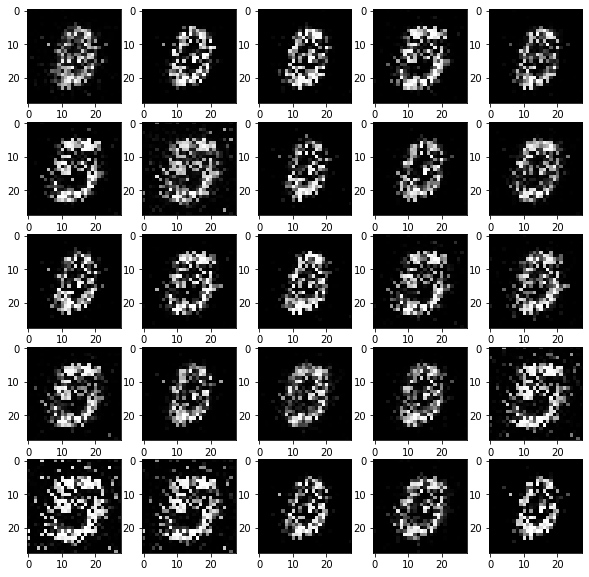

epochs 14


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 10ms/step


  0%|          | 1/273 [00:00<02:00,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


  1%|          | 2/273 [00:00<01:44,  2.59it/s]

4/4 [==============================] - 0s 12ms/step


  1%|          | 3/273 [00:01<01:39,  2.71it/s]

4/4 [==============================] - 0s 12ms/step


  1%|▏         | 4/273 [00:01<01:38,  2.72it/s]

4/4 [==============================] - 0s 8ms/step


  2%|▏         | 5/273 [00:01<01:43,  2.58it/s]

4/4 [==============================] - 0s 10ms/step


  2%|▏         | 6/273 [00:02<01:43,  2.58it/s]

4/4 [==============================] - 0s 7ms/step


  3%|▎         | 7/273 [00:02<01:40,  2.64it/s]

4/4 [==============================] - 0s 8ms/step


  3%|▎         | 8/273 [00:03<01:38,  2.68it/s]

4/4 [==============================] - 0s 9ms/step


  3%|▎         | 9/273 [00:03<01:35,  2.76it/s]

4/4 [==============================] - 0s 8ms/step


  4%|▎         | 10/273 [00:03<01:38,  2.67it/s]

4/4 [==============================] - 0s 9ms/step


  4%|▍         | 11/273 [00:04<01:38,  2.67it/s]

4/4 [==============================] - 0s 10ms/step


  4%|▍         | 12/273 [00:04<01:40,  2.61it/s]

4/4 [==============================] - 0s 9ms/step


  5%|▍         | 13/273 [00:04<01:42,  2.54it/s]

4/4 [==============================] - 0s 9ms/step


  5%|▌         | 14/273 [00:05<01:43,  2.50it/s]

4/4 [==============================] - 0s 9ms/step


  5%|▌         | 15/273 [00:05<01:40,  2.58it/s]

4/4 [==============================] - 0s 9ms/step


  6%|▌         | 16/273 [00:06<01:37,  2.63it/s]

4/4 [==============================] - 0s 8ms/step


  6%|▌         | 17/273 [00:06<01:36,  2.65it/s]

4/4 [==============================] - 0s 9ms/step


  7%|▋         | 18/273 [00:06<01:33,  2.73it/s]

4/4 [==============================] - 0s 8ms/step


  7%|▋         | 19/273 [00:07<01:35,  2.67it/s]

4/4 [==============================] - 0s 10ms/step


  7%|▋         | 20/273 [00:07<01:35,  2.64it/s]

4/4 [==============================] - 0s 8ms/step


  8%|▊         | 21/273 [00:07<01:33,  2.69it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 22/273 [00:08<01:33,  2.70it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 23/273 [00:08<01:36,  2.59it/s]

4/4 [==============================] - 0s 8ms/step


  9%|▉         | 24/273 [00:09<01:38,  2.53it/s]

4/4 [==============================] - 0s 8ms/step


  9%|▉         | 25/273 [00:09<01:38,  2.53it/s]

4/4 [==============================] - 0s 10ms/step


 10%|▉         | 26/273 [00:09<01:38,  2.52it/s]

4/4 [==============================] - 0s 10ms/step


 10%|▉         | 27/273 [00:10<01:34,  2.61it/s]

4/4 [==============================] - 0s 10ms/step


 10%|█         | 28/273 [00:10<01:33,  2.61it/s]

4/4 [==============================] - 0s 9ms/step


 11%|█         | 29/273 [00:11<01:34,  2.57it/s]

4/4 [==============================] - 0s 15ms/step


 11%|█         | 30/273 [00:11<01:34,  2.57it/s]

4/4 [==============================] - 0s 10ms/step


 11%|█▏        | 31/273 [00:11<01:33,  2.59it/s]

4/4 [==============================] - 0s 11ms/step


 12%|█▏        | 32/273 [00:12<01:34,  2.56it/s]

4/4 [==============================] - 0s 9ms/step


 12%|█▏        | 33/273 [00:12<01:34,  2.55it/s]

4/4 [==============================] - 0s 10ms/step


 12%|█▏        | 34/273 [00:13<01:32,  2.57it/s]

4/4 [==============================] - 0s 8ms/step


 13%|█▎        | 35/273 [00:13<01:31,  2.59it/s]

4/4 [==============================] - 0s 10ms/step


 13%|█▎        | 36/273 [00:13<01:32,  2.56it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▎        | 37/273 [00:14<01:31,  2.57it/s]

4/4 [==============================] - 0s 10ms/step


 14%|█▍        | 38/273 [00:14<01:31,  2.58it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▍        | 39/273 [00:14<01:28,  2.66it/s]

4/4 [==============================] - 0s 11ms/step


 15%|█▍        | 40/273 [00:15<01:27,  2.65it/s]

4/4 [==============================] - 0s 8ms/step


 15%|█▌        | 41/273 [00:15<01:26,  2.69it/s]

4/4 [==============================] - 0s 8ms/step


 15%|█▌        | 42/273 [00:16<01:26,  2.66it/s]

4/4 [==============================] - 0s 7ms/step


 16%|█▌        | 43/273 [00:16<01:28,  2.61it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▌        | 44/273 [00:16<01:27,  2.61it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▋        | 45/273 [00:17<01:25,  2.67it/s]

4/4 [==============================] - 0s 11ms/step


 17%|█▋        | 46/273 [00:17<01:24,  2.68it/s]

4/4 [==============================] - 0s 8ms/step


 17%|█▋        | 47/273 [00:17<01:26,  2.61it/s]

4/4 [==============================] - 0s 8ms/step


 18%|█▊        | 48/273 [00:18<01:25,  2.62it/s]

4/4 [==============================] - 0s 10ms/step


 18%|█▊        | 49/273 [00:18<01:27,  2.57it/s]

4/4 [==============================] - 0s 8ms/step


 18%|█▊        | 50/273 [00:19<01:27,  2.54it/s]

4/4 [==============================] - 0s 9ms/step


 19%|█▊        | 51/273 [00:19<01:26,  2.56it/s]

4/4 [==============================] - 0s 9ms/step


 19%|█▉        | 52/273 [00:19<01:25,  2.59it/s]

4/4 [==============================] - 0s 12ms/step


 19%|█▉        | 53/273 [00:20<01:30,  2.43it/s]

4/4 [==============================] - 0s 9ms/step


 20%|█▉        | 54/273 [00:20<01:26,  2.55it/s]

4/4 [==============================] - 0s 10ms/step


 20%|██        | 55/273 [00:21<01:23,  2.61it/s]

4/4 [==============================] - 0s 9ms/step


 21%|██        | 56/273 [00:21<01:29,  2.42it/s]

4/4 [==============================] - 0s 13ms/step


 21%|██        | 57/273 [00:22<01:35,  2.26it/s]

4/4 [==============================] - 0s 12ms/step


 21%|██        | 58/273 [00:22<01:37,  2.20it/s]

4/4 [==============================] - 0s 11ms/step


 22%|██▏       | 59/273 [00:23<01:43,  2.06it/s]

4/4 [==============================] - 0s 10ms/step


 22%|██▏       | 60/273 [00:23<01:49,  1.94it/s]

4/4 [==============================] - 0s 9ms/step


 22%|██▏       | 61/273 [00:24<01:47,  1.98it/s]

4/4 [==============================] - 0s 14ms/step


 23%|██▎       | 62/273 [00:24<01:47,  1.96it/s]

4/4 [==============================] - 0s 13ms/step


 23%|██▎       | 63/273 [00:25<01:49,  1.91it/s]

4/4 [==============================] - 0s 11ms/step


 23%|██▎       | 64/273 [00:25<01:40,  2.08it/s]

4/4 [==============================] - 0s 9ms/step


 24%|██▍       | 65/273 [00:26<01:34,  2.20it/s]

4/4 [==============================] - 0s 10ms/step


 24%|██▍       | 66/273 [00:26<01:27,  2.37it/s]

4/4 [==============================] - 0s 8ms/step


 25%|██▍       | 67/273 [00:26<01:24,  2.44it/s]

4/4 [==============================] - 0s 9ms/step


 25%|██▍       | 68/273 [00:27<01:20,  2.56it/s]

4/4 [==============================] - 0s 8ms/step


 25%|██▌       | 69/273 [00:27<01:18,  2.61it/s]

4/4 [==============================] - 0s 10ms/step


 26%|██▌       | 70/273 [00:27<01:17,  2.60it/s]

4/4 [==============================] - 0s 9ms/step


 26%|██▌       | 71/273 [00:28<01:15,  2.68it/s]

4/4 [==============================] - 0s 9ms/step


 26%|██▋       | 72/273 [00:28<01:14,  2.69it/s]

4/4 [==============================] - 0s 10ms/step


 27%|██▋       | 73/273 [00:28<01:12,  2.75it/s]

4/4 [==============================] - 0s 9ms/step


 27%|██▋       | 74/273 [00:29<01:14,  2.68it/s]

4/4 [==============================] - 0s 8ms/step


 27%|██▋       | 75/273 [00:29<01:12,  2.72it/s]

4/4 [==============================] - 0s 8ms/step


 28%|██▊       | 76/273 [00:30<01:11,  2.77it/s]

4/4 [==============================] - 0s 9ms/step


 28%|██▊       | 77/273 [00:30<01:12,  2.72it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▊       | 78/273 [00:30<01:10,  2.75it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▉       | 79/273 [00:31<01:12,  2.69it/s]

4/4 [==============================] - 0s 10ms/step


 29%|██▉       | 80/273 [00:31<01:13,  2.62it/s]

4/4 [==============================] - 0s 9ms/step


 30%|██▉       | 81/273 [00:31<01:11,  2.68it/s]

4/4 [==============================] - 0s 8ms/step


 30%|███       | 82/273 [00:32<01:11,  2.67it/s]

4/4 [==============================] - 0s 7ms/step


 30%|███       | 83/273 [00:32<01:10,  2.69it/s]

4/4 [==============================] - 0s 8ms/step


 31%|███       | 84/273 [00:33<01:09,  2.74it/s]

4/4 [==============================] - 0s 10ms/step


 31%|███       | 85/273 [00:33<01:08,  2.74it/s]

4/4 [==============================] - 0s 8ms/step


 32%|███▏      | 86/273 [00:33<01:08,  2.74it/s]

4/4 [==============================] - 0s 10ms/step


 32%|███▏      | 87/273 [00:34<01:10,  2.63it/s]

4/4 [==============================] - 0s 10ms/step


 32%|███▏      | 88/273 [00:34<01:08,  2.68it/s]

4/4 [==============================] - 0s 10ms/step


 33%|███▎      | 89/273 [00:34<01:08,  2.70it/s]

4/4 [==============================] - 0s 9ms/step


 33%|███▎      | 90/273 [00:35<01:08,  2.68it/s]

4/4 [==============================] - 0s 13ms/step


 33%|███▎      | 91/273 [00:35<01:06,  2.72it/s]

4/4 [==============================] - 0s 10ms/step


 34%|███▎      | 92/273 [00:35<01:05,  2.77it/s]

4/4 [==============================] - 0s 8ms/step


 34%|███▍      | 93/273 [00:36<01:05,  2.74it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▍      | 94/273 [00:36<01:07,  2.64it/s]

4/4 [==============================] - 0s 9ms/step


 35%|███▍      | 95/273 [00:37<01:05,  2.73it/s]

4/4 [==============================] - 0s 11ms/step


 35%|███▌      | 96/273 [00:37<01:07,  2.61it/s]

4/4 [==============================] - 0s 8ms/step


 36%|███▌      | 97/273 [00:37<01:06,  2.66it/s]

4/4 [==============================] - 0s 8ms/step


 36%|███▌      | 98/273 [00:38<01:05,  2.66it/s]

4/4 [==============================] - 0s 8ms/step


 36%|███▋      | 99/273 [00:38<01:04,  2.70it/s]

4/4 [==============================] - 0s 10ms/step


 37%|███▋      | 100/273 [00:38<01:03,  2.71it/s]

4/4 [==============================] - 0s 8ms/step


 37%|███▋      | 101/273 [00:39<01:06,  2.59it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 102/273 [00:39<01:05,  2.62it/s]

4/4 [==============================] - 0s 8ms/step


 38%|███▊      | 103/273 [00:40<01:03,  2.69it/s]

4/4 [==============================] - 0s 14ms/step


 38%|███▊      | 104/273 [00:40<01:04,  2.61it/s]

4/4 [==============================] - 0s 10ms/step


 38%|███▊      | 105/273 [00:40<01:03,  2.64it/s]

4/4 [==============================] - 0s 9ms/step


 39%|███▉      | 106/273 [00:41<01:02,  2.67it/s]

4/4 [==============================] - 0s 9ms/step


 39%|███▉      | 107/273 [00:41<01:00,  2.73it/s]

4/4 [==============================] - 0s 8ms/step


 40%|███▉      | 108/273 [00:41<00:59,  2.77it/s]

4/4 [==============================] - 0s 10ms/step


 40%|███▉      | 109/273 [00:42<01:01,  2.67it/s]

4/4 [==============================] - 0s 9ms/step


 40%|████      | 110/273 [00:42<01:01,  2.67it/s]

4/4 [==============================] - 0s 8ms/step


 41%|████      | 111/273 [00:43<01:01,  2.62it/s]

4/4 [==============================] - 0s 8ms/step


 41%|████      | 112/273 [00:43<01:00,  2.65it/s]

4/4 [==============================] - 0s 9ms/step


 41%|████▏     | 113/273 [00:43<00:58,  2.71it/s]

4/4 [==============================] - 0s 10ms/step


 42%|████▏     | 114/273 [00:44<00:58,  2.73it/s]

4/4 [==============================] - 0s 9ms/step


 42%|████▏     | 115/273 [00:44<00:58,  2.70it/s]

4/4 [==============================] - 0s 8ms/step


 42%|████▏     | 116/273 [00:44<00:57,  2.72it/s]

4/4 [==============================] - 0s 10ms/step


 43%|████▎     | 117/273 [00:45<00:57,  2.73it/s]

4/4 [==============================] - 0s 13ms/step


 43%|████▎     | 118/273 [00:45<00:57,  2.70it/s]

4/4 [==============================] - 0s 10ms/step


 44%|████▎     | 119/273 [00:46<00:57,  2.69it/s]

4/4 [==============================] - 0s 8ms/step


 44%|████▍     | 120/273 [00:46<00:58,  2.60it/s]

4/4 [==============================] - 0s 9ms/step


 44%|████▍     | 121/273 [00:46<00:56,  2.68it/s]

4/4 [==============================] - 0s 7ms/step


 45%|████▍     | 122/273 [00:47<00:57,  2.65it/s]

4/4 [==============================] - 0s 8ms/step


 45%|████▌     | 123/273 [00:47<00:56,  2.64it/s]

4/4 [==============================] - 0s 9ms/step


 45%|████▌     | 124/273 [00:47<00:55,  2.70it/s]

4/4 [==============================] - 0s 9ms/step


 46%|████▌     | 125/273 [00:48<00:55,  2.68it/s]

4/4 [==============================] - 0s 10ms/step


 46%|████▌     | 126/273 [00:48<00:55,  2.63it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 127/273 [00:49<00:55,  2.65it/s]

4/4 [==============================] - 0s 8ms/step


 47%|████▋     | 128/273 [00:49<00:54,  2.68it/s]

4/4 [==============================] - 0s 10ms/step


 47%|████▋     | 129/273 [00:49<00:55,  2.61it/s]

4/4 [==============================] - 0s 10ms/step


 48%|████▊     | 130/273 [00:50<00:54,  2.61it/s]

4/4 [==============================] - 0s 8ms/step


 48%|████▊     | 131/273 [00:50<00:54,  2.62it/s]

4/4 [==============================] - 0s 8ms/step


 48%|████▊     | 132/273 [00:51<00:54,  2.61it/s]

4/4 [==============================] - 0s 11ms/step


 49%|████▊     | 133/273 [00:51<00:54,  2.57it/s]

4/4 [==============================] - 0s 8ms/step


 49%|████▉     | 134/273 [00:51<00:52,  2.64it/s]

4/4 [==============================] - 0s 8ms/step


 49%|████▉     | 135/273 [00:52<00:51,  2.70it/s]

4/4 [==============================] - 0s 9ms/step


 50%|████▉     | 136/273 [00:52<00:50,  2.71it/s]

4/4 [==============================] - 0s 9ms/step


 50%|█████     | 137/273 [00:52<00:50,  2.69it/s]

4/4 [==============================] - 0s 9ms/step


 51%|█████     | 138/273 [00:53<00:51,  2.64it/s]

4/4 [==============================] - 0s 9ms/step


 51%|█████     | 139/273 [00:53<00:50,  2.68it/s]

4/4 [==============================] - 0s 9ms/step


 51%|█████▏    | 140/273 [00:54<00:49,  2.67it/s]

4/4 [==============================] - 0s 8ms/step


 52%|█████▏    | 141/273 [00:54<00:48,  2.73it/s]

4/4 [==============================] - 0s 8ms/step


 52%|█████▏    | 142/273 [00:54<00:48,  2.67it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 143/273 [00:55<00:49,  2.60it/s]

4/4 [==============================] - 0s 10ms/step


 53%|█████▎    | 144/273 [00:55<00:48,  2.64it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 145/273 [00:55<00:48,  2.67it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 146/273 [00:56<00:48,  2.61it/s]

4/4 [==============================] - 0s 8ms/step


 54%|█████▍    | 147/273 [00:56<00:48,  2.58it/s]

4/4 [==============================] - 0s 11ms/step


 54%|█████▍    | 148/273 [00:57<00:48,  2.59it/s]

4/4 [==============================] - 0s 10ms/step


 55%|█████▍    | 149/273 [00:57<00:46,  2.64it/s]

4/4 [==============================] - 0s 12ms/step


 55%|█████▍    | 150/273 [00:57<00:45,  2.68it/s]

4/4 [==============================] - 0s 12ms/step


 55%|█████▌    | 151/273 [00:58<00:46,  2.63it/s]

4/4 [==============================] - 0s 8ms/step


 56%|█████▌    | 152/273 [00:58<00:45,  2.69it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▌    | 153/273 [00:58<00:45,  2.66it/s]

4/4 [==============================] - 0s 8ms/step


 56%|█████▋    | 154/273 [00:59<00:44,  2.68it/s]

4/4 [==============================] - 0s 10ms/step


 57%|█████▋    | 155/273 [00:59<00:43,  2.69it/s]

4/4 [==============================] - 0s 10ms/step


 57%|█████▋    | 156/273 [01:00<00:42,  2.74it/s]

4/4 [==============================] - 0s 8ms/step


 58%|█████▊    | 157/273 [01:00<00:43,  2.67it/s]

4/4 [==============================] - 0s 10ms/step


 58%|█████▊    | 158/273 [01:00<00:42,  2.71it/s]

4/4 [==============================] - 0s 9ms/step


 58%|█████▊    | 159/273 [01:01<00:43,  2.64it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▊    | 160/273 [01:01<00:42,  2.65it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▉    | 161/273 [01:01<00:42,  2.65it/s]

4/4 [==============================] - 0s 10ms/step


 59%|█████▉    | 162/273 [01:02<00:42,  2.64it/s]

4/4 [==============================] - 0s 9ms/step


 60%|█████▉    | 163/273 [01:02<00:41,  2.67it/s]

4/4 [==============================] - 0s 11ms/step


 60%|██████    | 164/273 [01:03<00:40,  2.66it/s]

4/4 [==============================] - 0s 10ms/step


 60%|██████    | 165/273 [01:03<00:40,  2.65it/s]

4/4 [==============================] - 0s 8ms/step


 61%|██████    | 166/273 [01:03<00:40,  2.62it/s]

4/4 [==============================] - 0s 9ms/step


 61%|██████    | 167/273 [01:04<00:40,  2.65it/s]

4/4 [==============================] - 0s 8ms/step


 62%|██████▏   | 168/273 [01:04<00:40,  2.62it/s]

4/4 [==============================] - 0s 9ms/step


 62%|██████▏   | 169/273 [01:04<00:39,  2.62it/s]

4/4 [==============================] - 0s 11ms/step


 62%|██████▏   | 170/273 [01:05<00:40,  2.53it/s]

4/4 [==============================] - 0s 8ms/step


 63%|██████▎   | 171/273 [01:05<00:39,  2.58it/s]

4/4 [==============================] - 0s 8ms/step


 63%|██████▎   | 172/273 [01:06<00:38,  2.60it/s]

4/4 [==============================] - 0s 10ms/step


 63%|██████▎   | 173/273 [01:06<00:38,  2.62it/s]

4/4 [==============================] - 0s 8ms/step


 64%|██████▎   | 174/273 [01:06<00:36,  2.70it/s]

4/4 [==============================] - 0s 8ms/step


 64%|██████▍   | 175/273 [01:07<00:36,  2.71it/s]

4/4 [==============================] - 0s 11ms/step


 64%|██████▍   | 176/273 [01:07<00:35,  2.71it/s]

4/4 [==============================] - 0s 10ms/step


 65%|██████▍   | 177/273 [01:07<00:34,  2.75it/s]

4/4 [==============================] - 0s 9ms/step


 65%|██████▌   | 178/273 [01:08<00:34,  2.75it/s]

4/4 [==============================] - 0s 15ms/step


 66%|██████▌   | 179/273 [01:08<00:34,  2.75it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▌   | 180/273 [01:09<00:34,  2.69it/s]

4/4 [==============================] - 0s 12ms/step


 66%|██████▋   | 181/273 [01:09<00:34,  2.66it/s]

4/4 [==============================] - 0s 8ms/step


 67%|██████▋   | 182/273 [01:09<00:33,  2.69it/s]

4/4 [==============================] - 0s 8ms/step


 67%|██████▋   | 183/273 [01:10<00:33,  2.67it/s]

4/4 [==============================] - 0s 7ms/step


 67%|██████▋   | 184/273 [01:10<00:33,  2.64it/s]

4/4 [==============================] - 0s 10ms/step


 68%|██████▊   | 185/273 [01:10<00:32,  2.70it/s]

4/4 [==============================] - 0s 8ms/step


 68%|██████▊   | 186/273 [01:11<00:31,  2.74it/s]

4/4 [==============================] - 0s 12ms/step


 68%|██████▊   | 187/273 [01:11<00:32,  2.62it/s]

4/4 [==============================] - 0s 6ms/step


 69%|██████▉   | 188/273 [01:12<00:31,  2.69it/s]

4/4 [==============================] - 0s 8ms/step


 69%|██████▉   | 189/273 [01:12<00:30,  2.72it/s]

4/4 [==============================] - 0s 9ms/step


 70%|██████▉   | 190/273 [01:12<00:30,  2.69it/s]

4/4 [==============================] - 0s 10ms/step


 70%|██████▉   | 191/273 [01:13<00:31,  2.62it/s]

4/4 [==============================] - 0s 8ms/step


 70%|███████   | 192/273 [01:13<00:31,  2.58it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████   | 193/273 [01:13<00:30,  2.64it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████   | 194/273 [01:14<00:30,  2.62it/s]

4/4 [==============================] - 0s 8ms/step


 71%|███████▏  | 195/273 [01:14<00:29,  2.60it/s]

4/4 [==============================] - 0s 8ms/step


 72%|███████▏  | 196/273 [01:15<00:28,  2.67it/s]

4/4 [==============================] - 0s 9ms/step


 72%|███████▏  | 197/273 [01:15<00:28,  2.70it/s]

4/4 [==============================] - 0s 10ms/step


 73%|███████▎  | 198/273 [01:15<00:28,  2.68it/s]

4/4 [==============================] - 0s 8ms/step


 73%|███████▎  | 199/273 [01:16<00:26,  2.74it/s]

4/4 [==============================] - 0s 8ms/step


 73%|███████▎  | 200/273 [01:16<00:26,  2.72it/s]

4/4 [==============================] - 0s 8ms/step


 74%|███████▎  | 201/273 [01:16<00:26,  2.70it/s]

4/4 [==============================] - 0s 10ms/step


 74%|███████▍  | 202/273 [01:17<00:26,  2.67it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▍  | 203/273 [01:17<00:26,  2.65it/s]

4/4 [==============================] - 0s 9ms/step


 75%|███████▍  | 204/273 [01:18<00:25,  2.68it/s]

4/4 [==============================] - 0s 9ms/step


 75%|███████▌  | 205/273 [01:18<00:25,  2.72it/s]

4/4 [==============================] - 0s 8ms/step


 75%|███████▌  | 206/273 [01:18<00:24,  2.69it/s]

4/4 [==============================] - 0s 9ms/step


 76%|███████▌  | 207/273 [01:19<00:25,  2.60it/s]

4/4 [==============================] - 0s 8ms/step


 76%|███████▌  | 208/273 [01:19<00:24,  2.66it/s]

4/4 [==============================] - 0s 10ms/step


 77%|███████▋  | 209/273 [01:19<00:24,  2.63it/s]

4/4 [==============================] - 0s 8ms/step


 77%|███████▋  | 210/273 [01:20<00:24,  2.59it/s]

4/4 [==============================] - 0s 8ms/step


 77%|███████▋  | 211/273 [01:20<00:24,  2.58it/s]

4/4 [==============================] - 0s 10ms/step


 78%|███████▊  | 212/273 [01:21<00:23,  2.55it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 213/273 [01:21<00:23,  2.57it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 214/273 [01:21<00:22,  2.59it/s]

4/4 [==============================] - 0s 8ms/step


 79%|███████▉  | 215/273 [01:22<00:22,  2.54it/s]

4/4 [==============================] - 0s 11ms/step


 79%|███████▉  | 216/273 [01:22<00:21,  2.60it/s]

4/4 [==============================] - 0s 12ms/step


 79%|███████▉  | 217/273 [01:23<00:21,  2.62it/s]

4/4 [==============================] - 0s 12ms/step


 80%|███████▉  | 218/273 [01:23<00:20,  2.65it/s]

4/4 [==============================] - 0s 9ms/step


 80%|████████  | 219/273 [01:23<00:20,  2.69it/s]

4/4 [==============================] - 0s 8ms/step


 81%|████████  | 220/273 [01:24<00:20,  2.64it/s]

4/4 [==============================] - 0s 9ms/step


 81%|████████  | 221/273 [01:24<00:20,  2.60it/s]

4/4 [==============================] - 0s 10ms/step


 81%|████████▏ | 222/273 [01:24<00:19,  2.58it/s]

4/4 [==============================] - 0s 12ms/step


 82%|████████▏ | 223/273 [01:25<00:19,  2.56it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 224/273 [01:25<00:18,  2.65it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 225/273 [01:26<00:18,  2.65it/s]

4/4 [==============================] - 0s 9ms/step


 83%|████████▎ | 226/273 [01:26<00:17,  2.67it/s]

4/4 [==============================] - 0s 9ms/step


 83%|████████▎ | 227/273 [01:26<00:17,  2.66it/s]

4/4 [==============================] - 0s 8ms/step


 84%|████████▎ | 228/273 [01:27<00:17,  2.64it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▍ | 229/273 [01:27<00:16,  2.68it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▍ | 230/273 [01:27<00:15,  2.71it/s]

4/4 [==============================] - 0s 10ms/step


 85%|████████▍ | 231/273 [01:28<00:15,  2.65it/s]

4/4 [==============================] - 0s 9ms/step


 85%|████████▍ | 232/273 [01:28<00:15,  2.63it/s]

4/4 [==============================] - 0s 10ms/step


 85%|████████▌ | 233/273 [01:29<00:15,  2.65it/s]

4/4 [==============================] - 0s 10ms/step


 86%|████████▌ | 234/273 [01:29<00:14,  2.63it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▌ | 235/273 [01:29<00:14,  2.58it/s]

4/4 [==============================] - 0s 8ms/step


 86%|████████▋ | 236/273 [01:30<00:13,  2.65it/s]

4/4 [==============================] - 0s 8ms/step


 87%|████████▋ | 237/273 [01:30<00:13,  2.65it/s]

4/4 [==============================] - 0s 9ms/step


 87%|████████▋ | 238/273 [01:30<00:12,  2.72it/s]

4/4 [==============================] - 0s 9ms/step


 88%|████████▊ | 239/273 [01:31<00:12,  2.65it/s]

4/4 [==============================] - 0s 11ms/step


 88%|████████▊ | 240/273 [01:31<00:12,  2.66it/s]

4/4 [==============================] - 0s 8ms/step


 88%|████████▊ | 241/273 [01:32<00:11,  2.68it/s]

4/4 [==============================] - 0s 15ms/step


 89%|████████▊ | 242/273 [01:32<00:11,  2.70it/s]

4/4 [==============================] - 0s 11ms/step


 89%|████████▉ | 243/273 [01:32<00:11,  2.63it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▉ | 244/273 [01:33<00:10,  2.67it/s]

4/4 [==============================] - 0s 9ms/step


 90%|████████▉ | 245/273 [01:33<00:10,  2.68it/s]

4/4 [==============================] - 0s 8ms/step


 90%|█████████ | 246/273 [01:33<00:09,  2.70it/s]

4/4 [==============================] - 0s 9ms/step


 90%|█████████ | 247/273 [01:34<00:10,  2.60it/s]

4/4 [==============================] - 0s 9ms/step


 91%|█████████ | 248/273 [01:34<00:09,  2.58it/s]

4/4 [==============================] - 0s 9ms/step


 91%|█████████ | 249/273 [01:35<00:09,  2.65it/s]

4/4 [==============================] - 0s 9ms/step


 92%|█████████▏| 250/273 [01:35<00:08,  2.60it/s]

4/4 [==============================] - 0s 9ms/step


 92%|█████████▏| 251/273 [01:35<00:08,  2.63it/s]

4/4 [==============================] - 0s 9ms/step


 92%|█████████▏| 252/273 [01:36<00:07,  2.68it/s]

4/4 [==============================] - 0s 9ms/step


 93%|█████████▎| 253/273 [01:36<00:07,  2.62it/s]

4/4 [==============================] - 0s 10ms/step


 93%|█████████▎| 254/273 [01:36<00:07,  2.68it/s]

4/4 [==============================] - 0s 8ms/step


 93%|█████████▎| 255/273 [01:37<00:06,  2.58it/s]

4/4 [==============================] - 0s 9ms/step


 94%|█████████▍| 256/273 [01:37<00:06,  2.55it/s]

4/4 [==============================] - 0s 8ms/step


 94%|█████████▍| 257/273 [01:38<00:06,  2.60it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▍| 258/273 [01:38<00:05,  2.61it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▍| 259/273 [01:38<00:05,  2.55it/s]

4/4 [==============================] - 0s 11ms/step


 95%|█████████▌| 260/273 [01:39<00:05,  2.48it/s]

4/4 [==============================] - 0s 9ms/step


 96%|█████████▌| 261/273 [01:39<00:04,  2.55it/s]

4/4 [==============================] - 0s 10ms/step


 96%|█████████▌| 262/273 [01:40<00:04,  2.54it/s]

4/4 [==============================] - 0s 9ms/step


 96%|█████████▋| 263/273 [01:40<00:03,  2.61it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 264/273 [01:40<00:03,  2.63it/s]

4/4 [==============================] - 0s 8ms/step


 97%|█████████▋| 265/273 [01:41<00:03,  2.65it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 266/273 [01:41<00:02,  2.68it/s]

4/4 [==============================] - 0s 8ms/step


 98%|█████████▊| 267/273 [01:42<00:02,  2.69it/s]

4/4 [==============================] - 0s 12ms/step


 98%|█████████▊| 268/273 [01:42<00:01,  2.71it/s]

4/4 [==============================] - 0s 8ms/step


 99%|█████████▊| 269/273 [01:42<00:01,  2.67it/s]

4/4 [==============================] - 0s 8ms/step


 99%|█████████▉| 270/273 [01:43<00:01,  2.71it/s]

4/4 [==============================] - 0s 8ms/step


 99%|█████████▉| 271/273 [01:43<00:00,  2.72it/s]

4/4 [==============================] - 0s 10ms/step


100%|█████████▉| 272/273 [01:43<00:00,  2.64it/s]

4/4 [==============================] - 0s 9ms/step


100%|██████████| 273/273 [01:44<00:00,  2.62it/s]


loss is 0.026617899537086487 |*| 0.7655536532402039
1/1 [==============================] - 0s 26ms/step


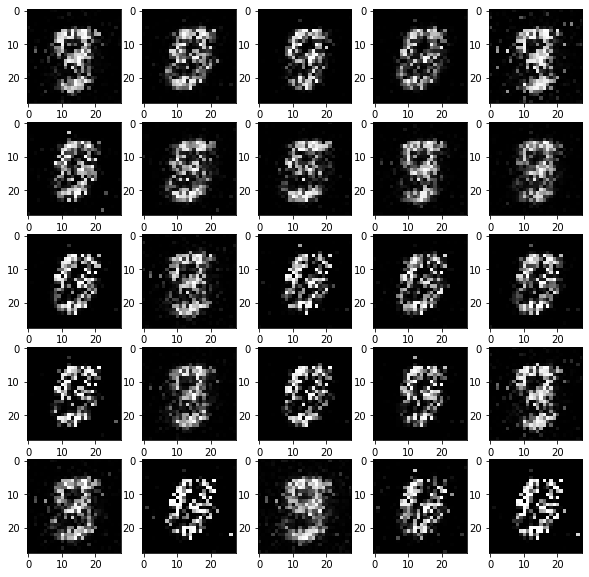

epochs 15


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 11ms/step


  0%|          | 1/273 [00:00<01:59,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


  1%|          | 2/273 [00:00<01:51,  2.44it/s]

4/4 [==============================] - 0s 9ms/step


  1%|          | 3/273 [00:01<01:48,  2.49it/s]

4/4 [==============================] - 0s 9ms/step


  1%|▏         | 4/273 [00:01<01:46,  2.52it/s]

4/4 [==============================] - 0s 11ms/step


  2%|▏         | 5/273 [00:02<01:47,  2.50it/s]

4/4 [==============================] - 0s 10ms/step


  2%|▏         | 6/273 [00:02<01:44,  2.55it/s]

4/4 [==============================] - 0s 8ms/step


  3%|▎         | 7/273 [00:02<01:44,  2.56it/s]

4/4 [==============================] - 0s 9ms/step


  3%|▎         | 8/273 [00:03<01:42,  2.60it/s]

4/4 [==============================] - 0s 9ms/step


  3%|▎         | 9/273 [00:03<01:40,  2.63it/s]

4/4 [==============================] - 0s 9ms/step


  4%|▎         | 10/273 [00:03<01:41,  2.58it/s]

4/4 [==============================] - 0s 10ms/step


  4%|▍         | 11/273 [00:04<01:42,  2.56it/s]

4/4 [==============================] - 0s 8ms/step


  4%|▍         | 12/273 [00:04<01:43,  2.53it/s]

4/4 [==============================] - 0s 11ms/step


  5%|▍         | 13/273 [00:05<01:43,  2.51it/s]

4/4 [==============================] - 0s 10ms/step


  5%|▌         | 14/273 [00:05<01:39,  2.60it/s]

4/4 [==============================] - 0s 10ms/step


  5%|▌         | 15/273 [00:05<01:41,  2.53it/s]

4/4 [==============================] - 0s 8ms/step


  6%|▌         | 16/273 [00:06<01:43,  2.49it/s]

4/4 [==============================] - 0s 10ms/step


  6%|▌         | 17/273 [00:06<01:39,  2.57it/s]

4/4 [==============================] - 0s 9ms/step


  7%|▋         | 18/273 [00:07<01:38,  2.58it/s]

4/4 [==============================] - 0s 9ms/step


  7%|▋         | 19/273 [00:07<01:40,  2.54it/s]

4/4 [==============================] - 0s 8ms/step


  7%|▋         | 20/273 [00:07<01:36,  2.61it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 21/273 [00:08<01:39,  2.54it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 22/273 [00:08<01:38,  2.55it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 23/273 [00:09<01:38,  2.55it/s]

4/4 [==============================] - 0s 8ms/step


  9%|▉         | 24/273 [00:09<01:36,  2.57it/s]

4/4 [==============================] - 0s 8ms/step


  9%|▉         | 25/273 [00:09<01:35,  2.61it/s]

4/4 [==============================] - 0s 8ms/step


 10%|▉         | 26/273 [00:10<01:34,  2.62it/s]

4/4 [==============================] - 0s 10ms/step


 10%|▉         | 27/273 [00:10<01:34,  2.62it/s]

4/4 [==============================] - 0s 8ms/step


 10%|█         | 28/273 [00:10<01:35,  2.56it/s]

4/4 [==============================] - 0s 9ms/step


 11%|█         | 29/273 [00:11<01:34,  2.59it/s]

4/4 [==============================] - 0s 9ms/step


 11%|█         | 30/273 [00:11<01:31,  2.65it/s]

4/4 [==============================] - 0s 9ms/step


 11%|█▏        | 31/273 [00:12<01:30,  2.68it/s]

4/4 [==============================] - 0s 11ms/step


 12%|█▏        | 32/273 [00:12<01:32,  2.60it/s]

4/4 [==============================] - 0s 8ms/step


 12%|█▏        | 33/273 [00:12<01:30,  2.66it/s]

4/4 [==============================] - 0s 9ms/step


 12%|█▏        | 34/273 [00:13<01:30,  2.65it/s]

4/4 [==============================] - 0s 9ms/step


 13%|█▎        | 35/273 [00:13<01:29,  2.67it/s]

4/4 [==============================] - 0s 9ms/step


 13%|█▎        | 36/273 [00:13<01:29,  2.64it/s]

4/4 [==============================] - 0s 10ms/step


 14%|█▎        | 37/273 [00:14<01:30,  2.61it/s]

4/4 [==============================] - 0s 8ms/step


 14%|█▍        | 38/273 [00:14<01:29,  2.61it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▍        | 39/273 [00:15<01:31,  2.55it/s]

4/4 [==============================] - 0s 8ms/step


 15%|█▍        | 40/273 [00:15<01:32,  2.51it/s]

4/4 [==============================] - 0s 8ms/step


 15%|█▌        | 41/273 [00:15<01:29,  2.58it/s]

4/4 [==============================] - 0s 9ms/step


 15%|█▌        | 42/273 [00:16<01:44,  2.22it/s]

4/4 [==============================] - 0s 10ms/step


 16%|█▌        | 43/273 [00:17<01:48,  2.12it/s]

4/4 [==============================] - 0s 15ms/step


 16%|█▌        | 44/273 [00:17<01:56,  1.97it/s]

4/4 [==============================] - 0s 11ms/step


 16%|█▋        | 45/273 [00:18<01:55,  1.98it/s]

4/4 [==============================] - 0s 12ms/step


 17%|█▋        | 46/273 [00:18<02:02,  1.85it/s]

4/4 [==============================] - 0s 12ms/step


 17%|█▋        | 47/273 [00:19<02:00,  1.88it/s]

4/4 [==============================] - 0s 14ms/step


 18%|█▊        | 48/273 [00:19<01:56,  1.93it/s]

4/4 [==============================] - 0s 8ms/step


 18%|█▊        | 49/273 [00:20<01:50,  2.02it/s]

4/4 [==============================] - 0s 8ms/step


 18%|█▊        | 50/273 [00:20<01:41,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 19%|█▊        | 51/273 [00:20<01:36,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 19%|█▉        | 52/273 [00:21<01:31,  2.42it/s]

4/4 [==============================] - 0s 10ms/step


 19%|█▉        | 53/273 [00:21<01:29,  2.45it/s]

4/4 [==============================] - 0s 8ms/step


 20%|█▉        | 54/273 [00:22<01:25,  2.55it/s]

4/4 [==============================] - 0s 10ms/step


 20%|██        | 55/273 [00:22<01:24,  2.59it/s]

4/4 [==============================] - 0s 9ms/step


 21%|██        | 56/273 [00:22<01:24,  2.57it/s]

4/4 [==============================] - 0s 8ms/step


 21%|██        | 57/273 [00:23<01:23,  2.60it/s]

4/4 [==============================] - 0s 8ms/step


 21%|██        | 58/273 [00:23<01:21,  2.63it/s]

4/4 [==============================] - 0s 10ms/step


 22%|██▏       | 59/273 [00:23<01:22,  2.59it/s]

4/4 [==============================] - 0s 9ms/step


 22%|██▏       | 60/273 [00:24<01:21,  2.61it/s]

4/4 [==============================] - 0s 9ms/step


 22%|██▏       | 61/273 [00:24<01:20,  2.65it/s]

4/4 [==============================] - 0s 9ms/step


 23%|██▎       | 62/273 [00:25<01:20,  2.63it/s]

4/4 [==============================] - 0s 9ms/step


 23%|██▎       | 63/273 [00:25<01:18,  2.67it/s]

4/4 [==============================] - 0s 10ms/step


 23%|██▎       | 64/273 [00:25<01:18,  2.65it/s]

4/4 [==============================] - 0s 9ms/step


 24%|██▍       | 65/273 [00:26<01:17,  2.67it/s]

4/4 [==============================] - 0s 8ms/step


 24%|██▍       | 66/273 [00:26<01:18,  2.63it/s]

4/4 [==============================] - 0s 12ms/step


 25%|██▍       | 67/273 [00:26<01:17,  2.65it/s]

4/4 [==============================] - 0s 9ms/step


 25%|██▍       | 68/273 [00:27<01:19,  2.58it/s]

4/4 [==============================] - 0s 9ms/step


 25%|██▌       | 69/273 [00:27<01:17,  2.63it/s]

4/4 [==============================] - 0s 10ms/step


 26%|██▌       | 70/273 [00:28<01:19,  2.56it/s]

4/4 [==============================] - 0s 9ms/step


 26%|██▌       | 71/273 [00:28<01:18,  2.56it/s]

4/4 [==============================] - 0s 8ms/step


 26%|██▋       | 72/273 [00:28<01:19,  2.53it/s]

4/4 [==============================] - 0s 8ms/step


 27%|██▋       | 73/273 [00:29<01:17,  2.59it/s]

4/4 [==============================] - 0s 9ms/step


 27%|██▋       | 74/273 [00:29<01:17,  2.57it/s]

4/4 [==============================] - 0s 8ms/step


 27%|██▋       | 75/273 [00:30<01:16,  2.57it/s]

4/4 [==============================] - 0s 8ms/step


 28%|██▊       | 76/273 [00:30<01:15,  2.62it/s]

4/4 [==============================] - 0s 10ms/step


 28%|██▊       | 77/273 [00:30<01:16,  2.57it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▊       | 78/273 [00:31<01:15,  2.57it/s]

4/4 [==============================] - 0s 10ms/step


 29%|██▉       | 79/273 [00:31<01:14,  2.61it/s]

4/4 [==============================] - 0s 8ms/step


 29%|██▉       | 80/273 [00:32<01:13,  2.61it/s]

4/4 [==============================] - 0s 8ms/step


 30%|██▉       | 81/273 [00:32<01:13,  2.62it/s]

4/4 [==============================] - 0s 8ms/step


 30%|███       | 82/273 [00:32<01:12,  2.62it/s]

4/4 [==============================] - 0s 9ms/step


 30%|███       | 83/273 [00:33<01:13,  2.59it/s]

4/4 [==============================] - 0s 11ms/step


 31%|███       | 84/273 [00:33<01:13,  2.59it/s]

4/4 [==============================] - 0s 10ms/step


 31%|███       | 85/273 [00:33<01:11,  2.65it/s]

4/4 [==============================] - 0s 8ms/step


 32%|███▏      | 86/273 [00:34<01:10,  2.67it/s]

4/4 [==============================] - 0s 9ms/step


 32%|███▏      | 87/273 [00:34<01:09,  2.67it/s]

4/4 [==============================] - 0s 8ms/step


 32%|███▏      | 88/273 [00:35<01:08,  2.71it/s]

4/4 [==============================] - 0s 11ms/step


 33%|███▎      | 89/273 [00:35<01:08,  2.70it/s]

4/4 [==============================] - 0s 9ms/step


 33%|███▎      | 90/273 [00:35<01:08,  2.65it/s]

4/4 [==============================] - 0s 9ms/step


 33%|███▎      | 91/273 [00:36<01:08,  2.65it/s]

4/4 [==============================] - 0s 8ms/step


 34%|███▎      | 92/273 [00:36<01:06,  2.72it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▍      | 93/273 [00:36<01:06,  2.72it/s]

4/4 [==============================] - 0s 8ms/step


 34%|███▍      | 94/273 [00:37<01:07,  2.66it/s]

4/4 [==============================] - 0s 9ms/step


 35%|███▍      | 95/273 [00:37<01:08,  2.61it/s]

4/4 [==============================] - 0s 9ms/step


 35%|███▌      | 96/273 [00:38<01:08,  2.58it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▌      | 97/273 [00:38<01:08,  2.57it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▌      | 98/273 [00:38<01:06,  2.64it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▋      | 99/273 [00:39<01:07,  2.59it/s]

4/4 [==============================] - 0s 8ms/step


 37%|███▋      | 100/273 [00:39<01:06,  2.59it/s]

4/4 [==============================] - 0s 8ms/step


 37%|███▋      | 101/273 [00:39<01:06,  2.59it/s]

4/4 [==============================] - 0s 10ms/step


 37%|███▋      | 102/273 [00:40<01:06,  2.58it/s]

4/4 [==============================] - 0s 10ms/step


 38%|███▊      | 103/273 [00:40<01:04,  2.65it/s]

4/4 [==============================] - 0s 9ms/step


 38%|███▊      | 104/273 [00:41<01:02,  2.69it/s]

4/4 [==============================] - 0s 8ms/step


 38%|███▊      | 105/273 [00:41<01:03,  2.67it/s]

4/4 [==============================] - 0s 9ms/step


 39%|███▉      | 106/273 [00:41<01:03,  2.61it/s]

4/4 [==============================] - 0s 9ms/step


 39%|███▉      | 107/273 [00:42<01:02,  2.67it/s]

4/4 [==============================] - 0s 10ms/step


 40%|███▉      | 108/273 [00:42<01:02,  2.62it/s]

4/4 [==============================] - 0s 9ms/step


 40%|███▉      | 109/273 [00:42<01:01,  2.67it/s]

4/4 [==============================] - 0s 9ms/step


 40%|████      | 110/273 [00:43<01:03,  2.56it/s]

4/4 [==============================] - 0s 8ms/step


 41%|████      | 111/273 [00:43<01:00,  2.66it/s]

4/4 [==============================] - 0s 8ms/step


 41%|████      | 112/273 [00:44<01:01,  2.63it/s]

4/4 [==============================] - 0s 9ms/step


 41%|████▏     | 113/273 [00:44<00:59,  2.67it/s]

4/4 [==============================] - 0s 8ms/step


 42%|████▏     | 114/273 [00:44<01:00,  2.62it/s]

4/4 [==============================] - 0s 9ms/step


 42%|████▏     | 115/273 [00:45<01:00,  2.63it/s]

4/4 [==============================] - 0s 9ms/step


 42%|████▏     | 116/273 [00:45<00:58,  2.68it/s]

4/4 [==============================] - 0s 8ms/step


 43%|████▎     | 117/273 [00:46<00:57,  2.70it/s]

4/4 [==============================] - 0s 10ms/step


 43%|████▎     | 118/273 [00:46<00:58,  2.67it/s]

4/4 [==============================] - 0s 8ms/step


 44%|████▎     | 119/273 [00:46<00:56,  2.72it/s]

4/4 [==============================] - 0s 9ms/step


 44%|████▍     | 120/273 [00:47<00:55,  2.74it/s]

4/4 [==============================] - 0s 8ms/step


 44%|████▍     | 121/273 [00:47<00:55,  2.76it/s]

4/4 [==============================] - 0s 14ms/step


 45%|████▍     | 122/273 [00:47<00:55,  2.72it/s]

4/4 [==============================] - 0s 9ms/step


 45%|████▌     | 123/273 [00:48<00:55,  2.71it/s]

4/4 [==============================] - 0s 9ms/step


 45%|████▌     | 124/273 [00:48<00:57,  2.61it/s]

4/4 [==============================] - 0s 8ms/step


 46%|████▌     | 125/273 [00:48<00:55,  2.65it/s]

4/4 [==============================] - 0s 8ms/step


 46%|████▌     | 126/273 [00:49<00:56,  2.60it/s]

4/4 [==============================] - 0s 10ms/step


 47%|████▋     | 127/273 [00:49<00:55,  2.65it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 128/273 [00:50<00:56,  2.58it/s]

4/4 [==============================] - 0s 10ms/step


 47%|████▋     | 129/273 [00:50<00:54,  2.64it/s]

4/4 [==============================] - 0s 8ms/step


 48%|████▊     | 130/273 [00:50<00:54,  2.63it/s]

4/4 [==============================] - 0s 9ms/step


 48%|████▊     | 131/273 [00:51<00:53,  2.65it/s]

4/4 [==============================] - 0s 9ms/step


 48%|████▊     | 132/273 [00:51<00:54,  2.59it/s]

4/4 [==============================] - 0s 9ms/step


 49%|████▊     | 133/273 [00:52<00:53,  2.62it/s]

4/4 [==============================] - 0s 9ms/step


 49%|████▉     | 134/273 [00:52<00:53,  2.60it/s]

4/4 [==============================] - 0s 11ms/step


 49%|████▉     | 135/273 [00:52<00:52,  2.62it/s]

4/4 [==============================] - 0s 12ms/step


 50%|████▉     | 136/273 [00:53<00:53,  2.57it/s]

4/4 [==============================] - 0s 9ms/step


 50%|█████     | 137/273 [00:53<00:51,  2.63it/s]

4/4 [==============================] - 0s 9ms/step


 51%|█████     | 138/273 [00:53<00:50,  2.65it/s]

4/4 [==============================] - 0s 9ms/step


 51%|█████     | 139/273 [00:54<00:50,  2.63it/s]

4/4 [==============================] - 0s 9ms/step


 51%|█████▏    | 140/273 [00:54<00:49,  2.71it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 141/273 [00:55<00:49,  2.67it/s]

4/4 [==============================] - 0s 15ms/step


 52%|█████▏    | 142/273 [00:55<00:50,  2.61it/s]

4/4 [==============================] - 0s 8ms/step


 52%|█████▏    | 143/273 [00:55<00:48,  2.67it/s]

4/4 [==============================] - 0s 10ms/step


 53%|█████▎    | 144/273 [00:56<00:48,  2.64it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 145/273 [00:56<00:47,  2.72it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 146/273 [00:56<00:46,  2.71it/s]

4/4 [==============================] - 0s 9ms/step


 54%|█████▍    | 147/273 [00:57<00:46,  2.72it/s]

4/4 [==============================] - 0s 9ms/step


 54%|█████▍    | 148/273 [00:57<00:47,  2.62it/s]

4/4 [==============================] - 0s 11ms/step


 55%|█████▍    | 149/273 [00:58<00:47,  2.61it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▍    | 150/273 [00:58<00:47,  2.58it/s]

4/4 [==============================] - 0s 13ms/step


 55%|█████▌    | 151/273 [00:58<00:51,  2.38it/s]

4/4 [==============================] - 0s 12ms/step


 56%|█████▌    | 152/273 [00:59<00:54,  2.21it/s]

4/4 [==============================] - 0s 12ms/step


 56%|█████▌    | 153/273 [01:00<00:56,  2.11it/s]

4/4 [==============================] - 0s 13ms/step


 56%|█████▋    | 154/273 [01:00<00:58,  2.04it/s]

4/4 [==============================] - 0s 16ms/step


 57%|█████▋    | 155/273 [01:01<01:03,  1.86it/s]

4/4 [==============================] - 0s 9ms/step


 57%|█████▋    | 156/273 [01:01<01:03,  1.83it/s]

4/4 [==============================] - 0s 13ms/step


 58%|█████▊    | 157/273 [01:02<01:03,  1.84it/s]

4/4 [==============================] - 0s 12ms/step


 58%|█████▊    | 158/273 [01:02<00:59,  1.92it/s]

4/4 [==============================] - 0s 9ms/step


 58%|█████▊    | 159/273 [01:03<00:54,  2.09it/s]

4/4 [==============================] - 0s 8ms/step


 59%|█████▊    | 160/273 [01:03<00:51,  2.21it/s]

4/4 [==============================] - 0s 10ms/step


 59%|█████▉    | 161/273 [01:03<00:49,  2.28it/s]

4/4 [==============================] - 0s 11ms/step


 59%|█████▉    | 162/273 [01:04<00:47,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 60%|█████▉    | 163/273 [01:04<00:45,  2.43it/s]

4/4 [==============================] - 0s 11ms/step


 60%|██████    | 164/273 [01:05<00:43,  2.52it/s]

4/4 [==============================] - 0s 8ms/step


 60%|██████    | 165/273 [01:05<00:42,  2.57it/s]

4/4 [==============================] - 0s 9ms/step


 61%|██████    | 166/273 [01:05<00:40,  2.63it/s]

4/4 [==============================] - 0s 8ms/step


 61%|██████    | 167/273 [01:06<00:39,  2.68it/s]

4/4 [==============================] - 0s 8ms/step


 62%|██████▏   | 168/273 [01:06<00:38,  2.71it/s]

4/4 [==============================] - 0s 8ms/step


 62%|██████▏   | 169/273 [01:06<00:38,  2.70it/s]

4/4 [==============================] - 0s 9ms/step


 62%|██████▏   | 170/273 [01:07<00:37,  2.73it/s]

4/4 [==============================] - 0s 9ms/step


 63%|██████▎   | 171/273 [01:07<00:37,  2.70it/s]

4/4 [==============================] - 0s 8ms/step


 63%|██████▎   | 172/273 [01:08<00:37,  2.72it/s]

4/4 [==============================] - 0s 9ms/step


 63%|██████▎   | 173/273 [01:08<00:37,  2.68it/s]

4/4 [==============================] - 0s 11ms/step


 64%|██████▎   | 174/273 [01:08<00:37,  2.61it/s]

4/4 [==============================] - 0s 9ms/step


 64%|██████▍   | 175/273 [01:09<00:38,  2.56it/s]

4/4 [==============================] - 0s 8ms/step


 64%|██████▍   | 176/273 [01:09<00:37,  2.61it/s]

4/4 [==============================] - 0s 7ms/step


 65%|██████▍   | 177/273 [01:09<00:37,  2.58it/s]

4/4 [==============================] - 0s 11ms/step


 65%|██████▌   | 178/273 [01:10<00:35,  2.64it/s]

4/4 [==============================] - 0s 8ms/step


 66%|██████▌   | 179/273 [01:10<00:35,  2.63it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▌   | 180/273 [01:11<00:35,  2.61it/s]

4/4 [==============================] - 0s 8ms/step


 66%|██████▋   | 181/273 [01:11<00:35,  2.59it/s]

4/4 [==============================] - 0s 14ms/step


 67%|██████▋   | 182/273 [01:11<00:34,  2.61it/s]

4/4 [==============================] - 0s 10ms/step


 67%|██████▋   | 183/273 [01:12<00:34,  2.64it/s]

4/4 [==============================] - 0s 10ms/step


 67%|██████▋   | 184/273 [01:12<00:33,  2.68it/s]

4/4 [==============================] - 0s 10ms/step


 68%|██████▊   | 185/273 [01:13<00:33,  2.61it/s]

4/4 [==============================] - 0s 9ms/step


 68%|██████▊   | 186/273 [01:13<00:32,  2.66it/s]

4/4 [==============================] - 0s 8ms/step


 68%|██████▊   | 187/273 [01:13<00:32,  2.63it/s]

4/4 [==============================] - 0s 8ms/step


 69%|██████▉   | 188/273 [01:14<00:32,  2.65it/s]

4/4 [==============================] - 0s 8ms/step


 69%|██████▉   | 189/273 [01:14<00:31,  2.69it/s]

4/4 [==============================] - 0s 9ms/step


 70%|██████▉   | 190/273 [01:14<00:30,  2.70it/s]

4/4 [==============================] - 0s 11ms/step


 70%|██████▉   | 191/273 [01:15<00:31,  2.62it/s]

4/4 [==============================] - 0s 9ms/step


 70%|███████   | 192/273 [01:15<00:30,  2.68it/s]

4/4 [==============================] - 0s 12ms/step


 71%|███████   | 193/273 [01:16<00:30,  2.66it/s]

4/4 [==============================] - 0s 10ms/step


 71%|███████   | 194/273 [01:16<00:29,  2.67it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████▏  | 195/273 [01:16<00:29,  2.67it/s]

4/4 [==============================] - 0s 12ms/step


 72%|███████▏  | 196/273 [01:17<00:29,  2.65it/s]

4/4 [==============================] - 0s 10ms/step


 72%|███████▏  | 197/273 [01:17<00:28,  2.66it/s]

4/4 [==============================] - 0s 9ms/step


 73%|███████▎  | 198/273 [01:17<00:28,  2.63it/s]

4/4 [==============================] - 0s 9ms/step


 73%|███████▎  | 199/273 [01:18<00:28,  2.63it/s]

4/4 [==============================] - 0s 9ms/step


 73%|███████▎  | 200/273 [01:18<00:28,  2.60it/s]

4/4 [==============================] - 0s 8ms/step


 74%|███████▎  | 201/273 [01:19<00:27,  2.59it/s]

4/4 [==============================] - 0s 8ms/step


 74%|███████▍  | 202/273 [01:19<00:26,  2.63it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▍  | 203/273 [01:19<00:26,  2.61it/s]

4/4 [==============================] - 0s 10ms/step


 75%|███████▍  | 204/273 [01:20<00:26,  2.62it/s]

4/4 [==============================] - 0s 11ms/step


 75%|███████▌  | 205/273 [01:20<00:25,  2.62it/s]

4/4 [==============================] - 0s 9ms/step


 75%|███████▌  | 206/273 [01:20<00:25,  2.60it/s]

4/4 [==============================] - 0s 10ms/step


 76%|███████▌  | 207/273 [01:21<00:25,  2.60it/s]

4/4 [==============================] - 0s 8ms/step


 76%|███████▌  | 208/273 [01:21<00:24,  2.62it/s]

4/4 [==============================] - 0s 10ms/step


 77%|███████▋  | 209/273 [01:22<00:24,  2.62it/s]

4/4 [==============================] - 0s 8ms/step


 77%|███████▋  | 210/273 [01:22<00:23,  2.66it/s]

4/4 [==============================] - 0s 11ms/step


 77%|███████▋  | 211/273 [01:22<00:23,  2.65it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 212/273 [01:23<00:23,  2.63it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 213/273 [01:23<00:22,  2.65it/s]

4/4 [==============================] - 0s 10ms/step


 78%|███████▊  | 214/273 [01:23<00:22,  2.67it/s]

4/4 [==============================] - 0s 10ms/step


 79%|███████▉  | 215/273 [01:24<00:21,  2.68it/s]

4/4 [==============================] - 0s 10ms/step


 79%|███████▉  | 216/273 [01:24<00:21,  2.69it/s]

4/4 [==============================] - 0s 9ms/step


 79%|███████▉  | 217/273 [01:25<00:20,  2.67it/s]

4/4 [==============================] - 0s 10ms/step


 80%|███████▉  | 218/273 [01:25<00:20,  2.71it/s]

4/4 [==============================] - 0s 10ms/step


 80%|████████  | 219/273 [01:25<00:20,  2.64it/s]

4/4 [==============================] - 0s 10ms/step


 81%|████████  | 220/273 [01:26<00:20,  2.60it/s]

4/4 [==============================] - 0s 8ms/step


 81%|████████  | 221/273 [01:26<00:20,  2.60it/s]

4/4 [==============================] - 0s 9ms/step


 81%|████████▏ | 222/273 [01:27<00:19,  2.66it/s]

4/4 [==============================] - 0s 10ms/step


 82%|████████▏ | 223/273 [01:27<00:19,  2.58it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 224/273 [01:28<00:23,  2.09it/s]

4/4 [==============================] - 0s 14ms/step


 82%|████████▏ | 225/273 [01:28<00:21,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 83%|████████▎ | 226/273 [01:28<00:20,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 83%|████████▎ | 227/273 [01:29<00:19,  2.36it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▎ | 228/273 [01:29<00:18,  2.41it/s]

4/4 [==============================] - 0s 8ms/step


 84%|████████▍ | 229/273 [01:30<00:17,  2.53it/s]

4/4 [==============================] - 0s 11ms/step


 84%|████████▍ | 230/273 [01:30<00:17,  2.50it/s]

4/4 [==============================] - 0s 10ms/step


 85%|████████▍ | 231/273 [01:30<00:16,  2.52it/s]

4/4 [==============================] - 0s 9ms/step


 85%|████████▍ | 232/273 [01:31<00:16,  2.56it/s]

4/4 [==============================] - 0s 8ms/step


 85%|████████▌ | 233/273 [01:31<00:15,  2.57it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▌ | 234/273 [01:32<00:15,  2.51it/s]

4/4 [==============================] - 0s 8ms/step


 86%|████████▌ | 235/273 [01:32<00:15,  2.49it/s]

4/4 [==============================] - 0s 15ms/step


 86%|████████▋ | 236/273 [01:32<00:14,  2.53it/s]

4/4 [==============================] - 0s 10ms/step


 87%|████████▋ | 237/273 [01:33<00:14,  2.51it/s]

4/4 [==============================] - 0s 9ms/step


 87%|████████▋ | 238/273 [01:33<00:13,  2.52it/s]

4/4 [==============================] - 0s 8ms/step


 88%|████████▊ | 239/273 [01:34<00:13,  2.48it/s]

4/4 [==============================] - 0s 10ms/step


 88%|████████▊ | 240/273 [01:34<00:13,  2.52it/s]

4/4 [==============================] - 0s 11ms/step


 88%|████████▊ | 241/273 [01:34<00:12,  2.51it/s]

4/4 [==============================] - 0s 20ms/step


 89%|████████▊ | 242/273 [01:35<00:12,  2.46it/s]

4/4 [==============================] - 0s 8ms/step


 89%|████████▉ | 243/273 [01:35<00:12,  2.47it/s]

4/4 [==============================] - 0s 13ms/step


 89%|████████▉ | 244/273 [01:36<00:11,  2.49it/s]

4/4 [==============================] - 0s 9ms/step


 90%|████████▉ | 245/273 [01:36<00:11,  2.49it/s]

4/4 [==============================] - 0s 15ms/step


 90%|█████████ | 246/273 [01:36<00:10,  2.53it/s]

4/4 [==============================] - 0s 8ms/step


 90%|█████████ | 247/273 [01:37<00:10,  2.57it/s]

4/4 [==============================] - 0s 8ms/step


 91%|█████████ | 248/273 [01:37<00:09,  2.63it/s]

4/4 [==============================] - 0s 10ms/step


 91%|█████████ | 249/273 [01:37<00:09,  2.61it/s]

4/4 [==============================] - 0s 8ms/step


 92%|█████████▏| 250/273 [01:38<00:08,  2.63it/s]

4/4 [==============================] - 0s 11ms/step


 92%|█████████▏| 251/273 [01:38<00:08,  2.58it/s]

4/4 [==============================] - 0s 8ms/step


 92%|█████████▏| 252/273 [01:39<00:08,  2.62it/s]

4/4 [==============================] - 0s 8ms/step


 93%|█████████▎| 253/273 [01:39<00:07,  2.61it/s]

4/4 [==============================] - 0s 10ms/step


 93%|█████████▎| 254/273 [01:39<00:07,  2.61it/s]

4/4 [==============================] - 0s 9ms/step


 93%|█████████▎| 255/273 [01:40<00:06,  2.60it/s]

4/4 [==============================] - 0s 8ms/step


 94%|█████████▍| 256/273 [01:40<00:06,  2.62it/s]

4/4 [==============================] - 0s 10ms/step


 94%|█████████▍| 257/273 [01:41<00:06,  2.56it/s]

4/4 [==============================] - 0s 10ms/step


 95%|█████████▍| 258/273 [01:41<00:05,  2.58it/s]

4/4 [==============================] - 0s 8ms/step


 95%|█████████▍| 259/273 [01:41<00:05,  2.54it/s]

4/4 [==============================] - 0s 10ms/step


 95%|█████████▌| 260/273 [01:42<00:05,  2.59it/s]

4/4 [==============================] - 0s 10ms/step


 96%|█████████▌| 261/273 [01:42<00:04,  2.61it/s]

4/4 [==============================] - 0s 10ms/step


 96%|█████████▌| 262/273 [01:42<00:04,  2.59it/s]

4/4 [==============================] - 0s 8ms/step


 96%|█████████▋| 263/273 [01:43<00:03,  2.56it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 264/273 [01:43<00:03,  2.60it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 265/273 [01:44<00:03,  2.62it/s]

4/4 [==============================] - 0s 10ms/step


 97%|█████████▋| 266/273 [01:44<00:02,  2.63it/s]

4/4 [==============================] - 0s 14ms/step


 98%|█████████▊| 267/273 [01:44<00:02,  2.59it/s]

4/4 [==============================] - 0s 10ms/step


 98%|█████████▊| 268/273 [01:45<00:01,  2.56it/s]

4/4 [==============================] - 0s 8ms/step


 99%|█████████▊| 269/273 [01:45<00:01,  2.64it/s]

4/4 [==============================] - 0s 9ms/step


 99%|█████████▉| 270/273 [01:46<00:01,  2.54it/s]

4/4 [==============================] - 0s 8ms/step


 99%|█████████▉| 271/273 [01:46<00:00,  2.59it/s]

4/4 [==============================] - 0s 9ms/step


100%|█████████▉| 272/273 [01:46<00:00,  2.56it/s]

4/4 [==============================] - 0s 10ms/step


100%|██████████| 273/273 [01:47<00:00,  2.55it/s]


loss is 0.11261071264743805 |*| 0.6774230003356934
1/1 [==============================] - 0s 36ms/step


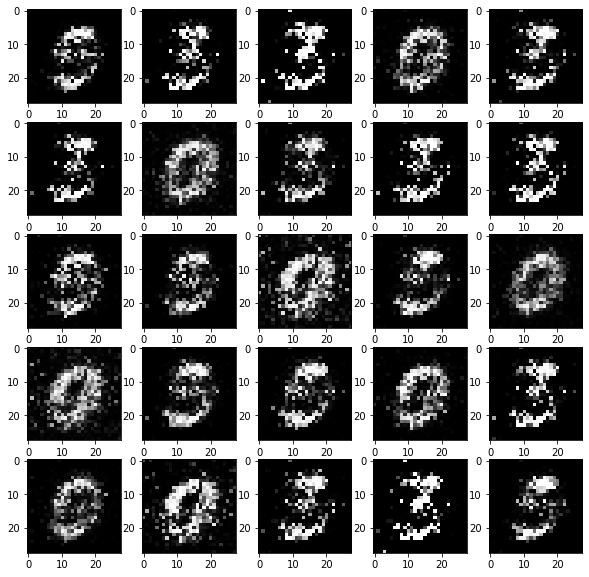

epochs 16


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 8ms/step


  0%|          | 1/273 [00:00<01:48,  2.50it/s]

4/4 [==============================] - 0s 9ms/step


  1%|          | 2/273 [00:00<02:08,  2.10it/s]

4/4 [==============================] - 0s 10ms/step


  1%|          | 3/273 [00:01<01:58,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


  1%|▏         | 4/273 [00:01<01:49,  2.45it/s]

4/4 [==============================] - 0s 9ms/step


  2%|▏         | 5/273 [00:02<01:46,  2.51it/s]

4/4 [==============================] - 0s 9ms/step


  2%|▏         | 6/273 [00:02<01:42,  2.60it/s]

4/4 [==============================] - 0s 9ms/step


  3%|▎         | 7/273 [00:02<01:42,  2.60it/s]

4/4 [==============================] - 0s 14ms/step


  3%|▎         | 8/273 [00:03<01:42,  2.57it/s]

4/4 [==============================] - 0s 9ms/step


  3%|▎         | 9/273 [00:03<01:41,  2.61it/s]

4/4 [==============================] - 0s 10ms/step


  4%|▎         | 10/273 [00:03<01:41,  2.58it/s]

4/4 [==============================] - 0s 12ms/step


  4%|▍         | 11/273 [00:04<01:41,  2.59it/s]

4/4 [==============================] - 0s 10ms/step


  4%|▍         | 12/273 [00:04<01:39,  2.62it/s]

4/4 [==============================] - 0s 8ms/step


  5%|▍         | 13/273 [00:05<01:39,  2.61it/s]

4/4 [==============================] - 0s 10ms/step


  5%|▌         | 14/273 [00:05<01:39,  2.61it/s]

4/4 [==============================] - 0s 8ms/step


  5%|▌         | 15/273 [00:05<01:39,  2.60it/s]

4/4 [==============================] - 0s 9ms/step


  6%|▌         | 16/273 [00:06<01:39,  2.59it/s]

4/4 [==============================] - 0s 8ms/step


  6%|▌         | 17/273 [00:06<01:39,  2.57it/s]

4/4 [==============================] - 0s 11ms/step


  7%|▋         | 18/273 [00:07<01:40,  2.54it/s]

4/4 [==============================] - 0s 10ms/step


  7%|▋         | 19/273 [00:07<01:42,  2.49it/s]

4/4 [==============================] - 0s 8ms/step


  7%|▋         | 20/273 [00:07<01:42,  2.46it/s]

4/4 [==============================] - 0s 10ms/step


  8%|▊         | 21/273 [00:08<01:39,  2.52it/s]

4/4 [==============================] - 0s 8ms/step


  8%|▊         | 22/273 [00:08<01:38,  2.55it/s]

4/4 [==============================] - 0s 8ms/step


  8%|▊         | 23/273 [00:09<01:36,  2.59it/s]

4/4 [==============================] - 0s 8ms/step


  9%|▉         | 24/273 [00:09<01:38,  2.53it/s]

4/4 [==============================] - 0s 9ms/step


  9%|▉         | 25/273 [00:09<01:36,  2.57it/s]

4/4 [==============================] - 0s 8ms/step


 10%|▉         | 26/273 [00:10<01:36,  2.56it/s]

4/4 [==============================] - 0s 8ms/step


 10%|▉         | 27/273 [00:10<01:35,  2.59it/s]

4/4 [==============================] - 0s 10ms/step


 10%|█         | 28/273 [00:10<01:34,  2.61it/s]

4/4 [==============================] - 0s 9ms/step


 11%|█         | 29/273 [00:11<01:34,  2.59it/s]

4/4 [==============================] - 0s 12ms/step


 11%|█         | 30/273 [00:11<01:36,  2.53it/s]

4/4 [==============================] - 0s 9ms/step


 11%|█▏        | 31/273 [00:12<01:34,  2.57it/s]

4/4 [==============================] - 0s 12ms/step


 12%|█▏        | 32/273 [00:12<01:33,  2.57it/s]

4/4 [==============================] - 0s 9ms/step


 12%|█▏        | 33/273 [00:12<01:33,  2.56it/s]

4/4 [==============================] - 0s 10ms/step


 12%|█▏        | 34/273 [00:13<01:31,  2.62it/s]

4/4 [==============================] - 0s 8ms/step


 13%|█▎        | 35/273 [00:13<01:31,  2.61it/s]

4/4 [==============================] - 0s 10ms/step


 13%|█▎        | 36/273 [00:14<01:30,  2.63it/s]

4/4 [==============================] - 0s 10ms/step


 14%|█▎        | 37/273 [00:14<01:29,  2.65it/s]

4/4 [==============================] - 0s 10ms/step


 14%|█▍        | 38/273 [00:14<01:29,  2.63it/s]

4/4 [==============================] - 0s 11ms/step


 14%|█▍        | 39/273 [00:15<01:28,  2.65it/s]

4/4 [==============================] - 0s 10ms/step


 15%|█▍        | 40/273 [00:15<01:27,  2.65it/s]

4/4 [==============================] - 0s 8ms/step


 15%|█▌        | 41/273 [00:15<01:28,  2.61it/s]

4/4 [==============================] - 0s 9ms/step


 15%|█▌        | 42/273 [00:16<01:28,  2.60it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▌        | 43/273 [00:16<01:28,  2.60it/s]

4/4 [==============================] - 0s 10ms/step


 16%|█▌        | 44/273 [00:17<01:27,  2.61it/s]

4/4 [==============================] - 0s 10ms/step


 16%|█▋        | 45/273 [00:17<01:27,  2.62it/s]

4/4 [==============================] - 0s 10ms/step


 17%|█▋        | 46/273 [00:17<01:27,  2.59it/s]

4/4 [==============================] - 0s 15ms/step


 17%|█▋        | 47/273 [00:18<01:27,  2.57it/s]

4/4 [==============================] - 0s 10ms/step


 18%|█▊        | 48/273 [00:18<01:27,  2.57it/s]

4/4 [==============================] - 0s 10ms/step


 18%|█▊        | 49/273 [00:19<01:25,  2.60it/s]

4/4 [==============================] - 0s 11ms/step


 18%|█▊        | 50/273 [00:19<01:24,  2.64it/s]

4/4 [==============================] - 0s 9ms/step


 19%|█▊        | 51/273 [00:19<01:24,  2.62it/s]

4/4 [==============================] - 0s 11ms/step


 19%|█▉        | 52/273 [00:20<01:22,  2.68it/s]

4/4 [==============================] - 0s 9ms/step


 19%|█▉        | 53/273 [00:20<01:20,  2.72it/s]

4/4 [==============================] - 0s 11ms/step


 20%|█▉        | 54/273 [00:20<01:24,  2.59it/s]

4/4 [==============================] - 0s 10ms/step


 20%|██        | 55/273 [00:21<01:25,  2.56it/s]

4/4 [==============================] - 0s 10ms/step


 21%|██        | 56/273 [00:21<01:24,  2.57it/s]

4/4 [==============================] - 0s 9ms/step


 21%|██        | 57/273 [00:22<01:25,  2.52it/s]

4/4 [==============================] - 0s 11ms/step


 21%|██        | 58/273 [00:22<01:24,  2.53it/s]

4/4 [==============================] - 0s 9ms/step


 22%|██▏       | 59/273 [00:22<01:24,  2.55it/s]

4/4 [==============================] - 0s 9ms/step


 22%|██▏       | 60/273 [00:23<01:21,  2.61it/s]

4/4 [==============================] - 0s 12ms/step


 22%|██▏       | 61/273 [00:23<01:22,  2.57it/s]

4/4 [==============================] - 0s 8ms/step


 23%|██▎       | 62/273 [00:24<01:19,  2.65it/s]

4/4 [==============================] - 0s 11ms/step


 23%|██▎       | 63/273 [00:24<01:18,  2.67it/s]

4/4 [==============================] - 0s 8ms/step


 23%|██▎       | 64/273 [00:24<01:20,  2.58it/s]

4/4 [==============================] - 0s 9ms/step


 24%|██▍       | 65/273 [00:25<01:21,  2.55it/s]

4/4 [==============================] - 0s 10ms/step


 24%|██▍       | 66/273 [00:25<01:19,  2.59it/s]

4/4 [==============================] - 0s 10ms/step


 25%|██▍       | 67/273 [00:25<01:19,  2.59it/s]

4/4 [==============================] - 0s 9ms/step


 25%|██▍       | 68/273 [00:26<01:18,  2.61it/s]

4/4 [==============================] - 0s 8ms/step


 25%|██▌       | 69/273 [00:26<01:20,  2.54it/s]

4/4 [==============================] - 0s 9ms/step


 26%|██▌       | 70/273 [00:27<01:18,  2.57it/s]

4/4 [==============================] - 0s 9ms/step


 26%|██▌       | 71/273 [00:27<01:18,  2.59it/s]

4/4 [==============================] - 0s 9ms/step


 26%|██▋       | 72/273 [00:27<01:17,  2.58it/s]

4/4 [==============================] - 0s 9ms/step


 27%|██▋       | 73/273 [00:28<01:16,  2.60it/s]

4/4 [==============================] - 0s 8ms/step


 27%|██▋       | 74/273 [00:28<01:14,  2.66it/s]

4/4 [==============================] - 0s 8ms/step


 27%|██▋       | 75/273 [00:29<01:16,  2.60it/s]

4/4 [==============================] - 0s 11ms/step


 28%|██▊       | 76/273 [00:29<01:14,  2.65it/s]

4/4 [==============================] - 0s 8ms/step


 28%|██▊       | 77/273 [00:29<01:13,  2.68it/s]

4/4 [==============================] - 0s 10ms/step


 29%|██▊       | 78/273 [00:30<01:12,  2.68it/s]

4/4 [==============================] - 0s 10ms/step


 29%|██▉       | 79/273 [00:30<01:12,  2.66it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▉       | 80/273 [00:30<01:14,  2.61it/s]

4/4 [==============================] - 0s 8ms/step


 30%|██▉       | 81/273 [00:31<01:13,  2.60it/s]

4/4 [==============================] - 0s 9ms/step


 30%|███       | 82/273 [00:31<01:13,  2.61it/s]

4/4 [==============================] - 0s 8ms/step


 30%|███       | 83/273 [00:32<01:12,  2.60it/s]

4/4 [==============================] - 0s 8ms/step


 31%|███       | 84/273 [00:32<01:13,  2.58it/s]

4/4 [==============================] - 0s 11ms/step


 31%|███       | 85/273 [00:32<01:13,  2.57it/s]

4/4 [==============================] - 0s 11ms/step


 32%|███▏      | 86/273 [00:33<01:12,  2.58it/s]

4/4 [==============================] - 0s 9ms/step


 32%|███▏      | 87/273 [00:33<01:10,  2.62it/s]

4/4 [==============================] - 0s 8ms/step


 32%|███▏      | 88/273 [00:34<01:10,  2.63it/s]

4/4 [==============================] - 0s 8ms/step


 33%|███▎      | 89/273 [00:34<01:09,  2.64it/s]

4/4 [==============================] - 0s 10ms/step


 33%|███▎      | 90/273 [00:34<01:08,  2.67it/s]

4/4 [==============================] - 0s 9ms/step


 33%|███▎      | 91/273 [00:35<01:07,  2.69it/s]

4/4 [==============================] - 0s 10ms/step


 34%|███▎      | 92/273 [00:35<01:06,  2.71it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▍      | 93/273 [00:35<01:06,  2.72it/s]

4/4 [==============================] - 0s 8ms/step


 34%|███▍      | 94/273 [00:36<01:06,  2.70it/s]

4/4 [==============================] - 0s 11ms/step


 35%|███▍      | 95/273 [00:36<01:07,  2.64it/s]

4/4 [==============================] - 0s 10ms/step


 35%|███▌      | 96/273 [00:36<01:06,  2.66it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▌      | 97/273 [00:37<01:07,  2.60it/s]

4/4 [==============================] - 0s 10ms/step


 36%|███▌      | 98/273 [00:37<01:08,  2.57it/s]

4/4 [==============================] - 0s 11ms/step


 36%|███▋      | 99/273 [00:38<01:06,  2.63it/s]

4/4 [==============================] - 0s 10ms/step


 37%|███▋      | 100/273 [00:38<01:07,  2.57it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 101/273 [00:38<01:06,  2.59it/s]

4/4 [==============================] - 0s 8ms/step


 37%|███▋      | 102/273 [00:39<01:07,  2.53it/s]

4/4 [==============================] - 0s 8ms/step


 38%|███▊      | 103/273 [00:39<01:06,  2.56it/s]

4/4 [==============================] - 0s 8ms/step


 38%|███▊      | 104/273 [00:40<01:05,  2.59it/s]

4/4 [==============================] - 0s 9ms/step


 38%|███▊      | 105/273 [00:40<01:05,  2.57it/s]

4/4 [==============================] - 0s 9ms/step


 39%|███▉      | 106/273 [00:40<01:03,  2.61it/s]

4/4 [==============================] - 0s 9ms/step


 39%|███▉      | 107/273 [00:41<01:04,  2.59it/s]

4/4 [==============================] - 0s 10ms/step


 40%|███▉      | 108/273 [00:41<01:02,  2.63it/s]

4/4 [==============================] - 0s 14ms/step


 40%|███▉      | 109/273 [00:42<01:03,  2.60it/s]

4/4 [==============================] - 0s 9ms/step


 40%|████      | 110/273 [00:42<01:02,  2.61it/s]

4/4 [==============================] - 0s 10ms/step


 41%|████      | 111/273 [00:42<01:02,  2.60it/s]

4/4 [==============================] - 0s 9ms/step


 41%|████      | 112/273 [00:43<01:02,  2.57it/s]

4/4 [==============================] - 0s 9ms/step


 41%|████▏     | 113/273 [00:43<01:02,  2.58it/s]

4/4 [==============================] - 0s 10ms/step


 42%|████▏     | 114/273 [00:43<01:01,  2.57it/s]

4/4 [==============================] - 0s 9ms/step


 42%|████▏     | 115/273 [00:44<01:02,  2.52it/s]

4/4 [==============================] - 0s 9ms/step


 42%|████▏     | 116/273 [00:44<01:01,  2.57it/s]

4/4 [==============================] - 0s 9ms/step


 43%|████▎     | 117/273 [00:45<01:01,  2.53it/s]

4/4 [==============================] - 0s 8ms/step


 43%|████▎     | 118/273 [00:45<01:00,  2.57it/s]

4/4 [==============================] - 0s 9ms/step


 44%|████▎     | 119/273 [00:45<01:01,  2.52it/s]

4/4 [==============================] - 0s 9ms/step


 44%|████▍     | 120/273 [00:46<00:59,  2.55it/s]

4/4 [==============================] - 0s 11ms/step


 44%|████▍     | 121/273 [00:46<00:58,  2.60it/s]

4/4 [==============================] - 0s 9ms/step


 45%|████▍     | 122/273 [00:47<00:57,  2.61it/s]

4/4 [==============================] - 0s 8ms/step


 45%|████▌     | 123/273 [00:47<00:58,  2.57it/s]

4/4 [==============================] - 0s 8ms/step


 45%|████▌     | 124/273 [00:47<00:57,  2.58it/s]

4/4 [==============================] - 0s 8ms/step


 46%|████▌     | 125/273 [00:48<00:56,  2.61it/s]

4/4 [==============================] - 0s 10ms/step


 46%|████▌     | 126/273 [00:48<00:56,  2.62it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 127/273 [00:49<00:56,  2.60it/s]

4/4 [==============================] - 0s 8ms/step


 47%|████▋     | 128/273 [00:49<00:56,  2.57it/s]

4/4 [==============================] - 0s 10ms/step


 47%|████▋     | 129/273 [00:49<00:55,  2.58it/s]

4/4 [==============================] - 0s 9ms/step


 48%|████▊     | 130/273 [00:50<00:56,  2.52it/s]

4/4 [==============================] - 0s 8ms/step


 48%|████▊     | 131/273 [00:50<01:00,  2.34it/s]

4/4 [==============================] - 0s 12ms/step


 48%|████▊     | 132/273 [00:51<01:05,  2.16it/s]

4/4 [==============================] - 0s 11ms/step


 49%|████▊     | 133/273 [00:51<01:08,  2.05it/s]

4/4 [==============================] - 0s 13ms/step


 49%|████▉     | 134/273 [00:52<01:11,  1.96it/s]

4/4 [==============================] - 0s 9ms/step


 49%|████▉     | 135/273 [00:52<01:09,  1.99it/s]

4/4 [==============================] - 0s 13ms/step


 50%|████▉     | 136/273 [00:53<01:08,  2.00it/s]

4/4 [==============================] - 0s 12ms/step


 50%|█████     | 137/273 [00:53<01:06,  2.06it/s]

4/4 [==============================] - 0s 11ms/step


 51%|█████     | 138/273 [00:54<01:08,  1.98it/s]

4/4 [==============================] - 0s 9ms/step


 51%|█████     | 139/273 [00:54<01:07,  1.99it/s]

4/4 [==============================] - 0s 8ms/step


 51%|█████▏    | 140/273 [00:55<01:04,  2.07it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 141/273 [00:55<00:58,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 52%|█████▏    | 142/273 [00:56<00:56,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 143/273 [00:56<00:53,  2.44it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 144/273 [00:56<00:51,  2.52it/s]

4/4 [==============================] - 0s 7ms/step


 53%|█████▎    | 145/273 [00:57<00:50,  2.55it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 146/273 [00:57<00:49,  2.58it/s]

4/4 [==============================] - 0s 8ms/step


 54%|█████▍    | 147/273 [00:57<00:48,  2.60it/s]

4/4 [==============================] - 0s 9ms/step


 54%|█████▍    | 148/273 [00:58<00:47,  2.63it/s]

4/4 [==============================] - 0s 10ms/step


 55%|█████▍    | 149/273 [00:58<00:48,  2.55it/s]

4/4 [==============================] - 0s 8ms/step


 55%|█████▍    | 150/273 [00:59<00:48,  2.52it/s]

4/4 [==============================] - 0s 8ms/step


 55%|█████▌    | 151/273 [00:59<00:47,  2.55it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▌    | 152/273 [00:59<00:46,  2.58it/s]

4/4 [==============================] - 0s 8ms/step


 56%|█████▌    | 153/273 [01:00<00:45,  2.62it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▋    | 154/273 [01:00<00:45,  2.62it/s]

4/4 [==============================] - 0s 10ms/step


 57%|█████▋    | 155/273 [01:00<00:44,  2.64it/s]

4/4 [==============================] - 0s 11ms/step


 57%|█████▋    | 156/273 [01:01<00:44,  2.61it/s]

4/4 [==============================] - 0s 8ms/step


 58%|█████▊    | 157/273 [01:01<00:44,  2.60it/s]

4/4 [==============================] - 0s 10ms/step


 58%|█████▊    | 158/273 [01:02<00:45,  2.54it/s]

4/4 [==============================] - 0s 10ms/step


 58%|█████▊    | 159/273 [01:02<00:44,  2.58it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▊    | 160/273 [01:02<00:44,  2.56it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▉    | 161/273 [01:03<00:43,  2.59it/s]

4/4 [==============================] - 0s 8ms/step


 59%|█████▉    | 162/273 [01:03<00:42,  2.62it/s]

4/4 [==============================] - 0s 9ms/step


 60%|█████▉    | 163/273 [01:04<00:42,  2.58it/s]

4/4 [==============================] - 0s 9ms/step


 60%|██████    | 164/273 [01:04<00:41,  2.60it/s]

4/4 [==============================] - 0s 8ms/step


 60%|██████    | 165/273 [01:04<00:42,  2.54it/s]

4/4 [==============================] - 0s 10ms/step


 61%|██████    | 166/273 [01:05<00:43,  2.48it/s]

4/4 [==============================] - 0s 9ms/step


 61%|██████    | 167/273 [01:05<00:41,  2.55it/s]

4/4 [==============================] - 0s 9ms/step


 62%|██████▏   | 168/273 [01:06<00:40,  2.61it/s]

4/4 [==============================] - 0s 9ms/step


 62%|██████▏   | 169/273 [01:06<00:39,  2.61it/s]

4/4 [==============================] - 0s 11ms/step


 62%|██████▏   | 170/273 [01:06<00:38,  2.66it/s]

4/4 [==============================] - 0s 9ms/step


 63%|██████▎   | 171/273 [01:07<00:39,  2.59it/s]

4/4 [==============================] - 0s 9ms/step


 63%|██████▎   | 172/273 [01:07<00:38,  2.61it/s]

4/4 [==============================] - 0s 8ms/step


 63%|██████▎   | 173/273 [01:07<00:38,  2.63it/s]

4/4 [==============================] - 0s 7ms/step


 64%|██████▎   | 174/273 [01:08<00:37,  2.67it/s]

4/4 [==============================] - 0s 8ms/step


 64%|██████▍   | 175/273 [01:08<00:37,  2.60it/s]

4/4 [==============================] - 0s 10ms/step


 64%|██████▍   | 176/273 [01:09<00:36,  2.64it/s]

4/4 [==============================] - 0s 9ms/step


 65%|██████▍   | 177/273 [01:09<00:36,  2.61it/s]

4/4 [==============================] - 0s 13ms/step


 65%|██████▌   | 178/273 [01:09<00:36,  2.60it/s]

4/4 [==============================] - 0s 12ms/step


 66%|██████▌   | 179/273 [01:10<00:35,  2.65it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▌   | 180/273 [01:10<00:35,  2.65it/s]

4/4 [==============================] - 0s 8ms/step


 66%|██████▋   | 181/273 [01:11<00:34,  2.63it/s]

4/4 [==============================] - 0s 8ms/step


 67%|██████▋   | 182/273 [01:11<00:34,  2.64it/s]

4/4 [==============================] - 0s 9ms/step


 67%|██████▋   | 183/273 [01:11<00:34,  2.59it/s]

4/4 [==============================] - 0s 9ms/step


 67%|██████▋   | 184/273 [01:12<00:34,  2.61it/s]

4/4 [==============================] - 0s 9ms/step


 68%|██████▊   | 185/273 [01:12<00:33,  2.60it/s]

4/4 [==============================] - 0s 9ms/step


 68%|██████▊   | 186/273 [01:12<00:33,  2.60it/s]

4/4 [==============================] - 0s 10ms/step


 68%|██████▊   | 187/273 [01:13<00:32,  2.61it/s]

4/4 [==============================] - 0s 8ms/step


 69%|██████▉   | 188/273 [01:13<00:32,  2.62it/s]

4/4 [==============================] - 0s 7ms/step


 69%|██████▉   | 189/273 [01:14<00:32,  2.61it/s]

4/4 [==============================] - 0s 9ms/step


 70%|██████▉   | 190/273 [01:14<00:31,  2.62it/s]

4/4 [==============================] - 0s 8ms/step


 70%|██████▉   | 191/273 [01:14<00:31,  2.60it/s]

4/4 [==============================] - 0s 10ms/step


 70%|███████   | 192/273 [01:15<00:30,  2.63it/s]

4/4 [==============================] - 0s 8ms/step


 71%|███████   | 193/273 [01:15<00:30,  2.66it/s]

4/4 [==============================] - 0s 13ms/step


 71%|███████   | 194/273 [01:16<00:31,  2.53it/s]

4/4 [==============================] - 0s 8ms/step


 71%|███████▏  | 195/273 [01:16<00:30,  2.57it/s]

4/4 [==============================] - 0s 9ms/step


 72%|███████▏  | 196/273 [01:16<00:30,  2.55it/s]

4/4 [==============================] - 0s 9ms/step


 72%|███████▏  | 197/273 [01:17<00:30,  2.53it/s]

4/4 [==============================] - 0s 9ms/step


 73%|███████▎  | 198/273 [01:17<00:29,  2.58it/s]

4/4 [==============================] - 0s 9ms/step


 73%|███████▎  | 199/273 [01:17<00:28,  2.56it/s]

4/4 [==============================] - 0s 10ms/step


 73%|███████▎  | 200/273 [01:18<00:28,  2.60it/s]

4/4 [==============================] - 0s 10ms/step


 74%|███████▎  | 201/273 [01:18<00:28,  2.55it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▍  | 202/273 [01:19<00:28,  2.51it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▍  | 203/273 [01:19<00:27,  2.53it/s]

4/4 [==============================] - 0s 8ms/step


 75%|███████▍  | 204/273 [01:19<00:27,  2.53it/s]

4/4 [==============================] - 0s 10ms/step


 75%|███████▌  | 205/273 [01:20<00:26,  2.53it/s]

4/4 [==============================] - 0s 8ms/step


 75%|███████▌  | 206/273 [01:20<00:26,  2.56it/s]

4/4 [==============================] - 0s 11ms/step


 76%|███████▌  | 207/273 [01:21<00:26,  2.54it/s]

4/4 [==============================] - 0s 9ms/step


 76%|███████▌  | 208/273 [01:21<00:25,  2.58it/s]

4/4 [==============================] - 0s 11ms/step


 77%|███████▋  | 209/273 [01:21<00:24,  2.59it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 210/273 [01:22<00:24,  2.57it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 211/273 [01:22<00:24,  2.55it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 212/273 [01:23<00:23,  2.59it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 213/273 [01:23<00:23,  2.59it/s]

4/4 [==============================] - 0s 8ms/step


 78%|███████▊  | 214/273 [01:23<00:22,  2.61it/s]

4/4 [==============================] - 0s 10ms/step


 79%|███████▉  | 215/273 [01:24<00:22,  2.60it/s]

4/4 [==============================] - 0s 8ms/step


 79%|███████▉  | 216/273 [01:24<00:21,  2.60it/s]

4/4 [==============================] - 0s 10ms/step


 79%|███████▉  | 217/273 [01:24<00:22,  2.54it/s]

4/4 [==============================] - 0s 9ms/step


 80%|███████▉  | 218/273 [01:25<00:21,  2.52it/s]

4/4 [==============================] - 0s 8ms/step


 80%|████████  | 219/273 [01:25<00:21,  2.54it/s]

4/4 [==============================] - 0s 8ms/step


 81%|████████  | 220/273 [01:26<00:20,  2.53it/s]

4/4 [==============================] - 0s 12ms/step


 81%|████████  | 221/273 [01:26<00:20,  2.52it/s]

4/4 [==============================] - 0s 9ms/step


 81%|████████▏ | 222/273 [01:26<00:19,  2.55it/s]

4/4 [==============================] - 0s 11ms/step


 82%|████████▏ | 223/273 [01:27<00:19,  2.55it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 224/273 [01:27<00:19,  2.57it/s]

4/4 [==============================] - 0s 10ms/step


 82%|████████▏ | 225/273 [01:28<00:18,  2.56it/s]

4/4 [==============================] - 0s 9ms/step


 83%|████████▎ | 226/273 [01:28<00:18,  2.61it/s]

4/4 [==============================] - 0s 10ms/step


 83%|████████▎ | 227/273 [01:28<00:17,  2.64it/s]

4/4 [==============================] - 0s 8ms/step


 84%|████████▎ | 228/273 [01:29<00:17,  2.60it/s]

4/4 [==============================] - 0s 12ms/step


 84%|████████▍ | 229/273 [01:29<00:16,  2.61it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▍ | 230/273 [01:30<00:16,  2.60it/s]

4/4 [==============================] - 0s 8ms/step


 85%|████████▍ | 231/273 [01:30<00:16,  2.58it/s]

4/4 [==============================] - 0s 8ms/step


 85%|████████▍ | 232/273 [01:30<00:15,  2.57it/s]

4/4 [==============================] - 0s 10ms/step


 85%|████████▌ | 233/273 [01:31<00:15,  2.54it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▌ | 234/273 [01:31<00:15,  2.55it/s]

4/4 [==============================] - 0s 8ms/step


 86%|████████▌ | 235/273 [01:32<00:15,  2.52it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▋ | 236/273 [01:32<00:15,  2.37it/s]

4/4 [==============================] - 0s 14ms/step


 87%|████████▋ | 237/273 [01:33<00:16,  2.16it/s]

4/4 [==============================] - 0s 12ms/step


 87%|████████▋ | 238/273 [01:33<00:16,  2.07it/s]

4/4 [==============================] - 0s 14ms/step


 88%|████████▊ | 239/273 [01:34<00:16,  2.06it/s]

4/4 [==============================] - 0s 11ms/step


 88%|████████▊ | 240/273 [01:34<00:17,  1.85it/s]

4/4 [==============================] - 0s 14ms/step


 88%|████████▊ | 241/273 [01:35<00:17,  1.82it/s]

4/4 [==============================] - 0s 13ms/step


 89%|████████▊ | 242/273 [01:35<00:16,  1.84it/s]

4/4 [==============================] - 0s 19ms/step


 89%|████████▉ | 243/273 [01:36<00:16,  1.84it/s]

4/4 [==============================] - 0s 11ms/step


 89%|████████▉ | 244/273 [01:36<00:14,  2.02it/s]

4/4 [==============================] - 0s 15ms/step


 90%|████████▉ | 245/273 [01:37<00:13,  2.11it/s]

4/4 [==============================] - 0s 8ms/step


 90%|█████████ | 246/273 [01:37<00:12,  2.24it/s]

4/4 [==============================] - 0s 10ms/step


 90%|█████████ | 247/273 [01:37<00:11,  2.34it/s]

4/4 [==============================] - 0s 7ms/step


 91%|█████████ | 248/273 [01:38<00:10,  2.40it/s]

4/4 [==============================] - 0s 8ms/step


 91%|█████████ | 249/273 [01:38<00:09,  2.47it/s]

4/4 [==============================] - 0s 9ms/step


 92%|█████████▏| 250/273 [01:39<00:09,  2.54it/s]

4/4 [==============================] - 0s 8ms/step


 92%|█████████▏| 251/273 [01:39<00:08,  2.53it/s]

4/4 [==============================] - 0s 10ms/step


 92%|█████████▏| 252/273 [01:39<00:08,  2.55it/s]

4/4 [==============================] - 0s 9ms/step


 93%|█████████▎| 253/273 [01:40<00:07,  2.55it/s]

4/4 [==============================] - 0s 9ms/step


 93%|█████████▎| 254/273 [01:40<00:07,  2.60it/s]

4/4 [==============================] - 0s 10ms/step


 93%|█████████▎| 255/273 [01:41<00:06,  2.57it/s]

4/4 [==============================] - 0s 9ms/step


 94%|█████████▍| 256/273 [01:41<00:06,  2.62it/s]

4/4 [==============================] - 0s 8ms/step


 94%|█████████▍| 257/273 [01:41<00:06,  2.60it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▍| 258/273 [01:42<00:05,  2.64it/s]

4/4 [==============================] - 0s 10ms/step


 95%|█████████▍| 259/273 [01:42<00:05,  2.58it/s]

4/4 [==============================] - 0s 8ms/step


 95%|█████████▌| 260/273 [01:42<00:04,  2.63it/s]

4/4 [==============================] - 0s 9ms/step


 96%|█████████▌| 261/273 [01:43<00:04,  2.61it/s]

4/4 [==============================] - 0s 11ms/step


 96%|█████████▌| 262/273 [01:43<00:04,  2.54it/s]

4/4 [==============================] - 0s 11ms/step


 96%|█████████▋| 263/273 [01:44<00:03,  2.56it/s]

4/4 [==============================] - 0s 10ms/step


 97%|█████████▋| 264/273 [01:44<00:03,  2.54it/s]

4/4 [==============================] - 0s 8ms/step


 97%|█████████▋| 265/273 [01:44<00:03,  2.50it/s]

4/4 [==============================] - 0s 8ms/step


 97%|█████████▋| 266/273 [01:45<00:02,  2.51it/s]

4/4 [==============================] - 0s 8ms/step


 98%|█████████▊| 267/273 [01:45<00:02,  2.56it/s]

4/4 [==============================] - 0s 8ms/step


 98%|█████████▊| 268/273 [01:46<00:01,  2.58it/s]

4/4 [==============================] - 0s 8ms/step


 99%|█████████▊| 269/273 [01:46<00:01,  2.56it/s]

4/4 [==============================] - 0s 10ms/step


 99%|█████████▉| 270/273 [01:46<00:01,  2.54it/s]

4/4 [==============================] - 0s 8ms/step


 99%|█████████▉| 271/273 [01:47<00:00,  2.53it/s]

4/4 [==============================] - 0s 8ms/step


100%|█████████▉| 272/273 [01:47<00:00,  2.57it/s]

4/4 [==============================] - 0s 10ms/step


100%|██████████| 273/273 [01:48<00:00,  2.53it/s]


loss is 0.018645530566573143 |*| 1.563188076019287
1/1 [==============================] - 0s 27ms/step


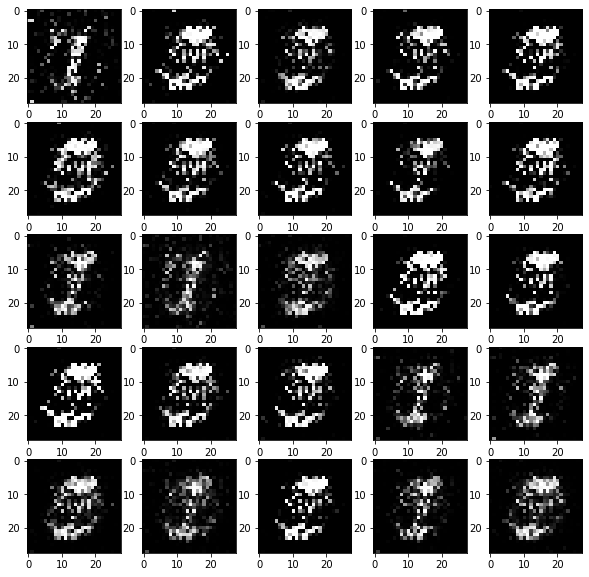

epochs 17


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 10ms/step


  0%|          | 1/273 [00:00<02:11,  2.07it/s]

4/4 [==============================] - 0s 9ms/step


  1%|          | 2/273 [00:00<01:56,  2.33it/s]

4/4 [==============================] - 0s 8ms/step


  1%|          | 3/273 [00:01<01:51,  2.42it/s]

4/4 [==============================] - 0s 10ms/step


  1%|▏         | 4/273 [00:01<01:45,  2.55it/s]

4/4 [==============================] - 0s 9ms/step


  2%|▏         | 5/273 [00:02<01:44,  2.56it/s]

4/4 [==============================] - 0s 11ms/step


  2%|▏         | 6/273 [00:02<01:42,  2.60it/s]

4/4 [==============================] - 0s 10ms/step


  3%|▎         | 7/273 [00:02<01:44,  2.55it/s]

4/4 [==============================] - 0s 10ms/step


  3%|▎         | 8/273 [00:03<01:44,  2.54it/s]

4/4 [==============================] - 0s 9ms/step


  3%|▎         | 9/273 [00:03<01:42,  2.58it/s]

4/4 [==============================] - 0s 11ms/step


  4%|▎         | 10/273 [00:03<01:44,  2.52it/s]

4/4 [==============================] - 0s 8ms/step


  4%|▍         | 11/273 [00:04<01:44,  2.52it/s]

4/4 [==============================] - 0s 9ms/step


  4%|▍         | 12/273 [00:04<01:42,  2.53it/s]

4/4 [==============================] - 0s 9ms/step


  5%|▍         | 13/273 [00:05<01:42,  2.53it/s]

4/4 [==============================] - 0s 9ms/step


  5%|▌         | 14/273 [00:05<01:42,  2.53it/s]

4/4 [==============================] - 0s 8ms/step


  5%|▌         | 15/273 [00:05<01:41,  2.54it/s]

4/4 [==============================] - 0s 8ms/step


  6%|▌         | 16/273 [00:06<01:41,  2.54it/s]

4/4 [==============================] - 0s 9ms/step


  6%|▌         | 17/273 [00:06<01:40,  2.54it/s]

4/4 [==============================] - 0s 10ms/step


  7%|▋         | 18/273 [00:07<01:40,  2.55it/s]

4/4 [==============================] - 0s 9ms/step


  7%|▋         | 19/273 [00:07<01:40,  2.54it/s]

4/4 [==============================] - 0s 9ms/step


  7%|▋         | 20/273 [00:07<01:38,  2.57it/s]

4/4 [==============================] - 0s 10ms/step


  8%|▊         | 21/273 [00:08<01:38,  2.56it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 22/273 [00:08<01:36,  2.60it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 23/273 [00:09<01:37,  2.57it/s]

4/4 [==============================] - 0s 10ms/step


  9%|▉         | 24/273 [00:09<01:36,  2.58it/s]

4/4 [==============================] - 0s 8ms/step


  9%|▉         | 25/273 [00:09<01:35,  2.59it/s]

4/4 [==============================] - 0s 10ms/step


 10%|▉         | 26/273 [00:10<01:37,  2.54it/s]

4/4 [==============================] - 0s 8ms/step


 10%|▉         | 27/273 [00:10<01:34,  2.60it/s]

4/4 [==============================] - 0s 10ms/step


 10%|█         | 28/273 [00:11<01:34,  2.58it/s]

4/4 [==============================] - 0s 9ms/step


 11%|█         | 29/273 [00:11<01:33,  2.62it/s]

4/4 [==============================] - 0s 9ms/step


 11%|█         | 30/273 [00:11<01:32,  2.62it/s]

4/4 [==============================] - 0s 9ms/step


 11%|█▏        | 31/273 [00:12<01:34,  2.57it/s]

4/4 [==============================] - 0s 10ms/step


 12%|█▏        | 32/273 [00:12<01:32,  2.60it/s]

4/4 [==============================] - 0s 11ms/step


 12%|█▏        | 33/273 [00:12<01:33,  2.57it/s]

4/4 [==============================] - 0s 9ms/step


 12%|█▏        | 34/273 [00:13<01:33,  2.56it/s]

4/4 [==============================] - 0s 8ms/step


 13%|█▎        | 35/273 [00:13<01:31,  2.61it/s]

4/4 [==============================] - 0s 10ms/step


 13%|█▎        | 36/273 [00:14<01:31,  2.60it/s]

4/4 [==============================] - 0s 8ms/step


 14%|█▎        | 37/273 [00:14<01:29,  2.63it/s]

4/4 [==============================] - 0s 13ms/step


 14%|█▍        | 38/273 [00:14<01:31,  2.57it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▍        | 39/273 [00:15<01:32,  2.53it/s]

4/4 [==============================] - 0s 9ms/step


 15%|█▍        | 40/273 [00:15<01:30,  2.56it/s]

4/4 [==============================] - 0s 8ms/step


 15%|█▌        | 41/273 [00:16<01:30,  2.56it/s]

4/4 [==============================] - 0s 10ms/step


 15%|█▌        | 42/273 [00:16<01:30,  2.55it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▌        | 43/273 [00:16<01:30,  2.55it/s]

4/4 [==============================] - 0s 10ms/step


 16%|█▌        | 44/273 [00:17<01:30,  2.53it/s]

4/4 [==============================] - 0s 8ms/step


 16%|█▋        | 45/273 [00:17<01:28,  2.58it/s]

4/4 [==============================] - 0s 9ms/step


 17%|█▋        | 46/273 [00:17<01:27,  2.58it/s]

4/4 [==============================] - 0s 9ms/step


 17%|█▋        | 47/273 [00:18<01:28,  2.55it/s]

4/4 [==============================] - 0s 9ms/step


 18%|█▊        | 48/273 [00:18<01:26,  2.60it/s]

4/4 [==============================] - 0s 10ms/step


 18%|█▊        | 49/273 [00:19<01:26,  2.58it/s]

4/4 [==============================] - 0s 10ms/step


 18%|█▊        | 50/273 [00:19<01:26,  2.57it/s]

4/4 [==============================] - 0s 9ms/step


 19%|█▊        | 51/273 [00:19<01:27,  2.55it/s]

4/4 [==============================] - 0s 8ms/step


 19%|█▉        | 52/273 [00:20<01:28,  2.49it/s]

4/4 [==============================] - 0s 9ms/step


 19%|█▉        | 53/273 [00:20<01:27,  2.51it/s]

4/4 [==============================] - 0s 9ms/step


 20%|█▉        | 54/273 [00:21<01:25,  2.55it/s]

4/4 [==============================] - 0s 8ms/step


 20%|██        | 55/273 [00:21<01:25,  2.54it/s]

4/4 [==============================] - 0s 9ms/step


 21%|██        | 56/273 [00:21<01:26,  2.52it/s]

4/4 [==============================] - 0s 9ms/step


 21%|██        | 57/273 [00:22<01:24,  2.55it/s]

4/4 [==============================] - 0s 9ms/step


 21%|██        | 58/273 [00:22<01:24,  2.55it/s]

4/4 [==============================] - 0s 8ms/step


 22%|██▏       | 59/273 [00:23<01:23,  2.56it/s]

4/4 [==============================] - 0s 8ms/step


 22%|██▏       | 60/273 [00:23<01:23,  2.56it/s]

4/4 [==============================] - 0s 10ms/step


 22%|██▏       | 61/273 [00:23<01:21,  2.62it/s]

4/4 [==============================] - 0s 12ms/step


 23%|██▎       | 62/273 [00:24<01:19,  2.65it/s]

4/4 [==============================] - 0s 11ms/step


 23%|██▎       | 63/273 [00:24<01:20,  2.61it/s]

4/4 [==============================] - 0s 9ms/step


 23%|██▎       | 64/273 [00:24<01:19,  2.62it/s]

4/4 [==============================] - 0s 9ms/step


 24%|██▍       | 65/273 [00:25<01:21,  2.55it/s]

4/4 [==============================] - 0s 9ms/step


 24%|██▍       | 66/273 [00:25<01:22,  2.52it/s]

4/4 [==============================] - 0s 9ms/step


 25%|██▍       | 67/273 [00:26<01:22,  2.50it/s]

4/4 [==============================] - 0s 9ms/step


 25%|██▍       | 68/273 [00:26<01:22,  2.50it/s]

4/4 [==============================] - 0s 8ms/step


 25%|██▌       | 69/273 [00:27<01:21,  2.51it/s]

4/4 [==============================] - 0s 8ms/step


 26%|██▌       | 70/273 [00:27<01:20,  2.54it/s]

4/4 [==============================] - 0s 9ms/step


 26%|██▌       | 71/273 [00:27<01:19,  2.54it/s]

4/4 [==============================] - 0s 9ms/step


 26%|██▋       | 72/273 [00:28<01:17,  2.60it/s]

4/4 [==============================] - 0s 9ms/step


 27%|██▋       | 73/273 [00:28<01:16,  2.60it/s]

4/4 [==============================] - 0s 9ms/step


 27%|██▋       | 74/273 [00:28<01:17,  2.58it/s]

4/4 [==============================] - 0s 10ms/step


 27%|██▋       | 75/273 [00:29<01:16,  2.57it/s]

4/4 [==============================] - 0s 10ms/step


 28%|██▊       | 76/273 [00:29<01:16,  2.56it/s]

4/4 [==============================] - 0s 8ms/step


 28%|██▊       | 77/273 [00:30<01:16,  2.56it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▊       | 78/273 [00:30<01:15,  2.57it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▉       | 79/273 [00:30<01:16,  2.53it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▉       | 80/273 [00:31<01:16,  2.53it/s]

4/4 [==============================] - 0s 8ms/step


 30%|██▉       | 81/273 [00:31<01:15,  2.56it/s]

4/4 [==============================] - 0s 10ms/step


 30%|███       | 82/273 [00:32<01:15,  2.53it/s]

4/4 [==============================] - 0s 10ms/step


 30%|███       | 83/273 [00:32<01:14,  2.54it/s]

4/4 [==============================] - 0s 13ms/step


 31%|███       | 84/273 [00:32<01:14,  2.55it/s]

4/4 [==============================] - 0s 9ms/step


 31%|███       | 85/273 [00:33<01:14,  2.52it/s]

4/4 [==============================] - 0s 11ms/step


 32%|███▏      | 86/273 [00:33<01:13,  2.56it/s]

4/4 [==============================] - 0s 8ms/step


 32%|███▏      | 87/273 [00:34<01:12,  2.56it/s]

4/4 [==============================] - 0s 8ms/step


 32%|███▏      | 88/273 [00:34<01:12,  2.56it/s]

4/4 [==============================] - 0s 8ms/step


 33%|███▎      | 89/273 [00:34<01:10,  2.61it/s]

4/4 [==============================] - 0s 10ms/step


 33%|███▎      | 90/273 [00:35<01:10,  2.60it/s]

4/4 [==============================] - 0s 9ms/step


 33%|███▎      | 91/273 [00:35<01:08,  2.64it/s]

4/4 [==============================] - 0s 10ms/step


 34%|███▎      | 92/273 [00:35<01:10,  2.59it/s]

4/4 [==============================] - 0s 11ms/step


 34%|███▍      | 93/273 [00:36<01:11,  2.53it/s]

4/4 [==============================] - 0s 10ms/step


 34%|███▍      | 94/273 [00:36<01:11,  2.51it/s]

4/4 [==============================] - 0s 9ms/step


 35%|███▍      | 95/273 [00:37<01:10,  2.51it/s]

4/4 [==============================] - 0s 9ms/step


 35%|███▌      | 96/273 [00:37<01:10,  2.53it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▌      | 97/273 [00:37<01:08,  2.56it/s]

4/4 [==============================] - 0s 8ms/step


 36%|███▌      | 98/273 [00:38<01:09,  2.53it/s]

4/4 [==============================] - 0s 8ms/step


 36%|███▋      | 99/273 [00:38<01:08,  2.56it/s]

4/4 [==============================] - 0s 8ms/step


 37%|███▋      | 100/273 [00:39<01:07,  2.57it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 101/273 [00:39<01:07,  2.57it/s]

4/4 [==============================] - 0s 8ms/step


 37%|███▋      | 102/273 [00:39<01:05,  2.59it/s]

4/4 [==============================] - 0s 12ms/step


 38%|███▊      | 103/273 [00:40<01:06,  2.56it/s]

4/4 [==============================] - 0s 11ms/step


 38%|███▊      | 104/273 [00:40<01:05,  2.59it/s]

4/4 [==============================] - 0s 8ms/step


 38%|███▊      | 105/273 [00:41<01:05,  2.56it/s]

4/4 [==============================] - 0s 9ms/step


 39%|███▉      | 106/273 [00:41<01:05,  2.57it/s]

4/4 [==============================] - 0s 8ms/step


 39%|███▉      | 107/273 [00:41<01:04,  2.57it/s]

4/4 [==============================] - 0s 9ms/step


 40%|███▉      | 108/273 [00:42<01:04,  2.58it/s]

4/4 [==============================] - 0s 8ms/step


 40%|███▉      | 109/273 [00:42<01:03,  2.60it/s]

4/4 [==============================] - 0s 10ms/step


 40%|████      | 110/273 [00:42<01:01,  2.63it/s]

4/4 [==============================] - 0s 8ms/step


 41%|████      | 111/273 [00:43<01:02,  2.57it/s]

4/4 [==============================] - 0s 9ms/step


 41%|████      | 112/273 [00:43<01:01,  2.60it/s]

4/4 [==============================] - 0s 9ms/step


 41%|████▏     | 113/273 [00:44<01:00,  2.62it/s]

4/4 [==============================] - 0s 8ms/step


 42%|████▏     | 114/273 [00:44<01:01,  2.60it/s]

4/4 [==============================] - 0s 8ms/step


 42%|████▏     | 115/273 [00:44<01:00,  2.60it/s]

4/4 [==============================] - 0s 10ms/step


 42%|████▏     | 116/273 [00:45<01:01,  2.57it/s]

4/4 [==============================] - 0s 8ms/step


 43%|████▎     | 117/273 [00:45<01:02,  2.50it/s]

4/4 [==============================] - 0s 9ms/step


 43%|████▎     | 118/273 [00:46<01:01,  2.53it/s]

4/4 [==============================] - 0s 10ms/step


 44%|████▎     | 119/273 [00:46<01:00,  2.55it/s]

4/4 [==============================] - 0s 9ms/step


 44%|████▍     | 120/273 [00:46<01:00,  2.54it/s]

4/4 [==============================] - 0s 13ms/step


 44%|████▍     | 121/273 [00:47<01:00,  2.52it/s]

4/4 [==============================] - 0s 8ms/step


 45%|████▍     | 122/273 [00:47<00:59,  2.55it/s]

4/4 [==============================] - 0s 8ms/step


 45%|████▌     | 123/273 [00:48<00:58,  2.58it/s]

4/4 [==============================] - 0s 9ms/step


 45%|████▌     | 124/273 [00:48<00:58,  2.53it/s]

4/4 [==============================] - 0s 10ms/step


 46%|████▌     | 125/273 [00:48<00:58,  2.51it/s]

4/4 [==============================] - 0s 9ms/step


 46%|████▌     | 126/273 [00:49<00:58,  2.52it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 127/273 [00:49<00:57,  2.54it/s]

4/4 [==============================] - 0s 8ms/step


 47%|████▋     | 128/273 [00:50<00:57,  2.52it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 129/273 [00:50<00:56,  2.53it/s]

4/4 [==============================] - 0s 14ms/step


 48%|████▊     | 130/273 [00:50<00:56,  2.52it/s]

4/4 [==============================] - 0s 9ms/step


 48%|████▊     | 131/273 [00:51<00:56,  2.53it/s]

4/4 [==============================] - 0s 8ms/step


 48%|████▊     | 132/273 [00:51<00:55,  2.53it/s]

4/4 [==============================] - 0s 10ms/step


 49%|████▊     | 133/273 [00:52<00:55,  2.52it/s]

4/4 [==============================] - 0s 10ms/step


 49%|████▉     | 134/273 [00:52<00:54,  2.54it/s]

4/4 [==============================] - 0s 8ms/step


 49%|████▉     | 135/273 [00:52<00:53,  2.59it/s]

4/4 [==============================] - 0s 9ms/step


 50%|████▉     | 136/273 [00:53<00:53,  2.58it/s]

4/4 [==============================] - 0s 9ms/step


 50%|█████     | 137/273 [00:53<00:53,  2.55it/s]

4/4 [==============================] - 0s 10ms/step


 51%|█████     | 138/273 [00:53<00:52,  2.58it/s]

4/4 [==============================] - 0s 9ms/step


 51%|█████     | 139/273 [00:54<00:51,  2.61it/s]

4/4 [==============================] - 0s 8ms/step


 51%|█████▏    | 140/273 [00:54<00:50,  2.62it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 141/273 [00:55<00:50,  2.62it/s]

4/4 [==============================] - 0s 11ms/step


 52%|█████▏    | 142/273 [00:55<00:50,  2.60it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 143/273 [00:55<00:50,  2.59it/s]

4/4 [==============================] - 0s 16ms/step


 53%|█████▎    | 144/273 [00:56<00:49,  2.59it/s]

4/4 [==============================] - 0s 11ms/step


 53%|█████▎    | 145/273 [00:56<00:49,  2.57it/s]

4/4 [==============================] - 0s 8ms/step


 53%|█████▎    | 146/273 [00:57<00:49,  2.56it/s]

4/4 [==============================] - 0s 10ms/step


 54%|█████▍    | 147/273 [00:57<00:50,  2.50it/s]

4/4 [==============================] - 0s 8ms/step


 54%|█████▍    | 148/273 [00:57<00:48,  2.55it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▍    | 149/273 [00:58<00:49,  2.52it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▍    | 150/273 [00:58<00:47,  2.57it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▌    | 151/273 [00:59<00:49,  2.49it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▌    | 152/273 [00:59<00:48,  2.51it/s]

4/4 [==============================] - 0s 11ms/step


 56%|█████▌    | 153/273 [00:59<00:48,  2.50it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▋    | 154/273 [01:00<00:47,  2.50it/s]

4/4 [==============================] - 0s 10ms/step


 57%|█████▋    | 155/273 [01:00<00:46,  2.55it/s]

4/4 [==============================] - 0s 14ms/step


 57%|█████▋    | 156/273 [01:01<00:45,  2.56it/s]

4/4 [==============================] - 0s 9ms/step


 58%|█████▊    | 157/273 [01:01<00:45,  2.55it/s]

4/4 [==============================] - 0s 9ms/step


 58%|█████▊    | 158/273 [01:01<00:45,  2.51it/s]

4/4 [==============================] - 0s 8ms/step


 58%|█████▊    | 159/273 [01:02<00:45,  2.50it/s]

4/4 [==============================] - 0s 8ms/step


 59%|█████▊    | 160/273 [01:02<00:44,  2.54it/s]

4/4 [==============================] - 0s 8ms/step


 59%|█████▉    | 161/273 [01:03<00:43,  2.55it/s]

4/4 [==============================] - 0s 8ms/step


 59%|█████▉    | 162/273 [01:03<00:44,  2.51it/s]

4/4 [==============================] - 0s 9ms/step


 60%|█████▉    | 163/273 [01:03<00:42,  2.57it/s]

4/4 [==============================] - 0s 10ms/step


 60%|██████    | 164/273 [01:04<00:42,  2.55it/s]

4/4 [==============================] - 0s 13ms/step


 60%|██████    | 165/273 [01:04<00:43,  2.50it/s]

4/4 [==============================] - 0s 8ms/step


 61%|██████    | 166/273 [01:04<00:42,  2.53it/s]

4/4 [==============================] - 0s 9ms/step


 61%|██████    | 167/273 [01:05<00:41,  2.54it/s]

4/4 [==============================] - 0s 8ms/step


 62%|██████▏   | 168/273 [01:05<00:40,  2.57it/s]

4/4 [==============================] - 0s 8ms/step


 62%|██████▏   | 169/273 [01:06<00:40,  2.60it/s]

4/4 [==============================] - 0s 10ms/step


 62%|██████▏   | 170/273 [01:06<00:40,  2.56it/s]

4/4 [==============================] - 0s 8ms/step


 63%|██████▎   | 171/273 [01:06<00:40,  2.54it/s]

4/4 [==============================] - 0s 9ms/step


 63%|██████▎   | 172/273 [01:07<00:40,  2.50it/s]

4/4 [==============================] - 0s 9ms/step


 63%|██████▎   | 173/273 [01:07<00:40,  2.49it/s]

4/4 [==============================] - 0s 10ms/step


 64%|██████▎   | 174/273 [01:08<00:39,  2.53it/s]

4/4 [==============================] - 0s 12ms/step


 64%|██████▍   | 175/273 [01:08<00:39,  2.50it/s]

4/4 [==============================] - 0s 8ms/step


 64%|██████▍   | 176/273 [01:08<00:38,  2.54it/s]

4/4 [==============================] - 0s 9ms/step


 65%|██████▍   | 177/273 [01:09<00:38,  2.52it/s]

4/4 [==============================] - 0s 11ms/step


 65%|██████▌   | 178/273 [01:09<00:37,  2.53it/s]

4/4 [==============================] - 0s 10ms/step


 66%|██████▌   | 179/273 [01:10<00:37,  2.52it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▌   | 180/273 [01:10<00:36,  2.52it/s]

4/4 [==============================] - 0s 8ms/step


 66%|██████▋   | 181/273 [01:10<00:36,  2.53it/s]

4/4 [==============================] - 0s 8ms/step


 67%|██████▋   | 182/273 [01:11<00:35,  2.54it/s]

4/4 [==============================] - 0s 9ms/step


 67%|██████▋   | 183/273 [01:11<00:34,  2.59it/s]

4/4 [==============================] - 0s 12ms/step


 67%|██████▋   | 184/273 [01:12<00:34,  2.59it/s]

4/4 [==============================] - 0s 10ms/step


 68%|██████▊   | 185/273 [01:12<00:34,  2.53it/s]

4/4 [==============================] - 0s 7ms/step


 68%|██████▊   | 186/273 [01:12<00:34,  2.55it/s]

4/4 [==============================] - 0s 8ms/step


 68%|██████▊   | 187/273 [01:13<00:33,  2.55it/s]

4/4 [==============================] - 0s 10ms/step


 69%|██████▉   | 188/273 [01:13<00:34,  2.47it/s]

4/4 [==============================] - 0s 8ms/step


 69%|██████▉   | 189/273 [01:14<00:33,  2.49it/s]

4/4 [==============================] - 0s 9ms/step


 70%|██████▉   | 190/273 [01:14<00:33,  2.49it/s]

4/4 [==============================] - 0s 11ms/step


 70%|██████▉   | 191/273 [01:14<00:32,  2.51it/s]

4/4 [==============================] - 0s 10ms/step


 70%|███████   | 192/273 [01:15<00:32,  2.50it/s]

4/4 [==============================] - 0s 10ms/step


 71%|███████   | 193/273 [01:15<00:31,  2.50it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████   | 194/273 [01:16<00:30,  2.55it/s]

4/4 [==============================] - 0s 11ms/step


 71%|███████▏  | 195/273 [01:16<00:30,  2.55it/s]

4/4 [==============================] - 0s 8ms/step


 72%|███████▏  | 196/273 [01:16<00:30,  2.51it/s]

4/4 [==============================] - 0s 8ms/step


 72%|███████▏  | 197/273 [01:17<00:29,  2.56it/s]

4/4 [==============================] - 0s 9ms/step


 73%|███████▎  | 198/273 [01:17<00:29,  2.51it/s]

4/4 [==============================] - 0s 7ms/step


 73%|███████▎  | 199/273 [01:18<00:29,  2.49it/s]

4/4 [==============================] - 0s 10ms/step


 73%|███████▎  | 200/273 [01:18<00:29,  2.50it/s]

4/4 [==============================] - 0s 10ms/step


 74%|███████▎  | 201/273 [01:18<00:28,  2.51it/s]

4/4 [==============================] - 0s 12ms/step


 74%|███████▍  | 202/273 [01:19<00:28,  2.46it/s]

4/4 [==============================] - 0s 11ms/step


 74%|███████▍  | 203/273 [01:19<00:28,  2.49it/s]

4/4 [==============================] - 0s 10ms/step


 75%|███████▍  | 204/273 [01:20<00:27,  2.51it/s]

4/4 [==============================] - 0s 10ms/step


 75%|███████▌  | 205/273 [01:20<00:26,  2.52it/s]

4/4 [==============================] - 0s 9ms/step


 75%|███████▌  | 206/273 [01:20<00:26,  2.52it/s]

4/4 [==============================] - 0s 8ms/step


 76%|███████▌  | 207/273 [01:21<00:26,  2.50it/s]

4/4 [==============================] - 0s 9ms/step


 76%|███████▌  | 208/273 [01:21<00:26,  2.47it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 209/273 [01:22<00:27,  2.35it/s]

4/4 [==============================] - 0s 10ms/step


 77%|███████▋  | 210/273 [01:22<00:28,  2.25it/s]

4/4 [==============================] - 0s 13ms/step


 77%|███████▋  | 211/273 [01:23<00:29,  2.12it/s]

4/4 [==============================] - 0s 15ms/step


 78%|███████▊  | 212/273 [01:23<00:31,  1.96it/s]

4/4 [==============================] - 0s 15ms/step


 78%|███████▊  | 213/273 [01:24<00:31,  1.90it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 214/273 [01:24<00:30,  1.92it/s]

4/4 [==============================] - 0s 10ms/step


 79%|███████▉  | 215/273 [01:25<00:30,  1.89it/s]

4/4 [==============================] - 0s 11ms/step


 79%|███████▉  | 216/273 [01:25<00:29,  1.92it/s]

4/4 [==============================] - 0s 12ms/step


 79%|███████▉  | 217/273 [01:26<00:28,  1.95it/s]

4/4 [==============================] - 0s 8ms/step


 80%|███████▉  | 218/273 [01:26<00:26,  2.06it/s]

4/4 [==============================] - 0s 11ms/step


 80%|████████  | 219/273 [01:27<00:24,  2.17it/s]

4/4 [==============================] - 0s 7ms/step


 81%|████████  | 220/273 [01:27<00:22,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


 81%|████████  | 221/273 [01:27<00:21,  2.42it/s]

4/4 [==============================] - 0s 14ms/step


 81%|████████▏ | 222/273 [01:28<00:20,  2.47it/s]

4/4 [==============================] - 0s 8ms/step


 82%|████████▏ | 223/273 [01:28<00:20,  2.48it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 224/273 [01:29<00:19,  2.49it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 225/273 [01:29<00:19,  2.50it/s]

4/4 [==============================] - 0s 15ms/step


 83%|████████▎ | 226/273 [01:29<00:18,  2.48it/s]

4/4 [==============================] - 0s 8ms/step


 83%|████████▎ | 227/273 [01:30<00:18,  2.46it/s]

4/4 [==============================] - 0s 8ms/step


 84%|████████▎ | 228/273 [01:30<00:17,  2.53it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▍ | 229/273 [01:31<00:17,  2.46it/s]

4/4 [==============================] - 0s 10ms/step


 84%|████████▍ | 230/273 [01:31<00:17,  2.48it/s]

4/4 [==============================] - 0s 9ms/step


 85%|████████▍ | 231/273 [01:31<00:16,  2.52it/s]

4/4 [==============================] - 0s 9ms/step


 85%|████████▍ | 232/273 [01:32<00:16,  2.47it/s]

4/4 [==============================] - 0s 9ms/step


 85%|████████▌ | 233/273 [01:32<00:15,  2.56it/s]

4/4 [==============================] - 0s 8ms/step


 86%|████████▌ | 234/273 [01:33<00:15,  2.58it/s]

4/4 [==============================] - 0s 12ms/step


 86%|████████▌ | 235/273 [01:33<00:14,  2.58it/s]

4/4 [==============================] - 0s 8ms/step


 86%|████████▋ | 236/273 [01:33<00:14,  2.60it/s]

4/4 [==============================] - 0s 8ms/step


 87%|████████▋ | 237/273 [01:34<00:14,  2.55it/s]

4/4 [==============================] - 0s 9ms/step


 87%|████████▋ | 238/273 [01:34<00:13,  2.57it/s]

4/4 [==============================] - 0s 10ms/step


 88%|████████▊ | 239/273 [01:35<00:13,  2.55it/s]

4/4 [==============================] - 0s 11ms/step


 88%|████████▊ | 240/273 [01:35<00:13,  2.51it/s]

4/4 [==============================] - 0s 8ms/step


 88%|████████▊ | 241/273 [01:35<00:12,  2.57it/s]

4/4 [==============================] - 0s 8ms/step


 89%|████████▊ | 242/273 [01:36<00:12,  2.54it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▉ | 243/273 [01:36<00:11,  2.51it/s]

4/4 [==============================] - 0s 8ms/step


 89%|████████▉ | 244/273 [01:37<00:11,  2.54it/s]

4/4 [==============================] - 0s 8ms/step


 90%|████████▉ | 245/273 [01:37<00:11,  2.53it/s]

4/4 [==============================] - 0s 8ms/step


 90%|█████████ | 246/273 [01:37<00:10,  2.57it/s]

4/4 [==============================] - 0s 10ms/step


 90%|█████████ | 247/273 [01:38<00:10,  2.54it/s]

4/4 [==============================] - 0s 9ms/step


 91%|█████████ | 248/273 [01:38<00:09,  2.55it/s]

4/4 [==============================] - 0s 9ms/step


 91%|█████████ | 249/273 [01:38<00:09,  2.58it/s]

4/4 [==============================] - 0s 10ms/step


 92%|█████████▏| 250/273 [01:39<00:09,  2.52it/s]

4/4 [==============================] - 0s 8ms/step


 92%|█████████▏| 251/273 [01:39<00:08,  2.50it/s]

4/4 [==============================] - 0s 9ms/step


 92%|█████████▏| 252/273 [01:40<00:08,  2.51it/s]

4/4 [==============================] - 0s 11ms/step


 93%|█████████▎| 253/273 [01:40<00:08,  2.48it/s]

4/4 [==============================] - 0s 8ms/step


 93%|█████████▎| 254/273 [01:40<00:07,  2.54it/s]

4/4 [==============================] - 0s 8ms/step


 93%|█████████▎| 255/273 [01:41<00:07,  2.52it/s]

4/4 [==============================] - 0s 11ms/step


 94%|█████████▍| 256/273 [01:41<00:06,  2.52it/s]

4/4 [==============================] - 0s 9ms/step


 94%|█████████▍| 257/273 [01:42<00:06,  2.51it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▍| 258/273 [01:42<00:06,  2.46it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▍| 259/273 [01:42<00:05,  2.52it/s]

4/4 [==============================] - 0s 8ms/step


 95%|█████████▌| 260/273 [01:43<00:05,  2.52it/s]

4/4 [==============================] - 0s 8ms/step


 96%|█████████▌| 261/273 [01:43<00:04,  2.51it/s]

4/4 [==============================] - 0s 9ms/step


 96%|█████████▌| 262/273 [01:44<00:04,  2.52it/s]

4/4 [==============================] - 0s 9ms/step


 96%|█████████▋| 263/273 [01:44<00:03,  2.52it/s]

4/4 [==============================] - 0s 8ms/step


 97%|█████████▋| 264/273 [01:44<00:03,  2.56it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 265/273 [01:45<00:03,  2.56it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 266/273 [01:45<00:02,  2.54it/s]

4/4 [==============================] - 0s 9ms/step


 98%|█████████▊| 267/273 [01:46<00:02,  2.53it/s]

4/4 [==============================] - 0s 9ms/step


 98%|█████████▊| 268/273 [01:46<00:01,  2.56it/s]

4/4 [==============================] - 0s 10ms/step


 99%|█████████▊| 269/273 [01:46<00:01,  2.54it/s]

4/4 [==============================] - 0s 7ms/step


 99%|█████████▉| 270/273 [01:47<00:01,  2.53it/s]

4/4 [==============================] - 0s 12ms/step


 99%|█████████▉| 271/273 [01:47<00:00,  2.58it/s]

4/4 [==============================] - 0s 12ms/step


100%|█████████▉| 272/273 [01:48<00:00,  2.54it/s]

4/4 [==============================] - 0s 9ms/step


100%|██████████| 273/273 [01:48<00:00,  2.52it/s]


loss is 0.03353487700223923 |*| 2.1807775497436523
1/1 [==============================] - 0s 30ms/step


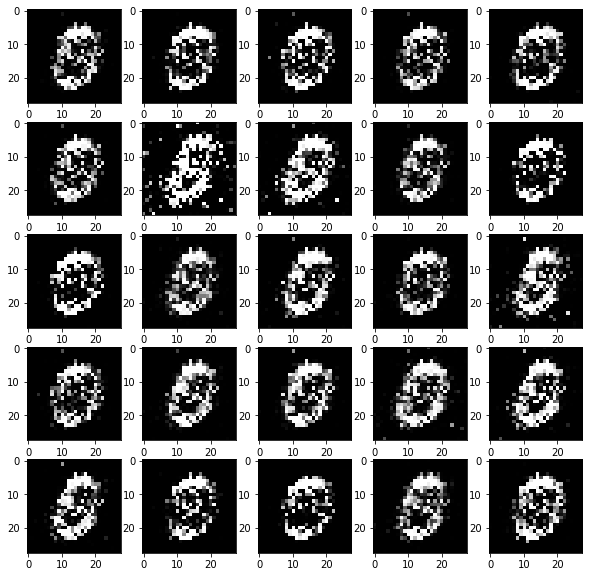

epochs 18


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 9ms/step


  0%|          | 1/273 [00:00<01:56,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


  1%|          | 2/273 [00:00<02:03,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


  1%|          | 3/273 [00:01<01:52,  2.39it/s]

4/4 [==============================] - 0s 10ms/step


  1%|▏         | 4/273 [00:01<01:51,  2.41it/s]

4/4 [==============================] - 0s 9ms/step


  2%|▏         | 5/273 [00:02<01:48,  2.47it/s]

4/4 [==============================] - 0s 11ms/step


  2%|▏         | 6/273 [00:02<01:49,  2.44it/s]

4/4 [==============================] - 0s 8ms/step


  3%|▎         | 7/273 [00:02<01:46,  2.49it/s]

4/4 [==============================] - 0s 8ms/step


  3%|▎         | 8/273 [00:03<01:44,  2.53it/s]

4/4 [==============================] - 0s 8ms/step


  3%|▎         | 9/273 [00:03<01:45,  2.49it/s]

4/4 [==============================] - 0s 8ms/step


  4%|▎         | 10/273 [00:04<01:43,  2.54it/s]

4/4 [==============================] - 0s 10ms/step


  4%|▍         | 11/273 [00:04<01:41,  2.57it/s]

4/4 [==============================] - 0s 11ms/step


  4%|▍         | 12/273 [00:04<01:41,  2.56it/s]

4/4 [==============================] - 0s 8ms/step


  5%|▍         | 13/273 [00:05<01:40,  2.58it/s]

4/4 [==============================] - 0s 11ms/step


  5%|▌         | 14/273 [00:05<01:42,  2.53it/s]

4/4 [==============================] - 0s 11ms/step


  5%|▌         | 15/273 [00:05<01:41,  2.55it/s]

4/4 [==============================] - 0s 9ms/step


  6%|▌         | 16/273 [00:06<01:40,  2.56it/s]

4/4 [==============================] - 0s 9ms/step


  6%|▌         | 17/273 [00:06<01:40,  2.55it/s]

4/4 [==============================] - 0s 11ms/step


  7%|▋         | 18/273 [00:07<01:41,  2.52it/s]

4/4 [==============================] - 0s 9ms/step


  7%|▋         | 19/273 [00:07<01:40,  2.52it/s]

4/4 [==============================] - 0s 8ms/step


  7%|▋         | 20/273 [00:08<01:41,  2.48it/s]

4/4 [==============================] - 0s 10ms/step


  8%|▊         | 21/273 [00:08<01:41,  2.48it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 22/273 [00:08<01:47,  2.33it/s]

4/4 [==============================] - 0s 13ms/step


  8%|▊         | 23/273 [00:09<01:56,  2.14it/s]

4/4 [==============================] - 0s 20ms/step


  9%|▉         | 24/273 [00:10<02:02,  2.03it/s]

4/4 [==============================] - 0s 11ms/step


  9%|▉         | 25/273 [00:10<02:07,  1.94it/s]

4/4 [==============================] - 0s 16ms/step


 10%|▉         | 26/273 [00:11<02:07,  1.94it/s]

4/4 [==============================] - 0s 13ms/step


 10%|▉         | 27/273 [00:11<02:06,  1.94it/s]

4/4 [==============================] - 0s 9ms/step


 10%|█         | 28/273 [00:12<02:04,  1.96it/s]

4/4 [==============================] - 0s 12ms/step


 11%|█         | 29/273 [00:12<02:07,  1.91it/s]

4/4 [==============================] - 0s 10ms/step


 11%|█         | 30/273 [00:13<02:04,  1.95it/s]

4/4 [==============================] - 0s 8ms/step


 11%|█▏        | 31/273 [00:13<02:03,  1.97it/s]

4/4 [==============================] - 0s 10ms/step


 12%|█▏        | 32/273 [00:14<01:56,  2.06it/s]

4/4 [==============================] - 0s 10ms/step


 12%|█▏        | 33/273 [00:14<01:51,  2.15it/s]

4/4 [==============================] - 0s 10ms/step


 12%|█▏        | 34/273 [00:14<01:44,  2.28it/s]

4/4 [==============================] - 0s 16ms/step


 13%|█▎        | 35/273 [00:15<01:42,  2.32it/s]

4/4 [==============================] - 0s 10ms/step


 13%|█▎        | 36/273 [00:15<01:38,  2.39it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▎        | 37/273 [00:16<01:37,  2.43it/s]

4/4 [==============================] - 0s 11ms/step


 14%|█▍        | 38/273 [00:16<01:35,  2.45it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▍        | 39/273 [00:16<01:34,  2.47it/s]

4/4 [==============================] - 0s 8ms/step


 15%|█▍        | 40/273 [00:17<01:32,  2.51it/s]

4/4 [==============================] - 0s 9ms/step


 15%|█▌        | 41/273 [00:17<01:35,  2.44it/s]

4/4 [==============================] - 0s 8ms/step


 15%|█▌        | 42/273 [00:18<01:31,  2.52it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▌        | 43/273 [00:18<01:32,  2.48it/s]

4/4 [==============================] - 0s 10ms/step


 16%|█▌        | 44/273 [00:18<01:31,  2.49it/s]

4/4 [==============================] - 0s 12ms/step


 16%|█▋        | 45/273 [00:19<01:30,  2.51it/s]

4/4 [==============================] - 0s 9ms/step


 17%|█▋        | 46/273 [00:19<01:32,  2.47it/s]

4/4 [==============================] - 0s 9ms/step


 17%|█▋        | 47/273 [00:20<01:31,  2.46it/s]

4/4 [==============================] - 0s 11ms/step


 18%|█▊        | 48/273 [00:20<01:31,  2.47it/s]

4/4 [==============================] - 0s 9ms/step


 18%|█▊        | 49/273 [00:20<01:29,  2.51it/s]

4/4 [==============================] - 0s 8ms/step


 18%|█▊        | 50/273 [00:21<01:30,  2.48it/s]

4/4 [==============================] - 0s 8ms/step


 19%|█▊        | 51/273 [00:21<01:28,  2.50it/s]

4/4 [==============================] - 0s 8ms/step


 19%|█▉        | 52/273 [00:22<01:27,  2.52it/s]

4/4 [==============================] - 0s 11ms/step


 19%|█▉        | 53/273 [00:22<01:28,  2.49it/s]

4/4 [==============================] - 0s 9ms/step


 20%|█▉        | 54/273 [00:22<01:26,  2.52it/s]

4/4 [==============================] - 0s 9ms/step


 20%|██        | 55/273 [00:23<01:25,  2.56it/s]

4/4 [==============================] - 0s 9ms/step


 21%|██        | 56/273 [00:23<01:26,  2.51it/s]

4/4 [==============================] - 0s 8ms/step


 21%|██        | 57/273 [00:24<01:26,  2.49it/s]

4/4 [==============================] - 0s 10ms/step


 21%|██        | 58/273 [00:24<01:26,  2.49it/s]

4/4 [==============================] - 0s 9ms/step


 22%|██▏       | 59/273 [00:24<01:25,  2.49it/s]

4/4 [==============================] - 0s 8ms/step


 22%|██▏       | 60/273 [00:25<01:25,  2.50it/s]

4/4 [==============================] - 0s 9ms/step


 22%|██▏       | 61/273 [00:25<01:25,  2.48it/s]

4/4 [==============================] - 0s 10ms/step


 23%|██▎       | 62/273 [00:26<01:23,  2.53it/s]

4/4 [==============================] - 0s 20ms/step


 23%|██▎       | 63/273 [00:26<01:28,  2.38it/s]

4/4 [==============================] - 0s 10ms/step


 23%|██▎       | 64/273 [00:26<01:25,  2.44it/s]

4/4 [==============================] - 0s 7ms/step


 24%|██▍       | 65/273 [00:27<01:23,  2.49it/s]

4/4 [==============================] - 0s 11ms/step


 24%|██▍       | 66/273 [00:27<01:22,  2.50it/s]

4/4 [==============================] - 0s 10ms/step


 25%|██▍       | 67/273 [00:28<01:21,  2.53it/s]

4/4 [==============================] - 0s 9ms/step


 25%|██▍       | 68/273 [00:28<01:22,  2.47it/s]

4/4 [==============================] - 0s 10ms/step


 25%|██▌       | 69/273 [00:28<01:21,  2.49it/s]

4/4 [==============================] - 0s 9ms/step


 26%|██▌       | 70/273 [00:29<01:21,  2.50it/s]

4/4 [==============================] - 0s 9ms/step


 26%|██▌       | 71/273 [00:29<01:21,  2.46it/s]

4/4 [==============================] - 0s 10ms/step


 26%|██▋       | 72/273 [00:30<01:20,  2.48it/s]

4/4 [==============================] - 0s 8ms/step


 27%|██▋       | 73/273 [00:30<01:19,  2.52it/s]

4/4 [==============================] - 0s 10ms/step


 27%|██▋       | 74/273 [00:30<01:19,  2.49it/s]

4/4 [==============================] - 0s 9ms/step


 27%|██▋       | 75/273 [00:31<01:17,  2.55it/s]

4/4 [==============================] - 0s 10ms/step


 28%|██▊       | 76/273 [00:31<01:18,  2.50it/s]

4/4 [==============================] - 0s 9ms/step


 28%|██▊       | 77/273 [00:32<01:18,  2.51it/s]

4/4 [==============================] - 0s 8ms/step


 29%|██▊       | 78/273 [00:32<01:17,  2.52it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▉       | 79/273 [00:32<01:17,  2.51it/s]

4/4 [==============================] - 0s 10ms/step


 29%|██▉       | 80/273 [00:33<01:16,  2.54it/s]

4/4 [==============================] - 0s 8ms/step


 30%|██▉       | 81/273 [00:33<01:14,  2.58it/s]

4/4 [==============================] - 0s 10ms/step


 30%|███       | 82/273 [00:34<01:13,  2.59it/s]

4/4 [==============================] - 0s 11ms/step


 30%|███       | 83/273 [00:34<01:13,  2.58it/s]

4/4 [==============================] - 0s 10ms/step


 31%|███       | 84/273 [00:34<01:13,  2.57it/s]

4/4 [==============================] - 0s 9ms/step


 31%|███       | 85/273 [00:35<01:13,  2.54it/s]

4/4 [==============================] - 0s 9ms/step


 32%|███▏      | 86/273 [00:35<01:13,  2.53it/s]

4/4 [==============================] - 0s 13ms/step


 32%|███▏      | 87/273 [00:36<01:14,  2.50it/s]

4/4 [==============================] - 0s 9ms/step


 32%|███▏      | 88/273 [00:36<01:14,  2.49it/s]

4/4 [==============================] - 0s 9ms/step


 33%|███▎      | 89/273 [00:36<01:12,  2.54it/s]

4/4 [==============================] - 0s 9ms/step


 33%|███▎      | 90/273 [00:37<01:11,  2.55it/s]

4/4 [==============================] - 0s 10ms/step


 33%|███▎      | 91/273 [00:37<01:10,  2.56it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▎      | 92/273 [00:37<01:11,  2.53it/s]

4/4 [==============================] - 0s 13ms/step


 34%|███▍      | 93/273 [00:38<01:10,  2.56it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▍      | 94/273 [00:38<01:10,  2.55it/s]

4/4 [==============================] - 0s 9ms/step


 35%|███▍      | 95/273 [00:39<01:09,  2.57it/s]

4/4 [==============================] - 0s 12ms/step


 35%|███▌      | 96/273 [00:39<01:09,  2.53it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▌      | 97/273 [00:39<01:09,  2.54it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▌      | 98/273 [00:40<01:10,  2.50it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▋      | 99/273 [00:40<01:09,  2.51it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 100/273 [00:41<01:08,  2.51it/s]

4/4 [==============================] - 0s 11ms/step


 37%|███▋      | 101/273 [00:41<01:08,  2.50it/s]

4/4 [==============================] - 0s 10ms/step


 37%|███▋      | 102/273 [00:41<01:08,  2.49it/s]

4/4 [==============================] - 0s 10ms/step


 38%|███▊      | 103/273 [00:42<01:09,  2.43it/s]

4/4 [==============================] - 0s 9ms/step


 38%|███▊      | 104/273 [00:42<01:08,  2.46it/s]

4/4 [==============================] - 0s 10ms/step


 38%|███▊      | 105/273 [00:43<01:08,  2.45it/s]

4/4 [==============================] - 0s 9ms/step


 39%|███▉      | 106/273 [00:43<01:08,  2.45it/s]

4/4 [==============================] - 0s 8ms/step


 39%|███▉      | 107/273 [00:43<01:05,  2.53it/s]

4/4 [==============================] - 0s 9ms/step


 40%|███▉      | 108/273 [00:44<01:06,  2.47it/s]

4/4 [==============================] - 0s 8ms/step


 40%|███▉      | 109/273 [00:44<01:04,  2.54it/s]

4/4 [==============================] - 0s 11ms/step


 40%|████      | 110/273 [00:45<01:04,  2.52it/s]

4/4 [==============================] - 0s 8ms/step


 41%|████      | 111/273 [00:45<01:03,  2.53it/s]

4/4 [==============================] - 0s 9ms/step


 41%|████      | 112/273 [00:45<01:03,  2.54it/s]

4/4 [==============================] - 0s 9ms/step


 41%|████▏     | 113/273 [00:46<01:03,  2.54it/s]

4/4 [==============================] - 0s 10ms/step


 42%|████▏     | 114/273 [00:46<01:02,  2.53it/s]

4/4 [==============================] - 0s 11ms/step


 42%|████▏     | 115/273 [00:47<01:02,  2.53it/s]

4/4 [==============================] - 0s 11ms/step


 42%|████▏     | 116/273 [00:47<01:02,  2.53it/s]

4/4 [==============================] - 0s 9ms/step


 43%|████▎     | 117/273 [00:47<01:01,  2.53it/s]

4/4 [==============================] - 0s 9ms/step


 43%|████▎     | 118/273 [00:48<01:02,  2.49it/s]

4/4 [==============================] - 0s 10ms/step


 44%|████▎     | 119/273 [00:48<01:02,  2.48it/s]

4/4 [==============================] - 0s 9ms/step


 44%|████▍     | 120/273 [00:49<01:01,  2.48it/s]

4/4 [==============================] - 0s 9ms/step


 44%|████▍     | 121/273 [00:49<01:00,  2.50it/s]

4/4 [==============================] - 0s 8ms/step


 45%|████▍     | 122/273 [00:49<01:01,  2.47it/s]

4/4 [==============================] - 0s 8ms/step


 45%|████▌     | 123/273 [00:50<01:01,  2.45it/s]

4/4 [==============================] - 0s 9ms/step


 45%|████▌     | 124/273 [00:50<01:00,  2.47it/s]

4/4 [==============================] - 0s 9ms/step


 46%|████▌     | 125/273 [00:51<01:00,  2.46it/s]

4/4 [==============================] - 0s 9ms/step


 46%|████▌     | 126/273 [00:51<00:59,  2.48it/s]

4/4 [==============================] - 0s 11ms/step


 47%|████▋     | 127/273 [00:51<00:58,  2.50it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 128/273 [00:52<01:11,  2.03it/s]

4/4 [==============================] - 0s 10ms/step


 47%|████▋     | 129/273 [00:53<01:05,  2.19it/s]

4/4 [==============================] - 0s 10ms/step


 48%|████▊     | 130/273 [00:53<01:02,  2.30it/s]

4/4 [==============================] - 0s 10ms/step


 48%|████▊     | 131/273 [00:53<01:00,  2.34it/s]

4/4 [==============================] - 0s 8ms/step


 48%|████▊     | 132/273 [00:54<00:59,  2.35it/s]

4/4 [==============================] - 0s 8ms/step


 49%|████▊     | 133/273 [00:54<00:58,  2.40it/s]

4/4 [==============================] - 0s 11ms/step


 49%|████▉     | 134/273 [00:55<00:56,  2.48it/s]

4/4 [==============================] - 0s 8ms/step


 49%|████▉     | 135/273 [00:55<00:55,  2.47it/s]

4/4 [==============================] - 0s 10ms/step


 50%|████▉     | 136/273 [00:55<00:55,  2.45it/s]

4/4 [==============================] - 0s 9ms/step


 50%|█████     | 137/273 [00:56<00:54,  2.48it/s]

4/4 [==============================] - 0s 9ms/step


 51%|█████     | 138/273 [00:56<00:54,  2.48it/s]

4/4 [==============================] - 0s 7ms/step


 51%|█████     | 139/273 [00:57<00:53,  2.51it/s]

4/4 [==============================] - 0s 7ms/step


 51%|█████▏    | 140/273 [00:57<00:52,  2.53it/s]

4/4 [==============================] - 0s 8ms/step


 52%|█████▏    | 141/273 [00:57<00:52,  2.50it/s]

4/4 [==============================] - 0s 10ms/step


 52%|█████▏    | 142/273 [00:58<00:51,  2.55it/s]

4/4 [==============================] - 0s 8ms/step


 52%|█████▏    | 143/273 [00:58<00:50,  2.57it/s]

4/4 [==============================] - 0s 11ms/step


 53%|█████▎    | 144/273 [00:59<00:51,  2.53it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 145/273 [00:59<00:50,  2.55it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 146/273 [00:59<00:49,  2.55it/s]

4/4 [==============================] - 0s 8ms/step


 54%|█████▍    | 147/273 [01:00<00:48,  2.58it/s]

4/4 [==============================] - 0s 13ms/step


 54%|█████▍    | 148/273 [01:00<00:50,  2.49it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▍    | 149/273 [01:01<00:49,  2.50it/s]

4/4 [==============================] - 0s 11ms/step


 55%|█████▍    | 150/273 [01:01<00:49,  2.51it/s]

4/4 [==============================] - 0s 10ms/step


 55%|█████▌    | 151/273 [01:01<00:48,  2.54it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▌    | 152/273 [01:02<00:47,  2.54it/s]

4/4 [==============================] - 0s 14ms/step


 56%|█████▌    | 153/273 [01:02<00:47,  2.53it/s]

4/4 [==============================] - 0s 8ms/step


 56%|█████▋    | 154/273 [01:02<00:46,  2.54it/s]

4/4 [==============================] - 0s 9ms/step


 57%|█████▋    | 155/273 [01:03<00:46,  2.52it/s]

4/4 [==============================] - 0s 9ms/step


 57%|█████▋    | 156/273 [01:03<00:46,  2.52it/s]

4/4 [==============================] - 0s 9ms/step


 58%|█████▊    | 157/273 [01:04<00:45,  2.55it/s]

4/4 [==============================] - 0s 8ms/step


 58%|█████▊    | 158/273 [01:04<00:44,  2.56it/s]

4/4 [==============================] - 0s 8ms/step


 58%|█████▊    | 159/273 [01:04<00:44,  2.57it/s]

4/4 [==============================] - 0s 8ms/step


 59%|█████▊    | 160/273 [01:05<00:44,  2.53it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▉    | 161/273 [01:05<00:44,  2.52it/s]

4/4 [==============================] - 0s 11ms/step


 59%|█████▉    | 162/273 [01:06<00:44,  2.49it/s]

4/4 [==============================] - 0s 8ms/step


 60%|█████▉    | 163/273 [01:06<00:43,  2.53it/s]

4/4 [==============================] - 0s 9ms/step


 60%|██████    | 164/273 [01:06<00:42,  2.54it/s]

4/4 [==============================] - 0s 9ms/step


 60%|██████    | 165/273 [01:07<00:43,  2.51it/s]

4/4 [==============================] - 0s 12ms/step


 61%|██████    | 166/273 [01:07<00:42,  2.50it/s]

4/4 [==============================] - 0s 8ms/step


 61%|██████    | 167/273 [01:08<00:42,  2.52it/s]

4/4 [==============================] - 0s 9ms/step


 62%|██████▏   | 168/273 [01:08<00:41,  2.53it/s]

4/4 [==============================] - 0s 10ms/step


 62%|██████▏   | 169/273 [01:08<00:40,  2.57it/s]

4/4 [==============================] - 0s 9ms/step


 62%|██████▏   | 170/273 [01:09<00:40,  2.55it/s]

4/4 [==============================] - 0s 10ms/step


 63%|██████▎   | 171/273 [01:09<00:40,  2.52it/s]

4/4 [==============================] - 0s 9ms/step


 63%|██████▎   | 172/273 [01:10<00:39,  2.56it/s]

4/4 [==============================] - 0s 10ms/step


 63%|██████▎   | 173/273 [01:10<00:39,  2.54it/s]

4/4 [==============================] - 0s 10ms/step


 64%|██████▎   | 174/273 [01:10<00:39,  2.54it/s]

4/4 [==============================] - 0s 8ms/step


 64%|██████▍   | 175/273 [01:11<00:38,  2.53it/s]

4/4 [==============================] - 0s 10ms/step


 64%|██████▍   | 176/273 [01:11<00:39,  2.46it/s]

4/4 [==============================] - 0s 9ms/step


 65%|██████▍   | 177/273 [01:12<00:38,  2.50it/s]

4/4 [==============================] - 0s 10ms/step


 65%|██████▌   | 178/273 [01:12<00:37,  2.51it/s]

4/4 [==============================] - 0s 10ms/step


 66%|██████▌   | 179/273 [01:12<00:37,  2.52it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▌   | 180/273 [01:13<00:36,  2.52it/s]

4/4 [==============================] - 0s 8ms/step


 66%|██████▋   | 181/273 [01:13<00:36,  2.51it/s]

4/4 [==============================] - 0s 9ms/step


 67%|██████▋   | 182/273 [01:14<00:35,  2.54it/s]

4/4 [==============================] - 0s 10ms/step


 67%|██████▋   | 183/273 [01:14<00:35,  2.52it/s]

4/4 [==============================] - 0s 9ms/step


 67%|██████▋   | 184/273 [01:14<00:35,  2.50it/s]

4/4 [==============================] - 0s 8ms/step


 68%|██████▊   | 185/273 [01:15<00:34,  2.53it/s]

4/4 [==============================] - 0s 10ms/step


 68%|██████▊   | 186/273 [01:15<00:34,  2.49it/s]

4/4 [==============================] - 0s 10ms/step


 68%|██████▊   | 187/273 [01:16<00:34,  2.51it/s]

4/4 [==============================] - 0s 10ms/step


 69%|██████▉   | 188/273 [01:16<00:33,  2.50it/s]

4/4 [==============================] - 0s 15ms/step


 69%|██████▉   | 189/273 [01:16<00:34,  2.47it/s]

4/4 [==============================] - 0s 8ms/step


 70%|██████▉   | 190/273 [01:17<00:33,  2.49it/s]

4/4 [==============================] - 0s 9ms/step


 70%|██████▉   | 191/273 [01:17<00:33,  2.46it/s]

4/4 [==============================] - 0s 10ms/step


 70%|███████   | 192/273 [01:18<00:32,  2.48it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████   | 193/273 [01:18<00:32,  2.49it/s]

4/4 [==============================] - 0s 10ms/step


 71%|███████   | 194/273 [01:18<00:31,  2.47it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████▏  | 195/273 [01:19<00:31,  2.49it/s]

4/4 [==============================] - 0s 8ms/step


 72%|███████▏  | 196/273 [01:19<00:31,  2.48it/s]

4/4 [==============================] - 0s 9ms/step


 72%|███████▏  | 197/273 [01:20<00:30,  2.48it/s]

4/4 [==============================] - 0s 9ms/step


 73%|███████▎  | 198/273 [01:20<00:30,  2.49it/s]

4/4 [==============================] - 0s 10ms/step


 73%|███████▎  | 199/273 [01:20<00:30,  2.45it/s]

4/4 [==============================] - 0s 10ms/step


 73%|███████▎  | 200/273 [01:21<00:30,  2.42it/s]

4/4 [==============================] - 0s 10ms/step


 74%|███████▎  | 201/273 [01:21<00:29,  2.42it/s]

4/4 [==============================] - 0s 13ms/step


 74%|███████▍  | 202/273 [01:22<00:30,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▍  | 203/273 [01:22<00:29,  2.37it/s]

4/4 [==============================] - 0s 13ms/step


 75%|███████▍  | 204/273 [01:22<00:28,  2.45it/s]

4/4 [==============================] - 0s 9ms/step


 75%|███████▌  | 205/273 [01:23<00:27,  2.49it/s]

4/4 [==============================] - 0s 10ms/step


 75%|███████▌  | 206/273 [01:23<00:26,  2.50it/s]

4/4 [==============================] - 0s 9ms/step


 76%|███████▌  | 207/273 [01:24<00:26,  2.51it/s]

4/4 [==============================] - 0s 9ms/step


 76%|███████▌  | 208/273 [01:24<00:25,  2.50it/s]

4/4 [==============================] - 0s 15ms/step


 77%|███████▋  | 209/273 [01:24<00:25,  2.47it/s]

4/4 [==============================] - 0s 10ms/step


 77%|███████▋  | 210/273 [01:25<00:24,  2.52it/s]

4/4 [==============================] - 0s 8ms/step


 77%|███████▋  | 211/273 [01:25<00:24,  2.49it/s]

4/4 [==============================] - 0s 8ms/step


 78%|███████▊  | 212/273 [01:26<00:24,  2.52it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 213/273 [01:26<00:24,  2.49it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 214/273 [01:26<00:23,  2.48it/s]

4/4 [==============================] - 0s 10ms/step


 79%|███████▉  | 215/273 [01:27<00:23,  2.51it/s]

4/4 [==============================] - 0s 8ms/step


 79%|███████▉  | 216/273 [01:27<00:22,  2.54it/s]

4/4 [==============================] - 0s 9ms/step


 79%|███████▉  | 217/273 [01:28<00:22,  2.51it/s]

4/4 [==============================] - 0s 10ms/step


 80%|███████▉  | 218/273 [01:28<00:21,  2.51it/s]

4/4 [==============================] - 0s 9ms/step


 80%|████████  | 219/273 [01:28<00:21,  2.49it/s]

4/4 [==============================] - 0s 13ms/step


 81%|████████  | 220/273 [01:29<00:21,  2.49it/s]

4/4 [==============================] - 0s 9ms/step


 81%|████████  | 221/273 [01:29<00:20,  2.48it/s]

4/4 [==============================] - 0s 14ms/step


 81%|████████▏ | 222/273 [01:30<00:20,  2.46it/s]

4/4 [==============================] - 0s 8ms/step


 82%|████████▏ | 223/273 [01:30<00:20,  2.46it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 224/273 [01:31<00:20,  2.44it/s]

4/4 [==============================] - 0s 10ms/step


 82%|████████▏ | 225/273 [01:31<00:19,  2.50it/s]

4/4 [==============================] - 0s 10ms/step


 83%|████████▎ | 226/273 [01:31<00:18,  2.51it/s]

4/4 [==============================] - 0s 10ms/step


 83%|████████▎ | 227/273 [01:32<00:18,  2.51it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▎ | 228/273 [01:32<00:17,  2.56it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▍ | 229/273 [01:32<00:17,  2.53it/s]

4/4 [==============================] - 0s 12ms/step


 84%|████████▍ | 230/273 [01:33<00:17,  2.49it/s]

4/4 [==============================] - 0s 10ms/step


 85%|████████▍ | 231/273 [01:33<00:16,  2.48it/s]

4/4 [==============================] - 0s 10ms/step


 85%|████████▍ | 232/273 [01:34<00:16,  2.48it/s]

4/4 [==============================] - 0s 9ms/step


 85%|████████▌ | 233/273 [01:34<00:16,  2.49it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▌ | 234/273 [01:34<00:15,  2.50it/s]

4/4 [==============================] - 0s 8ms/step


 86%|████████▌ | 235/273 [01:35<00:15,  2.51it/s]

4/4 [==============================] - 0s 16ms/step


 86%|████████▋ | 236/273 [01:35<00:14,  2.48it/s]

4/4 [==============================] - 0s 10ms/step


 87%|████████▋ | 237/273 [01:36<00:14,  2.47it/s]

4/4 [==============================] - 0s 9ms/step


 87%|████████▋ | 238/273 [01:36<00:14,  2.46it/s]

4/4 [==============================] - 0s 9ms/step


 88%|████████▊ | 239/273 [01:37<00:13,  2.50it/s]

4/4 [==============================] - 0s 10ms/step


 88%|████████▊ | 240/273 [01:37<00:13,  2.50it/s]

4/4 [==============================] - 0s 8ms/step


 88%|████████▊ | 241/273 [01:37<00:12,  2.52it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▊ | 242/273 [01:38<00:12,  2.54it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▉ | 243/273 [01:38<00:11,  2.51it/s]

4/4 [==============================] - 0s 8ms/step


 89%|████████▉ | 244/273 [01:38<00:11,  2.56it/s]

4/4 [==============================] - 0s 9ms/step


 90%|████████▉ | 245/273 [01:39<00:11,  2.52it/s]

4/4 [==============================] - 0s 11ms/step


 90%|█████████ | 246/273 [01:39<00:10,  2.56it/s]

4/4 [==============================] - 0s 10ms/step


 90%|█████████ | 247/273 [01:40<00:10,  2.53it/s]

4/4 [==============================] - 0s 15ms/step


 91%|█████████ | 248/273 [01:40<00:09,  2.51it/s]

4/4 [==============================] - 0s 11ms/step


 91%|█████████ | 249/273 [01:40<00:09,  2.50it/s]

4/4 [==============================] - 0s 11ms/step


 92%|█████████▏| 250/273 [01:41<00:09,  2.46it/s]

4/4 [==============================] - 0s 9ms/step


 92%|█████████▏| 251/273 [01:41<00:08,  2.50it/s]

4/4 [==============================] - 0s 8ms/step


 92%|█████████▏| 252/273 [01:42<00:08,  2.54it/s]

4/4 [==============================] - 0s 11ms/step


 93%|█████████▎| 253/273 [01:42<00:08,  2.48it/s]

4/4 [==============================] - 0s 8ms/step


 93%|█████████▎| 254/273 [01:42<00:07,  2.53it/s]

4/4 [==============================] - 0s 8ms/step


 93%|█████████▎| 255/273 [01:43<00:07,  2.46it/s]

4/4 [==============================] - 0s 9ms/step


 94%|█████████▍| 256/273 [01:43<00:06,  2.44it/s]

4/4 [==============================] - 0s 10ms/step


 94%|█████████▍| 257/273 [01:44<00:06,  2.49it/s]

4/4 [==============================] - 0s 10ms/step


 95%|█████████▍| 258/273 [01:44<00:06,  2.46it/s]

4/4 [==============================] - 0s 10ms/step


 95%|█████████▍| 259/273 [01:45<00:05,  2.47it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▌| 260/273 [01:45<00:05,  2.53it/s]

4/4 [==============================] - 0s 8ms/step


 96%|█████████▌| 261/273 [01:45<00:04,  2.47it/s]

4/4 [==============================] - 0s 11ms/step


 96%|█████████▌| 262/273 [01:46<00:04,  2.49it/s]

4/4 [==============================] - 0s 8ms/step


 96%|█████████▋| 263/273 [01:46<00:04,  2.45it/s]

4/4 [==============================] - 0s 8ms/step


 97%|█████████▋| 264/273 [01:47<00:03,  2.47it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 265/273 [01:47<00:03,  2.52it/s]

4/4 [==============================] - 0s 13ms/step


 97%|█████████▋| 266/273 [01:47<00:02,  2.49it/s]

4/4 [==============================] - 0s 8ms/step


 98%|█████████▊| 267/273 [01:48<00:02,  2.54it/s]

4/4 [==============================] - 0s 9ms/step


 98%|█████████▊| 268/273 [01:48<00:02,  2.45it/s]

4/4 [==============================] - 0s 8ms/step


 99%|█████████▊| 269/273 [01:49<00:01,  2.50it/s]

4/4 [==============================] - 0s 8ms/step


 99%|█████████▉| 270/273 [01:49<00:01,  2.54it/s]

4/4 [==============================] - 0s 11ms/step


 99%|█████████▉| 271/273 [01:49<00:00,  2.51it/s]

4/4 [==============================] - 0s 9ms/step


100%|█████████▉| 272/273 [01:50<00:00,  2.55it/s]

4/4 [==============================] - 0s 11ms/step


100%|██████████| 273/273 [01:50<00:00,  2.47it/s]


loss is 0.05373599752783775 |*| 5.231276512145996
1/1 [==============================] - 0s 34ms/step


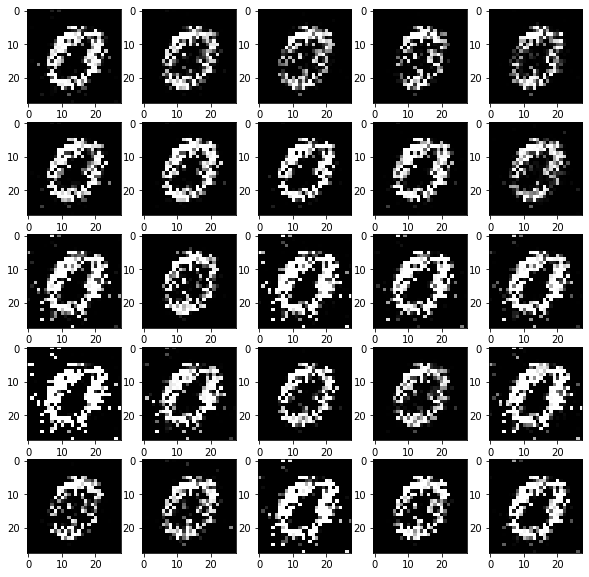

epochs 19


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 13ms/step


  0%|          | 1/273 [00:00<02:16,  2.00it/s]

4/4 [==============================] - 0s 14ms/step


  1%|          | 2/273 [00:01<02:17,  1.97it/s]

4/4 [==============================] - 0s 9ms/step


  1%|          | 3/273 [00:01<02:12,  2.04it/s]

4/4 [==============================] - 0s 9ms/step


  1%|▏         | 4/273 [00:01<02:01,  2.21it/s]

4/4 [==============================] - 0s 10ms/step


  2%|▏         | 5/273 [00:02<02:04,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


  2%|▏         | 6/273 [00:02<02:03,  2.15it/s]

4/4 [==============================] - 0s 10ms/step


  3%|▎         | 7/273 [00:03<02:00,  2.21it/s]

4/4 [==============================] - 0s 10ms/step


  3%|▎         | 8/273 [00:03<01:57,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


  3%|▎         | 9/273 [00:04<01:54,  2.30it/s]

4/4 [==============================] - 0s 8ms/step


  4%|▎         | 10/273 [00:04<01:54,  2.30it/s]

4/4 [==============================] - 0s 8ms/step


  4%|▍         | 11/273 [00:04<01:55,  2.26it/s]

4/4 [==============================] - 0s 10ms/step


  4%|▍         | 12/273 [00:05<01:57,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


  5%|▍         | 13/273 [00:05<01:59,  2.18it/s]

4/4 [==============================] - 0s 10ms/step


  5%|▌         | 14/273 [00:06<01:55,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


  5%|▌         | 15/273 [00:06<01:52,  2.28it/s]

4/4 [==============================] - 0s 11ms/step


  6%|▌         | 16/273 [00:07<01:50,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


  6%|▌         | 17/273 [00:07<01:49,  2.34it/s]

4/4 [==============================] - 0s 10ms/step


  7%|▋         | 18/273 [00:08<01:50,  2.30it/s]

4/4 [==============================] - 0s 10ms/step


  7%|▋         | 19/273 [00:08<01:50,  2.30it/s]

4/4 [==============================] - 0s 8ms/step


  7%|▋         | 20/273 [00:08<01:49,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 21/273 [00:09<01:51,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 22/273 [00:09<01:52,  2.23it/s]

4/4 [==============================] - 0s 10ms/step


  8%|▊         | 23/273 [00:10<01:53,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


  9%|▉         | 24/273 [00:10<01:55,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


  9%|▉         | 25/273 [00:11<01:48,  2.28it/s]

4/4 [==============================] - 0s 13ms/step


 10%|▉         | 26/273 [00:11<01:45,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 10%|▉         | 27/273 [00:11<01:42,  2.40it/s]

4/4 [==============================] - 0s 9ms/step


 10%|█         | 28/273 [00:12<01:41,  2.41it/s]

4/4 [==============================] - 0s 8ms/step


 11%|█         | 29/273 [00:12<01:38,  2.47it/s]

4/4 [==============================] - 0s 8ms/step


 11%|█         | 30/273 [00:13<01:38,  2.46it/s]

4/4 [==============================] - 0s 9ms/step


 11%|█▏        | 31/273 [00:13<01:38,  2.46it/s]

4/4 [==============================] - 0s 9ms/step


 12%|█▏        | 32/273 [00:13<01:36,  2.49it/s]

4/4 [==============================] - 0s 13ms/step


 12%|█▏        | 33/273 [00:14<01:36,  2.48it/s]

4/4 [==============================] - 0s 9ms/step


 12%|█▏        | 34/273 [00:14<01:36,  2.48it/s]

4/4 [==============================] - 0s 10ms/step


 13%|█▎        | 35/273 [00:15<01:34,  2.52it/s]

4/4 [==============================] - 0s 10ms/step


 13%|█▎        | 36/273 [00:15<01:35,  2.48it/s]

4/4 [==============================] - 0s 11ms/step


 14%|█▎        | 37/273 [00:15<01:34,  2.50it/s]

4/4 [==============================] - 0s 10ms/step


 14%|█▍        | 38/273 [00:16<01:34,  2.48it/s]

4/4 [==============================] - 0s 13ms/step


 14%|█▍        | 39/273 [00:16<01:34,  2.48it/s]

4/4 [==============================] - 0s 9ms/step


 15%|█▍        | 40/273 [00:17<01:34,  2.46it/s]

4/4 [==============================] - 0s 10ms/step


 15%|█▌        | 41/273 [00:17<01:35,  2.44it/s]

4/4 [==============================] - 0s 8ms/step


 15%|█▌        | 42/273 [00:18<01:33,  2.48it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▌        | 43/273 [00:18<01:32,  2.48it/s]

4/4 [==============================] - 0s 10ms/step


 16%|█▌        | 44/273 [00:18<01:33,  2.44it/s]

4/4 [==============================] - 0s 8ms/step


 16%|█▋        | 45/273 [00:19<01:32,  2.47it/s]

4/4 [==============================] - 0s 9ms/step


 17%|█▋        | 46/273 [00:19<01:31,  2.49it/s]

4/4 [==============================] - 0s 9ms/step


 17%|█▋        | 47/273 [00:20<01:30,  2.51it/s]

4/4 [==============================] - 0s 11ms/step


 18%|█▊        | 48/273 [00:20<01:29,  2.52it/s]

4/4 [==============================] - 0s 8ms/step


 18%|█▊        | 49/273 [00:20<01:28,  2.52it/s]

4/4 [==============================] - 0s 8ms/step


 18%|█▊        | 50/273 [00:21<01:28,  2.52it/s]

4/4 [==============================] - 0s 8ms/step


 19%|█▊        | 51/273 [00:21<01:27,  2.53it/s]

4/4 [==============================] - 0s 13ms/step


 19%|█▉        | 52/273 [00:22<01:29,  2.47it/s]

4/4 [==============================] - 0s 9ms/step


 19%|█▉        | 53/273 [00:22<01:27,  2.51it/s]

4/4 [==============================] - 0s 9ms/step


 20%|█▉        | 54/273 [00:22<01:28,  2.47it/s]

4/4 [==============================] - 0s 9ms/step


 20%|██        | 55/273 [00:23<01:27,  2.48it/s]

4/4 [==============================] - 0s 9ms/step


 21%|██        | 56/273 [00:23<01:26,  2.52it/s]

4/4 [==============================] - 0s 9ms/step


 21%|██        | 57/273 [00:24<01:27,  2.47it/s]

4/4 [==============================] - 0s 9ms/step


 21%|██        | 58/273 [00:24<01:27,  2.47it/s]

4/4 [==============================] - 0s 9ms/step


 22%|██▏       | 59/273 [00:24<01:27,  2.44it/s]

4/4 [==============================] - 0s 9ms/step


 22%|██▏       | 60/273 [00:25<01:27,  2.44it/s]

4/4 [==============================] - 0s 8ms/step


 22%|██▏       | 61/273 [00:25<01:26,  2.45it/s]

4/4 [==============================] - 0s 10ms/step


 23%|██▎       | 62/273 [00:26<01:25,  2.47it/s]

4/4 [==============================] - 0s 9ms/step


 23%|██▎       | 63/273 [00:26<01:24,  2.49it/s]

4/4 [==============================] - 0s 8ms/step


 23%|██▎       | 64/273 [00:26<01:23,  2.50it/s]

4/4 [==============================] - 0s 10ms/step


 24%|██▍       | 65/273 [00:27<01:23,  2.50it/s]

4/4 [==============================] - 0s 9ms/step


 24%|██▍       | 66/273 [00:27<01:22,  2.51it/s]

4/4 [==============================] - 0s 10ms/step


 25%|██▍       | 67/273 [00:28<01:23,  2.47it/s]

4/4 [==============================] - 0s 11ms/step


 25%|██▍       | 68/273 [00:28<01:24,  2.44it/s]

4/4 [==============================] - 0s 9ms/step


 25%|██▌       | 69/273 [00:28<01:22,  2.46it/s]

4/4 [==============================] - 0s 10ms/step


 26%|██▌       | 70/273 [00:29<01:24,  2.39it/s]

4/4 [==============================] - 0s 8ms/step


 26%|██▌       | 71/273 [00:29<01:22,  2.43it/s]

4/4 [==============================] - 0s 9ms/step


 26%|██▋       | 72/273 [00:30<01:22,  2.44it/s]

4/4 [==============================] - 0s 8ms/step


 27%|██▋       | 73/273 [00:30<01:21,  2.44it/s]

4/4 [==============================] - 0s 9ms/step


 27%|██▋       | 74/273 [00:30<01:21,  2.46it/s]

4/4 [==============================] - 0s 10ms/step


 27%|██▋       | 75/273 [00:31<01:20,  2.47it/s]

4/4 [==============================] - 0s 9ms/step


 28%|██▊       | 76/273 [00:31<01:18,  2.50it/s]

4/4 [==============================] - 0s 9ms/step


 28%|██▊       | 77/273 [00:32<01:19,  2.48it/s]

4/4 [==============================] - 0s 12ms/step


 29%|██▊       | 78/273 [00:32<01:18,  2.48it/s]

4/4 [==============================] - 0s 11ms/step


 29%|██▉       | 79/273 [00:32<01:17,  2.50it/s]

4/4 [==============================] - 0s 10ms/step


 29%|██▉       | 80/273 [00:33<01:17,  2.50it/s]

4/4 [==============================] - 0s 13ms/step


 30%|██▉       | 81/273 [00:33<01:15,  2.54it/s]

4/4 [==============================] - 0s 9ms/step


 30%|███       | 82/273 [00:34<01:15,  2.54it/s]

4/4 [==============================] - 0s 10ms/step


 30%|███       | 83/273 [00:34<01:15,  2.50it/s]

4/4 [==============================] - 0s 10ms/step


 31%|███       | 84/273 [00:34<01:14,  2.53it/s]

4/4 [==============================] - 0s 10ms/step


 31%|███       | 85/273 [00:35<01:15,  2.48it/s]

4/4 [==============================] - 0s 9ms/step


 32%|███▏      | 86/273 [00:35<01:14,  2.50it/s]

4/4 [==============================] - 0s 8ms/step


 32%|███▏      | 87/273 [00:36<01:14,  2.51it/s]

4/4 [==============================] - 0s 9ms/step


 32%|███▏      | 88/273 [00:36<01:14,  2.48it/s]

4/4 [==============================] - 0s 10ms/step


 33%|███▎      | 89/273 [00:37<01:19,  2.31it/s]

4/4 [==============================] - 0s 16ms/step


 33%|███▎      | 90/273 [00:37<01:25,  2.14it/s]

4/4 [==============================] - 0s 13ms/step


 33%|███▎      | 91/273 [00:38<01:26,  2.11it/s]

4/4 [==============================] - 0s 11ms/step


 34%|███▎      | 92/273 [00:38<01:26,  2.09it/s]

4/4 [==============================] - 0s 12ms/step


 34%|███▍      | 93/273 [00:39<01:26,  2.07it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▍      | 94/273 [00:39<01:25,  2.09it/s]

4/4 [==============================] - 0s 14ms/step


 35%|███▍      | 95/273 [00:40<01:25,  2.09it/s]

4/4 [==============================] - 0s 12ms/step


 35%|███▌      | 96/273 [00:40<01:26,  2.05it/s]

4/4 [==============================] - 0s 13ms/step


 36%|███▌      | 97/273 [00:41<01:26,  2.04it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▌      | 98/273 [00:41<01:23,  2.09it/s]

4/4 [==============================] - 0s 10ms/step


 36%|███▋      | 99/273 [00:41<01:20,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


 37%|███▋      | 100/273 [00:42<01:17,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 101/273 [00:42<01:15,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 102/273 [00:43<01:13,  2.32it/s]

4/4 [==============================] - 0s 8ms/step


 38%|███▊      | 103/273 [00:43<01:12,  2.35it/s]

4/4 [==============================] - 0s 9ms/step


 38%|███▊      | 104/273 [00:43<01:11,  2.38it/s]

4/4 [==============================] - 0s 8ms/step


 38%|███▊      | 105/273 [00:44<01:13,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 39%|███▉      | 106/273 [00:44<01:14,  2.24it/s]

4/4 [==============================] - 0s 10ms/step


 39%|███▉      | 107/273 [00:45<01:11,  2.31it/s]

4/4 [==============================] - 0s 8ms/step


 40%|███▉      | 108/273 [00:45<01:09,  2.37it/s]

4/4 [==============================] - 0s 9ms/step


 40%|███▉      | 109/273 [00:46<01:08,  2.40it/s]

4/4 [==============================] - 0s 9ms/step


 40%|████      | 110/273 [00:46<01:07,  2.41it/s]

4/4 [==============================] - 0s 8ms/step


 41%|████      | 111/273 [00:46<01:06,  2.42it/s]

4/4 [==============================] - 0s 10ms/step


 41%|████      | 112/273 [00:47<01:12,  2.21it/s]

4/4 [==============================] - 0s 15ms/step


 41%|████▏     | 113/273 [00:47<01:11,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


 42%|████▏     | 114/273 [00:48<01:08,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 42%|████▏     | 115/273 [00:48<01:05,  2.40it/s]

4/4 [==============================] - 0s 10ms/step


 42%|████▏     | 116/273 [00:49<01:05,  2.39it/s]

4/4 [==============================] - 0s 9ms/step


 43%|████▎     | 117/273 [00:49<01:04,  2.43it/s]

4/4 [==============================] - 0s 10ms/step


 43%|████▎     | 118/273 [00:49<01:03,  2.44it/s]

4/4 [==============================] - 0s 9ms/step


 44%|████▎     | 119/273 [00:50<01:01,  2.48it/s]

4/4 [==============================] - 0s 11ms/step


 44%|████▍     | 120/273 [00:50<01:02,  2.46it/s]

4/4 [==============================] - 0s 10ms/step


 44%|████▍     | 121/273 [00:51<01:02,  2.42it/s]

4/4 [==============================] - 0s 8ms/step


 45%|████▍     | 122/273 [00:51<01:01,  2.45it/s]

4/4 [==============================] - 0s 10ms/step


 45%|████▌     | 123/273 [00:51<01:00,  2.47it/s]

4/4 [==============================] - 0s 9ms/step


 45%|████▌     | 124/273 [00:52<00:59,  2.50it/s]

4/4 [==============================] - 0s 11ms/step


 46%|████▌     | 125/273 [00:52<00:59,  2.50it/s]

4/4 [==============================] - 0s 10ms/step


 46%|████▌     | 126/273 [00:53<00:58,  2.52it/s]

4/4 [==============================] - 0s 8ms/step


 47%|████▋     | 127/273 [00:53<00:57,  2.53it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 128/273 [00:53<00:57,  2.52it/s]

4/4 [==============================] - 0s 10ms/step


 47%|████▋     | 129/273 [00:54<00:57,  2.50it/s]

4/4 [==============================] - 0s 9ms/step


 48%|████▊     | 130/273 [00:54<00:57,  2.48it/s]

4/4 [==============================] - 0s 9ms/step


 48%|████▊     | 131/273 [00:55<00:56,  2.50it/s]

4/4 [==============================] - 0s 8ms/step


 48%|████▊     | 132/273 [00:55<00:56,  2.50it/s]

4/4 [==============================] - 0s 9ms/step


 49%|████▊     | 133/273 [00:55<00:55,  2.53it/s]

4/4 [==============================] - 0s 9ms/step


 49%|████▉     | 134/273 [00:56<00:56,  2.46it/s]

4/4 [==============================] - 0s 11ms/step


 49%|████▉     | 135/273 [00:56<00:56,  2.46it/s]

4/4 [==============================] - 0s 9ms/step


 50%|████▉     | 136/273 [00:57<00:54,  2.51it/s]

4/4 [==============================] - 0s 9ms/step


 50%|█████     | 137/273 [00:57<00:54,  2.50it/s]

4/4 [==============================] - 0s 9ms/step


 51%|█████     | 138/273 [00:57<00:53,  2.51it/s]

4/4 [==============================] - 0s 8ms/step


 51%|█████     | 139/273 [00:58<00:55,  2.44it/s]

4/4 [==============================] - 0s 8ms/step


 51%|█████▏    | 140/273 [00:58<00:53,  2.50it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 141/273 [00:59<00:52,  2.49it/s]

4/4 [==============================] - 0s 8ms/step


 52%|█████▏    | 142/273 [00:59<00:52,  2.50it/s]

4/4 [==============================] - 0s 8ms/step


 52%|█████▏    | 143/273 [00:59<00:51,  2.52it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 144/273 [01:00<00:51,  2.52it/s]

4/4 [==============================] - 0s 11ms/step


 53%|█████▎    | 145/273 [01:00<00:50,  2.52it/s]

4/4 [==============================] - 0s 8ms/step


 53%|█████▎    | 146/273 [01:01<00:50,  2.54it/s]

4/4 [==============================] - 0s 9ms/step


 54%|█████▍    | 147/273 [01:01<00:51,  2.46it/s]

4/4 [==============================] - 0s 9ms/step


 54%|█████▍    | 148/273 [01:01<00:50,  2.47it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▍    | 149/273 [01:02<00:49,  2.50it/s]

4/4 [==============================] - 0s 11ms/step


 55%|█████▍    | 150/273 [01:02<00:48,  2.52it/s]

4/4 [==============================] - 0s 12ms/step


 55%|█████▌    | 151/273 [01:03<00:48,  2.52it/s]

4/4 [==============================] - 0s 7ms/step


 56%|█████▌    | 152/273 [01:03<00:48,  2.50it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▌    | 153/273 [01:03<00:47,  2.51it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▋    | 154/273 [01:04<00:47,  2.53it/s]

4/4 [==============================] - 0s 10ms/step


 57%|█████▋    | 155/273 [01:04<00:47,  2.49it/s]

4/4 [==============================] - 0s 8ms/step


 57%|█████▋    | 156/273 [01:05<00:46,  2.50it/s]

4/4 [==============================] - 0s 9ms/step


 58%|█████▊    | 157/273 [01:05<00:46,  2.52it/s]

4/4 [==============================] - 0s 9ms/step


 58%|█████▊    | 158/273 [01:05<00:45,  2.54it/s]

4/4 [==============================] - 0s 9ms/step


 58%|█████▊    | 159/273 [01:06<00:46,  2.48it/s]

4/4 [==============================] - 0s 10ms/step


 59%|█████▊    | 160/273 [01:06<00:46,  2.45it/s]

4/4 [==============================] - 0s 8ms/step


 59%|█████▉    | 161/273 [01:07<00:45,  2.45it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▉    | 162/273 [01:07<00:45,  2.43it/s]

4/4 [==============================] - 0s 11ms/step


 60%|█████▉    | 163/273 [01:07<00:44,  2.47it/s]

4/4 [==============================] - 0s 10ms/step


 60%|██████    | 164/273 [01:08<00:43,  2.48it/s]

4/4 [==============================] - 0s 9ms/step


 60%|██████    | 165/273 [01:08<00:43,  2.47it/s]

4/4 [==============================] - 0s 9ms/step


 61%|██████    | 166/273 [01:09<00:42,  2.50it/s]

4/4 [==============================] - 0s 8ms/step


 61%|██████    | 167/273 [01:09<00:42,  2.52it/s]

4/4 [==============================] - 0s 9ms/step


 62%|██████▏   | 168/273 [01:09<00:41,  2.51it/s]

4/4 [==============================] - 0s 8ms/step


 62%|██████▏   | 169/273 [01:10<00:41,  2.52it/s]

4/4 [==============================] - 0s 8ms/step


 62%|██████▏   | 170/273 [01:10<00:41,  2.48it/s]

4/4 [==============================] - 0s 8ms/step


 63%|██████▎   | 171/273 [01:11<00:40,  2.50it/s]

4/4 [==============================] - 0s 10ms/step


 63%|██████▎   | 172/273 [01:11<00:40,  2.47it/s]

4/4 [==============================] - 0s 11ms/step


 63%|██████▎   | 173/273 [01:11<00:40,  2.48it/s]

4/4 [==============================] - 0s 12ms/step


 64%|██████▎   | 174/273 [01:12<00:42,  2.35it/s]

4/4 [==============================] - 0s 10ms/step


 64%|██████▍   | 175/273 [01:12<00:41,  2.37it/s]

4/4 [==============================] - 0s 10ms/step


 64%|██████▍   | 176/273 [01:13<00:40,  2.40it/s]

4/4 [==============================] - 0s 8ms/step


 65%|██████▍   | 177/273 [01:13<00:39,  2.43it/s]

4/4 [==============================] - 0s 9ms/step


 65%|██████▌   | 178/273 [01:14<00:39,  2.43it/s]

4/4 [==============================] - 0s 11ms/step


 66%|██████▌   | 179/273 [01:14<00:38,  2.43it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▌   | 180/273 [01:14<00:38,  2.43it/s]

4/4 [==============================] - 0s 10ms/step


 66%|██████▋   | 181/273 [01:15<00:38,  2.41it/s]

4/4 [==============================] - 0s 8ms/step


 67%|██████▋   | 182/273 [01:15<00:36,  2.47it/s]

4/4 [==============================] - 0s 11ms/step


 67%|██████▋   | 183/273 [01:16<00:36,  2.46it/s]

4/4 [==============================] - 0s 10ms/step


 67%|██████▋   | 184/273 [01:16<00:36,  2.46it/s]

4/4 [==============================] - 0s 9ms/step


 68%|██████▊   | 185/273 [01:16<00:35,  2.45it/s]

4/4 [==============================] - 0s 10ms/step


 68%|██████▊   | 186/273 [01:17<00:35,  2.48it/s]

4/4 [==============================] - 0s 14ms/step


 68%|██████▊   | 187/273 [01:17<00:34,  2.46it/s]

4/4 [==============================] - 0s 9ms/step


 69%|██████▉   | 188/273 [01:18<00:34,  2.47it/s]

4/4 [==============================] - 0s 9ms/step


 69%|██████▉   | 189/273 [01:18<00:34,  2.46it/s]

4/4 [==============================] - 0s 8ms/step


 70%|██████▉   | 190/273 [01:18<00:34,  2.44it/s]

4/4 [==============================] - 0s 8ms/step


 70%|██████▉   | 191/273 [01:19<00:33,  2.47it/s]

4/4 [==============================] - 0s 8ms/step


 70%|███████   | 192/273 [01:19<00:32,  2.49it/s]

4/4 [==============================] - 0s 8ms/step


 71%|███████   | 193/273 [01:20<00:32,  2.43it/s]

4/4 [==============================] - 0s 8ms/step


 71%|███████   | 194/273 [01:20<00:32,  2.47it/s]

4/4 [==============================] - 0s 10ms/step


 71%|███████▏  | 195/273 [01:20<00:31,  2.47it/s]

4/4 [==============================] - 0s 8ms/step


 72%|███████▏  | 196/273 [01:21<00:30,  2.49it/s]

4/4 [==============================] - 0s 9ms/step


 72%|███████▏  | 197/273 [01:21<00:29,  2.54it/s]

4/4 [==============================] - 0s 9ms/step


 73%|███████▎  | 198/273 [01:22<00:29,  2.53it/s]

4/4 [==============================] - 0s 8ms/step


 73%|███████▎  | 199/273 [01:22<00:29,  2.53it/s]

4/4 [==============================] - 0s 10ms/step


 73%|███████▎  | 200/273 [01:22<00:29,  2.52it/s]

4/4 [==============================] - 0s 11ms/step


 74%|███████▎  | 201/273 [01:23<00:28,  2.52it/s]

4/4 [==============================] - 0s 10ms/step


 74%|███████▍  | 202/273 [01:23<00:27,  2.55it/s]

4/4 [==============================] - 0s 12ms/step


 74%|███████▍  | 203/273 [01:24<00:27,  2.56it/s]

4/4 [==============================] - 0s 9ms/step


 75%|███████▍  | 204/273 [01:24<00:26,  2.58it/s]

4/4 [==============================] - 0s 10ms/step


 75%|███████▌  | 205/273 [01:24<00:26,  2.59it/s]

4/4 [==============================] - 0s 11ms/step


 75%|███████▌  | 206/273 [01:25<00:26,  2.52it/s]

4/4 [==============================] - 0s 10ms/step


 76%|███████▌  | 207/273 [01:25<00:25,  2.55it/s]

4/4 [==============================] - 0s 9ms/step


 76%|███████▌  | 208/273 [01:26<00:25,  2.56it/s]

4/4 [==============================] - 0s 11ms/step


 77%|███████▋  | 209/273 [01:26<00:25,  2.51it/s]

4/4 [==============================] - 0s 8ms/step


 77%|███████▋  | 210/273 [01:26<00:25,  2.50it/s]

4/4 [==============================] - 0s 8ms/step


 77%|███████▋  | 211/273 [01:27<00:24,  2.51it/s]

4/4 [==============================] - 0s 8ms/step


 78%|███████▊  | 212/273 [01:27<00:24,  2.52it/s]

4/4 [==============================] - 0s 11ms/step


 78%|███████▊  | 213/273 [01:28<00:24,  2.48it/s]

4/4 [==============================] - 0s 8ms/step


 78%|███████▊  | 214/273 [01:28<00:24,  2.43it/s]

4/4 [==============================] - 0s 9ms/step


 79%|███████▉  | 215/273 [01:28<00:23,  2.44it/s]

4/4 [==============================] - 0s 9ms/step


 79%|███████▉  | 216/273 [01:29<00:23,  2.47it/s]

4/4 [==============================] - 0s 12ms/step


 79%|███████▉  | 217/273 [01:29<00:23,  2.42it/s]

4/4 [==============================] - 0s 8ms/step


 80%|███████▉  | 218/273 [01:30<00:22,  2.47it/s]

4/4 [==============================] - 0s 8ms/step


 80%|████████  | 219/273 [01:30<00:21,  2.47it/s]

4/4 [==============================] - 0s 9ms/step


 81%|████████  | 220/273 [01:30<00:21,  2.52it/s]

4/4 [==============================] - 0s 12ms/step


 81%|████████  | 221/273 [01:31<00:20,  2.50it/s]

4/4 [==============================] - 0s 10ms/step


 81%|████████▏ | 222/273 [01:31<00:20,  2.48it/s]

4/4 [==============================] - 0s 11ms/step


 82%|████████▏ | 223/273 [01:32<00:19,  2.51it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 224/273 [01:32<00:19,  2.45it/s]

4/4 [==============================] - 0s 8ms/step


 82%|████████▏ | 225/273 [01:32<00:19,  2.49it/s]

4/4 [==============================] - 0s 10ms/step


 83%|████████▎ | 226/273 [01:33<00:19,  2.43it/s]

4/4 [==============================] - 0s 9ms/step


 83%|████████▎ | 227/273 [01:33<00:18,  2.45it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▎ | 228/273 [01:34<00:18,  2.48it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▍ | 229/273 [01:34<00:17,  2.46it/s]

4/4 [==============================] - 0s 10ms/step


 84%|████████▍ | 230/273 [01:34<00:17,  2.45it/s]

4/4 [==============================] - 0s 9ms/step


 85%|████████▍ | 231/273 [01:35<00:17,  2.47it/s]

4/4 [==============================] - 0s 9ms/step


 85%|████████▍ | 232/273 [01:35<00:16,  2.48it/s]

4/4 [==============================] - 0s 8ms/step


 85%|████████▌ | 233/273 [01:36<00:16,  2.49it/s]

4/4 [==============================] - 0s 10ms/step


 86%|████████▌ | 234/273 [01:36<00:15,  2.53it/s]

4/4 [==============================] - 0s 10ms/step


 86%|████████▌ | 235/273 [01:36<00:15,  2.53it/s]

4/4 [==============================] - 0s 8ms/step


 86%|████████▋ | 236/273 [01:37<00:14,  2.56it/s]

4/4 [==============================] - 0s 8ms/step


 87%|████████▋ | 237/273 [01:37<00:14,  2.52it/s]

4/4 [==============================] - 0s 8ms/step


 87%|████████▋ | 238/273 [01:38<00:13,  2.57it/s]

4/4 [==============================] - 0s 8ms/step


 88%|████████▊ | 239/273 [01:38<00:13,  2.55it/s]

4/4 [==============================] - 0s 14ms/step


 88%|████████▊ | 240/273 [01:38<00:13,  2.53it/s]

4/4 [==============================] - 0s 8ms/step


 88%|████████▊ | 241/273 [01:39<00:12,  2.48it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▊ | 242/273 [01:39<00:12,  2.48it/s]

4/4 [==============================] - 0s 10ms/step


 89%|████████▉ | 243/273 [01:40<00:12,  2.47it/s]

4/4 [==============================] - 0s 8ms/step


 89%|████████▉ | 244/273 [01:40<00:11,  2.48it/s]

4/4 [==============================] - 0s 11ms/step


 90%|████████▉ | 245/273 [01:40<00:11,  2.46it/s]

4/4 [==============================] - 0s 9ms/step


 90%|█████████ | 246/273 [01:41<00:10,  2.48it/s]

4/4 [==============================] - 0s 12ms/step


 90%|█████████ | 247/273 [01:41<00:10,  2.41it/s]

4/4 [==============================] - 0s 8ms/step


 91%|█████████ | 248/273 [01:42<00:10,  2.41it/s]

4/4 [==============================] - 0s 9ms/step


 91%|█████████ | 249/273 [01:42<00:09,  2.45it/s]

4/4 [==============================] - 0s 8ms/step


 92%|█████████▏| 250/273 [01:43<00:09,  2.45it/s]

4/4 [==============================] - 0s 8ms/step


 92%|█████████▏| 251/273 [01:43<00:08,  2.50it/s]

4/4 [==============================] - 0s 13ms/step


 92%|█████████▏| 252/273 [01:43<00:08,  2.53it/s]

4/4 [==============================] - 0s 12ms/step


 93%|█████████▎| 253/273 [01:44<00:08,  2.46it/s]

4/4 [==============================] - 0s 11ms/step


 93%|█████████▎| 254/273 [01:44<00:07,  2.44it/s]

4/4 [==============================] - 0s 8ms/step


 93%|█████████▎| 255/273 [01:45<00:07,  2.43it/s]

4/4 [==============================] - 0s 11ms/step


 94%|█████████▍| 256/273 [01:45<00:06,  2.44it/s]

4/4 [==============================] - 0s 12ms/step


 94%|█████████▍| 257/273 [01:45<00:06,  2.42it/s]

4/4 [==============================] - 0s 10ms/step


 95%|█████████▍| 258/273 [01:46<00:06,  2.44it/s]

4/4 [==============================] - 0s 11ms/step


 95%|█████████▍| 259/273 [01:46<00:05,  2.46it/s]

4/4 [==============================] - 0s 10ms/step


 95%|█████████▌| 260/273 [01:47<00:05,  2.46it/s]

4/4 [==============================] - 0s 9ms/step


 96%|█████████▌| 261/273 [01:47<00:04,  2.45it/s]

4/4 [==============================] - 0s 9ms/step


 96%|█████████▌| 262/273 [01:47<00:04,  2.46it/s]

4/4 [==============================] - 0s 9ms/step


 96%|█████████▋| 263/273 [01:48<00:04,  2.49it/s]

4/4 [==============================] - 0s 10ms/step


 97%|█████████▋| 264/273 [01:48<00:03,  2.46it/s]

4/4 [==============================] - 0s 8ms/step


 97%|█████████▋| 265/273 [01:49<00:03,  2.43it/s]

4/4 [==============================] - 0s 8ms/step


 97%|█████████▋| 266/273 [01:49<00:02,  2.46it/s]

4/4 [==============================] - 0s 10ms/step


 98%|█████████▊| 267/273 [01:49<00:02,  2.51it/s]

4/4 [==============================] - 0s 12ms/step


 98%|█████████▊| 268/273 [01:50<00:02,  2.46it/s]

4/4 [==============================] - 0s 9ms/step


 99%|█████████▊| 269/273 [01:50<00:01,  2.45it/s]

4/4 [==============================] - 0s 10ms/step


 99%|█████████▉| 270/273 [01:51<00:01,  2.41it/s]

4/4 [==============================] - 0s 8ms/step


 99%|█████████▉| 271/273 [01:51<00:00,  2.47it/s]

4/4 [==============================] - 0s 8ms/step


100%|█████████▉| 272/273 [01:51<00:00,  2.45it/s]

4/4 [==============================] - 0s 11ms/step


100%|██████████| 273/273 [01:52<00:00,  2.43it/s]


loss is 0.004615291021764278 |*| 15.468939781188965
1/1 [==============================] - 0s 35ms/step


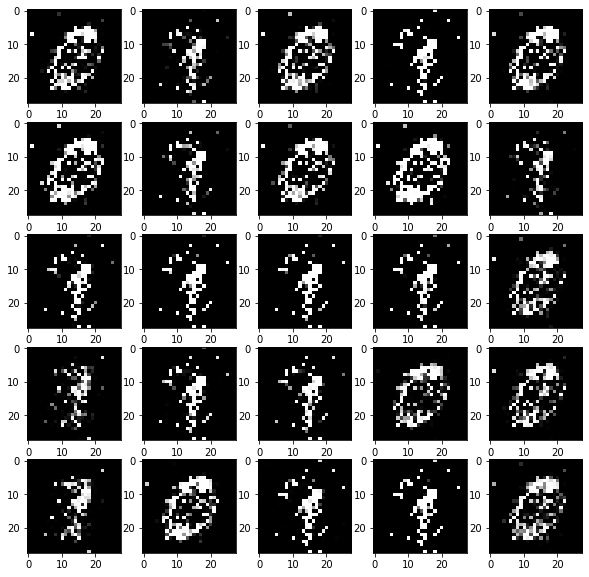

epochs 20


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 9ms/step


  0%|          | 1/273 [00:00<01:54,  2.38it/s]

4/4 [==============================] - 0s 9ms/step


  1%|          | 2/273 [00:00<01:54,  2.36it/s]

4/4 [==============================] - 0s 9ms/step


  1%|          | 3/273 [00:01<02:01,  2.22it/s]

4/4 [==============================] - 0s 10ms/step


  1%|▏         | 4/273 [00:01<01:57,  2.30it/s]

4/4 [==============================] - 0s 8ms/step


  2%|▏         | 5/273 [00:02<01:59,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


  2%|▏         | 6/273 [00:02<01:54,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


  3%|▎         | 7/273 [00:03<01:56,  2.28it/s]

4/4 [==============================] - 0s 11ms/step


  3%|▎         | 8/273 [00:03<01:55,  2.30it/s]

4/4 [==============================] - 0s 8ms/step


  3%|▎         | 9/273 [00:03<01:52,  2.34it/s]

4/4 [==============================] - 0s 14ms/step


  4%|▎         | 10/273 [00:04<01:50,  2.38it/s]

4/4 [==============================] - 0s 10ms/step


  4%|▍         | 11/273 [00:04<01:50,  2.37it/s]

4/4 [==============================] - 0s 9ms/step


  4%|▍         | 12/273 [00:05<01:48,  2.40it/s]

4/4 [==============================] - 0s 8ms/step


  5%|▍         | 13/273 [00:05<01:46,  2.43it/s]

4/4 [==============================] - 0s 8ms/step


  5%|▌         | 14/273 [00:05<01:47,  2.42it/s]

4/4 [==============================] - 0s 9ms/step


  5%|▌         | 15/273 [00:06<01:47,  2.40it/s]

4/4 [==============================] - 0s 8ms/step


  6%|▌         | 16/273 [00:06<01:46,  2.41it/s]

4/4 [==============================] - 0s 8ms/step


  6%|▌         | 17/273 [00:07<01:47,  2.37it/s]

4/4 [==============================] - 0s 10ms/step


  7%|▋         | 18/273 [00:07<01:46,  2.40it/s]

4/4 [==============================] - 0s 8ms/step


  7%|▋         | 19/273 [00:08<01:44,  2.44it/s]

4/4 [==============================] - 0s 10ms/step


  7%|▋         | 20/273 [00:08<01:42,  2.46it/s]

4/4 [==============================] - 0s 8ms/step


  8%|▊         | 21/273 [00:08<01:42,  2.45it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 22/273 [00:09<01:43,  2.42it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 23/273 [00:09<01:41,  2.47it/s]

4/4 [==============================] - 0s 9ms/step


  9%|▉         | 24/273 [00:10<01:41,  2.45it/s]

4/4 [==============================] - 0s 9ms/step


  9%|▉         | 25/273 [00:10<01:41,  2.45it/s]

4/4 [==============================] - 0s 9ms/step


 10%|▉         | 26/273 [00:10<01:40,  2.45it/s]

4/4 [==============================] - 0s 9ms/step


 10%|▉         | 27/273 [00:11<01:40,  2.44it/s]

4/4 [==============================] - 0s 8ms/step


 10%|█         | 28/273 [00:11<01:38,  2.48it/s]

4/4 [==============================] - 0s 11ms/step


 11%|█         | 29/273 [00:12<01:40,  2.43it/s]

4/4 [==============================] - 0s 10ms/step


 11%|█         | 30/273 [00:12<01:38,  2.47it/s]

4/4 [==============================] - 0s 9ms/step


 11%|█▏        | 31/273 [00:12<01:38,  2.45it/s]

4/4 [==============================] - 0s 10ms/step


 12%|█▏        | 32/273 [00:13<01:39,  2.43it/s]

4/4 [==============================] - 0s 8ms/step


 12%|█▏        | 33/273 [00:13<01:36,  2.48it/s]

4/4 [==============================] - 0s 9ms/step


 12%|█▏        | 34/273 [00:14<01:35,  2.50it/s]

4/4 [==============================] - 0s 10ms/step


 13%|█▎        | 35/273 [00:14<01:36,  2.46it/s]

4/4 [==============================] - 0s 9ms/step


 13%|█▎        | 36/273 [00:14<01:35,  2.47it/s]

4/4 [==============================] - 0s 13ms/step


 14%|█▎        | 37/273 [00:15<01:37,  2.43it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▍        | 38/273 [00:15<01:35,  2.46it/s]

4/4 [==============================] - 0s 10ms/step


 14%|█▍        | 39/273 [00:16<01:33,  2.49it/s]

4/4 [==============================] - 0s 9ms/step


 15%|█▍        | 40/273 [00:16<01:32,  2.51it/s]

4/4 [==============================] - 0s 10ms/step


 15%|█▌        | 41/273 [00:16<01:33,  2.49it/s]

4/4 [==============================] - 0s 9ms/step


 15%|█▌        | 42/273 [00:17<01:34,  2.45it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▌        | 43/273 [00:17<01:33,  2.47it/s]

4/4 [==============================] - 0s 11ms/step


 16%|█▌        | 44/273 [00:18<01:36,  2.38it/s]

4/4 [==============================] - 0s 8ms/step


 16%|█▋        | 45/273 [00:18<01:34,  2.42it/s]

4/4 [==============================] - 0s 9ms/step


 17%|█▋        | 46/273 [00:19<01:32,  2.44it/s]

4/4 [==============================] - 0s 8ms/step


 17%|█▋        | 47/273 [00:19<01:31,  2.47it/s]

4/4 [==============================] - 0s 8ms/step


 18%|█▊        | 48/273 [00:19<01:30,  2.49it/s]

4/4 [==============================] - 0s 7ms/step


 18%|█▊        | 49/273 [00:20<01:28,  2.52it/s]

4/4 [==============================] - 0s 8ms/step


 18%|█▊        | 50/273 [00:20<01:30,  2.47it/s]

4/4 [==============================] - 0s 8ms/step


 19%|█▊        | 51/273 [00:21<01:29,  2.48it/s]

4/4 [==============================] - 0s 9ms/step


 19%|█▉        | 52/273 [00:21<01:30,  2.43it/s]

4/4 [==============================] - 0s 8ms/step


 19%|█▉        | 53/273 [00:21<01:30,  2.43it/s]

4/4 [==============================] - 0s 10ms/step


 20%|█▉        | 54/273 [00:22<01:29,  2.44it/s]

4/4 [==============================] - 0s 10ms/step


 20%|██        | 55/273 [00:22<01:29,  2.43it/s]

4/4 [==============================] - 0s 12ms/step


 21%|██        | 56/273 [00:23<01:34,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 21%|██        | 57/273 [00:23<01:39,  2.17it/s]

4/4 [==============================] - 0s 11ms/step


 21%|██        | 58/273 [00:24<01:47,  2.00it/s]

4/4 [==============================] - 0s 13ms/step


 22%|██▏       | 59/273 [00:24<01:45,  2.03it/s]

4/4 [==============================] - 0s 9ms/step


 22%|██▏       | 60/273 [00:25<01:45,  2.02it/s]

4/4 [==============================] - 0s 9ms/step


 22%|██▏       | 61/273 [00:25<01:48,  1.95it/s]

4/4 [==============================] - 0s 15ms/step


 23%|██▎       | 62/273 [00:26<01:48,  1.94it/s]

4/4 [==============================] - 0s 11ms/step


 23%|██▎       | 63/273 [00:26<01:53,  1.85it/s]

4/4 [==============================] - 0s 14ms/step


 23%|██▎       | 64/273 [00:27<01:49,  1.90it/s]

4/4 [==============================] - 0s 8ms/step


 24%|██▍       | 65/273 [00:27<01:45,  1.98it/s]

4/4 [==============================] - 0s 10ms/step


 24%|██▍       | 66/273 [00:28<01:42,  2.03it/s]

4/4 [==============================] - 0s 8ms/step


 25%|██▍       | 67/273 [00:28<01:36,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 25%|██▍       | 68/273 [00:29<01:31,  2.23it/s]

4/4 [==============================] - 0s 11ms/step


 25%|██▌       | 69/273 [00:29<01:30,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


 26%|██▌       | 70/273 [00:29<01:27,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


 26%|██▌       | 71/273 [00:30<01:25,  2.37it/s]

4/4 [==============================] - 0s 11ms/step


 26%|██▋       | 72/273 [00:30<01:25,  2.34it/s]

4/4 [==============================] - 0s 9ms/step


 27%|██▋       | 73/273 [00:31<01:23,  2.39it/s]

4/4 [==============================] - 0s 8ms/step


 27%|██▋       | 74/273 [00:31<01:21,  2.44it/s]

4/4 [==============================] - 0s 8ms/step


 27%|██▋       | 75/273 [00:32<01:21,  2.44it/s]

4/4 [==============================] - 0s 8ms/step


 28%|██▊       | 76/273 [00:32<01:21,  2.42it/s]

4/4 [==============================] - 0s 9ms/step


 28%|██▊       | 77/273 [00:32<01:22,  2.38it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▊       | 78/273 [00:33<01:21,  2.40it/s]

4/4 [==============================] - 0s 8ms/step


 29%|██▉       | 79/273 [00:33<01:20,  2.40it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▉       | 80/273 [00:34<01:20,  2.40it/s]

4/4 [==============================] - 0s 10ms/step


 30%|██▉       | 81/273 [00:34<01:18,  2.45it/s]

4/4 [==============================] - 0s 8ms/step


 30%|███       | 82/273 [00:34<01:17,  2.46it/s]

4/4 [==============================] - 0s 12ms/step


 30%|███       | 83/273 [00:35<01:18,  2.43it/s]

4/4 [==============================] - 0s 10ms/step


 31%|███       | 84/273 [00:35<01:17,  2.44it/s]

4/4 [==============================] - 0s 8ms/step


 31%|███       | 85/273 [00:36<01:18,  2.40it/s]

4/4 [==============================] - 0s 9ms/step


 32%|███▏      | 86/273 [00:36<01:16,  2.44it/s]

4/4 [==============================] - 0s 9ms/step


 32%|███▏      | 87/273 [00:36<01:15,  2.46it/s]

4/4 [==============================] - 0s 8ms/step


 32%|███▏      | 88/273 [00:37<01:16,  2.42it/s]

4/4 [==============================] - 0s 9ms/step


 33%|███▎      | 89/273 [00:37<01:14,  2.46it/s]

4/4 [==============================] - 0s 10ms/step


 33%|███▎      | 90/273 [00:38<01:13,  2.48it/s]

4/4 [==============================] - 0s 9ms/step


 33%|███▎      | 91/273 [00:38<01:15,  2.42it/s]

4/4 [==============================] - 0s 10ms/step


 34%|███▎      | 92/273 [00:39<01:14,  2.44it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▍      | 93/273 [00:39<01:15,  2.39it/s]

4/4 [==============================] - 0s 8ms/step


 34%|███▍      | 94/273 [00:39<01:13,  2.44it/s]

4/4 [==============================] - 0s 9ms/step


 35%|███▍      | 95/273 [00:40<01:13,  2.43it/s]

4/4 [==============================] - 0s 13ms/step


 35%|███▌      | 96/273 [00:40<01:12,  2.45it/s]

4/4 [==============================] - 0s 8ms/step


 36%|███▌      | 97/273 [00:41<01:12,  2.44it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▌      | 98/273 [00:41<01:13,  2.40it/s]

4/4 [==============================] - 0s 8ms/step


 36%|███▋      | 99/273 [00:41<01:11,  2.44it/s]

4/4 [==============================] - 0s 8ms/step


 37%|███▋      | 100/273 [00:42<01:11,  2.43it/s]

4/4 [==============================] - 0s 8ms/step


 37%|███▋      | 101/273 [00:42<01:09,  2.47it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 102/273 [00:43<01:08,  2.49it/s]

4/4 [==============================] - 0s 8ms/step


 38%|███▊      | 103/273 [00:43<01:09,  2.44it/s]

4/4 [==============================] - 0s 9ms/step


 38%|███▊      | 104/273 [00:43<01:07,  2.49it/s]

4/4 [==============================] - 0s 9ms/step


 38%|███▊      | 105/273 [00:44<01:08,  2.47it/s]

4/4 [==============================] - 0s 9ms/step


 39%|███▉      | 106/273 [00:44<01:08,  2.44it/s]

4/4 [==============================] - 0s 8ms/step


 39%|███▉      | 107/273 [00:45<01:07,  2.44it/s]

4/4 [==============================] - 0s 9ms/step


 40%|███▉      | 108/273 [00:45<01:07,  2.44it/s]

4/4 [==============================] - 0s 9ms/step


 40%|███▉      | 109/273 [00:45<01:07,  2.44it/s]

4/4 [==============================] - 0s 9ms/step


 40%|████      | 110/273 [00:46<01:06,  2.45it/s]

4/4 [==============================] - 0s 10ms/step


 41%|████      | 111/273 [00:46<01:05,  2.47it/s]

4/4 [==============================] - 0s 8ms/step


 41%|████      | 112/273 [00:47<01:04,  2.50it/s]

4/4 [==============================] - 0s 11ms/step


 41%|████▏     | 113/273 [00:47<01:05,  2.45it/s]

4/4 [==============================] - 0s 9ms/step


 42%|████▏     | 114/273 [00:48<01:04,  2.45it/s]

4/4 [==============================] - 0s 8ms/step


 42%|████▏     | 115/273 [00:48<01:05,  2.43it/s]

4/4 [==============================] - 0s 10ms/step


 42%|████▏     | 116/273 [00:48<01:05,  2.39it/s]

4/4 [==============================] - 0s 10ms/step


 43%|████▎     | 117/273 [00:49<01:05,  2.40it/s]

4/4 [==============================] - 0s 9ms/step


 43%|████▎     | 118/273 [00:49<01:05,  2.36it/s]

4/4 [==============================] - 0s 8ms/step


 44%|████▎     | 119/273 [00:50<01:04,  2.40it/s]

4/4 [==============================] - 0s 8ms/step


 44%|████▍     | 120/273 [00:50<01:03,  2.41it/s]

4/4 [==============================] - 0s 10ms/step


 44%|████▍     | 121/273 [00:50<01:03,  2.41it/s]

4/4 [==============================] - 0s 8ms/step


 45%|████▍     | 122/273 [00:51<01:02,  2.41it/s]

4/4 [==============================] - 0s 10ms/step


 45%|████▌     | 123/273 [00:51<01:02,  2.40it/s]

4/4 [==============================] - 0s 9ms/step


 45%|████▌     | 124/273 [00:52<01:01,  2.43it/s]

4/4 [==============================] - 0s 11ms/step


 46%|████▌     | 125/273 [00:52<01:00,  2.43it/s]

4/4 [==============================] - 0s 9ms/step


 46%|████▌     | 126/273 [00:52<01:00,  2.44it/s]

4/4 [==============================] - 0s 8ms/step


 47%|████▋     | 127/273 [00:53<01:00,  2.42it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 128/273 [00:53<00:58,  2.46it/s]

4/4 [==============================] - 0s 8ms/step


 47%|████▋     | 129/273 [00:54<00:57,  2.51it/s]

4/4 [==============================] - 0s 14ms/step


 48%|████▊     | 130/273 [00:54<00:58,  2.43it/s]

4/4 [==============================] - 0s 8ms/step


 48%|████▊     | 131/273 [00:55<00:57,  2.45it/s]

4/4 [==============================] - 0s 10ms/step


 48%|████▊     | 132/273 [00:55<00:57,  2.43it/s]

4/4 [==============================] - 0s 9ms/step


 49%|████▊     | 133/273 [00:55<00:57,  2.44it/s]

4/4 [==============================] - 0s 8ms/step


 49%|████▉     | 134/273 [00:56<00:56,  2.44it/s]

4/4 [==============================] - 0s 9ms/step


 49%|████▉     | 135/273 [00:56<00:56,  2.43it/s]

4/4 [==============================] - 0s 9ms/step


 50%|████▉     | 136/273 [00:57<00:56,  2.44it/s]

4/4 [==============================] - 0s 10ms/step


 50%|█████     | 137/273 [00:57<00:56,  2.41it/s]

4/4 [==============================] - 0s 8ms/step


 51%|█████     | 138/273 [00:57<00:55,  2.43it/s]

4/4 [==============================] - 0s 9ms/step


 51%|█████     | 139/273 [00:58<00:54,  2.44it/s]

4/4 [==============================] - 0s 13ms/step


 51%|█████▏    | 140/273 [00:58<00:54,  2.43it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 141/273 [00:59<00:54,  2.41it/s]

4/4 [==============================] - 0s 8ms/step


 52%|█████▏    | 142/273 [00:59<00:53,  2.43it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 143/273 [00:59<00:54,  2.41it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 144/273 [01:00<00:53,  2.42it/s]

4/4 [==============================] - 0s 8ms/step


 53%|█████▎    | 145/273 [01:00<00:53,  2.39it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 146/273 [01:01<00:53,  2.37it/s]

4/4 [==============================] - 0s 9ms/step


 54%|█████▍    | 147/273 [01:01<00:53,  2.36it/s]

4/4 [==============================] - 0s 9ms/step


 54%|█████▍    | 148/273 [01:02<00:52,  2.36it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▍    | 149/273 [01:02<00:52,  2.37it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▍    | 150/273 [01:02<00:51,  2.37it/s]

4/4 [==============================] - 0s 8ms/step


 55%|█████▌    | 151/273 [01:03<00:51,  2.39it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▌    | 152/273 [01:03<00:54,  2.21it/s]

4/4 [==============================] - 0s 13ms/step


 56%|█████▌    | 153/273 [01:04<01:01,  1.96it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▋    | 154/273 [01:05<01:01,  1.94it/s]

4/4 [==============================] - 0s 13ms/step


 57%|█████▋    | 155/273 [01:05<01:02,  1.87it/s]

4/4 [==============================] - 0s 11ms/step


 57%|█████▋    | 156/273 [01:06<00:59,  1.95it/s]

4/4 [==============================] - 0s 15ms/step


 58%|█████▊    | 157/273 [01:06<01:01,  1.90it/s]

4/4 [==============================] - 0s 10ms/step


 58%|█████▊    | 158/273 [01:07<00:59,  1.93it/s]

4/4 [==============================] - 0s 14ms/step


 58%|█████▊    | 159/273 [01:07<00:58,  1.93it/s]

4/4 [==============================] - 0s 10ms/step


 59%|█████▊    | 160/273 [01:08<00:54,  2.06it/s]

4/4 [==============================] - 0s 8ms/step


 59%|█████▉    | 161/273 [01:08<00:51,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▉    | 162/273 [01:08<00:50,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 60%|█████▉    | 163/273 [01:09<00:49,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 60%|██████    | 164/273 [01:09<00:47,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 60%|██████    | 165/273 [01:10<00:49,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 61%|██████    | 166/273 [01:10<00:48,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 61%|██████    | 167/273 [01:11<00:46,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 62%|██████▏   | 168/273 [01:11<00:46,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 62%|██████▏   | 169/273 [01:11<00:44,  2.34it/s]

4/4 [==============================] - 0s 11ms/step


 62%|██████▏   | 170/273 [01:12<00:43,  2.39it/s]

4/4 [==============================] - 0s 7ms/step


 63%|██████▎   | 171/273 [01:12<00:42,  2.37it/s]

4/4 [==============================] - 0s 8ms/step


 63%|██████▎   | 172/273 [01:13<00:42,  2.36it/s]

4/4 [==============================] - 0s 10ms/step


 63%|██████▎   | 173/273 [01:13<00:41,  2.38it/s]

4/4 [==============================] - 0s 11ms/step


 64%|██████▎   | 174/273 [01:14<00:41,  2.41it/s]

4/4 [==============================] - 0s 8ms/step


 64%|██████▍   | 175/273 [01:14<00:40,  2.43it/s]

4/4 [==============================] - 0s 8ms/step


 64%|██████▍   | 176/273 [01:14<00:39,  2.44it/s]

4/4 [==============================] - 0s 9ms/step


 65%|██████▍   | 177/273 [01:15<00:39,  2.46it/s]

4/4 [==============================] - 0s 8ms/step


 65%|██████▌   | 178/273 [01:15<00:38,  2.46it/s]

4/4 [==============================] - 0s 10ms/step


 66%|██████▌   | 179/273 [01:16<00:38,  2.46it/s]

4/4 [==============================] - 0s 8ms/step


 66%|██████▌   | 180/273 [01:16<00:37,  2.46it/s]

4/4 [==============================] - 0s 10ms/step


 66%|██████▋   | 181/273 [01:16<00:37,  2.43it/s]

4/4 [==============================] - 0s 9ms/step


 67%|██████▋   | 182/273 [01:17<00:37,  2.44it/s]

4/4 [==============================] - 0s 7ms/step


 67%|██████▋   | 183/273 [01:17<00:36,  2.44it/s]

4/4 [==============================] - 0s 9ms/step


 67%|██████▋   | 184/273 [01:18<00:36,  2.42it/s]

4/4 [==============================] - 0s 9ms/step


 68%|██████▊   | 185/273 [01:18<00:36,  2.44it/s]

4/4 [==============================] - 0s 9ms/step


 68%|██████▊   | 186/273 [01:18<00:35,  2.44it/s]

4/4 [==============================] - 0s 9ms/step


 68%|██████▊   | 187/273 [01:19<00:35,  2.44it/s]

4/4 [==============================] - 0s 8ms/step


 69%|██████▉   | 188/273 [01:19<00:34,  2.47it/s]

4/4 [==============================] - 0s 8ms/step


 69%|██████▉   | 189/273 [01:20<00:34,  2.44it/s]

4/4 [==============================] - 0s 9ms/step


 70%|██████▉   | 190/273 [01:20<00:33,  2.45it/s]

4/4 [==============================] - 0s 9ms/step


 70%|██████▉   | 191/273 [01:20<00:33,  2.46it/s]

4/4 [==============================] - 0s 8ms/step


 70%|███████   | 192/273 [01:21<00:32,  2.47it/s]

4/4 [==============================] - 0s 10ms/step


 71%|███████   | 193/273 [01:21<00:32,  2.45it/s]

4/4 [==============================] - 0s 8ms/step


 71%|███████   | 194/273 [01:22<00:32,  2.43it/s]

4/4 [==============================] - 0s 8ms/step


 71%|███████▏  | 195/273 [01:22<00:32,  2.43it/s]

4/4 [==============================] - 0s 10ms/step


 72%|███████▏  | 196/273 [01:23<00:32,  2.40it/s]

4/4 [==============================] - 0s 10ms/step


 72%|███████▏  | 197/273 [01:23<00:31,  2.39it/s]

4/4 [==============================] - 0s 8ms/step


 73%|███████▎  | 198/273 [01:23<00:31,  2.41it/s]

4/4 [==============================] - 0s 8ms/step


 73%|███████▎  | 199/273 [01:24<00:30,  2.42it/s]

4/4 [==============================] - 0s 8ms/step


 73%|███████▎  | 200/273 [01:24<00:29,  2.46it/s]

4/4 [==============================] - 0s 8ms/step


 74%|███████▎  | 201/273 [01:25<00:29,  2.41it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▍  | 202/273 [01:25<00:29,  2.37it/s]

4/4 [==============================] - 0s 8ms/step


 74%|███████▍  | 203/273 [01:25<00:29,  2.40it/s]

4/4 [==============================] - 0s 8ms/step


 75%|███████▍  | 204/273 [01:26<00:28,  2.39it/s]

4/4 [==============================] - 0s 9ms/step


 75%|███████▌  | 205/273 [01:26<00:28,  2.43it/s]

4/4 [==============================] - 0s 9ms/step


 75%|███████▌  | 206/273 [01:27<00:27,  2.44it/s]

4/4 [==============================] - 0s 9ms/step


 76%|███████▌  | 207/273 [01:27<00:27,  2.39it/s]

4/4 [==============================] - 0s 9ms/step


 76%|███████▌  | 208/273 [01:28<00:26,  2.42it/s]

4/4 [==============================] - 0s 8ms/step


 77%|███████▋  | 209/273 [01:28<00:26,  2.40it/s]

4/4 [==============================] - 0s 8ms/step


 77%|███████▋  | 210/273 [01:28<00:26,  2.40it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 211/273 [01:29<00:25,  2.42it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 212/273 [01:29<00:25,  2.40it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 213/273 [01:30<00:24,  2.43it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 214/273 [01:30<00:24,  2.41it/s]

4/4 [==============================] - 0s 9ms/step


 79%|███████▉  | 215/273 [01:30<00:24,  2.35it/s]

4/4 [==============================] - 0s 9ms/step


 79%|███████▉  | 216/273 [01:31<00:24,  2.36it/s]

4/4 [==============================] - 0s 8ms/step


 79%|███████▉  | 217/273 [01:31<00:23,  2.37it/s]

4/4 [==============================] - 0s 9ms/step


 80%|███████▉  | 218/273 [01:32<00:22,  2.42it/s]

4/4 [==============================] - 0s 9ms/step


 80%|████████  | 219/273 [01:32<00:22,  2.42it/s]

4/4 [==============================] - 0s 9ms/step


 81%|████████  | 220/273 [01:33<00:22,  2.41it/s]

4/4 [==============================] - 0s 14ms/step


 81%|████████  | 221/273 [01:33<00:21,  2.41it/s]

4/4 [==============================] - 0s 12ms/step


 81%|████████▏ | 222/273 [01:33<00:20,  2.44it/s]

4/4 [==============================] - 0s 8ms/step


 82%|████████▏ | 223/273 [01:34<00:20,  2.43it/s]

4/4 [==============================] - 0s 10ms/step


 82%|████████▏ | 224/273 [01:34<00:20,  2.40it/s]

4/4 [==============================] - 0s 12ms/step


 82%|████████▏ | 225/273 [01:35<00:19,  2.42it/s]

4/4 [==============================] - 0s 8ms/step


 83%|████████▎ | 226/273 [01:35<00:19,  2.40it/s]

4/4 [==============================] - 0s 8ms/step


 83%|████████▎ | 227/273 [01:35<00:18,  2.43it/s]

4/4 [==============================] - 0s 8ms/step


 84%|████████▎ | 228/273 [01:36<00:18,  2.41it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▍ | 229/273 [01:36<00:18,  2.40it/s]

4/4 [==============================] - 0s 8ms/step


 84%|████████▍ | 230/273 [01:37<00:17,  2.46it/s]

4/4 [==============================] - 0s 9ms/step


 85%|████████▍ | 231/273 [01:37<00:17,  2.39it/s]

4/4 [==============================] - 0s 10ms/step


 85%|████████▍ | 232/273 [01:37<00:17,  2.41it/s]

4/4 [==============================] - 0s 10ms/step


 85%|████████▌ | 233/273 [01:38<00:16,  2.41it/s]

4/4 [==============================] - 0s 8ms/step


 86%|████████▌ | 234/273 [01:38<00:16,  2.41it/s]

4/4 [==============================] - 0s 10ms/step


 86%|████████▌ | 235/273 [01:39<00:15,  2.43it/s]

4/4 [==============================] - 0s 8ms/step


 86%|████████▋ | 236/273 [01:39<00:15,  2.40it/s]

4/4 [==============================] - 0s 9ms/step


 87%|████████▋ | 237/273 [01:40<00:15,  2.39it/s]

4/4 [==============================] - 0s 8ms/step


 87%|████████▋ | 238/273 [01:40<00:14,  2.45it/s]

4/4 [==============================] - 0s 9ms/step


 88%|████████▊ | 239/273 [01:40<00:13,  2.44it/s]

4/4 [==============================] - 0s 9ms/step


 88%|████████▊ | 240/273 [01:41<00:13,  2.46it/s]

4/4 [==============================] - 0s 10ms/step


 88%|████████▊ | 241/273 [01:41<00:13,  2.46it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▊ | 242/273 [01:42<00:12,  2.45it/s]

4/4 [==============================] - 0s 7ms/step


 89%|████████▉ | 243/273 [01:42<00:12,  2.47it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▉ | 244/273 [01:42<00:11,  2.47it/s]

4/4 [==============================] - 0s 8ms/step


 90%|████████▉ | 245/273 [01:43<00:11,  2.39it/s]

4/4 [==============================] - 0s 9ms/step


 90%|█████████ | 246/273 [01:43<00:11,  2.40it/s]

4/4 [==============================] - 0s 8ms/step


 90%|█████████ | 247/273 [01:44<00:10,  2.42it/s]

4/4 [==============================] - 0s 8ms/step


 91%|█████████ | 248/273 [01:44<00:10,  2.40it/s]

4/4 [==============================] - 0s 8ms/step


 91%|█████████ | 249/273 [01:44<00:09,  2.40it/s]

4/4 [==============================] - 0s 9ms/step


 92%|█████████▏| 250/273 [01:45<00:09,  2.38it/s]

4/4 [==============================] - 0s 11ms/step


 92%|█████████▏| 251/273 [01:45<00:09,  2.40it/s]

4/4 [==============================] - 0s 8ms/step


 92%|█████████▏| 252/273 [01:46<00:08,  2.44it/s]

4/4 [==============================] - 0s 9ms/step


 93%|█████████▎| 253/273 [01:46<00:08,  2.39it/s]

4/4 [==============================] - 0s 8ms/step


 93%|█████████▎| 254/273 [01:47<00:07,  2.40it/s]

4/4 [==============================] - 0s 8ms/step


 93%|█████████▎| 255/273 [01:47<00:07,  2.41it/s]

4/4 [==============================] - 0s 8ms/step


 94%|█████████▍| 256/273 [01:47<00:07,  2.40it/s]

4/4 [==============================] - 0s 10ms/step


 94%|█████████▍| 257/273 [01:48<00:06,  2.44it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▍| 258/273 [01:48<00:06,  2.43it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▍| 259/273 [01:49<00:05,  2.45it/s]

4/4 [==============================] - 0s 8ms/step


 95%|█████████▌| 260/273 [01:49<00:05,  2.48it/s]

4/4 [==============================] - 0s 8ms/step


 96%|█████████▌| 261/273 [01:49<00:04,  2.49it/s]

4/4 [==============================] - 0s 8ms/step


 96%|█████████▌| 262/273 [01:50<00:04,  2.43it/s]

4/4 [==============================] - 0s 10ms/step


 96%|█████████▋| 263/273 [01:50<00:04,  2.47it/s]

4/4 [==============================] - 0s 11ms/step


 97%|█████████▋| 264/273 [01:51<00:03,  2.46it/s]

4/4 [==============================] - 0s 10ms/step


 97%|█████████▋| 265/273 [01:51<00:03,  2.43it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 266/273 [01:51<00:02,  2.45it/s]

4/4 [==============================] - 0s 10ms/step


 98%|█████████▊| 267/273 [01:52<00:02,  2.38it/s]

4/4 [==============================] - 0s 10ms/step


 98%|█████████▊| 268/273 [01:52<00:02,  2.44it/s]

4/4 [==============================] - 0s 9ms/step


 99%|█████████▊| 269/273 [01:53<00:01,  2.40it/s]

4/4 [==============================] - 0s 8ms/step


 99%|█████████▉| 270/273 [01:53<00:01,  2.42it/s]

4/4 [==============================] - 0s 10ms/step


 99%|█████████▉| 271/273 [01:54<00:00,  2.45it/s]

4/4 [==============================] - 0s 12ms/step


100%|█████████▉| 272/273 [01:54<00:00,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


100%|██████████| 273/273 [01:54<00:00,  2.38it/s]


loss is 0.01831650547683239 |*| 13.627822875976562
1/1 [==============================] - 0s 26ms/step


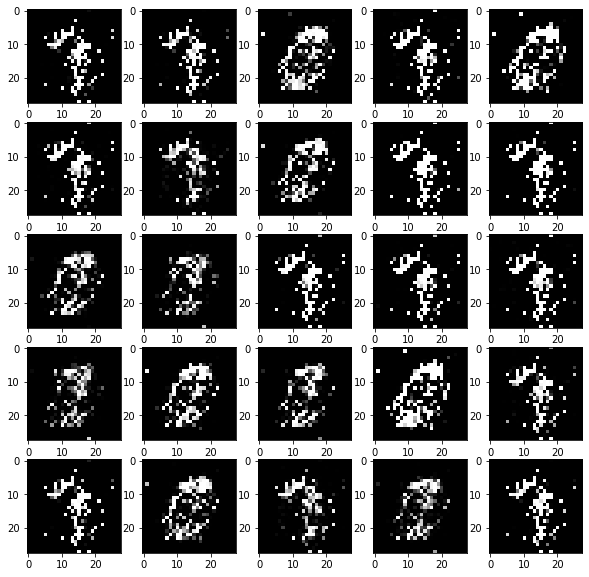

epochs 21


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 8ms/step


  0%|          | 1/273 [00:00<01:58,  2.30it/s]

4/4 [==============================] - 0s 10ms/step


  1%|          | 2/273 [00:00<02:03,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


  1%|          | 3/273 [00:01<01:57,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


  1%|▏         | 4/273 [00:01<01:53,  2.37it/s]

4/4 [==============================] - 0s 9ms/step


  2%|▏         | 5/273 [00:02<01:51,  2.41it/s]

4/4 [==============================] - 0s 9ms/step


  2%|▏         | 6/273 [00:02<01:51,  2.39it/s]

4/4 [==============================] - 0s 8ms/step


  3%|▎         | 7/273 [00:03<01:57,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


  3%|▎         | 8/273 [00:03<01:55,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


  3%|▎         | 9/273 [00:03<01:59,  2.20it/s]

4/4 [==============================] - 0s 12ms/step


  4%|▎         | 10/273 [00:04<02:08,  2.04it/s]

4/4 [==============================] - 0s 9ms/step


  4%|▍         | 11/273 [00:04<02:02,  2.13it/s]

4/4 [==============================] - 0s 8ms/step


  4%|▍         | 12/273 [00:05<02:05,  2.09it/s]

4/4 [==============================] - 0s 10ms/step


  5%|▍         | 13/273 [00:05<01:59,  2.18it/s]

4/4 [==============================] - 0s 16ms/step


  5%|▌         | 14/273 [00:06<02:00,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


  5%|▌         | 15/273 [00:06<01:56,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


  6%|▌         | 16/273 [00:07<02:03,  2.08it/s]

4/4 [==============================] - 0s 9ms/step


  6%|▌         | 17/273 [00:07<01:58,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


  7%|▋         | 18/273 [00:08<01:55,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


  7%|▋         | 19/273 [00:08<01:52,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


  7%|▋         | 20/273 [00:08<01:50,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 21/273 [00:09<01:47,  2.34it/s]

4/4 [==============================] - 0s 11ms/step


  8%|▊         | 22/273 [00:10<02:07,  1.96it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 23/273 [00:10<02:00,  2.07it/s]

4/4 [==============================] - 0s 9ms/step


  9%|▉         | 24/273 [00:10<01:55,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


  9%|▉         | 25/273 [00:11<01:50,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 10%|▉         | 26/273 [00:11<01:46,  2.31it/s]

4/4 [==============================] - 0s 8ms/step


 10%|▉         | 27/273 [00:12<01:46,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


 10%|█         | 28/273 [00:12<01:44,  2.34it/s]

4/4 [==============================] - 0s 9ms/step


 11%|█         | 29/273 [00:13<01:42,  2.38it/s]

4/4 [==============================] - 0s 9ms/step


 11%|█         | 30/273 [00:13<01:41,  2.41it/s]

4/4 [==============================] - 0s 9ms/step


 11%|█▏        | 31/273 [00:13<01:39,  2.43it/s]

4/4 [==============================] - 0s 11ms/step


 12%|█▏        | 32/273 [00:14<01:39,  2.41it/s]

4/4 [==============================] - 0s 8ms/step


 12%|█▏        | 33/273 [00:14<01:41,  2.36it/s]

4/4 [==============================] - 0s 8ms/step


 12%|█▏        | 34/273 [00:15<01:42,  2.34it/s]

4/4 [==============================] - 0s 9ms/step


 13%|█▎        | 35/273 [00:15<01:41,  2.33it/s]

4/4 [==============================] - 0s 8ms/step


 13%|█▎        | 36/273 [00:15<01:40,  2.35it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▎        | 37/273 [00:16<01:40,  2.35it/s]

4/4 [==============================] - 0s 8ms/step


 14%|█▍        | 38/273 [00:16<01:38,  2.38it/s]

4/4 [==============================] - 0s 11ms/step


 14%|█▍        | 39/273 [00:17<01:37,  2.40it/s]

4/4 [==============================] - 0s 10ms/step


 15%|█▍        | 40/273 [00:17<01:36,  2.42it/s]

4/4 [==============================] - 0s 9ms/step


 15%|█▌        | 41/273 [00:18<01:36,  2.41it/s]

4/4 [==============================] - 0s 8ms/step


 15%|█▌        | 42/273 [00:18<01:37,  2.37it/s]

4/4 [==============================] - 0s 10ms/step


 16%|█▌        | 43/273 [00:18<01:35,  2.40it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▌        | 44/273 [00:19<01:36,  2.37it/s]

4/4 [==============================] - 0s 8ms/step


 16%|█▋        | 45/273 [00:19<01:35,  2.38it/s]

4/4 [==============================] - 0s 9ms/step


 17%|█▋        | 46/273 [00:20<01:34,  2.39it/s]

4/4 [==============================] - 0s 9ms/step


 17%|█▋        | 47/273 [00:20<01:34,  2.39it/s]

4/4 [==============================] - 0s 9ms/step


 18%|█▊        | 48/273 [00:20<01:33,  2.40it/s]

4/4 [==============================] - 0s 9ms/step


 18%|█▊        | 49/273 [00:21<01:33,  2.39it/s]

4/4 [==============================] - 0s 8ms/step


 18%|█▊        | 50/273 [00:21<01:32,  2.41it/s]

4/4 [==============================] - 0s 8ms/step


 19%|█▊        | 51/273 [00:22<01:31,  2.42it/s]

4/4 [==============================] - 0s 12ms/step


 19%|█▉        | 52/273 [00:22<01:31,  2.43it/s]

4/4 [==============================] - 0s 9ms/step


 19%|█▉        | 53/273 [00:23<01:32,  2.38it/s]

4/4 [==============================] - 0s 9ms/step


 20%|█▉        | 54/273 [00:23<01:31,  2.40it/s]

4/4 [==============================] - 0s 9ms/step


 20%|██        | 55/273 [00:23<01:30,  2.41it/s]

4/4 [==============================] - 0s 8ms/step


 21%|██        | 56/273 [00:24<01:30,  2.40it/s]

4/4 [==============================] - 0s 11ms/step


 21%|██        | 57/273 [00:24<01:29,  2.40it/s]

4/4 [==============================] - 0s 9ms/step


 21%|██        | 58/273 [00:25<01:28,  2.44it/s]

4/4 [==============================] - 0s 9ms/step


 22%|██▏       | 59/273 [00:25<01:28,  2.41it/s]

4/4 [==============================] - 0s 9ms/step


 22%|██▏       | 60/273 [00:25<01:30,  2.35it/s]

4/4 [==============================] - 0s 13ms/step


 22%|██▏       | 61/273 [00:26<01:28,  2.39it/s]

4/4 [==============================] - 0s 10ms/step


 23%|██▎       | 62/273 [00:26<01:27,  2.41it/s]

4/4 [==============================] - 0s 8ms/step


 23%|██▎       | 63/273 [00:27<01:27,  2.41it/s]

4/4 [==============================] - 0s 8ms/step


 23%|██▎       | 64/273 [00:27<01:26,  2.43it/s]

4/4 [==============================] - 0s 11ms/step


 24%|██▍       | 65/273 [00:28<01:25,  2.42it/s]

4/4 [==============================] - 0s 9ms/step


 24%|██▍       | 66/273 [00:28<01:24,  2.45it/s]

4/4 [==============================] - 0s 9ms/step


 25%|██▍       | 67/273 [00:28<01:23,  2.45it/s]

4/4 [==============================] - 0s 8ms/step


 25%|██▍       | 68/273 [00:29<01:24,  2.44it/s]

4/4 [==============================] - 0s 8ms/step


 25%|██▌       | 69/273 [00:29<01:23,  2.44it/s]

4/4 [==============================] - 0s 11ms/step


 26%|██▌       | 70/273 [00:30<01:23,  2.42it/s]

4/4 [==============================] - 0s 12ms/step


 26%|██▌       | 71/273 [00:30<01:23,  2.42it/s]

4/4 [==============================] - 0s 8ms/step


 26%|██▋       | 72/273 [00:30<01:24,  2.39it/s]

4/4 [==============================] - 0s 9ms/step


 27%|██▋       | 73/273 [00:31<01:22,  2.43it/s]

4/4 [==============================] - 0s 9ms/step


 27%|██▋       | 74/273 [00:31<01:21,  2.44it/s]

4/4 [==============================] - 0s 10ms/step


 27%|██▋       | 75/273 [00:32<01:22,  2.40it/s]

4/4 [==============================] - 0s 9ms/step


 28%|██▊       | 76/273 [00:32<01:22,  2.40it/s]

4/4 [==============================] - 0s 8ms/step


 28%|██▊       | 77/273 [00:32<01:21,  2.40it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▊       | 78/273 [00:33<01:20,  2.42it/s]

4/4 [==============================] - 0s 8ms/step


 29%|██▉       | 79/273 [00:33<01:20,  2.40it/s]

4/4 [==============================] - 0s 8ms/step


 29%|██▉       | 80/273 [00:34<01:20,  2.40it/s]

4/4 [==============================] - 0s 8ms/step


 30%|██▉       | 81/273 [00:34<01:18,  2.46it/s]

4/4 [==============================] - 0s 8ms/step


 30%|███       | 82/273 [00:35<01:18,  2.43it/s]

4/4 [==============================] - 0s 9ms/step


 30%|███       | 83/273 [00:35<01:18,  2.41it/s]

4/4 [==============================] - 0s 11ms/step


 31%|███       | 84/273 [00:35<01:17,  2.44it/s]

4/4 [==============================] - 0s 11ms/step


 31%|███       | 85/273 [00:36<01:16,  2.44it/s]

4/4 [==============================] - 0s 10ms/step


 32%|███▏      | 86/273 [00:36<01:16,  2.44it/s]

4/4 [==============================] - 0s 9ms/step


 32%|███▏      | 87/273 [00:37<01:17,  2.40it/s]

4/4 [==============================] - 0s 10ms/step


 32%|███▏      | 88/273 [00:37<01:17,  2.40it/s]

4/4 [==============================] - 0s 9ms/step


 33%|███▎      | 89/273 [00:37<01:16,  2.41it/s]

4/4 [==============================] - 0s 8ms/step


 33%|███▎      | 90/273 [00:38<01:15,  2.43it/s]

4/4 [==============================] - 0s 10ms/step


 33%|███▎      | 91/273 [00:38<01:14,  2.45it/s]

4/4 [==============================] - 0s 8ms/step


 34%|███▎      | 92/273 [00:39<01:14,  2.41it/s]

4/4 [==============================] - 0s 8ms/step


 34%|███▍      | 93/273 [00:39<01:14,  2.41it/s]

4/4 [==============================] - 0s 8ms/step


 34%|███▍      | 94/273 [00:39<01:14,  2.42it/s]

4/4 [==============================] - 0s 9ms/step


 35%|███▍      | 95/273 [00:40<01:13,  2.43it/s]

4/4 [==============================] - 0s 8ms/step


 35%|███▌      | 96/273 [00:40<01:12,  2.43it/s]

4/4 [==============================] - 0s 8ms/step


 36%|███▌      | 97/273 [00:41<01:12,  2.42it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▌      | 98/273 [00:41<01:12,  2.42it/s]

4/4 [==============================] - 0s 10ms/step


 36%|███▋      | 99/273 [00:42<01:12,  2.42it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 100/273 [00:42<01:11,  2.43it/s]

4/4 [==============================] - 0s 10ms/step


 37%|███▋      | 101/273 [00:42<01:10,  2.43it/s]

4/4 [==============================] - 0s 11ms/step


 37%|███▋      | 102/273 [00:43<01:13,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


 38%|███▊      | 103/273 [00:43<01:15,  2.25it/s]

4/4 [==============================] - 0s 10ms/step


 38%|███▊      | 104/273 [00:44<01:14,  2.26it/s]

4/4 [==============================] - 0s 16ms/step


 38%|███▊      | 105/273 [00:44<01:16,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 39%|███▉      | 106/273 [00:45<01:14,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 39%|███▉      | 107/273 [00:45<01:16,  2.18it/s]

4/4 [==============================] - 0s 11ms/step


 40%|███▉      | 108/273 [00:46<01:18,  2.11it/s]

4/4 [==============================] - 0s 9ms/step


 40%|███▉      | 109/273 [00:46<01:17,  2.11it/s]

4/4 [==============================] - 0s 13ms/step


 40%|████      | 110/273 [00:47<01:16,  2.14it/s]

4/4 [==============================] - 0s 10ms/step


 41%|████      | 111/273 [00:47<01:16,  2.11it/s]

4/4 [==============================] - 0s 11ms/step


 41%|████      | 112/273 [00:48<01:15,  2.13it/s]

4/4 [==============================] - 0s 14ms/step


 41%|████▏     | 113/273 [00:48<01:19,  2.01it/s]

4/4 [==============================] - 0s 12ms/step


 42%|████▏     | 114/273 [00:49<01:20,  1.97it/s]

4/4 [==============================] - 0s 9ms/step


 42%|████▏     | 115/273 [00:49<01:21,  1.94it/s]

4/4 [==============================] - 0s 12ms/step


 42%|████▏     | 116/273 [00:50<01:25,  1.84it/s]

4/4 [==============================] - 0s 9ms/step


 43%|████▎     | 117/273 [00:50<01:20,  1.95it/s]

4/4 [==============================] - 0s 9ms/step


 43%|████▎     | 118/273 [00:51<01:17,  2.01it/s]

4/4 [==============================] - 0s 8ms/step


 44%|████▎     | 119/273 [00:51<01:13,  2.10it/s]

4/4 [==============================] - 0s 8ms/step


 44%|████▍     | 120/273 [00:52<01:08,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 44%|████▍     | 121/273 [00:52<01:08,  2.21it/s]

4/4 [==============================] - 0s 10ms/step


 45%|████▍     | 122/273 [00:52<01:08,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 45%|████▌     | 123/273 [00:53<01:05,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 45%|████▌     | 124/273 [00:53<01:03,  2.35it/s]

4/4 [==============================] - 0s 9ms/step


 46%|████▌     | 125/273 [00:54<01:01,  2.42it/s]

4/4 [==============================] - 0s 8ms/step


 46%|████▌     | 126/273 [00:54<01:01,  2.38it/s]

4/4 [==============================] - 0s 10ms/step


 47%|████▋     | 127/273 [00:54<01:01,  2.38it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 128/273 [00:55<01:00,  2.40it/s]

4/4 [==============================] - 0s 8ms/step


 47%|████▋     | 129/273 [00:55<01:01,  2.35it/s]

4/4 [==============================] - 0s 8ms/step


 48%|████▊     | 130/273 [00:56<01:00,  2.37it/s]

4/4 [==============================] - 0s 11ms/step


 48%|████▊     | 131/273 [00:56<00:59,  2.40it/s]

4/4 [==============================] - 0s 9ms/step


 48%|████▊     | 132/273 [00:57<00:58,  2.39it/s]

4/4 [==============================] - 0s 9ms/step


 49%|████▊     | 133/273 [00:57<01:01,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 49%|████▉     | 134/273 [00:57<00:59,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


 49%|████▉     | 135/273 [00:58<00:58,  2.34it/s]

4/4 [==============================] - 0s 8ms/step


 50%|████▉     | 136/273 [00:58<00:58,  2.35it/s]

4/4 [==============================] - 0s 9ms/step


 50%|█████     | 137/273 [00:59<00:57,  2.35it/s]

4/4 [==============================] - 0s 10ms/step


 51%|█████     | 138/273 [00:59<00:56,  2.38it/s]

4/4 [==============================] - 0s 11ms/step


 51%|█████     | 139/273 [01:00<00:56,  2.38it/s]

4/4 [==============================] - 0s 10ms/step


 51%|█████▏    | 140/273 [01:00<01:00,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 52%|█████▏    | 141/273 [01:01<00:59,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 142/273 [01:01<00:57,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 143/273 [01:01<00:55,  2.33it/s]

4/4 [==============================] - 0s 13ms/step


 53%|█████▎    | 144/273 [01:02<00:55,  2.34it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 145/273 [01:02<00:54,  2.37it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 146/273 [01:03<00:52,  2.40it/s]

4/4 [==============================] - 0s 8ms/step


 54%|█████▍    | 147/273 [01:03<00:52,  2.40it/s]

4/4 [==============================] - 0s 9ms/step


 54%|█████▍    | 148/273 [01:03<00:52,  2.38it/s]

4/4 [==============================] - 0s 10ms/step


 55%|█████▍    | 149/273 [01:04<00:51,  2.40it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▍    | 150/273 [01:04<00:49,  2.46it/s]

4/4 [==============================] - 0s 8ms/step


 55%|█████▌    | 151/273 [01:05<00:50,  2.44it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▌    | 152/273 [01:05<00:50,  2.39it/s]

4/4 [==============================] - 0s 10ms/step


 56%|█████▌    | 153/273 [01:05<00:49,  2.44it/s]

4/4 [==============================] - 0s 8ms/step


 56%|█████▋    | 154/273 [01:06<00:48,  2.44it/s]

4/4 [==============================] - 0s 9ms/step


 57%|█████▋    | 155/273 [01:06<00:48,  2.44it/s]

4/4 [==============================] - 0s 10ms/step


 57%|█████▋    | 156/273 [01:07<00:49,  2.39it/s]

4/4 [==============================] - 0s 9ms/step


 58%|█████▊    | 157/273 [01:07<00:48,  2.39it/s]

4/4 [==============================] - 0s 10ms/step


 58%|█████▊    | 158/273 [01:08<00:47,  2.42it/s]

4/4 [==============================] - 0s 8ms/step


 58%|█████▊    | 159/273 [01:08<00:46,  2.43it/s]

4/4 [==============================] - 0s 8ms/step


 59%|█████▊    | 160/273 [01:08<00:47,  2.38it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▉    | 161/273 [01:09<00:47,  2.37it/s]

4/4 [==============================] - 0s 8ms/step


 59%|█████▉    | 162/273 [01:09<00:46,  2.40it/s]

4/4 [==============================] - 0s 8ms/step


 60%|█████▉    | 163/273 [01:10<00:46,  2.35it/s]

4/4 [==============================] - 0s 9ms/step


 60%|██████    | 164/273 [01:10<00:46,  2.35it/s]

4/4 [==============================] - 0s 9ms/step


 60%|██████    | 165/273 [01:10<00:45,  2.38it/s]

4/4 [==============================] - 0s 11ms/step


 61%|██████    | 166/273 [01:11<00:45,  2.34it/s]

4/4 [==============================] - 0s 9ms/step


 61%|██████    | 167/273 [01:11<00:44,  2.37it/s]

4/4 [==============================] - 0s 9ms/step


 62%|██████▏   | 168/273 [01:12<00:43,  2.39it/s]

4/4 [==============================] - 0s 8ms/step


 62%|██████▏   | 169/273 [01:12<00:43,  2.39it/s]

4/4 [==============================] - 0s 9ms/step


 62%|██████▏   | 170/273 [01:13<00:43,  2.34it/s]

4/4 [==============================] - 0s 9ms/step


 63%|██████▎   | 171/273 [01:13<00:43,  2.34it/s]

4/4 [==============================] - 0s 9ms/step


 63%|██████▎   | 172/273 [01:13<00:42,  2.38it/s]

4/4 [==============================] - 0s 8ms/step


 63%|██████▎   | 173/273 [01:14<00:42,  2.37it/s]

4/4 [==============================] - 0s 9ms/step


 64%|██████▎   | 174/273 [01:14<00:41,  2.41it/s]

4/4 [==============================] - 0s 9ms/step


 64%|██████▍   | 175/273 [01:15<00:40,  2.42it/s]

4/4 [==============================] - 0s 8ms/step


 64%|██████▍   | 176/273 [01:15<00:40,  2.42it/s]

4/4 [==============================] - 0s 9ms/step


 65%|██████▍   | 177/273 [01:16<00:39,  2.41it/s]

4/4 [==============================] - 0s 8ms/step


 65%|██████▌   | 178/273 [01:16<00:39,  2.42it/s]

4/4 [==============================] - 0s 8ms/step


 66%|██████▌   | 179/273 [01:16<00:38,  2.42it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▌   | 180/273 [01:17<00:37,  2.45it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▋   | 181/273 [01:17<00:37,  2.45it/s]

4/4 [==============================] - 0s 9ms/step


 67%|██████▋   | 182/273 [01:18<00:37,  2.41it/s]

4/4 [==============================] - 0s 9ms/step


 67%|██████▋   | 183/273 [01:18<00:36,  2.45it/s]

4/4 [==============================] - 0s 9ms/step


 67%|██████▋   | 184/273 [01:18<00:37,  2.39it/s]

4/4 [==============================] - 0s 10ms/step


 68%|██████▊   | 185/273 [01:19<00:36,  2.41it/s]

4/4 [==============================] - 0s 8ms/step


 68%|██████▊   | 186/273 [01:19<00:36,  2.40it/s]

4/4 [==============================] - 0s 8ms/step


 68%|██████▊   | 187/273 [01:20<00:35,  2.44it/s]

4/4 [==============================] - 0s 10ms/step


 69%|██████▉   | 188/273 [01:20<00:35,  2.42it/s]

4/4 [==============================] - 0s 10ms/step


 69%|██████▉   | 189/273 [01:21<00:35,  2.34it/s]

4/4 [==============================] - 0s 8ms/step


 70%|██████▉   | 190/273 [01:21<00:35,  2.35it/s]

4/4 [==============================] - 0s 8ms/step


 70%|██████▉   | 191/273 [01:21<00:34,  2.36it/s]

4/4 [==============================] - 0s 8ms/step


 70%|███████   | 192/273 [01:22<00:34,  2.37it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████   | 193/273 [01:22<00:34,  2.31it/s]

4/4 [==============================] - 0s 8ms/step


 71%|███████   | 194/273 [01:23<00:33,  2.36it/s]

4/4 [==============================] - 0s 11ms/step


 71%|███████▏  | 195/273 [01:23<00:33,  2.36it/s]

4/4 [==============================] - 0s 9ms/step


 72%|███████▏  | 196/273 [01:23<00:32,  2.39it/s]

4/4 [==============================] - 0s 9ms/step


 72%|███████▏  | 197/273 [01:24<00:31,  2.39it/s]

4/4 [==============================] - 0s 8ms/step


 73%|███████▎  | 198/273 [01:24<00:31,  2.36it/s]

4/4 [==============================] - 0s 9ms/step


 73%|███████▎  | 199/273 [01:25<00:31,  2.35it/s]

4/4 [==============================] - 0s 12ms/step


 73%|███████▎  | 200/273 [01:25<00:31,  2.34it/s]

4/4 [==============================] - 0s 10ms/step


 74%|███████▎  | 201/273 [01:26<00:30,  2.34it/s]

4/4 [==============================] - 0s 11ms/step


 74%|███████▍  | 202/273 [01:26<00:32,  2.18it/s]

4/4 [==============================] - 0s 11ms/step


 74%|███████▍  | 203/273 [01:27<00:33,  2.06it/s]

4/4 [==============================] - 0s 15ms/step


 75%|███████▍  | 204/273 [01:27<00:38,  1.82it/s]

4/4 [==============================] - 0s 10ms/step


 75%|███████▌  | 205/273 [01:28<00:36,  1.88it/s]

4/4 [==============================] - 0s 10ms/step


 75%|███████▌  | 206/273 [01:28<00:35,  1.89it/s]

4/4 [==============================] - 0s 9ms/step


 76%|███████▌  | 207/273 [01:29<00:34,  1.93it/s]

4/4 [==============================] - 0s 13ms/step


 76%|███████▌  | 208/273 [01:29<00:33,  1.92it/s]

4/4 [==============================] - 0s 11ms/step


 77%|███████▋  | 209/273 [01:30<00:35,  1.82it/s]

4/4 [==============================] - 0s 10ms/step


 77%|███████▋  | 210/273 [01:31<00:33,  1.89it/s]

4/4 [==============================] - 0s 14ms/step


 77%|███████▋  | 211/273 [01:31<00:31,  1.98it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 212/273 [01:31<00:30,  1.99it/s]

4/4 [==============================] - 0s 11ms/step


 78%|███████▊  | 213/273 [01:32<00:29,  2.05it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 214/273 [01:32<00:27,  2.14it/s]

4/4 [==============================] - 0s 10ms/step


 79%|███████▉  | 215/273 [01:33<00:26,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 79%|███████▉  | 216/273 [01:33<00:25,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 79%|███████▉  | 217/273 [01:34<00:24,  2.26it/s]

4/4 [==============================] - 0s 11ms/step


 80%|███████▉  | 218/273 [01:34<00:23,  2.32it/s]

4/4 [==============================] - 0s 8ms/step


 80%|████████  | 219/273 [01:34<00:22,  2.36it/s]

4/4 [==============================] - 0s 9ms/step


 81%|████████  | 220/273 [01:35<00:22,  2.33it/s]

4/4 [==============================] - 0s 10ms/step


 81%|████████  | 221/273 [01:35<00:21,  2.37it/s]

4/4 [==============================] - 0s 11ms/step


 81%|████████▏ | 222/273 [01:36<00:21,  2.35it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 223/273 [01:36<00:20,  2.39it/s]

4/4 [==============================] - 0s 11ms/step


 82%|████████▏ | 224/273 [01:37<00:20,  2.43it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 225/273 [01:37<00:20,  2.36it/s]

4/4 [==============================] - 0s 9ms/step


 83%|████████▎ | 226/273 [01:37<00:19,  2.37it/s]

4/4 [==============================] - 0s 10ms/step


 83%|████████▎ | 227/273 [01:38<00:19,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▎ | 228/273 [01:38<00:18,  2.38it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▍ | 229/273 [01:39<00:18,  2.41it/s]

4/4 [==============================] - 0s 10ms/step


 84%|████████▍ | 230/273 [01:39<00:17,  2.43it/s]

4/4 [==============================] - 0s 8ms/step


 85%|████████▍ | 231/273 [01:39<00:17,  2.41it/s]

4/4 [==============================] - 0s 8ms/step


 85%|████████▍ | 232/273 [01:40<00:17,  2.35it/s]

4/4 [==============================] - 0s 8ms/step


 85%|████████▌ | 233/273 [01:40<00:16,  2.38it/s]

4/4 [==============================] - 0s 10ms/step


 86%|████████▌ | 234/273 [01:41<00:16,  2.39it/s]

4/4 [==============================] - 0s 10ms/step


 86%|████████▌ | 235/273 [01:41<00:16,  2.37it/s]

4/4 [==============================] - 0s 8ms/step


 86%|████████▋ | 236/273 [01:42<00:15,  2.39it/s]

4/4 [==============================] - 0s 9ms/step


 87%|████████▋ | 237/273 [01:42<00:15,  2.31it/s]

4/4 [==============================] - 0s 8ms/step


 87%|████████▋ | 238/273 [01:42<00:14,  2.35it/s]

4/4 [==============================] - 0s 9ms/step


 88%|████████▊ | 239/273 [01:43<00:14,  2.34it/s]

4/4 [==============================] - 0s 11ms/step


 88%|████████▊ | 240/273 [01:43<00:13,  2.38it/s]

4/4 [==============================] - 0s 9ms/step


 88%|████████▊ | 241/273 [01:44<00:13,  2.41it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▊ | 242/273 [01:44<00:13,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▉ | 243/273 [01:45<00:14,  2.11it/s]

4/4 [==============================] - 0s 8ms/step


 89%|████████▉ | 244/273 [01:45<00:13,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 90%|████████▉ | 245/273 [01:46<00:12,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 90%|█████████ | 246/273 [01:46<00:11,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


 90%|█████████ | 247/273 [01:46<00:11,  2.34it/s]

4/4 [==============================] - 0s 10ms/step


 91%|█████████ | 248/273 [01:47<00:10,  2.36it/s]

4/4 [==============================] - 0s 10ms/step


 91%|█████████ | 249/273 [01:47<00:10,  2.33it/s]

4/4 [==============================] - 0s 11ms/step


 92%|█████████▏| 250/273 [01:48<00:09,  2.34it/s]

4/4 [==============================] - 0s 9ms/step


 92%|█████████▏| 251/273 [01:48<00:09,  2.34it/s]

4/4 [==============================] - 0s 9ms/step


 92%|█████████▏| 252/273 [01:49<00:08,  2.37it/s]

4/4 [==============================] - 0s 9ms/step


 93%|█████████▎| 253/273 [01:49<00:08,  2.36it/s]

4/4 [==============================] - 0s 9ms/step


 93%|█████████▎| 254/273 [01:49<00:08,  2.34it/s]

4/4 [==============================] - 0s 10ms/step


 93%|█████████▎| 255/273 [01:50<00:07,  2.35it/s]

4/4 [==============================] - 0s 9ms/step


 94%|█████████▍| 256/273 [01:50<00:07,  2.36it/s]

4/4 [==============================] - 0s 10ms/step


 94%|█████████▍| 257/273 [01:51<00:06,  2.38it/s]

4/4 [==============================] - 0s 8ms/step


 95%|█████████▍| 258/273 [01:51<00:06,  2.39it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▍| 259/273 [01:51<00:05,  2.41it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▌| 260/273 [01:52<00:05,  2.39it/s]

4/4 [==============================] - 0s 9ms/step


 96%|█████████▌| 261/273 [01:52<00:04,  2.40it/s]

4/4 [==============================] - 0s 10ms/step


 96%|█████████▌| 262/273 [01:53<00:04,  2.32it/s]

4/4 [==============================] - 0s 8ms/step


 96%|█████████▋| 263/273 [01:53<00:04,  2.36it/s]

4/4 [==============================] - 0s 8ms/step


 97%|█████████▋| 264/273 [01:54<00:03,  2.38it/s]

4/4 [==============================] - 0s 10ms/step


 97%|█████████▋| 265/273 [01:54<00:03,  2.40it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 266/273 [01:54<00:02,  2.42it/s]

4/4 [==============================] - 0s 9ms/step


 98%|█████████▊| 267/273 [01:55<00:02,  2.38it/s]

4/4 [==============================] - 0s 9ms/step


 98%|█████████▊| 268/273 [01:55<00:02,  2.41it/s]

4/4 [==============================] - 0s 10ms/step


 99%|█████████▊| 269/273 [01:56<00:01,  2.38it/s]

4/4 [==============================] - 0s 12ms/step


 99%|█████████▉| 270/273 [01:56<00:01,  2.37it/s]

4/4 [==============================] - 0s 9ms/step


 99%|█████████▉| 271/273 [01:56<00:00,  2.37it/s]

4/4 [==============================] - 0s 8ms/step


100%|█████████▉| 272/273 [01:57<00:00,  2.37it/s]

4/4 [==============================] - 0s 9ms/step


100%|██████████| 273/273 [01:57<00:00,  2.32it/s]


loss is 0.00078675925033167 |*| 12.946258544921875
1/1 [==============================] - 0s 31ms/step


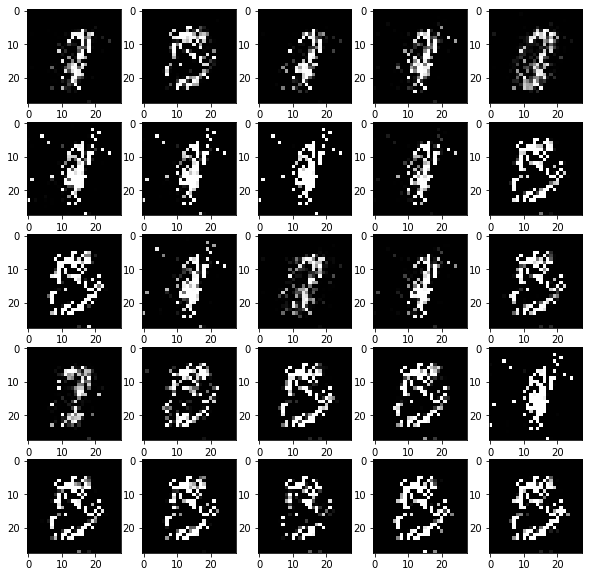

epochs 22


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 10ms/step


  0%|          | 1/273 [00:00<01:52,  2.42it/s]

4/4 [==============================] - 0s 10ms/step


  1%|          | 2/273 [00:00<01:52,  2.41it/s]

4/4 [==============================] - 0s 9ms/step


  1%|          | 3/273 [00:01<02:02,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


  1%|▏         | 4/273 [00:01<02:02,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


  2%|▏         | 5/273 [00:02<02:02,  2.19it/s]

4/4 [==============================] - 0s 10ms/step


  2%|▏         | 6/273 [00:02<02:03,  2.16it/s]

4/4 [==============================] - 0s 10ms/step


  3%|▎         | 7/273 [00:03<01:58,  2.25it/s]

4/4 [==============================] - 0s 10ms/step


  3%|▎         | 8/273 [00:03<02:00,  2.20it/s]

4/4 [==============================] - 0s 11ms/step


  3%|▎         | 9/273 [00:04<02:01,  2.17it/s]

4/4 [==============================] - 0s 10ms/step


  4%|▎         | 10/273 [00:04<02:00,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


  4%|▍         | 11/273 [00:04<01:58,  2.22it/s]

4/4 [==============================] - 0s 10ms/step


  4%|▍         | 12/273 [00:05<02:00,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


  5%|▍         | 13/273 [00:05<01:54,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


  5%|▌         | 14/273 [00:06<01:54,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


  5%|▌         | 15/273 [00:06<01:50,  2.33it/s]

4/4 [==============================] - 0s 8ms/step


  6%|▌         | 16/273 [00:07<01:49,  2.35it/s]

4/4 [==============================] - 0s 9ms/step


  6%|▌         | 17/273 [00:07<01:48,  2.36it/s]

4/4 [==============================] - 0s 9ms/step


  7%|▋         | 18/273 [00:07<01:46,  2.40it/s]

4/4 [==============================] - 0s 12ms/step


  7%|▋         | 19/273 [00:08<01:49,  2.32it/s]

4/4 [==============================] - 0s 8ms/step


  7%|▋         | 20/273 [00:08<01:49,  2.30it/s]

4/4 [==============================] - 0s 8ms/step


  8%|▊         | 21/273 [00:09<01:48,  2.33it/s]

4/4 [==============================] - 0s 10ms/step


  8%|▊         | 22/273 [00:09<01:45,  2.37it/s]

4/4 [==============================] - 0s 10ms/step


  8%|▊         | 23/273 [00:10<01:46,  2.35it/s]

4/4 [==============================] - 0s 10ms/step


  9%|▉         | 24/273 [00:10<01:49,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


  9%|▉         | 25/273 [00:11<01:53,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 10%|▉         | 26/273 [00:11<01:54,  2.17it/s]

4/4 [==============================] - 0s 14ms/step


 10%|▉         | 27/273 [00:11<01:53,  2.17it/s]

4/4 [==============================] - 0s 10ms/step


 10%|█         | 28/273 [00:12<01:49,  2.23it/s]

4/4 [==============================] - 0s 10ms/step


 11%|█         | 29/273 [00:12<01:48,  2.25it/s]

4/4 [==============================] - 0s 10ms/step


 11%|█         | 30/273 [00:13<01:47,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 11%|█▏        | 31/273 [00:13<01:44,  2.32it/s]

4/4 [==============================] - 0s 11ms/step


 12%|█▏        | 32/273 [00:14<01:45,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 12%|█▏        | 33/273 [00:14<01:43,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 12%|█▏        | 34/273 [00:14<01:43,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 13%|█▎        | 35/273 [00:15<01:41,  2.35it/s]

4/4 [==============================] - 0s 9ms/step


 13%|█▎        | 36/273 [00:15<01:39,  2.38it/s]

4/4 [==============================] - 0s 10ms/step


 14%|█▎        | 37/273 [00:16<01:38,  2.40it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▍        | 38/273 [00:16<01:36,  2.43it/s]

4/4 [==============================] - 0s 8ms/step


 14%|█▍        | 39/273 [00:17<01:34,  2.46it/s]

4/4 [==============================] - 0s 9ms/step


 15%|█▍        | 40/273 [00:17<01:34,  2.46it/s]

4/4 [==============================] - 0s 10ms/step


 15%|█▌        | 41/273 [00:17<01:37,  2.38it/s]

4/4 [==============================] - 0s 11ms/step


 15%|█▌        | 42/273 [00:18<01:37,  2.36it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▌        | 43/273 [00:18<01:36,  2.38it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▌        | 44/273 [00:19<01:36,  2.36it/s]

4/4 [==============================] - 0s 10ms/step


 16%|█▋        | 45/273 [00:19<01:36,  2.37it/s]

4/4 [==============================] - 0s 12ms/step


 17%|█▋        | 46/273 [00:20<01:36,  2.34it/s]

4/4 [==============================] - 0s 9ms/step


 17%|█▋        | 47/273 [00:20<01:37,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 18%|█▊        | 48/273 [00:20<01:34,  2.38it/s]

4/4 [==============================] - 0s 10ms/step


 18%|█▊        | 49/273 [00:21<01:36,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 18%|█▊        | 50/273 [00:21<01:35,  2.34it/s]

4/4 [==============================] - 0s 8ms/step


 19%|█▊        | 51/273 [00:22<01:34,  2.34it/s]

4/4 [==============================] - 0s 9ms/step


 19%|█▉        | 52/273 [00:22<01:32,  2.39it/s]

4/4 [==============================] - 0s 9ms/step


 19%|█▉        | 53/273 [00:22<01:31,  2.41it/s]

4/4 [==============================] - 0s 9ms/step


 20%|█▉        | 54/273 [00:23<01:32,  2.36it/s]

4/4 [==============================] - 0s 8ms/step


 20%|██        | 55/273 [00:23<01:31,  2.39it/s]

4/4 [==============================] - 0s 8ms/step


 21%|██        | 56/273 [00:24<01:30,  2.39it/s]

4/4 [==============================] - 0s 13ms/step


 21%|██        | 57/273 [00:24<01:32,  2.34it/s]

4/4 [==============================] - 0s 9ms/step


 21%|██        | 58/273 [00:25<01:31,  2.36it/s]

4/4 [==============================] - 0s 8ms/step


 22%|██▏       | 59/273 [00:25<01:28,  2.41it/s]

4/4 [==============================] - 0s 8ms/step


 22%|██▏       | 60/273 [00:26<01:36,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 22%|██▏       | 61/273 [00:26<01:32,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 23%|██▎       | 62/273 [00:26<01:30,  2.34it/s]

4/4 [==============================] - 0s 9ms/step


 23%|██▎       | 63/273 [00:27<01:28,  2.37it/s]

4/4 [==============================] - 0s 10ms/step


 23%|██▎       | 64/273 [00:27<01:31,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 24%|██▍       | 65/273 [00:28<01:28,  2.34it/s]

4/4 [==============================] - 0s 8ms/step


 24%|██▍       | 66/273 [00:28<01:30,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 25%|██▍       | 67/273 [00:28<01:29,  2.31it/s]

4/4 [==============================] - 0s 10ms/step


 25%|██▍       | 68/273 [00:29<01:28,  2.32it/s]

4/4 [==============================] - 0s 13ms/step


 25%|██▌       | 69/273 [00:29<01:28,  2.32it/s]

4/4 [==============================] - 0s 8ms/step


 26%|██▌       | 70/273 [00:30<01:27,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 26%|██▌       | 71/273 [00:30<01:26,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


 26%|██▋       | 72/273 [00:31<01:25,  2.36it/s]

4/4 [==============================] - 0s 9ms/step


 27%|██▋       | 73/273 [00:31<01:24,  2.38it/s]

4/4 [==============================] - 0s 8ms/step


 27%|██▋       | 74/273 [00:31<01:23,  2.38it/s]

4/4 [==============================] - 0s 9ms/step


 27%|██▋       | 75/273 [00:32<01:23,  2.38it/s]

4/4 [==============================] - 0s 9ms/step


 28%|██▊       | 76/273 [00:32<01:22,  2.39it/s]

4/4 [==============================] - 0s 9ms/step


 28%|██▊       | 77/273 [00:33<01:22,  2.39it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▊       | 78/273 [00:33<01:21,  2.38it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▉       | 79/273 [00:34<01:20,  2.40it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▉       | 80/273 [00:34<01:29,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 30%|██▉       | 81/273 [00:35<01:25,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 30%|███       | 82/273 [00:35<01:24,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 30%|███       | 83/273 [00:35<01:21,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


 31%|███       | 84/273 [00:36<01:20,  2.35it/s]

4/4 [==============================] - 0s 9ms/step


 31%|███       | 85/273 [00:36<01:20,  2.34it/s]

4/4 [==============================] - 0s 9ms/step


 32%|███▏      | 86/273 [00:37<01:17,  2.40it/s]

4/4 [==============================] - 0s 9ms/step


 32%|███▏      | 87/273 [00:37<01:17,  2.39it/s]

4/4 [==============================] - 0s 12ms/step


 32%|███▏      | 88/273 [00:37<01:17,  2.37it/s]

4/4 [==============================] - 0s 8ms/step


 33%|███▎      | 89/273 [00:38<01:16,  2.41it/s]

4/4 [==============================] - 0s 10ms/step


 33%|███▎      | 90/273 [00:38<01:15,  2.42it/s]

4/4 [==============================] - 0s 9ms/step


 33%|███▎      | 91/273 [00:39<01:15,  2.42it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▎      | 92/273 [00:39<01:15,  2.39it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▍      | 93/273 [00:39<01:14,  2.41it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▍      | 94/273 [00:40<01:13,  2.45it/s]

4/4 [==============================] - 0s 9ms/step


 35%|███▍      | 95/273 [00:40<01:14,  2.40it/s]

4/4 [==============================] - 0s 11ms/step


 35%|███▌      | 96/273 [00:41<01:14,  2.38it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▌      | 97/273 [00:41<01:12,  2.42it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▌      | 98/273 [00:42<01:11,  2.44it/s]

4/4 [==============================] - 0s 10ms/step


 36%|███▋      | 99/273 [00:42<01:10,  2.46it/s]

4/4 [==============================] - 0s 8ms/step


 37%|███▋      | 100/273 [00:42<01:11,  2.43it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 101/273 [00:43<01:10,  2.45it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 102/273 [00:43<01:11,  2.38it/s]

4/4 [==============================] - 0s 9ms/step


 38%|███▊      | 103/273 [00:44<01:12,  2.35it/s]

4/4 [==============================] - 0s 8ms/step


 38%|███▊      | 104/273 [00:44<01:10,  2.40it/s]

4/4 [==============================] - 0s 8ms/step


 38%|███▊      | 105/273 [00:44<01:10,  2.39it/s]

4/4 [==============================] - 0s 9ms/step


 39%|███▉      | 106/273 [00:45<01:10,  2.38it/s]

4/4 [==============================] - 0s 9ms/step


 39%|███▉      | 107/273 [00:45<01:10,  2.35it/s]

4/4 [==============================] - 0s 9ms/step


 40%|███▉      | 108/273 [00:46<01:10,  2.34it/s]

4/4 [==============================] - 0s 8ms/step


 40%|███▉      | 109/273 [00:46<01:08,  2.40it/s]

4/4 [==============================] - 0s 9ms/step


 40%|████      | 110/273 [00:47<01:09,  2.34it/s]

4/4 [==============================] - 0s 10ms/step


 41%|████      | 111/273 [00:47<01:09,  2.34it/s]

4/4 [==============================] - 0s 9ms/step


 41%|████      | 112/273 [00:47<01:08,  2.37it/s]

4/4 [==============================] - 0s 8ms/step


 41%|████▏     | 113/273 [00:48<01:06,  2.39it/s]

4/4 [==============================] - 0s 9ms/step


 42%|████▏     | 114/273 [00:48<01:07,  2.37it/s]

4/4 [==============================] - 0s 10ms/step


 42%|████▏     | 115/273 [00:49<01:06,  2.39it/s]

4/4 [==============================] - 0s 12ms/step


 42%|████▏     | 116/273 [00:49<01:05,  2.39it/s]

4/4 [==============================] - 0s 10ms/step


 43%|████▎     | 117/273 [00:50<01:04,  2.40it/s]

4/4 [==============================] - 0s 9ms/step


 43%|████▎     | 118/273 [00:50<01:05,  2.35it/s]

4/4 [==============================] - 0s 9ms/step


 44%|████▎     | 119/273 [00:50<01:03,  2.41it/s]

4/4 [==============================] - 0s 11ms/step


 44%|████▍     | 120/273 [00:51<01:04,  2.37it/s]

4/4 [==============================] - 0s 12ms/step


 44%|████▍     | 121/273 [00:51<01:03,  2.40it/s]

4/4 [==============================] - 0s 9ms/step


 45%|████▍     | 122/273 [00:52<01:03,  2.37it/s]

4/4 [==============================] - 0s 9ms/step


 45%|████▌     | 123/273 [00:52<01:03,  2.36it/s]

4/4 [==============================] - 0s 9ms/step


 45%|████▌     | 124/273 [00:53<01:03,  2.36it/s]

4/4 [==============================] - 0s 12ms/step


 46%|████▌     | 125/273 [00:53<01:03,  2.34it/s]

4/4 [==============================] - 0s 9ms/step


 46%|████▌     | 126/273 [00:53<01:02,  2.36it/s]

4/4 [==============================] - 0s 7ms/step


 47%|████▋     | 127/273 [00:54<01:01,  2.38it/s]

4/4 [==============================] - 0s 8ms/step


 47%|████▋     | 128/273 [00:54<01:01,  2.37it/s]

4/4 [==============================] - 0s 10ms/step


 47%|████▋     | 129/273 [00:55<01:01,  2.34it/s]

4/4 [==============================] - 0s 8ms/step


 48%|████▊     | 130/273 [00:55<01:00,  2.35it/s]

4/4 [==============================] - 0s 9ms/step


 48%|████▊     | 131/273 [00:55<01:00,  2.35it/s]

4/4 [==============================] - 0s 8ms/step


 48%|████▊     | 132/273 [00:56<00:59,  2.35it/s]

4/4 [==============================] - 0s 9ms/step


 49%|████▊     | 133/273 [00:56<01:00,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 49%|████▉     | 134/273 [00:57<00:59,  2.33it/s]

4/4 [==============================] - 0s 8ms/step


 49%|████▉     | 135/273 [00:57<00:58,  2.36it/s]

4/4 [==============================] - 0s 10ms/step


 50%|████▉     | 136/273 [00:58<00:58,  2.34it/s]

4/4 [==============================] - 0s 10ms/step


 50%|█████     | 137/273 [00:58<00:56,  2.39it/s]

4/4 [==============================] - 0s 9ms/step


 51%|█████     | 138/273 [00:58<00:57,  2.36it/s]

4/4 [==============================] - 0s 7ms/step


 51%|█████     | 139/273 [00:59<00:56,  2.36it/s]

4/4 [==============================] - 0s 8ms/step


 51%|█████▏    | 140/273 [00:59<00:56,  2.36it/s]

4/4 [==============================] - 0s 8ms/step


 52%|█████▏    | 141/273 [01:00<00:55,  2.37it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 142/273 [01:00<00:55,  2.37it/s]

4/4 [==============================] - 0s 13ms/step


 52%|█████▏    | 143/273 [01:01<00:54,  2.37it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 144/273 [01:01<00:54,  2.37it/s]

4/4 [==============================] - 0s 10ms/step


 53%|█████▎    | 145/273 [01:01<00:54,  2.34it/s]

4/4 [==============================] - 0s 10ms/step


 53%|█████▎    | 146/273 [01:02<00:54,  2.35it/s]

4/4 [==============================] - 0s 9ms/step


 54%|█████▍    | 147/273 [01:02<00:53,  2.36it/s]

4/4 [==============================] - 0s 9ms/step


 54%|█████▍    | 148/273 [01:03<00:53,  2.35it/s]

4/4 [==============================] - 0s 11ms/step


 55%|█████▍    | 149/273 [01:03<00:52,  2.38it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▍    | 150/273 [01:04<00:52,  2.35it/s]

4/4 [==============================] - 0s 8ms/step


 55%|█████▌    | 151/273 [01:04<00:52,  2.34it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▌    | 152/273 [01:04<00:51,  2.36it/s]

4/4 [==============================] - 0s 8ms/step


 56%|█████▌    | 153/273 [01:05<00:50,  2.38it/s]

4/4 [==============================] - 0s 8ms/step


 56%|█████▋    | 154/273 [01:05<00:49,  2.41it/s]

4/4 [==============================] - 0s 9ms/step


 57%|█████▋    | 155/273 [01:06<00:49,  2.38it/s]

4/4 [==============================] - 0s 8ms/step


 57%|█████▋    | 156/273 [01:06<00:49,  2.37it/s]

4/4 [==============================] - 0s 10ms/step


 58%|█████▊    | 157/273 [01:07<00:49,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 58%|█████▊    | 158/273 [01:07<00:49,  2.32it/s]

4/4 [==============================] - 0s 10ms/step


 58%|█████▊    | 159/273 [01:07<00:49,  2.30it/s]

4/4 [==============================] - 0s 11ms/step


 59%|█████▊    | 160/273 [01:08<00:50,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▉    | 161/273 [01:08<00:50,  2.23it/s]

4/4 [==============================] - 0s 16ms/step


 59%|█████▉    | 162/273 [01:09<00:51,  2.15it/s]

4/4 [==============================] - 0s 10ms/step


 60%|█████▉    | 163/273 [01:09<00:52,  2.11it/s]

4/4 [==============================] - 0s 9ms/step


 60%|██████    | 164/273 [01:10<00:54,  1.99it/s]

4/4 [==============================] - 0s 12ms/step


 60%|██████    | 165/273 [01:10<00:54,  1.98it/s]

4/4 [==============================] - 0s 11ms/step


 61%|██████    | 166/273 [01:11<00:53,  2.02it/s]

4/4 [==============================] - 0s 11ms/step


 61%|██████    | 167/273 [01:11<00:52,  2.03it/s]

4/4 [==============================] - 0s 12ms/step


 62%|██████▏   | 168/273 [01:12<00:53,  1.98it/s]

4/4 [==============================] - 0s 9ms/step


 62%|██████▏   | 169/273 [01:12<00:50,  2.05it/s]

4/4 [==============================] - 0s 9ms/step


 62%|██████▏   | 170/273 [01:13<00:48,  2.13it/s]

4/4 [==============================] - 0s 10ms/step


 63%|██████▎   | 171/273 [01:13<00:47,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 63%|██████▎   | 172/273 [01:14<00:47,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 63%|██████▎   | 173/273 [01:14<00:44,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 64%|██████▎   | 174/273 [01:15<00:43,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 64%|██████▍   | 175/273 [01:15<00:44,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 64%|██████▍   | 176/273 [01:15<00:44,  2.18it/s]

4/4 [==============================] - 0s 12ms/step


 65%|██████▍   | 177/273 [01:16<00:44,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 65%|██████▌   | 178/273 [01:16<00:42,  2.25it/s]

4/4 [==============================] - 0s 10ms/step


 66%|██████▌   | 179/273 [01:17<00:41,  2.25it/s]

4/4 [==============================] - 0s 10ms/step


 66%|██████▌   | 180/273 [01:17<00:41,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▋   | 181/273 [01:18<00:40,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 67%|██████▋   | 182/273 [01:18<00:40,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 67%|██████▋   | 183/273 [01:19<00:41,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 67%|██████▋   | 184/273 [01:19<00:40,  2.18it/s]

4/4 [==============================] - 0s 10ms/step


 68%|██████▊   | 185/273 [01:19<00:38,  2.26it/s]

4/4 [==============================] - 0s 11ms/step


 68%|██████▊   | 186/273 [01:20<00:37,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 68%|██████▊   | 187/273 [01:20<00:37,  2.32it/s]

4/4 [==============================] - 0s 8ms/step


 69%|██████▉   | 188/273 [01:21<00:37,  2.25it/s]

4/4 [==============================] - 0s 10ms/step


 69%|██████▉   | 189/273 [01:21<00:36,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 70%|██████▉   | 190/273 [01:22<00:35,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 70%|██████▉   | 191/273 [01:22<00:35,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 70%|███████   | 192/273 [01:22<00:34,  2.35it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████   | 193/273 [01:23<00:34,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████   | 194/273 [01:23<00:33,  2.37it/s]

4/4 [==============================] - 0s 12ms/step


 71%|███████▏  | 195/273 [01:24<00:32,  2.39it/s]

4/4 [==============================] - 0s 9ms/step


 72%|███████▏  | 196/273 [01:24<00:32,  2.41it/s]

4/4 [==============================] - 0s 13ms/step


 72%|███████▏  | 197/273 [01:25<00:33,  2.29it/s]

4/4 [==============================] - 0s 10ms/step


 73%|███████▎  | 198/273 [01:25<00:32,  2.32it/s]

4/4 [==============================] - 0s 8ms/step


 73%|███████▎  | 199/273 [01:25<00:31,  2.36it/s]

4/4 [==============================] - 0s 8ms/step


 73%|███████▎  | 200/273 [01:26<00:31,  2.33it/s]

4/4 [==============================] - 0s 8ms/step


 74%|███████▎  | 201/273 [01:26<00:31,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▍  | 202/273 [01:27<00:30,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▍  | 203/273 [01:27<00:30,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 75%|███████▍  | 204/273 [01:28<00:30,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 75%|███████▌  | 205/273 [01:28<00:29,  2.31it/s]

4/4 [==============================] - 0s 8ms/step


 75%|███████▌  | 206/273 [01:28<00:28,  2.37it/s]

4/4 [==============================] - 0s 9ms/step


 76%|███████▌  | 207/273 [01:29<00:28,  2.31it/s]

4/4 [==============================] - 0s 8ms/step


 76%|███████▌  | 208/273 [01:29<00:27,  2.36it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 209/273 [01:30<00:27,  2.31it/s]

4/4 [==============================] - 0s 8ms/step


 77%|███████▋  | 210/273 [01:30<00:27,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 211/273 [01:31<00:26,  2.33it/s]

4/4 [==============================] - 0s 11ms/step


 78%|███████▊  | 212/273 [01:31<00:25,  2.35it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 213/273 [01:31<00:25,  2.33it/s]

4/4 [==============================] - 0s 10ms/step


 78%|███████▊  | 214/273 [01:32<00:24,  2.38it/s]

4/4 [==============================] - 0s 7ms/step


 79%|███████▉  | 215/273 [01:32<00:24,  2.41it/s]

4/4 [==============================] - 0s 9ms/step


 79%|███████▉  | 216/273 [01:33<00:24,  2.35it/s]

4/4 [==============================] - 0s 10ms/step


 79%|███████▉  | 217/273 [01:33<00:23,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 80%|███████▉  | 218/273 [01:34<00:23,  2.32it/s]

4/4 [==============================] - 0s 10ms/step


 80%|████████  | 219/273 [01:34<00:23,  2.31it/s]

4/4 [==============================] - 0s 8ms/step


 81%|████████  | 220/273 [01:34<00:22,  2.35it/s]

4/4 [==============================] - 0s 8ms/step


 81%|████████  | 221/273 [01:35<00:21,  2.39it/s]

4/4 [==============================] - 0s 9ms/step


 81%|████████▏ | 222/273 [01:35<00:21,  2.34it/s]

4/4 [==============================] - 0s 14ms/step


 82%|████████▏ | 223/273 [01:36<00:21,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 224/273 [01:36<00:21,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 225/273 [01:37<00:20,  2.35it/s]

4/4 [==============================] - 0s 8ms/step


 83%|████████▎ | 226/273 [01:37<00:22,  2.13it/s]

4/4 [==============================] - 0s 13ms/step


 83%|████████▎ | 227/273 [01:38<00:20,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▎ | 228/273 [01:38<00:20,  2.22it/s]

4/4 [==============================] - 0s 11ms/step


 84%|████████▍ | 229/273 [01:38<00:19,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▍ | 230/273 [01:39<00:18,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 85%|████████▍ | 231/273 [01:39<00:18,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 85%|████████▍ | 232/273 [01:40<00:17,  2.34it/s]

4/4 [==============================] - 0s 8ms/step


 85%|████████▌ | 233/273 [01:40<00:17,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▌ | 234/273 [01:41<00:16,  2.34it/s]

4/4 [==============================] - 0s 12ms/step


 86%|████████▌ | 235/273 [01:41<00:16,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▋ | 236/273 [01:41<00:15,  2.37it/s]

4/4 [==============================] - 0s 9ms/step


 87%|████████▋ | 237/273 [01:42<00:15,  2.35it/s]

4/4 [==============================] - 0s 9ms/step


 87%|████████▋ | 238/273 [01:42<00:14,  2.34it/s]

4/4 [==============================] - 0s 13ms/step


 88%|████████▊ | 239/273 [01:43<00:14,  2.34it/s]

4/4 [==============================] - 0s 8ms/step


 88%|████████▊ | 240/273 [01:43<00:14,  2.33it/s]

4/4 [==============================] - 0s 8ms/step


 88%|████████▊ | 241/273 [01:44<00:13,  2.35it/s]

4/4 [==============================] - 0s 8ms/step


 89%|████████▊ | 242/273 [01:44<00:13,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▉ | 243/273 [01:44<00:12,  2.33it/s]

4/4 [==============================] - 0s 8ms/step


 89%|████████▉ | 244/273 [01:45<00:12,  2.38it/s]

4/4 [==============================] - 0s 8ms/step


 90%|████████▉ | 245/273 [01:45<00:11,  2.38it/s]

4/4 [==============================] - 0s 9ms/step


 90%|█████████ | 246/273 [01:46<00:11,  2.38it/s]

4/4 [==============================] - 0s 8ms/step


 90%|█████████ | 247/273 [01:46<00:10,  2.39it/s]

4/4 [==============================] - 0s 9ms/step


 91%|█████████ | 248/273 [01:47<00:10,  2.29it/s]

4/4 [==============================] - 0s 11ms/step


 91%|█████████ | 249/273 [01:47<00:11,  2.18it/s]

4/4 [==============================] - 0s 18ms/step


 92%|█████████▏| 250/273 [01:48<00:11,  2.06it/s]

4/4 [==============================] - 0s 12ms/step


 92%|█████████▏| 251/273 [01:48<00:10,  2.05it/s]

4/4 [==============================] - 0s 14ms/step


 92%|█████████▏| 252/273 [01:49<00:10,  1.96it/s]

4/4 [==============================] - 0s 12ms/step


 93%|█████████▎| 253/273 [01:49<00:10,  1.98it/s]

4/4 [==============================] - 0s 12ms/step


 93%|█████████▎| 254/273 [01:50<00:09,  1.91it/s]

4/4 [==============================] - 0s 12ms/step


 93%|█████████▎| 255/273 [01:50<00:09,  1.91it/s]

4/4 [==============================] - 0s 13ms/step


 94%|█████████▍| 256/273 [01:51<00:08,  1.89it/s]

4/4 [==============================] - 0s 9ms/step


 94%|█████████▍| 257/273 [01:51<00:07,  2.02it/s]

4/4 [==============================] - 0s 10ms/step


 95%|█████████▍| 258/273 [01:52<00:06,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▍| 259/273 [01:52<00:06,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▌| 260/273 [01:52<00:05,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 96%|█████████▌| 261/273 [01:53<00:05,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


 96%|█████████▌| 262/273 [01:53<00:05,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


 96%|█████████▋| 263/273 [01:54<00:04,  2.12it/s]

4/4 [==============================] - 0s 8ms/step


 97%|█████████▋| 264/273 [01:54<00:04,  2.09it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 265/273 [01:55<00:03,  2.19it/s]

4/4 [==============================] - 0s 11ms/step


 97%|█████████▋| 266/273 [01:55<00:03,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 98%|█████████▊| 267/273 [01:56<00:02,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 98%|█████████▊| 268/273 [01:56<00:02,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


 99%|█████████▊| 269/273 [01:57<00:01,  2.22it/s]

4/4 [==============================] - 0s 11ms/step


 99%|█████████▉| 270/273 [01:57<00:01,  2.17it/s]

4/4 [==============================] - 0s 10ms/step


 99%|█████████▉| 271/273 [01:58<00:00,  2.22it/s]

4/4 [==============================] - 0s 11ms/step


100%|█████████▉| 272/273 [01:58<00:00,  2.05it/s]

4/4 [==============================] - 0s 9ms/step


100%|██████████| 273/273 [01:59<00:00,  2.29it/s]


loss is 0.0002859769738279283 |*| 18.798446655273438
1/1 [==============================] - 0s 28ms/step


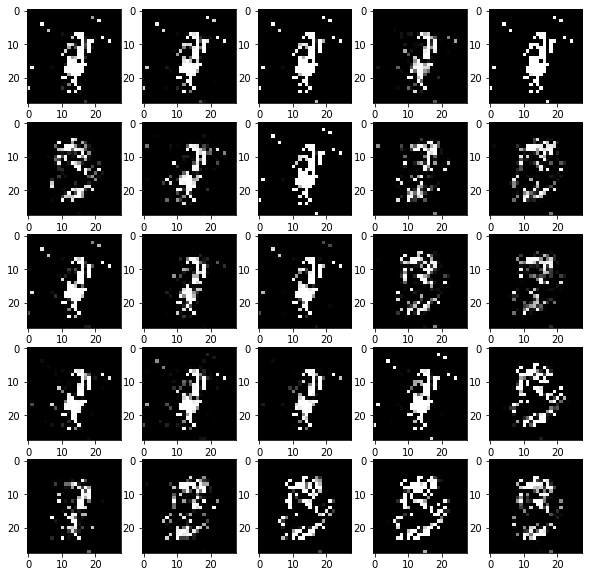

epochs 23


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 8ms/step


  0%|          | 1/273 [00:00<01:47,  2.53it/s]

4/4 [==============================] - 0s 9ms/step


  1%|          | 2/273 [00:00<01:45,  2.57it/s]

4/4 [==============================] - 0s 9ms/step


  1%|          | 3/273 [00:01<02:13,  2.02it/s]

4/4 [==============================] - 0s 8ms/step


  1%|▏         | 4/273 [00:01<02:05,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


  2%|▏         | 5/273 [00:02<02:01,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


  2%|▏         | 6/273 [00:02<02:03,  2.16it/s]

4/4 [==============================] - 0s 10ms/step


  3%|▎         | 7/273 [00:03<02:05,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


  3%|▎         | 8/273 [00:03<02:01,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


  3%|▎         | 9/273 [00:04<01:54,  2.30it/s]

4/4 [==============================] - 0s 10ms/step


  4%|▎         | 10/273 [00:04<01:58,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


  4%|▍         | 11/273 [00:04<01:54,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


  4%|▍         | 12/273 [00:05<01:56,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


  5%|▍         | 13/273 [00:05<01:57,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


  5%|▌         | 14/273 [00:06<01:54,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


  5%|▌         | 15/273 [00:06<01:49,  2.35it/s]

4/4 [==============================] - 0s 9ms/step


  6%|▌         | 16/273 [00:07<01:47,  2.39it/s]

4/4 [==============================] - 0s 8ms/step


  6%|▌         | 17/273 [00:07<01:48,  2.35it/s]

4/4 [==============================] - 0s 11ms/step


  7%|▋         | 18/273 [00:08<01:53,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


  7%|▋         | 19/273 [00:08<01:50,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


  7%|▋         | 20/273 [00:08<01:49,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 21/273 [00:09<01:49,  2.29it/s]

4/4 [==============================] - 0s 12ms/step


  8%|▊         | 22/273 [00:09<01:52,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


  8%|▊         | 23/273 [00:10<01:49,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


  9%|▉         | 24/273 [00:10<01:49,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


  9%|▉         | 25/273 [00:11<01:48,  2.30it/s]

4/4 [==============================] - 0s 10ms/step


 10%|▉         | 26/273 [00:11<01:46,  2.33it/s]

4/4 [==============================] - 0s 11ms/step


 10%|▉         | 27/273 [00:11<01:44,  2.35it/s]

4/4 [==============================] - 0s 9ms/step


 10%|█         | 28/273 [00:12<01:47,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 11%|█         | 29/273 [00:12<01:46,  2.30it/s]

4/4 [==============================] - 0s 8ms/step


 11%|█         | 30/273 [00:13<01:44,  2.33it/s]

4/4 [==============================] - 0s 8ms/step


 11%|█▏        | 31/273 [00:13<01:48,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 12%|█▏        | 32/273 [00:14<01:50,  2.19it/s]

4/4 [==============================] - 0s 10ms/step


 12%|█▏        | 33/273 [00:14<01:51,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 12%|█▏        | 34/273 [00:15<01:49,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 13%|█▎        | 35/273 [00:15<01:46,  2.23it/s]

4/4 [==============================] - 0s 13ms/step


 13%|█▎        | 36/273 [00:15<01:46,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▎        | 37/273 [00:16<01:46,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 14%|█▍        | 38/273 [00:16<01:41,  2.31it/s]

4/4 [==============================] - 0s 8ms/step


 14%|█▍        | 39/273 [00:17<01:41,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 15%|█▍        | 40/273 [00:17<01:39,  2.34it/s]

4/4 [==============================] - 0s 10ms/step


 15%|█▌        | 41/273 [00:18<01:39,  2.34it/s]

4/4 [==============================] - 0s 8ms/step


 15%|█▌        | 42/273 [00:18<01:40,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▌        | 43/273 [00:19<01:42,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▌        | 44/273 [00:19<01:44,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▋        | 45/273 [00:19<01:42,  2.22it/s]

4/4 [==============================] - 0s 10ms/step


 17%|█▋        | 46/273 [00:20<01:39,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 17%|█▋        | 47/273 [00:20<01:41,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 18%|█▊        | 48/273 [00:21<01:40,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


 18%|█▊        | 49/273 [00:21<01:37,  2.30it/s]

4/4 [==============================] - 0s 10ms/step


 18%|█▊        | 50/273 [00:22<01:37,  2.28it/s]

4/4 [==============================] - 0s 10ms/step


 19%|█▊        | 51/273 [00:22<01:36,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 19%|█▉        | 52/273 [00:22<01:37,  2.26it/s]

4/4 [==============================] - 0s 10ms/step


 19%|█▉        | 53/273 [00:23<01:36,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 20%|█▉        | 54/273 [00:23<01:35,  2.30it/s]

4/4 [==============================] - 0s 8ms/step


 20%|██        | 55/273 [00:24<01:36,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


 21%|██        | 56/273 [00:24<01:35,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 21%|██        | 57/273 [00:25<01:35,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 21%|██        | 58/273 [00:25<01:33,  2.29it/s]

4/4 [==============================] - 0s 14ms/step


 22%|██▏       | 59/273 [00:26<01:32,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 22%|██▏       | 60/273 [00:26<01:31,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 22%|██▏       | 61/273 [00:26<01:31,  2.32it/s]

4/4 [==============================] - 0s 10ms/step


 23%|██▎       | 62/273 [00:27<01:30,  2.32it/s]

4/4 [==============================] - 0s 8ms/step


 23%|██▎       | 63/273 [00:27<01:29,  2.35it/s]

4/4 [==============================] - 0s 9ms/step


 23%|██▎       | 64/273 [00:28<01:30,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


 24%|██▍       | 65/273 [00:28<01:30,  2.31it/s]

4/4 [==============================] - 0s 8ms/step


 24%|██▍       | 66/273 [00:29<01:29,  2.32it/s]

4/4 [==============================] - 0s 12ms/step


 25%|██▍       | 67/273 [00:29<01:28,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 25%|██▍       | 68/273 [00:29<01:27,  2.34it/s]

4/4 [==============================] - 0s 10ms/step


 25%|██▌       | 69/273 [00:30<01:28,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


 26%|██▌       | 70/273 [00:30<01:26,  2.36it/s]

4/4 [==============================] - 0s 9ms/step


 26%|██▌       | 71/273 [00:31<01:26,  2.34it/s]

4/4 [==============================] - 0s 10ms/step


 26%|██▋       | 72/273 [00:31<01:26,  2.32it/s]

4/4 [==============================] - 0s 8ms/step


 27%|██▋       | 73/273 [00:32<01:25,  2.35it/s]

4/4 [==============================] - 0s 8ms/step


 27%|██▋       | 74/273 [00:32<01:25,  2.34it/s]

4/4 [==============================] - 0s 8ms/step


 27%|██▋       | 75/273 [00:32<01:24,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 28%|██▊       | 76/273 [00:33<01:23,  2.37it/s]

4/4 [==============================] - 0s 10ms/step


 28%|██▊       | 77/273 [00:33<01:26,  2.26it/s]

4/4 [==============================] - 0s 10ms/step


 29%|██▊       | 78/273 [00:34<01:24,  2.31it/s]

4/4 [==============================] - 0s 10ms/step


 29%|██▉       | 79/273 [00:34<01:24,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▉       | 80/273 [00:35<01:24,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 30%|██▉       | 81/273 [00:35<01:23,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 30%|███       | 82/273 [00:35<01:22,  2.31it/s]

4/4 [==============================] - 0s 12ms/step


 30%|███       | 83/273 [00:36<01:20,  2.37it/s]

4/4 [==============================] - 0s 10ms/step


 31%|███       | 84/273 [00:36<01:19,  2.37it/s]

4/4 [==============================] - 0s 8ms/step


 31%|███       | 85/273 [00:37<01:21,  2.31it/s]

4/4 [==============================] - 0s 10ms/step


 32%|███▏      | 86/273 [00:37<01:21,  2.31it/s]

4/4 [==============================] - 0s 10ms/step


 32%|███▏      | 87/273 [00:38<01:19,  2.35it/s]

4/4 [==============================] - 0s 10ms/step


 32%|███▏      | 88/273 [00:38<01:19,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


 33%|███▎      | 89/273 [00:38<01:18,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 33%|███▎      | 90/273 [00:39<01:17,  2.35it/s]

4/4 [==============================] - 0s 10ms/step


 33%|███▎      | 91/273 [00:39<01:17,  2.35it/s]

4/4 [==============================] - 0s 8ms/step


 34%|███▎      | 92/273 [00:40<01:16,  2.36it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▍      | 93/273 [00:40<01:15,  2.37it/s]

4/4 [==============================] - 0s 8ms/step


 34%|███▍      | 94/273 [00:41<01:16,  2.35it/s]

4/4 [==============================] - 0s 9ms/step


 35%|███▍      | 95/273 [00:41<01:16,  2.34it/s]

4/4 [==============================] - 0s 9ms/step


 35%|███▌      | 96/273 [00:41<01:16,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▌      | 97/273 [00:42<01:14,  2.37it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▌      | 98/273 [00:42<01:12,  2.42it/s]

4/4 [==============================] - 0s 8ms/step


 36%|███▋      | 99/273 [00:43<01:11,  2.42it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 100/273 [00:43<01:11,  2.42it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 101/273 [00:43<01:11,  2.39it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 102/273 [00:44<01:12,  2.36it/s]

4/4 [==============================] - 0s 8ms/step


 38%|███▊      | 103/273 [00:44<01:13,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 38%|███▊      | 104/273 [00:45<01:13,  2.30it/s]

4/4 [==============================] - 0s 8ms/step


 38%|███▊      | 105/273 [00:45<01:11,  2.34it/s]

4/4 [==============================] - 0s 9ms/step


 39%|███▉      | 106/273 [00:46<01:14,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 39%|███▉      | 107/273 [00:46<01:11,  2.31it/s]

4/4 [==============================] - 0s 8ms/step


 40%|███▉      | 108/273 [00:47<01:11,  2.30it/s]

4/4 [==============================] - 0s 8ms/step


 40%|███▉      | 109/273 [00:47<01:12,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 40%|████      | 110/273 [00:47<01:11,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 41%|████      | 111/273 [00:48<01:11,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 41%|████      | 112/273 [00:48<01:08,  2.33it/s]

4/4 [==============================] - 0s 11ms/step


 41%|████▏     | 113/273 [00:49<01:10,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 42%|████▏     | 114/273 [00:49<01:08,  2.31it/s]

4/4 [==============================] - 0s 8ms/step


 42%|████▏     | 115/273 [00:50<01:06,  2.37it/s]

4/4 [==============================] - 0s 8ms/step


 42%|████▏     | 116/273 [00:50<01:06,  2.35it/s]

4/4 [==============================] - 0s 8ms/step


 43%|████▎     | 117/273 [00:50<01:05,  2.38it/s]

4/4 [==============================] - 0s 8ms/step


 43%|████▎     | 118/273 [00:51<01:11,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


 44%|████▎     | 119/273 [00:51<01:08,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 44%|████▍     | 120/273 [00:52<01:06,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 44%|████▍     | 121/273 [00:52<01:06,  2.27it/s]

4/4 [==============================] - 0s 11ms/step


 45%|████▍     | 122/273 [00:53<01:05,  2.31it/s]

4/4 [==============================] - 0s 8ms/step


 45%|████▌     | 123/273 [00:53<01:06,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 45%|████▌     | 124/273 [00:54<01:04,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 46%|████▌     | 125/273 [00:54<01:03,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


 46%|████▌     | 126/273 [00:54<01:03,  2.30it/s]

4/4 [==============================] - 0s 8ms/step


 47%|████▋     | 127/273 [00:55<01:03,  2.30it/s]

4/4 [==============================] - 0s 10ms/step


 47%|████▋     | 128/273 [00:55<01:02,  2.32it/s]

4/4 [==============================] - 0s 12ms/step


 47%|████▋     | 129/273 [00:56<01:02,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 48%|████▊     | 130/273 [00:56<01:03,  2.25it/s]

4/4 [==============================] - 0s 7ms/step


 48%|████▊     | 131/273 [00:57<01:01,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 48%|████▊     | 132/273 [00:57<01:00,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 49%|████▊     | 133/273 [00:57<00:59,  2.34it/s]

4/4 [==============================] - 0s 10ms/step


 49%|████▉     | 134/273 [00:58<00:59,  2.33it/s]

4/4 [==============================] - 0s 10ms/step


 49%|████▉     | 135/273 [00:58<00:58,  2.35it/s]

4/4 [==============================] - 0s 9ms/step


 50%|████▉     | 136/273 [00:59<00:58,  2.35it/s]

4/4 [==============================] - 0s 8ms/step


 50%|█████     | 137/273 [00:59<00:58,  2.34it/s]

4/4 [==============================] - 0s 9ms/step


 51%|█████     | 138/273 [01:00<00:56,  2.39it/s]

4/4 [==============================] - 0s 9ms/step


 51%|█████     | 139/273 [01:00<00:58,  2.31it/s]

4/4 [==============================] - 0s 8ms/step


 51%|█████▏    | 140/273 [01:00<00:58,  2.28it/s]

4/4 [==============================] - 0s 10ms/step


 52%|█████▏    | 141/273 [01:01<00:58,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 142/273 [01:01<00:57,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 143/273 [01:02<00:56,  2.31it/s]

4/4 [==============================] - 0s 8ms/step


 53%|█████▎    | 144/273 [01:02<00:55,  2.33it/s]

4/4 [==============================] - 0s 8ms/step


 53%|█████▎    | 145/273 [01:03<00:53,  2.38it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 146/273 [01:03<00:52,  2.43it/s]

4/4 [==============================] - 0s 9ms/step


 54%|█████▍    | 147/273 [01:03<00:52,  2.42it/s]

4/4 [==============================] - 0s 8ms/step


 54%|█████▍    | 148/273 [01:04<00:52,  2.39it/s]

4/4 [==============================] - 0s 8ms/step


 55%|█████▍    | 149/273 [01:04<00:53,  2.31it/s]

4/4 [==============================] - 0s 8ms/step


 55%|█████▍    | 150/273 [01:05<00:52,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▌    | 151/273 [01:05<00:52,  2.31it/s]

4/4 [==============================] - 0s 8ms/step


 56%|█████▌    | 152/273 [01:06<00:53,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▌    | 153/273 [01:06<00:52,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▋    | 154/273 [01:06<00:51,  2.30it/s]

4/4 [==============================] - 0s 8ms/step


 57%|█████▋    | 155/273 [01:07<00:50,  2.35it/s]

4/4 [==============================] - 0s 8ms/step


 57%|█████▋    | 156/273 [01:07<00:50,  2.32it/s]

4/4 [==============================] - 0s 13ms/step


 58%|█████▊    | 157/273 [01:08<00:50,  2.31it/s]

4/4 [==============================] - 0s 8ms/step


 58%|█████▊    | 158/273 [01:08<00:49,  2.33it/s]

4/4 [==============================] - 0s 8ms/step


 58%|█████▊    | 159/273 [01:09<00:48,  2.37it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▊    | 160/273 [01:09<00:47,  2.39it/s]

4/4 [==============================] - 0s 13ms/step


 59%|█████▉    | 161/273 [01:09<00:46,  2.43it/s]

4/4 [==============================] - 0s 10ms/step


 59%|█████▉    | 162/273 [01:10<00:46,  2.40it/s]

4/4 [==============================] - 0s 9ms/step


 60%|█████▉    | 163/273 [01:10<00:47,  2.34it/s]

4/4 [==============================] - 0s 9ms/step


 60%|██████    | 164/273 [01:11<00:47,  2.31it/s]

4/4 [==============================] - 0s 10ms/step


 60%|██████    | 165/273 [01:11<00:46,  2.33it/s]

4/4 [==============================] - 0s 8ms/step


 61%|██████    | 166/273 [01:12<00:46,  2.30it/s]

4/4 [==============================] - 0s 8ms/step


 61%|██████    | 167/273 [01:12<00:46,  2.30it/s]

4/4 [==============================] - 0s 8ms/step


 62%|██████▏   | 168/273 [01:12<00:45,  2.33it/s]

4/4 [==============================] - 0s 8ms/step


 62%|██████▏   | 169/273 [01:13<00:45,  2.30it/s]

4/4 [==============================] - 0s 10ms/step


 62%|██████▏   | 170/273 [01:13<00:45,  2.25it/s]

4/4 [==============================] - 0s 11ms/step


 63%|██████▎   | 171/273 [01:14<00:45,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 63%|██████▎   | 172/273 [01:14<00:43,  2.31it/s]

4/4 [==============================] - 0s 10ms/step


 63%|██████▎   | 173/273 [01:15<00:43,  2.31it/s]

4/4 [==============================] - 0s 14ms/step


 64%|██████▎   | 174/273 [01:15<00:42,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 64%|██████▍   | 175/273 [01:15<00:42,  2.32it/s]

4/4 [==============================] - 0s 7ms/step


 64%|██████▍   | 176/273 [01:16<00:43,  2.26it/s]

4/4 [==============================] - 0s 11ms/step


 65%|██████▍   | 177/273 [01:16<00:41,  2.31it/s]

4/4 [==============================] - 0s 8ms/step


 65%|██████▌   | 178/273 [01:17<00:40,  2.35it/s]

4/4 [==============================] - 0s 8ms/step


 66%|██████▌   | 179/273 [01:17<00:40,  2.30it/s]

4/4 [==============================] - 0s 8ms/step


 66%|██████▌   | 180/273 [01:18<00:40,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 66%|██████▋   | 181/273 [01:18<00:39,  2.33it/s]

4/4 [==============================] - 0s 10ms/step


 67%|██████▋   | 182/273 [01:18<00:38,  2.38it/s]

4/4 [==============================] - 0s 9ms/step


 67%|██████▋   | 183/273 [01:19<00:38,  2.34it/s]

4/4 [==============================] - 0s 10ms/step


 67%|██████▋   | 184/273 [01:19<00:39,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 68%|██████▊   | 185/273 [01:20<00:37,  2.33it/s]

4/4 [==============================] - 0s 10ms/step


 68%|██████▊   | 186/273 [01:20<00:37,  2.33it/s]

4/4 [==============================] - 0s 10ms/step


 68%|██████▊   | 187/273 [01:21<00:36,  2.33it/s]

4/4 [==============================] - 0s 10ms/step


 69%|██████▉   | 188/273 [01:21<00:37,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 69%|██████▉   | 189/273 [01:22<00:36,  2.33it/s]

4/4 [==============================] - 0s 10ms/step


 70%|██████▉   | 190/273 [01:22<00:36,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 70%|██████▉   | 191/273 [01:22<00:36,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 70%|███████   | 192/273 [01:23<00:35,  2.29it/s]

4/4 [==============================] - 0s 10ms/step


 71%|███████   | 193/273 [01:23<00:34,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████   | 194/273 [01:24<00:34,  2.30it/s]

4/4 [==============================] - 0s 8ms/step


 71%|███████▏  | 195/273 [01:24<00:33,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 72%|███████▏  | 196/273 [01:25<00:33,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 72%|███████▏  | 197/273 [01:25<00:32,  2.34it/s]

4/4 [==============================] - 0s 8ms/step


 73%|███████▎  | 198/273 [01:25<00:32,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 73%|███████▎  | 199/273 [01:26<00:32,  2.31it/s]

4/4 [==============================] - 0s 10ms/step


 73%|███████▎  | 200/273 [01:26<00:30,  2.37it/s]

4/4 [==============================] - 0s 11ms/step


 74%|███████▎  | 201/273 [01:27<00:30,  2.38it/s]

4/4 [==============================] - 0s 8ms/step


 74%|███████▍  | 202/273 [01:27<00:30,  2.36it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▍  | 203/273 [01:28<00:30,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 75%|███████▍  | 204/273 [01:28<00:31,  2.21it/s]

4/4 [==============================] - 0s 11ms/step


 75%|███████▌  | 205/273 [01:29<00:31,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 75%|███████▌  | 206/273 [01:29<00:31,  2.10it/s]

4/4 [==============================] - 0s 12ms/step


 76%|███████▌  | 207/273 [01:30<00:34,  1.89it/s]

4/4 [==============================] - 0s 13ms/step


 76%|███████▌  | 208/273 [01:30<00:33,  1.94it/s]

4/4 [==============================] - 0s 12ms/step


 77%|███████▋  | 209/273 [01:31<00:33,  1.93it/s]

4/4 [==============================] - 0s 11ms/step


 77%|███████▋  | 210/273 [01:31<00:32,  1.95it/s]

4/4 [==============================] - 0s 11ms/step


 77%|███████▋  | 211/273 [01:32<00:31,  1.99it/s]

4/4 [==============================] - 0s 8ms/step


 78%|███████▊  | 212/273 [01:32<00:30,  2.02it/s]

4/4 [==============================] - 0s 8ms/step


 78%|███████▊  | 213/273 [01:33<00:27,  2.14it/s]

4/4 [==============================] - 0s 10ms/step


 78%|███████▊  | 214/273 [01:33<00:26,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 79%|███████▉  | 215/273 [01:33<00:25,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 79%|███████▉  | 216/273 [01:34<00:24,  2.30it/s]

4/4 [==============================] - 0s 11ms/step


 79%|███████▉  | 217/273 [01:34<00:24,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 80%|███████▉  | 218/273 [01:35<00:24,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 80%|████████  | 219/273 [01:35<00:23,  2.32it/s]

4/4 [==============================] - 0s 8ms/step


 81%|████████  | 220/273 [01:36<00:22,  2.37it/s]

4/4 [==============================] - 0s 10ms/step


 81%|████████  | 221/273 [01:36<00:21,  2.40it/s]

4/4 [==============================] - 0s 9ms/step


 81%|████████▏ | 222/273 [01:36<00:21,  2.39it/s]

4/4 [==============================] - 0s 8ms/step


 82%|████████▏ | 223/273 [01:37<00:22,  2.19it/s]

4/4 [==============================] - 0s 14ms/step


 82%|████████▏ | 224/273 [01:37<00:22,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 225/273 [01:38<00:21,  2.19it/s]

4/4 [==============================] - 0s 10ms/step


 83%|████████▎ | 226/273 [01:38<00:21,  2.18it/s]

4/4 [==============================] - 0s 10ms/step


 83%|████████▎ | 227/273 [01:39<00:21,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 84%|████████▎ | 228/273 [01:39<00:21,  2.11it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▍ | 229/273 [01:40<00:20,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▍ | 230/273 [01:40<00:19,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 85%|████████▍ | 231/273 [01:41<00:19,  2.17it/s]

4/4 [==============================] - 0s 10ms/step


 85%|████████▍ | 232/273 [01:41<00:19,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 85%|████████▌ | 233/273 [01:42<00:18,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 86%|████████▌ | 234/273 [01:42<00:17,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▌ | 235/273 [01:42<00:17,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


 86%|████████▋ | 236/273 [01:43<00:17,  2.14it/s]

4/4 [==============================] - 0s 10ms/step


 87%|████████▋ | 237/273 [01:43<00:16,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 87%|████████▋ | 238/273 [01:44<00:15,  2.25it/s]

4/4 [==============================] - 0s 10ms/step


 88%|████████▊ | 239/273 [01:44<00:15,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 88%|████████▊ | 240/273 [01:45<00:14,  2.26it/s]

4/4 [==============================] - 0s 13ms/step


 88%|████████▊ | 241/273 [01:45<00:15,  2.13it/s]

4/4 [==============================] - 0s 8ms/step


 89%|████████▊ | 242/273 [01:46<00:14,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 89%|████████▉ | 243/273 [01:46<00:13,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 89%|████████▉ | 244/273 [01:46<00:12,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 90%|████████▉ | 245/273 [01:47<00:12,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 90%|█████████ | 246/273 [01:47<00:11,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 90%|█████████ | 247/273 [01:48<00:11,  2.34it/s]

4/4 [==============================] - 0s 10ms/step


 91%|█████████ | 248/273 [01:48<00:10,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 91%|█████████ | 249/273 [01:49<00:10,  2.35it/s]

4/4 [==============================] - 0s 10ms/step


 92%|█████████▏| 250/273 [01:49<00:10,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 92%|█████████▏| 251/273 [01:50<00:09,  2.26it/s]

4/4 [==============================] - 0s 10ms/step


 92%|█████████▏| 252/273 [01:50<00:09,  2.23it/s]

4/4 [==============================] - 0s 12ms/step


 93%|█████████▎| 253/273 [01:50<00:08,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 93%|█████████▎| 254/273 [01:51<00:08,  2.34it/s]

4/4 [==============================] - 0s 9ms/step


 93%|█████████▎| 255/273 [01:51<00:07,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 94%|█████████▍| 256/273 [01:52<00:07,  2.36it/s]

4/4 [==============================] - 0s 9ms/step


 94%|█████████▍| 257/273 [01:52<00:06,  2.39it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▍| 258/273 [01:53<00:06,  2.33it/s]

4/4 [==============================] - 0s 10ms/step


 95%|█████████▍| 259/273 [01:53<00:06,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▌| 260/273 [01:53<00:05,  2.31it/s]

4/4 [==============================] - 0s 8ms/step


 96%|█████████▌| 261/273 [01:54<00:05,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 96%|█████████▌| 262/273 [01:54<00:04,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 96%|█████████▋| 263/273 [01:55<00:04,  2.34it/s]

4/4 [==============================] - 0s 8ms/step


 97%|█████████▋| 264/273 [01:55<00:03,  2.40it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 265/273 [01:56<00:03,  2.33it/s]

4/4 [==============================] - 0s 10ms/step


 97%|█████████▋| 266/273 [01:56<00:02,  2.35it/s]

4/4 [==============================] - 0s 10ms/step


 98%|█████████▊| 267/273 [01:56<00:02,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 98%|█████████▊| 268/273 [01:57<00:02,  2.09it/s]

4/4 [==============================] - 0s 8ms/step


 99%|█████████▊| 269/273 [01:57<00:01,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 99%|█████████▉| 270/273 [01:58<00:01,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 99%|█████████▉| 271/273 [01:58<00:00,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


100%|█████████▉| 272/273 [01:59<00:00,  2.22it/s]

4/4 [==============================] - 0s 10ms/step


100%|██████████| 273/273 [01:59<00:00,  2.28it/s]


loss is 0.000477054447401315 |*| 21.746002197265625
1/1 [==============================] - 0s 28ms/step


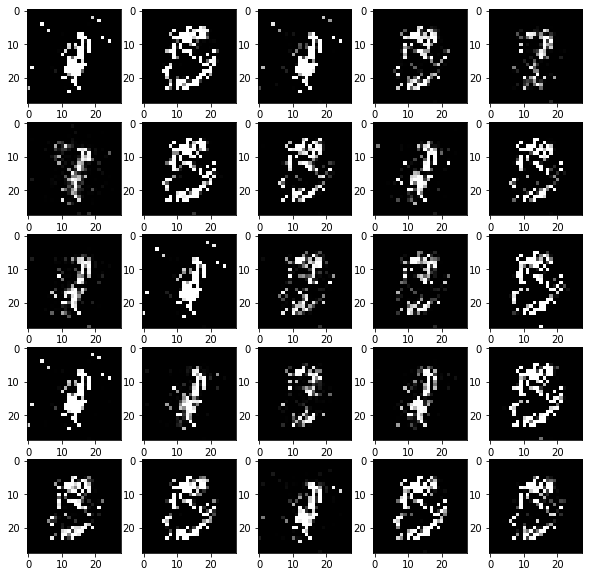

epochs 24


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 11ms/step


  0%|          | 1/273 [00:00<02:01,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


  1%|          | 2/273 [00:00<02:10,  2.07it/s]

4/4 [==============================] - 0s 11ms/step


  1%|          | 3/273 [00:01<02:24,  1.87it/s]

4/4 [==============================] - 0s 11ms/step


  1%|▏         | 4/273 [00:02<02:19,  1.93it/s]

4/4 [==============================] - 0s 11ms/step


  2%|▏         | 5/273 [00:02<02:14,  1.99it/s]

4/4 [==============================] - 0s 13ms/step


  2%|▏         | 6/273 [00:03<02:13,  1.99it/s]

4/4 [==============================] - 0s 11ms/step


  3%|▎         | 7/273 [00:03<02:17,  1.93it/s]

4/4 [==============================] - 0s 10ms/step


  3%|▎         | 8/273 [00:04<02:13,  1.98it/s]

4/4 [==============================] - 0s 9ms/step


  3%|▎         | 9/273 [00:04<02:05,  2.10it/s]

4/4 [==============================] - 0s 8ms/step


  4%|▎         | 10/273 [00:04<02:00,  2.18it/s]

4/4 [==============================] - 0s 10ms/step


  4%|▍         | 11/273 [00:05<01:58,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


  4%|▍         | 12/273 [00:05<02:01,  2.15it/s]

4/4 [==============================] - 0s 10ms/step


  5%|▍         | 13/273 [00:06<01:56,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


  5%|▌         | 14/273 [00:06<01:58,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


  5%|▌         | 15/273 [00:07<01:56,  2.21it/s]

4/4 [==============================] - 0s 11ms/step


  6%|▌         | 16/273 [00:07<01:56,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


  6%|▌         | 17/273 [00:08<01:55,  2.21it/s]

4/4 [==============================] - 0s 10ms/step


  7%|▋         | 18/273 [00:08<01:52,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


  7%|▋         | 19/273 [00:08<01:55,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


  7%|▋         | 20/273 [00:09<01:56,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 21/273 [00:09<01:55,  2.18it/s]

4/4 [==============================] - 0s 10ms/step


  8%|▊         | 22/273 [00:10<01:52,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


  8%|▊         | 23/273 [00:10<01:54,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


  9%|▉         | 24/273 [00:11<01:56,  2.14it/s]

4/4 [==============================] - 0s 11ms/step


  9%|▉         | 25/273 [00:11<01:54,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


 10%|▉         | 26/273 [00:12<01:49,  2.25it/s]

4/4 [==============================] - 0s 12ms/step


 10%|▉         | 27/273 [00:12<01:53,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 10%|█         | 28/273 [00:13<01:49,  2.24it/s]

4/4 [==============================] - 0s 12ms/step


 11%|█         | 29/273 [00:13<01:50,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 11%|█         | 30/273 [00:14<01:53,  2.14it/s]

4/4 [==============================] - 0s 10ms/step


 11%|█▏        | 31/273 [00:14<01:49,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 12%|█▏        | 32/273 [00:14<01:46,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 12%|█▏        | 33/273 [00:15<01:47,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 12%|█▏        | 34/273 [00:15<01:49,  2.18it/s]

4/4 [==============================] - 0s 12ms/step


 13%|█▎        | 35/273 [00:16<01:58,  2.02it/s]

4/4 [==============================] - 0s 8ms/step


 13%|█▎        | 36/273 [00:16<01:57,  2.01it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▎        | 37/273 [00:17<01:54,  2.06it/s]

4/4 [==============================] - 0s 8ms/step


 14%|█▍        | 38/273 [00:17<01:50,  2.13it/s]

4/4 [==============================] - 0s 8ms/step


 14%|█▍        | 39/273 [00:18<01:49,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 15%|█▍        | 40/273 [00:18<01:44,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 15%|█▌        | 41/273 [00:19<01:42,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 15%|█▌        | 42/273 [00:19<01:42,  2.24it/s]

4/4 [==============================] - 0s 10ms/step


 16%|█▌        | 43/273 [00:19<01:45,  2.19it/s]

4/4 [==============================] - 0s 13ms/step


 16%|█▌        | 44/273 [00:20<01:44,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▋        | 45/273 [00:20<01:44,  2.18it/s]

4/4 [==============================] - 0s 11ms/step


 17%|█▋        | 46/273 [00:21<01:46,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 17%|█▋        | 47/273 [00:21<01:41,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 18%|█▊        | 48/273 [00:22<01:37,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


 18%|█▊        | 49/273 [00:22<01:35,  2.36it/s]

4/4 [==============================] - 0s 10ms/step


 18%|█▊        | 50/273 [00:23<01:37,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 19%|█▊        | 51/273 [00:23<01:35,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 19%|█▉        | 52/273 [00:23<01:34,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 19%|█▉        | 53/273 [00:24<01:37,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 20%|█▉        | 54/273 [00:24<01:38,  2.22it/s]

4/4 [==============================] - 0s 13ms/step


 20%|██        | 55/273 [00:25<01:37,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 21%|██        | 56/273 [00:25<01:33,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


 21%|██        | 57/273 [00:26<01:33,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 21%|██        | 58/273 [00:26<01:36,  2.24it/s]

4/4 [==============================] - 0s 11ms/step


 22%|██▏       | 59/273 [00:27<01:38,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 22%|██▏       | 60/273 [00:27<01:37,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 22%|██▏       | 61/273 [00:28<01:37,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 23%|██▎       | 62/273 [00:28<01:37,  2.16it/s]

4/4 [==============================] - 0s 11ms/step


 23%|██▎       | 63/273 [00:28<01:34,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 23%|██▎       | 64/273 [00:29<01:35,  2.19it/s]

4/4 [==============================] - 0s 10ms/step


 24%|██▍       | 65/273 [00:29<01:32,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 24%|██▍       | 66/273 [00:30<01:34,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 25%|██▍       | 67/273 [00:30<01:43,  2.00it/s]

4/4 [==============================] - 0s 9ms/step


 25%|██▍       | 68/273 [00:31<01:36,  2.12it/s]

4/4 [==============================] - 0s 8ms/step


 25%|██▌       | 69/273 [00:31<01:36,  2.12it/s]

4/4 [==============================] - 0s 10ms/step


 26%|██▌       | 70/273 [00:32<01:36,  2.10it/s]

4/4 [==============================] - 0s 8ms/step


 26%|██▌       | 71/273 [00:32<01:33,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


 26%|██▋       | 72/273 [00:33<01:28,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 27%|██▋       | 73/273 [00:33<01:28,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 27%|██▋       | 74/273 [00:33<01:27,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 27%|██▋       | 75/273 [00:34<01:27,  2.26it/s]

4/4 [==============================] - 0s 11ms/step


 28%|██▊       | 76/273 [00:34<01:25,  2.31it/s]

4/4 [==============================] - 0s 10ms/step


 28%|██▊       | 77/273 [00:35<01:28,  2.21it/s]

4/4 [==============================] - 0s 7ms/step


 29%|██▊       | 78/273 [00:35<01:24,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▉       | 79/273 [00:36<01:22,  2.34it/s]

4/4 [==============================] - 0s 10ms/step


 29%|██▉       | 80/273 [00:36<01:23,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


 30%|██▉       | 81/273 [00:36<01:24,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 30%|███       | 82/273 [00:37<01:25,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 30%|███       | 83/273 [00:37<01:29,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 31%|███       | 84/273 [00:38<01:25,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 31%|███       | 85/273 [00:38<01:24,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 32%|███▏      | 86/273 [00:39<01:25,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 32%|███▏      | 87/273 [00:39<01:22,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 32%|███▏      | 88/273 [00:40<01:20,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 33%|███▎      | 89/273 [00:40<01:21,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 33%|███▎      | 90/273 [00:41<01:18,  2.33it/s]

4/4 [==============================] - 0s 8ms/step


 33%|███▎      | 91/273 [00:41<01:16,  2.38it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▎      | 92/273 [00:41<01:14,  2.41it/s]

4/4 [==============================] - 0s 10ms/step


 34%|███▍      | 93/273 [00:42<01:14,  2.43it/s]

4/4 [==============================] - 0s 8ms/step


 34%|███▍      | 94/273 [00:42<01:17,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 35%|███▍      | 95/273 [00:43<01:19,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 35%|███▌      | 96/273 [00:43<01:16,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▌      | 97/273 [00:43<01:14,  2.36it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▌      | 98/273 [00:44<01:16,  2.28it/s]

4/4 [==============================] - 0s 10ms/step


 36%|███▋      | 99/273 [00:44<01:19,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 100/273 [00:45<01:19,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


 37%|███▋      | 101/273 [00:45<01:18,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 102/273 [00:46<01:15,  2.28it/s]

4/4 [==============================] - 0s 10ms/step


 38%|███▊      | 103/273 [00:46<01:13,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


 38%|███▊      | 104/273 [00:47<01:12,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 38%|███▊      | 105/273 [00:47<01:11,  2.36it/s]

4/4 [==============================] - 0s 9ms/step


 39%|███▉      | 106/273 [00:48<01:15,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 39%|███▉      | 107/273 [00:48<01:12,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 40%|███▉      | 108/273 [00:48<01:10,  2.34it/s]

4/4 [==============================] - 0s 8ms/step


 40%|███▉      | 109/273 [00:49<01:08,  2.38it/s]

4/4 [==============================] - 0s 9ms/step


 40%|████      | 110/273 [00:49<01:11,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 41%|████      | 111/273 [00:50<01:13,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 41%|████      | 112/273 [00:50<01:13,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 41%|████▏     | 113/273 [00:51<01:13,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 42%|████▏     | 114/273 [00:51<01:12,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 42%|████▏     | 115/273 [00:52<01:10,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 42%|████▏     | 116/273 [00:52<01:11,  2.19it/s]

4/4 [==============================] - 0s 10ms/step


 43%|████▎     | 117/273 [00:52<01:09,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 43%|████▎     | 118/273 [00:53<01:07,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 44%|████▎     | 119/273 [00:53<01:08,  2.25it/s]

4/4 [==============================] - 0s 10ms/step


 44%|████▍     | 120/273 [00:54<01:08,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 44%|████▍     | 121/273 [00:54<01:06,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 45%|████▍     | 122/273 [00:55<01:06,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 45%|████▌     | 123/273 [00:55<01:05,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 45%|████▌     | 124/273 [00:55<01:05,  2.26it/s]

4/4 [==============================] - 0s 10ms/step


 46%|████▌     | 125/273 [00:56<01:05,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 46%|████▌     | 126/273 [00:56<01:04,  2.28it/s]

4/4 [==============================] - 0s 10ms/step


 47%|████▋     | 127/273 [00:57<01:03,  2.29it/s]

4/4 [==============================] - 0s 13ms/step


 47%|████▋     | 128/273 [00:57<01:02,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 129/273 [00:58<01:01,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 48%|████▊     | 130/273 [00:58<01:00,  2.35it/s]

4/4 [==============================] - 0s 10ms/step


 48%|████▊     | 131/273 [00:59<01:02,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 48%|████▊     | 132/273 [00:59<01:02,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 49%|████▊     | 133/273 [00:59<01:00,  2.30it/s]

4/4 [==============================] - 0s 10ms/step


 49%|████▉     | 134/273 [01:00<01:01,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 49%|████▉     | 135/273 [01:00<01:00,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 50%|████▉     | 136/273 [01:01<00:59,  2.31it/s]

4/4 [==============================] - 0s 8ms/step


 50%|█████     | 137/273 [01:01<00:58,  2.34it/s]

4/4 [==============================] - 0s 11ms/step


 51%|█████     | 138/273 [01:02<00:59,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 51%|█████     | 139/273 [01:02<00:58,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 51%|█████▏    | 140/273 [01:02<00:57,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 141/273 [01:03<00:55,  2.37it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 142/273 [01:03<00:54,  2.41it/s]

4/4 [==============================] - 0s 11ms/step


 52%|█████▏    | 143/273 [01:04<00:55,  2.35it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 144/273 [01:04<00:53,  2.40it/s]

4/4 [==============================] - 0s 10ms/step


 53%|█████▎    | 145/273 [01:04<00:53,  2.39it/s]

4/4 [==============================] - 0s 8ms/step


 53%|█████▎    | 146/273 [01:05<00:52,  2.40it/s]

4/4 [==============================] - 0s 10ms/step


 54%|█████▍    | 147/273 [01:05<00:53,  2.38it/s]

4/4 [==============================] - 0s 7ms/step


 54%|█████▍    | 148/273 [01:06<00:52,  2.38it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▍    | 149/273 [01:06<00:51,  2.40it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▍    | 150/273 [01:07<00:52,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▌    | 151/273 [01:07<00:52,  2.34it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▌    | 152/273 [01:08<00:53,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▌    | 153/273 [01:08<00:54,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▋    | 154/273 [01:09<00:57,  2.08it/s]

4/4 [==============================] - 0s 9ms/step


 57%|█████▋    | 155/273 [01:09<00:53,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 57%|█████▋    | 156/273 [01:09<00:52,  2.25it/s]

4/4 [==============================] - 0s 10ms/step


 58%|█████▊    | 157/273 [01:10<00:50,  2.30it/s]

4/4 [==============================] - 0s 8ms/step


 58%|█████▊    | 158/273 [01:10<00:51,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 58%|█████▊    | 159/273 [01:11<00:51,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 59%|█████▊    | 160/273 [01:11<00:49,  2.27it/s]

4/4 [==============================] - 0s 10ms/step


 59%|█████▉    | 161/273 [01:12<00:48,  2.30it/s]

4/4 [==============================] - 0s 8ms/step


 59%|█████▉    | 162/273 [01:12<00:47,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 60%|█████▉    | 163/273 [01:12<00:46,  2.36it/s]

4/4 [==============================] - 0s 8ms/step


 60%|██████    | 164/273 [01:13<00:46,  2.32it/s]

4/4 [==============================] - 0s 10ms/step


 60%|██████    | 165/273 [01:13<00:48,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 61%|██████    | 166/273 [01:14<00:48,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 61%|██████    | 167/273 [01:14<00:47,  2.24it/s]

4/4 [==============================] - 0s 11ms/step


 62%|██████▏   | 168/273 [01:15<00:46,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 62%|██████▏   | 169/273 [01:15<00:46,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 62%|██████▏   | 170/273 [01:16<00:45,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


 63%|██████▎   | 171/273 [01:16<00:45,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 63%|██████▎   | 172/273 [01:16<00:43,  2.31it/s]

4/4 [==============================] - 0s 10ms/step


 63%|██████▎   | 173/273 [01:17<00:43,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 64%|██████▎   | 174/273 [01:17<00:43,  2.30it/s]

4/4 [==============================] - 0s 8ms/step


 64%|██████▍   | 175/273 [01:18<00:42,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 64%|██████▍   | 176/273 [01:18<00:42,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 65%|██████▍   | 177/273 [01:19<00:41,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 65%|██████▌   | 178/273 [01:19<00:40,  2.34it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▌   | 179/273 [01:19<00:39,  2.40it/s]

4/4 [==============================] - 0s 10ms/step


 66%|██████▌   | 180/273 [01:20<00:41,  2.25it/s]

4/4 [==============================] - 0s 10ms/step


 66%|██████▋   | 181/273 [01:20<00:40,  2.26it/s]

4/4 [==============================] - 0s 10ms/step


 67%|██████▋   | 182/273 [01:21<00:38,  2.35it/s]

4/4 [==============================] - 0s 9ms/step


 67%|██████▋   | 183/273 [01:21<00:37,  2.38it/s]

4/4 [==============================] - 0s 9ms/step


 67%|██████▋   | 184/273 [01:22<00:38,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 68%|██████▊   | 185/273 [01:22<00:38,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 68%|██████▊   | 186/273 [01:23<00:39,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 68%|██████▊   | 187/273 [01:23<00:37,  2.31it/s]

4/4 [==============================] - 0s 10ms/step


 69%|██████▉   | 188/273 [01:23<00:35,  2.37it/s]

4/4 [==============================] - 0s 8ms/step


 69%|██████▉   | 189/273 [01:24<00:36,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 70%|██████▉   | 190/273 [01:24<00:36,  2.26it/s]

4/4 [==============================] - 0s 10ms/step


 70%|██████▉   | 191/273 [01:25<00:35,  2.31it/s]

4/4 [==============================] - 0s 8ms/step


 70%|███████   | 192/273 [01:25<00:35,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████   | 193/273 [01:26<00:35,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████   | 194/273 [01:26<00:34,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 71%|███████▏  | 195/273 [01:26<00:33,  2.33it/s]

4/4 [==============================] - 0s 8ms/step


 72%|███████▏  | 196/273 [01:27<00:33,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 72%|███████▏  | 197/273 [01:27<00:31,  2.38it/s]

4/4 [==============================] - 0s 9ms/step


 73%|███████▎  | 198/273 [01:28<00:32,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 73%|███████▎  | 199/273 [01:28<00:32,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 73%|███████▎  | 200/273 [01:29<00:32,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▎  | 201/273 [01:29<00:31,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▍  | 202/273 [01:29<00:30,  2.32it/s]

4/4 [==============================] - 0s 8ms/step


 74%|███████▍  | 203/273 [01:30<00:30,  2.33it/s]

4/4 [==============================] - 0s 7ms/step


 75%|███████▍  | 204/273 [01:30<00:30,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 75%|███████▌  | 205/273 [01:31<00:29,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 75%|███████▌  | 206/273 [01:31<00:29,  2.26it/s]

4/4 [==============================] - 0s 11ms/step


 76%|███████▌  | 207/273 [01:32<00:29,  2.22it/s]

4/4 [==============================] - 0s 10ms/step


 76%|███████▌  | 208/273 [01:32<00:29,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 77%|███████▋  | 209/273 [01:33<00:28,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 210/273 [01:33<00:28,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 77%|███████▋  | 211/273 [01:33<00:28,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 212/273 [01:34<00:27,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 213/273 [01:34<00:26,  2.26it/s]

4/4 [==============================] - 0s 10ms/step


 78%|███████▊  | 214/273 [01:35<00:25,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 79%|███████▉  | 215/273 [01:35<00:25,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 79%|███████▉  | 216/273 [01:36<00:25,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 79%|███████▉  | 217/273 [01:36<00:24,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 80%|███████▉  | 218/273 [01:36<00:23,  2.36it/s]

4/4 [==============================] - 0s 9ms/step


 80%|████████  | 219/273 [01:37<00:23,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 81%|████████  | 220/273 [01:37<00:23,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 81%|████████  | 221/273 [01:38<00:23,  2.24it/s]

4/4 [==============================] - 0s 10ms/step


 81%|████████▏ | 222/273 [01:38<00:22,  2.24it/s]

4/4 [==============================] - 0s 10ms/step


 82%|████████▏ | 223/273 [01:39<00:21,  2.29it/s]

4/4 [==============================] - 0s 10ms/step


 82%|████████▏ | 224/273 [01:39<00:21,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 225/273 [01:40<00:21,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 83%|████████▎ | 226/273 [01:40<00:20,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 83%|████████▎ | 227/273 [01:40<00:20,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▎ | 228/273 [01:41<00:19,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 84%|████████▍ | 229/273 [01:41<00:19,  2.31it/s]

4/4 [==============================] - 0s 8ms/step


 84%|████████▍ | 230/273 [01:42<00:18,  2.36it/s]

4/4 [==============================] - 0s 8ms/step


 85%|████████▍ | 231/273 [01:42<00:18,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 85%|████████▍ | 232/273 [01:43<00:17,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


 85%|████████▌ | 233/273 [01:43<00:17,  2.30it/s]

4/4 [==============================] - 0s 8ms/step


 86%|████████▌ | 234/273 [01:44<00:17,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▌ | 235/273 [01:44<00:16,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 86%|████████▋ | 236/273 [01:44<00:16,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 87%|████████▋ | 237/273 [01:45<00:15,  2.38it/s]

4/4 [==============================] - 0s 19ms/step


 87%|████████▋ | 238/273 [01:45<00:15,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 88%|████████▊ | 239/273 [01:46<00:15,  2.19it/s]

4/4 [==============================] - 0s 13ms/step


 88%|████████▊ | 240/273 [01:46<00:15,  2.09it/s]

4/4 [==============================] - 0s 14ms/step


 88%|████████▊ | 241/273 [01:47<00:16,  1.99it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▊ | 242/273 [01:47<00:15,  1.99it/s]

4/4 [==============================] - 0s 12ms/step


 89%|████████▉ | 243/273 [01:48<00:15,  1.96it/s]

4/4 [==============================] - 0s 12ms/step


 89%|████████▉ | 244/273 [01:48<00:14,  1.98it/s]

4/4 [==============================] - 0s 12ms/step


 90%|████████▉ | 245/273 [01:49<00:14,  1.97it/s]

4/4 [==============================] - 0s 12ms/step


 90%|█████████ | 246/273 [01:49<00:14,  1.88it/s]

4/4 [==============================] - 0s 15ms/step


 90%|█████████ | 247/273 [01:50<00:14,  1.83it/s]

4/4 [==============================] - 0s 9ms/step


 91%|█████████ | 248/273 [01:51<00:13,  1.88it/s]

4/4 [==============================] - 0s 10ms/step


 91%|█████████ | 249/273 [01:51<00:11,  2.02it/s]

4/4 [==============================] - 0s 10ms/step


 92%|█████████▏| 250/273 [01:51<00:10,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 92%|█████████▏| 251/273 [01:52<00:09,  2.24it/s]

4/4 [==============================] - 0s 12ms/step


 92%|█████████▏| 252/273 [01:52<00:09,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 93%|█████████▎| 253/273 [01:53<00:08,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 93%|█████████▎| 254/273 [01:53<00:08,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 93%|█████████▎| 255/273 [01:54<00:08,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 94%|█████████▍| 256/273 [01:54<00:07,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 94%|█████████▍| 257/273 [01:54<00:06,  2.34it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▍| 258/273 [01:55<00:06,  2.36it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▍| 259/273 [01:55<00:06,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▌| 260/273 [01:56<00:05,  2.29it/s]

4/4 [==============================] - 0s 10ms/step


 96%|█████████▌| 261/273 [01:56<00:05,  2.25it/s]

4/4 [==============================] - 0s 10ms/step


 96%|█████████▌| 262/273 [01:57<00:04,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 96%|█████████▋| 263/273 [01:57<00:04,  2.35it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 264/273 [01:57<00:03,  2.36it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 265/273 [01:58<00:03,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 266/273 [01:58<00:03,  2.33it/s]

4/4 [==============================] - 0s 10ms/step


 98%|█████████▊| 267/273 [01:59<00:02,  2.36it/s]

4/4 [==============================] - 0s 9ms/step


 98%|█████████▊| 268/273 [01:59<00:02,  2.40it/s]

4/4 [==============================] - 0s 9ms/step


 99%|█████████▊| 269/273 [01:59<00:01,  2.45it/s]

4/4 [==============================] - 0s 12ms/step


 99%|█████████▉| 270/273 [02:00<00:01,  2.48it/s]

4/4 [==============================] - 0s 8ms/step


 99%|█████████▉| 271/273 [02:00<00:00,  2.38it/s]

4/4 [==============================] - 0s 11ms/step


100%|█████████▉| 272/273 [02:01<00:00,  2.39it/s]

4/4 [==============================] - 0s 8ms/step


100%|██████████| 273/273 [02:01<00:00,  2.24it/s]


loss is 1.824444734666031e-05 |*| 22.465953826904297
1/1 [==============================] - 0s 28ms/step


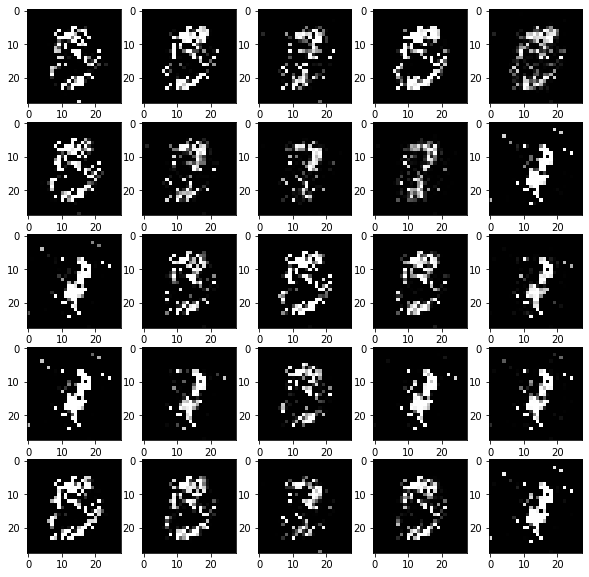

epochs 25


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 9ms/step


  0%|          | 1/273 [00:00<01:48,  2.50it/s]

4/4 [==============================] - 0s 9ms/step


  1%|          | 2/273 [00:00<01:58,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


  1%|          | 3/273 [00:01<02:00,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


  1%|▏         | 4/273 [00:01<01:54,  2.34it/s]

4/4 [==============================] - 0s 11ms/step


  2%|▏         | 5/273 [00:02<01:53,  2.36it/s]

4/4 [==============================] - 0s 10ms/step


  2%|▏         | 6/273 [00:02<01:50,  2.41it/s]

4/4 [==============================] - 0s 10ms/step


  3%|▎         | 7/273 [00:03<01:56,  2.29it/s]

4/4 [==============================] - 0s 10ms/step


  3%|▎         | 8/273 [00:03<01:55,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


  3%|▎         | 9/273 [00:03<01:52,  2.34it/s]

4/4 [==============================] - 0s 10ms/step


  4%|▎         | 10/273 [00:04<01:56,  2.25it/s]

4/4 [==============================] - 0s 13ms/step


  4%|▍         | 11/273 [00:04<02:01,  2.16it/s]

4/4 [==============================] - 0s 10ms/step


  4%|▍         | 12/273 [00:05<02:03,  2.12it/s]

4/4 [==============================] - 0s 10ms/step


  5%|▍         | 13/273 [00:05<01:58,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


  5%|▌         | 14/273 [00:06<02:01,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


  5%|▌         | 15/273 [00:06<01:58,  2.19it/s]

4/4 [==============================] - 0s 10ms/step


  6%|▌         | 16/273 [00:07<01:55,  2.22it/s]

4/4 [==============================] - 0s 10ms/step


  6%|▌         | 17/273 [00:07<01:52,  2.27it/s]

4/4 [==============================] - 0s 10ms/step


  7%|▋         | 18/273 [00:08<01:55,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


  7%|▋         | 19/273 [00:08<01:51,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


  7%|▋         | 20/273 [00:08<01:53,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


  8%|▊         | 21/273 [00:09<01:54,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 22/273 [00:09<01:50,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


  8%|▊         | 23/273 [00:10<01:53,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


  9%|▉         | 24/273 [00:10<01:50,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


  9%|▉         | 25/273 [00:11<01:53,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 10%|▉         | 26/273 [00:11<01:52,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 10%|▉         | 27/273 [00:12<01:49,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 10%|█         | 28/273 [00:12<01:51,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 11%|█         | 29/273 [00:12<01:46,  2.29it/s]

4/4 [==============================] - 0s 10ms/step


 11%|█         | 30/273 [00:13<01:49,  2.23it/s]

4/4 [==============================] - 0s 10ms/step


 11%|█▏        | 31/273 [00:13<01:50,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 12%|█▏        | 32/273 [00:14<01:51,  2.16it/s]

4/4 [==============================] - 0s 12ms/step


 12%|█▏        | 33/273 [00:14<01:51,  2.15it/s]

4/4 [==============================] - 0s 11ms/step


 12%|█▏        | 34/273 [00:15<01:52,  2.12it/s]

4/4 [==============================] - 0s 12ms/step


 13%|█▎        | 35/273 [00:15<01:58,  2.01it/s]

4/4 [==============================] - 0s 12ms/step


 13%|█▎        | 36/273 [00:16<01:58,  2.00it/s]

4/4 [==============================] - 0s 15ms/step


 14%|█▎        | 37/273 [00:16<01:58,  2.00it/s]

4/4 [==============================] - 0s 11ms/step


 14%|█▍        | 38/273 [00:17<01:59,  1.96it/s]

4/4 [==============================] - 0s 11ms/step


 14%|█▍        | 39/273 [00:17<01:56,  2.01it/s]

4/4 [==============================] - 0s 10ms/step


 15%|█▍        | 40/273 [00:18<01:56,  1.99it/s]

4/4 [==============================] - 0s 11ms/step


 15%|█▌        | 41/273 [00:18<01:58,  1.95it/s]

4/4 [==============================] - 0s 11ms/step


 15%|█▌        | 42/273 [00:19<01:57,  1.96it/s]

4/4 [==============================] - 0s 12ms/step


 16%|█▌        | 43/273 [00:19<01:57,  1.96it/s]

4/4 [==============================] - 0s 8ms/step


 16%|█▌        | 44/273 [00:20<02:03,  1.85it/s]

4/4 [==============================] - 0s 8ms/step


 16%|█▋        | 45/273 [00:21<02:00,  1.90it/s]

4/4 [==============================] - 0s 9ms/step


 17%|█▋        | 46/273 [00:21<01:55,  1.96it/s]

4/4 [==============================] - 0s 8ms/step


 17%|█▋        | 47/273 [00:21<01:53,  1.99it/s]

4/4 [==============================] - 0s 9ms/step


 18%|█▊        | 48/273 [00:22<01:56,  1.93it/s]

4/4 [==============================] - 0s 9ms/step


 18%|█▊        | 49/273 [00:23<01:53,  1.97it/s]

4/4 [==============================] - 0s 9ms/step


 18%|█▊        | 50/273 [00:23<01:46,  2.09it/s]

4/4 [==============================] - 0s 12ms/step


 19%|█▊        | 51/273 [00:23<01:45,  2.10it/s]

4/4 [==============================] - 0s 10ms/step


 19%|█▉        | 52/273 [00:24<01:39,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 19%|█▉        | 53/273 [00:24<01:38,  2.23it/s]

4/4 [==============================] - 0s 11ms/step


 20%|█▉        | 54/273 [00:25<01:35,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 20%|██        | 55/273 [00:25<01:36,  2.26it/s]

4/4 [==============================] - 0s 11ms/step


 21%|██        | 56/273 [00:26<01:39,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 21%|██        | 57/273 [00:26<01:38,  2.19it/s]

4/4 [==============================] - 0s 13ms/step


 21%|██        | 58/273 [00:27<01:39,  2.17it/s]

4/4 [==============================] - 0s 10ms/step


 22%|██▏       | 59/273 [00:27<01:38,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 22%|██▏       | 60/273 [00:27<01:34,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 22%|██▏       | 61/273 [00:28<01:35,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 23%|██▎       | 62/273 [00:28<01:34,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 23%|██▎       | 63/273 [00:29<01:35,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 23%|██▎       | 64/273 [00:29<01:38,  2.12it/s]

4/4 [==============================] - 0s 8ms/step


 24%|██▍       | 65/273 [00:30<01:38,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 24%|██▍       | 66/273 [00:30<01:37,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 25%|██▍       | 67/273 [00:31<01:32,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 25%|██▍       | 68/273 [00:31<01:32,  2.21it/s]

4/4 [==============================] - 0s 13ms/step


 25%|██▌       | 69/273 [00:31<01:30,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 26%|██▌       | 70/273 [00:32<01:26,  2.36it/s]

4/4 [==============================] - 0s 10ms/step


 26%|██▌       | 71/273 [00:32<01:24,  2.38it/s]

4/4 [==============================] - 0s 9ms/step


 26%|██▋       | 72/273 [00:33<01:28,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 27%|██▋       | 73/273 [00:33<01:27,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 27%|██▋       | 74/273 [00:34<01:27,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 27%|██▋       | 75/273 [00:34<01:27,  2.26it/s]

4/4 [==============================] - 0s 13ms/step


 28%|██▊       | 76/273 [00:35<01:30,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


 28%|██▊       | 77/273 [00:35<01:30,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▊       | 78/273 [00:36<01:29,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▉       | 79/273 [00:36<01:26,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▉       | 80/273 [00:36<01:24,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 30%|██▉       | 81/273 [00:37<01:26,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 30%|███       | 82/273 [00:37<01:22,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


 30%|███       | 83/273 [00:38<01:22,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 31%|███       | 84/273 [00:38<01:22,  2.30it/s]

4/4 [==============================] - 0s 11ms/step


 31%|███       | 85/273 [00:39<01:21,  2.31it/s]

4/4 [==============================] - 0s 7ms/step


 32%|███▏      | 86/273 [00:39<01:20,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 32%|███▏      | 87/273 [00:39<01:17,  2.40it/s]

4/4 [==============================] - 0s 8ms/step


 32%|███▏      | 88/273 [00:40<01:20,  2.30it/s]

4/4 [==============================] - 0s 8ms/step


 33%|███▎      | 89/273 [00:40<01:22,  2.24it/s]

4/4 [==============================] - 0s 11ms/step


 33%|███▎      | 90/273 [00:41<01:23,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 33%|███▎      | 91/273 [00:41<01:23,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


 34%|███▎      | 92/273 [00:42<01:22,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 34%|███▍      | 93/273 [00:42<01:18,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▍      | 94/273 [00:43<01:19,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 35%|███▍      | 95/273 [00:43<01:17,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 35%|███▌      | 96/273 [00:43<01:20,  2.20it/s]

4/4 [==============================] - 0s 10ms/step


 36%|███▌      | 97/273 [00:44<01:17,  2.28it/s]

4/4 [==============================] - 0s 14ms/step


 36%|███▌      | 98/273 [00:44<01:18,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 36%|███▋      | 99/273 [00:45<01:21,  2.15it/s]

4/4 [==============================] - 0s 10ms/step


 37%|███▋      | 100/273 [00:45<01:17,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 37%|███▋      | 101/273 [00:46<01:17,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 102/273 [00:46<01:19,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 38%|███▊      | 103/273 [00:47<01:19,  2.13it/s]

4/4 [==============================] - 0s 10ms/step


 38%|███▊      | 104/273 [00:47<01:27,  1.93it/s]

4/4 [==============================] - 0s 9ms/step


 38%|███▊      | 105/273 [00:48<01:22,  2.02it/s]

4/4 [==============================] - 0s 8ms/step


 39%|███▉      | 106/273 [00:48<01:23,  2.00it/s]

4/4 [==============================] - 0s 8ms/step


 39%|███▉      | 107/273 [00:49<01:22,  2.02it/s]

4/4 [==============================] - 0s 8ms/step


 40%|███▉      | 108/273 [00:49<01:21,  2.03it/s]

4/4 [==============================] - 0s 9ms/step


 40%|███▉      | 109/273 [00:50<01:16,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 40%|████      | 110/273 [00:50<01:13,  2.22it/s]

4/4 [==============================] - 0s 10ms/step


 41%|████      | 111/273 [00:50<01:13,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 41%|████      | 112/273 [00:51<01:13,  2.18it/s]

4/4 [==============================] - 0s 10ms/step


 41%|████▏     | 113/273 [00:51<01:11,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 42%|████▏     | 114/273 [00:52<01:08,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


 42%|████▏     | 115/273 [00:52<01:07,  2.35it/s]

4/4 [==============================] - 0s 8ms/step


 42%|████▏     | 116/273 [00:53<01:08,  2.31it/s]

4/4 [==============================] - 0s 8ms/step


 43%|████▎     | 117/273 [00:53<01:10,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 43%|████▎     | 118/273 [00:54<01:15,  2.07it/s]

4/4 [==============================] - 0s 9ms/step


 44%|████▎     | 119/273 [00:54<01:14,  2.08it/s]

4/4 [==============================] - 0s 9ms/step


 44%|████▍     | 120/273 [00:55<01:12,  2.11it/s]

4/4 [==============================] - 0s 9ms/step


 44%|████▍     | 121/273 [00:55<01:11,  2.12it/s]

4/4 [==============================] - 0s 10ms/step


 45%|████▍     | 122/273 [00:56<01:11,  2.12it/s]

4/4 [==============================] - 0s 13ms/step


 45%|████▌     | 123/273 [00:56<01:08,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 45%|████▌     | 124/273 [00:56<01:05,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 46%|████▌     | 125/273 [00:57<01:10,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


 46%|████▌     | 126/273 [00:57<01:08,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 47%|████▋     | 127/273 [00:58<01:06,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 128/273 [00:58<01:06,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 129/273 [00:59<01:03,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 48%|████▊     | 130/273 [00:59<01:04,  2.21it/s]

4/4 [==============================] - 0s 13ms/step


 48%|████▊     | 131/273 [01:00<01:05,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 48%|████▊     | 132/273 [01:00<01:02,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


 49%|████▊     | 133/273 [01:01<01:02,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 49%|████▉     | 134/273 [01:01<00:59,  2.33it/s]

4/4 [==============================] - 0s 8ms/step


 49%|████▉     | 135/273 [01:01<01:03,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 50%|████▉     | 136/273 [01:02<01:01,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 50%|█████     | 137/273 [01:02<00:59,  2.29it/s]

4/4 [==============================] - 0s 11ms/step


 51%|█████     | 138/273 [01:03<00:58,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 51%|█████     | 139/273 [01:03<00:59,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 51%|█████▏    | 140/273 [01:04<00:57,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 141/273 [01:04<00:55,  2.38it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 142/273 [01:04<00:56,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 143/273 [01:05<00:54,  2.36it/s]

4/4 [==============================] - 0s 11ms/step


 53%|█████▎    | 144/273 [01:05<00:53,  2.43it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 145/273 [01:06<00:54,  2.34it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 146/273 [01:06<00:52,  2.40it/s]

4/4 [==============================] - 0s 9ms/step


 54%|█████▍    | 147/273 [01:06<00:52,  2.41it/s]

4/4 [==============================] - 0s 11ms/step


 54%|█████▍    | 148/273 [01:07<00:52,  2.37it/s]

4/4 [==============================] - 0s 8ms/step


 55%|█████▍    | 149/273 [01:07<00:53,  2.32it/s]

4/4 [==============================] - 0s 8ms/step


 55%|█████▍    | 150/273 [01:08<00:53,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▌    | 151/273 [01:08<00:51,  2.37it/s]

4/4 [==============================] - 0s 13ms/step


 56%|█████▌    | 152/273 [01:09<00:51,  2.36it/s]

4/4 [==============================] - 0s 8ms/step


 56%|█████▌    | 153/273 [01:09<00:50,  2.38it/s]

4/4 [==============================] - 0s 10ms/step


 56%|█████▋    | 154/273 [01:09<00:49,  2.43it/s]

4/4 [==============================] - 0s 10ms/step


 57%|█████▋    | 155/273 [01:10<00:48,  2.42it/s]

4/4 [==============================] - 0s 9ms/step


 57%|█████▋    | 156/273 [01:10<00:49,  2.36it/s]

4/4 [==============================] - 0s 8ms/step


 58%|█████▊    | 157/273 [01:11<00:48,  2.39it/s]

4/4 [==============================] - 0s 10ms/step


 58%|█████▊    | 158/273 [01:11<00:47,  2.43it/s]

4/4 [==============================] - 0s 8ms/step


 58%|█████▊    | 159/273 [01:11<00:46,  2.43it/s]

4/4 [==============================] - 0s 8ms/step


 59%|█████▊    | 160/273 [01:12<00:47,  2.36it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▉    | 161/273 [01:12<00:47,  2.35it/s]

4/4 [==============================] - 0s 8ms/step


 59%|█████▉    | 162/273 [01:13<00:48,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 60%|█████▉    | 163/273 [01:13<00:47,  2.31it/s]

4/4 [==============================] - 0s 10ms/step


 60%|██████    | 164/273 [01:14<00:48,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 60%|██████    | 165/273 [01:14<00:48,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 61%|██████    | 166/273 [01:15<00:48,  2.19it/s]

4/4 [==============================] - 0s 10ms/step


 61%|██████    | 167/273 [01:15<00:49,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 62%|██████▏   | 168/273 [01:16<00:47,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 62%|██████▏   | 169/273 [01:16<00:45,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 62%|██████▏   | 170/273 [01:16<00:47,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 63%|██████▎   | 171/273 [01:17<00:44,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 63%|██████▎   | 172/273 [01:17<00:45,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 63%|██████▎   | 173/273 [01:18<00:43,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 64%|██████▎   | 174/273 [01:18<00:42,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 64%|██████▍   | 175/273 [01:19<00:41,  2.34it/s]

4/4 [==============================] - 0s 8ms/step


 64%|██████▍   | 176/273 [01:19<00:43,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 65%|██████▍   | 177/273 [01:19<00:41,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 65%|██████▌   | 178/273 [01:20<00:42,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 66%|██████▌   | 179/273 [01:20<00:42,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 66%|██████▌   | 180/273 [01:21<00:41,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 66%|██████▋   | 181/273 [01:21<00:40,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 67%|██████▋   | 182/273 [01:22<00:40,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 67%|██████▋   | 183/273 [01:22<00:39,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 67%|██████▋   | 184/273 [01:23<00:38,  2.31it/s]

4/4 [==============================] - 0s 8ms/step


 68%|██████▊   | 185/273 [01:23<00:39,  2.24it/s]

4/4 [==============================] - 0s 10ms/step


 68%|██████▊   | 186/273 [01:24<00:39,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 68%|██████▊   | 187/273 [01:24<00:38,  2.26it/s]

4/4 [==============================] - 0s 10ms/step


 69%|██████▉   | 188/273 [01:24<00:36,  2.31it/s]

4/4 [==============================] - 0s 8ms/step


 69%|██████▉   | 189/273 [01:25<00:35,  2.36it/s]

4/4 [==============================] - 0s 8ms/step


 70%|██████▉   | 190/273 [01:25<00:35,  2.33it/s]

4/4 [==============================] - 0s 8ms/step


 70%|██████▉   | 191/273 [01:26<00:35,  2.34it/s]

4/4 [==============================] - 0s 9ms/step


 70%|███████   | 192/273 [01:26<00:36,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████   | 193/273 [01:27<00:36,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████   | 194/273 [01:27<00:36,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████▏  | 195/273 [01:28<00:34,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 72%|███████▏  | 196/273 [01:28<00:34,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 72%|███████▏  | 197/273 [01:28<00:34,  2.23it/s]

4/4 [==============================] - 0s 10ms/step


 73%|███████▎  | 198/273 [01:29<00:32,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 73%|███████▎  | 199/273 [01:29<00:33,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 73%|███████▎  | 200/273 [01:30<00:32,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 74%|███████▎  | 201/273 [01:30<00:32,  2.20it/s]

4/4 [==============================] - 0s 12ms/step


 74%|███████▍  | 202/273 [01:31<00:31,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▍  | 203/273 [01:31<00:30,  2.30it/s]

4/4 [==============================] - 0s 8ms/step


 75%|███████▍  | 204/273 [01:31<00:29,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 75%|███████▌  | 205/273 [01:32<00:28,  2.36it/s]

4/4 [==============================] - 0s 9ms/step


 75%|███████▌  | 206/273 [01:32<00:29,  2.30it/s]

4/4 [==============================] - 0s 8ms/step


 76%|███████▌  | 207/273 [01:33<00:29,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 76%|███████▌  | 208/273 [01:33<00:28,  2.26it/s]

4/4 [==============================] - 0s 10ms/step


 77%|███████▋  | 209/273 [01:34<00:29,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 210/273 [01:34<00:29,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 211/273 [01:35<00:27,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 212/273 [01:35<00:27,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 213/273 [01:36<00:27,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 214/273 [01:36<00:26,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 79%|███████▉  | 215/273 [01:36<00:26,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


 79%|███████▉  | 216/273 [01:37<00:26,  2.15it/s]

4/4 [==============================] - 0s 12ms/step


 79%|███████▉  | 217/273 [01:37<00:25,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 80%|███████▉  | 218/273 [01:38<00:24,  2.25it/s]

4/4 [==============================] - 0s 12ms/step


 80%|████████  | 219/273 [01:38<00:23,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 81%|████████  | 220/273 [01:39<00:23,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 81%|████████  | 221/273 [01:39<00:23,  2.18it/s]

4/4 [==============================] - 0s 10ms/step


 81%|████████▏ | 222/273 [01:40<00:23,  2.18it/s]

4/4 [==============================] - 0s 10ms/step


 82%|████████▏ | 223/273 [01:40<00:22,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 224/273 [01:41<00:22,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 225/273 [01:41<00:21,  2.22it/s]

4/4 [==============================] - 0s 11ms/step


 83%|████████▎ | 226/273 [01:41<00:20,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 83%|████████▎ | 227/273 [01:42<00:20,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


 84%|████████▎ | 228/273 [01:42<00:20,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▍ | 229/273 [01:43<00:20,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▍ | 230/273 [01:43<00:19,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 85%|████████▍ | 231/273 [01:44<00:19,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 85%|████████▍ | 232/273 [01:44<00:18,  2.19it/s]

4/4 [==============================] - 0s 11ms/step


 85%|████████▌ | 233/273 [01:45<00:18,  2.21it/s]

4/4 [==============================] - 0s 11ms/step


 86%|████████▌ | 234/273 [01:45<00:22,  1.74it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▌ | 235/273 [01:46<00:19,  1.92it/s]

4/4 [==============================] - 0s 8ms/step


 86%|████████▋ | 236/273 [01:46<00:18,  1.96it/s]

4/4 [==============================] - 0s 12ms/step


 87%|████████▋ | 237/273 [01:47<00:17,  2.08it/s]

4/4 [==============================] - 0s 9ms/step


 87%|████████▋ | 238/273 [01:47<00:16,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 88%|████████▊ | 239/273 [01:48<00:15,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 88%|████████▊ | 240/273 [01:48<00:14,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 88%|████████▊ | 241/273 [01:48<00:13,  2.29it/s]

4/4 [==============================] - 0s 11ms/step


 89%|████████▊ | 242/273 [01:49<00:13,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▉ | 243/273 [01:49<00:13,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 89%|████████▉ | 244/273 [01:50<00:12,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


 90%|████████▉ | 245/273 [01:50<00:12,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 90%|█████████ | 246/273 [01:51<00:11,  2.30it/s]

4/4 [==============================] - 0s 10ms/step


 90%|█████████ | 247/273 [01:51<00:11,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


 91%|█████████ | 248/273 [01:52<00:10,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 91%|█████████ | 249/273 [01:52<00:10,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 92%|█████████▏| 250/273 [01:52<00:10,  2.21it/s]

4/4 [==============================] - 0s 10ms/step


 92%|█████████▏| 251/273 [01:53<00:09,  2.27it/s]

4/4 [==============================] - 0s 13ms/step


 92%|█████████▏| 252/273 [01:53<00:08,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 93%|█████████▎| 253/273 [01:54<00:08,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 93%|█████████▎| 254/273 [01:54<00:08,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 93%|█████████▎| 255/273 [01:55<00:08,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


 94%|█████████▍| 256/273 [01:55<00:07,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 94%|█████████▍| 257/273 [01:56<00:06,  2.29it/s]

4/4 [==============================] - 0s 10ms/step


 95%|█████████▍| 258/273 [01:56<00:06,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 95%|█████████▍| 259/273 [01:56<00:06,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 95%|█████████▌| 260/273 [01:57<00:05,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 96%|█████████▌| 261/273 [01:57<00:05,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 96%|█████████▌| 262/273 [01:58<00:04,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 96%|█████████▋| 263/273 [01:58<00:04,  2.41it/s]

4/4 [==============================] - 0s 10ms/step


 97%|█████████▋| 264/273 [01:59<00:03,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 265/273 [01:59<00:03,  2.26it/s]

4/4 [==============================] - 0s 10ms/step


 97%|█████████▋| 266/273 [02:00<00:03,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 98%|█████████▊| 267/273 [02:00<00:02,  2.19it/s]

4/4 [==============================] - 0s 10ms/step


 98%|█████████▊| 268/273 [02:01<00:02,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 99%|█████████▊| 269/273 [02:01<00:01,  2.13it/s]

4/4 [==============================] - 0s 10ms/step


 99%|█████████▉| 270/273 [02:01<00:01,  2.10it/s]

4/4 [==============================] - 0s 10ms/step


 99%|█████████▉| 271/273 [02:02<00:00,  2.02it/s]

4/4 [==============================] - 0s 11ms/step


100%|█████████▉| 272/273 [02:03<00:00,  2.03it/s]

4/4 [==============================] - 0s 10ms/step


100%|██████████| 273/273 [02:03<00:00,  2.21it/s]


loss is 0.0009656276670284569 |*| 17.252883911132812
1/1 [==============================] - 0s 34ms/step


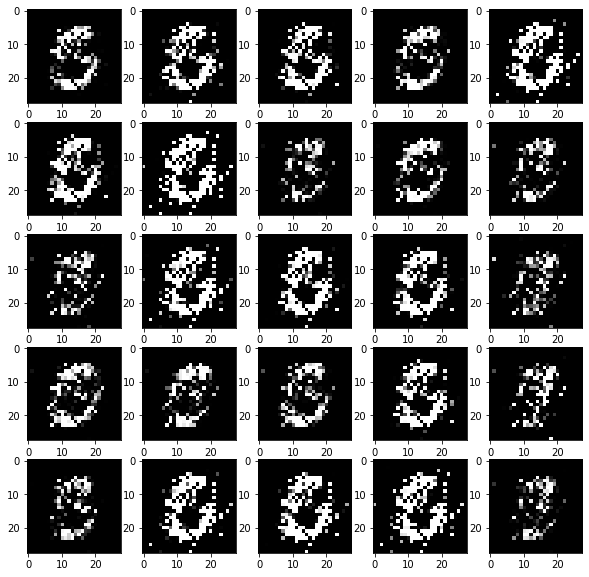

epochs 26


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 9ms/step


  0%|          | 1/273 [00:00<01:59,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


  1%|          | 2/273 [00:00<02:03,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


  1%|          | 3/273 [00:01<02:02,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


  1%|▏         | 4/273 [00:01<02:01,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


  2%|▏         | 5/273 [00:02<02:02,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


  2%|▏         | 6/273 [00:02<01:56,  2.30it/s]

4/4 [==============================] - 0s 10ms/step


  3%|▎         | 7/273 [00:03<01:53,  2.34it/s]

4/4 [==============================] - 0s 9ms/step


  3%|▎         | 8/273 [00:03<01:51,  2.38it/s]

4/4 [==============================] - 0s 9ms/step


  3%|▎         | 9/273 [00:03<01:52,  2.36it/s]

4/4 [==============================] - 0s 9ms/step


  4%|▎         | 10/273 [00:04<01:51,  2.36it/s]

4/4 [==============================] - 0s 10ms/step


  4%|▍         | 11/273 [00:04<01:50,  2.37it/s]

4/4 [==============================] - 0s 9ms/step


  4%|▍         | 12/273 [00:05<01:53,  2.30it/s]

4/4 [==============================] - 0s 10ms/step


  5%|▍         | 13/273 [00:05<01:51,  2.33it/s]

4/4 [==============================] - 0s 12ms/step


  5%|▌         | 14/273 [00:06<01:52,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


  5%|▌         | 15/273 [00:06<01:55,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


  6%|▌         | 16/273 [00:07<01:56,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


  6%|▌         | 17/273 [00:07<01:51,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


  7%|▋         | 18/273 [00:07<01:55,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


  7%|▋         | 19/273 [00:08<01:54,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


  7%|▋         | 20/273 [00:08<01:51,  2.26it/s]

4/4 [==============================] - 0s 13ms/step


  8%|▊         | 21/273 [00:09<01:49,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 22/273 [00:09<01:49,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 23/273 [00:10<01:46,  2.34it/s]

4/4 [==============================] - 0s 9ms/step


  9%|▉         | 24/273 [00:10<01:47,  2.31it/s]

4/4 [==============================] - 0s 11ms/step


  9%|▉         | 25/273 [00:10<01:52,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 10%|▉         | 26/273 [00:11<01:50,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 10%|▉         | 27/273 [00:11<01:52,  2.18it/s]

4/4 [==============================] - 0s 12ms/step


 10%|█         | 28/273 [00:12<01:50,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 11%|█         | 29/273 [00:12<01:50,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 11%|█         | 30/273 [00:13<01:52,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


 11%|█▏        | 31/273 [00:13<01:47,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 12%|█▏        | 32/273 [00:14<01:49,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 12%|█▏        | 33/273 [00:14<01:50,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 12%|█▏        | 34/273 [00:15<01:46,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 13%|█▎        | 35/273 [00:15<01:49,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 13%|█▎        | 36/273 [00:16<01:50,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


 14%|█▎        | 37/273 [00:16<01:49,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▍        | 38/273 [00:16<01:47,  2.19it/s]

4/4 [==============================] - 0s 10ms/step


 14%|█▍        | 39/273 [00:17<01:43,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 15%|█▍        | 40/273 [00:17<01:44,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 15%|█▌        | 41/273 [00:18<01:46,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 15%|█▌        | 42/273 [00:18<01:57,  1.96it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▌        | 43/273 [00:19<01:55,  1.99it/s]

4/4 [==============================] - 0s 8ms/step


 16%|█▌        | 44/273 [00:19<01:52,  2.03it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▋        | 45/273 [00:20<01:46,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 17%|█▋        | 46/273 [00:20<01:43,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 17%|█▋        | 47/273 [00:21<01:44,  2.17it/s]

4/4 [==============================] - 0s 10ms/step


 18%|█▊        | 48/273 [00:21<01:45,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 18%|█▊        | 49/273 [00:22<01:42,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 18%|█▊        | 50/273 [00:22<01:39,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


 19%|█▊        | 51/273 [00:23<01:42,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


 19%|█▉        | 52/273 [00:23<01:42,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 19%|█▉        | 53/273 [00:23<01:39,  2.21it/s]

4/4 [==============================] - 0s 10ms/step


 20%|█▉        | 54/273 [00:24<01:37,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 20%|██        | 55/273 [00:24<01:38,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 21%|██        | 56/273 [00:25<01:34,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 21%|██        | 57/273 [00:25<01:35,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 21%|██        | 58/273 [00:26<01:37,  2.21it/s]

4/4 [==============================] - 0s 12ms/step


 22%|██▏       | 59/273 [00:26<01:35,  2.24it/s]

4/4 [==============================] - 0s 10ms/step


 22%|██▏       | 60/273 [00:26<01:32,  2.30it/s]

4/4 [==============================] - 0s 8ms/step


 22%|██▏       | 61/273 [00:27<01:29,  2.36it/s]

4/4 [==============================] - 0s 8ms/step


 23%|██▎       | 62/273 [00:27<01:31,  2.30it/s]

4/4 [==============================] - 0s 8ms/step


 23%|██▎       | 63/273 [00:28<01:33,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 23%|██▎       | 64/273 [00:28<01:34,  2.22it/s]

4/4 [==============================] - 0s 13ms/step


 24%|██▍       | 65/273 [00:29<01:38,  2.12it/s]

4/4 [==============================] - 0s 13ms/step


 24%|██▍       | 66/273 [00:29<01:45,  1.96it/s]

4/4 [==============================] - 0s 15ms/step


 25%|██▍       | 67/273 [00:30<01:45,  1.95it/s]

4/4 [==============================] - 0s 13ms/step


 25%|██▍       | 68/273 [00:30<01:47,  1.91it/s]

4/4 [==============================] - 0s 9ms/step


 25%|██▌       | 69/273 [00:31<01:48,  1.88it/s]

4/4 [==============================] - 0s 9ms/step


 26%|██▌       | 70/273 [00:32<01:49,  1.86it/s]

4/4 [==============================] - 0s 13ms/step


 26%|██▌       | 71/273 [00:32<01:46,  1.90it/s]

4/4 [==============================] - 0s 13ms/step


 26%|██▋       | 72/273 [00:33<01:53,  1.78it/s]

4/4 [==============================] - 0s 9ms/step


 27%|██▋       | 73/273 [00:33<01:49,  1.83it/s]

4/4 [==============================] - 0s 9ms/step


 27%|██▋       | 74/273 [00:34<01:42,  1.93it/s]

4/4 [==============================] - 0s 9ms/step


 27%|██▋       | 75/273 [00:34<01:39,  1.99it/s]

4/4 [==============================] - 0s 9ms/step


 28%|██▊       | 76/273 [00:35<01:37,  2.02it/s]

4/4 [==============================] - 0s 10ms/step


 28%|██▊       | 77/273 [00:35<01:34,  2.08it/s]

4/4 [==============================] - 0s 8ms/step


 29%|██▊       | 78/273 [00:35<01:31,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▉       | 79/273 [00:36<01:27,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▉       | 80/273 [00:36<01:25,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 30%|██▉       | 81/273 [00:37<01:22,  2.34it/s]

4/4 [==============================] - 0s 8ms/step


 30%|███       | 82/273 [00:37<01:21,  2.35it/s]

4/4 [==============================] - 0s 9ms/step


 30%|███       | 83/273 [00:38<01:18,  2.41it/s]

4/4 [==============================] - 0s 9ms/step


 31%|███       | 84/273 [00:38<01:21,  2.33it/s]

4/4 [==============================] - 0s 12ms/step


 31%|███       | 85/273 [00:38<01:22,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 32%|███▏      | 86/273 [00:39<01:24,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 32%|███▏      | 87/273 [00:39<01:24,  2.21it/s]

4/4 [==============================] - 0s 10ms/step


 32%|███▏      | 88/273 [00:40<01:25,  2.17it/s]

4/4 [==============================] - 0s 10ms/step


 33%|███▎      | 89/273 [00:40<01:26,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 33%|███▎      | 90/273 [00:41<01:24,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


 33%|███▎      | 91/273 [00:41<01:21,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 34%|███▎      | 92/273 [00:42<01:22,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▍      | 93/273 [00:42<01:18,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▍      | 94/273 [00:43<01:18,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 35%|███▍      | 95/273 [00:43<01:16,  2.34it/s]

4/4 [==============================] - 0s 8ms/step


 35%|███▌      | 96/273 [00:43<01:15,  2.35it/s]

4/4 [==============================] - 0s 8ms/step


 36%|███▌      | 97/273 [00:44<01:18,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 36%|███▌      | 98/273 [00:44<01:18,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▋      | 99/273 [00:45<01:19,  2.20it/s]

4/4 [==============================] - 0s 11ms/step


 37%|███▋      | 100/273 [00:45<01:17,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 101/273 [00:46<01:19,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 102/273 [00:46<01:17,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 38%|███▊      | 103/273 [00:47<01:18,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 38%|███▊      | 104/273 [00:47<01:19,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 38%|███▊      | 105/273 [00:48<01:17,  2.18it/s]

4/4 [==============================] - 0s 14ms/step


 39%|███▉      | 106/273 [00:48<01:15,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 39%|███▉      | 107/273 [00:48<01:12,  2.28it/s]

4/4 [==============================] - 0s 10ms/step


 40%|███▉      | 108/273 [00:49<01:14,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 40%|███▉      | 109/273 [00:49<01:12,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 40%|████      | 110/273 [00:50<01:13,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 41%|████      | 111/273 [00:50<01:12,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 41%|████      | 112/273 [00:51<01:09,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 41%|████▏     | 113/273 [00:51<01:07,  2.36it/s]

4/4 [==============================] - 0s 9ms/step


 42%|████▏     | 114/273 [00:51<01:08,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 42%|████▏     | 115/273 [00:52<01:08,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 42%|████▏     | 116/273 [00:52<01:07,  2.31it/s]

4/4 [==============================] - 0s 8ms/step


 43%|████▎     | 117/273 [00:53<01:07,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


 43%|████▎     | 118/273 [00:53<01:06,  2.32it/s]

4/4 [==============================] - 0s 13ms/step


 44%|████▎     | 119/273 [00:54<01:08,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 44%|████▍     | 120/273 [00:54<01:10,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 44%|████▍     | 121/273 [00:55<01:08,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 45%|████▍     | 122/273 [00:55<01:09,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


 45%|████▌     | 123/273 [00:55<01:06,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 45%|████▌     | 124/273 [00:56<01:08,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 46%|████▌     | 125/273 [00:56<01:05,  2.25it/s]

4/4 [==============================] - 0s 12ms/step


 46%|████▌     | 126/273 [00:57<01:04,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 127/273 [00:57<01:03,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 128/273 [00:58<01:04,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 47%|████▋     | 129/273 [00:58<01:05,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 48%|████▊     | 130/273 [00:59<01:06,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 48%|████▊     | 131/273 [00:59<01:03,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 48%|████▊     | 132/273 [00:59<01:00,  2.33it/s]

4/4 [==============================] - 0s 10ms/step


 49%|████▊     | 133/273 [01:00<01:00,  2.31it/s]

4/4 [==============================] - 0s 8ms/step


 49%|████▉     | 134/273 [01:00<01:00,  2.31it/s]

4/4 [==============================] - 0s 10ms/step


 49%|████▉     | 135/273 [01:01<01:07,  2.04it/s]

4/4 [==============================] - 0s 8ms/step


 50%|████▉     | 136/273 [01:01<01:05,  2.10it/s]

4/4 [==============================] - 0s 10ms/step


 50%|█████     | 137/273 [01:02<01:02,  2.16it/s]

4/4 [==============================] - 0s 13ms/step


 51%|█████     | 138/273 [01:02<01:00,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 51%|█████     | 139/273 [01:03<00:59,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 51%|█████▏    | 140/273 [01:03<01:00,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 52%|█████▏    | 141/273 [01:04<01:00,  2.19it/s]

4/4 [==============================] - 0s 12ms/step


 52%|█████▏    | 142/273 [01:04<01:00,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 143/273 [01:05<01:00,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 144/273 [01:05<01:00,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 145/273 [01:05<00:57,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 146/273 [01:06<00:58,  2.16it/s]

4/4 [==============================] - 0s 12ms/step


 54%|█████▍    | 147/273 [01:06<00:58,  2.17it/s]

4/4 [==============================] - 0s 12ms/step


 54%|█████▍    | 148/273 [01:07<00:55,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▍    | 149/273 [01:07<00:56,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▍    | 150/273 [01:08<00:56,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▌    | 151/273 [01:08<00:56,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▌    | 152/273 [01:09<00:54,  2.24it/s]

4/4 [==============================] - 0s 10ms/step


 56%|█████▌    | 153/273 [01:09<00:52,  2.29it/s]

4/4 [==============================] - 0s 11ms/step


 56%|█████▋    | 154/273 [01:10<00:53,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 57%|█████▋    | 155/273 [01:10<00:54,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 57%|█████▋    | 156/273 [01:10<00:53,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 58%|█████▊    | 157/273 [01:11<00:54,  2.14it/s]

4/4 [==============================] - 0s 10ms/step


 58%|█████▊    | 158/273 [01:11<00:51,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 58%|█████▊    | 159/273 [01:12<00:52,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▊    | 160/273 [01:12<00:51,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 59%|█████▉    | 161/273 [01:13<00:51,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 59%|█████▉    | 162/273 [01:13<00:50,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 60%|█████▉    | 163/273 [01:14<00:48,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 60%|██████    | 164/273 [01:14<00:49,  2.22it/s]

4/4 [==============================] - 0s 11ms/step


 60%|██████    | 165/273 [01:15<00:47,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 61%|██████    | 166/273 [01:15<00:51,  2.07it/s]

4/4 [==============================] - 0s 13ms/step


 61%|██████    | 167/273 [01:16<00:51,  2.07it/s]

4/4 [==============================] - 0s 9ms/step


 62%|██████▏   | 168/273 [01:16<00:50,  2.08it/s]

4/4 [==============================] - 0s 8ms/step


 62%|██████▏   | 169/273 [01:16<00:48,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 62%|██████▏   | 170/273 [01:17<00:48,  2.11it/s]

4/4 [==============================] - 0s 20ms/step


 63%|██████▎   | 171/273 [01:17<00:48,  2.09it/s]

4/4 [==============================] - 0s 9ms/step


 63%|██████▎   | 172/273 [01:18<00:48,  2.08it/s]

4/4 [==============================] - 0s 9ms/step


 63%|██████▎   | 173/273 [01:18<00:46,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 64%|██████▎   | 174/273 [01:19<00:44,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 64%|██████▍   | 175/273 [01:19<00:43,  2.27it/s]

4/4 [==============================] - 0s 11ms/step


 64%|██████▍   | 176/273 [01:20<00:44,  2.20it/s]

4/4 [==============================] - 0s 7ms/step


 65%|██████▍   | 177/273 [01:20<00:43,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 65%|██████▌   | 178/273 [01:21<00:43,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▌   | 179/273 [01:21<00:43,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▌   | 180/273 [01:22<00:43,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▋   | 181/273 [01:22<00:42,  2.16it/s]

4/4 [==============================] - 0s 10ms/step


 67%|██████▋   | 182/273 [01:22<00:42,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 67%|██████▋   | 183/273 [01:23<00:40,  2.20it/s]

4/4 [==============================] - 0s 10ms/step


 67%|██████▋   | 184/273 [01:23<00:39,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 68%|██████▊   | 185/273 [01:24<00:39,  2.26it/s]

4/4 [==============================] - 0s 11ms/step


 68%|██████▊   | 186/273 [01:24<00:37,  2.30it/s]

4/4 [==============================] - 0s 8ms/step


 68%|██████▊   | 187/273 [01:25<00:36,  2.36it/s]

4/4 [==============================] - 0s 9ms/step


 69%|██████▉   | 188/273 [01:25<00:35,  2.36it/s]

4/4 [==============================] - 0s 10ms/step


 69%|██████▉   | 189/273 [01:25<00:35,  2.37it/s]

4/4 [==============================] - 0s 9ms/step


 70%|██████▉   | 190/273 [01:26<00:35,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


 70%|██████▉   | 191/273 [01:26<00:35,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 70%|███████   | 192/273 [01:27<00:36,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████   | 193/273 [01:27<00:36,  2.18it/s]

4/4 [==============================] - 0s 10ms/step


 71%|███████   | 194/273 [01:28<00:36,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 71%|███████▏  | 195/273 [01:28<00:36,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 72%|███████▏  | 196/273 [01:29<00:36,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 72%|███████▏  | 197/273 [01:29<00:36,  2.09it/s]

4/4 [==============================] - 0s 8ms/step


 73%|███████▎  | 198/273 [01:30<00:35,  2.13it/s]

4/4 [==============================] - 0s 8ms/step


 73%|███████▎  | 199/273 [01:30<00:34,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 73%|███████▎  | 200/273 [01:31<00:32,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▎  | 201/273 [01:31<00:33,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 74%|███████▍  | 202/273 [01:31<00:32,  2.18it/s]

4/4 [==============================] - 0s 10ms/step


 74%|███████▍  | 203/273 [01:32<00:32,  2.16it/s]

4/4 [==============================] - 0s 10ms/step


 75%|███████▍  | 204/273 [01:32<00:31,  2.21it/s]

4/4 [==============================] - 0s 10ms/step


 75%|███████▌  | 205/273 [01:33<00:31,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 75%|███████▌  | 206/273 [01:33<00:30,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 76%|███████▌  | 207/273 [01:34<00:29,  2.21it/s]

4/4 [==============================] - 0s 13ms/step


 76%|███████▌  | 208/273 [01:34<00:29,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 209/273 [01:35<00:29,  2.19it/s]

4/4 [==============================] - 0s 10ms/step


 77%|███████▋  | 210/273 [01:35<00:28,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 211/273 [01:36<00:28,  2.17it/s]

4/4 [==============================] - 0s 10ms/step


 78%|███████▊  | 212/273 [01:36<00:26,  2.27it/s]

4/4 [==============================] - 0s 12ms/step


 78%|███████▊  | 213/273 [01:36<00:26,  2.30it/s]

4/4 [==============================] - 0s 10ms/step


 78%|███████▊  | 214/273 [01:37<00:26,  2.23it/s]

4/4 [==============================] - 0s 10ms/step


 79%|███████▉  | 215/273 [01:37<00:26,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 79%|███████▉  | 216/273 [01:38<00:25,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 79%|███████▉  | 217/273 [01:38<00:24,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 80%|███████▉  | 218/273 [01:39<00:24,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 80%|████████  | 219/273 [01:39<00:23,  2.35it/s]

4/4 [==============================] - 0s 9ms/step


 81%|████████  | 220/273 [01:39<00:22,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 81%|████████  | 221/273 [01:40<00:22,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 81%|████████▏ | 222/273 [01:40<00:22,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 223/273 [01:41<00:22,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 224/273 [01:41<00:21,  2.30it/s]

4/4 [==============================] - 0s 8ms/step


 82%|████████▏ | 225/273 [01:42<00:20,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 83%|████████▎ | 226/273 [01:42<00:21,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 83%|████████▎ | 227/273 [01:43<00:20,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▎ | 228/273 [01:43<00:20,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 84%|████████▍ | 229/273 [01:44<00:19,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▍ | 230/273 [01:44<00:19,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 85%|████████▍ | 231/273 [01:44<00:18,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 85%|████████▍ | 232/273 [01:45<00:18,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 85%|████████▌ | 233/273 [01:45<00:18,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▌ | 234/273 [01:46<00:18,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▌ | 235/273 [01:46<00:17,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 86%|████████▋ | 236/273 [01:47<00:16,  2.26it/s]

4/4 [==============================] - 0s 12ms/step


 87%|████████▋ | 237/273 [01:47<00:16,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 87%|████████▋ | 238/273 [01:48<00:15,  2.28it/s]

4/4 [==============================] - 0s 12ms/step


 88%|████████▊ | 239/273 [01:48<00:15,  2.22it/s]

4/4 [==============================] - 0s 10ms/step


 88%|████████▊ | 240/273 [01:49<00:15,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 88%|████████▊ | 241/273 [01:49<00:14,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▊ | 242/273 [01:49<00:13,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▉ | 243/273 [01:50<00:13,  2.28it/s]

4/4 [==============================] - 0s 10ms/step


 89%|████████▉ | 244/273 [01:50<00:12,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 90%|████████▉ | 245/273 [01:51<00:12,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 90%|█████████ | 246/273 [01:51<00:12,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 90%|█████████ | 247/273 [01:52<00:11,  2.30it/s]

4/4 [==============================] - 0s 8ms/step


 91%|█████████ | 248/273 [01:52<00:11,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


 91%|█████████ | 249/273 [01:53<00:10,  2.25it/s]

4/4 [==============================] - 0s 10ms/step


 92%|█████████▏| 250/273 [01:53<00:09,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


 92%|█████████▏| 251/273 [01:54<00:10,  2.06it/s]

4/4 [==============================] - 0s 9ms/step


 92%|█████████▏| 252/273 [01:54<00:10,  2.08it/s]

4/4 [==============================] - 0s 10ms/step


 93%|█████████▎| 253/273 [01:55<00:09,  2.08it/s]

4/4 [==============================] - 0s 9ms/step


 93%|█████████▎| 254/273 [01:55<00:09,  2.11it/s]

4/4 [==============================] - 0s 12ms/step


 93%|█████████▎| 255/273 [01:55<00:08,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 94%|█████████▍| 256/273 [01:56<00:07,  2.24it/s]

4/4 [==============================] - 0s 12ms/step


 94%|█████████▍| 257/273 [01:56<00:07,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 95%|█████████▍| 258/273 [01:57<00:06,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 95%|█████████▍| 259/273 [01:57<00:06,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 95%|█████████▌| 260/273 [01:58<00:05,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 96%|█████████▌| 261/273 [01:58<00:05,  2.30it/s]

4/4 [==============================] - 0s 12ms/step


 96%|█████████▌| 262/273 [01:58<00:04,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 96%|█████████▋| 263/273 [01:59<00:04,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 97%|█████████▋| 264/273 [01:59<00:03,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 265/273 [02:00<00:03,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 266/273 [02:00<00:03,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 98%|█████████▊| 267/273 [02:01<00:02,  2.34it/s]

4/4 [==============================] - 0s 9ms/step


 98%|█████████▊| 268/273 [02:01<00:02,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 99%|█████████▊| 269/273 [02:02<00:01,  2.30it/s]

4/4 [==============================] - 0s 13ms/step


 99%|█████████▉| 270/273 [02:02<00:01,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 99%|█████████▉| 271/273 [02:02<00:00,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


100%|█████████▉| 272/273 [02:03<00:00,  2.19it/s]

4/4 [==============================] - 0s 11ms/step


100%|██████████| 273/273 [02:03<00:00,  2.20it/s]


loss is 6.506461795652285e-05 |*| 20.821441650390625
1/1 [==============================] - 0s 30ms/step


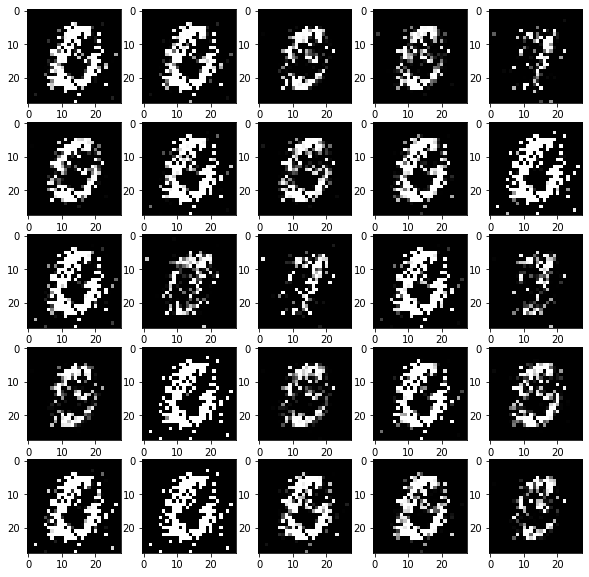

epochs 27


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 14ms/step


  0%|          | 1/273 [00:00<01:47,  2.53it/s]

4/4 [==============================] - 0s 9ms/step


  1%|          | 2/273 [00:00<01:51,  2.44it/s]

4/4 [==============================] - 0s 8ms/step


  1%|          | 3/273 [00:01<02:00,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


  1%|▏         | 4/273 [00:01<01:54,  2.36it/s]

4/4 [==============================] - 0s 8ms/step


  2%|▏         | 5/273 [00:02<01:54,  2.34it/s]

4/4 [==============================] - 0s 9ms/step


  2%|▏         | 6/273 [00:02<01:56,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


  3%|▎         | 7/273 [00:02<01:54,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


  3%|▎         | 8/273 [00:03<01:53,  2.34it/s]

4/4 [==============================] - 0s 9ms/step


  3%|▎         | 9/273 [00:03<01:55,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


  4%|▎         | 10/273 [00:04<01:57,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


  4%|▍         | 11/273 [00:04<01:54,  2.29it/s]

4/4 [==============================] - 0s 11ms/step


  4%|▍         | 12/273 [00:05<01:56,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


  5%|▍         | 13/273 [00:05<01:51,  2.34it/s]

4/4 [==============================] - 0s 8ms/step


  5%|▌         | 14/273 [00:06<01:54,  2.27it/s]

4/4 [==============================] - 0s 14ms/step


  5%|▌         | 15/273 [00:06<02:22,  1.81it/s]

4/4 [==============================] - 0s 11ms/step


  6%|▌         | 16/273 [00:07<02:19,  1.84it/s]

4/4 [==============================] - 0s 11ms/step


  6%|▌         | 17/273 [00:07<02:15,  1.89it/s]

4/4 [==============================] - 0s 11ms/step


  7%|▋         | 18/273 [00:08<02:16,  1.87it/s]

4/4 [==============================] - 0s 13ms/step


  7%|▋         | 19/273 [00:09<02:20,  1.80it/s]

4/4 [==============================] - 0s 13ms/step


  7%|▋         | 20/273 [00:09<02:19,  1.81it/s]

4/4 [==============================] - 0s 13ms/step


  8%|▊         | 21/273 [00:10<02:19,  1.81it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 22/273 [00:10<02:12,  1.89it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 23/273 [00:11<02:04,  2.00it/s]

4/4 [==============================] - 0s 9ms/step


  9%|▉         | 24/273 [00:11<01:58,  2.10it/s]

4/4 [==============================] - 0s 8ms/step


  9%|▉         | 25/273 [00:11<01:52,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 10%|▉         | 26/273 [00:12<01:53,  2.18it/s]

4/4 [==============================] - 0s 11ms/step


 10%|▉         | 27/273 [00:12<01:48,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 10%|█         | 28/273 [00:13<01:48,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 11%|█         | 29/273 [00:13<01:50,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 11%|█         | 30/273 [00:14<01:49,  2.22it/s]

4/4 [==============================] - 0s 10ms/step


 11%|█▏        | 31/273 [00:14<01:49,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 12%|█▏        | 32/273 [00:14<01:46,  2.27it/s]

4/4 [==============================] - 0s 10ms/step


 12%|█▏        | 33/273 [00:15<01:47,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 12%|█▏        | 34/273 [00:15<01:46,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 13%|█▎        | 35/273 [00:16<01:46,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 13%|█▎        | 36/273 [00:16<01:45,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 14%|█▎        | 37/273 [00:17<01:43,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▍        | 38/273 [00:17<01:41,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▍        | 39/273 [00:18<01:39,  2.36it/s]

4/4 [==============================] - 0s 10ms/step


 15%|█▍        | 40/273 [00:18<01:43,  2.25it/s]

4/4 [==============================] - 0s 10ms/step


 15%|█▌        | 41/273 [00:18<01:40,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 15%|█▌        | 42/273 [00:19<01:39,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▌        | 43/273 [00:19<01:37,  2.35it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▌        | 44/273 [00:20<01:39,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▋        | 45/273 [00:20<01:38,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


 17%|█▋        | 46/273 [00:21<01:37,  2.33it/s]

4/4 [==============================] - 0s 12ms/step


 17%|█▋        | 47/273 [00:21<01:37,  2.32it/s]

4/4 [==============================] - 0s 8ms/step


 18%|█▊        | 48/273 [00:21<01:38,  2.29it/s]

4/4 [==============================] - 0s 11ms/step


 18%|█▊        | 49/273 [00:22<01:41,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 18%|█▊        | 50/273 [00:22<01:42,  2.17it/s]

4/4 [==============================] - 0s 10ms/step


 19%|█▊        | 51/273 [00:23<01:41,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 19%|█▉        | 52/273 [00:23<01:43,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 19%|█▉        | 53/273 [00:24<01:42,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 20%|█▉        | 54/273 [00:24<01:38,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 20%|██        | 55/273 [00:25<01:39,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 21%|██        | 56/273 [00:25<01:40,  2.16it/s]

4/4 [==============================] - 0s 11ms/step


 21%|██        | 57/273 [00:26<01:42,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 21%|██        | 58/273 [00:26<01:40,  2.15it/s]

4/4 [==============================] - 0s 10ms/step


 22%|██▏       | 59/273 [00:27<01:46,  2.02it/s]

4/4 [==============================] - 0s 8ms/step


 22%|██▏       | 60/273 [00:27<01:39,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 22%|██▏       | 61/273 [00:28<01:39,  2.12it/s]

4/4 [==============================] - 0s 8ms/step


 23%|██▎       | 62/273 [00:28<01:35,  2.21it/s]

4/4 [==============================] - 0s 10ms/step


 23%|██▎       | 63/273 [00:28<01:38,  2.13it/s]

4/4 [==============================] - 0s 10ms/step


 23%|██▎       | 64/273 [00:29<01:36,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 24%|██▍       | 65/273 [00:29<01:31,  2.27it/s]

4/4 [==============================] - 0s 11ms/step


 24%|██▍       | 66/273 [00:30<01:29,  2.32it/s]

4/4 [==============================] - 0s 10ms/step


 25%|██▍       | 67/273 [00:30<01:26,  2.38it/s]

4/4 [==============================] - 0s 9ms/step


 25%|██▍       | 68/273 [00:31<01:25,  2.40it/s]

4/4 [==============================] - 0s 9ms/step


 25%|██▌       | 69/273 [00:31<01:26,  2.36it/s]

4/4 [==============================] - 0s 8ms/step


 26%|██▌       | 70/273 [00:31<01:28,  2.30it/s]

4/4 [==============================] - 0s 13ms/step


 26%|██▌       | 71/273 [00:32<01:27,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 26%|██▋       | 72/273 [00:32<01:26,  2.33it/s]

4/4 [==============================] - 0s 12ms/step


 27%|██▋       | 73/273 [00:33<01:25,  2.35it/s]

4/4 [==============================] - 0s 9ms/step


 27%|██▋       | 74/273 [00:33<01:28,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 27%|██▋       | 75/273 [00:34<01:31,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 28%|██▊       | 76/273 [00:34<01:32,  2.12it/s]

4/4 [==============================] - 0s 8ms/step


 28%|██▊       | 77/273 [00:35<01:32,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▊       | 78/273 [00:35<01:30,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▉       | 79/273 [00:36<01:30,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▉       | 80/273 [00:36<01:30,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 30%|██▉       | 81/273 [00:37<01:30,  2.12it/s]

4/4 [==============================] - 0s 13ms/step


 30%|███       | 82/273 [00:37<01:26,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 30%|███       | 83/273 [00:37<01:23,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 31%|███       | 84/273 [00:38<01:21,  2.33it/s]

4/4 [==============================] - 0s 10ms/step


 31%|███       | 85/273 [00:38<01:20,  2.34it/s]

4/4 [==============================] - 0s 9ms/step


 32%|███▏      | 86/273 [00:39<01:22,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 32%|███▏      | 87/273 [00:39<01:24,  2.20it/s]

4/4 [==============================] - 0s 10ms/step


 32%|███▏      | 88/273 [00:40<01:25,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 33%|███▎      | 89/273 [00:40<01:23,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 33%|███▎      | 90/273 [00:40<01:20,  2.27it/s]

4/4 [==============================] - 0s 10ms/step


 33%|███▎      | 91/273 [00:41<01:24,  2.16it/s]

4/4 [==============================] - 0s 16ms/step


 34%|███▎      | 92/273 [00:41<01:24,  2.15it/s]

4/4 [==============================] - 0s 10ms/step


 34%|███▍      | 93/273 [00:42<01:26,  2.08it/s]

4/4 [==============================] - 0s 11ms/step


 34%|███▍      | 94/273 [00:42<01:26,  2.06it/s]

4/4 [==============================] - 0s 12ms/step


 35%|███▍      | 95/273 [00:43<01:26,  2.05it/s]

4/4 [==============================] - 0s 10ms/step


 35%|███▌      | 96/273 [00:43<01:28,  2.00it/s]

4/4 [==============================] - 0s 8ms/step


 36%|███▌      | 97/273 [00:44<01:36,  1.82it/s]

4/4 [==============================] - 0s 11ms/step


 36%|███▌      | 98/273 [00:45<01:36,  1.81it/s]

4/4 [==============================] - 0s 13ms/step


 36%|███▋      | 99/273 [00:45<01:36,  1.80it/s]

4/4 [==============================] - 0s 8ms/step


 37%|███▋      | 100/273 [00:46<01:28,  1.97it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 101/273 [00:46<01:23,  2.07it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 102/273 [00:47<01:20,  2.11it/s]

4/4 [==============================] - 0s 9ms/step


 38%|███▊      | 103/273 [00:47<01:17,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 38%|███▊      | 104/273 [00:47<01:17,  2.19it/s]

4/4 [==============================] - 0s 12ms/step


 38%|███▊      | 105/273 [00:48<01:17,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 39%|███▉      | 106/273 [00:48<01:14,  2.25it/s]

4/4 [==============================] - 0s 13ms/step


 39%|███▉      | 107/273 [00:49<01:14,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 40%|███▉      | 108/273 [00:49<01:13,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 40%|███▉      | 109/273 [00:50<01:13,  2.22it/s]

4/4 [==============================] - 0s 11ms/step


 40%|████      | 110/273 [00:50<01:12,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 41%|████      | 111/273 [00:51<01:10,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 41%|████      | 112/273 [00:51<01:10,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 41%|████▏     | 113/273 [00:51<01:08,  2.34it/s]

4/4 [==============================] - 0s 10ms/step


 42%|████▏     | 114/273 [00:52<01:07,  2.34it/s]

4/4 [==============================] - 0s 9ms/step


 42%|████▏     | 115/273 [00:52<01:06,  2.36it/s]

4/4 [==============================] - 0s 9ms/step


 42%|████▏     | 116/273 [00:53<01:08,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 43%|████▎     | 117/273 [00:53<01:07,  2.32it/s]

4/4 [==============================] - 0s 13ms/step


 43%|████▎     | 118/273 [00:53<01:06,  2.34it/s]

4/4 [==============================] - 0s 14ms/step


 44%|████▎     | 119/273 [00:54<01:06,  2.31it/s]

4/4 [==============================] - 0s 10ms/step


 44%|████▍     | 120/273 [00:54<01:04,  2.36it/s]

4/4 [==============================] - 0s 9ms/step


 44%|████▍     | 121/273 [00:55<01:06,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 45%|████▍     | 122/273 [00:55<01:07,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 45%|████▌     | 123/273 [00:56<01:06,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 45%|████▌     | 124/273 [00:56<01:04,  2.32it/s]

4/4 [==============================] - 0s 8ms/step


 46%|████▌     | 125/273 [00:57<01:06,  2.23it/s]

4/4 [==============================] - 0s 10ms/step


 46%|████▌     | 126/273 [00:57<01:11,  2.06it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 127/273 [00:58<01:10,  2.08it/s]

4/4 [==============================] - 0s 10ms/step


 47%|████▋     | 128/273 [00:58<01:09,  2.09it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 129/273 [00:59<01:08,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


 48%|████▊     | 130/273 [00:59<01:04,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 48%|████▊     | 131/273 [00:59<01:03,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 48%|████▊     | 132/273 [01:00<01:03,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 49%|████▊     | 133/273 [01:00<01:02,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 49%|████▉     | 134/273 [01:01<01:00,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 49%|████▉     | 135/273 [01:01<01:01,  2.26it/s]

4/4 [==============================] - 0s 12ms/step


 50%|████▉     | 136/273 [01:02<01:01,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 50%|█████     | 137/273 [01:02<01:01,  2.20it/s]

4/4 [==============================] - 0s 10ms/step


 51%|█████     | 138/273 [01:03<01:01,  2.18it/s]

4/4 [==============================] - 0s 10ms/step


 51%|█████     | 139/273 [01:03<01:01,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 51%|█████▏    | 140/273 [01:04<01:02,  2.13it/s]

4/4 [==============================] - 0s 10ms/step


 52%|█████▏    | 141/273 [01:04<01:02,  2.13it/s]

4/4 [==============================] - 0s 8ms/step


 52%|█████▏    | 142/273 [01:04<01:00,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 143/273 [01:05<01:01,  2.12it/s]

4/4 [==============================] - 0s 12ms/step


 53%|█████▎    | 144/273 [01:05<01:01,  2.09it/s]

4/4 [==============================] - 0s 8ms/step


 53%|█████▎    | 145/273 [01:06<00:59,  2.16it/s]

4/4 [==============================] - 0s 10ms/step


 53%|█████▎    | 146/273 [01:06<00:59,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 54%|█████▍    | 147/273 [01:07<00:59,  2.13it/s]

4/4 [==============================] - 0s 8ms/step


 54%|█████▍    | 148/273 [01:07<00:59,  2.11it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▍    | 149/273 [01:08<00:56,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 55%|█████▍    | 150/273 [01:08<00:54,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▌    | 151/273 [01:09<00:53,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▌    | 152/273 [01:09<00:54,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▌    | 153/273 [01:10<00:55,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▋    | 154/273 [01:10<00:54,  2.19it/s]

4/4 [==============================] - 0s 10ms/step


 57%|█████▋    | 155/273 [01:11<00:59,  1.99it/s]

4/4 [==============================] - 0s 9ms/step


 57%|█████▋    | 156/273 [01:11<00:55,  2.09it/s]

4/4 [==============================] - 0s 9ms/step


 58%|█████▊    | 157/273 [01:11<00:54,  2.11it/s]

4/4 [==============================] - 0s 10ms/step


 58%|█████▊    | 158/273 [01:12<00:53,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 58%|█████▊    | 159/273 [01:12<00:52,  2.17it/s]

4/4 [==============================] - 0s 10ms/step


 59%|█████▊    | 160/273 [01:13<00:52,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


 59%|█████▉    | 161/273 [01:13<00:49,  2.25it/s]

4/4 [==============================] - 0s 11ms/step


 59%|█████▉    | 162/273 [01:14<00:49,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 60%|█████▉    | 163/273 [01:14<00:49,  2.22it/s]

4/4 [==============================] - 0s 10ms/step


 60%|██████    | 164/273 [01:15<00:47,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 60%|██████    | 165/273 [01:15<00:47,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 61%|██████    | 166/273 [01:15<00:45,  2.33it/s]

4/4 [==============================] - 0s 8ms/step


 61%|██████    | 167/273 [01:16<00:46,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 62%|██████▏   | 168/273 [01:16<00:45,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 62%|██████▏   | 169/273 [01:17<00:44,  2.34it/s]

4/4 [==============================] - 0s 9ms/step


 62%|██████▏   | 170/273 [01:17<00:44,  2.31it/s]

4/4 [==============================] - 0s 10ms/step


 63%|██████▎   | 171/273 [01:18<00:46,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 63%|██████▎   | 172/273 [01:18<00:46,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 63%|██████▎   | 173/273 [01:19<00:44,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 64%|██████▎   | 174/273 [01:19<00:45,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 64%|██████▍   | 175/273 [01:19<00:42,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 64%|██████▍   | 176/273 [01:20<00:43,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 65%|██████▍   | 177/273 [01:20<00:42,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 65%|██████▌   | 178/273 [01:21<00:43,  2.19it/s]

4/4 [==============================] - 0s 10ms/step


 66%|██████▌   | 179/273 [01:21<00:41,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▌   | 180/273 [01:22<00:39,  2.34it/s]

4/4 [==============================] - 0s 10ms/step


 66%|██████▋   | 181/273 [01:22<00:39,  2.34it/s]

4/4 [==============================] - 0s 9ms/step


 67%|██████▋   | 182/273 [01:22<00:38,  2.37it/s]

4/4 [==============================] - 0s 9ms/step


 67%|██████▋   | 183/273 [01:23<00:39,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 67%|██████▋   | 184/273 [01:23<00:39,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 68%|██████▊   | 185/273 [01:24<00:40,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 68%|██████▊   | 186/273 [01:24<00:39,  2.18it/s]

4/4 [==============================] - 0s 10ms/step


 68%|██████▊   | 187/273 [01:25<00:39,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


 69%|██████▉   | 188/273 [01:25<00:38,  2.23it/s]

4/4 [==============================] - 0s 10ms/step


 69%|██████▉   | 189/273 [01:26<00:37,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 70%|██████▉   | 190/273 [01:26<00:37,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 70%|██████▉   | 191/273 [01:27<00:37,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 70%|███████   | 192/273 [01:27<00:37,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████   | 193/273 [01:27<00:35,  2.26it/s]

4/4 [==============================] - 0s 11ms/step


 71%|███████   | 194/273 [01:28<00:34,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 71%|███████▏  | 195/273 [01:28<00:33,  2.36it/s]

4/4 [==============================] - 0s 8ms/step


 72%|███████▏  | 196/273 [01:29<00:34,  2.26it/s]

4/4 [==============================] - 0s 10ms/step


 72%|███████▏  | 197/273 [01:29<00:34,  2.19it/s]

4/4 [==============================] - 0s 10ms/step


 73%|███████▎  | 198/273 [01:30<00:33,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 73%|███████▎  | 199/273 [01:30<00:32,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 73%|███████▎  | 200/273 [01:31<00:31,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▎  | 201/273 [01:31<00:31,  2.26it/s]

4/4 [==============================] - 0s 12ms/step


 74%|███████▍  | 202/273 [01:31<00:30,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▍  | 203/273 [01:32<00:31,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 75%|███████▍  | 204/273 [01:32<00:29,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 75%|███████▌  | 205/273 [01:33<00:29,  2.34it/s]

4/4 [==============================] - 0s 9ms/step


 75%|███████▌  | 206/273 [01:33<00:28,  2.35it/s]

4/4 [==============================] - 0s 10ms/step


 76%|███████▌  | 207/273 [01:34<00:30,  2.19it/s]

4/4 [==============================] - 0s 11ms/step


 76%|███████▌  | 208/273 [01:34<00:30,  2.16it/s]

4/4 [==============================] - 0s 15ms/step


 77%|███████▋  | 209/273 [01:35<00:30,  2.11it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 210/273 [01:35<00:28,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 77%|███████▋  | 211/273 [01:36<00:28,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 212/273 [01:36<00:31,  1.93it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 213/273 [01:37<00:29,  2.05it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 214/273 [01:37<00:29,  2.03it/s]

4/4 [==============================] - 0s 9ms/step


 79%|███████▉  | 215/273 [01:38<00:28,  2.02it/s]

4/4 [==============================] - 0s 14ms/step


 79%|███████▉  | 216/273 [01:38<00:27,  2.04it/s]

4/4 [==============================] - 0s 9ms/step


 79%|███████▉  | 217/273 [01:38<00:26,  2.15it/s]

4/4 [==============================] - 0s 11ms/step


 80%|███████▉  | 218/273 [01:39<00:25,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


 80%|████████  | 219/273 [01:39<00:24,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


 81%|████████  | 220/273 [01:40<00:24,  2.12it/s]

4/4 [==============================] - 0s 8ms/step


 81%|████████  | 221/273 [01:40<00:23,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 81%|████████▏ | 222/273 [01:41<00:23,  2.21it/s]

4/4 [==============================] - 0s 10ms/step


 82%|████████▏ | 223/273 [01:41<00:22,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 224/273 [01:42<00:21,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 225/273 [01:42<00:21,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 83%|████████▎ | 226/273 [01:42<00:20,  2.25it/s]

4/4 [==============================] - 0s 11ms/step


 83%|████████▎ | 227/273 [01:43<00:21,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▎ | 228/273 [01:43<00:20,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


 84%|████████▍ | 229/273 [01:44<00:21,  2.01it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▍ | 230/273 [01:44<00:20,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 85%|████████▍ | 231/273 [01:45<00:20,  2.09it/s]

4/4 [==============================] - 0s 8ms/step


 85%|████████▍ | 232/273 [01:45<00:19,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 85%|████████▌ | 233/273 [01:46<00:18,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▌ | 234/273 [01:46<00:17,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


 86%|████████▌ | 235/273 [01:47<00:16,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▋ | 236/273 [01:47<00:15,  2.35it/s]

4/4 [==============================] - 0s 9ms/step


 87%|████████▋ | 237/273 [01:47<00:15,  2.40it/s]

4/4 [==============================] - 0s 8ms/step


 87%|████████▋ | 238/273 [01:48<00:15,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 88%|████████▊ | 239/273 [01:48<00:15,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 88%|████████▊ | 240/273 [01:49<00:14,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 88%|████████▊ | 241/273 [01:49<00:14,  2.17it/s]

4/4 [==============================] - 0s 13ms/step


 89%|████████▊ | 242/273 [01:50<00:13,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▉ | 243/273 [01:50<00:13,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 89%|████████▉ | 244/273 [01:51<00:13,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 90%|████████▉ | 245/273 [01:51<00:12,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 90%|█████████ | 246/273 [01:52<00:11,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 90%|█████████ | 247/273 [01:52<00:12,  2.04it/s]

4/4 [==============================] - 0s 9ms/step


 91%|█████████ | 248/273 [01:53<00:12,  2.04it/s]

4/4 [==============================] - 0s 9ms/step


 91%|█████████ | 249/273 [01:53<00:11,  2.07it/s]

4/4 [==============================] - 0s 8ms/step


 92%|█████████▏| 250/273 [01:54<00:10,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 92%|█████████▏| 251/273 [01:54<00:09,  2.26it/s]

4/4 [==============================] - 0s 10ms/step


 92%|█████████▏| 252/273 [01:54<00:09,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 93%|█████████▎| 253/273 [01:55<00:09,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


 93%|█████████▎| 254/273 [01:55<00:08,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 93%|█████████▎| 255/273 [01:56<00:07,  2.30it/s]

4/4 [==============================] - 0s 10ms/step


 94%|█████████▍| 256/273 [01:56<00:07,  2.32it/s]

4/4 [==============================] - 0s 11ms/step


 94%|█████████▍| 257/273 [01:57<00:07,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 95%|█████████▍| 258/273 [01:57<00:06,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▍| 259/273 [01:57<00:06,  2.26it/s]

4/4 [==============================] - 0s 12ms/step


 95%|█████████▌| 260/273 [01:58<00:06,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 96%|█████████▌| 261/273 [01:58<00:05,  2.10it/s]

4/4 [==============================] - 0s 8ms/step


 96%|█████████▌| 262/273 [01:59<00:05,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 96%|█████████▋| 263/273 [01:59<00:04,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 97%|█████████▋| 264/273 [02:00<00:03,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 265/273 [02:00<00:03,  2.21it/s]

4/4 [==============================] - 0s 10ms/step


 97%|█████████▋| 266/273 [02:01<00:03,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


 98%|█████████▊| 267/273 [02:01<00:02,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 98%|█████████▊| 268/273 [02:02<00:02,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 99%|█████████▊| 269/273 [02:02<00:01,  2.32it/s]

4/4 [==============================] - 0s 8ms/step


 99%|█████████▉| 270/273 [02:02<00:01,  2.25it/s]

4/4 [==============================] - 0s 10ms/step


 99%|█████████▉| 271/273 [02:03<00:00,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


100%|█████████▉| 272/273 [02:03<00:00,  2.24it/s]

4/4 [==============================] - 0s 10ms/step


100%|██████████| 273/273 [02:04<00:00,  2.20it/s]


loss is 4.3878844735445455e-06 |*| 24.403175354003906
1/1 [==============================] - 0s 35ms/step


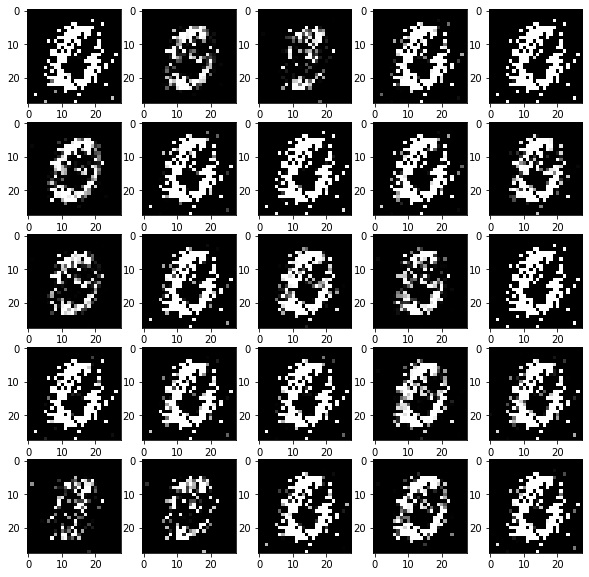

epochs 28


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 8ms/step


  0%|          | 1/273 [00:00<01:56,  2.33it/s]

4/4 [==============================] - 0s 10ms/step


  1%|          | 2/273 [00:00<01:56,  2.33it/s]

4/4 [==============================] - 0s 11ms/step


  1%|          | 3/273 [00:01<02:02,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


  1%|▏         | 4/273 [00:01<02:02,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


  2%|▏         | 5/273 [00:02<02:02,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


  2%|▏         | 6/273 [00:02<02:03,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


  3%|▎         | 7/273 [00:03<02:00,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


  3%|▎         | 8/273 [00:03<02:00,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


  3%|▎         | 9/273 [00:04<01:55,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


  4%|▎         | 10/273 [00:04<01:58,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


  4%|▍         | 11/273 [00:04<02:01,  2.16it/s]

4/4 [==============================] - 0s 12ms/step


  4%|▍         | 12/273 [00:05<01:57,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


  5%|▍         | 13/273 [00:05<01:59,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


  5%|▌         | 14/273 [00:06<01:58,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


  5%|▌         | 15/273 [00:06<01:53,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


  6%|▌         | 16/273 [00:07<01:50,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


  6%|▌         | 17/273 [00:07<01:48,  2.37it/s]

4/4 [==============================] - 0s 9ms/step


  7%|▋         | 18/273 [00:07<01:46,  2.40it/s]

4/4 [==============================] - 0s 8ms/step


  7%|▋         | 19/273 [00:08<01:46,  2.38it/s]

4/4 [==============================] - 0s 8ms/step


  7%|▋         | 20/273 [00:08<01:51,  2.28it/s]

4/4 [==============================] - 0s 11ms/step


  8%|▊         | 21/273 [00:09<01:53,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 22/273 [00:09<01:51,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


  8%|▊         | 23/273 [00:10<01:48,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


  9%|▉         | 24/273 [00:10<01:47,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


  9%|▉         | 25/273 [00:11<01:47,  2.31it/s]

4/4 [==============================] - 0s 11ms/step


 10%|▉         | 26/273 [00:11<01:44,  2.35it/s]

4/4 [==============================] - 0s 8ms/step


 10%|▉         | 27/273 [00:11<01:47,  2.28it/s]

4/4 [==============================] - 0s 10ms/step


 10%|█         | 28/273 [00:12<01:46,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 11%|█         | 29/273 [00:12<01:49,  2.23it/s]

4/4 [==============================] - 0s 10ms/step


 11%|█         | 30/273 [00:13<01:50,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 11%|█▏        | 31/273 [00:13<01:51,  2.17it/s]

4/4 [==============================] - 0s 10ms/step


 12%|█▏        | 32/273 [00:14<01:47,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 12%|█▏        | 33/273 [00:14<01:47,  2.23it/s]

4/4 [==============================] - 0s 11ms/step


 12%|█▏        | 34/273 [00:15<01:49,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 13%|█▎        | 35/273 [00:15<01:49,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 13%|█▎        | 36/273 [00:16<01:48,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 14%|█▎        | 37/273 [00:16<01:50,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


 14%|█▍        | 38/273 [00:16<01:47,  2.19it/s]

4/4 [==============================] - 0s 10ms/step


 14%|█▍        | 39/273 [00:17<01:43,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 15%|█▍        | 40/273 [00:17<01:42,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 15%|█▌        | 41/273 [00:18<01:40,  2.32it/s]

4/4 [==============================] - 0s 8ms/step


 15%|█▌        | 42/273 [00:18<01:45,  2.19it/s]

4/4 [==============================] - 0s 13ms/step


 16%|█▌        | 43/273 [00:19<01:47,  2.14it/s]

4/4 [==============================] - 0s 13ms/step


 16%|█▌        | 44/273 [00:19<01:48,  2.10it/s]

4/4 [==============================] - 0s 13ms/step


 16%|█▋        | 45/273 [00:20<01:52,  2.02it/s]

4/4 [==============================] - 0s 12ms/step


 17%|█▋        | 46/273 [00:20<01:54,  1.98it/s]

4/4 [==============================] - 0s 12ms/step


 17%|█▋        | 47/273 [00:21<01:54,  1.97it/s]

4/4 [==============================] - 0s 13ms/step


 18%|█▊        | 48/273 [00:21<01:55,  1.94it/s]

4/4 [==============================] - 0s 13ms/step


 18%|█▊        | 49/273 [00:22<01:56,  1.92it/s]

4/4 [==============================] - 0s 10ms/step


 18%|█▊        | 50/273 [00:22<01:58,  1.89it/s]

4/4 [==============================] - 0s 8ms/step


 19%|█▊        | 51/273 [00:23<01:53,  1.95it/s]

4/4 [==============================] - 0s 9ms/step


 19%|█▉        | 52/273 [00:23<01:46,  2.07it/s]

4/4 [==============================] - 0s 11ms/step


 19%|█▉        | 53/273 [00:24<01:45,  2.08it/s]

4/4 [==============================] - 0s 9ms/step


 20%|█▉        | 54/273 [00:24<01:44,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


 20%|██        | 55/273 [00:25<01:43,  2.11it/s]

4/4 [==============================] - 0s 8ms/step


 21%|██        | 56/273 [00:25<01:42,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 21%|██        | 57/273 [00:26<01:40,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 21%|██        | 58/273 [00:26<01:40,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


 22%|██▏       | 59/273 [00:27<01:36,  2.21it/s]

4/4 [==============================] - 0s 10ms/step


 22%|██▏       | 60/273 [00:27<01:44,  2.04it/s]

4/4 [==============================] - 0s 8ms/step


 22%|██▏       | 61/273 [00:28<01:40,  2.10it/s]

4/4 [==============================] - 0s 8ms/step


 23%|██▎       | 62/273 [00:28<01:35,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 23%|██▎       | 63/273 [00:28<01:34,  2.23it/s]

4/4 [==============================] - 0s 13ms/step


 23%|██▎       | 64/273 [00:29<01:36,  2.17it/s]

4/4 [==============================] - 0s 11ms/step


 24%|██▍       | 65/273 [00:29<01:33,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 24%|██▍       | 66/273 [00:30<01:34,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 25%|██▍       | 67/273 [00:30<01:34,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 25%|██▍       | 68/273 [00:31<01:29,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 25%|██▌       | 69/273 [00:31<01:31,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 26%|██▌       | 70/273 [00:32<01:31,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 26%|██▌       | 71/273 [00:32<01:29,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 26%|██▋       | 72/273 [00:32<01:28,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 27%|██▋       | 73/273 [00:33<01:27,  2.28it/s]

4/4 [==============================] - 0s 10ms/step


 27%|██▋       | 74/273 [00:33<01:31,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 27%|██▋       | 75/273 [00:34<01:36,  2.04it/s]

4/4 [==============================] - 0s 10ms/step


 28%|██▊       | 76/273 [00:34<01:32,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 28%|██▊       | 77/273 [00:35<01:31,  2.14it/s]

4/4 [==============================] - 0s 10ms/step


 29%|██▊       | 78/273 [00:35<01:33,  2.08it/s]

4/4 [==============================] - 0s 10ms/step


 29%|██▉       | 79/273 [00:36<01:32,  2.10it/s]

4/4 [==============================] - 0s 10ms/step


 29%|██▉       | 80/273 [00:36<01:28,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 30%|██▉       | 81/273 [00:37<01:28,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 30%|███       | 82/273 [00:37<01:27,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 30%|███       | 83/273 [00:38<01:27,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 31%|███       | 84/273 [00:38<01:23,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 31%|███       | 85/273 [00:38<01:20,  2.33it/s]

4/4 [==============================] - 0s 10ms/step


 32%|███▏      | 86/273 [00:39<01:18,  2.39it/s]

4/4 [==============================] - 0s 13ms/step


 32%|███▏      | 87/273 [00:39<01:18,  2.36it/s]

4/4 [==============================] - 0s 8ms/step


 32%|███▏      | 88/273 [00:40<01:17,  2.39it/s]

4/4 [==============================] - 0s 16ms/step


 33%|███▎      | 89/273 [00:40<01:21,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 33%|███▎      | 90/273 [00:40<01:18,  2.32it/s]

4/4 [==============================] - 0s 10ms/step


 33%|███▎      | 91/273 [00:41<01:17,  2.35it/s]

4/4 [==============================] - 0s 11ms/step


 34%|███▎      | 92/273 [00:41<01:20,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▍      | 93/273 [00:42<01:18,  2.30it/s]

4/4 [==============================] - 0s 8ms/step


 34%|███▍      | 94/273 [00:42<01:19,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 35%|███▍      | 95/273 [00:43<01:17,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 35%|███▌      | 96/273 [00:43<01:17,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▌      | 97/273 [00:44<01:15,  2.33it/s]

4/4 [==============================] - 0s 8ms/step


 36%|███▌      | 98/273 [00:44<01:17,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▋      | 99/273 [00:44<01:17,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 100/273 [00:45<01:19,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 101/273 [00:45<01:19,  2.16it/s]

4/4 [==============================] - 0s 11ms/step


 37%|███▋      | 102/273 [00:46<01:18,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 38%|███▊      | 103/273 [00:46<01:19,  2.13it/s]

4/4 [==============================] - 0s 10ms/step


 38%|███▊      | 104/273 [00:47<01:18,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 38%|███▊      | 105/273 [00:47<01:15,  2.22it/s]

4/4 [==============================] - 0s 10ms/step


 39%|███▉      | 106/273 [00:48<01:13,  2.27it/s]

4/4 [==============================] - 0s 10ms/step


 39%|███▉      | 107/273 [00:48<01:11,  2.34it/s]

4/4 [==============================] - 0s 8ms/step


 40%|███▉      | 108/273 [00:49<01:12,  2.28it/s]

4/4 [==============================] - 0s 10ms/step


 40%|███▉      | 109/273 [00:49<01:10,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


 40%|████      | 110/273 [00:49<01:10,  2.33it/s]

4/4 [==============================] - 0s 10ms/step


 41%|████      | 111/273 [00:50<01:09,  2.34it/s]

4/4 [==============================] - 0s 10ms/step


 41%|████      | 112/273 [00:50<01:10,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 41%|████▏     | 113/273 [00:51<01:11,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 42%|████▏     | 114/273 [00:51<01:09,  2.28it/s]

4/4 [==============================] - 0s 10ms/step


 42%|████▏     | 115/273 [00:52<01:10,  2.24it/s]

4/4 [==============================] - 0s 10ms/step


 42%|████▏     | 116/273 [00:52<01:13,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


 43%|████▎     | 117/273 [00:53<01:12,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 43%|████▎     | 118/273 [00:53<01:12,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 44%|████▎     | 119/273 [00:54<01:14,  2.08it/s]

4/4 [==============================] - 0s 14ms/step


 44%|████▍     | 120/273 [00:54<01:24,  1.80it/s]

4/4 [==============================] - 0s 16ms/step


 44%|████▍     | 121/273 [00:55<01:24,  1.80it/s]

4/4 [==============================] - 0s 12ms/step


 45%|████▍     | 122/273 [00:55<01:22,  1.82it/s]

4/4 [==============================] - 0s 12ms/step


 45%|████▌     | 123/273 [00:56<01:22,  1.82it/s]

4/4 [==============================] - 0s 11ms/step


 45%|████▌     | 124/273 [00:57<01:23,  1.79it/s]

4/4 [==============================] - 0s 11ms/step


 46%|████▌     | 125/273 [00:57<01:22,  1.80it/s]

4/4 [==============================] - 0s 9ms/step


 46%|████▌     | 126/273 [00:58<01:17,  1.90it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 127/273 [00:58<01:12,  2.03it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 128/273 [00:58<01:08,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 129/273 [00:59<01:07,  2.14it/s]

4/4 [==============================] - 0s 10ms/step


 48%|████▊     | 130/273 [00:59<01:04,  2.20it/s]

4/4 [==============================] - 0s 11ms/step


 48%|████▊     | 131/273 [01:00<01:03,  2.23it/s]

4/4 [==============================] - 0s 12ms/step


 48%|████▊     | 132/273 [01:00<01:02,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 49%|████▊     | 133/273 [01:01<01:03,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 49%|████▉     | 134/273 [01:01<01:03,  2.18it/s]

4/4 [==============================] - 0s 11ms/step


 49%|████▉     | 135/273 [01:02<01:03,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 50%|████▉     | 136/273 [01:02<01:02,  2.18it/s]

4/4 [==============================] - 0s 11ms/step


 50%|█████     | 137/273 [01:02<01:02,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


 51%|█████     | 138/273 [01:03<01:02,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


 51%|█████     | 139/273 [01:03<01:01,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 51%|█████▏    | 140/273 [01:04<01:01,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


 52%|█████▏    | 141/273 [01:04<00:58,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 142/273 [01:05<00:59,  2.20it/s]

4/4 [==============================] - 0s 7ms/step


 52%|█████▏    | 143/273 [01:05<00:58,  2.21it/s]

4/4 [==============================] - 0s 10ms/step


 53%|█████▎    | 144/273 [01:06<00:59,  2.18it/s]

4/4 [==============================] - 0s 10ms/step


 53%|█████▎    | 145/273 [01:06<00:57,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 53%|█████▎    | 146/273 [01:06<00:56,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 54%|█████▍    | 147/273 [01:07<00:56,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 54%|█████▍    | 148/273 [01:07<00:55,  2.24it/s]

4/4 [==============================] - 0s 10ms/step


 55%|█████▍    | 149/273 [01:08<00:54,  2.29it/s]

4/4 [==============================] - 0s 10ms/step


 55%|█████▍    | 150/273 [01:08<00:54,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▌    | 151/273 [01:09<00:52,  2.32it/s]

4/4 [==============================] - 0s 8ms/step


 56%|█████▌    | 152/273 [01:09<00:53,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▌    | 153/273 [01:10<00:53,  2.25it/s]

4/4 [==============================] - 0s 12ms/step


 56%|█████▋    | 154/273 [01:10<00:51,  2.31it/s]

4/4 [==============================] - 0s 10ms/step


 57%|█████▋    | 155/273 [01:10<00:50,  2.34it/s]

4/4 [==============================] - 0s 12ms/step


 57%|█████▋    | 156/273 [01:11<00:52,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 58%|█████▊    | 157/273 [01:11<00:50,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 58%|█████▊    | 158/273 [01:12<00:49,  2.32it/s]

4/4 [==============================] - 0s 10ms/step


 58%|█████▊    | 159/273 [01:12<00:49,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▊    | 160/273 [01:13<00:48,  2.34it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▉    | 161/273 [01:13<00:49,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


 59%|█████▉    | 162/273 [01:14<00:49,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 60%|█████▉    | 163/273 [01:14<00:48,  2.27it/s]

4/4 [==============================] - 0s 10ms/step


 60%|██████    | 164/273 [01:14<00:47,  2.29it/s]

4/4 [==============================] - 0s 10ms/step


 60%|██████    | 165/273 [01:15<00:48,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 61%|██████    | 166/273 [01:15<00:47,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 61%|██████    | 167/273 [01:16<00:47,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 62%|██████▏   | 168/273 [01:16<00:48,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 62%|██████▏   | 169/273 [01:17<00:46,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 62%|██████▏   | 170/273 [01:17<00:46,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 63%|██████▎   | 171/273 [01:18<00:45,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 63%|██████▎   | 172/273 [01:18<00:46,  2.17it/s]

4/4 [==============================] - 0s 12ms/step


 63%|██████▎   | 173/273 [01:18<00:44,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 64%|██████▎   | 174/273 [01:19<00:45,  2.17it/s]

4/4 [==============================] - 0s 15ms/step


 64%|██████▍   | 175/273 [01:19<00:44,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 64%|██████▍   | 176/273 [01:20<00:44,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 65%|██████▍   | 177/273 [01:20<00:42,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 65%|██████▌   | 178/273 [01:21<00:41,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 66%|██████▌   | 179/273 [01:21<00:45,  2.09it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▌   | 180/273 [01:22<00:42,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 66%|██████▋   | 181/273 [01:22<00:42,  2.16it/s]

4/4 [==============================] - 0s 14ms/step


 67%|██████▋   | 182/273 [01:23<00:40,  2.23it/s]

4/4 [==============================] - 0s 10ms/step


 67%|██████▋   | 183/273 [01:23<00:41,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 67%|██████▋   | 184/273 [01:23<00:40,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 68%|██████▊   | 185/273 [01:24<00:41,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 68%|██████▊   | 186/273 [01:24<00:39,  2.21it/s]

4/4 [==============================] - 0s 10ms/step


 68%|██████▊   | 187/273 [01:25<00:39,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 69%|██████▉   | 188/273 [01:25<00:38,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 69%|██████▉   | 189/273 [01:26<00:37,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 70%|██████▉   | 190/273 [01:26<00:36,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 70%|██████▉   | 191/273 [01:27<00:46,  1.77it/s]

4/4 [==============================] - 0s 11ms/step


 70%|███████   | 192/273 [01:27<00:43,  1.86it/s]

4/4 [==============================] - 0s 10ms/step


 71%|███████   | 193/273 [01:28<00:41,  1.94it/s]

4/4 [==============================] - 0s 11ms/step


 71%|███████   | 194/273 [01:28<00:39,  2.00it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████▏  | 195/273 [01:29<00:38,  2.04it/s]

4/4 [==============================] - 0s 8ms/step


 72%|███████▏  | 196/273 [01:29<00:35,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 72%|███████▏  | 197/273 [01:30<00:33,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 73%|███████▎  | 198/273 [01:30<00:33,  2.26it/s]

4/4 [==============================] - 0s 10ms/step


 73%|███████▎  | 199/273 [01:31<00:33,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 73%|███████▎  | 200/273 [01:31<00:37,  1.97it/s]

4/4 [==============================] - 0s 10ms/step


 74%|███████▎  | 201/273 [01:32<00:34,  2.06it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▍  | 202/273 [01:32<00:33,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▍  | 203/273 [01:33<00:32,  2.13it/s]

4/4 [==============================] - 0s 10ms/step


 75%|███████▍  | 204/273 [01:33<00:32,  2.13it/s]

4/4 [==============================] - 0s 8ms/step


 75%|███████▌  | 205/273 [01:33<00:31,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 75%|███████▌  | 206/273 [01:34<00:32,  2.06it/s]

4/4 [==============================] - 0s 10ms/step


 76%|███████▌  | 207/273 [01:34<00:31,  2.10it/s]

4/4 [==============================] - 0s 12ms/step


 76%|███████▌  | 208/273 [01:35<00:29,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 209/273 [01:35<00:29,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 210/273 [01:36<00:27,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 77%|███████▋  | 211/273 [01:36<00:27,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


 78%|███████▊  | 212/273 [01:37<00:26,  2.31it/s]

4/4 [==============================] - 0s 8ms/step


 78%|███████▊  | 213/273 [01:37<00:26,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 78%|███████▊  | 214/273 [01:37<00:25,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 79%|███████▉  | 215/273 [01:38<00:25,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 79%|███████▉  | 216/273 [01:38<00:24,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 79%|███████▉  | 217/273 [01:39<00:24,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 80%|███████▉  | 218/273 [01:39<00:23,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


 80%|████████  | 219/273 [01:40<00:23,  2.31it/s]

4/4 [==============================] - 0s 12ms/step


 81%|████████  | 220/273 [01:40<00:22,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 81%|████████  | 221/273 [01:40<00:22,  2.36it/s]

4/4 [==============================] - 0s 10ms/step


 81%|████████▏ | 222/273 [01:41<00:22,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 223/273 [01:41<00:21,  2.31it/s]

4/4 [==============================] - 0s 10ms/step


 82%|████████▏ | 224/273 [01:42<00:20,  2.36it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 225/273 [01:42<00:21,  2.28it/s]

4/4 [==============================] - 0s 12ms/step


 83%|████████▎ | 226/273 [01:43<00:22,  2.08it/s]

4/4 [==============================] - 0s 10ms/step


 83%|████████▎ | 227/273 [01:43<00:21,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▎ | 228/273 [01:44<00:20,  2.15it/s]

4/4 [==============================] - 0s 12ms/step


 84%|████████▍ | 229/273 [01:44<00:19,  2.21it/s]

4/4 [==============================] - 0s 10ms/step


 84%|████████▍ | 230/273 [01:45<00:19,  2.19it/s]

4/4 [==============================] - 0s 12ms/step


 85%|████████▍ | 231/273 [01:45<00:19,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 85%|████████▍ | 232/273 [01:46<00:19,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 85%|████████▌ | 233/273 [01:46<00:18,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▌ | 234/273 [01:46<00:17,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 86%|████████▌ | 235/273 [01:47<00:17,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▋ | 236/273 [01:47<00:17,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 87%|████████▋ | 237/273 [01:48<00:16,  2.13it/s]

4/4 [==============================] - 0s 12ms/step


 87%|████████▋ | 238/273 [01:48<00:16,  2.11it/s]

4/4 [==============================] - 0s 9ms/step


 88%|████████▊ | 239/273 [01:49<00:16,  2.11it/s]

4/4 [==============================] - 0s 8ms/step


 88%|████████▊ | 240/273 [01:49<00:15,  2.08it/s]

4/4 [==============================] - 0s 13ms/step


 88%|████████▊ | 241/273 [01:50<00:15,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▊ | 242/273 [01:50<00:14,  2.08it/s]

4/4 [==============================] - 0s 8ms/step


 89%|████████▉ | 243/273 [01:51<00:14,  2.07it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▉ | 244/273 [01:51<00:13,  2.08it/s]

4/4 [==============================] - 0s 10ms/step


 90%|████████▉ | 245/273 [01:52<00:13,  2.08it/s]

4/4 [==============================] - 0s 9ms/step


 90%|█████████ | 246/273 [01:52<00:13,  2.07it/s]

4/4 [==============================] - 0s 9ms/step


 90%|█████████ | 247/273 [01:53<00:12,  2.11it/s]

4/4 [==============================] - 0s 10ms/step


 91%|█████████ | 248/273 [01:53<00:11,  2.11it/s]

4/4 [==============================] - 0s 10ms/step


 91%|█████████ | 249/273 [01:54<00:11,  2.09it/s]

4/4 [==============================] - 0s 9ms/step


 92%|█████████▏| 250/273 [01:54<00:11,  2.08it/s]

4/4 [==============================] - 0s 10ms/step


 92%|█████████▏| 251/273 [01:55<00:10,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 92%|█████████▏| 252/273 [01:55<00:09,  2.14it/s]

4/4 [==============================] - 0s 10ms/step


 93%|█████████▎| 253/273 [01:55<00:08,  2.23it/s]

4/4 [==============================] - 0s 10ms/step


 93%|█████████▎| 254/273 [01:56<00:08,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 93%|█████████▎| 255/273 [01:56<00:08,  2.25it/s]

4/4 [==============================] - 0s 10ms/step


 94%|█████████▍| 256/273 [01:57<00:07,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 94%|█████████▍| 257/273 [01:57<00:07,  2.11it/s]

4/4 [==============================] - 0s 18ms/step


 95%|█████████▍| 258/273 [01:58<00:06,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▍| 259/273 [01:58<00:06,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▌| 260/273 [01:59<00:05,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 96%|█████████▌| 261/273 [01:59<00:05,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 96%|█████████▌| 262/273 [01:59<00:04,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 96%|█████████▋| 263/273 [02:00<00:04,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 264/273 [02:00<00:04,  2.22it/s]

4/4 [==============================] - 0s 12ms/step


 97%|█████████▋| 265/273 [02:01<00:03,  2.16it/s]

4/4 [==============================] - 0s 10ms/step


 97%|█████████▋| 266/273 [02:01<00:03,  2.13it/s]

4/4 [==============================] - 0s 10ms/step


 98%|█████████▊| 267/273 [02:02<00:02,  2.13it/s]

4/4 [==============================] - 0s 10ms/step


 98%|█████████▊| 268/273 [02:02<00:02,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 99%|█████████▊| 269/273 [02:03<00:01,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 99%|█████████▉| 270/273 [02:03<00:01,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 99%|█████████▉| 271/273 [02:04<00:00,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


100%|█████████▉| 272/273 [02:04<00:00,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


100%|██████████| 273/273 [02:05<00:00,  2.18it/s]


loss is 6.985916843404993e-05 |*| 23.886287689208984
1/1 [==============================] - 0s 27ms/step


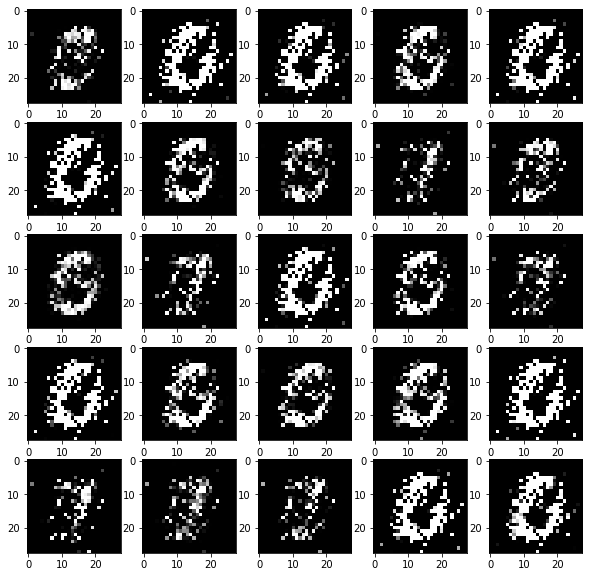

epochs 29


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 11ms/step


  0%|          | 1/273 [00:00<02:05,  2.17it/s]

4/4 [==============================] - 0s 11ms/step


  1%|          | 2/273 [00:00<02:04,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


  1%|          | 3/273 [00:01<01:57,  2.30it/s]

4/4 [==============================] - 0s 12ms/step


  1%|▏         | 4/273 [00:01<01:56,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


  2%|▏         | 5/273 [00:02<01:54,  2.34it/s]

4/4 [==============================] - 0s 9ms/step


  2%|▏         | 6/273 [00:02<01:58,  2.25it/s]

4/4 [==============================] - 0s 10ms/step


  3%|▎         | 7/273 [00:03<02:01,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


  3%|▎         | 8/273 [00:03<02:03,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


  3%|▎         | 9/273 [00:04<01:57,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


  4%|▎         | 10/273 [00:04<01:55,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


  4%|▍         | 11/273 [00:04<01:59,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


  4%|▍         | 12/273 [00:05<01:57,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


  5%|▍         | 13/273 [00:05<01:57,  2.22it/s]

4/4 [==============================] - 0s 10ms/step


  5%|▌         | 14/273 [00:06<01:52,  2.31it/s]

4/4 [==============================] - 0s 8ms/step


  5%|▌         | 15/273 [00:06<01:51,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


  6%|▌         | 16/273 [00:07<01:48,  2.37it/s]

4/4 [==============================] - 0s 9ms/step


  6%|▌         | 17/273 [00:07<01:48,  2.35it/s]

4/4 [==============================] - 0s 10ms/step


  7%|▋         | 18/273 [00:07<01:52,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


  7%|▋         | 19/273 [00:08<01:49,  2.32it/s]

4/4 [==============================] - 0s 8ms/step


  7%|▋         | 20/273 [00:08<01:53,  2.23it/s]

4/4 [==============================] - 0s 12ms/step


  8%|▊         | 21/273 [00:09<01:56,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 22/273 [00:09<01:54,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


  8%|▊         | 23/273 [00:10<01:52,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


  9%|▉         | 24/273 [00:10<01:52,  2.22it/s]

4/4 [==============================] - 0s 10ms/step


  9%|▉         | 25/273 [00:11<01:54,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


 10%|▉         | 26/273 [00:11<01:50,  2.23it/s]

4/4 [==============================] - 0s 11ms/step


 10%|▉         | 27/273 [00:12<01:52,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 10%|█         | 28/273 [00:12<01:48,  2.25it/s]

4/4 [==============================] - 0s 11ms/step


 11%|█         | 29/273 [00:12<01:46,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 11%|█         | 30/273 [00:13<01:44,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 11%|█▏        | 31/273 [00:13<01:41,  2.39it/s]

4/4 [==============================] - 0s 8ms/step


 12%|█▏        | 32/273 [00:14<01:43,  2.32it/s]

4/4 [==============================] - 0s 8ms/step


 12%|█▏        | 33/273 [00:14<01:46,  2.25it/s]

4/4 [==============================] - 0s 10ms/step


 12%|█▏        | 34/273 [00:15<01:46,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 13%|█▎        | 35/273 [00:15<01:46,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 13%|█▎        | 36/273 [00:16<01:47,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 14%|█▎        | 37/273 [00:16<01:48,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


 14%|█▍        | 38/273 [00:16<01:45,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▍        | 39/273 [00:17<01:46,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 15%|█▍        | 40/273 [00:17<01:41,  2.28it/s]

4/4 [==============================] - 0s 13ms/step


 15%|█▌        | 41/273 [00:18<01:45,  2.20it/s]

4/4 [==============================] - 0s 10ms/step


 15%|█▌        | 42/273 [00:18<01:47,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 16%|█▌        | 43/273 [00:19<01:42,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


 16%|█▌        | 44/273 [00:19<01:43,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▋        | 45/273 [00:20<01:43,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 17%|█▋        | 46/273 [00:20<01:40,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 17%|█▋        | 47/273 [00:20<01:38,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 18%|█▊        | 48/273 [00:21<01:40,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 18%|█▊        | 49/273 [00:21<01:39,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 18%|█▊        | 50/273 [00:22<01:38,  2.27it/s]

4/4 [==============================] - 0s 12ms/step


 19%|█▊        | 51/273 [00:22<01:35,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 19%|█▉        | 52/273 [00:23<01:35,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 19%|█▉        | 53/273 [00:23<01:37,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


 20%|█▉        | 54/273 [00:24<01:36,  2.27it/s]

4/4 [==============================] - 0s 10ms/step


 20%|██        | 55/273 [00:24<01:36,  2.26it/s]

4/4 [==============================] - 0s 10ms/step


 21%|██        | 56/273 [00:24<01:33,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 21%|██        | 57/273 [00:25<01:34,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 21%|██        | 58/273 [00:25<01:37,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 22%|██▏       | 59/273 [00:26<01:35,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 22%|██▏       | 60/273 [00:26<01:35,  2.24it/s]

4/4 [==============================] - 0s 11ms/step


 22%|██▏       | 61/273 [00:27<01:36,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 23%|██▎       | 62/273 [00:27<01:39,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 23%|██▎       | 63/273 [00:28<01:35,  2.20it/s]

4/4 [==============================] - 0s 12ms/step


 23%|██▎       | 64/273 [00:28<01:36,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 24%|██▍       | 65/273 [00:29<01:36,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 24%|██▍       | 66/273 [00:29<01:32,  2.24it/s]

4/4 [==============================] - 0s 10ms/step


 25%|██▍       | 67/273 [00:29<01:33,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 25%|██▍       | 68/273 [00:30<01:30,  2.26it/s]

4/4 [==============================] - 0s 7ms/step


 25%|██▌       | 69/273 [00:30<01:32,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 26%|██▌       | 70/273 [00:31<01:34,  2.14it/s]

4/4 [==============================] - 0s 12ms/step


 26%|██▌       | 71/273 [00:31<01:37,  2.08it/s]

4/4 [==============================] - 0s 8ms/step


 26%|██▋       | 72/273 [00:32<01:33,  2.14it/s]

4/4 [==============================] - 0s 13ms/step


 27%|██▋       | 73/273 [00:32<01:36,  2.06it/s]

4/4 [==============================] - 0s 15ms/step


 27%|██▋       | 74/273 [00:33<01:39,  2.01it/s]

4/4 [==============================] - 0s 13ms/step


 27%|██▋       | 75/273 [00:33<01:45,  1.87it/s]

4/4 [==============================] - 0s 14ms/step


 28%|██▊       | 76/273 [00:34<01:54,  1.71it/s]

4/4 [==============================] - 0s 12ms/step


 28%|██▊       | 77/273 [00:35<01:48,  1.81it/s]

4/4 [==============================] - 0s 11ms/step


 29%|██▊       | 78/273 [00:35<01:51,  1.75it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▉       | 79/273 [00:36<01:47,  1.80it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▉       | 80/273 [00:36<01:43,  1.86it/s]

4/4 [==============================] - 0s 9ms/step


 30%|██▉       | 81/273 [00:37<01:38,  1.94it/s]

4/4 [==============================] - 0s 9ms/step


 30%|███       | 82/273 [00:37<01:31,  2.09it/s]

4/4 [==============================] - 0s 8ms/step


 30%|███       | 83/273 [00:38<01:30,  2.11it/s]

4/4 [==============================] - 0s 9ms/step


 31%|███       | 84/273 [00:38<01:37,  1.94it/s]

4/4 [==============================] - 0s 9ms/step


 31%|███       | 85/273 [00:39<01:31,  2.06it/s]

4/4 [==============================] - 0s 8ms/step


 32%|███▏      | 86/273 [00:39<01:30,  2.06it/s]

4/4 [==============================] - 0s 8ms/step


 32%|███▏      | 87/273 [00:40<01:28,  2.10it/s]

4/4 [==============================] - 0s 8ms/step


 32%|███▏      | 88/273 [00:40<01:27,  2.11it/s]

4/4 [==============================] - 0s 9ms/step


 33%|███▎      | 89/273 [00:40<01:28,  2.08it/s]

4/4 [==============================] - 0s 8ms/step


 33%|███▎      | 90/273 [00:41<01:27,  2.09it/s]

4/4 [==============================] - 0s 9ms/step


 33%|███▎      | 91/273 [00:41<01:24,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▎      | 92/273 [00:42<01:26,  2.09it/s]

4/4 [==============================] - 0s 8ms/step


 34%|███▍      | 93/273 [00:42<01:21,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▍      | 94/273 [00:43<01:22,  2.17it/s]

4/4 [==============================] - 0s 10ms/step


 35%|███▍      | 95/273 [00:43<01:23,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 35%|███▌      | 96/273 [00:44<01:20,  2.21it/s]

4/4 [==============================] - 0s 10ms/step


 36%|███▌      | 97/273 [00:44<01:21,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 36%|███▌      | 98/273 [00:45<01:19,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 36%|███▋      | 99/273 [00:45<01:17,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 100/273 [00:45<01:16,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 101/273 [00:46<01:14,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 102/273 [00:46<01:12,  2.37it/s]

4/4 [==============================] - 0s 9ms/step


 38%|███▊      | 103/273 [00:47<01:15,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


 38%|███▊      | 104/273 [00:47<01:14,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 38%|███▊      | 105/273 [00:48<01:11,  2.34it/s]

4/4 [==============================] - 0s 9ms/step


 39%|███▉      | 106/273 [00:48<01:11,  2.35it/s]

4/4 [==============================] - 0s 8ms/step


 39%|███▉      | 107/273 [00:48<01:12,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 40%|███▉      | 108/273 [00:49<01:14,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 40%|███▉      | 109/273 [00:49<01:11,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 40%|████      | 110/273 [00:50<01:12,  2.26it/s]

4/4 [==============================] - 0s 13ms/step


 41%|████      | 111/273 [00:50<01:13,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 41%|████      | 112/273 [00:51<01:13,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 41%|████▏     | 113/273 [00:51<01:11,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 42%|████▏     | 114/273 [00:52<01:11,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 42%|████▏     | 115/273 [00:52<01:11,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 42%|████▏     | 116/273 [00:53<01:11,  2.19it/s]

4/4 [==============================] - 0s 10ms/step


 43%|████▎     | 117/273 [00:53<01:13,  2.13it/s]

4/4 [==============================] - 0s 10ms/step


 43%|████▎     | 118/273 [00:53<01:10,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 44%|████▎     | 119/273 [00:54<01:10,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 44%|████▍     | 120/273 [00:54<01:10,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 44%|████▍     | 121/273 [00:55<01:07,  2.25it/s]

4/4 [==============================] - 0s 10ms/step


 45%|████▍     | 122/273 [00:55<01:06,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 45%|████▌     | 123/273 [00:56<01:06,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


 45%|████▌     | 124/273 [00:56<01:06,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 46%|████▌     | 125/273 [00:57<01:05,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 46%|████▌     | 126/273 [00:57<01:03,  2.31it/s]

4/4 [==============================] - 0s 11ms/step


 47%|████▋     | 127/273 [00:57<01:02,  2.34it/s]

4/4 [==============================] - 0s 10ms/step


 47%|████▋     | 128/273 [00:58<01:04,  2.25it/s]

4/4 [==============================] - 0s 10ms/step


 47%|████▋     | 129/273 [00:58<01:06,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


 48%|████▊     | 130/273 [00:59<01:03,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 48%|████▊     | 131/273 [00:59<01:02,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 48%|████▊     | 132/273 [01:00<01:03,  2.23it/s]

4/4 [==============================] - 0s 12ms/step


 49%|████▊     | 133/273 [01:00<01:04,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 49%|████▉     | 134/273 [01:01<01:04,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 49%|████▉     | 135/273 [01:01<01:03,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


 50%|████▉     | 136/273 [01:02<01:03,  2.14it/s]

4/4 [==============================] - 0s 10ms/step


 50%|█████     | 137/273 [01:02<01:01,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 51%|█████     | 138/273 [01:03<01:02,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 51%|█████     | 139/273 [01:03<01:00,  2.23it/s]

4/4 [==============================] - 0s 10ms/step


 51%|█████▏    | 140/273 [01:03<01:01,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 141/273 [01:04<01:01,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


 52%|█████▏    | 142/273 [01:04<01:01,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 143/273 [01:05<01:02,  2.08it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 144/273 [01:05<01:04,  2.00it/s]

4/4 [==============================] - 0s 10ms/step


 53%|█████▎    | 145/273 [01:06<01:06,  1.94it/s]

4/4 [==============================] - 0s 12ms/step


 53%|█████▎    | 146/273 [01:07<01:05,  1.94it/s]

4/4 [==============================] - 0s 13ms/step


 54%|█████▍    | 147/273 [01:07<01:06,  1.91it/s]

4/4 [==============================] - 0s 14ms/step


 54%|█████▍    | 148/273 [01:08<01:04,  1.93it/s]

4/4 [==============================] - 0s 15ms/step


 55%|█████▍    | 149/273 [01:08<01:05,  1.88it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▍    | 150/273 [01:09<01:05,  1.87it/s]

4/4 [==============================] - 0s 13ms/step


 55%|█████▌    | 151/273 [01:09<01:04,  1.88it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▌    | 152/273 [01:10<01:03,  1.91it/s]

4/4 [==============================] - 0s 8ms/step


 56%|█████▌    | 153/273 [01:10<00:59,  2.03it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▋    | 154/273 [01:11<00:56,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 57%|█████▋    | 155/273 [01:11<00:55,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 57%|█████▋    | 156/273 [01:12<00:55,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


 58%|█████▊    | 157/273 [01:12<00:55,  2.09it/s]

4/4 [==============================] - 0s 10ms/step


 58%|█████▊    | 158/273 [01:12<00:52,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 58%|█████▊    | 159/273 [01:13<00:50,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▊    | 160/273 [01:13<00:50,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▉    | 161/273 [01:14<00:48,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▉    | 162/273 [01:14<00:49,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 60%|█████▉    | 163/273 [01:15<00:48,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 60%|██████    | 164/273 [01:15<00:49,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 60%|██████    | 165/273 [01:15<00:48,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 61%|██████    | 166/273 [01:16<00:48,  2.19it/s]

4/4 [==============================] - 0s 10ms/step


 61%|██████    | 167/273 [01:16<00:47,  2.21it/s]

4/4 [==============================] - 0s 10ms/step


 62%|██████▏   | 168/273 [01:17<00:47,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 62%|██████▏   | 169/273 [01:17<00:46,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 62%|██████▏   | 170/273 [01:18<00:47,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


 63%|██████▎   | 171/273 [01:18<00:46,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 63%|██████▎   | 172/273 [01:19<00:47,  2.13it/s]

4/4 [==============================] - 0s 8ms/step


 63%|██████▎   | 173/273 [01:19<00:48,  2.07it/s]

4/4 [==============================] - 0s 13ms/step


 64%|██████▎   | 174/273 [01:20<00:47,  2.07it/s]

4/4 [==============================] - 0s 8ms/step


 64%|██████▍   | 175/273 [01:20<00:45,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 64%|██████▍   | 176/273 [01:21<00:46,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


 65%|██████▍   | 177/273 [01:21<00:45,  2.11it/s]

4/4 [==============================] - 0s 11ms/step


 65%|██████▌   | 178/273 [01:22<00:45,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▌   | 179/273 [01:22<00:42,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▌   | 180/273 [01:22<00:42,  2.17it/s]

4/4 [==============================] - 0s 10ms/step


 66%|██████▋   | 181/273 [01:23<00:42,  2.17it/s]

4/4 [==============================] - 0s 10ms/step


 67%|██████▋   | 182/273 [01:23<00:40,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 67%|██████▋   | 183/273 [01:24<00:40,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 67%|██████▋   | 184/273 [01:24<00:40,  2.21it/s]

4/4 [==============================] - 0s 13ms/step


 68%|██████▊   | 185/273 [01:25<00:40,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 68%|██████▊   | 186/273 [01:25<00:40,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 68%|██████▊   | 187/273 [01:26<00:40,  2.13it/s]

4/4 [==============================] - 0s 8ms/step


 69%|██████▉   | 188/273 [01:26<00:40,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


 69%|██████▉   | 189/273 [01:27<00:38,  2.18it/s]

4/4 [==============================] - 0s 11ms/step


 70%|██████▉   | 190/273 [01:27<00:37,  2.22it/s]

4/4 [==============================] - 0s 12ms/step


 70%|██████▉   | 191/273 [01:27<00:36,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 70%|███████   | 192/273 [01:28<00:37,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████   | 193/273 [01:28<00:35,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████   | 194/273 [01:29<00:35,  2.22it/s]

4/4 [==============================] - 0s 10ms/step


 71%|███████▏  | 195/273 [01:29<00:35,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 72%|███████▏  | 196/273 [01:30<00:36,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 72%|███████▏  | 197/273 [01:30<00:35,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 73%|███████▎  | 198/273 [01:31<00:35,  2.11it/s]

4/4 [==============================] - 0s 8ms/step


 73%|███████▎  | 199/273 [01:31<00:34,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


 73%|███████▎  | 200/273 [01:32<00:33,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▎  | 201/273 [01:32<00:32,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▍  | 202/273 [01:33<00:32,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 74%|███████▍  | 203/273 [01:33<00:30,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 75%|███████▍  | 204/273 [01:33<00:30,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 75%|███████▌  | 205/273 [01:34<00:30,  2.22it/s]

4/4 [==============================] - 0s 10ms/step


 75%|███████▌  | 206/273 [01:34<00:29,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 76%|███████▌  | 207/273 [01:35<00:29,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 76%|███████▌  | 208/273 [01:35<00:30,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 209/273 [01:36<00:28,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 210/273 [01:36<00:28,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 211/273 [01:37<00:28,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 212/273 [01:37<00:27,  2.24it/s]

4/4 [==============================] - 0s 11ms/step


 78%|███████▊  | 213/273 [01:37<00:26,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 214/273 [01:38<00:25,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


 79%|███████▉  | 215/273 [01:38<00:25,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 79%|███████▉  | 216/273 [01:39<00:24,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 79%|███████▉  | 217/273 [01:39<00:25,  2.22it/s]

4/4 [==============================] - 0s 11ms/step


 80%|███████▉  | 218/273 [01:40<00:24,  2.29it/s]

4/4 [==============================] - 0s 11ms/step


 80%|████████  | 219/273 [01:40<00:24,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 81%|████████  | 220/273 [01:41<00:24,  2.16it/s]

4/4 [==============================] - 0s 10ms/step


 81%|████████  | 221/273 [01:41<00:24,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 81%|████████▏ | 222/273 [01:41<00:23,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 223/273 [01:42<00:22,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 82%|████████▏ | 224/273 [01:42<00:21,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 225/273 [01:43<00:20,  2.33it/s]

4/4 [==============================] - 0s 10ms/step


 83%|████████▎ | 226/273 [01:43<00:22,  2.05it/s]

4/4 [==============================] - 0s 9ms/step


 83%|████████▎ | 227/273 [01:44<00:21,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▎ | 228/273 [01:44<00:21,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▍ | 229/273 [01:45<00:20,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▍ | 230/273 [01:45<00:19,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 85%|████████▍ | 231/273 [01:46<00:19,  2.17it/s]

4/4 [==============================] - 0s 11ms/step


 85%|████████▍ | 232/273 [01:46<00:19,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


 85%|████████▌ | 233/273 [01:47<00:19,  2.10it/s]

4/4 [==============================] - 0s 8ms/step


 86%|████████▌ | 234/273 [01:47<00:18,  2.10it/s]

4/4 [==============================] - 0s 8ms/step


 86%|████████▌ | 235/273 [01:48<00:20,  1.90it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▋ | 236/273 [01:48<00:18,  2.00it/s]

4/4 [==============================] - 0s 8ms/step


 87%|████████▋ | 237/273 [01:49<00:17,  2.01it/s]

4/4 [==============================] - 0s 9ms/step


 87%|████████▋ | 238/273 [01:49<00:16,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


 88%|████████▊ | 239/273 [01:50<00:16,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 88%|████████▊ | 240/273 [01:50<00:15,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 88%|████████▊ | 241/273 [01:50<00:14,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▊ | 242/273 [01:51<00:14,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▉ | 243/273 [01:51<00:13,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 89%|████████▉ | 244/273 [01:52<00:12,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 90%|████████▉ | 245/273 [01:52<00:12,  2.25it/s]

4/4 [==============================] - 0s 11ms/step


 90%|█████████ | 246/273 [01:53<00:12,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 90%|█████████ | 247/273 [01:53<00:11,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 91%|█████████ | 248/273 [01:54<00:11,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 91%|█████████ | 249/273 [01:54<00:10,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 92%|█████████▏| 250/273 [01:54<00:09,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 92%|█████████▏| 251/273 [01:55<00:09,  2.34it/s]

4/4 [==============================] - 0s 8ms/step


 92%|█████████▏| 252/273 [01:55<00:09,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


 93%|█████████▎| 253/273 [01:56<00:08,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 93%|█████████▎| 254/273 [01:56<00:08,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 93%|█████████▎| 255/273 [01:57<00:08,  2.09it/s]

4/4 [==============================] - 0s 9ms/step


 94%|█████████▍| 256/273 [01:57<00:08,  2.07it/s]

4/4 [==============================] - 0s 11ms/step


 94%|█████████▍| 257/273 [01:58<00:07,  2.07it/s]

4/4 [==============================] - 0s 10ms/step


 95%|█████████▍| 258/273 [01:58<00:06,  2.19it/s]

4/4 [==============================] - 0s 11ms/step


 95%|█████████▍| 259/273 [01:59<00:06,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▌| 260/273 [01:59<00:05,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 96%|█████████▌| 261/273 [01:59<00:05,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 96%|█████████▌| 262/273 [02:00<00:04,  2.29it/s]

4/4 [==============================] - 0s 11ms/step


 96%|█████████▋| 263/273 [02:00<00:04,  2.30it/s]

4/4 [==============================] - 0s 7ms/step


 97%|█████████▋| 264/273 [02:01<00:03,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 265/273 [02:01<00:03,  2.21it/s]

4/4 [==============================] - 0s 11ms/step


 97%|█████████▋| 266/273 [02:02<00:03,  2.26it/s]

4/4 [==============================] - 0s 10ms/step


 98%|█████████▊| 267/273 [02:02<00:02,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


 98%|█████████▊| 268/273 [02:02<00:02,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 99%|█████████▊| 269/273 [02:03<00:01,  2.23it/s]

4/4 [==============================] - 0s 10ms/step


 99%|█████████▉| 270/273 [02:03<00:01,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 99%|█████████▉| 271/273 [02:04<00:00,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


100%|█████████▉| 272/273 [02:04<00:00,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


100%|██████████| 273/273 [02:05<00:00,  2.18it/s]


loss is 5.490108378580771e-06 |*| 26.676681518554688
1/1 [==============================] - 0s 26ms/step


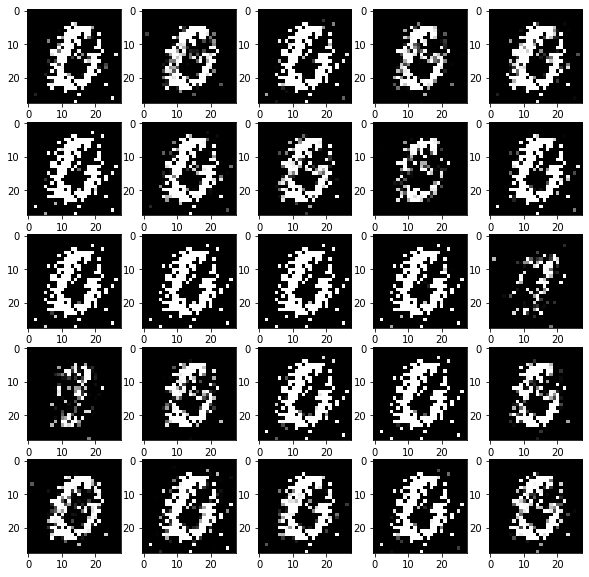

epochs 30


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 8ms/step


  0%|          | 1/273 [00:00<01:44,  2.61it/s]

4/4 [==============================] - 0s 8ms/step


  1%|          | 2/273 [00:00<01:57,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


  1%|          | 3/273 [00:01<02:03,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


  1%|▏         | 4/273 [00:01<01:58,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


  2%|▏         | 5/273 [00:02<01:59,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


  2%|▏         | 6/273 [00:02<02:02,  2.17it/s]

4/4 [==============================] - 0s 10ms/step


  3%|▎         | 7/273 [00:03<01:58,  2.25it/s]

4/4 [==============================] - 0s 13ms/step


  3%|▎         | 8/273 [00:03<01:55,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


  3%|▎         | 9/273 [00:03<01:52,  2.35it/s]

4/4 [==============================] - 0s 11ms/step


  4%|▎         | 10/273 [00:04<01:51,  2.37it/s]

4/4 [==============================] - 0s 10ms/step


  4%|▍         | 11/273 [00:04<01:51,  2.35it/s]

4/4 [==============================] - 0s 9ms/step


  4%|▍         | 12/273 [00:05<01:49,  2.38it/s]

4/4 [==============================] - 0s 9ms/step


  5%|▍         | 13/273 [00:05<01:48,  2.40it/s]

4/4 [==============================] - 0s 10ms/step


  5%|▌         | 14/273 [00:06<01:51,  2.31it/s]

4/4 [==============================] - 0s 8ms/step


  5%|▌         | 15/273 [00:06<01:54,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


  6%|▌         | 16/273 [00:06<01:51,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


  6%|▌         | 17/273 [00:07<02:03,  2.07it/s]

4/4 [==============================] - 0s 9ms/step


  7%|▋         | 18/273 [00:07<01:56,  2.20it/s]

4/4 [==============================] - 0s 11ms/step


  7%|▋         | 19/273 [00:08<01:53,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


  7%|▋         | 20/273 [00:08<01:52,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 21/273 [00:09<01:49,  2.30it/s]

4/4 [==============================] - 0s 13ms/step


  8%|▊         | 22/273 [00:09<01:46,  2.36it/s]

4/4 [==============================] - 0s 11ms/step


  8%|▊         | 23/273 [00:10<01:51,  2.25it/s]

4/4 [==============================] - 0s 10ms/step


  9%|▉         | 24/273 [00:10<01:51,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


  9%|▉         | 25/273 [00:11<01:53,  2.19it/s]

4/4 [==============================] - 0s 13ms/step


 10%|▉         | 26/273 [00:11<01:53,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 10%|▉         | 27/273 [00:11<01:50,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 10%|█         | 28/273 [00:12<01:48,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 11%|█         | 29/273 [00:12<01:51,  2.19it/s]

4/4 [==============================] - 0s 13ms/step


 11%|█         | 30/273 [00:13<01:49,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 11%|█▏        | 31/273 [00:13<01:46,  2.28it/s]

4/4 [==============================] - 0s 10ms/step


 12%|█▏        | 32/273 [00:14<01:53,  2.13it/s]

4/4 [==============================] - 0s 8ms/step


 12%|█▏        | 33/273 [00:14<01:53,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 12%|█▏        | 34/273 [00:15<01:51,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 13%|█▎        | 35/273 [00:15<01:46,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 13%|█▎        | 36/273 [00:15<01:43,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▎        | 37/273 [00:16<01:48,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▍        | 38/273 [00:16<01:49,  2.14it/s]

4/4 [==============================] - 0s 10ms/step


 14%|█▍        | 39/273 [00:17<01:49,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 15%|█▍        | 40/273 [00:17<01:44,  2.22it/s]

4/4 [==============================] - 0s 10ms/step


 15%|█▌        | 41/273 [00:18<01:44,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 15%|█▌        | 42/273 [00:18<01:48,  2.13it/s]

4/4 [==============================] - 0s 8ms/step


 16%|█▌        | 43/273 [00:19<01:43,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▌        | 44/273 [00:19<01:40,  2.27it/s]

4/4 [==============================] - 0s 11ms/step


 16%|█▋        | 45/273 [00:20<01:43,  2.21it/s]

4/4 [==============================] - 0s 10ms/step


 17%|█▋        | 46/273 [00:20<01:38,  2.31it/s]

4/4 [==============================] - 0s 14ms/step


 17%|█▋        | 47/273 [00:20<01:40,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 18%|█▊        | 48/273 [00:21<01:39,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 18%|█▊        | 49/273 [00:21<01:38,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 18%|█▊        | 50/273 [00:22<01:39,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 19%|█▊        | 51/273 [00:22<01:38,  2.26it/s]

4/4 [==============================] - 0s 12ms/step


 19%|█▉        | 52/273 [00:23<01:39,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 19%|█▉        | 53/273 [00:23<01:39,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 20%|█▉        | 54/273 [00:24<01:36,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 20%|██        | 55/273 [00:24<01:34,  2.31it/s]

4/4 [==============================] - 0s 8ms/step


 21%|██        | 56/273 [00:24<01:36,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 21%|██        | 57/273 [00:25<01:38,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 21%|██        | 58/273 [00:25<01:38,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 22%|██▏       | 59/273 [00:26<01:40,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


 22%|██▏       | 60/273 [00:26<01:36,  2.20it/s]

4/4 [==============================] - 0s 12ms/step


 22%|██▏       | 61/273 [00:27<01:33,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 23%|██▎       | 62/273 [00:27<01:33,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 23%|██▎       | 63/273 [00:28<01:36,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 23%|██▎       | 64/273 [00:28<01:35,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 24%|██▍       | 65/273 [00:29<01:37,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 24%|██▍       | 66/273 [00:29<01:35,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


 25%|██▍       | 67/273 [00:30<01:36,  2.14it/s]

4/4 [==============================] - 0s 11ms/step


 25%|██▍       | 68/273 [00:30<01:32,  2.22it/s]

4/4 [==============================] - 0s 10ms/step


 25%|██▌       | 69/273 [00:30<01:30,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


 26%|██▌       | 70/273 [00:31<01:29,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 26%|██▌       | 71/273 [00:31<01:31,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 26%|██▋       | 72/273 [00:32<01:27,  2.29it/s]

4/4 [==============================] - 0s 10ms/step


 27%|██▋       | 73/273 [00:32<01:27,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 27%|██▋       | 74/273 [00:33<01:28,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 27%|██▋       | 75/273 [00:33<01:27,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 28%|██▊       | 76/273 [00:34<01:29,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 28%|██▊       | 77/273 [00:34<01:31,  2.15it/s]

4/4 [==============================] - 0s 12ms/step


 29%|██▊       | 78/273 [00:34<01:27,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▉       | 79/273 [00:35<01:27,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▉       | 80/273 [00:35<01:26,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 30%|██▉       | 81/273 [00:36<01:26,  2.22it/s]

4/4 [==============================] - 0s 10ms/step


 30%|███       | 82/273 [00:36<01:26,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 30%|███       | 83/273 [00:37<01:23,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 31%|███       | 84/273 [00:37<01:21,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 31%|███       | 85/273 [00:38<01:22,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 32%|███▏      | 86/273 [00:38<01:19,  2.34it/s]

4/4 [==============================] - 0s 13ms/step


 32%|███▏      | 87/273 [00:38<01:21,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 32%|███▏      | 88/273 [00:39<01:22,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 33%|███▎      | 89/273 [00:39<01:22,  2.22it/s]

4/4 [==============================] - 0s 10ms/step


 33%|███▎      | 90/273 [00:40<01:20,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 33%|███▎      | 91/273 [00:40<01:19,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▎      | 92/273 [00:41<01:20,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▍      | 93/273 [00:41<01:20,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▍      | 94/273 [00:42<01:21,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 35%|███▍      | 95/273 [00:42<01:21,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 35%|███▌      | 96/273 [00:42<01:22,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▌      | 97/273 [00:43<01:19,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▌      | 98/273 [00:43<01:19,  2.21it/s]

4/4 [==============================] - 0s 11ms/step


 36%|███▋      | 99/273 [00:44<01:17,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 100/273 [00:44<01:24,  2.06it/s]

4/4 [==============================] - 0s 10ms/step


 37%|███▋      | 101/273 [00:45<01:23,  2.06it/s]

4/4 [==============================] - 0s 11ms/step


 37%|███▋      | 102/273 [00:45<01:24,  2.03it/s]

4/4 [==============================] - 0s 11ms/step


 38%|███▊      | 103/273 [00:46<01:21,  2.08it/s]

4/4 [==============================] - 0s 11ms/step


 38%|███▊      | 104/273 [00:46<01:23,  2.03it/s]

4/4 [==============================] - 0s 16ms/step


 38%|███▊      | 105/273 [00:47<01:25,  1.97it/s]

4/4 [==============================] - 0s 13ms/step


 39%|███▉      | 106/273 [00:47<01:25,  1.96it/s]

4/4 [==============================] - 0s 12ms/step


 39%|███▉      | 107/273 [00:48<01:26,  1.92it/s]

4/4 [==============================] - 0s 18ms/step


 40%|███▉      | 108/273 [00:49<01:33,  1.76it/s]

4/4 [==============================] - 0s 11ms/step


 40%|███▉      | 109/273 [00:49<01:24,  1.93it/s]

4/4 [==============================] - 0s 10ms/step


 40%|████      | 110/273 [00:49<01:20,  2.02it/s]

4/4 [==============================] - 0s 9ms/step


 41%|████      | 111/273 [00:50<01:17,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


 41%|████      | 112/273 [00:50<01:17,  2.09it/s]

4/4 [==============================] - 0s 9ms/step


 41%|████▏     | 113/273 [00:51<01:14,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


 42%|████▏     | 114/273 [00:51<01:12,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 42%|████▏     | 115/273 [00:52<01:09,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 42%|████▏     | 116/273 [00:52<01:09,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 43%|████▎     | 117/273 [00:53<01:08,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 43%|████▎     | 118/273 [00:53<01:07,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 44%|████▎     | 119/273 [00:53<01:08,  2.26it/s]

4/4 [==============================] - 0s 10ms/step


 44%|████▍     | 120/273 [00:54<01:10,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 44%|████▍     | 121/273 [00:54<01:10,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


 45%|████▍     | 122/273 [00:55<01:10,  2.14it/s]

4/4 [==============================] - 0s 14ms/step


 45%|████▌     | 123/273 [00:55<01:07,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 45%|████▌     | 124/273 [00:56<01:07,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 46%|████▌     | 125/273 [00:56<01:04,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 46%|████▌     | 126/273 [00:57<01:04,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 127/273 [00:57<01:03,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 128/273 [00:57<01:04,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 129/273 [00:58<01:05,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 48%|████▊     | 130/273 [00:58<01:02,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 48%|████▊     | 131/273 [00:59<01:01,  2.30it/s]

4/4 [==============================] - 0s 8ms/step


 48%|████▊     | 132/273 [00:59<01:02,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 49%|████▊     | 133/273 [01:00<01:03,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 49%|████▉     | 134/273 [01:00<01:01,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 49%|████▉     | 135/273 [01:01<01:01,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 50%|████▉     | 136/273 [01:01<00:59,  2.29it/s]

4/4 [==============================] - 0s 10ms/step


 50%|█████     | 137/273 [01:01<01:00,  2.25it/s]

4/4 [==============================] - 0s 10ms/step


 51%|█████     | 138/273 [01:02<00:59,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 51%|█████     | 139/273 [01:02<00:58,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 51%|█████▏    | 140/273 [01:03<00:59,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


 52%|█████▏    | 141/273 [01:03<01:01,  2.14it/s]

4/4 [==============================] - 0s 10ms/step


 52%|█████▏    | 142/273 [01:04<00:58,  2.25it/s]

4/4 [==============================] - 0s 14ms/step


 52%|█████▏    | 143/273 [01:04<01:05,  1.98it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 144/273 [01:05<01:04,  2.00it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 145/273 [01:05<01:04,  2.00it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 146/273 [01:06<01:02,  2.02it/s]

4/4 [==============================] - 0s 12ms/step


 54%|█████▍    | 147/273 [01:06<01:01,  2.06it/s]

4/4 [==============================] - 0s 11ms/step


 54%|█████▍    | 148/273 [01:07<01:02,  2.01it/s]

4/4 [==============================] - 0s 13ms/step


 55%|█████▍    | 149/273 [01:07<01:00,  2.04it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▍    | 150/273 [01:08<00:59,  2.07it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▌    | 151/273 [01:08<00:57,  2.11it/s]

4/4 [==============================] - 0s 10ms/step


 56%|█████▌    | 152/273 [01:09<01:01,  1.96it/s]

4/4 [==============================] - 0s 8ms/step


 56%|█████▌    | 153/273 [01:09<00:59,  2.01it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▋    | 154/273 [01:10<00:59,  2.01it/s]

4/4 [==============================] - 0s 8ms/step


 57%|█████▋    | 155/273 [01:10<00:57,  2.06it/s]

4/4 [==============================] - 0s 10ms/step


 57%|█████▋    | 156/273 [01:11<00:54,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 58%|█████▊    | 157/273 [01:11<00:55,  2.09it/s]

4/4 [==============================] - 0s 9ms/step


 58%|█████▊    | 158/273 [01:12<00:53,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 58%|█████▊    | 159/273 [01:12<00:54,  2.11it/s]

4/4 [==============================] - 0s 11ms/step


 59%|█████▊    | 160/273 [01:12<00:51,  2.18it/s]

4/4 [==============================] - 0s 13ms/step


 59%|█████▉    | 161/273 [01:13<00:50,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 59%|█████▉    | 162/273 [01:13<00:50,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 60%|█████▉    | 163/273 [01:14<00:48,  2.27it/s]

4/4 [==============================] - 0s 13ms/step


 60%|██████    | 164/273 [01:14<00:50,  2.16it/s]

4/4 [==============================] - 0s 10ms/step


 60%|██████    | 165/273 [01:15<00:50,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 61%|██████    | 166/273 [01:15<00:48,  2.20it/s]

4/4 [==============================] - 0s 15ms/step


 61%|██████    | 167/273 [01:16<00:50,  2.08it/s]

4/4 [==============================] - 0s 12ms/step


 62%|██████▏   | 168/273 [01:16<00:50,  2.10it/s]

4/4 [==============================] - 0s 10ms/step


 62%|██████▏   | 169/273 [01:17<00:50,  2.07it/s]

4/4 [==============================] - 0s 9ms/step


 62%|██████▏   | 170/273 [01:17<00:55,  1.86it/s]

4/4 [==============================] - 0s 11ms/step


 63%|██████▎   | 171/273 [01:18<00:53,  1.90it/s]

4/4 [==============================] - 0s 11ms/step


 63%|██████▎   | 172/273 [01:18<00:53,  1.88it/s]

4/4 [==============================] - 0s 12ms/step


 63%|██████▎   | 173/273 [01:19<00:55,  1.80it/s]

4/4 [==============================] - 0s 13ms/step


 64%|██████▎   | 174/273 [01:20<00:53,  1.84it/s]

4/4 [==============================] - 0s 12ms/step


 64%|██████▍   | 175/273 [01:20<00:54,  1.81it/s]

4/4 [==============================] - 0s 9ms/step


 64%|██████▍   | 176/273 [01:21<00:51,  1.87it/s]

4/4 [==============================] - 0s 9ms/step


 65%|██████▍   | 177/273 [01:21<00:48,  1.98it/s]

4/4 [==============================] - 0s 9ms/step


 65%|██████▌   | 178/273 [01:22<00:47,  1.99it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▌   | 179/273 [01:22<00:45,  2.05it/s]

4/4 [==============================] - 0s 8ms/step


 66%|██████▌   | 180/273 [01:23<00:46,  2.02it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▋   | 181/273 [01:23<00:44,  2.05it/s]

4/4 [==============================] - 0s 8ms/step


 67%|██████▋   | 182/273 [01:23<00:41,  2.17it/s]

4/4 [==============================] - 0s 10ms/step


 67%|██████▋   | 183/273 [01:24<00:41,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 67%|██████▋   | 184/273 [01:24<00:39,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 68%|██████▊   | 185/273 [01:25<00:40,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 68%|██████▊   | 186/273 [01:25<00:40,  2.16it/s]

4/4 [==============================] - 0s 14ms/step


 68%|██████▊   | 187/273 [01:26<00:41,  2.10it/s]

4/4 [==============================] - 0s 8ms/step


 69%|██████▉   | 188/273 [01:26<00:39,  2.18it/s]

4/4 [==============================] - 0s 10ms/step


 69%|██████▉   | 189/273 [01:27<00:39,  2.14it/s]

4/4 [==============================] - 0s 12ms/step


 70%|██████▉   | 190/273 [01:27<00:37,  2.22it/s]

4/4 [==============================] - 0s 10ms/step


 70%|██████▉   | 191/273 [01:28<00:38,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 70%|███████   | 192/273 [01:28<00:37,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 71%|███████   | 193/273 [01:28<00:36,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████   | 194/273 [01:29<00:35,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 71%|███████▏  | 195/273 [01:29<00:34,  2.25it/s]

4/4 [==============================] - 0s 12ms/step


 72%|███████▏  | 196/273 [01:30<00:34,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 72%|███████▏  | 197/273 [01:30<00:33,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 73%|███████▎  | 198/273 [01:31<00:32,  2.31it/s]

4/4 [==============================] - 0s 10ms/step


 73%|███████▎  | 199/273 [01:31<00:33,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 73%|███████▎  | 200/273 [01:32<00:33,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▎  | 201/273 [01:32<00:33,  2.15it/s]

4/4 [==============================] - 0s 10ms/step


 74%|███████▍  | 202/273 [01:33<00:32,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▍  | 203/273 [01:33<00:31,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 75%|███████▍  | 204/273 [01:33<00:30,  2.23it/s]

4/4 [==============================] - 0s 11ms/step


 75%|███████▌  | 205/273 [01:34<00:30,  2.23it/s]

4/4 [==============================] - 0s 10ms/step


 75%|███████▌  | 206/273 [01:34<00:29,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 76%|███████▌  | 207/273 [01:35<00:28,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 76%|███████▌  | 208/273 [01:35<00:29,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 209/273 [01:36<00:27,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 210/273 [01:36<00:27,  2.29it/s]

4/4 [==============================] - 0s 10ms/step


 77%|███████▋  | 211/273 [01:36<00:27,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 212/273 [01:37<00:27,  2.24it/s]

4/4 [==============================] - 0s 12ms/step


 78%|███████▊  | 213/273 [01:37<00:27,  2.18it/s]

4/4 [==============================] - 0s 10ms/step


 78%|███████▊  | 214/273 [01:38<00:27,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 79%|███████▉  | 215/273 [01:38<00:26,  2.20it/s]

4/4 [==============================] - 0s 11ms/step


 79%|███████▉  | 216/273 [01:39<00:28,  2.01it/s]

4/4 [==============================] - 0s 9ms/step


 79%|███████▉  | 217/273 [01:39<00:26,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


 80%|███████▉  | 218/273 [01:40<00:25,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 80%|████████  | 219/273 [01:40<00:25,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


 81%|████████  | 220/273 [01:41<00:24,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 81%|████████  | 221/273 [01:41<00:23,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 81%|████████▏ | 222/273 [01:42<00:23,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 223/273 [01:42<00:22,  2.26it/s]

4/4 [==============================] - 0s 13ms/step


 82%|████████▏ | 224/273 [01:42<00:22,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 225/273 [01:43<00:21,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 83%|████████▎ | 226/273 [01:43<00:21,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 83%|████████▎ | 227/273 [01:44<00:20,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 84%|████████▎ | 228/273 [01:44<00:20,  2.24it/s]

4/4 [==============================] - 0s 12ms/step


 84%|████████▍ | 229/273 [01:45<00:21,  2.02it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▍ | 230/273 [01:45<00:20,  2.08it/s]

4/4 [==============================] - 0s 8ms/step


 85%|████████▍ | 231/273 [01:46<00:19,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


 85%|████████▍ | 232/273 [01:46<00:18,  2.19it/s]

4/4 [==============================] - 0s 12ms/step


 85%|████████▌ | 233/273 [01:47<00:18,  2.16it/s]

4/4 [==============================] - 0s 12ms/step


 86%|████████▌ | 234/273 [01:47<00:17,  2.19it/s]

4/4 [==============================] - 0s 10ms/step


 86%|████████▌ | 235/273 [01:48<00:18,  2.05it/s]

4/4 [==============================] - 0s 12ms/step


 86%|████████▋ | 236/273 [01:48<00:17,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 87%|████████▋ | 237/273 [01:49<00:17,  2.11it/s]

4/4 [==============================] - 0s 9ms/step


 87%|████████▋ | 238/273 [01:49<00:15,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 88%|████████▊ | 239/273 [01:49<00:15,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 88%|████████▊ | 240/273 [01:50<00:14,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 88%|████████▊ | 241/273 [01:50<00:14,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▊ | 242/273 [01:51<00:13,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 89%|████████▉ | 243/273 [01:51<00:13,  2.21it/s]

4/4 [==============================] - 0s 10ms/step


 89%|████████▉ | 244/273 [01:52<00:12,  2.26it/s]

4/4 [==============================] - 0s 10ms/step


 90%|████████▉ | 245/273 [01:52<00:12,  2.21it/s]

4/4 [==============================] - 0s 10ms/step


 90%|█████████ | 246/273 [01:53<00:11,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 90%|█████████ | 247/273 [01:53<00:11,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 91%|█████████ | 248/273 [01:53<00:11,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 91%|█████████ | 249/273 [01:54<00:10,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


 92%|█████████▏| 250/273 [01:54<00:09,  2.35it/s]

4/4 [==============================] - 0s 8ms/step


 92%|█████████▏| 251/273 [01:55<00:09,  2.33it/s]

4/4 [==============================] - 0s 8ms/step


 92%|█████████▏| 252/273 [01:55<00:08,  2.37it/s]

4/4 [==============================] - 0s 9ms/step


 93%|█████████▎| 253/273 [01:56<00:08,  2.31it/s]

4/4 [==============================] - 0s 8ms/step


 93%|█████████▎| 254/273 [01:56<00:08,  2.35it/s]

4/4 [==============================] - 0s 8ms/step


 93%|█████████▎| 255/273 [01:56<00:07,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 94%|█████████▍| 256/273 [01:57<00:07,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


 94%|█████████▍| 257/273 [01:57<00:07,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▍| 258/273 [01:58<00:06,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 95%|█████████▍| 259/273 [01:58<00:06,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▌| 260/273 [01:59<00:05,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 96%|█████████▌| 261/273 [01:59<00:05,  2.37it/s]

4/4 [==============================] - 0s 8ms/step


 96%|█████████▌| 262/273 [01:59<00:04,  2.36it/s]

4/4 [==============================] - 0s 10ms/step


 96%|█████████▋| 263/273 [02:00<00:04,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 264/273 [02:00<00:03,  2.29it/s]

4/4 [==============================] - 0s 12ms/step


 97%|█████████▋| 265/273 [02:01<00:03,  2.30it/s]

4/4 [==============================] - 0s 10ms/step


 97%|█████████▋| 266/273 [02:01<00:03,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 98%|█████████▊| 267/273 [02:02<00:02,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 98%|█████████▊| 268/273 [02:02<00:02,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


 99%|█████████▊| 269/273 [02:03<00:01,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 99%|█████████▉| 270/273 [02:03<00:01,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 99%|█████████▉| 271/273 [02:04<00:00,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


100%|█████████▉| 272/273 [02:04<00:00,  2.17it/s]

4/4 [==============================] - 0s 11ms/step


100%|██████████| 273/273 [02:04<00:00,  2.18it/s]


loss is 2.3988363864191342e-06 |*| 37.60072326660156
1/1 [==============================] - 0s 25ms/step


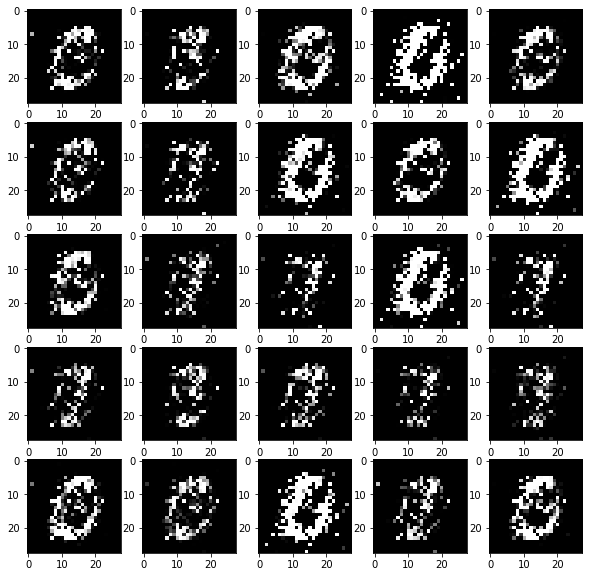

epochs 31


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 9ms/step


  0%|          | 1/273 [00:00<02:01,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


  1%|          | 2/273 [00:00<01:57,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


  1%|          | 3/273 [00:01<02:01,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


  1%|▏         | 4/273 [00:01<02:05,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


  2%|▏         | 5/273 [00:02<02:01,  2.21it/s]

4/4 [==============================] - 0s 7ms/step


  2%|▏         | 6/273 [00:02<02:02,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


  3%|▎         | 7/273 [00:03<02:05,  2.12it/s]

4/4 [==============================] - 0s 8ms/step


  3%|▎         | 8/273 [00:03<02:04,  2.14it/s]

4/4 [==============================] - 0s 10ms/step


  3%|▎         | 9/273 [00:04<02:04,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


  4%|▎         | 10/273 [00:04<02:02,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


  4%|▍         | 11/273 [00:05<02:05,  2.09it/s]

4/4 [==============================] - 0s 9ms/step


  4%|▍         | 12/273 [00:05<02:00,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


  5%|▍         | 13/273 [00:06<02:02,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


  5%|▌         | 14/273 [00:06<02:00,  2.14it/s]

4/4 [==============================] - 0s 11ms/step


  5%|▌         | 15/273 [00:06<01:57,  2.20it/s]

4/4 [==============================] - 0s 10ms/step


  6%|▌         | 16/273 [00:07<01:53,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


  6%|▌         | 17/273 [00:07<01:53,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


  7%|▋         | 18/273 [00:08<01:53,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


  7%|▋         | 19/273 [00:08<01:51,  2.28it/s]

4/4 [==============================] - 0s 12ms/step


  7%|▋         | 20/273 [00:09<01:48,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 21/273 [00:09<01:47,  2.34it/s]

4/4 [==============================] - 0s 8ms/step


  8%|▊         | 22/273 [00:09<01:51,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 23/273 [00:10<01:48,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


  9%|▉         | 24/273 [00:10<01:53,  2.20it/s]

4/4 [==============================] - 0s 10ms/step


  9%|▉         | 25/273 [00:11<01:55,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 10%|▉         | 26/273 [00:11<01:51,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 10%|▉         | 27/273 [00:12<01:47,  2.28it/s]

4/4 [==============================] - 0s 10ms/step


 10%|█         | 28/273 [00:12<01:51,  2.19it/s]

4/4 [==============================] - 0s 11ms/step


 11%|█         | 29/273 [00:13<01:51,  2.19it/s]

4/4 [==============================] - 0s 12ms/step


 11%|█         | 30/273 [00:13<01:54,  2.12it/s]

4/4 [==============================] - 0s 10ms/step


 11%|█▏        | 31/273 [00:14<01:53,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 12%|█▏        | 32/273 [00:14<01:54,  2.11it/s]

4/4 [==============================] - 0s 8ms/step


 12%|█▏        | 33/273 [00:15<01:51,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 12%|█▏        | 34/273 [00:15<01:49,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


 13%|█▎        | 35/273 [00:15<01:47,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 13%|█▎        | 36/273 [00:16<01:47,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▎        | 37/273 [00:16<01:46,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▍        | 38/273 [00:17<01:44,  2.26it/s]

4/4 [==============================] - 0s 10ms/step


 14%|█▍        | 39/273 [00:17<01:42,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 15%|█▍        | 40/273 [00:18<01:41,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 15%|█▌        | 41/273 [00:18<01:42,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 15%|█▌        | 42/273 [00:19<01:43,  2.23it/s]

4/4 [==============================] - 0s 10ms/step


 16%|█▌        | 43/273 [00:19<01:42,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 16%|█▌        | 44/273 [00:19<01:43,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▋        | 45/273 [00:20<01:45,  2.16it/s]

4/4 [==============================] - 0s 11ms/step


 17%|█▋        | 46/273 [00:20<01:42,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 17%|█▋        | 47/273 [00:21<01:39,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 18%|█▊        | 48/273 [00:21<01:45,  2.12it/s]

4/4 [==============================] - 0s 8ms/step


 18%|█▊        | 49/273 [00:22<01:46,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


 18%|█▊        | 50/273 [00:22<01:47,  2.08it/s]

4/4 [==============================] - 0s 9ms/step


 19%|█▊        | 51/273 [00:23<01:46,  2.07it/s]

4/4 [==============================] - 0s 8ms/step


 19%|█▉        | 52/273 [00:23<01:41,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


 19%|█▉        | 53/273 [00:24<01:42,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 20%|█▉        | 54/273 [00:24<01:41,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 20%|██        | 55/273 [00:25<01:36,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 21%|██        | 56/273 [00:25<01:35,  2.27it/s]

4/4 [==============================] - 0s 11ms/step


 21%|██        | 57/273 [00:25<01:34,  2.28it/s]

4/4 [==============================] - 0s 10ms/step


 21%|██        | 58/273 [00:26<01:37,  2.21it/s]

4/4 [==============================] - 0s 10ms/step


 22%|██▏       | 59/273 [00:26<01:36,  2.22it/s]

4/4 [==============================] - 0s 14ms/step


 22%|██▏       | 60/273 [00:27<01:39,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 22%|██▏       | 61/273 [00:27<01:40,  2.11it/s]

4/4 [==============================] - 0s 15ms/step


 23%|██▎       | 62/273 [00:28<01:40,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


 23%|██▎       | 63/273 [00:28<01:41,  2.08it/s]

4/4 [==============================] - 0s 8ms/step


 23%|██▎       | 64/273 [00:29<01:39,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


 24%|██▍       | 65/273 [00:29<01:41,  2.05it/s]

4/4 [==============================] - 0s 8ms/step


 24%|██▍       | 66/273 [00:30<01:39,  2.08it/s]

4/4 [==============================] - 0s 8ms/step


 25%|██▍       | 67/273 [00:30<01:36,  2.14it/s]

4/4 [==============================] - 0s 10ms/step


 25%|██▍       | 68/273 [00:31<01:33,  2.20it/s]

4/4 [==============================] - 0s 12ms/step


 25%|██▌       | 69/273 [00:31<01:43,  1.98it/s]

4/4 [==============================] - 0s 10ms/step


 26%|██▌       | 70/273 [00:32<01:39,  2.04it/s]

4/4 [==============================] - 0s 11ms/step


 26%|██▌       | 71/273 [00:32<01:36,  2.09it/s]

4/4 [==============================] - 0s 9ms/step


 26%|██▋       | 72/273 [00:33<01:34,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 27%|██▋       | 73/273 [00:33<01:30,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 27%|██▋       | 74/273 [00:33<01:29,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 27%|██▋       | 75/273 [00:34<01:32,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 28%|██▊       | 76/273 [00:34<01:34,  2.08it/s]

4/4 [==============================] - 0s 10ms/step


 28%|██▊       | 77/273 [00:35<01:38,  2.00it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▊       | 78/273 [00:35<01:32,  2.11it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▉       | 79/273 [00:36<01:32,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▉       | 80/273 [00:36<01:26,  2.22it/s]

4/4 [==============================] - 0s 10ms/step


 30%|██▉       | 81/273 [00:37<01:24,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 30%|███       | 82/273 [00:37<01:25,  2.22it/s]

4/4 [==============================] - 0s 10ms/step


 30%|███       | 83/273 [00:38<01:26,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 31%|███       | 84/273 [00:38<01:28,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 31%|███       | 85/273 [00:39<01:29,  2.11it/s]

4/4 [==============================] - 0s 9ms/step


 32%|███▏      | 86/273 [00:39<01:24,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 32%|███▏      | 87/273 [00:39<01:22,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 32%|███▏      | 88/273 [00:40<01:24,  2.18it/s]

4/4 [==============================] - 0s 11ms/step


 33%|███▎      | 89/273 [00:40<01:25,  2.15it/s]

4/4 [==============================] - 0s 10ms/step


 33%|███▎      | 90/273 [00:41<01:23,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 33%|███▎      | 91/273 [00:41<01:25,  2.12it/s]

4/4 [==============================] - 0s 10ms/step


 34%|███▎      | 92/273 [00:42<01:22,  2.19it/s]

4/4 [==============================] - 0s 10ms/step


 34%|███▍      | 93/273 [00:42<01:19,  2.27it/s]

4/4 [==============================] - 0s 11ms/step


 34%|███▍      | 94/273 [00:43<01:21,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 35%|███▍      | 95/273 [00:43<01:19,  2.24it/s]

4/4 [==============================] - 0s 10ms/step


 35%|███▌      | 96/273 [00:44<01:39,  1.78it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▌      | 97/273 [00:44<01:31,  1.92it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▌      | 98/273 [00:45<01:28,  1.98it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▋      | 99/273 [00:45<01:27,  2.00it/s]

4/4 [==============================] - 0s 8ms/step


 37%|███▋      | 100/273 [00:46<01:26,  2.01it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 101/273 [00:46<01:24,  2.03it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 102/273 [00:47<01:20,  2.13it/s]

4/4 [==============================] - 0s 14ms/step


 38%|███▊      | 103/273 [00:47<01:21,  2.08it/s]

4/4 [==============================] - 0s 9ms/step


 38%|███▊      | 104/273 [00:48<01:20,  2.11it/s]

4/4 [==============================] - 0s 9ms/step


 38%|███▊      | 105/273 [00:48<01:17,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 39%|███▉      | 106/273 [00:49<01:18,  2.13it/s]

4/4 [==============================] - 0s 14ms/step


 39%|███▉      | 107/273 [00:49<01:16,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 40%|███▉      | 108/273 [00:49<01:12,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 40%|███▉      | 109/273 [00:50<01:13,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 40%|████      | 110/273 [00:50<01:16,  2.13it/s]

4/4 [==============================] - 0s 8ms/step


 41%|████      | 111/273 [00:51<01:16,  2.11it/s]

4/4 [==============================] - 0s 8ms/step


 41%|████      | 112/273 [00:51<01:16,  2.11it/s]

4/4 [==============================] - 0s 8ms/step


 41%|████▏     | 113/273 [00:52<01:15,  2.12it/s]

4/4 [==============================] - 0s 8ms/step


 42%|████▏     | 114/273 [00:52<01:13,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


 42%|████▏     | 115/273 [00:53<01:12,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 42%|████▏     | 116/273 [00:53<01:15,  2.09it/s]

4/4 [==============================] - 0s 13ms/step


 43%|████▎     | 117/273 [00:54<01:13,  2.11it/s]

4/4 [==============================] - 0s 9ms/step


 43%|████▎     | 118/273 [00:54<01:12,  2.14it/s]

4/4 [==============================] - 0s 10ms/step


 44%|████▎     | 119/273 [00:55<01:10,  2.19it/s]

4/4 [==============================] - 0s 11ms/step


 44%|████▍     | 120/273 [00:55<01:09,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 44%|████▍     | 121/273 [00:56<01:13,  2.07it/s]

4/4 [==============================] - 0s 12ms/step


 45%|████▍     | 122/273 [00:56<01:24,  1.79it/s]

4/4 [==============================] - 0s 12ms/step


 45%|████▌     | 123/273 [00:57<01:21,  1.85it/s]

4/4 [==============================] - 0s 15ms/step


 45%|████▌     | 124/273 [00:57<01:18,  1.89it/s]

4/4 [==============================] - 0s 11ms/step


 46%|████▌     | 125/273 [00:58<01:18,  1.88it/s]

4/4 [==============================] - 0s 13ms/step


 46%|████▌     | 126/273 [00:58<01:18,  1.88it/s]

4/4 [==============================] - 0s 14ms/step


 47%|████▋     | 127/273 [00:59<01:18,  1.85it/s]

4/4 [==============================] - 0s 11ms/step


 47%|████▋     | 128/273 [00:59<01:18,  1.85it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 129/273 [01:00<01:12,  1.99it/s]

4/4 [==============================] - 0s 12ms/step


 48%|████▊     | 130/273 [01:00<01:12,  1.98it/s]

4/4 [==============================] - 0s 13ms/step


 48%|████▊     | 131/273 [01:01<01:07,  2.10it/s]

4/4 [==============================] - 0s 10ms/step


 48%|████▊     | 132/273 [01:01<01:05,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 49%|████▊     | 133/273 [01:02<01:05,  2.12it/s]

4/4 [==============================] - 0s 16ms/step


 49%|████▉     | 134/273 [01:02<01:05,  2.12it/s]

4/4 [==============================] - 0s 8ms/step


 49%|████▉     | 135/273 [01:03<01:04,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 50%|████▉     | 136/273 [01:03<01:04,  2.12it/s]

4/4 [==============================] - 0s 8ms/step


 50%|█████     | 137/273 [01:04<01:01,  2.20it/s]

4/4 [==============================] - 0s 10ms/step


 51%|█████     | 138/273 [01:04<01:00,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 51%|█████     | 139/273 [01:04<00:59,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 51%|█████▏    | 140/273 [01:05<00:57,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 141/273 [01:05<00:58,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 142/273 [01:06<00:58,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 143/273 [01:06<01:00,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


 53%|█████▎    | 144/273 [01:07<00:59,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 145/273 [01:07<00:57,  2.23it/s]

4/4 [==============================] - 0s 13ms/step


 53%|█████▎    | 146/273 [01:08<00:58,  2.16it/s]

4/4 [==============================] - 0s 10ms/step


 54%|█████▍    | 147/273 [01:08<01:00,  2.08it/s]

4/4 [==============================] - 0s 10ms/step


 54%|█████▍    | 148/273 [01:09<01:00,  2.08it/s]

4/4 [==============================] - 0s 8ms/step


 55%|█████▍    | 149/273 [01:09<00:59,  2.07it/s]

4/4 [==============================] - 0s 11ms/step


 55%|█████▍    | 150/273 [01:10<00:59,  2.07it/s]

4/4 [==============================] - 0s 10ms/step


 55%|█████▌    | 151/273 [01:10<00:57,  2.13it/s]

4/4 [==============================] - 0s 12ms/step


 56%|█████▌    | 152/273 [01:10<00:54,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▌    | 153/273 [01:11<00:52,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 56%|█████▋    | 154/273 [01:11<00:52,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


 57%|█████▋    | 155/273 [01:12<00:53,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 57%|█████▋    | 156/273 [01:12<00:53,  2.18it/s]

4/4 [==============================] - 0s 10ms/step


 58%|█████▊    | 157/273 [01:13<00:52,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 58%|█████▊    | 158/273 [01:13<00:50,  2.26it/s]

4/4 [==============================] - 0s 10ms/step


 58%|█████▊    | 159/273 [01:14<00:51,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 59%|█████▊    | 160/273 [01:14<00:51,  2.21it/s]

4/4 [==============================] - 0s 12ms/step


 59%|█████▉    | 161/273 [01:15<00:51,  2.18it/s]

4/4 [==============================] - 0s 11ms/step


 59%|█████▉    | 162/273 [01:15<00:52,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 60%|█████▉    | 163/273 [01:15<00:51,  2.13it/s]

4/4 [==============================] - 0s 10ms/step


 60%|██████    | 164/273 [01:16<00:51,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 60%|██████    | 165/273 [01:16<00:50,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


 61%|██████    | 166/273 [01:17<00:50,  2.11it/s]

4/4 [==============================] - 0s 9ms/step


 61%|██████    | 167/273 [01:17<00:53,  1.99it/s]

4/4 [==============================] - 0s 9ms/step


 62%|██████▏   | 168/273 [01:18<00:52,  1.99it/s]

4/4 [==============================] - 0s 9ms/step


 62%|██████▏   | 169/273 [01:18<00:49,  2.10it/s]

4/4 [==============================] - 0s 10ms/step


 62%|██████▏   | 170/273 [01:19<00:48,  2.13it/s]

4/4 [==============================] - 0s 8ms/step


 63%|██████▎   | 171/273 [01:19<00:47,  2.13it/s]

4/4 [==============================] - 0s 20ms/step


 63%|██████▎   | 172/273 [01:20<00:46,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 63%|██████▎   | 173/273 [01:20<00:46,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 64%|██████▎   | 174/273 [01:21<00:46,  2.13it/s]

4/4 [==============================] - 0s 8ms/step


 64%|██████▍   | 175/273 [01:21<00:45,  2.17it/s]

4/4 [==============================] - 0s 10ms/step


 64%|██████▍   | 176/273 [01:22<00:43,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 65%|██████▍   | 177/273 [01:22<00:43,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 65%|██████▌   | 178/273 [01:22<00:42,  2.22it/s]

4/4 [==============================] - 0s 11ms/step


 66%|██████▌   | 179/273 [01:23<00:42,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▌   | 180/273 [01:23<00:42,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▋   | 181/273 [01:24<00:46,  2.00it/s]

4/4 [==============================] - 0s 14ms/step


 67%|██████▋   | 182/273 [01:24<00:45,  2.02it/s]

4/4 [==============================] - 0s 12ms/step


 67%|██████▋   | 183/273 [01:25<00:43,  2.08it/s]

4/4 [==============================] - 0s 10ms/step


 67%|██████▋   | 184/273 [01:25<00:44,  2.00it/s]

4/4 [==============================] - 0s 13ms/step


 68%|██████▊   | 185/273 [01:26<00:45,  1.94it/s]

4/4 [==============================] - 0s 11ms/step


 68%|██████▊   | 186/273 [01:27<00:46,  1.89it/s]

4/4 [==============================] - 0s 13ms/step


 68%|██████▊   | 187/273 [01:27<00:44,  1.93it/s]

4/4 [==============================] - 0s 11ms/step


 69%|██████▉   | 188/273 [01:28<00:45,  1.88it/s]

4/4 [==============================] - 0s 15ms/step


 69%|██████▉   | 189/273 [01:28<00:44,  1.91it/s]

4/4 [==============================] - 0s 11ms/step


 70%|██████▉   | 190/273 [01:29<00:42,  1.94it/s]

4/4 [==============================] - 0s 10ms/step


 70%|██████▉   | 191/273 [01:29<00:43,  1.90it/s]

4/4 [==============================] - 0s 9ms/step


 70%|███████   | 192/273 [01:30<00:40,  1.99it/s]

4/4 [==============================] - 0s 8ms/step


 71%|███████   | 193/273 [01:30<00:39,  2.05it/s]

4/4 [==============================] - 0s 12ms/step


 71%|███████   | 194/273 [01:31<00:36,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████▏  | 195/273 [01:31<00:34,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 72%|███████▏  | 196/273 [01:31<00:34,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 72%|███████▏  | 197/273 [01:32<00:33,  2.30it/s]

4/4 [==============================] - 0s 8ms/step


 73%|███████▎  | 198/273 [01:32<00:32,  2.32it/s]

4/4 [==============================] - 0s 8ms/step


 73%|███████▎  | 199/273 [01:33<00:33,  2.20it/s]

4/4 [==============================] - 0s 10ms/step


 73%|███████▎  | 200/273 [01:33<00:33,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


 74%|███████▎  | 201/273 [01:34<00:33,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▍  | 202/273 [01:34<00:32,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▍  | 203/273 [01:35<00:32,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


 75%|███████▍  | 204/273 [01:35<00:31,  2.17it/s]

4/4 [==============================] - 0s 14ms/step


 75%|███████▌  | 205/273 [01:36<00:31,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 75%|███████▌  | 206/273 [01:36<00:30,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 76%|███████▌  | 207/273 [01:36<00:29,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 76%|███████▌  | 208/273 [01:37<00:28,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 209/273 [01:37<00:27,  2.30it/s]

4/4 [==============================] - 0s 8ms/step


 77%|███████▋  | 210/273 [01:38<00:28,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 211/273 [01:38<00:27,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 212/273 [01:39<00:26,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 78%|███████▊  | 213/273 [01:39<00:26,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 214/273 [01:39<00:26,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 79%|███████▉  | 215/273 [01:40<00:26,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 79%|███████▉  | 216/273 [01:40<00:26,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 79%|███████▉  | 217/273 [01:41<00:25,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 80%|███████▉  | 218/273 [01:41<00:24,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 80%|████████  | 219/273 [01:42<00:23,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 81%|████████  | 220/273 [01:42<00:24,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 81%|████████  | 221/273 [01:43<00:24,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


 81%|████████▏ | 222/273 [01:43<00:24,  2.07it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 223/273 [01:44<00:24,  2.04it/s]

4/4 [==============================] - 0s 8ms/step


 82%|████████▏ | 224/273 [01:44<00:22,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 225/273 [01:45<00:22,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 83%|████████▎ | 226/273 [01:45<00:21,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 83%|████████▎ | 227/273 [01:45<00:20,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▎ | 228/273 [01:46<00:20,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 84%|████████▍ | 229/273 [01:46<00:19,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▍ | 230/273 [01:47<00:19,  2.20it/s]

4/4 [==============================] - 0s 14ms/step


 85%|████████▍ | 231/273 [01:47<00:18,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


 85%|████████▍ | 232/273 [01:48<00:17,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 85%|████████▌ | 233/273 [01:48<00:18,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 86%|████████▌ | 234/273 [01:49<00:17,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▌ | 235/273 [01:49<00:17,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▋ | 236/273 [01:50<00:17,  2.15it/s]

4/4 [==============================] - 0s 12ms/step


 87%|████████▋ | 237/273 [01:50<00:16,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 87%|████████▋ | 238/273 [01:50<00:16,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 88%|████████▊ | 239/273 [01:51<00:15,  2.17it/s]

4/4 [==============================] - 0s 12ms/step


 88%|████████▊ | 240/273 [01:51<00:14,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 88%|████████▊ | 241/273 [01:52<00:14,  2.15it/s]

4/4 [==============================] - 0s 13ms/step


 89%|████████▊ | 242/273 [01:52<00:14,  2.12it/s]

4/4 [==============================] - 0s 10ms/step


 89%|████████▉ | 243/273 [01:53<00:13,  2.18it/s]

4/4 [==============================] - 0s 11ms/step


 89%|████████▉ | 244/273 [01:53<00:13,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 90%|████████▉ | 245/273 [01:54<00:13,  2.12it/s]

4/4 [==============================] - 0s 8ms/step


 90%|█████████ | 246/273 [01:54<00:12,  2.16it/s]

4/4 [==============================] - 0s 10ms/step


 90%|█████████ | 247/273 [01:55<00:12,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 91%|█████████ | 248/273 [01:55<00:11,  2.22it/s]

4/4 [==============================] - 0s 11ms/step


 91%|█████████ | 249/273 [01:55<00:10,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 92%|█████████▏| 250/273 [01:56<00:10,  2.22it/s]

4/4 [==============================] - 0s 11ms/step


 92%|█████████▏| 251/273 [01:56<00:10,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 92%|█████████▏| 252/273 [01:57<00:09,  2.14it/s]

4/4 [==============================] - 0s 10ms/step


 93%|█████████▎| 253/273 [01:57<00:09,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 93%|█████████▎| 254/273 [01:58<00:08,  2.23it/s]

4/4 [==============================] - 0s 10ms/step


 93%|█████████▎| 255/273 [01:58<00:08,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 94%|█████████▍| 256/273 [01:59<00:07,  2.26it/s]

4/4 [==============================] - 0s 10ms/step


 94%|█████████▍| 257/273 [01:59<00:07,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▍| 258/273 [02:00<00:06,  2.26it/s]

4/4 [==============================] - 0s 10ms/step


 95%|█████████▍| 259/273 [02:00<00:06,  2.11it/s]

4/4 [==============================] - 0s 10ms/step


 95%|█████████▌| 260/273 [02:01<00:06,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


 96%|█████████▌| 261/273 [02:01<00:05,  2.07it/s]

4/4 [==============================] - 0s 9ms/step


 96%|█████████▌| 262/273 [02:01<00:05,  2.17it/s]

4/4 [==============================] - 0s 11ms/step


 96%|█████████▋| 263/273 [02:02<00:04,  2.15it/s]

4/4 [==============================] - 0s 10ms/step


 97%|█████████▋| 264/273 [02:02<00:04,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 265/273 [02:03<00:03,  2.30it/s]

4/4 [==============================] - 0s 10ms/step


 97%|█████████▋| 266/273 [02:03<00:03,  2.33it/s]

4/4 [==============================] - 0s 11ms/step


 98%|█████████▊| 267/273 [02:04<00:02,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 98%|█████████▊| 268/273 [02:04<00:02,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 99%|█████████▊| 269/273 [02:05<00:01,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 99%|█████████▉| 270/273 [02:05<00:01,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 99%|█████████▉| 271/273 [02:05<00:00,  2.23it/s]

4/4 [==============================] - 0s 12ms/step


100%|█████████▉| 272/273 [02:06<00:00,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


100%|██████████| 273/273 [02:06<00:00,  2.15it/s]


loss is 2.3441923985956237e-05 |*| 20.023441314697266
1/1 [==============================] - 0s 28ms/step


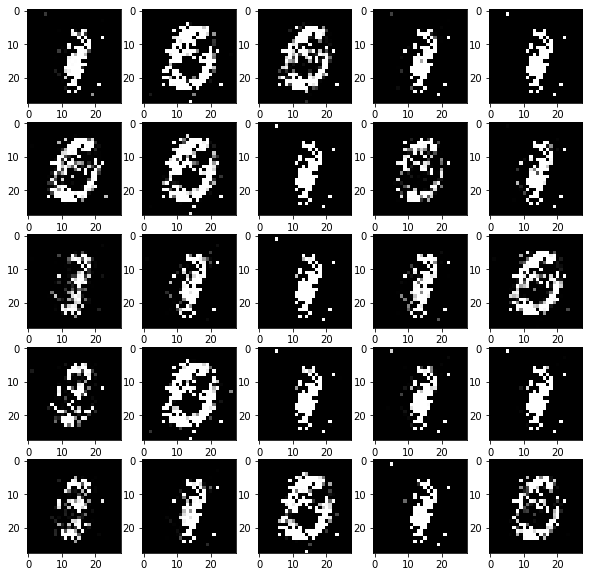

epochs 32


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 13ms/step


  0%|          | 1/273 [00:00<01:56,  2.34it/s]

4/4 [==============================] - 0s 9ms/step


  1%|          | 2/273 [00:00<02:01,  2.22it/s]

4/4 [==============================] - 0s 12ms/step


  1%|          | 3/273 [00:01<02:07,  2.11it/s]

4/4 [==============================] - 0s 9ms/step


  1%|▏         | 4/273 [00:01<02:02,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


  2%|▏         | 5/273 [00:02<02:04,  2.16it/s]

4/4 [==============================] - 0s 10ms/step


  2%|▏         | 6/273 [00:02<02:03,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


  3%|▎         | 7/273 [00:03<02:04,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


  3%|▎         | 8/273 [00:03<01:59,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


  3%|▎         | 9/273 [00:04<01:59,  2.22it/s]

4/4 [==============================] - 0s 11ms/step


  4%|▎         | 10/273 [00:04<02:02,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


  4%|▍         | 11/273 [00:05<01:57,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


  4%|▍         | 12/273 [00:05<01:57,  2.22it/s]

4/4 [==============================] - 0s 11ms/step


  5%|▍         | 13/273 [00:05<01:59,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


  5%|▌         | 14/273 [00:06<02:03,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


  5%|▌         | 15/273 [00:06<01:57,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


  6%|▌         | 16/273 [00:07<01:56,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


  6%|▌         | 17/273 [00:07<01:58,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


  7%|▋         | 18/273 [00:08<01:57,  2.18it/s]

4/4 [==============================] - 0s 11ms/step


  7%|▋         | 19/273 [00:08<01:59,  2.13it/s]

4/4 [==============================] - 0s 10ms/step


  7%|▋         | 20/273 [00:09<01:59,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 21/273 [00:09<02:08,  1.97it/s]

4/4 [==============================] - 0s 11ms/step


  8%|▊         | 22/273 [00:10<02:08,  1.95it/s]

4/4 [==============================] - 0s 10ms/step


  8%|▊         | 23/273 [00:10<02:02,  2.04it/s]

4/4 [==============================] - 0s 9ms/step


  9%|▉         | 24/273 [00:11<02:03,  2.01it/s]

4/4 [==============================] - 0s 9ms/step


  9%|▉         | 25/273 [00:11<01:58,  2.09it/s]

4/4 [==============================] - 0s 9ms/step


 10%|▉         | 26/273 [00:12<01:53,  2.17it/s]

4/4 [==============================] - 0s 10ms/step


 10%|▉         | 27/273 [00:12<01:55,  2.13it/s]

4/4 [==============================] - 0s 14ms/step


 10%|█         | 28/273 [00:13<01:56,  2.11it/s]

4/4 [==============================] - 0s 9ms/step


 11%|█         | 29/273 [00:13<01:52,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 11%|█         | 30/273 [00:13<01:49,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 11%|█▏        | 31/273 [00:14<01:46,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 12%|█▏        | 32/273 [00:14<01:47,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 12%|█▏        | 33/273 [00:15<01:52,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 12%|█▏        | 34/273 [00:15<01:52,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 13%|█▎        | 35/273 [00:16<01:52,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 13%|█▎        | 36/273 [00:16<01:46,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▎        | 37/273 [00:17<01:47,  2.19it/s]

4/4 [==============================] - 0s 10ms/step


 14%|█▍        | 38/273 [00:17<01:48,  2.17it/s]

4/4 [==============================] - 0s 10ms/step


 14%|█▍        | 39/273 [00:18<01:46,  2.20it/s]

4/4 [==============================] - 0s 10ms/step


 15%|█▍        | 40/273 [00:18<01:42,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 15%|█▌        | 41/273 [00:18<01:41,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 15%|█▌        | 42/273 [00:19<01:38,  2.34it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▌        | 43/273 [00:19<01:48,  2.12it/s]

4/4 [==============================] - 0s 11ms/step


 16%|█▌        | 44/273 [00:20<01:49,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▋        | 45/273 [00:20<01:48,  2.10it/s]

4/4 [==============================] - 0s 10ms/step


 17%|█▋        | 46/273 [00:21<01:47,  2.11it/s]

4/4 [==============================] - 0s 11ms/step


 17%|█▋        | 47/273 [00:21<01:48,  2.09it/s]

4/4 [==============================] - 0s 10ms/step


 18%|█▊        | 48/273 [00:22<01:47,  2.09it/s]

4/4 [==============================] - 0s 9ms/step


 18%|█▊        | 49/273 [00:22<01:42,  2.18it/s]

4/4 [==============================] - 0s 10ms/step


 18%|█▊        | 50/273 [00:23<01:43,  2.15it/s]

4/4 [==============================] - 0s 10ms/step


 19%|█▊        | 51/273 [00:23<01:39,  2.23it/s]

4/4 [==============================] - 0s 10ms/step


 19%|█▉        | 52/273 [00:24<01:38,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 19%|█▉        | 53/273 [00:24<01:36,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 20%|█▉        | 54/273 [00:24<01:39,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 20%|██        | 55/273 [00:25<01:39,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 21%|██        | 56/273 [00:25<01:36,  2.24it/s]

4/4 [==============================] - 0s 10ms/step


 21%|██        | 57/273 [00:26<01:35,  2.26it/s]

4/4 [==============================] - 0s 11ms/step


 21%|██        | 58/273 [00:26<01:34,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 22%|██▏       | 59/273 [00:27<01:35,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 22%|██▏       | 60/273 [00:27<01:33,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 22%|██▏       | 61/273 [00:28<01:30,  2.35it/s]

4/4 [==============================] - 0s 9ms/step


 23%|██▎       | 62/273 [00:28<01:29,  2.36it/s]

4/4 [==============================] - 0s 8ms/step


 23%|██▎       | 63/273 [00:28<01:28,  2.37it/s]

4/4 [==============================] - 0s 9ms/step


 23%|██▎       | 64/273 [00:29<01:27,  2.38it/s]

4/4 [==============================] - 0s 15ms/step


 24%|██▍       | 65/273 [00:29<01:28,  2.35it/s]

4/4 [==============================] - 0s 10ms/step


 24%|██▍       | 66/273 [00:30<01:40,  2.07it/s]

4/4 [==============================] - 0s 10ms/step


 25%|██▍       | 67/273 [00:30<01:36,  2.13it/s]

4/4 [==============================] - 0s 8ms/step


 25%|██▍       | 68/273 [00:31<01:37,  2.10it/s]

4/4 [==============================] - 0s 13ms/step


 25%|██▌       | 69/273 [00:31<01:36,  2.11it/s]

4/4 [==============================] - 0s 9ms/step


 26%|██▌       | 70/273 [00:32<01:33,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


 26%|██▌       | 71/273 [00:32<01:33,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 26%|██▋       | 72/273 [00:33<01:34,  2.12it/s]

4/4 [==============================] - 0s 8ms/step


 27%|██▋       | 73/273 [00:33<01:35,  2.08it/s]

4/4 [==============================] - 0s 9ms/step


 27%|██▋       | 74/273 [00:34<01:36,  2.05it/s]

4/4 [==============================] - 0s 8ms/step


 27%|██▋       | 75/273 [00:34<01:36,  2.06it/s]

4/4 [==============================] - 0s 9ms/step


 28%|██▊       | 76/273 [00:34<01:30,  2.18it/s]

4/4 [==============================] - 0s 13ms/step


 28%|██▊       | 77/273 [00:35<01:30,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


 29%|██▊       | 78/273 [00:35<01:30,  2.16it/s]

4/4 [==============================] - 0s 11ms/step


 29%|██▉       | 79/273 [00:36<01:26,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▉       | 80/273 [00:36<01:28,  2.19it/s]

4/4 [==============================] - 0s 10ms/step


 30%|██▉       | 81/273 [00:37<01:28,  2.17it/s]

4/4 [==============================] - 0s 10ms/step


 30%|███       | 82/273 [00:37<01:29,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 30%|███       | 83/273 [00:38<01:27,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 31%|███       | 84/273 [00:38<01:27,  2.17it/s]

4/4 [==============================] - 0s 12ms/step


 31%|███       | 85/273 [00:39<01:23,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 32%|███▏      | 86/273 [00:39<01:22,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 32%|███▏      | 87/273 [00:39<01:20,  2.31it/s]

4/4 [==============================] - 0s 10ms/step


 32%|███▏      | 88/273 [00:40<01:22,  2.24it/s]

4/4 [==============================] - 0s 11ms/step


 33%|███▎      | 89/273 [00:40<01:23,  2.19it/s]

4/4 [==============================] - 0s 11ms/step


 33%|███▎      | 90/273 [00:41<01:25,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 33%|███▎      | 91/273 [00:41<01:24,  2.14it/s]

4/4 [==============================] - 0s 11ms/step


 34%|███▎      | 92/273 [00:42<01:24,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▍      | 93/273 [00:42<01:20,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▍      | 94/273 [00:43<01:22,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 35%|███▍      | 95/273 [00:43<01:22,  2.15it/s]

4/4 [==============================] - 0s 10ms/step


 35%|███▌      | 96/273 [00:44<01:19,  2.22it/s]

4/4 [==============================] - 0s 13ms/step


 36%|███▌      | 97/273 [00:44<01:20,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▌      | 98/273 [00:45<01:18,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▋      | 99/273 [00:45<01:19,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 37%|███▋      | 100/273 [00:45<01:17,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 37%|███▋      | 101/273 [00:46<01:18,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 102/273 [00:47<01:25,  1.99it/s]

4/4 [==============================] - 0s 9ms/step


 38%|███▊      | 103/273 [00:47<01:24,  2.01it/s]

4/4 [==============================] - 0s 9ms/step


 38%|███▊      | 104/273 [00:47<01:23,  2.03it/s]

4/4 [==============================] - 0s 8ms/step


 38%|███▊      | 105/273 [00:48<01:19,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 39%|███▉      | 106/273 [00:48<01:15,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 39%|███▉      | 107/273 [00:49<01:16,  2.17it/s]

4/4 [==============================] - 0s 13ms/step


 40%|███▉      | 108/273 [00:49<01:15,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


 40%|███▉      | 109/273 [00:50<01:15,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 40%|████      | 110/273 [00:50<01:14,  2.18it/s]

4/4 [==============================] - 0s 13ms/step


 41%|████      | 111/273 [00:51<01:16,  2.10it/s]

4/4 [==============================] - 0s 8ms/step


 41%|████      | 112/273 [00:51<01:13,  2.20it/s]

4/4 [==============================] - 0s 11ms/step


 41%|████▏     | 113/273 [00:51<01:10,  2.28it/s]

4/4 [==============================] - 0s 12ms/step


 42%|████▏     | 114/273 [00:52<01:09,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 42%|████▏     | 115/273 [00:52<01:09,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 42%|████▏     | 116/273 [00:53<01:11,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 43%|████▎     | 117/273 [00:53<01:08,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 43%|████▎     | 118/273 [00:54<01:09,  2.24it/s]

4/4 [==============================] - 0s 10ms/step


 44%|████▎     | 119/273 [00:54<01:11,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 44%|████▍     | 120/273 [00:55<01:13,  2.08it/s]

4/4 [==============================] - 0s 10ms/step


 44%|████▍     | 121/273 [00:55<01:12,  2.09it/s]

4/4 [==============================] - 0s 9ms/step


 45%|████▍     | 122/273 [00:56<01:10,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 45%|████▌     | 123/273 [00:56<01:07,  2.21it/s]

4/4 [==============================] - 0s 10ms/step


 45%|████▌     | 124/273 [00:56<01:04,  2.29it/s]

4/4 [==============================] - 0s 12ms/step


 46%|████▌     | 125/273 [00:57<01:06,  2.24it/s]

4/4 [==============================] - 0s 10ms/step


 46%|████▌     | 126/273 [00:57<01:05,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 47%|████▋     | 127/273 [00:58<01:06,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 128/273 [00:58<01:06,  2.19it/s]

4/4 [==============================] - 0s 11ms/step


 47%|████▋     | 129/273 [00:59<01:07,  2.15it/s]

4/4 [==============================] - 0s 10ms/step


 48%|████▊     | 130/273 [00:59<01:05,  2.19it/s]

4/4 [==============================] - 0s 11ms/step


 48%|████▊     | 131/273 [01:00<01:03,  2.24it/s]

4/4 [==============================] - 0s 10ms/step


 48%|████▊     | 132/273 [01:00<01:01,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 49%|████▊     | 133/273 [01:01<01:03,  2.21it/s]

4/4 [==============================] - 0s 10ms/step


 49%|████▉     | 134/273 [01:01<01:02,  2.23it/s]

4/4 [==============================] - 0s 10ms/step


 49%|████▉     | 135/273 [01:01<01:00,  2.27it/s]

4/4 [==============================] - 0s 13ms/step


 50%|████▉     | 136/273 [01:02<01:00,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 50%|█████     | 137/273 [01:02<00:59,  2.30it/s]

4/4 [==============================] - 0s 8ms/step


 51%|█████     | 138/273 [01:03<00:59,  2.26it/s]

4/4 [==============================] - 0s 10ms/step


 51%|█████     | 139/273 [01:03<01:02,  2.15it/s]

4/4 [==============================] - 0s 11ms/step


 51%|█████▏    | 140/273 [01:04<01:04,  2.07it/s]

4/4 [==============================] - 0s 10ms/step


 52%|█████▏    | 141/273 [01:04<01:05,  2.01it/s]

4/4 [==============================] - 0s 15ms/step


 52%|█████▏    | 142/273 [01:05<01:13,  1.79it/s]

4/4 [==============================] - 0s 10ms/step


 52%|█████▏    | 143/273 [01:06<01:10,  1.85it/s]

4/4 [==============================] - 0s 11ms/step


 53%|█████▎    | 144/273 [01:06<01:10,  1.84it/s]

4/4 [==============================] - 0s 14ms/step


 53%|█████▎    | 145/273 [01:07<01:15,  1.69it/s]

4/4 [==============================] - 0s 8ms/step


 53%|█████▎    | 146/273 [01:07<01:08,  1.86it/s]

4/4 [==============================] - 0s 10ms/step


 54%|█████▍    | 147/273 [01:08<01:06,  1.90it/s]

4/4 [==============================] - 0s 10ms/step


 54%|█████▍    | 148/273 [01:08<01:01,  2.04it/s]

4/4 [==============================] - 0s 17ms/step


 55%|█████▍    | 149/273 [01:09<00:58,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▍    | 150/273 [01:09<00:56,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▌    | 151/273 [01:09<00:56,  2.16it/s]

4/4 [==============================] - 0s 10ms/step


 56%|█████▌    | 152/273 [01:10<00:57,  2.12it/s]

4/4 [==============================] - 0s 8ms/step


 56%|█████▌    | 153/273 [01:10<00:56,  2.12it/s]

4/4 [==============================] - 0s 11ms/step


 56%|█████▋    | 154/273 [01:11<00:55,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 57%|█████▋    | 155/273 [01:11<00:52,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 57%|█████▋    | 156/273 [01:12<00:52,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 58%|█████▊    | 157/273 [01:12<00:51,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 58%|█████▊    | 158/273 [01:13<00:52,  2.19it/s]

4/4 [==============================] - 0s 10ms/step


 58%|█████▊    | 159/273 [01:13<00:53,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▊    | 160/273 [01:14<00:57,  1.97it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▉    | 161/273 [01:14<00:55,  2.00it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▉    | 162/273 [01:15<00:54,  2.02it/s]

4/4 [==============================] - 0s 8ms/step


 60%|█████▉    | 163/273 [01:15<00:51,  2.12it/s]

4/4 [==============================] - 0s 10ms/step


 60%|██████    | 164/273 [01:16<00:52,  2.09it/s]

4/4 [==============================] - 0s 8ms/step


 60%|██████    | 165/273 [01:16<00:50,  2.12it/s]

4/4 [==============================] - 0s 10ms/step


 61%|██████    | 166/273 [01:16<00:48,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 61%|██████    | 167/273 [01:17<00:47,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 62%|██████▏   | 168/273 [01:17<00:47,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 62%|██████▏   | 169/273 [01:18<00:46,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 62%|██████▏   | 170/273 [01:18<00:44,  2.33it/s]

4/4 [==============================] - 0s 8ms/step


 63%|██████▎   | 171/273 [01:19<00:43,  2.34it/s]

4/4 [==============================] - 0s 8ms/step


 63%|██████▎   | 172/273 [01:19<00:43,  2.33it/s]

4/4 [==============================] - 0s 8ms/step


 63%|██████▎   | 173/273 [01:20<00:44,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 64%|██████▎   | 174/273 [01:20<00:44,  2.25it/s]

4/4 [==============================] - 0s 10ms/step


 64%|██████▍   | 175/273 [01:20<00:45,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 64%|██████▍   | 176/273 [01:21<00:43,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 65%|██████▍   | 177/273 [01:21<00:43,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 65%|██████▌   | 178/273 [01:22<00:42,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▌   | 179/273 [01:22<00:43,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▌   | 180/273 [01:23<00:43,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▋   | 181/273 [01:23<00:41,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 67%|██████▋   | 182/273 [01:24<00:41,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 67%|██████▋   | 183/273 [01:24<00:41,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 67%|██████▋   | 184/273 [01:25<00:41,  2.17it/s]

4/4 [==============================] - 0s 10ms/step


 68%|██████▊   | 185/273 [01:25<00:40,  2.20it/s]

4/4 [==============================] - 0s 10ms/step


 68%|██████▊   | 186/273 [01:26<00:40,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 68%|██████▊   | 187/273 [01:26<00:40,  2.13it/s]

4/4 [==============================] - 0s 10ms/step


 69%|██████▉   | 188/273 [01:26<00:38,  2.21it/s]

4/4 [==============================] - 0s 11ms/step


 69%|██████▉   | 189/273 [01:27<00:42,  2.00it/s]

4/4 [==============================] - 0s 9ms/step


 70%|██████▉   | 190/273 [01:27<00:40,  2.05it/s]

4/4 [==============================] - 0s 10ms/step


 70%|██████▉   | 191/273 [01:28<00:38,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


 70%|███████   | 192/273 [01:28<00:36,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████   | 193/273 [01:29<00:35,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 71%|███████   | 194/273 [01:29<00:33,  2.34it/s]

4/4 [==============================] - 0s 8ms/step


 71%|███████▏  | 195/273 [01:30<00:33,  2.36it/s]

4/4 [==============================] - 0s 10ms/step


 72%|███████▏  | 196/273 [01:30<00:34,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 72%|███████▏  | 197/273 [01:30<00:33,  2.27it/s]

4/4 [==============================] - 0s 12ms/step


 73%|███████▎  | 198/273 [01:31<00:33,  2.21it/s]

4/4 [==============================] - 0s 12ms/step


 73%|███████▎  | 199/273 [01:31<00:35,  2.09it/s]

4/4 [==============================] - 0s 12ms/step


 73%|███████▎  | 200/273 [01:32<00:38,  1.90it/s]

4/4 [==============================] - 0s 11ms/step


 74%|███████▎  | 201/273 [01:33<00:37,  1.91it/s]

4/4 [==============================] - 0s 14ms/step


 74%|███████▍  | 202/273 [01:33<00:38,  1.86it/s]

4/4 [==============================] - 0s 11ms/step


 74%|███████▍  | 203/273 [01:34<00:38,  1.83it/s]

4/4 [==============================] - 0s 19ms/step


 75%|███████▍  | 204/273 [01:34<00:37,  1.82it/s]

4/4 [==============================] - 0s 13ms/step


 75%|███████▌  | 205/273 [01:35<00:38,  1.78it/s]

4/4 [==============================] - 0s 14ms/step


 75%|███████▌  | 206/273 [01:35<00:37,  1.79it/s]

4/4 [==============================] - 0s 8ms/step


 76%|███████▌  | 207/273 [01:36<00:35,  1.87it/s]

4/4 [==============================] - 0s 8ms/step


 76%|███████▌  | 208/273 [01:36<00:32,  2.01it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 209/273 [01:37<00:31,  2.05it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 210/273 [01:37<00:30,  2.05it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 211/273 [01:38<00:30,  2.04it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 212/273 [01:38<00:29,  2.04it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 213/273 [01:39<00:27,  2.17it/s]

4/4 [==============================] - 0s 10ms/step


 78%|███████▊  | 214/273 [01:39<00:27,  2.14it/s]

4/4 [==============================] - 0s 10ms/step


 79%|███████▉  | 215/273 [01:40<00:28,  2.07it/s]

4/4 [==============================] - 0s 9ms/step


 79%|███████▉  | 216/273 [01:40<00:26,  2.12it/s]

4/4 [==============================] - 0s 8ms/step


 79%|███████▉  | 217/273 [01:41<00:26,  2.09it/s]

4/4 [==============================] - 0s 8ms/step


 80%|███████▉  | 218/273 [01:41<00:25,  2.17it/s]

4/4 [==============================] - 0s 10ms/step


 80%|████████  | 219/273 [01:41<00:24,  2.25it/s]

4/4 [==============================] - 0s 13ms/step


 81%|████████  | 220/273 [01:42<00:24,  2.19it/s]

4/4 [==============================] - 0s 10ms/step


 81%|████████  | 221/273 [01:42<00:24,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 81%|████████▏ | 222/273 [01:43<00:23,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 223/273 [01:43<00:22,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 224/273 [01:44<00:21,  2.27it/s]

4/4 [==============================] - 0s 14ms/step


 82%|████████▏ | 225/273 [01:44<00:21,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 83%|████████▎ | 226/273 [01:45<00:20,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


 83%|████████▎ | 227/273 [01:45<00:20,  2.21it/s]

4/4 [==============================] - 0s 10ms/step


 84%|████████▎ | 228/273 [01:46<00:20,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▍ | 229/273 [01:46<00:20,  2.14it/s]

4/4 [==============================] - 0s 10ms/step


 84%|████████▍ | 230/273 [01:47<00:19,  2.15it/s]

4/4 [==============================] - 0s 12ms/step


 85%|████████▍ | 231/273 [01:47<00:19,  2.11it/s]

4/4 [==============================] - 0s 8ms/step


 85%|████████▍ | 232/273 [01:48<00:19,  2.07it/s]

4/4 [==============================] - 0s 10ms/step


 85%|████████▌ | 233/273 [01:48<00:19,  2.06it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▌ | 234/273 [01:48<00:18,  2.10it/s]

4/4 [==============================] - 0s 13ms/step


 86%|████████▌ | 235/273 [01:49<00:18,  2.10it/s]

4/4 [==============================] - 0s 11ms/step


 86%|████████▋ | 236/273 [01:50<00:19,  1.95it/s]

4/4 [==============================] - 0s 11ms/step


 87%|████████▋ | 237/273 [01:50<00:18,  2.00it/s]

4/4 [==============================] - 0s 10ms/step


 87%|████████▋ | 238/273 [01:50<00:17,  2.04it/s]

4/4 [==============================] - 0s 8ms/step


 88%|████████▊ | 239/273 [01:51<00:16,  2.06it/s]

4/4 [==============================] - 0s 8ms/step


 88%|████████▊ | 240/273 [01:51<00:16,  2.06it/s]

4/4 [==============================] - 0s 9ms/step


 88%|████████▊ | 241/273 [01:52<00:15,  2.01it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▊ | 242/273 [01:52<00:14,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▉ | 243/273 [01:53<00:14,  2.12it/s]

4/4 [==============================] - 0s 8ms/step


 89%|████████▉ | 244/273 [01:53<00:13,  2.12it/s]

4/4 [==============================] - 0s 8ms/step


 90%|████████▉ | 245/273 [01:54<00:12,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 90%|█████████ | 246/273 [01:54<00:12,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 90%|█████████ | 247/273 [01:55<00:12,  2.17it/s]

4/4 [==============================] - 0s 11ms/step


 91%|█████████ | 248/273 [01:55<00:11,  2.23it/s]

4/4 [==============================] - 0s 10ms/step


 91%|█████████ | 249/273 [01:56<00:11,  2.15it/s]

4/4 [==============================] - 0s 10ms/step


 92%|█████████▏| 250/273 [01:56<00:10,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 92%|█████████▏| 251/273 [01:56<00:09,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 92%|█████████▏| 252/273 [01:57<00:09,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 93%|█████████▎| 253/273 [01:57<00:09,  2.19it/s]

4/4 [==============================] - 0s 10ms/step


 93%|█████████▎| 254/273 [01:58<00:08,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


 93%|█████████▎| 255/273 [01:58<00:08,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 94%|█████████▍| 256/273 [01:59<00:07,  2.13it/s]

4/4 [==============================] - 0s 8ms/step


 94%|█████████▍| 257/273 [01:59<00:07,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▍| 258/273 [02:00<00:06,  2.17it/s]

4/4 [==============================] - 0s 13ms/step


 95%|█████████▍| 259/273 [02:00<00:06,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▌| 260/273 [02:01<00:05,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 96%|█████████▌| 261/273 [02:01<00:05,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 96%|█████████▌| 262/273 [02:01<00:04,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 96%|█████████▋| 263/273 [02:02<00:04,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 264/273 [02:02<00:03,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 265/273 [02:03<00:03,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 97%|█████████▋| 266/273 [02:03<00:03,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 98%|█████████▊| 267/273 [02:04<00:02,  2.33it/s]

4/4 [==============================] - 0s 8ms/step


 98%|█████████▊| 268/273 [02:04<00:02,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 99%|█████████▊| 269/273 [02:05<00:01,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 99%|█████████▉| 270/273 [02:05<00:01,  2.26it/s]

4/4 [==============================] - 0s 13ms/step


 99%|█████████▉| 271/273 [02:05<00:00,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


100%|█████████▉| 272/273 [02:06<00:00,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


100%|██████████| 273/273 [02:06<00:00,  2.15it/s]


loss is 0.001132274279370904 |*| 18.71194076538086
1/1 [==============================] - 0s 34ms/step


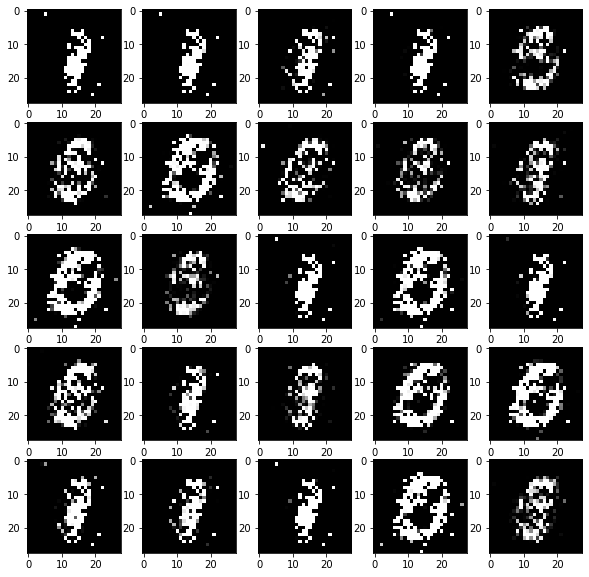

epochs 33


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 8ms/step


  0%|          | 1/273 [00:00<01:55,  2.36it/s]

4/4 [==============================] - 0s 9ms/step


  1%|          | 2/273 [00:00<02:04,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


  1%|          | 3/273 [00:01<01:58,  2.27it/s]

4/4 [==============================] - 0s 11ms/step


  1%|▏         | 4/273 [00:01<02:01,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


  2%|▏         | 5/273 [00:02<02:04,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


  2%|▏         | 6/273 [00:02<02:06,  2.11it/s]

4/4 [==============================] - 0s 12ms/step


  3%|▎         | 7/273 [00:03<02:09,  2.06it/s]

4/4 [==============================] - 0s 8ms/step


  3%|▎         | 8/273 [00:03<02:05,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


  3%|▎         | 9/273 [00:04<02:04,  2.11it/s]

4/4 [==============================] - 0s 10ms/step


  4%|▎         | 10/273 [00:04<02:00,  2.19it/s]

4/4 [==============================] - 0s 10ms/step


  4%|▍         | 11/273 [00:05<02:01,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


  4%|▍         | 12/273 [00:05<01:56,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


  5%|▍         | 13/273 [00:05<01:54,  2.26it/s]

4/4 [==============================] - 0s 13ms/step


  5%|▌         | 14/273 [00:06<01:59,  2.17it/s]

4/4 [==============================] - 0s 10ms/step


  5%|▌         | 15/273 [00:06<01:59,  2.15it/s]

4/4 [==============================] - 0s 21ms/step


  6%|▌         | 16/273 [00:07<01:56,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


  6%|▌         | 17/273 [00:07<01:58,  2.16it/s]

4/4 [==============================] - 0s 10ms/step


  7%|▋         | 18/273 [00:08<01:53,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


  7%|▋         | 19/273 [00:08<02:03,  2.05it/s]

4/4 [==============================] - 0s 10ms/step


  7%|▋         | 20/273 [00:09<02:00,  2.11it/s]

4/4 [==============================] - 0s 8ms/step


  8%|▊         | 21/273 [00:09<01:56,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 22/273 [00:10<02:05,  2.00it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 23/273 [00:10<02:03,  2.03it/s]

4/4 [==============================] - 0s 9ms/step


  9%|▉         | 24/273 [00:11<02:01,  2.06it/s]

4/4 [==============================] - 0s 9ms/step


  9%|▉         | 25/273 [00:11<02:00,  2.07it/s]

4/4 [==============================] - 0s 8ms/step


 10%|▉         | 26/273 [00:12<01:54,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 10%|▉         | 27/273 [00:12<01:49,  2.25it/s]

4/4 [==============================] - 0s 13ms/step


 10%|█         | 28/273 [00:12<01:47,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 11%|█         | 29/273 [00:13<01:47,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 11%|█         | 30/273 [00:13<01:49,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 11%|█▏        | 31/273 [00:14<01:51,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 12%|█▏        | 32/273 [00:14<01:58,  2.03it/s]

4/4 [==============================] - 0s 9ms/step


 12%|█▏        | 33/273 [00:15<01:52,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 12%|█▏        | 34/273 [00:15<01:49,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


 13%|█▎        | 35/273 [00:16<01:49,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 13%|█▎        | 36/273 [00:16<01:48,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▎        | 37/273 [00:17<01:56,  2.02it/s]

4/4 [==============================] - 0s 8ms/step


 14%|█▍        | 38/273 [00:17<01:55,  2.04it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▍        | 39/273 [00:18<01:54,  2.04it/s]

4/4 [==============================] - 0s 9ms/step


 15%|█▍        | 40/273 [00:18<01:53,  2.05it/s]

4/4 [==============================] - 0s 10ms/step


 15%|█▌        | 41/273 [00:19<01:48,  2.13it/s]

4/4 [==============================] - 0s 10ms/step


 15%|█▌        | 42/273 [00:19<01:48,  2.12it/s]

4/4 [==============================] - 0s 10ms/step


 16%|█▌        | 43/273 [00:20<01:49,  2.10it/s]

4/4 [==============================] - 0s 8ms/step


 16%|█▌        | 44/273 [00:20<01:49,  2.09it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▋        | 45/273 [00:20<01:43,  2.20it/s]

4/4 [==============================] - 0s 13ms/step


 17%|█▋        | 46/273 [00:21<01:40,  2.25it/s]

4/4 [==============================] - 0s 10ms/step


 17%|█▋        | 47/273 [00:21<01:41,  2.22it/s]

4/4 [==============================] - 0s 11ms/step


 18%|█▊        | 48/273 [00:22<01:39,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 18%|█▊        | 49/273 [00:22<01:40,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 18%|█▊        | 50/273 [00:23<01:42,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


 19%|█▊        | 51/273 [00:23<01:46,  2.08it/s]

4/4 [==============================] - 0s 12ms/step


 19%|█▉        | 52/273 [00:24<01:43,  2.14it/s]

4/4 [==============================] - 0s 10ms/step


 19%|█▉        | 53/273 [00:24<01:43,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 20%|█▉        | 54/273 [00:25<01:43,  2.11it/s]

4/4 [==============================] - 0s 14ms/step


 20%|██        | 55/273 [00:25<01:42,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 21%|██        | 56/273 [00:26<01:42,  2.13it/s]

4/4 [==============================] - 0s 8ms/step


 21%|██        | 57/273 [00:26<01:39,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 21%|██        | 58/273 [00:26<01:36,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 22%|██▏       | 59/273 [00:27<01:38,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 22%|██▏       | 60/273 [00:27<01:38,  2.17it/s]

4/4 [==============================] - 0s 10ms/step


 22%|██▏       | 61/273 [00:28<01:35,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 23%|██▎       | 62/273 [00:28<01:36,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 23%|██▎       | 63/273 [00:29<01:37,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 23%|██▎       | 64/273 [00:29<01:34,  2.20it/s]

4/4 [==============================] - 0s 10ms/step


 24%|██▍       | 65/273 [00:30<01:35,  2.18it/s]

4/4 [==============================] - 0s 14ms/step


 24%|██▍       | 66/273 [00:30<01:32,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 25%|██▍       | 67/273 [00:31<01:34,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 25%|██▍       | 68/273 [00:31<01:35,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 25%|██▌       | 69/273 [00:31<01:30,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 26%|██▌       | 70/273 [00:32<01:31,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 26%|██▌       | 71/273 [00:32<01:29,  2.26it/s]

4/4 [==============================] - 0s 10ms/step


 26%|██▋       | 72/273 [00:33<01:29,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 27%|██▋       | 73/273 [00:33<01:31,  2.18it/s]

4/4 [==============================] - 0s 12ms/step


 27%|██▋       | 74/273 [00:34<01:34,  2.12it/s]

4/4 [==============================] - 0s 20ms/step


 27%|██▋       | 75/273 [00:34<01:32,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


 28%|██▊       | 76/273 [00:35<01:29,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 28%|██▊       | 77/273 [00:35<01:29,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▊       | 78/273 [00:36<01:30,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▉       | 79/273 [00:36<01:28,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▉       | 80/273 [00:37<01:27,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 30%|██▉       | 81/273 [00:37<01:34,  2.03it/s]

4/4 [==============================] - 0s 8ms/step


 30%|███       | 82/273 [00:38<01:33,  2.03it/s]

4/4 [==============================] - 0s 8ms/step


 30%|███       | 83/273 [00:38<01:33,  2.04it/s]

4/4 [==============================] - 0s 9ms/step


 31%|███       | 84/273 [00:39<01:28,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 31%|███       | 85/273 [00:39<01:34,  1.99it/s]

4/4 [==============================] - 0s 9ms/step


 32%|███▏      | 86/273 [00:40<01:33,  2.00it/s]

4/4 [==============================] - 0s 8ms/step


 32%|███▏      | 87/273 [00:40<01:41,  1.84it/s]

4/4 [==============================] - 0s 8ms/step


 32%|███▏      | 88/273 [00:41<01:35,  1.93it/s]

4/4 [==============================] - 0s 8ms/step


 33%|███▎      | 89/273 [00:41<01:33,  1.96it/s]

4/4 [==============================] - 0s 8ms/step


 33%|███▎      | 90/273 [00:42<01:27,  2.09it/s]

4/4 [==============================] - 0s 9ms/step


 33%|███▎      | 91/273 [00:42<01:24,  2.15it/s]

4/4 [==============================] - 0s 10ms/step


 34%|███▎      | 92/273 [00:42<01:21,  2.21it/s]

4/4 [==============================] - 0s 10ms/step


 34%|███▍      | 93/273 [00:43<01:22,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▍      | 94/273 [00:43<01:21,  2.21it/s]

4/4 [==============================] - 0s 10ms/step


 35%|███▍      | 95/273 [00:44<01:19,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 35%|███▌      | 96/273 [00:44<01:20,  2.20it/s]

4/4 [==============================] - 0s 10ms/step


 36%|███▌      | 97/273 [00:45<01:21,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


 36%|███▌      | 98/273 [00:45<01:21,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▋      | 99/273 [00:46<01:22,  2.11it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 100/273 [00:46<01:23,  2.07it/s]

4/4 [==============================] - 0s 13ms/step


 37%|███▋      | 101/273 [00:47<01:18,  2.18it/s]

4/4 [==============================] - 0s 11ms/step


 37%|███▋      | 102/273 [00:47<01:20,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


 38%|███▊      | 103/273 [00:48<01:18,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


 38%|███▊      | 104/273 [00:48<01:18,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 38%|███▊      | 105/273 [00:48<01:14,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 39%|███▉      | 106/273 [00:49<01:17,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 39%|███▉      | 107/273 [00:49<01:14,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 40%|███▉      | 108/273 [00:50<01:15,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 40%|███▉      | 109/273 [00:50<01:16,  2.16it/s]

4/4 [==============================] - 0s 10ms/step


 40%|████      | 110/273 [00:51<01:16,  2.13it/s]

4/4 [==============================] - 0s 11ms/step


 41%|████      | 111/273 [00:51<01:16,  2.11it/s]

4/4 [==============================] - 0s 9ms/step


 41%|████      | 112/273 [00:52<01:12,  2.22it/s]

4/4 [==============================] - 0s 19ms/step


 41%|████▏     | 113/273 [00:52<01:15,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 42%|████▏     | 114/273 [00:53<01:11,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 42%|████▏     | 115/273 [00:53<01:09,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 42%|████▏     | 116/273 [00:53<01:07,  2.31it/s]

4/4 [==============================] - 0s 8ms/step


 43%|████▎     | 117/273 [00:54<01:10,  2.23it/s]

4/4 [==============================] - 0s 11ms/step


 43%|████▎     | 118/273 [00:54<01:07,  2.29it/s]

4/4 [==============================] - 0s 10ms/step


 44%|████▎     | 119/273 [00:55<01:09,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 44%|████▍     | 120/273 [00:55<01:09,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 44%|████▍     | 121/273 [00:56<01:10,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 45%|████▍     | 122/273 [00:56<01:07,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 45%|████▌     | 123/273 [00:57<01:09,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 45%|████▌     | 124/273 [00:57<01:07,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 46%|████▌     | 125/273 [00:58<01:13,  2.01it/s]

4/4 [==============================] - 0s 10ms/step


 46%|████▌     | 126/273 [00:58<01:12,  2.01it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 127/273 [00:59<01:11,  2.03it/s]

4/4 [==============================] - 0s 11ms/step


 47%|████▋     | 128/273 [00:59<01:10,  2.07it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 129/273 [01:00<01:09,  2.07it/s]

4/4 [==============================] - 0s 12ms/step


 48%|████▊     | 130/273 [01:00<01:07,  2.11it/s]

4/4 [==============================] - 0s 10ms/step


 48%|████▊     | 131/273 [01:01<01:07,  2.12it/s]

4/4 [==============================] - 0s 10ms/step


 48%|████▊     | 132/273 [01:01<01:07,  2.07it/s]

4/4 [==============================] - 0s 10ms/step


 49%|████▊     | 133/273 [01:01<01:04,  2.18it/s]

4/4 [==============================] - 0s 10ms/step


 49%|████▉     | 134/273 [01:02<01:02,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 49%|████▉     | 135/273 [01:02<01:01,  2.26it/s]

4/4 [==============================] - 0s 10ms/step


 50%|████▉     | 136/273 [01:03<01:02,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 50%|█████     | 137/273 [01:03<01:02,  2.17it/s]

4/4 [==============================] - 0s 12ms/step


 51%|█████     | 138/273 [01:04<01:03,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 51%|█████     | 139/273 [01:04<01:00,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 51%|█████▏    | 140/273 [01:05<00:58,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 141/273 [01:05<00:59,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 142/273 [01:05<00:59,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 143/273 [01:06<01:00,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 144/273 [01:06<00:59,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 145/273 [01:07<00:57,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 146/273 [01:07<00:55,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 54%|█████▍    | 147/273 [01:08<00:54,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 54%|█████▍    | 148/273 [01:08<00:58,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▍    | 149/273 [01:09<00:59,  2.08it/s]

4/4 [==============================] - 0s 8ms/step


 55%|█████▍    | 150/273 [01:09<00:58,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▌    | 151/273 [01:10<00:58,  2.08it/s]

4/4 [==============================] - 0s 11ms/step


 56%|█████▌    | 152/273 [01:10<00:55,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 56%|█████▌    | 153/273 [01:11<00:59,  2.01it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▋    | 154/273 [01:11<00:58,  2.03it/s]

4/4 [==============================] - 0s 10ms/step


 57%|█████▋    | 155/273 [01:12<00:58,  2.01it/s]

4/4 [==============================] - 0s 11ms/step


 57%|█████▋    | 156/273 [01:12<00:57,  2.02it/s]

4/4 [==============================] - 0s 14ms/step


 58%|█████▊    | 157/273 [01:13<00:59,  1.95it/s]

4/4 [==============================] - 0s 15ms/step


 58%|█████▊    | 158/273 [01:13<00:58,  1.96it/s]

4/4 [==============================] - 0s 12ms/step


 58%|█████▊    | 159/273 [01:14<00:59,  1.91it/s]

4/4 [==============================] - 0s 14ms/step


 59%|█████▊    | 160/273 [01:14<01:00,  1.86it/s]

4/4 [==============================] - 0s 10ms/step


 59%|█████▉    | 161/273 [01:15<01:00,  1.85it/s]

4/4 [==============================] - 0s 13ms/step


 59%|█████▉    | 162/273 [01:16<01:01,  1.79it/s]

4/4 [==============================] - 0s 15ms/step


 60%|█████▉    | 163/273 [01:16<01:01,  1.78it/s]

4/4 [==============================] - 0s 9ms/step


 60%|██████    | 164/273 [01:17<00:57,  1.91it/s]

4/4 [==============================] - 0s 10ms/step


 60%|██████    | 165/273 [01:17<00:55,  1.96it/s]

4/4 [==============================] - 0s 9ms/step


 61%|██████    | 166/273 [01:17<00:52,  2.06it/s]

4/4 [==============================] - 0s 10ms/step


 61%|██████    | 167/273 [01:18<00:49,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 62%|██████▏   | 168/273 [01:18<00:48,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 62%|██████▏   | 169/273 [01:19<00:46,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 62%|██████▏   | 170/273 [01:19<00:47,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 63%|██████▎   | 171/273 [01:20<00:47,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 63%|██████▎   | 172/273 [01:20<00:47,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


 63%|██████▎   | 173/273 [01:21<00:48,  2.08it/s]

4/4 [==============================] - 0s 8ms/step


 64%|██████▎   | 174/273 [01:21<00:47,  2.10it/s]

4/4 [==============================] - 0s 8ms/step


 64%|██████▍   | 175/273 [01:22<00:46,  2.09it/s]

4/4 [==============================] - 0s 10ms/step


 64%|██████▍   | 176/273 [01:22<00:47,  2.05it/s]

4/4 [==============================] - 0s 12ms/step


 65%|██████▍   | 177/273 [01:23<00:46,  2.04it/s]

4/4 [==============================] - 0s 9ms/step


 65%|██████▌   | 178/273 [01:23<00:45,  2.09it/s]

4/4 [==============================] - 0s 8ms/step


 66%|██████▌   | 179/273 [01:24<00:45,  2.09it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▌   | 180/273 [01:24<00:44,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▋   | 181/273 [01:24<00:42,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 67%|██████▋   | 182/273 [01:25<00:42,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 67%|██████▋   | 183/273 [01:25<00:39,  2.27it/s]

4/4 [==============================] - 0s 11ms/step


 67%|██████▋   | 184/273 [01:26<00:40,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 68%|██████▊   | 185/273 [01:26<00:38,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 68%|██████▊   | 186/273 [01:27<00:39,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 68%|██████▊   | 187/273 [01:27<00:39,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 69%|██████▉   | 188/273 [01:28<00:39,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 69%|██████▉   | 189/273 [01:28<00:39,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 70%|██████▉   | 190/273 [01:29<00:37,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 70%|██████▉   | 191/273 [01:29<00:37,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 70%|███████   | 192/273 [01:30<00:41,  1.94it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████   | 193/273 [01:30<00:39,  2.04it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████   | 194/273 [01:31<00:37,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████▏  | 195/273 [01:31<00:35,  2.19it/s]

4/4 [==============================] - 0s 10ms/step


 72%|███████▏  | 196/273 [01:31<00:33,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 72%|███████▏  | 197/273 [01:32<00:34,  2.20it/s]

4/4 [==============================] - 0s 11ms/step


 73%|███████▎  | 198/273 [01:32<00:33,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


 73%|███████▎  | 199/273 [01:33<00:33,  2.19it/s]

4/4 [==============================] - 0s 10ms/step


 73%|███████▎  | 200/273 [01:33<00:33,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▎  | 201/273 [01:34<00:32,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▍  | 202/273 [01:34<00:32,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▍  | 203/273 [01:35<00:30,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 75%|███████▍  | 204/273 [01:35<00:31,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 75%|███████▌  | 205/273 [01:35<00:30,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 75%|███████▌  | 206/273 [01:36<00:29,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 76%|███████▌  | 207/273 [01:36<00:29,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 76%|███████▌  | 208/273 [01:37<00:28,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 77%|███████▋  | 209/273 [01:37<00:29,  2.19it/s]

4/4 [==============================] - 0s 10ms/step


 77%|███████▋  | 210/273 [01:38<00:29,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 211/273 [01:38<00:28,  2.17it/s]

4/4 [==============================] - 0s 10ms/step


 78%|███████▊  | 212/273 [01:39<00:27,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 213/273 [01:39<00:26,  2.22it/s]

4/4 [==============================] - 0s 11ms/step


 78%|███████▊  | 214/273 [01:40<00:28,  2.06it/s]

4/4 [==============================] - 0s 10ms/step


 79%|███████▉  | 215/273 [01:40<00:29,  2.00it/s]

4/4 [==============================] - 0s 14ms/step


 79%|███████▉  | 216/273 [01:41<00:28,  1.99it/s]

4/4 [==============================] - 0s 13ms/step


 79%|███████▉  | 217/273 [01:41<00:28,  1.97it/s]

4/4 [==============================] - 0s 12ms/step


 80%|███████▉  | 218/273 [01:42<00:29,  1.89it/s]

4/4 [==============================] - 0s 10ms/step


 80%|████████  | 219/273 [01:42<00:27,  1.93it/s]

4/4 [==============================] - 0s 13ms/step


 81%|████████  | 220/273 [01:43<00:27,  1.96it/s]

4/4 [==============================] - 0s 9ms/step


 81%|████████  | 221/273 [01:43<00:26,  1.98it/s]

4/4 [==============================] - 0s 10ms/step


 81%|████████▏ | 222/273 [01:44<00:24,  2.09it/s]

4/4 [==============================] - 0s 8ms/step


 82%|████████▏ | 223/273 [01:44<00:24,  2.08it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 224/273 [01:45<00:22,  2.18it/s]

4/4 [==============================] - 0s 15ms/step


 82%|████████▏ | 225/273 [01:45<00:22,  2.16it/s]

4/4 [==============================] - 0s 10ms/step


 83%|████████▎ | 226/273 [01:45<00:21,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 83%|████████▎ | 227/273 [01:46<00:20,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▎ | 228/273 [01:46<00:19,  2.31it/s]

4/4 [==============================] - 0s 10ms/step


 84%|████████▍ | 229/273 [01:47<00:18,  2.35it/s]

4/4 [==============================] - 0s 8ms/step


 84%|████████▍ | 230/273 [01:47<00:18,  2.34it/s]

4/4 [==============================] - 0s 10ms/step


 85%|████████▍ | 231/273 [01:48<00:17,  2.35it/s]

4/4 [==============================] - 0s 11ms/step


 85%|████████▍ | 232/273 [01:48<00:17,  2.35it/s]

4/4 [==============================] - 0s 9ms/step


 85%|████████▌ | 233/273 [01:48<00:17,  2.34it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▌ | 234/273 [01:49<00:17,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▌ | 235/273 [01:49<00:16,  2.29it/s]

4/4 [==============================] - 0s 14ms/step


 86%|████████▋ | 236/273 [01:50<00:16,  2.24it/s]

4/4 [==============================] - 0s 10ms/step


 87%|████████▋ | 237/273 [01:50<00:15,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 87%|████████▋ | 238/273 [01:51<00:15,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 88%|████████▊ | 239/273 [01:51<00:15,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


 88%|████████▊ | 240/273 [01:52<00:15,  2.18it/s]

4/4 [==============================] - 0s 13ms/step


 88%|████████▊ | 241/273 [01:52<00:14,  2.26it/s]

4/4 [==============================] - 0s 10ms/step


 89%|████████▊ | 242/273 [01:52<00:14,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▉ | 243/273 [01:53<00:13,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 89%|████████▉ | 244/273 [01:53<00:13,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 90%|████████▉ | 245/273 [01:54<00:12,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 90%|█████████ | 246/273 [01:54<00:11,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 90%|█████████ | 247/273 [01:55<00:11,  2.31it/s]

4/4 [==============================] - 0s 13ms/step


 91%|█████████ | 248/273 [01:55<00:10,  2.33it/s]

4/4 [==============================] - 0s 8ms/step


 91%|█████████ | 249/273 [01:56<00:10,  2.37it/s]

4/4 [==============================] - 0s 8ms/step


 92%|█████████▏| 250/273 [01:56<00:09,  2.34it/s]

4/4 [==============================] - 0s 8ms/step


 92%|█████████▏| 251/273 [01:56<00:09,  2.33it/s]

4/4 [==============================] - 0s 11ms/step


 92%|█████████▏| 252/273 [01:57<00:09,  2.20it/s]

4/4 [==============================] - 0s 14ms/step


 93%|█████████▎| 253/273 [01:57<00:09,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 93%|█████████▎| 254/273 [01:58<00:08,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 93%|█████████▎| 255/273 [01:58<00:08,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 94%|█████████▍| 256/273 [01:59<00:07,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 94%|█████████▍| 257/273 [01:59<00:07,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▍| 258/273 [02:00<00:06,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▍| 259/273 [02:00<00:06,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▌| 260/273 [02:01<00:06,  2.08it/s]

4/4 [==============================] - 0s 9ms/step


 96%|█████████▌| 261/273 [02:01<00:05,  2.04it/s]

4/4 [==============================] - 0s 9ms/step


 96%|█████████▌| 262/273 [02:02<00:05,  2.05it/s]

4/4 [==============================] - 0s 9ms/step


 96%|█████████▋| 263/273 [02:02<00:04,  2.12it/s]

4/4 [==============================] - 0s 19ms/step


 97%|█████████▋| 264/273 [02:03<00:04,  2.08it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 265/273 [02:03<00:03,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 266/273 [02:03<00:03,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 98%|█████████▊| 267/273 [02:04<00:02,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 98%|█████████▊| 268/273 [02:04<00:02,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 99%|█████████▊| 269/273 [02:05<00:01,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 99%|█████████▉| 270/273 [02:05<00:01,  2.20it/s]

4/4 [==============================] - 0s 11ms/step


 99%|█████████▉| 271/273 [02:06<00:00,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


100%|█████████▉| 272/273 [02:06<00:00,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


100%|██████████| 273/273 [02:06<00:00,  2.15it/s]


loss is 5.538827826967463e-05 |*| 24.614076614379883
1/1 [==============================] - 0s 26ms/step


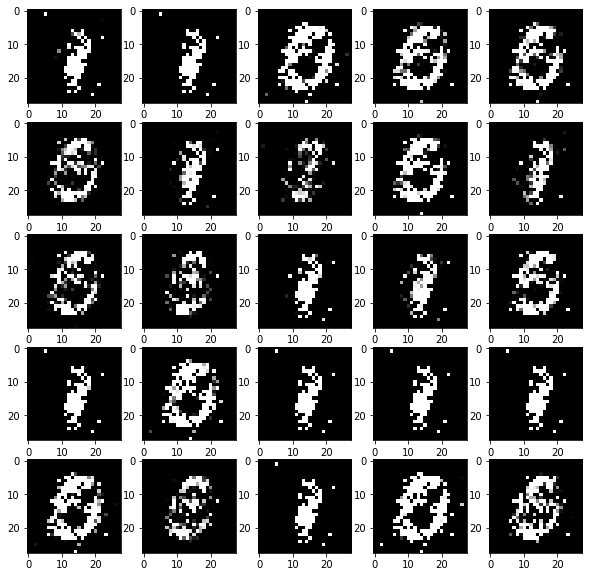

epochs 34


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 9ms/step


  0%|          | 1/273 [00:00<03:58,  1.14it/s]

4/4 [==============================] - 0s 8ms/step


  1%|          | 2/273 [00:01<02:48,  1.61it/s]

4/4 [==============================] - 0s 9ms/step


  1%|          | 3/273 [00:01<02:34,  1.75it/s]

4/4 [==============================] - 0s 11ms/step


  1%|▏         | 4/273 [00:02<02:23,  1.88it/s]

4/4 [==============================] - 0s 11ms/step


  2%|▏         | 5/273 [00:02<02:10,  2.06it/s]

4/4 [==============================] - 0s 9ms/step


  2%|▏         | 6/273 [00:03<02:04,  2.15it/s]

4/4 [==============================] - 0s 10ms/step


  3%|▎         | 7/273 [00:03<02:02,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


  3%|▎         | 8/273 [00:04<02:00,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


  3%|▎         | 9/273 [00:04<01:57,  2.26it/s]

4/4 [==============================] - 0s 13ms/step


  4%|▎         | 10/273 [00:04<01:58,  2.21it/s]

4/4 [==============================] - 0s 13ms/step


  4%|▍         | 11/273 [00:05<01:57,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


  4%|▍         | 12/273 [00:05<01:54,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


  5%|▍         | 13/273 [00:06<01:56,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


  5%|▌         | 14/273 [00:06<01:54,  2.27it/s]

4/4 [==============================] - 0s 10ms/step


  5%|▌         | 15/273 [00:07<01:58,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


  6%|▌         | 16/273 [00:07<01:58,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


  6%|▌         | 17/273 [00:08<02:00,  2.13it/s]

4/4 [==============================] - 0s 14ms/step


  7%|▋         | 18/273 [00:08<02:00,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


  7%|▋         | 19/273 [00:09<01:56,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


  7%|▋         | 20/273 [00:09<01:55,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 21/273 [00:09<01:50,  2.27it/s]

4/4 [==============================] - 0s 10ms/step


  8%|▊         | 22/273 [00:10<01:58,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 23/273 [00:10<01:52,  2.22it/s]

4/4 [==============================] - 0s 10ms/step


  9%|▉         | 24/273 [00:11<01:52,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


  9%|▉         | 25/273 [00:11<01:53,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 10%|▉         | 26/273 [00:12<01:54,  2.16it/s]

4/4 [==============================] - 0s 10ms/step


 10%|▉         | 27/273 [00:12<01:53,  2.18it/s]

4/4 [==============================] - 0s 11ms/step


 10%|█         | 28/273 [00:13<01:52,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 11%|█         | 29/273 [00:13<01:48,  2.26it/s]

4/4 [==============================] - 0s 13ms/step


 11%|█         | 30/273 [00:13<01:47,  2.26it/s]

4/4 [==============================] - 0s 14ms/step


 11%|█▏        | 31/273 [00:14<01:49,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 12%|█▏        | 32/273 [00:14<01:50,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 12%|█▏        | 33/273 [00:15<01:47,  2.24it/s]

4/4 [==============================] - 0s 12ms/step


 12%|█▏        | 34/273 [00:15<01:48,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 13%|█▎        | 35/273 [00:16<01:50,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


 13%|█▎        | 36/273 [00:16<01:49,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


 14%|█▎        | 37/273 [00:17<01:43,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▍        | 38/273 [00:17<01:42,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 14%|█▍        | 39/273 [00:18<01:41,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 15%|█▍        | 40/273 [00:18<01:41,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 15%|█▌        | 41/273 [00:18<01:40,  2.31it/s]

4/4 [==============================] - 0s 10ms/step


 15%|█▌        | 42/273 [00:19<01:39,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▌        | 43/273 [00:19<01:41,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▌        | 44/273 [00:20<01:43,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▋        | 45/273 [00:20<01:42,  2.21it/s]

4/4 [==============================] - 0s 10ms/step


 17%|█▋        | 46/273 [00:21<01:45,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 17%|█▋        | 47/273 [00:21<01:47,  2.11it/s]

4/4 [==============================] - 0s 8ms/step


 18%|█▊        | 48/273 [00:22<01:42,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 18%|█▊        | 49/273 [00:22<01:42,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 18%|█▊        | 50/273 [00:22<01:40,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 19%|█▊        | 51/273 [00:23<01:35,  2.32it/s]

4/4 [==============================] - 0s 12ms/step


 19%|█▉        | 52/273 [00:23<01:40,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 19%|█▉        | 53/273 [00:24<01:36,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 20%|█▉        | 54/273 [00:24<01:37,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 20%|██        | 55/273 [00:25<01:33,  2.34it/s]

4/4 [==============================] - 0s 8ms/step


 21%|██        | 56/273 [00:25<01:30,  2.39it/s]

4/4 [==============================] - 0s 9ms/step


 21%|██        | 57/273 [00:25<01:29,  2.41it/s]

4/4 [==============================] - 0s 8ms/step


 21%|██        | 58/273 [00:26<01:33,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 22%|██▏       | 59/273 [00:26<01:32,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 22%|██▏       | 60/273 [00:27<01:30,  2.36it/s]

4/4 [==============================] - 0s 11ms/step


 22%|██▏       | 61/273 [00:27<01:32,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 23%|██▎       | 62/273 [00:28<01:32,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 23%|██▎       | 63/273 [00:28<01:31,  2.31it/s]

4/4 [==============================] - 0s 10ms/step


 23%|██▎       | 64/273 [00:29<01:32,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 24%|██▍       | 65/273 [00:29<01:29,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


 24%|██▍       | 66/273 [00:29<01:30,  2.29it/s]

4/4 [==============================] - 0s 10ms/step


 25%|██▍       | 67/273 [00:30<01:29,  2.31it/s]

4/4 [==============================] - 0s 8ms/step


 25%|██▍       | 68/273 [00:30<01:28,  2.32it/s]

4/4 [==============================] - 0s 8ms/step


 25%|██▌       | 69/273 [00:31<01:29,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 26%|██▌       | 70/273 [00:31<01:26,  2.34it/s]

4/4 [==============================] - 0s 8ms/step


 26%|██▌       | 71/273 [00:32<01:26,  2.34it/s]

4/4 [==============================] - 0s 9ms/step


 26%|██▋       | 72/273 [00:32<01:26,  2.32it/s]

4/4 [==============================] - 0s 8ms/step


 27%|██▋       | 73/273 [00:32<01:29,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 27%|██▋       | 74/273 [00:33<01:27,  2.27it/s]

4/4 [==============================] - 0s 10ms/step


 27%|██▋       | 75/273 [00:33<01:29,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 28%|██▊       | 76/273 [00:34<01:30,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 28%|██▊       | 77/273 [00:34<01:29,  2.19it/s]

4/4 [==============================] - 0s 10ms/step


 29%|██▊       | 78/273 [00:35<01:26,  2.25it/s]

4/4 [==============================] - 0s 12ms/step


 29%|██▉       | 79/273 [00:35<01:25,  2.28it/s]

4/4 [==============================] - 0s 11ms/step


 29%|██▉       | 80/273 [00:36<01:23,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


 30%|██▉       | 81/273 [00:36<01:25,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 30%|███       | 82/273 [00:36<01:25,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 30%|███       | 83/273 [00:37<01:23,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 31%|███       | 84/273 [00:37<01:24,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 31%|███       | 85/273 [00:38<01:25,  2.21it/s]

4/4 [==============================] - 0s 10ms/step


 32%|███▏      | 86/273 [00:38<01:22,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 32%|███▏      | 87/273 [00:39<01:25,  2.18it/s]

4/4 [==============================] - 0s 11ms/step


 32%|███▏      | 88/273 [00:39<01:23,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 33%|███▎      | 89/273 [00:40<01:20,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 33%|███▎      | 90/273 [00:40<01:19,  2.30it/s]

4/4 [==============================] - 0s 8ms/step


 33%|███▎      | 91/273 [00:40<01:20,  2.27it/s]

4/4 [==============================] - 0s 11ms/step


 34%|███▎      | 92/273 [00:41<01:23,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▍      | 93/273 [00:41<01:21,  2.22it/s]

4/4 [==============================] - 0s 10ms/step


 34%|███▍      | 94/273 [00:42<01:19,  2.26it/s]

4/4 [==============================] - 0s 12ms/step


 35%|███▍      | 95/273 [00:42<01:21,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 35%|███▌      | 96/273 [00:43<01:21,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▌      | 97/273 [00:43<01:19,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▌      | 98/273 [00:44<01:18,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▋      | 99/273 [00:44<01:17,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 100/273 [00:45<01:17,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 101/273 [00:45<01:18,  2.20it/s]

4/4 [==============================] - 0s 10ms/step


 37%|███▋      | 102/273 [00:45<01:19,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 38%|███▊      | 103/273 [00:46<01:15,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 38%|███▊      | 104/273 [00:46<01:16,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 38%|███▊      | 105/273 [00:47<01:17,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 39%|███▉      | 106/273 [00:47<01:15,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 39%|███▉      | 107/273 [00:48<01:13,  2.26it/s]

4/4 [==============================] - 0s 13ms/step


 40%|███▉      | 108/273 [00:48<01:13,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 40%|███▉      | 109/273 [00:49<01:13,  2.24it/s]

4/4 [==============================] - 0s 11ms/step


 40%|████      | 110/273 [00:49<01:11,  2.27it/s]

4/4 [==============================] - 0s 10ms/step


 41%|████      | 111/273 [00:49<01:10,  2.31it/s]

4/4 [==============================] - 0s 8ms/step


 41%|████      | 112/273 [00:50<01:09,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 41%|████▏     | 113/273 [00:50<01:09,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 42%|████▏     | 114/273 [00:51<01:08,  2.32it/s]

4/4 [==============================] - 0s 10ms/step


 42%|████▏     | 115/273 [00:51<01:08,  2.32it/s]

4/4 [==============================] - 0s 10ms/step


 42%|████▏     | 116/273 [00:52<01:09,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 43%|████▎     | 117/273 [00:52<01:07,  2.30it/s]

4/4 [==============================] - 0s 13ms/step


 43%|████▎     | 118/273 [00:52<01:07,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 44%|████▎     | 119/273 [00:53<01:06,  2.33it/s]

4/4 [==============================] - 0s 10ms/step


 44%|████▍     | 120/273 [00:53<01:08,  2.25it/s]

4/4 [==============================] - 0s 13ms/step


 44%|████▍     | 121/273 [00:54<01:09,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 45%|████▍     | 122/273 [00:54<01:08,  2.21it/s]

4/4 [==============================] - 0s 10ms/step


 45%|████▌     | 123/273 [00:55<01:06,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 45%|████▌     | 124/273 [00:55<01:06,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 46%|████▌     | 125/273 [00:56<01:07,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 46%|████▌     | 126/273 [00:56<01:08,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 127/273 [00:57<01:08,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 128/273 [00:57<01:08,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 129/273 [00:58<01:04,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 48%|████▊     | 130/273 [00:58<01:04,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 48%|████▊     | 131/273 [00:58<01:05,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 48%|████▊     | 132/273 [00:59<01:02,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 49%|████▊     | 133/273 [00:59<01:00,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


 49%|████▉     | 134/273 [01:00<00:58,  2.37it/s]

4/4 [==============================] - 0s 10ms/step


 49%|████▉     | 135/273 [01:00<00:58,  2.37it/s]

4/4 [==============================] - 0s 9ms/step


 50%|████▉     | 136/273 [01:00<00:57,  2.40it/s]

4/4 [==============================] - 0s 9ms/step


 50%|█████     | 137/273 [01:01<00:59,  2.29it/s]

4/4 [==============================] - 0s 10ms/step


 51%|█████     | 138/273 [01:01<01:00,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 51%|█████     | 139/273 [01:02<01:01,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 51%|█████▏    | 140/273 [01:02<01:02,  2.12it/s]

4/4 [==============================] - 0s 8ms/step


 52%|█████▏    | 141/273 [01:03<01:01,  2.15it/s]

4/4 [==============================] - 0s 13ms/step


 52%|█████▏    | 142/273 [01:03<01:01,  2.12it/s]

4/4 [==============================] - 0s 13ms/step


 52%|█████▏    | 143/273 [01:04<01:00,  2.13it/s]

4/4 [==============================] - 0s 14ms/step


 53%|█████▎    | 144/273 [01:04<01:01,  2.10it/s]

4/4 [==============================] - 0s 8ms/step


 53%|█████▎    | 145/273 [01:05<01:01,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 146/273 [01:05<00:59,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 54%|█████▍    | 147/273 [01:06<00:58,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 54%|█████▍    | 148/273 [01:06<01:01,  2.04it/s]

4/4 [==============================] - 0s 8ms/step


 55%|█████▍    | 149/273 [01:07<00:58,  2.13it/s]

4/4 [==============================] - 0s 10ms/step


 55%|█████▍    | 150/273 [01:07<00:56,  2.19it/s]

4/4 [==============================] - 0s 10ms/step


 55%|█████▌    | 151/273 [01:08<00:55,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▌    | 152/273 [01:08<00:54,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 56%|█████▌    | 153/273 [01:08<00:54,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 56%|█████▋    | 154/273 [01:09<00:54,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


 57%|█████▋    | 155/273 [01:09<00:53,  2.20it/s]

4/4 [==============================] - 0s 11ms/step


 57%|█████▋    | 156/273 [01:10<00:53,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 58%|█████▊    | 157/273 [01:10<00:50,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 58%|█████▊    | 158/273 [01:11<00:52,  2.20it/s]

4/4 [==============================] - 0s 10ms/step


 58%|█████▊    | 159/273 [01:11<00:51,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▊    | 160/273 [01:12<00:51,  2.18it/s]

4/4 [==============================] - 0s 10ms/step


 59%|█████▉    | 161/273 [01:12<00:50,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 59%|█████▉    | 162/273 [01:13<00:50,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 60%|█████▉    | 163/273 [01:13<00:49,  2.24it/s]

4/4 [==============================] - 0s 12ms/step


 60%|██████    | 164/273 [01:14<00:51,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


 60%|██████    | 165/273 [01:14<00:51,  2.08it/s]

4/4 [==============================] - 0s 9ms/step


 61%|██████    | 166/273 [01:15<00:51,  2.06it/s]

4/4 [==============================] - 0s 9ms/step


 61%|██████    | 167/273 [01:15<00:52,  2.03it/s]

4/4 [==============================] - 0s 12ms/step


 62%|██████▏   | 168/273 [01:15<00:49,  2.10it/s]

4/4 [==============================] - 0s 10ms/step


 62%|██████▏   | 169/273 [01:16<00:48,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 62%|██████▏   | 170/273 [01:16<00:47,  2.17it/s]

4/4 [==============================] - 0s 11ms/step


 63%|██████▎   | 171/273 [01:17<00:46,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 63%|██████▎   | 172/273 [01:17<00:44,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 63%|██████▎   | 173/273 [01:18<00:45,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 64%|██████▎   | 174/273 [01:18<00:45,  2.19it/s]

4/4 [==============================] - 0s 12ms/step


 64%|██████▍   | 175/273 [01:19<00:46,  2.11it/s]

4/4 [==============================] - 0s 9ms/step


 64%|██████▍   | 176/273 [01:19<00:47,  2.05it/s]

4/4 [==============================] - 0s 13ms/step


 65%|██████▍   | 177/273 [01:20<00:48,  1.99it/s]

4/4 [==============================] - 0s 12ms/step


 65%|██████▌   | 178/273 [01:20<00:48,  1.95it/s]

4/4 [==============================] - 0s 12ms/step


 66%|██████▌   | 179/273 [01:21<00:48,  1.92it/s]

4/4 [==============================] - 0s 11ms/step


 66%|██████▌   | 180/273 [01:22<00:53,  1.73it/s]

4/4 [==============================] - 0s 13ms/step


 66%|██████▋   | 181/273 [01:22<00:52,  1.76it/s]

4/4 [==============================] - 0s 12ms/step


 67%|██████▋   | 182/273 [01:23<00:50,  1.81it/s]

4/4 [==============================] - 0s 10ms/step


 67%|██████▋   | 183/273 [01:23<00:47,  1.88it/s]

4/4 [==============================] - 0s 8ms/step


 67%|██████▋   | 184/273 [01:24<00:45,  1.94it/s]

4/4 [==============================] - 0s 9ms/step


 68%|██████▊   | 185/273 [01:24<00:43,  2.01it/s]

4/4 [==============================] - 0s 8ms/step


 68%|██████▊   | 186/273 [01:24<00:43,  2.01it/s]

4/4 [==============================] - 0s 8ms/step


 68%|██████▊   | 187/273 [01:25<00:41,  2.09it/s]

4/4 [==============================] - 0s 8ms/step


 69%|██████▉   | 188/273 [01:25<00:40,  2.10it/s]

4/4 [==============================] - 0s 10ms/step


 69%|██████▉   | 189/273 [01:26<00:38,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 70%|██████▉   | 190/273 [01:26<00:36,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 70%|██████▉   | 191/273 [01:27<00:35,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 70%|███████   | 192/273 [01:27<00:34,  2.38it/s]

4/4 [==============================] - 0s 14ms/step


 71%|███████   | 193/273 [01:28<00:36,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 71%|███████   | 194/273 [01:28<00:36,  2.16it/s]

4/4 [==============================] - 0s 11ms/step


 71%|███████▏  | 195/273 [01:28<00:36,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 72%|███████▏  | 196/273 [01:29<00:36,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 72%|███████▏  | 197/273 [01:29<00:34,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 73%|███████▎  | 198/273 [01:30<00:34,  2.18it/s]

4/4 [==============================] - 0s 10ms/step


 73%|███████▎  | 199/273 [01:30<00:34,  2.12it/s]

4/4 [==============================] - 0s 13ms/step


 73%|███████▎  | 200/273 [01:31<00:35,  2.08it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▎  | 201/273 [01:31<00:32,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▍  | 202/273 [01:32<00:31,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▍  | 203/273 [01:32<00:31,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 75%|███████▍  | 204/273 [01:33<00:30,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 75%|███████▌  | 205/273 [01:33<00:29,  2.34it/s]

4/4 [==============================] - 0s 9ms/step


 75%|███████▌  | 206/273 [01:33<00:29,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 76%|███████▌  | 207/273 [01:34<00:32,  2.02it/s]

4/4 [==============================] - 0s 8ms/step


 76%|███████▌  | 208/273 [01:35<00:33,  1.95it/s]

4/4 [==============================] - 0s 10ms/step


 77%|███████▋  | 209/273 [01:35<00:32,  1.99it/s]

4/4 [==============================] - 0s 10ms/step


 77%|███████▋  | 210/273 [01:36<00:30,  2.05it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 211/273 [01:36<00:30,  2.06it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 212/273 [01:37<00:29,  2.04it/s]

4/4 [==============================] - 0s 11ms/step


 78%|███████▊  | 213/273 [01:37<00:28,  2.07it/s]

4/4 [==============================] - 0s 12ms/step


 78%|███████▊  | 214/273 [01:37<00:27,  2.16it/s]

4/4 [==============================] - 0s 10ms/step


 79%|███████▉  | 215/273 [01:38<00:26,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 79%|███████▉  | 216/273 [01:38<00:26,  2.16it/s]

4/4 [==============================] - 0s 10ms/step


 79%|███████▉  | 217/273 [01:39<00:25,  2.16it/s]

4/4 [==============================] - 0s 10ms/step


 80%|███████▉  | 218/273 [01:39<00:25,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 80%|████████  | 219/273 [01:40<00:24,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 81%|████████  | 220/273 [01:40<00:24,  2.15it/s]

4/4 [==============================] - 0s 11ms/step


 81%|████████  | 221/273 [01:41<00:23,  2.17it/s]

4/4 [==============================] - 0s 12ms/step


 81%|████████▏ | 222/273 [01:41<00:22,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 223/273 [01:41<00:22,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


 82%|████████▏ | 224/273 [01:42<00:22,  2.18it/s]

4/4 [==============================] - 0s 10ms/step


 82%|████████▏ | 225/273 [01:42<00:21,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 83%|████████▎ | 226/273 [01:43<00:21,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 83%|████████▎ | 227/273 [01:43<00:20,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▎ | 228/273 [01:44<00:20,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▍ | 229/273 [01:44<00:20,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


 84%|████████▍ | 230/273 [01:45<00:19,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 85%|████████▍ | 231/273 [01:45<00:18,  2.22it/s]

4/4 [==============================] - 0s 11ms/step


 85%|████████▍ | 232/273 [01:46<00:19,  2.11it/s]

4/4 [==============================] - 0s 15ms/step


 85%|████████▌ | 233/273 [01:46<00:19,  2.07it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▌ | 234/273 [01:47<00:18,  2.11it/s]

4/4 [==============================] - 0s 15ms/step


 86%|████████▌ | 235/273 [01:47<00:19,  1.94it/s]

4/4 [==============================] - 0s 11ms/step


 86%|████████▋ | 236/273 [01:48<00:18,  1.95it/s]

4/4 [==============================] - 0s 14ms/step


 87%|████████▋ | 237/273 [01:48<00:19,  1.84it/s]

4/4 [==============================] - 0s 15ms/step


 87%|████████▋ | 238/273 [01:49<00:19,  1.82it/s]

4/4 [==============================] - 0s 12ms/step


 88%|████████▊ | 239/273 [01:49<00:18,  1.88it/s]

4/4 [==============================] - 0s 11ms/step


 88%|████████▊ | 240/273 [01:50<00:17,  1.91it/s]

4/4 [==============================] - 0s 8ms/step


 88%|████████▊ | 241/273 [01:50<00:16,  1.95it/s]

4/4 [==============================] - 0s 8ms/step


 89%|████████▊ | 242/273 [01:51<00:15,  2.06it/s]

4/4 [==============================] - 0s 8ms/step


 89%|████████▉ | 243/273 [01:51<00:13,  2.15it/s]

4/4 [==============================] - 0s 10ms/step


 89%|████████▉ | 244/273 [01:52<00:13,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 90%|████████▉ | 245/273 [01:52<00:13,  2.11it/s]

4/4 [==============================] - 0s 13ms/step


 90%|█████████ | 246/273 [01:53<00:12,  2.16it/s]

4/4 [==============================] - 0s 10ms/step


 90%|█████████ | 247/273 [01:53<00:11,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 91%|█████████ | 248/273 [01:53<00:10,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 91%|█████████ | 249/273 [01:54<00:10,  2.24it/s]

4/4 [==============================] - 0s 11ms/step


 92%|█████████▏| 250/273 [01:54<00:11,  2.08it/s]

4/4 [==============================] - 0s 9ms/step


 92%|█████████▏| 251/273 [01:55<00:10,  2.13it/s]

4/4 [==============================] - 0s 10ms/step


 92%|█████████▏| 252/273 [01:55<00:10,  2.07it/s]

4/4 [==============================] - 0s 8ms/step


 93%|█████████▎| 253/273 [01:56<00:09,  2.06it/s]

4/4 [==============================] - 0s 8ms/step


 93%|█████████▎| 254/273 [01:56<00:09,  2.04it/s]

4/4 [==============================] - 0s 9ms/step


 93%|█████████▎| 255/273 [01:57<00:08,  2.09it/s]

4/4 [==============================] - 0s 9ms/step


 94%|█████████▍| 256/273 [01:57<00:08,  1.95it/s]

4/4 [==============================] - 0s 8ms/step


 94%|█████████▍| 257/273 [01:58<00:07,  2.05it/s]

4/4 [==============================] - 0s 8ms/step


 95%|█████████▍| 258/273 [01:58<00:07,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▍| 259/273 [01:59<00:06,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▌| 260/273 [01:59<00:05,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 96%|█████████▌| 261/273 [02:00<00:05,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 96%|█████████▌| 262/273 [02:00<00:04,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 96%|█████████▋| 263/273 [02:00<00:04,  2.35it/s]

4/4 [==============================] - 0s 8ms/step


 97%|█████████▋| 264/273 [02:01<00:03,  2.39it/s]

4/4 [==============================] - 0s 8ms/step


 97%|█████████▋| 265/273 [02:01<00:03,  2.33it/s]

4/4 [==============================] - 0s 10ms/step


 97%|█████████▋| 266/273 [02:02<00:03,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 98%|█████████▊| 267/273 [02:02<00:02,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 98%|█████████▊| 268/273 [02:03<00:02,  2.35it/s]

4/4 [==============================] - 0s 9ms/step


 99%|█████████▊| 269/273 [02:03<00:01,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 99%|█████████▉| 270/273 [02:04<00:01,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 99%|█████████▉| 271/273 [02:04<00:00,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


100%|█████████▉| 272/273 [02:04<00:00,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


100%|██████████| 273/273 [02:05<00:00,  2.18it/s]


loss is 1.6441814295831136e-05 |*| 26.369945526123047
1/1 [==============================] - 0s 25ms/step


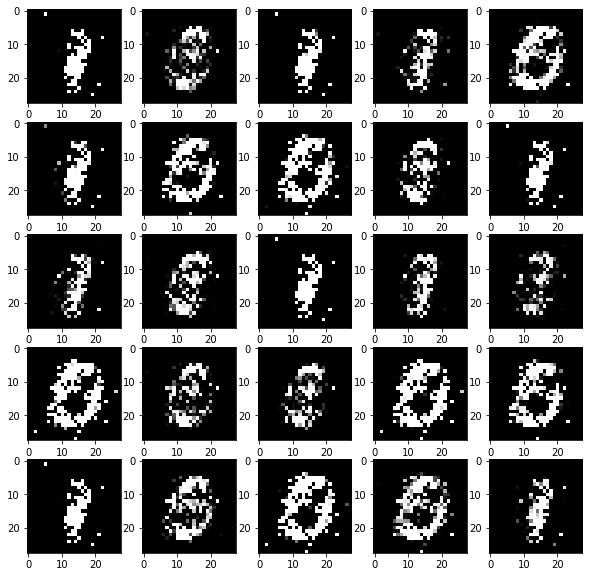

epochs 35


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 8ms/step


  0%|          | 1/273 [00:00<02:05,  2.17it/s]

4/4 [==============================] - 0s 10ms/step


  1%|          | 2/273 [00:00<02:08,  2.10it/s]

4/4 [==============================] - 0s 8ms/step


  1%|          | 3/273 [00:01<02:04,  2.17it/s]

4/4 [==============================] - 0s 12ms/step


  1%|▏         | 4/273 [00:01<02:04,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


  2%|▏         | 5/273 [00:02<01:57,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


  2%|▏         | 6/273 [00:02<02:01,  2.20it/s]

4/4 [==============================] - 0s 11ms/step


  3%|▎         | 7/273 [00:03<02:03,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


  3%|▎         | 8/273 [00:03<01:59,  2.21it/s]

4/4 [==============================] - 0s 15ms/step


  3%|▎         | 9/273 [00:04<01:59,  2.21it/s]

4/4 [==============================] - 0s 10ms/step


  4%|▎         | 10/273 [00:04<02:01,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


  4%|▍         | 11/273 [00:05<02:02,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


  4%|▍         | 12/273 [00:05<02:03,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


  5%|▍         | 13/273 [00:05<01:58,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


  5%|▌         | 14/273 [00:06<02:00,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


  5%|▌         | 15/273 [00:06<01:56,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


  6%|▌         | 16/273 [00:07<01:52,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


  6%|▌         | 17/273 [00:07<01:54,  2.23it/s]

4/4 [==============================] - 0s 11ms/step


  7%|▋         | 18/273 [00:08<01:52,  2.27it/s]

4/4 [==============================] - 0s 10ms/step


  7%|▋         | 19/273 [00:08<02:07,  2.00it/s]

4/4 [==============================] - 0s 9ms/step


  7%|▋         | 20/273 [00:09<02:04,  2.04it/s]

4/4 [==============================] - 0s 8ms/step


  8%|▊         | 21/273 [00:09<02:02,  2.06it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 22/273 [00:10<01:59,  2.11it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 23/273 [00:10<01:56,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


  9%|▉         | 24/273 [00:11<01:56,  2.13it/s]

4/4 [==============================] - 0s 8ms/step


  9%|▉         | 25/273 [00:11<01:56,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 10%|▉         | 26/273 [00:12<01:57,  2.10it/s]

4/4 [==============================] - 0s 10ms/step


 10%|▉         | 27/273 [00:12<01:52,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 10%|█         | 28/273 [00:12<01:48,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


 11%|█         | 29/273 [00:13<01:48,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 11%|█         | 30/273 [00:13<01:48,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 11%|█▏        | 31/273 [00:14<01:47,  2.25it/s]

4/4 [==============================] - 0s 10ms/step


 12%|█▏        | 32/273 [00:14<01:49,  2.20it/s]

4/4 [==============================] - 0s 13ms/step


 12%|█▏        | 33/273 [00:15<01:45,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 12%|█▏        | 34/273 [00:15<01:44,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 13%|█▎        | 35/273 [00:16<01:48,  2.20it/s]

4/4 [==============================] - 0s 12ms/step


 13%|█▎        | 36/273 [00:16<01:48,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▎        | 37/273 [00:16<01:45,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▍        | 38/273 [00:17<01:44,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▍        | 39/273 [00:17<01:43,  2.27it/s]

4/4 [==============================] - 0s 14ms/step


 15%|█▍        | 40/273 [00:18<01:47,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 15%|█▌        | 41/273 [00:18<01:48,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


 15%|█▌        | 42/273 [00:19<01:45,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▌        | 43/273 [00:19<01:40,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▌        | 44/273 [00:20<01:42,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▋        | 45/273 [00:20<01:40,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 17%|█▋        | 46/273 [00:20<01:39,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 17%|█▋        | 47/273 [00:21<01:42,  2.21it/s]

4/4 [==============================] - 0s 11ms/step


 18%|█▊        | 48/273 [00:21<01:44,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 18%|█▊        | 49/273 [00:22<01:45,  2.12it/s]

4/4 [==============================] - 0s 15ms/step


 18%|█▊        | 50/273 [00:22<01:41,  2.19it/s]

4/4 [==============================] - 0s 14ms/step


 19%|█▊        | 51/273 [00:23<01:43,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


 19%|█▉        | 52/273 [00:23<01:43,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 19%|█▉        | 53/273 [00:24<01:40,  2.18it/s]

4/4 [==============================] - 0s 11ms/step


 20%|█▉        | 54/273 [00:24<01:48,  2.01it/s]

4/4 [==============================] - 0s 9ms/step


 20%|██        | 55/273 [00:25<01:47,  2.04it/s]

4/4 [==============================] - 0s 13ms/step


 21%|██        | 56/273 [00:25<01:42,  2.12it/s]

4/4 [==============================] - 0s 16ms/step


 21%|██        | 57/273 [00:26<01:41,  2.12it/s]

4/4 [==============================] - 0s 8ms/step


 21%|██        | 58/273 [00:26<01:38,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 22%|██▏       | 59/273 [00:27<01:34,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 22%|██▏       | 60/273 [00:27<01:34,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 22%|██▏       | 61/273 [00:27<01:32,  2.28it/s]

4/4 [==============================] - 0s 10ms/step


 23%|██▎       | 62/273 [00:28<01:31,  2.29it/s]

4/4 [==============================] - 0s 10ms/step


 23%|██▎       | 63/273 [00:28<01:32,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 23%|██▎       | 64/273 [00:29<01:31,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 24%|██▍       | 65/273 [00:29<01:29,  2.31it/s]

4/4 [==============================] - 0s 8ms/step


 24%|██▍       | 66/273 [00:30<01:30,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 25%|██▍       | 67/273 [00:30<01:32,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 25%|██▍       | 68/273 [00:31<01:42,  2.00it/s]

4/4 [==============================] - 0s 11ms/step


 25%|██▌       | 69/273 [00:31<01:41,  2.02it/s]

4/4 [==============================] - 0s 10ms/step


 26%|██▌       | 70/273 [00:32<01:35,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 26%|██▌       | 71/273 [00:32<01:34,  2.13it/s]

4/4 [==============================] - 0s 8ms/step


 26%|██▋       | 72/273 [00:32<01:32,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 27%|██▋       | 73/273 [00:33<01:31,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 27%|██▋       | 74/273 [00:33<01:29,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 27%|██▋       | 75/273 [00:34<01:29,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 28%|██▊       | 76/273 [00:34<01:29,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 28%|██▊       | 77/273 [00:35<01:28,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 29%|██▊       | 78/273 [00:35<01:25,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▉       | 79/273 [00:36<01:23,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▉       | 80/273 [00:36<01:25,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 30%|██▉       | 81/273 [00:36<01:22,  2.34it/s]

4/4 [==============================] - 0s 10ms/step


 30%|███       | 82/273 [00:37<01:21,  2.34it/s]

4/4 [==============================] - 0s 11ms/step


 30%|███       | 83/273 [00:37<01:23,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 31%|███       | 84/273 [00:38<01:24,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 31%|███       | 85/273 [00:38<01:26,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 32%|███▏      | 86/273 [00:39<01:26,  2.15it/s]

4/4 [==============================] - 0s 12ms/step


 32%|███▏      | 87/273 [00:39<01:24,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 32%|███▏      | 88/273 [00:40<01:22,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 33%|███▎      | 89/273 [00:40<01:22,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 33%|███▎      | 90/273 [00:41<01:23,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 33%|███▎      | 91/273 [00:41<01:20,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▎      | 92/273 [00:41<01:21,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▍      | 93/273 [00:42<01:22,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▍      | 94/273 [00:42<01:22,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 35%|███▍      | 95/273 [00:43<01:20,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 35%|███▌      | 96/273 [00:43<01:18,  2.27it/s]

4/4 [==============================] - 0s 11ms/step


 36%|███▌      | 97/273 [00:44<01:18,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▌      | 98/273 [00:44<01:20,  2.17it/s]

4/4 [==============================] - 0s 11ms/step


 36%|███▋      | 99/273 [00:45<01:24,  2.07it/s]

4/4 [==============================] - 0s 8ms/step


 37%|███▋      | 100/273 [00:45<01:21,  2.12it/s]

4/4 [==============================] - 0s 8ms/step


 37%|███▋      | 101/273 [00:46<01:21,  2.12it/s]

4/4 [==============================] - 0s 10ms/step


 37%|███▋      | 102/273 [00:46<01:17,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 38%|███▊      | 103/273 [00:46<01:18,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 38%|███▊      | 104/273 [00:47<01:18,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 38%|███▊      | 105/273 [00:47<01:19,  2.12it/s]

4/4 [==============================] - 0s 8ms/step


 39%|███▉      | 106/273 [00:48<01:16,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 39%|███▉      | 107/273 [00:48<01:14,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 40%|███▉      | 108/273 [00:49<01:11,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 40%|███▉      | 109/273 [00:49<01:12,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 40%|████      | 110/273 [00:50<01:14,  2.19it/s]

4/4 [==============================] - 0s 10ms/step


 41%|████      | 111/273 [00:50<01:15,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 41%|████      | 112/273 [00:51<01:13,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 41%|████▏     | 113/273 [00:51<01:11,  2.24it/s]

4/4 [==============================] - 0s 13ms/step


 42%|████▏     | 114/273 [00:51<01:10,  2.27it/s]

4/4 [==============================] - 0s 10ms/step


 42%|████▏     | 115/273 [00:52<01:11,  2.20it/s]

4/4 [==============================] - 0s 12ms/step


 42%|████▏     | 116/273 [00:52<01:10,  2.21it/s]

4/4 [==============================] - 0s 14ms/step


 43%|████▎     | 117/273 [00:53<01:10,  2.22it/s]

4/4 [==============================] - 0s 10ms/step


 43%|████▎     | 118/273 [00:53<01:11,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 44%|████▎     | 119/273 [00:54<01:07,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 44%|████▍     | 120/273 [00:54<01:07,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 44%|████▍     | 121/273 [00:55<01:09,  2.19it/s]

4/4 [==============================] - 0s 10ms/step


 45%|████▍     | 122/273 [00:55<01:10,  2.15it/s]

4/4 [==============================] - 0s 11ms/step


 45%|████▌     | 123/273 [00:56<01:10,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 45%|████▌     | 124/273 [00:56<01:08,  2.19it/s]

4/4 [==============================] - 0s 14ms/step


 46%|████▌     | 125/273 [00:56<01:08,  2.16it/s]

4/4 [==============================] - 0s 14ms/step


 46%|████▌     | 126/273 [00:57<01:09,  2.12it/s]

4/4 [==============================] - 0s 10ms/step


 47%|████▋     | 127/273 [00:57<01:09,  2.11it/s]

4/4 [==============================] - 0s 10ms/step


 47%|████▋     | 128/273 [00:58<01:06,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 129/273 [00:58<01:06,  2.18it/s]

4/4 [==============================] - 0s 10ms/step


 48%|████▊     | 130/273 [00:59<01:02,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 48%|████▊     | 131/273 [00:59<01:01,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 48%|████▊     | 132/273 [01:00<01:03,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 49%|████▊     | 133/273 [01:00<01:00,  2.30it/s]

4/4 [==============================] - 0s 10ms/step


 49%|████▉     | 134/273 [01:00<01:01,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 49%|████▉     | 135/273 [01:01<01:01,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 50%|████▉     | 136/273 [01:01<01:03,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 50%|█████     | 137/273 [01:02<01:03,  2.13it/s]

4/4 [==============================] - 0s 8ms/step


 51%|█████     | 138/273 [01:02<01:03,  2.12it/s]

4/4 [==============================] - 0s 8ms/step


 51%|█████     | 139/273 [01:03<01:02,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 51%|█████▏    | 140/273 [01:03<01:01,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 52%|█████▏    | 141/273 [01:04<01:05,  2.02it/s]

4/4 [==============================] - 0s 8ms/step


 52%|█████▏    | 142/273 [01:04<01:03,  2.05it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 143/273 [01:05<01:03,  2.03it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 144/273 [01:05<01:00,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 145/273 [01:06<01:05,  1.96it/s]

4/4 [==============================] - 0s 8ms/step


 53%|█████▎    | 146/273 [01:06<01:03,  2.02it/s]

4/4 [==============================] - 0s 9ms/step


 54%|█████▍    | 147/273 [01:07<00:58,  2.14it/s]

4/4 [==============================] - 0s 10ms/step


 54%|█████▍    | 148/273 [01:07<00:57,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


 55%|█████▍    | 149/273 [01:08<00:57,  2.15it/s]

4/4 [==============================] - 0s 10ms/step


 55%|█████▍    | 150/273 [01:08<00:58,  2.12it/s]

4/4 [==============================] - 0s 8ms/step


 55%|█████▌    | 151/273 [01:09<00:56,  2.14it/s]

4/4 [==============================] - 0s 11ms/step


 56%|█████▌    | 152/273 [01:09<00:53,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▌    | 153/273 [01:09<00:51,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▋    | 154/273 [01:10<00:51,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 57%|█████▋    | 155/273 [01:10<00:51,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 57%|█████▋    | 156/273 [01:11<00:51,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 58%|█████▊    | 157/273 [01:11<00:51,  2.25it/s]

4/4 [==============================] - 0s 15ms/step


 58%|█████▊    | 158/273 [01:12<00:51,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 58%|█████▊    | 159/273 [01:12<00:52,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▊    | 160/273 [01:13<00:50,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▉    | 161/273 [01:13<00:49,  2.27it/s]

4/4 [==============================] - 0s 10ms/step


 59%|█████▉    | 162/273 [01:13<00:48,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 60%|█████▉    | 163/273 [01:14<00:46,  2.36it/s]

4/4 [==============================] - 0s 10ms/step


 60%|██████    | 164/273 [01:14<00:46,  2.36it/s]

4/4 [==============================] - 0s 12ms/step


 60%|██████    | 165/273 [01:15<00:46,  2.31it/s]

4/4 [==============================] - 0s 11ms/step


 61%|██████    | 166/273 [01:15<00:47,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 61%|██████    | 167/273 [01:16<00:48,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


 62%|██████▏   | 168/273 [01:16<00:49,  2.11it/s]

4/4 [==============================] - 0s 9ms/step


 62%|██████▏   | 169/273 [01:17<00:48,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 62%|██████▏   | 170/273 [01:17<00:48,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 63%|██████▎   | 171/273 [01:18<00:47,  2.13it/s]

4/4 [==============================] - 0s 13ms/step


 63%|██████▎   | 172/273 [01:18<00:45,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 63%|██████▎   | 173/273 [01:18<00:46,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 64%|██████▎   | 174/273 [01:19<00:43,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 64%|██████▍   | 175/273 [01:19<00:42,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 64%|██████▍   | 176/273 [01:20<00:42,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 65%|██████▍   | 177/273 [01:20<00:41,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 65%|██████▌   | 178/273 [01:21<00:41,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▌   | 179/273 [01:21<00:41,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 66%|██████▌   | 180/273 [01:22<00:43,  2.13it/s]

4/4 [==============================] - 0s 8ms/step


 66%|██████▋   | 181/273 [01:22<00:43,  2.13it/s]

4/4 [==============================] - 0s 8ms/step


 67%|██████▋   | 182/273 [01:22<00:41,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 67%|██████▋   | 183/273 [01:23<00:41,  2.16it/s]

4/4 [==============================] - 0s 13ms/step


 67%|██████▋   | 184/273 [01:23<00:41,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 68%|██████▊   | 185/273 [01:24<00:40,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 68%|██████▊   | 186/273 [01:24<00:39,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 68%|██████▊   | 187/273 [01:25<00:38,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 69%|██████▉   | 188/273 [01:25<00:37,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 69%|██████▉   | 189/273 [01:26<00:36,  2.29it/s]

4/4 [==============================] - 0s 13ms/step


 70%|██████▉   | 190/273 [01:26<00:37,  2.22it/s]

4/4 [==============================] - 0s 11ms/step


 70%|██████▉   | 191/273 [01:27<00:36,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 70%|███████   | 192/273 [01:27<00:35,  2.31it/s]

4/4 [==============================] - 0s 12ms/step


 71%|███████   | 193/273 [01:27<00:35,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 71%|███████   | 194/273 [01:28<00:36,  2.18it/s]

4/4 [==============================] - 0s 12ms/step


 71%|███████▏  | 195/273 [01:28<00:36,  2.12it/s]

4/4 [==============================] - 0s 13ms/step


 72%|███████▏  | 196/273 [01:29<00:39,  1.96it/s]

4/4 [==============================] - 0s 15ms/step


 72%|███████▏  | 197/273 [01:30<00:39,  1.91it/s]

4/4 [==============================] - 0s 14ms/step


 73%|███████▎  | 198/273 [01:30<00:40,  1.85it/s]

4/4 [==============================] - 0s 13ms/step


 73%|███████▎  | 199/273 [01:31<00:40,  1.82it/s]

4/4 [==============================] - 0s 12ms/step


 73%|███████▎  | 200/273 [01:31<00:39,  1.86it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▎  | 201/273 [01:32<00:39,  1.82it/s]

4/4 [==============================] - 0s 16ms/step


 74%|███████▍  | 202/273 [01:32<00:38,  1.84it/s]

4/4 [==============================] - 0s 8ms/step


 74%|███████▍  | 203/273 [01:33<00:35,  1.98it/s]

4/4 [==============================] - 0s 8ms/step


 75%|███████▍  | 204/273 [01:33<00:33,  2.05it/s]

4/4 [==============================] - 0s 8ms/step


 75%|███████▌  | 205/273 [01:34<00:32,  2.11it/s]

4/4 [==============================] - 0s 8ms/step


 75%|███████▌  | 206/273 [01:34<00:30,  2.21it/s]

4/4 [==============================] - 0s 10ms/step


 76%|███████▌  | 207/273 [01:34<00:29,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 76%|███████▌  | 208/273 [01:35<00:29,  2.23it/s]

4/4 [==============================] - 0s 10ms/step


 77%|███████▋  | 209/273 [01:35<00:28,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 210/273 [01:36<00:27,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 211/273 [01:36<00:26,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 212/273 [01:37<00:27,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


 78%|███████▊  | 213/273 [01:37<00:26,  2.23it/s]

4/4 [==============================] - 0s 10ms/step


 78%|███████▊  | 214/273 [01:38<00:25,  2.29it/s]

4/4 [==============================] - 0s 10ms/step


 79%|███████▉  | 215/273 [01:38<00:25,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 79%|███████▉  | 216/273 [01:38<00:24,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 79%|███████▉  | 217/273 [01:39<00:24,  2.27it/s]

4/4 [==============================] - 0s 13ms/step


 80%|███████▉  | 218/273 [01:39<00:24,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 80%|████████  | 219/273 [01:40<00:23,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 81%|████████  | 220/273 [01:40<00:22,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 81%|████████  | 221/273 [01:41<00:21,  2.39it/s]

4/4 [==============================] - 0s 9ms/step


 81%|████████▏ | 222/273 [01:41<00:22,  2.31it/s]

4/4 [==============================] - 0s 10ms/step


 82%|████████▏ | 223/273 [01:41<00:21,  2.31it/s]

4/4 [==============================] - 0s 8ms/step


 82%|████████▏ | 224/273 [01:42<00:21,  2.28it/s]

4/4 [==============================] - 0s 11ms/step


 82%|████████▏ | 225/273 [01:42<00:20,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 83%|████████▎ | 226/273 [01:43<00:20,  2.31it/s]

4/4 [==============================] - 0s 8ms/step


 83%|████████▎ | 227/273 [01:43<00:19,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▎ | 228/273 [01:44<00:21,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


 84%|████████▍ | 229/273 [01:44<00:20,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▍ | 230/273 [01:45<00:19,  2.20it/s]

4/4 [==============================] - 0s 10ms/step


 85%|████████▍ | 231/273 [01:45<00:18,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 85%|████████▍ | 232/273 [01:45<00:17,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


 85%|████████▌ | 233/273 [01:46<00:16,  2.36it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▌ | 234/273 [01:46<00:16,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▌ | 235/273 [01:47<00:16,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▋ | 236/273 [01:47<00:16,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 87%|████████▋ | 237/273 [01:48<00:16,  2.17it/s]

4/4 [==============================] - 0s 11ms/step


 87%|████████▋ | 238/273 [01:48<00:15,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 88%|████████▊ | 239/273 [01:49<00:15,  2.25it/s]

4/4 [==============================] - 0s 15ms/step


 88%|████████▊ | 240/273 [01:49<00:15,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 88%|████████▊ | 241/273 [01:50<00:14,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


 89%|████████▊ | 242/273 [01:50<00:13,  2.26it/s]

4/4 [==============================] - 0s 14ms/step


 89%|████████▉ | 243/273 [01:50<00:13,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 89%|████████▉ | 244/273 [01:51<00:13,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 90%|████████▉ | 245/273 [01:51<00:12,  2.26it/s]

4/4 [==============================] - 0s 11ms/step


 90%|█████████ | 246/273 [01:52<00:11,  2.29it/s]

4/4 [==============================] - 0s 11ms/step


 90%|█████████ | 247/273 [01:52<00:11,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 91%|█████████ | 248/273 [01:53<00:11,  2.25it/s]

4/4 [==============================] - 0s 10ms/step


 91%|█████████ | 249/273 [01:53<00:10,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 92%|█████████▏| 250/273 [01:53<00:10,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 92%|█████████▏| 251/273 [01:54<00:09,  2.22it/s]

4/4 [==============================] - 0s 13ms/step


 92%|█████████▏| 252/273 [01:54<00:10,  2.10it/s]

4/4 [==============================] - 0s 13ms/step


 93%|█████████▎| 253/273 [01:55<00:10,  1.96it/s]

4/4 [==============================] - 0s 14ms/step


 93%|█████████▎| 254/273 [01:56<00:09,  1.96it/s]

4/4 [==============================] - 0s 13ms/step


 93%|█████████▎| 255/273 [01:56<00:09,  1.91it/s]

4/4 [==============================] - 0s 11ms/step


 94%|█████████▍| 256/273 [01:57<00:08,  1.91it/s]

4/4 [==============================] - 0s 13ms/step


 94%|█████████▍| 257/273 [01:57<00:08,  1.85it/s]

4/4 [==============================] - 0s 11ms/step


 95%|█████████▍| 258/273 [01:58<00:08,  1.87it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▍| 259/273 [01:58<00:07,  1.87it/s]

4/4 [==============================] - 0s 10ms/step


 95%|█████████▌| 260/273 [01:59<00:06,  2.00it/s]

4/4 [==============================] - 0s 8ms/step


 96%|█████████▌| 261/273 [01:59<00:05,  2.04it/s]

4/4 [==============================] - 0s 8ms/step


 96%|█████████▌| 262/273 [02:00<00:05,  2.07it/s]

4/4 [==============================] - 0s 9ms/step


 96%|█████████▋| 263/273 [02:00<00:04,  2.17it/s]

4/4 [==============================] - 0s 10ms/step


 97%|█████████▋| 264/273 [02:01<00:04,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 97%|█████████▋| 265/273 [02:01<00:03,  2.05it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 266/273 [02:02<00:03,  2.05it/s]

4/4 [==============================] - 0s 9ms/step


 98%|█████████▊| 267/273 [02:02<00:02,  2.08it/s]

4/4 [==============================] - 0s 13ms/step


 98%|█████████▊| 268/273 [02:02<00:02,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 99%|█████████▊| 269/273 [02:03<00:01,  2.20it/s]

4/4 [==============================] - 0s 13ms/step


 99%|█████████▉| 270/273 [02:03<00:01,  2.25it/s]

4/4 [==============================] - 0s 12ms/step


 99%|█████████▉| 271/273 [02:04<00:00,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


100%|█████████▉| 272/273 [02:04<00:00,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


100%|██████████| 273/273 [02:05<00:00,  2.18it/s]


loss is 6.859730774522177e-07 |*| 29.946170806884766
1/1 [==============================] - 0s 30ms/step


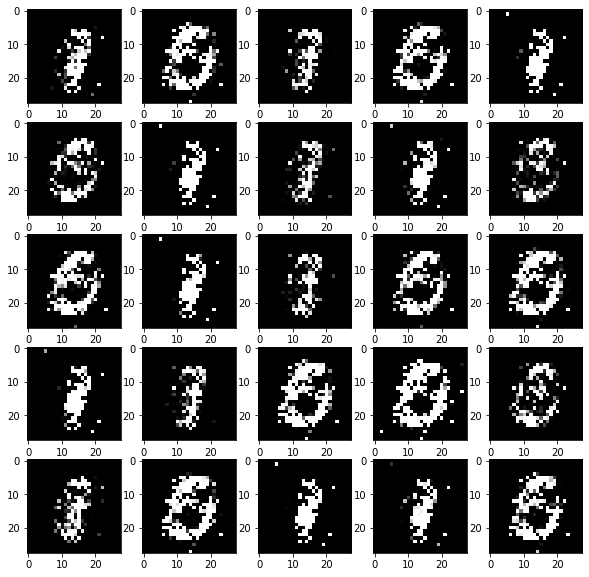

epochs 36


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 9ms/step


  0%|          | 1/273 [00:00<01:45,  2.59it/s]

4/4 [==============================] - 0s 8ms/step


  1%|          | 2/273 [00:00<01:58,  2.28it/s]

4/4 [==============================] - 0s 14ms/step


  1%|          | 3/273 [00:01<01:57,  2.30it/s]

4/4 [==============================] - 0s 8ms/step


  1%|▏         | 4/273 [00:01<01:57,  2.29it/s]

4/4 [==============================] - 0s 10ms/step


  2%|▏         | 5/273 [00:02<01:56,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


  2%|▏         | 6/273 [00:02<01:53,  2.36it/s]

4/4 [==============================] - 0s 8ms/step


  3%|▎         | 7/273 [00:02<01:52,  2.37it/s]

4/4 [==============================] - 0s 9ms/step


  3%|▎         | 8/273 [00:03<01:49,  2.41it/s]

4/4 [==============================] - 0s 9ms/step


  3%|▎         | 9/273 [00:03<01:54,  2.31it/s]

4/4 [==============================] - 0s 11ms/step


  4%|▎         | 10/273 [00:04<01:53,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


  4%|▍         | 11/273 [00:04<01:52,  2.34it/s]

4/4 [==============================] - 0s 9ms/step


  4%|▍         | 12/273 [00:05<01:54,  2.28it/s]

4/4 [==============================] - 0s 10ms/step


  5%|▍         | 13/273 [00:05<01:53,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


  5%|▌         | 14/273 [00:06<01:53,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


  5%|▌         | 15/273 [00:06<01:51,  2.31it/s]

4/4 [==============================] - 0s 8ms/step


  6%|▌         | 16/273 [00:06<01:54,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


  6%|▌         | 17/273 [00:07<01:50,  2.32it/s]

4/4 [==============================] - 0s 8ms/step


  7%|▋         | 18/273 [00:07<01:51,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


  7%|▋         | 19/273 [00:08<01:52,  2.25it/s]

4/4 [==============================] - 0s 10ms/step


  7%|▋         | 20/273 [00:08<01:51,  2.27it/s]

4/4 [==============================] - 0s 10ms/step


  8%|▊         | 21/273 [00:09<01:53,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 22/273 [00:09<01:50,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 23/273 [00:09<01:48,  2.30it/s]

4/4 [==============================] - 0s 18ms/step


  9%|▉         | 24/273 [00:10<01:46,  2.33it/s]

4/4 [==============================] - 0s 8ms/step


  9%|▉         | 25/273 [00:10<01:45,  2.36it/s]

4/4 [==============================] - 0s 9ms/step


 10%|▉         | 26/273 [00:11<01:46,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 10%|▉         | 27/273 [00:11<01:44,  2.36it/s]

4/4 [==============================] - 0s 10ms/step


 10%|█         | 28/273 [00:12<01:41,  2.41it/s]

4/4 [==============================] - 0s 8ms/step


 11%|█         | 29/273 [00:12<01:45,  2.32it/s]

4/4 [==============================] - 0s 8ms/step


 11%|█         | 30/273 [00:13<01:48,  2.24it/s]

4/4 [==============================] - 0s 12ms/step


 11%|█▏        | 31/273 [00:13<01:47,  2.24it/s]

4/4 [==============================] - 0s 11ms/step


 12%|█▏        | 32/273 [00:13<01:53,  2.13it/s]

4/4 [==============================] - 0s 12ms/step


 12%|█▏        | 33/273 [00:14<01:51,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 12%|█▏        | 34/273 [00:14<01:47,  2.22it/s]

4/4 [==============================] - 0s 11ms/step


 13%|█▎        | 35/273 [00:15<01:45,  2.25it/s]

4/4 [==============================] - 0s 10ms/step


 13%|█▎        | 36/273 [00:15<01:47,  2.21it/s]

4/4 [==============================] - 0s 14ms/step


 14%|█▎        | 37/273 [00:16<01:53,  2.07it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▍        | 38/273 [00:16<01:53,  2.07it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▍        | 39/273 [00:17<01:51,  2.10it/s]

4/4 [==============================] - 0s 10ms/step


 15%|█▍        | 40/273 [00:17<01:47,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 15%|█▌        | 41/273 [00:18<01:46,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 15%|█▌        | 42/273 [00:18<01:42,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▌        | 43/273 [00:19<01:43,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▌        | 44/273 [00:19<01:41,  2.26it/s]

4/4 [==============================] - 0s 11ms/step


 16%|█▋        | 45/273 [00:19<01:39,  2.29it/s]

4/4 [==============================] - 0s 11ms/step


 17%|█▋        | 46/273 [00:20<01:38,  2.31it/s]

4/4 [==============================] - 0s 10ms/step


 17%|█▋        | 47/273 [00:20<01:36,  2.33it/s]

4/4 [==============================] - 0s 8ms/step


 18%|█▊        | 48/273 [00:21<01:39,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 18%|█▊        | 49/273 [00:21<01:40,  2.22it/s]

4/4 [==============================] - 0s 10ms/step


 18%|█▊        | 50/273 [00:22<01:44,  2.13it/s]

4/4 [==============================] - 0s 15ms/step


 19%|█▊        | 51/273 [00:22<01:41,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 19%|█▉        | 52/273 [00:23<01:42,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 19%|█▉        | 53/273 [00:23<01:43,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 20%|█▉        | 54/273 [00:23<01:39,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 20%|██        | 55/273 [00:24<01:41,  2.14it/s]

4/4 [==============================] - 0s 10ms/step


 21%|██        | 56/273 [00:25<01:47,  2.02it/s]

4/4 [==============================] - 0s 9ms/step


 21%|██        | 57/273 [00:25<01:40,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 21%|██        | 58/273 [00:25<01:40,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 22%|██▏       | 59/273 [00:26<01:39,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


 22%|██▏       | 60/273 [00:26<01:37,  2.19it/s]

4/4 [==============================] - 0s 12ms/step


 22%|██▏       | 61/273 [00:27<01:40,  2.12it/s]

4/4 [==============================] - 0s 10ms/step


 23%|██▎       | 62/273 [00:27<01:37,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


 23%|██▎       | 63/273 [00:28<01:36,  2.18it/s]

4/4 [==============================] - 0s 11ms/step


 23%|██▎       | 64/273 [00:28<01:34,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 24%|██▍       | 65/273 [00:29<01:31,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 24%|██▍       | 66/273 [00:29<01:30,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 25%|██▍       | 67/273 [00:29<01:32,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 25%|██▍       | 68/273 [00:30<01:32,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 25%|██▌       | 69/273 [00:30<01:33,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 26%|██▌       | 70/273 [00:31<01:36,  2.11it/s]

4/4 [==============================] - 0s 10ms/step


 26%|██▌       | 71/273 [00:31<01:36,  2.09it/s]

4/4 [==============================] - 0s 9ms/step


 26%|██▋       | 72/273 [00:32<01:41,  1.97it/s]

4/4 [==============================] - 0s 9ms/step


 27%|██▋       | 73/273 [00:32<01:38,  2.02it/s]

4/4 [==============================] - 0s 9ms/step


 27%|██▋       | 74/273 [00:33<01:34,  2.10it/s]

4/4 [==============================] - 0s 10ms/step


 27%|██▋       | 75/273 [00:33<01:31,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 28%|██▊       | 76/273 [00:34<01:28,  2.21it/s]

4/4 [==============================] - 0s 10ms/step


 28%|██▊       | 77/273 [00:34<01:30,  2.16it/s]

4/4 [==============================] - 0s 10ms/step


 29%|██▊       | 78/273 [00:35<01:27,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▉       | 79/273 [00:35<01:27,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▉       | 80/273 [00:35<01:25,  2.25it/s]

4/4 [==============================] - 0s 11ms/step


 30%|██▉       | 81/273 [00:36<01:29,  2.15it/s]

4/4 [==============================] - 0s 10ms/step


 30%|███       | 82/273 [00:36<01:29,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 30%|███       | 83/273 [00:37<01:28,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 31%|███       | 84/273 [00:37<01:28,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 31%|███       | 85/273 [00:38<01:25,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 32%|███▏      | 86/273 [00:38<01:26,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


 32%|███▏      | 87/273 [00:39<01:26,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


 32%|███▏      | 88/273 [00:39<01:21,  2.28it/s]

4/4 [==============================] - 0s 10ms/step


 33%|███▎      | 89/273 [00:40<01:20,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 33%|███▎      | 90/273 [00:40<01:17,  2.37it/s]

4/4 [==============================] - 0s 9ms/step


 33%|███▎      | 91/273 [00:40<01:20,  2.27it/s]

4/4 [==============================] - 0s 12ms/step


 34%|███▎      | 92/273 [00:41<01:18,  2.31it/s]

4/4 [==============================] - 0s 8ms/step


 34%|███▍      | 93/273 [00:41<01:21,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 34%|███▍      | 94/273 [00:42<01:18,  2.29it/s]

4/4 [==============================] - 0s 11ms/step


 35%|███▍      | 95/273 [00:42<01:21,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 35%|███▌      | 96/273 [00:43<01:19,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▌      | 97/273 [00:43<01:15,  2.34it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▌      | 98/273 [00:44<01:14,  2.36it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▋      | 99/273 [00:44<01:13,  2.38it/s]

4/4 [==============================] - 0s 8ms/step


 37%|███▋      | 100/273 [00:44<01:10,  2.44it/s]

4/4 [==============================] - 0s 8ms/step


 37%|███▋      | 101/273 [00:45<01:10,  2.43it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 102/273 [00:45<01:09,  2.45it/s]

4/4 [==============================] - 0s 13ms/step


 38%|███▊      | 103/273 [00:46<01:19,  2.13it/s]

4/4 [==============================] - 0s 10ms/step


 38%|███▊      | 104/273 [00:46<01:19,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 38%|███▊      | 105/273 [00:47<01:19,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 39%|███▉      | 106/273 [00:47<01:16,  2.19it/s]

4/4 [==============================] - 0s 10ms/step


 39%|███▉      | 107/273 [00:48<01:17,  2.13it/s]

4/4 [==============================] - 0s 8ms/step


 40%|███▉      | 108/273 [00:48<01:14,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 40%|███▉      | 109/273 [00:48<01:11,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 40%|████      | 110/273 [00:49<01:14,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 41%|████      | 111/273 [00:49<01:14,  2.17it/s]

4/4 [==============================] - 0s 10ms/step


 41%|████      | 112/273 [00:50<01:13,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 41%|████▏     | 113/273 [00:50<01:11,  2.24it/s]

4/4 [==============================] - 0s 14ms/step


 42%|████▏     | 114/273 [00:51<01:12,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 42%|████▏     | 115/273 [00:51<01:13,  2.14it/s]

4/4 [==============================] - 0s 12ms/step


 42%|████▏     | 116/273 [00:52<01:11,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 43%|████▎     | 117/273 [00:52<01:11,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 43%|████▎     | 118/273 [00:53<01:09,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 44%|████▎     | 119/273 [00:53<01:07,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 44%|████▍     | 120/273 [00:53<01:06,  2.31it/s]

4/4 [==============================] - 0s 10ms/step


 44%|████▍     | 121/273 [00:54<01:05,  2.32it/s]

4/4 [==============================] - 0s 11ms/step


 45%|████▍     | 122/273 [00:54<01:08,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 45%|████▌     | 123/273 [00:55<01:06,  2.26it/s]

4/4 [==============================] - 0s 10ms/step


 45%|████▌     | 124/273 [00:55<01:03,  2.34it/s]

4/4 [==============================] - 0s 12ms/step


 46%|████▌     | 125/273 [00:56<01:03,  2.35it/s]

4/4 [==============================] - 0s 9ms/step


 46%|████▌     | 126/273 [00:56<01:03,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 127/273 [00:56<01:04,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 128/273 [00:57<01:08,  2.11it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 129/273 [00:57<01:07,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


 48%|████▊     | 130/273 [00:58<01:05,  2.19it/s]

4/4 [==============================] - 0s 10ms/step


 48%|████▊     | 131/273 [00:58<01:06,  2.15it/s]

4/4 [==============================] - 0s 12ms/step


 48%|████▊     | 132/273 [00:59<01:08,  2.07it/s]

4/4 [==============================] - 0s 9ms/step


 49%|████▊     | 133/273 [00:59<01:04,  2.17it/s]

4/4 [==============================] - 0s 10ms/step


 49%|████▉     | 134/273 [01:00<01:05,  2.11it/s]

4/4 [==============================] - 0s 8ms/step


 49%|████▉     | 135/273 [01:00<01:05,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 50%|████▉     | 136/273 [01:01<01:01,  2.23it/s]

4/4 [==============================] - 0s 10ms/step


 50%|█████     | 137/273 [01:01<01:00,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 51%|█████     | 138/273 [01:02<01:01,  2.19it/s]

4/4 [==============================] - 0s 12ms/step


 51%|█████     | 139/273 [01:02<00:59,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 51%|█████▏    | 140/273 [01:02<00:58,  2.28it/s]

4/4 [==============================] - 0s 10ms/step


 52%|█████▏    | 141/273 [01:03<00:59,  2.23it/s]

4/4 [==============================] - 0s 13ms/step


 52%|█████▏    | 142/273 [01:03<01:01,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 143/273 [01:04<00:59,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 53%|█████▎    | 144/273 [01:04<00:59,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


 53%|█████▎    | 145/273 [01:05<00:58,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 146/273 [01:05<00:59,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 54%|█████▍    | 147/273 [01:06<00:59,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 54%|█████▍    | 148/273 [01:06<00:57,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▍    | 149/273 [01:07<00:56,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 55%|█████▍    | 150/273 [01:07<00:56,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▌    | 151/273 [01:08<00:56,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 56%|█████▌    | 152/273 [01:08<00:55,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


 56%|█████▌    | 153/273 [01:08<00:54,  2.22it/s]

4/4 [==============================] - 0s 10ms/step


 56%|█████▋    | 154/273 [01:09<00:53,  2.23it/s]

4/4 [==============================] - 0s 11ms/step


 57%|█████▋    | 155/273 [01:09<00:52,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 57%|█████▋    | 156/273 [01:10<00:51,  2.26it/s]

4/4 [==============================] - 0s 10ms/step


 58%|█████▊    | 157/273 [01:10<00:50,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 58%|█████▊    | 158/273 [01:11<00:50,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 58%|█████▊    | 159/273 [01:11<00:49,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▊    | 160/273 [01:11<00:48,  2.35it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▉    | 161/273 [01:12<00:48,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▉    | 162/273 [01:12<00:48,  2.29it/s]

4/4 [==============================] - 0s 14ms/step


 60%|█████▉    | 163/273 [01:13<00:47,  2.29it/s]

4/4 [==============================] - 0s 11ms/step


 60%|██████    | 164/273 [01:13<00:48,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 60%|██████    | 165/273 [01:14<00:48,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 61%|██████    | 166/273 [01:14<00:49,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 61%|██████    | 167/273 [01:15<00:49,  2.16it/s]

4/4 [==============================] - 0s 11ms/step


 62%|██████▏   | 168/273 [01:15<00:46,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 62%|██████▏   | 169/273 [01:15<00:45,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 62%|██████▏   | 170/273 [01:16<00:47,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 63%|██████▎   | 171/273 [01:16<00:46,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


 63%|██████▎   | 172/273 [01:17<00:45,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 63%|██████▎   | 173/273 [01:17<00:45,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 64%|██████▎   | 174/273 [01:18<00:44,  2.24it/s]

4/4 [==============================] - 0s 10ms/step


 64%|██████▍   | 175/273 [01:18<00:45,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


 64%|██████▍   | 176/273 [01:19<00:43,  2.24it/s]

4/4 [==============================] - 0s 11ms/step


 65%|██████▍   | 177/273 [01:19<00:42,  2.27it/s]

4/4 [==============================] - 0s 10ms/step


 65%|██████▌   | 178/273 [01:20<00:43,  2.21it/s]

4/4 [==============================] - 0s 12ms/step


 66%|██████▌   | 179/273 [01:20<00:42,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 66%|██████▌   | 180/273 [01:21<00:42,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▋   | 181/273 [01:21<00:41,  2.24it/s]

4/4 [==============================] - 0s 10ms/step


 67%|██████▋   | 182/273 [01:22<00:45,  2.00it/s]

4/4 [==============================] - 0s 11ms/step


 67%|██████▋   | 183/273 [01:22<00:42,  2.12it/s]

4/4 [==============================] - 0s 8ms/step


 67%|██████▋   | 184/273 [01:22<00:40,  2.19it/s]

4/4 [==============================] - 0s 14ms/step


 68%|██████▊   | 185/273 [01:23<00:41,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 68%|██████▊   | 186/273 [01:23<00:39,  2.21it/s]

4/4 [==============================] - 0s 10ms/step


 68%|██████▊   | 187/273 [01:24<00:39,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 69%|██████▉   | 188/273 [01:24<00:36,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 69%|██████▉   | 189/273 [01:25<00:37,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 70%|██████▉   | 190/273 [01:25<00:35,  2.34it/s]

4/4 [==============================] - 0s 9ms/step


 70%|██████▉   | 191/273 [01:25<00:35,  2.30it/s]

4/4 [==============================] - 0s 11ms/step


 70%|███████   | 192/273 [01:26<00:34,  2.34it/s]

4/4 [==============================] - 0s 10ms/step


 71%|███████   | 193/273 [01:26<00:35,  2.26it/s]

4/4 [==============================] - 0s 11ms/step


 71%|███████   | 194/273 [01:27<00:33,  2.36it/s]

4/4 [==============================] - 0s 10ms/step


 71%|███████▏  | 195/273 [01:27<00:32,  2.40it/s]

4/4 [==============================] - 0s 9ms/step


 72%|███████▏  | 196/273 [01:28<00:33,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 72%|███████▏  | 197/273 [01:28<00:32,  2.34it/s]

4/4 [==============================] - 0s 9ms/step


 73%|███████▎  | 198/273 [01:29<00:33,  2.23it/s]

4/4 [==============================] - 0s 10ms/step


 73%|███████▎  | 199/273 [01:29<00:34,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 73%|███████▎  | 200/273 [01:29<00:32,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▎  | 201/273 [01:30<00:31,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▍  | 202/273 [01:30<00:30,  2.36it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▍  | 203/273 [01:31<00:31,  2.25it/s]

4/4 [==============================] - 0s 10ms/step


 75%|███████▍  | 204/273 [01:31<00:31,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 75%|███████▌  | 205/273 [01:32<00:31,  2.18it/s]

4/4 [==============================] - 0s 11ms/step


 75%|███████▌  | 206/273 [01:32<00:31,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


 76%|███████▌  | 207/273 [01:33<00:30,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 76%|███████▌  | 208/273 [01:33<00:28,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 77%|███████▋  | 209/273 [01:34<00:29,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 77%|███████▋  | 210/273 [01:34<00:28,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 77%|███████▋  | 211/273 [01:34<00:28,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 212/273 [01:35<00:27,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 213/273 [01:35<00:27,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 214/273 [01:36<00:27,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


 79%|███████▉  | 215/273 [01:36<00:27,  2.12it/s]

4/4 [==============================] - 0s 10ms/step


 79%|███████▉  | 216/273 [01:37<00:27,  2.06it/s]

4/4 [==============================] - 0s 12ms/step


 79%|███████▉  | 217/273 [01:37<00:27,  2.05it/s]

4/4 [==============================] - 0s 12ms/step


 80%|███████▉  | 218/273 [01:38<00:27,  1.97it/s]

4/4 [==============================] - 0s 12ms/step


 80%|████████  | 219/273 [01:38<00:26,  2.04it/s]

4/4 [==============================] - 0s 13ms/step


 81%|████████  | 220/273 [01:39<00:25,  2.07it/s]

4/4 [==============================] - 0s 10ms/step


 81%|████████  | 221/273 [01:39<00:25,  2.00it/s]

4/4 [==============================] - 0s 17ms/step


 81%|████████▏ | 222/273 [01:40<00:25,  2.00it/s]

4/4 [==============================] - 0s 13ms/step


 82%|████████▏ | 223/273 [01:40<00:25,  1.98it/s]

4/4 [==============================] - 0s 11ms/step


 82%|████████▏ | 224/273 [01:41<00:24,  1.99it/s]

4/4 [==============================] - 0s 13ms/step


 82%|████████▏ | 225/273 [01:41<00:24,  1.96it/s]

4/4 [==============================] - 0s 13ms/step


 83%|████████▎ | 226/273 [01:42<00:23,  1.96it/s]

4/4 [==============================] - 0s 9ms/step


 83%|████████▎ | 227/273 [01:42<00:22,  2.05it/s]

4/4 [==============================] - 0s 8ms/step


 84%|████████▎ | 228/273 [01:43<00:21,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▍ | 229/273 [01:43<00:19,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▍ | 230/273 [01:44<00:19,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 85%|████████▍ | 231/273 [01:44<00:18,  2.33it/s]

4/4 [==============================] - 0s 8ms/step


 85%|████████▍ | 232/273 [01:44<00:18,  2.23it/s]

4/4 [==============================] - 0s 10ms/step


 85%|████████▌ | 233/273 [01:45<00:17,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▌ | 234/273 [01:45<00:17,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 86%|████████▌ | 235/273 [01:46<00:17,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▋ | 236/273 [01:46<00:16,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 87%|████████▋ | 237/273 [01:47<00:16,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 87%|████████▋ | 238/273 [01:47<00:15,  2.27it/s]

4/4 [==============================] - 0s 11ms/step


 88%|████████▊ | 239/273 [01:48<00:15,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 88%|████████▊ | 240/273 [01:48<00:14,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 88%|████████▊ | 241/273 [01:48<00:14,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 89%|████████▊ | 242/273 [01:49<00:13,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▉ | 243/273 [01:49<00:13,  2.24it/s]

4/4 [==============================] - 0s 15ms/step


 89%|████████▉ | 244/273 [01:50<00:13,  2.12it/s]

4/4 [==============================] - 0s 8ms/step


 90%|████████▉ | 245/273 [01:50<00:12,  2.16it/s]

4/4 [==============================] - 0s 12ms/step


 90%|█████████ | 246/273 [01:51<00:12,  2.09it/s]

4/4 [==============================] - 0s 9ms/step


 90%|█████████ | 247/273 [01:51<00:11,  2.19it/s]

4/4 [==============================] - 0s 12ms/step


 91%|█████████ | 248/273 [01:52<00:11,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 91%|█████████ | 249/273 [01:52<00:10,  2.26it/s]

4/4 [==============================] - 0s 13ms/step


 92%|█████████▏| 250/273 [01:53<00:10,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


 92%|█████████▏| 251/273 [01:53<00:09,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


 92%|█████████▏| 252/273 [01:53<00:09,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 93%|█████████▎| 253/273 [01:54<00:08,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 93%|█████████▎| 254/273 [01:54<00:08,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 93%|█████████▎| 255/273 [01:55<00:07,  2.35it/s]

4/4 [==============================] - 0s 9ms/step


 94%|█████████▍| 256/273 [01:55<00:07,  2.37it/s]

4/4 [==============================] - 0s 10ms/step


 94%|█████████▍| 257/273 [01:56<00:06,  2.31it/s]

4/4 [==============================] - 0s 12ms/step


 95%|█████████▍| 258/273 [01:56<00:06,  2.30it/s]

4/4 [==============================] - 0s 8ms/step


 95%|█████████▍| 259/273 [01:56<00:06,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 95%|█████████▌| 260/273 [01:57<00:05,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 96%|█████████▌| 261/273 [01:57<00:05,  2.28it/s]

4/4 [==============================] - 0s 10ms/step


 96%|█████████▌| 262/273 [01:58<00:04,  2.26it/s]

4/4 [==============================] - 0s 11ms/step


 96%|█████████▋| 263/273 [01:58<00:04,  2.20it/s]

4/4 [==============================] - 0s 14ms/step


 97%|█████████▋| 264/273 [01:59<00:04,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 265/273 [01:59<00:03,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 266/273 [02:00<00:03,  2.08it/s]

4/4 [==============================] - 0s 14ms/step


 98%|█████████▊| 267/273 [02:00<00:03,  1.89it/s]

4/4 [==============================] - 0s 12ms/step


 98%|█████████▊| 268/273 [02:01<00:02,  1.86it/s]

4/4 [==============================] - 0s 14ms/step


 99%|█████████▊| 269/273 [02:01<00:02,  1.92it/s]

4/4 [==============================] - 0s 13ms/step


 99%|█████████▉| 270/273 [02:02<00:01,  1.91it/s]

4/4 [==============================] - 0s 12ms/step


 99%|█████████▉| 271/273 [02:03<00:01,  1.83it/s]

4/4 [==============================] - 0s 9ms/step


100%|█████████▉| 272/273 [02:03<00:00,  1.85it/s]

4/4 [==============================] - 0s 15ms/step


100%|██████████| 273/273 [02:04<00:00,  2.20it/s]


loss is 1.3542651686293539e-05 |*| 27.518047332763672
1/1 [==============================] - 0s 30ms/step


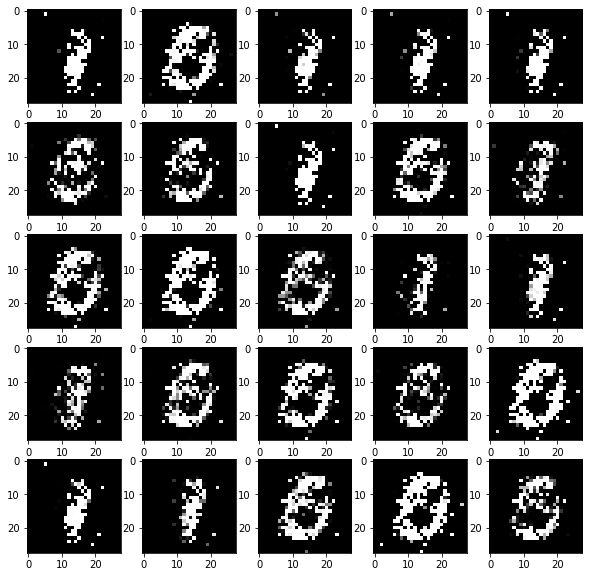

epochs 37


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 8ms/step


  0%|          | 1/273 [00:00<01:56,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


  1%|          | 2/273 [00:00<02:03,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


  1%|          | 3/273 [00:01<01:58,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


  1%|▏         | 4/273 [00:01<01:54,  2.35it/s]

4/4 [==============================] - 0s 9ms/step


  2%|▏         | 5/273 [00:02<01:57,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


  2%|▏         | 6/273 [00:02<01:56,  2.30it/s]

4/4 [==============================] - 0s 10ms/step


  3%|▎         | 7/273 [00:03<02:01,  2.19it/s]

4/4 [==============================] - 0s 19ms/step


  3%|▎         | 8/273 [00:03<02:04,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


  3%|▎         | 9/273 [00:04<01:57,  2.24it/s]

4/4 [==============================] - 0s 14ms/step


  4%|▎         | 10/273 [00:04<01:57,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


  4%|▍         | 11/273 [00:04<01:54,  2.28it/s]

4/4 [==============================] - 0s 10ms/step


  4%|▍         | 12/273 [00:05<01:54,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


  5%|▍         | 13/273 [00:05<01:55,  2.26it/s]

4/4 [==============================] - 0s 16ms/step


  5%|▌         | 14/273 [00:06<01:53,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


  5%|▌         | 15/273 [00:06<01:49,  2.35it/s]

4/4 [==============================] - 0s 9ms/step


  6%|▌         | 16/273 [00:06<01:47,  2.39it/s]

4/4 [==============================] - 0s 9ms/step


  6%|▌         | 17/273 [00:07<01:49,  2.34it/s]

4/4 [==============================] - 0s 8ms/step


  7%|▋         | 18/273 [00:07<01:49,  2.33it/s]

4/4 [==============================] - 0s 8ms/step


  7%|▋         | 19/273 [00:08<01:52,  2.27it/s]

4/4 [==============================] - 0s 11ms/step


  7%|▋         | 20/273 [00:08<01:53,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 21/273 [00:09<01:55,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 22/273 [00:09<01:53,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 23/273 [00:10<01:53,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


  9%|▉         | 24/273 [00:10<01:52,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


  9%|▉         | 25/273 [00:11<01:53,  2.19it/s]

4/4 [==============================] - 0s 11ms/step


 10%|▉         | 26/273 [00:11<01:51,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 10%|▉         | 27/273 [00:11<01:51,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 10%|█         | 28/273 [00:12<01:49,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 11%|█         | 29/273 [00:12<01:45,  2.31it/s]

4/4 [==============================] - 0s 11ms/step


 11%|█         | 30/273 [00:13<01:48,  2.25it/s]

4/4 [==============================] - 0s 15ms/step


 11%|█▏        | 31/273 [00:13<01:50,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 12%|█▏        | 32/273 [00:14<01:51,  2.15it/s]

4/4 [==============================] - 0s 11ms/step


 12%|█▏        | 33/273 [00:14<01:51,  2.15it/s]

4/4 [==============================] - 0s 13ms/step


 12%|█▏        | 34/273 [00:15<01:50,  2.15it/s]

4/4 [==============================] - 0s 11ms/step


 13%|█▎        | 35/273 [00:15<01:50,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 13%|█▎        | 36/273 [00:16<01:46,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▎        | 37/273 [00:16<01:43,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 14%|█▍        | 38/273 [00:16<01:43,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▍        | 39/273 [00:17<01:45,  2.22it/s]

4/4 [==============================] - 0s 13ms/step


 15%|█▍        | 40/273 [00:17<01:46,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 15%|█▌        | 41/273 [00:18<01:45,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 15%|█▌        | 42/273 [00:18<01:41,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▌        | 43/273 [00:19<01:43,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 16%|█▌        | 44/273 [00:19<01:44,  2.20it/s]

4/4 [==============================] - 0s 14ms/step


 16%|█▋        | 45/273 [00:20<01:42,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 17%|█▋        | 46/273 [00:20<01:39,  2.29it/s]

4/4 [==============================] - 0s 10ms/step


 17%|█▋        | 47/273 [00:21<01:50,  2.04it/s]

4/4 [==============================] - 0s 9ms/step


 18%|█▊        | 48/273 [00:21<01:48,  2.07it/s]

4/4 [==============================] - 0s 9ms/step


 18%|█▊        | 49/273 [00:22<01:47,  2.09it/s]

4/4 [==============================] - 0s 8ms/step


 18%|█▊        | 50/273 [00:22<01:44,  2.13it/s]

4/4 [==============================] - 0s 8ms/step


 19%|█▊        | 51/273 [00:22<01:43,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 19%|█▉        | 52/273 [00:23<01:38,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 19%|█▉        | 53/273 [00:23<01:40,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 20%|█▉        | 54/273 [00:24<01:41,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 20%|██        | 55/273 [00:24<01:36,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 21%|██        | 56/273 [00:25<01:34,  2.30it/s]

4/4 [==============================] - 0s 10ms/step


 21%|██        | 57/273 [00:25<01:35,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 21%|██        | 58/273 [00:26<01:35,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 22%|██▏       | 59/273 [00:26<01:34,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 22%|██▏       | 60/273 [00:26<01:37,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 22%|██▏       | 61/273 [00:27<01:37,  2.18it/s]

4/4 [==============================] - 0s 18ms/step


 23%|██▎       | 62/273 [00:27<01:38,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


 23%|██▎       | 63/273 [00:28<01:37,  2.15it/s]

4/4 [==============================] - 0s 10ms/step


 23%|██▎       | 64/273 [00:28<01:36,  2.16it/s]

4/4 [==============================] - 0s 10ms/step


 24%|██▍       | 65/273 [00:29<01:33,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 24%|██▍       | 66/273 [00:29<01:31,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


 25%|██▍       | 67/273 [00:30<01:32,  2.22it/s]

4/4 [==============================] - 0s 10ms/step


 25%|██▍       | 68/273 [00:30<01:30,  2.27it/s]

4/4 [==============================] - 0s 13ms/step


 25%|██▌       | 69/273 [00:31<01:29,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 26%|██▌       | 70/273 [00:31<01:29,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 26%|██▌       | 71/273 [00:31<01:32,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 26%|██▋       | 72/273 [00:32<01:32,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 27%|██▋       | 73/273 [00:32<01:28,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 27%|██▋       | 74/273 [00:33<01:27,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 27%|██▋       | 75/273 [00:33<01:24,  2.34it/s]

4/4 [==============================] - 0s 10ms/step


 28%|██▊       | 76/273 [00:34<01:24,  2.34it/s]

4/4 [==============================] - 0s 9ms/step


 28%|██▊       | 77/273 [00:34<01:23,  2.35it/s]

4/4 [==============================] - 0s 13ms/step


 29%|██▊       | 78/273 [00:35<01:28,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 29%|██▉       | 79/273 [00:35<01:25,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 29%|██▉       | 80/273 [00:35<01:23,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 30%|██▉       | 81/273 [00:36<01:30,  2.11it/s]

4/4 [==============================] - 0s 10ms/step


 30%|███       | 82/273 [00:36<01:27,  2.19it/s]

4/4 [==============================] - 0s 13ms/step


 30%|███       | 83/273 [00:37<01:28,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 31%|███       | 84/273 [00:37<01:30,  2.09it/s]

4/4 [==============================] - 0s 9ms/step


 31%|███       | 85/273 [00:38<01:28,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 32%|███▏      | 86/273 [00:38<01:26,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 32%|███▏      | 87/273 [00:39<01:23,  2.24it/s]

4/4 [==============================] - 0s 12ms/step


 32%|███▏      | 88/273 [00:39<01:25,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 33%|███▎      | 89/273 [00:40<01:24,  2.18it/s]

4/4 [==============================] - 0s 20ms/step


 33%|███▎      | 90/273 [00:40<01:23,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 33%|███▎      | 91/273 [00:40<01:23,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▎      | 92/273 [00:41<01:21,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▍      | 93/273 [00:41<01:23,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


 34%|███▍      | 94/273 [00:42<01:21,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 35%|███▍      | 95/273 [00:42<01:18,  2.27it/s]

4/4 [==============================] - 0s 15ms/step


 35%|███▌      | 96/273 [00:43<01:18,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▌      | 97/273 [00:43<01:17,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 36%|███▌      | 98/273 [00:44<01:15,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▋      | 99/273 [00:44<01:16,  2.28it/s]

4/4 [==============================] - 0s 13ms/step


 37%|███▋      | 100/273 [00:45<01:19,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 101/273 [00:45<01:20,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 102/273 [00:45<01:18,  2.19it/s]

4/4 [==============================] - 0s 10ms/step


 38%|███▊      | 103/273 [00:46<01:16,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 38%|███▊      | 104/273 [00:46<01:16,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 38%|███▊      | 105/273 [00:47<01:16,  2.19it/s]

4/4 [==============================] - 0s 13ms/step


 39%|███▉      | 106/273 [00:47<01:16,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 39%|███▉      | 107/273 [00:48<01:14,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 40%|███▉      | 108/273 [00:48<01:13,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


 40%|███▉      | 109/273 [00:49<01:11,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 40%|████      | 110/273 [00:49<01:10,  2.30it/s]

4/4 [==============================] - 0s 8ms/step


 41%|████      | 111/273 [00:49<01:09,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


 41%|████      | 112/273 [00:50<01:07,  2.40it/s]

4/4 [==============================] - 0s 9ms/step


 41%|████▏     | 113/273 [00:50<01:06,  2.42it/s]

4/4 [==============================] - 0s 9ms/step


 42%|████▏     | 114/273 [00:51<01:08,  2.31it/s]

4/4 [==============================] - 0s 11ms/step


 42%|████▏     | 115/273 [00:51<01:08,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 42%|████▏     | 116/273 [00:52<01:07,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 43%|████▎     | 117/273 [00:52<01:07,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


 43%|████▎     | 118/273 [00:52<01:08,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 44%|████▎     | 119/273 [00:53<01:08,  2.23it/s]

4/4 [==============================] - 0s 11ms/step


 44%|████▍     | 120/273 [00:53<01:06,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 44%|████▍     | 121/273 [00:54<01:06,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 45%|████▍     | 122/273 [00:54<01:05,  2.32it/s]

4/4 [==============================] - 0s 10ms/step


 45%|████▌     | 123/273 [00:55<01:07,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 45%|████▌     | 124/273 [00:55<01:05,  2.28it/s]

4/4 [==============================] - 0s 10ms/step


 46%|████▌     | 125/273 [00:56<01:06,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 46%|████▌     | 126/273 [00:56<01:04,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 127/273 [00:56<01:02,  2.33it/s]

4/4 [==============================] - 0s 8ms/step


 47%|████▋     | 128/273 [00:57<01:04,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 129/273 [00:57<01:02,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 48%|████▊     | 130/273 [00:58<01:03,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 48%|████▊     | 131/273 [00:58<01:02,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 48%|████▊     | 132/273 [00:59<01:01,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 49%|████▊     | 133/273 [00:59<01:03,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 49%|████▉     | 134/273 [01:00<01:02,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 49%|████▉     | 135/273 [01:00<00:59,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


 50%|████▉     | 136/273 [01:00<01:00,  2.27it/s]

4/4 [==============================] - 0s 14ms/step


 50%|█████     | 137/273 [01:01<00:59,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 51%|█████     | 138/273 [01:01<00:58,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 51%|█████     | 139/273 [01:02<00:57,  2.33it/s]

4/4 [==============================] - 0s 10ms/step


 51%|█████▏    | 140/273 [01:02<00:58,  2.27it/s]

4/4 [==============================] - 0s 10ms/step


 52%|█████▏    | 141/273 [01:03<00:57,  2.29it/s]

4/4 [==============================] - 0s 12ms/step


 52%|█████▏    | 142/273 [01:03<00:58,  2.24it/s]

4/4 [==============================] - 0s 10ms/step


 52%|█████▏    | 143/273 [01:03<00:56,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 144/273 [01:04<00:56,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 145/273 [01:04<00:58,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 146/273 [01:05<00:58,  2.18it/s]

4/4 [==============================] - 0s 12ms/step


 54%|█████▍    | 147/273 [01:05<00:56,  2.24it/s]

4/4 [==============================] - 0s 10ms/step


 54%|█████▍    | 148/273 [01:06<00:57,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▍    | 149/273 [01:06<00:57,  2.14it/s]

4/4 [==============================] - 0s 13ms/step


 55%|█████▍    | 150/273 [01:07<00:57,  2.13it/s]

4/4 [==============================] - 0s 8ms/step


 55%|█████▌    | 151/273 [01:07<00:58,  2.09it/s]

4/4 [==============================] - 0s 10ms/step


 56%|█████▌    | 152/273 [01:08<00:57,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▌    | 153/273 [01:08<00:55,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▋    | 154/273 [01:09<00:53,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 57%|█████▋    | 155/273 [01:09<00:53,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 57%|█████▋    | 156/273 [01:09<00:51,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 58%|█████▊    | 157/273 [01:10<00:51,  2.25it/s]

4/4 [==============================] - 0s 10ms/step


 58%|█████▊    | 158/273 [01:10<00:49,  2.33it/s]

4/4 [==============================] - 0s 10ms/step


 58%|█████▊    | 159/273 [01:11<00:50,  2.26it/s]

4/4 [==============================] - 0s 10ms/step


 59%|█████▊    | 160/273 [01:11<00:50,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▉    | 161/273 [01:12<00:49,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▉    | 162/273 [01:12<00:49,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 60%|█████▉    | 163/273 [01:12<00:48,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 60%|██████    | 164/273 [01:13<00:48,  2.24it/s]

4/4 [==============================] - 0s 11ms/step


 60%|██████    | 165/273 [01:13<00:46,  2.31it/s]

4/4 [==============================] - 0s 8ms/step


 61%|██████    | 166/273 [01:14<00:47,  2.25it/s]

4/4 [==============================] - 0s 13ms/step


 61%|██████    | 167/273 [01:14<00:48,  2.16it/s]

4/4 [==============================] - 0s 10ms/step


 62%|██████▏   | 168/273 [01:15<00:47,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 62%|██████▏   | 169/273 [01:15<00:46,  2.24it/s]

4/4 [==============================] - 0s 10ms/step


 62%|██████▏   | 170/273 [01:16<00:45,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 63%|██████▎   | 171/273 [01:16<00:45,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 63%|██████▎   | 172/273 [01:16<00:43,  2.30it/s]

4/4 [==============================] - 0s 8ms/step


 63%|██████▎   | 173/273 [01:17<00:44,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 64%|██████▎   | 174/273 [01:17<00:45,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 64%|██████▍   | 175/273 [01:18<00:43,  2.25it/s]

4/4 [==============================] - 0s 12ms/step


 64%|██████▍   | 176/273 [01:18<00:43,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 65%|██████▍   | 177/273 [01:19<00:43,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 65%|██████▌   | 178/273 [01:19<00:41,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▌   | 179/273 [01:20<00:40,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▌   | 180/273 [01:20<00:40,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▋   | 181/273 [01:21<00:41,  2.20it/s]

4/4 [==============================] - 0s 10ms/step


 67%|██████▋   | 182/273 [01:21<00:40,  2.23it/s]

4/4 [==============================] - 0s 10ms/step


 67%|██████▋   | 183/273 [01:21<00:41,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 67%|██████▋   | 184/273 [01:22<00:39,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 68%|██████▊   | 185/273 [01:22<00:38,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 68%|██████▊   | 186/273 [01:23<00:39,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 68%|██████▊   | 187/273 [01:23<00:37,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 69%|██████▉   | 188/273 [01:24<00:36,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 69%|██████▉   | 189/273 [01:24<00:37,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


 70%|██████▉   | 190/273 [01:24<00:36,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 70%|██████▉   | 191/273 [01:25<00:35,  2.33it/s]

4/4 [==============================] - 0s 11ms/step


 70%|███████   | 192/273 [01:25<00:36,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████   | 193/273 [01:26<00:35,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████   | 194/273 [01:26<00:34,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 71%|███████▏  | 195/273 [01:27<00:33,  2.31it/s]

4/4 [==============================] - 0s 10ms/step


 72%|███████▏  | 196/273 [01:27<00:34,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 72%|███████▏  | 197/273 [01:28<00:32,  2.31it/s]

4/4 [==============================] - 0s 8ms/step


 73%|███████▎  | 198/273 [01:28<00:32,  2.34it/s]

4/4 [==============================] - 0s 9ms/step


 73%|███████▎  | 199/273 [01:28<00:32,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 73%|███████▎  | 200/273 [01:29<00:32,  2.24it/s]

4/4 [==============================] - 0s 13ms/step


 74%|███████▎  | 201/273 [01:29<00:32,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▍  | 202/273 [01:30<00:31,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▍  | 203/273 [01:30<00:30,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 75%|███████▍  | 204/273 [01:31<00:29,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 75%|███████▌  | 205/273 [01:31<00:31,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 75%|███████▌  | 206/273 [01:32<00:29,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 76%|███████▌  | 207/273 [01:32<00:29,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 76%|███████▌  | 208/273 [01:32<00:28,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 209/273 [01:33<00:27,  2.36it/s]

4/4 [==============================] - 0s 12ms/step


 77%|███████▋  | 210/273 [01:33<00:27,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 211/273 [01:34<00:28,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 78%|███████▊  | 212/273 [01:34<00:27,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 213/273 [01:35<00:26,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 214/273 [01:35<00:26,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 79%|███████▉  | 215/273 [01:36<00:25,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


 79%|███████▉  | 216/273 [01:36<00:25,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 79%|███████▉  | 217/273 [01:36<00:24,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 80%|███████▉  | 218/273 [01:37<00:24,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 80%|████████  | 219/273 [01:37<00:24,  2.25it/s]

4/4 [==============================] - 0s 12ms/step


 81%|████████  | 220/273 [01:38<00:23,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 81%|████████  | 221/273 [01:38<00:23,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 81%|████████▏ | 222/273 [01:39<00:23,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 223/273 [01:39<00:23,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 224/273 [01:40<00:22,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 225/273 [01:40<00:21,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 83%|████████▎ | 226/273 [01:40<00:21,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 83%|████████▎ | 227/273 [01:41<00:20,  2.27it/s]

4/4 [==============================] - 0s 12ms/step


 84%|████████▎ | 228/273 [01:41<00:20,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 84%|████████▍ | 229/273 [01:42<00:19,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▍ | 230/273 [01:42<00:18,  2.29it/s]

4/4 [==============================] - 0s 11ms/step


 85%|████████▍ | 231/273 [01:43<00:18,  2.26it/s]

4/4 [==============================] - 0s 13ms/step


 85%|████████▍ | 232/273 [01:43<00:18,  2.18it/s]

4/4 [==============================] - 0s 10ms/step


 85%|████████▌ | 233/273 [01:44<00:18,  2.22it/s]

4/4 [==============================] - 0s 10ms/step


 86%|████████▌ | 234/273 [01:44<00:18,  2.13it/s]

4/4 [==============================] - 0s 11ms/step


 86%|████████▌ | 235/273 [01:45<00:17,  2.19it/s]

4/4 [==============================] - 0s 11ms/step


 86%|████████▋ | 236/273 [01:45<00:17,  2.17it/s]

4/4 [==============================] - 0s 10ms/step


 87%|████████▋ | 237/273 [01:46<00:19,  1.86it/s]

4/4 [==============================] - 0s 9ms/step


 87%|████████▋ | 238/273 [01:46<00:18,  1.91it/s]

4/4 [==============================] - 0s 14ms/step


 88%|████████▊ | 239/273 [01:47<00:17,  1.92it/s]

4/4 [==============================] - 0s 9ms/step


 88%|████████▊ | 240/273 [01:47<00:18,  1.81it/s]

4/4 [==============================] - 0s 13ms/step


 88%|████████▊ | 241/273 [01:48<00:17,  1.84it/s]

4/4 [==============================] - 0s 11ms/step


 89%|████████▊ | 242/273 [01:48<00:16,  1.84it/s]

4/4 [==============================] - 0s 10ms/step


 89%|████████▉ | 243/273 [01:49<00:15,  1.94it/s]

4/4 [==============================] - 0s 10ms/step


 89%|████████▉ | 244/273 [01:49<00:14,  2.05it/s]

4/4 [==============================] - 0s 8ms/step


 90%|████████▉ | 245/273 [01:50<00:13,  2.12it/s]

4/4 [==============================] - 0s 10ms/step


 90%|█████████ | 246/273 [01:50<00:12,  2.19it/s]

4/4 [==============================] - 0s 13ms/step


 90%|█████████ | 247/273 [01:51<00:11,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 91%|█████████ | 248/273 [01:51<00:11,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 91%|█████████ | 249/273 [01:51<00:10,  2.26it/s]

4/4 [==============================] - 0s 12ms/step


 92%|█████████▏| 250/273 [01:52<00:10,  2.29it/s]

4/4 [==============================] - 0s 10ms/step


 92%|█████████▏| 251/273 [01:52<00:09,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


 92%|█████████▏| 252/273 [01:53<00:09,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 93%|█████████▎| 253/273 [01:53<00:08,  2.25it/s]

4/4 [==============================] - 0s 10ms/step


 93%|█████████▎| 254/273 [01:54<00:08,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 93%|█████████▎| 255/273 [01:54<00:07,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 94%|█████████▍| 256/273 [01:55<00:07,  2.22it/s]

4/4 [==============================] - 0s 10ms/step


 94%|█████████▍| 257/273 [01:55<00:07,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▍| 258/273 [01:55<00:06,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▍| 259/273 [01:56<00:06,  2.26it/s]

4/4 [==============================] - 0s 10ms/step


 95%|█████████▌| 260/273 [01:56<00:05,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 96%|█████████▌| 261/273 [01:57<00:05,  2.25it/s]

4/4 [==============================] - 0s 10ms/step


 96%|█████████▌| 262/273 [01:57<00:04,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 96%|█████████▋| 263/273 [01:58<00:04,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 97%|█████████▋| 264/273 [01:58<00:04,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 265/273 [01:59<00:03,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 266/273 [01:59<00:03,  2.27it/s]

4/4 [==============================] - 0s 12ms/step


 98%|█████████▊| 267/273 [01:59<00:02,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 98%|█████████▊| 268/273 [02:00<00:02,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 99%|█████████▊| 269/273 [02:00<00:01,  2.25it/s]

4/4 [==============================] - 0s 10ms/step


 99%|█████████▉| 270/273 [02:01<00:01,  2.13it/s]

4/4 [==============================] - 0s 8ms/step


 99%|█████████▉| 271/273 [02:01<00:00,  2.11it/s]

4/4 [==============================] - 0s 9ms/step


100%|█████████▉| 272/273 [02:02<00:00,  2.16it/s]

4/4 [==============================] - 0s 10ms/step


100%|██████████| 273/273 [02:02<00:00,  2.22it/s]


loss is 0.00014508524327538908 |*| 29.202434539794922
1/1 [==============================] - 0s 26ms/step


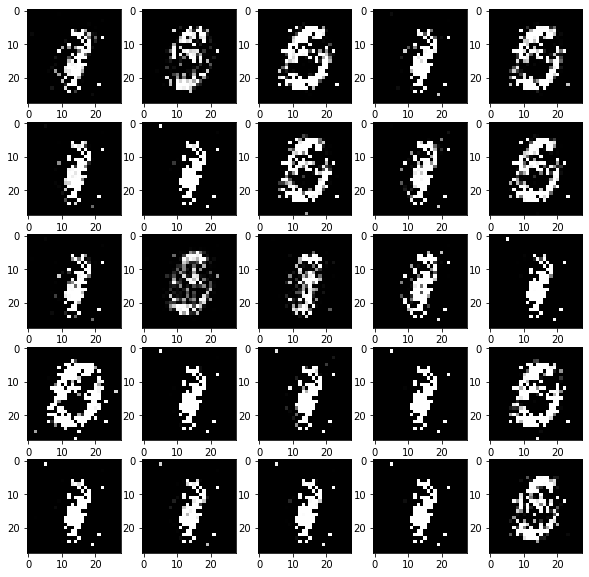

epochs 38


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 11ms/step


  0%|          | 1/273 [00:00<02:12,  2.05it/s]

4/4 [==============================] - 0s 15ms/step


  1%|          | 2/273 [00:00<02:15,  2.01it/s]

4/4 [==============================] - 0s 13ms/step


  1%|          | 3/273 [00:01<02:23,  1.88it/s]

4/4 [==============================] - 0s 11ms/step


  1%|▏         | 4/273 [00:02<02:24,  1.87it/s]

4/4 [==============================] - 0s 13ms/step


  2%|▏         | 5/273 [00:02<02:24,  1.85it/s]

4/4 [==============================] - 0s 12ms/step


  2%|▏         | 6/273 [00:03<02:27,  1.81it/s]

4/4 [==============================] - 0s 16ms/step


  3%|▎         | 7/273 [00:03<02:37,  1.69it/s]

4/4 [==============================] - 0s 9ms/step


  3%|▎         | 8/273 [00:04<02:20,  1.88it/s]

4/4 [==============================] - 0s 12ms/step


  3%|▎         | 9/273 [00:04<02:10,  2.02it/s]

4/4 [==============================] - 0s 8ms/step


  4%|▎         | 10/273 [00:05<02:07,  2.06it/s]

4/4 [==============================] - 0s 9ms/step


  4%|▍         | 11/273 [00:05<02:01,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


  4%|▍         | 12/273 [00:06<01:58,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


  5%|▍         | 13/273 [00:06<01:59,  2.18it/s]

4/4 [==============================] - 0s 10ms/step


  5%|▌         | 14/273 [00:06<01:58,  2.19it/s]

4/4 [==============================] - 0s 10ms/step


  5%|▌         | 15/273 [00:07<01:54,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


  6%|▌         | 16/273 [00:07<01:52,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


  6%|▌         | 17/273 [00:08<01:53,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


  7%|▋         | 18/273 [00:08<01:47,  2.36it/s]

4/4 [==============================] - 0s 9ms/step


  7%|▋         | 19/273 [00:09<01:47,  2.37it/s]

4/4 [==============================] - 0s 10ms/step


  7%|▋         | 20/273 [00:09<01:47,  2.36it/s]

4/4 [==============================] - 0s 13ms/step


  8%|▊         | 21/273 [00:09<01:52,  2.24it/s]

4/4 [==============================] - 0s 10ms/step


  8%|▊         | 22/273 [00:10<01:48,  2.30it/s]

4/4 [==============================] - 0s 8ms/step


  8%|▊         | 23/273 [00:10<01:47,  2.34it/s]

4/4 [==============================] - 0s 10ms/step


  9%|▉         | 24/273 [00:11<01:47,  2.31it/s]

4/4 [==============================] - 0s 8ms/step


  9%|▉         | 25/273 [00:11<01:48,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 10%|▉         | 26/273 [00:12<01:51,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 10%|▉         | 27/273 [00:12<01:51,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 10%|█         | 28/273 [00:13<01:50,  2.22it/s]

4/4 [==============================] - 0s 10ms/step


 11%|█         | 29/273 [00:13<01:46,  2.30it/s]

4/4 [==============================] - 0s 8ms/step


 11%|█         | 30/273 [00:13<01:46,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 11%|█▏        | 31/273 [00:14<01:48,  2.23it/s]

4/4 [==============================] - 0s 11ms/step


 12%|█▏        | 32/273 [00:14<01:49,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 12%|█▏        | 33/273 [00:15<01:49,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 12%|█▏        | 34/273 [00:15<01:46,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 13%|█▎        | 35/273 [00:16<01:48,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 13%|█▎        | 36/273 [00:16<01:46,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 14%|█▎        | 37/273 [00:17<01:45,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 14%|█▍        | 38/273 [00:17<01:45,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 14%|█▍        | 39/273 [00:18<01:45,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 15%|█▍        | 40/273 [00:18<01:41,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 15%|█▌        | 41/273 [00:18<01:45,  2.20it/s]

4/4 [==============================] - 0s 7ms/step


 15%|█▌        | 42/273 [00:19<01:44,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▌        | 43/273 [00:19<01:46,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▌        | 44/273 [00:20<01:42,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▋        | 45/273 [00:20<01:44,  2.19it/s]

4/4 [==============================] - 0s 10ms/step


 17%|█▋        | 46/273 [00:21<01:41,  2.24it/s]

4/4 [==============================] - 0s 11ms/step


 17%|█▋        | 47/273 [00:21<01:38,  2.28it/s]

4/4 [==============================] - 0s 11ms/step


 18%|█▊        | 48/273 [00:22<01:38,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 18%|█▊        | 49/273 [00:22<01:37,  2.30it/s]

4/4 [==============================] - 0s 7ms/step


 18%|█▊        | 50/273 [00:22<01:37,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 19%|█▊        | 51/273 [00:23<01:35,  2.33it/s]

4/4 [==============================] - 0s 10ms/step


 19%|█▉        | 52/273 [00:23<01:38,  2.24it/s]

4/4 [==============================] - 0s 11ms/step


 19%|█▉        | 53/273 [00:24<01:37,  2.26it/s]

4/4 [==============================] - 0s 12ms/step


 20%|█▉        | 54/273 [00:24<01:39,  2.20it/s]

4/4 [==============================] - 0s 11ms/step


 20%|██        | 55/273 [00:25<01:39,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 21%|██        | 56/273 [00:25<01:41,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


 21%|██        | 57/273 [00:26<01:42,  2.11it/s]

4/4 [==============================] - 0s 9ms/step


 21%|██        | 58/273 [00:26<01:42,  2.11it/s]

4/4 [==============================] - 0s 9ms/step


 22%|██▏       | 59/273 [00:27<01:41,  2.12it/s]

4/4 [==============================] - 0s 10ms/step


 22%|██▏       | 60/273 [00:27<01:37,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 22%|██▏       | 61/273 [00:27<01:34,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 23%|██▎       | 62/273 [00:28<01:35,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 23%|██▎       | 63/273 [00:28<01:34,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 23%|██▎       | 64/273 [00:29<01:33,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 24%|██▍       | 65/273 [00:29<01:31,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 24%|██▍       | 66/273 [00:30<01:34,  2.20it/s]

4/4 [==============================] - 0s 10ms/step


 25%|██▍       | 67/273 [00:30<01:33,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 25%|██▍       | 68/273 [00:31<01:32,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 25%|██▌       | 69/273 [00:31<01:31,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 26%|██▌       | 70/273 [00:31<01:29,  2.27it/s]

4/4 [==============================] - 0s 10ms/step


 26%|██▌       | 71/273 [00:32<01:28,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 26%|██▋       | 72/273 [00:32<01:29,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 27%|██▋       | 73/273 [00:33<01:29,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 27%|██▋       | 74/273 [00:33<01:28,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 27%|██▋       | 75/273 [00:34<01:31,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


 28%|██▊       | 76/273 [00:34<01:26,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 28%|██▊       | 77/273 [00:35<01:24,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▊       | 78/273 [00:35<01:25,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 29%|██▉       | 79/273 [00:35<01:22,  2.35it/s]

4/4 [==============================] - 0s 10ms/step


 29%|██▉       | 80/273 [00:36<01:23,  2.30it/s]

4/4 [==============================] - 0s 10ms/step


 30%|██▉       | 81/273 [00:36<01:26,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 30%|███       | 82/273 [00:37<01:26,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 30%|███       | 83/273 [00:37<01:29,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 31%|███       | 84/273 [00:38<01:26,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 31%|███       | 85/273 [00:38<01:27,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 32%|███▏      | 86/273 [00:39<01:24,  2.21it/s]

4/4 [==============================] - 0s 12ms/step


 32%|███▏      | 87/273 [00:39<01:22,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


 32%|███▏      | 88/273 [00:39<01:20,  2.30it/s]

4/4 [==============================] - 0s 10ms/step


 33%|███▎      | 89/273 [00:40<01:21,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 33%|███▎      | 90/273 [00:40<01:22,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 33%|███▎      | 91/273 [00:41<01:20,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▎      | 92/273 [00:41<01:19,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▍      | 93/273 [00:42<01:22,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▍      | 94/273 [00:42<01:23,  2.14it/s]

4/4 [==============================] - 0s 10ms/step


 35%|███▍      | 95/273 [00:43<01:24,  2.11it/s]

4/4 [==============================] - 0s 9ms/step


 35%|███▌      | 96/273 [00:43<01:20,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▌      | 97/273 [00:44<01:21,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▌      | 98/273 [00:44<01:19,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▋      | 99/273 [00:45<01:27,  1.98it/s]

4/4 [==============================] - 0s 8ms/step


 37%|███▋      | 100/273 [00:45<01:23,  2.07it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 101/273 [00:46<01:22,  2.08it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 102/273 [00:46<01:20,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 38%|███▊      | 103/273 [00:46<01:17,  2.20it/s]

4/4 [==============================] - 0s 15ms/step


 38%|███▊      | 104/273 [00:47<01:22,  2.04it/s]

4/4 [==============================] - 0s 9ms/step


 38%|███▊      | 105/273 [00:47<01:19,  2.11it/s]

4/4 [==============================] - 0s 10ms/step


 39%|███▉      | 106/273 [00:48<01:17,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 39%|███▉      | 107/273 [00:48<01:14,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 40%|███▉      | 108/273 [00:49<01:15,  2.20it/s]

4/4 [==============================] - 0s 10ms/step


 40%|███▉      | 109/273 [00:49<01:11,  2.31it/s]

4/4 [==============================] - 0s 8ms/step


 40%|████      | 110/273 [00:50<01:10,  2.32it/s]

4/4 [==============================] - 0s 8ms/step


 41%|████      | 111/273 [00:50<01:11,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 41%|████      | 112/273 [00:51<01:12,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 41%|████▏     | 113/273 [00:51<01:12,  2.21it/s]

4/4 [==============================] - 0s 10ms/step


 42%|████▏     | 114/273 [00:52<01:15,  2.11it/s]

4/4 [==============================] - 0s 11ms/step


 42%|████▏     | 115/273 [00:52<01:12,  2.17it/s]

4/4 [==============================] - 0s 10ms/step


 42%|████▏     | 116/273 [00:52<01:10,  2.22it/s]

4/4 [==============================] - 0s 10ms/step


 43%|████▎     | 117/273 [00:53<01:08,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 43%|████▎     | 118/273 [00:53<01:05,  2.35it/s]

4/4 [==============================] - 0s 9ms/step


 44%|████▎     | 119/273 [00:54<01:07,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 44%|████▍     | 120/273 [00:54<01:05,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


 44%|████▍     | 121/273 [00:55<01:08,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 45%|████▍     | 122/273 [00:55<01:07,  2.23it/s]

4/4 [==============================] - 0s 10ms/step


 45%|████▌     | 123/273 [00:55<01:06,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


 45%|████▌     | 124/273 [00:56<01:05,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 46%|████▌     | 125/273 [00:56<01:05,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 46%|████▌     | 126/273 [00:57<01:03,  2.32it/s]

4/4 [==============================] - 0s 12ms/step


 47%|████▋     | 127/273 [00:57<01:03,  2.31it/s]

4/4 [==============================] - 0s 8ms/step


 47%|████▋     | 128/273 [00:58<01:04,  2.26it/s]

4/4 [==============================] - 0s 12ms/step


 47%|████▋     | 129/273 [00:58<01:06,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 48%|████▊     | 130/273 [00:59<01:04,  2.21it/s]

4/4 [==============================] - 0s 13ms/step


 48%|████▊     | 131/273 [00:59<01:03,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 48%|████▊     | 132/273 [00:59<01:04,  2.20it/s]

4/4 [==============================] - 0s 13ms/step


 49%|████▊     | 133/273 [01:00<01:06,  2.12it/s]

4/4 [==============================] - 0s 11ms/step


 49%|████▉     | 134/273 [01:00<01:03,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 49%|████▉     | 135/273 [01:01<01:04,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 50%|████▉     | 136/273 [01:01<01:02,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 50%|█████     | 137/273 [01:02<01:01,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 51%|█████     | 138/273 [01:02<01:00,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 51%|█████     | 139/273 [01:03<01:00,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 51%|█████▏    | 140/273 [01:03<01:00,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 52%|█████▏    | 141/273 [01:04<00:57,  2.28it/s]

4/4 [==============================] - 0s 10ms/step


 52%|█████▏    | 142/273 [01:04<00:57,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 143/273 [01:04<00:55,  2.35it/s]

4/4 [==============================] - 0s 8ms/step


 53%|█████▎    | 144/273 [01:05<00:53,  2.43it/s]

4/4 [==============================] - 0s 8ms/step


 53%|█████▎    | 145/273 [01:05<00:52,  2.43it/s]

4/4 [==============================] - 0s 8ms/step


 53%|█████▎    | 146/273 [01:06<00:51,  2.47it/s]

4/4 [==============================] - 0s 9ms/step


 54%|█████▍    | 147/273 [01:06<00:51,  2.45it/s]

4/4 [==============================] - 0s 9ms/step


 54%|█████▍    | 148/273 [01:06<00:52,  2.37it/s]

4/4 [==============================] - 0s 14ms/step


 55%|█████▍    | 149/273 [01:07<00:53,  2.32it/s]

4/4 [==============================] - 0s 13ms/step


 55%|█████▍    | 150/273 [01:07<00:55,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 55%|█████▌    | 151/273 [01:08<00:53,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▌    | 152/273 [01:08<00:54,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▌    | 153/273 [01:09<00:54,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▋    | 154/273 [01:09<00:54,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 57%|█████▋    | 155/273 [01:10<00:53,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 57%|█████▋    | 156/273 [01:10<00:53,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 58%|█████▊    | 157/273 [01:11<00:52,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 58%|█████▊    | 158/273 [01:11<00:53,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 58%|█████▊    | 159/273 [01:12<00:53,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▊    | 160/273 [01:12<00:55,  2.04it/s]

4/4 [==============================] - 0s 8ms/step


 59%|█████▉    | 161/273 [01:12<00:53,  2.11it/s]

4/4 [==============================] - 0s 13ms/step


 59%|█████▉    | 162/273 [01:13<00:52,  2.13it/s]

4/4 [==============================] - 0s 8ms/step


 60%|█████▉    | 163/273 [01:13<00:51,  2.12it/s]

4/4 [==============================] - 0s 8ms/step


 60%|██████    | 164/273 [01:14<00:51,  2.13it/s]

4/4 [==============================] - 0s 8ms/step


 60%|██████    | 165/273 [01:14<00:54,  2.00it/s]

4/4 [==============================] - 0s 9ms/step


 61%|██████    | 166/273 [01:15<00:50,  2.10it/s]

4/4 [==============================] - 0s 10ms/step


 61%|██████    | 167/273 [01:15<00:48,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 62%|██████▏   | 168/273 [01:16<00:48,  2.15it/s]

4/4 [==============================] - 0s 14ms/step


 62%|██████▏   | 169/273 [01:16<00:47,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 62%|██████▏   | 170/273 [01:17<00:46,  2.23it/s]

4/4 [==============================] - 0s 12ms/step


 63%|██████▎   | 171/273 [01:17<00:47,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 63%|██████▎   | 172/273 [01:18<00:47,  2.13it/s]

4/4 [==============================] - 0s 8ms/step


 63%|██████▎   | 173/273 [01:18<00:47,  2.11it/s]

4/4 [==============================] - 0s 9ms/step


 64%|██████▎   | 174/273 [01:19<00:45,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


 64%|██████▍   | 175/273 [01:19<00:44,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 64%|██████▍   | 176/273 [01:19<00:42,  2.30it/s]

4/4 [==============================] - 0s 10ms/step


 65%|██████▍   | 177/273 [01:20<00:41,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 65%|██████▌   | 178/273 [01:20<00:40,  2.34it/s]

4/4 [==============================] - 0s 8ms/step


 66%|██████▌   | 179/273 [01:21<00:44,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▌   | 180/273 [01:21<00:44,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▋   | 181/273 [01:22<00:43,  2.11it/s]

4/4 [==============================] - 0s 8ms/step


 67%|██████▋   | 182/273 [01:22<00:41,  2.18it/s]

4/4 [==============================] - 0s 12ms/step


 67%|██████▋   | 183/273 [01:23<00:40,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 67%|██████▋   | 184/273 [01:23<00:39,  2.25it/s]

4/4 [==============================] - 0s 13ms/step


 68%|██████▊   | 185/273 [01:23<00:38,  2.31it/s]

4/4 [==============================] - 0s 10ms/step


 68%|██████▊   | 186/273 [01:24<00:38,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 68%|██████▊   | 187/273 [01:24<00:37,  2.31it/s]

4/4 [==============================] - 0s 8ms/step


 69%|██████▉   | 188/273 [01:25<00:35,  2.40it/s]

4/4 [==============================] - 0s 9ms/step


 69%|██████▉   | 189/273 [01:25<00:35,  2.34it/s]

4/4 [==============================] - 0s 8ms/step


 70%|██████▉   | 190/273 [01:26<00:35,  2.36it/s]

4/4 [==============================] - 0s 12ms/step


 70%|██████▉   | 191/273 [01:26<00:39,  2.09it/s]

4/4 [==============================] - 0s 8ms/step


 70%|███████   | 192/273 [01:27<00:38,  2.08it/s]

4/4 [==============================] - 0s 8ms/step


 71%|███████   | 193/273 [01:27<00:37,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████   | 194/273 [01:28<00:35,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████▏  | 195/273 [01:28<00:34,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 72%|███████▏  | 196/273 [01:28<00:33,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 72%|███████▏  | 197/273 [01:29<00:32,  2.31it/s]

4/4 [==============================] - 0s 8ms/step


 73%|███████▎  | 198/273 [01:29<00:32,  2.31it/s]

4/4 [==============================] - 0s 8ms/step


 73%|███████▎  | 199/273 [01:30<00:33,  2.22it/s]

4/4 [==============================] - 0s 11ms/step


 73%|███████▎  | 200/273 [01:30<00:32,  2.23it/s]

4/4 [==============================] - 0s 11ms/step


 74%|███████▎  | 201/273 [01:31<00:31,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▍  | 202/273 [01:31<00:31,  2.25it/s]

4/4 [==============================] - 0s 18ms/step


 74%|███████▍  | 203/273 [01:32<00:32,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 75%|███████▍  | 204/273 [01:32<00:32,  2.15it/s]

4/4 [==============================] - 0s 11ms/step


 75%|███████▌  | 205/273 [01:32<00:31,  2.15it/s]

4/4 [==============================] - 0s 10ms/step


 75%|███████▌  | 206/273 [01:33<00:30,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 76%|███████▌  | 207/273 [01:33<00:30,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 76%|███████▌  | 208/273 [01:34<00:29,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 77%|███████▋  | 209/273 [01:34<00:28,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 210/273 [01:35<00:27,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 211/273 [01:35<00:27,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 78%|███████▊  | 212/273 [01:36<00:26,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 213/273 [01:36<00:26,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 78%|███████▊  | 214/273 [01:36<00:25,  2.28it/s]

4/4 [==============================] - 0s 13ms/step


 79%|███████▉  | 215/273 [01:37<00:26,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 79%|███████▉  | 216/273 [01:37<00:24,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 79%|███████▉  | 217/273 [01:38<00:24,  2.30it/s]

4/4 [==============================] - 0s 8ms/step


 80%|███████▉  | 218/273 [01:38<00:24,  2.22it/s]

4/4 [==============================] - 0s 11ms/step


 80%|████████  | 219/273 [01:39<00:24,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 81%|████████  | 220/273 [01:39<00:24,  2.18it/s]

4/4 [==============================] - 0s 12ms/step


 81%|████████  | 221/273 [01:40<00:23,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 81%|████████▏ | 222/273 [01:40<00:22,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 223/273 [01:40<00:21,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 224/273 [01:41<00:21,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 225/273 [01:41<00:21,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 83%|████████▎ | 226/273 [01:42<00:20,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 83%|████████▎ | 227/273 [01:42<00:19,  2.31it/s]

4/4 [==============================] - 0s 8ms/step


 84%|████████▎ | 228/273 [01:43<00:19,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 84%|████████▍ | 229/273 [01:43<00:18,  2.34it/s]

4/4 [==============================] - 0s 8ms/step


 84%|████████▍ | 230/273 [01:43<00:18,  2.30it/s]

4/4 [==============================] - 0s 13ms/step


 85%|████████▍ | 231/273 [01:44<00:17,  2.34it/s]

4/4 [==============================] - 0s 8ms/step


 85%|████████▍ | 232/273 [01:44<00:17,  2.34it/s]

4/4 [==============================] - 0s 8ms/step


 85%|████████▌ | 233/273 [01:45<00:16,  2.40it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▌ | 234/273 [01:45<00:17,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 86%|████████▌ | 235/273 [01:46<00:17,  2.22it/s]

4/4 [==============================] - 0s 10ms/step


 86%|████████▋ | 236/273 [01:46<00:16,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 87%|████████▋ | 237/273 [01:47<00:15,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 87%|████████▋ | 238/273 [01:47<00:15,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 88%|████████▊ | 239/273 [01:47<00:15,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 88%|████████▊ | 240/273 [01:48<00:14,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 88%|████████▊ | 241/273 [01:48<00:14,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▊ | 242/273 [01:49<00:14,  2.15it/s]

4/4 [==============================] - 0s 10ms/step


 89%|████████▉ | 243/273 [01:49<00:13,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▉ | 244/273 [01:50<00:13,  2.19it/s]

4/4 [==============================] - 0s 15ms/step


 90%|████████▉ | 245/273 [01:50<00:13,  2.12it/s]

4/4 [==============================] - 0s 14ms/step


 90%|█████████ | 246/273 [01:51<00:12,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 90%|█████████ | 247/273 [01:51<00:11,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 91%|█████████ | 248/273 [01:51<00:11,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 91%|█████████ | 249/273 [01:52<00:10,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 92%|█████████▏| 250/273 [01:52<00:10,  2.17it/s]

4/4 [==============================] - 0s 10ms/step


 92%|█████████▏| 251/273 [01:53<00:10,  2.09it/s]

4/4 [==============================] - 0s 12ms/step


 92%|█████████▏| 252/273 [01:54<00:10,  1.99it/s]

4/4 [==============================] - 0s 13ms/step


 93%|█████████▎| 253/273 [01:54<00:09,  2.05it/s]

4/4 [==============================] - 0s 11ms/step


 93%|█████████▎| 254/273 [01:54<00:09,  2.09it/s]

4/4 [==============================] - 0s 18ms/step


 93%|█████████▎| 255/273 [01:55<00:08,  2.07it/s]

4/4 [==============================] - 0s 13ms/step


 94%|█████████▍| 256/273 [01:55<00:08,  2.03it/s]

4/4 [==============================] - 0s 15ms/step


 94%|█████████▍| 257/273 [01:56<00:08,  1.93it/s]

4/4 [==============================] - 0s 10ms/step


 95%|█████████▍| 258/273 [01:57<00:08,  1.77it/s]

4/4 [==============================] - 0s 13ms/step


 95%|█████████▍| 259/273 [01:57<00:07,  1.86it/s]

4/4 [==============================] - 0s 12ms/step


 95%|█████████▌| 260/273 [01:58<00:06,  1.99it/s]

4/4 [==============================] - 0s 8ms/step


 96%|█████████▌| 261/273 [01:58<00:05,  2.08it/s]

4/4 [==============================] - 0s 8ms/step


 96%|█████████▌| 262/273 [01:58<00:05,  2.13it/s]

4/4 [==============================] - 0s 8ms/step


 96%|█████████▋| 263/273 [01:59<00:04,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 97%|█████████▋| 264/273 [01:59<00:04,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 265/273 [02:00<00:04,  1.77it/s]

4/4 [==============================] - 0s 10ms/step


 97%|█████████▋| 266/273 [02:01<00:03,  1.87it/s]

4/4 [==============================] - 0s 9ms/step


 98%|█████████▊| 267/273 [02:01<00:03,  1.99it/s]

4/4 [==============================] - 0s 8ms/step


 98%|█████████▊| 268/273 [02:02<00:02,  2.02it/s]

4/4 [==============================] - 0s 17ms/step


 99%|█████████▊| 269/273 [02:02<00:01,  2.02it/s]

4/4 [==============================] - 0s 8ms/step


 99%|█████████▉| 270/273 [02:02<00:01,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 99%|█████████▉| 271/273 [02:03<00:00,  2.06it/s]

4/4 [==============================] - 0s 8ms/step


100%|█████████▉| 272/273 [02:03<00:00,  2.15it/s]

4/4 [==============================] - 0s 11ms/step


100%|██████████| 273/273 [02:04<00:00,  2.20it/s]


loss is 1.8956156964122783e-06 |*| 26.384599685668945
1/1 [==============================] - 0s 39ms/step


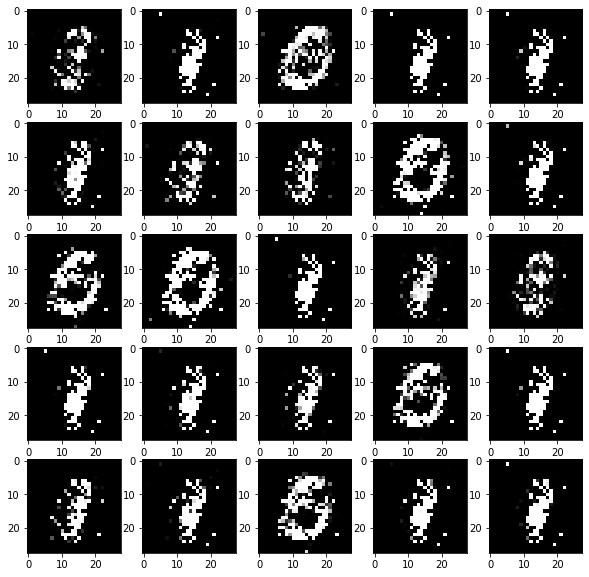

epochs 39


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 12ms/step


  0%|          | 1/273 [00:00<02:05,  2.17it/s]

4/4 [==============================] - 0s 17ms/step


  1%|          | 2/273 [00:00<02:14,  2.02it/s]

4/4 [==============================] - 0s 10ms/step


  1%|          | 3/273 [00:01<02:09,  2.08it/s]

4/4 [==============================] - 0s 9ms/step


  1%|▏         | 4/273 [00:01<02:08,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


  2%|▏         | 5/273 [00:02<02:06,  2.13it/s]

4/4 [==============================] - 0s 12ms/step


  2%|▏         | 6/273 [00:02<02:06,  2.11it/s]

4/4 [==============================] - 0s 8ms/step


  3%|▎         | 7/273 [00:03<02:05,  2.11it/s]

4/4 [==============================] - 0s 9ms/step


  3%|▎         | 8/273 [00:03<02:08,  2.06it/s]

4/4 [==============================] - 0s 9ms/step


  3%|▎         | 9/273 [00:04<02:06,  2.09it/s]

4/4 [==============================] - 0s 11ms/step


  4%|▎         | 10/273 [00:04<02:07,  2.07it/s]

4/4 [==============================] - 0s 9ms/step


  4%|▍         | 11/273 [00:05<02:05,  2.08it/s]

4/4 [==============================] - 0s 10ms/step


  4%|▍         | 12/273 [00:05<02:06,  2.06it/s]

4/4 [==============================] - 0s 12ms/step


  5%|▍         | 13/273 [00:06<02:10,  2.00it/s]

4/4 [==============================] - 0s 12ms/step


  5%|▌         | 14/273 [00:06<02:12,  1.95it/s]

4/4 [==============================] - 0s 17ms/step


  5%|▌         | 15/273 [00:07<02:15,  1.91it/s]

4/4 [==============================] - 0s 11ms/step


  6%|▌         | 16/273 [00:07<02:11,  1.96it/s]

4/4 [==============================] - 0s 16ms/step


  6%|▌         | 17/273 [00:08<02:25,  1.76it/s]

4/4 [==============================] - 0s 11ms/step


  7%|▋         | 18/273 [00:09<02:18,  1.84it/s]

4/4 [==============================] - 0s 12ms/step


  7%|▋         | 19/273 [00:09<02:14,  1.89it/s]

4/4 [==============================] - 0s 13ms/step


  7%|▋         | 20/273 [00:10<02:10,  1.94it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 21/273 [00:10<02:02,  2.06it/s]

4/4 [==============================] - 0s 8ms/step


  8%|▊         | 22/273 [00:10<01:55,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 23/273 [00:11<01:54,  2.19it/s]

4/4 [==============================] - 0s 12ms/step


  9%|▉         | 24/273 [00:11<01:55,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


  9%|▉         | 25/273 [00:12<01:53,  2.19it/s]

4/4 [==============================] - 0s 10ms/step


 10%|▉         | 26/273 [00:12<01:48,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 10%|▉         | 27/273 [00:13<01:51,  2.20it/s]

4/4 [==============================] - 0s 10ms/step


 10%|█         | 28/273 [00:13<02:04,  1.97it/s]

4/4 [==============================] - 0s 11ms/step


 11%|█         | 29/273 [00:14<01:59,  2.04it/s]

4/4 [==============================] - 0s 9ms/step


 11%|█         | 30/273 [00:14<01:56,  2.08it/s]

4/4 [==============================] - 0s 9ms/step


 11%|█▏        | 31/273 [00:15<01:56,  2.08it/s]

4/4 [==============================] - 0s 8ms/step


 12%|█▏        | 32/273 [00:15<01:57,  2.06it/s]

4/4 [==============================] - 0s 8ms/step


 12%|█▏        | 33/273 [00:16<01:50,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 12%|█▏        | 34/273 [00:16<01:51,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 13%|█▎        | 35/273 [00:16<01:47,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 13%|█▎        | 36/273 [00:17<01:45,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 14%|█▎        | 37/273 [00:17<01:48,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▍        | 38/273 [00:18<01:49,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▍        | 39/273 [00:18<01:45,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 15%|█▍        | 40/273 [00:19<01:44,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 15%|█▌        | 41/273 [00:19<01:47,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 15%|█▌        | 42/273 [00:20<01:47,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


 16%|█▌        | 43/273 [00:20<01:48,  2.12it/s]

4/4 [==============================] - 0s 11ms/step


 16%|█▌        | 44/273 [00:21<01:44,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▋        | 45/273 [00:21<01:42,  2.23it/s]

4/4 [==============================] - 0s 11ms/step


 17%|█▋        | 46/273 [00:21<01:39,  2.29it/s]

4/4 [==============================] - 0s 10ms/step


 17%|█▋        | 47/273 [00:22<01:41,  2.23it/s]

4/4 [==============================] - 0s 10ms/step


 18%|█▊        | 48/273 [00:22<01:38,  2.29it/s]

4/4 [==============================] - 0s 13ms/step


 18%|█▊        | 49/273 [00:23<01:35,  2.34it/s]

4/4 [==============================] - 0s 10ms/step


 18%|█▊        | 50/273 [00:23<01:37,  2.30it/s]

4/4 [==============================] - 0s 11ms/step


 19%|█▊        | 51/273 [00:24<01:38,  2.26it/s]

4/4 [==============================] - 0s 11ms/step


 19%|█▉        | 52/273 [00:24<01:40,  2.20it/s]

4/4 [==============================] - 0s 10ms/step


 19%|█▉        | 53/273 [00:25<01:38,  2.24it/s]

4/4 [==============================] - 0s 14ms/step


 20%|█▉        | 54/273 [00:25<01:35,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 20%|██        | 55/273 [00:25<01:33,  2.34it/s]

4/4 [==============================] - 0s 9ms/step


 21%|██        | 56/273 [00:26<01:34,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 21%|██        | 57/273 [00:26<01:32,  2.34it/s]

4/4 [==============================] - 0s 8ms/step


 21%|██        | 58/273 [00:27<01:30,  2.37it/s]

4/4 [==============================] - 0s 8ms/step


 22%|██▏       | 59/273 [00:27<01:31,  2.33it/s]

4/4 [==============================] - 0s 7ms/step


 22%|██▏       | 60/273 [00:28<01:33,  2.28it/s]

4/4 [==============================] - 0s 10ms/step


 22%|██▏       | 61/273 [00:28<01:36,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 23%|██▎       | 62/273 [00:28<01:35,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 23%|██▎       | 63/273 [00:29<01:36,  2.17it/s]

4/4 [==============================] - 0s 10ms/step


 23%|██▎       | 64/273 [00:29<01:33,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 24%|██▍       | 65/273 [00:30<01:32,  2.25it/s]

4/4 [==============================] - 0s 20ms/step


 24%|██▍       | 66/273 [00:30<01:37,  2.13it/s]

4/4 [==============================] - 0s 8ms/step


 25%|██▍       | 67/273 [00:31<01:33,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 25%|██▍       | 68/273 [00:31<01:33,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 25%|██▌       | 69/273 [00:32<01:41,  2.01it/s]

4/4 [==============================] - 0s 9ms/step


 26%|██▌       | 70/273 [00:32<01:38,  2.05it/s]

4/4 [==============================] - 0s 9ms/step


 26%|██▌       | 71/273 [00:33<01:36,  2.09it/s]

4/4 [==============================] - 0s 9ms/step


 26%|██▋       | 72/273 [00:33<01:35,  2.10it/s]

4/4 [==============================] - 0s 12ms/step


 27%|██▋       | 73/273 [00:34<01:35,  2.09it/s]

4/4 [==============================] - 0s 8ms/step


 27%|██▋       | 74/273 [00:34<01:34,  2.11it/s]

4/4 [==============================] - 0s 9ms/step


 27%|██▋       | 75/273 [00:35<01:28,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 28%|██▊       | 76/273 [00:35<01:25,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 28%|██▊       | 77/273 [00:35<01:23,  2.35it/s]

4/4 [==============================] - 0s 11ms/step


 29%|██▊       | 78/273 [00:36<01:23,  2.35it/s]

4/4 [==============================] - 0s 11ms/step


 29%|██▉       | 79/273 [00:36<01:25,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 29%|██▉       | 80/273 [00:37<01:28,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 30%|██▉       | 81/273 [00:37<01:26,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 30%|███       | 82/273 [00:38<01:27,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 30%|███       | 83/273 [00:38<01:27,  2.18it/s]

4/4 [==============================] - 0s 12ms/step


 31%|███       | 84/273 [00:39<01:29,  2.12it/s]

4/4 [==============================] - 0s 11ms/step


 31%|███       | 85/273 [00:39<01:30,  2.07it/s]

4/4 [==============================] - 0s 8ms/step


 32%|███▏      | 86/273 [00:40<01:26,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 32%|███▏      | 87/273 [00:40<01:26,  2.14it/s]

4/4 [==============================] - 0s 10ms/step


 32%|███▏      | 88/273 [00:40<01:23,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 33%|███▎      | 89/273 [00:41<01:24,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 33%|███▎      | 90/273 [00:41<01:20,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 33%|███▎      | 91/273 [00:42<01:19,  2.30it/s]

4/4 [==============================] - 0s 15ms/step


 34%|███▎      | 92/273 [00:42<01:21,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▍      | 93/273 [00:43<01:22,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▍      | 94/273 [00:43<01:20,  2.22it/s]

4/4 [==============================] - 0s 14ms/step


 35%|███▍      | 95/273 [00:44<01:26,  2.07it/s]

4/4 [==============================] - 0s 8ms/step


 35%|███▌      | 96/273 [00:44<01:23,  2.11it/s]

4/4 [==============================] - 0s 8ms/step


 36%|███▌      | 97/273 [00:45<01:25,  2.07it/s]

4/4 [==============================] - 0s 8ms/step


 36%|███▌      | 98/273 [00:45<01:20,  2.19it/s]

4/4 [==============================] - 0s 10ms/step


 36%|███▋      | 99/273 [00:45<01:16,  2.28it/s]

4/4 [==============================] - 0s 13ms/step


 37%|███▋      | 100/273 [00:46<01:21,  2.13it/s]

4/4 [==============================] - 0s 10ms/step


 37%|███▋      | 101/273 [00:46<01:19,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


 37%|███▋      | 102/273 [00:47<01:18,  2.19it/s]

4/4 [==============================] - 0s 12ms/step


 38%|███▊      | 103/273 [00:47<01:22,  2.06it/s]

4/4 [==============================] - 0s 9ms/step


 38%|███▊      | 104/273 [00:48<01:19,  2.12it/s]

4/4 [==============================] - 0s 8ms/step


 38%|███▊      | 105/273 [00:48<01:18,  2.13it/s]

4/4 [==============================] - 0s 11ms/step


 39%|███▉      | 106/273 [00:49<01:15,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 39%|███▉      | 107/273 [00:49<01:13,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 40%|███▉      | 108/273 [00:50<01:11,  2.30it/s]

4/4 [==============================] - 0s 10ms/step


 40%|███▉      | 109/273 [00:50<01:11,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 40%|████      | 110/273 [00:50<01:12,  2.26it/s]

4/4 [==============================] - 0s 11ms/step


 41%|████      | 111/273 [00:51<01:13,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 41%|████      | 112/273 [00:51<01:13,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 41%|████▏     | 113/273 [00:52<01:10,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 42%|████▏     | 114/273 [00:52<01:11,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 42%|████▏     | 115/273 [00:53<01:11,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 42%|████▏     | 116/273 [00:53<01:12,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 43%|████▎     | 117/273 [00:54<01:11,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 43%|████▎     | 118/273 [00:54<01:08,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 44%|████▎     | 119/273 [00:55<01:08,  2.26it/s]

4/4 [==============================] - 0s 13ms/step


 44%|████▍     | 120/273 [00:55<01:08,  2.25it/s]

4/4 [==============================] - 0s 7ms/step


 44%|████▍     | 121/273 [00:55<01:09,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 45%|████▍     | 122/273 [00:56<01:09,  2.18it/s]

4/4 [==============================] - 0s 11ms/step


 45%|████▌     | 123/273 [00:56<01:08,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 45%|████▌     | 124/273 [00:57<01:09,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


 46%|████▌     | 125/273 [00:57<01:10,  2.11it/s]

4/4 [==============================] - 0s 9ms/step


 46%|████▌     | 126/273 [00:58<01:07,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 127/273 [00:58<01:06,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 128/273 [00:59<01:06,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 129/273 [00:59<01:08,  2.11it/s]

4/4 [==============================] - 0s 9ms/step


 48%|████▊     | 130/273 [01:00<01:05,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 48%|████▊     | 131/273 [01:00<01:03,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 48%|████▊     | 132/273 [01:01<01:04,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 49%|████▊     | 133/273 [01:01<01:03,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 49%|████▉     | 134/273 [01:01<01:00,  2.28it/s]

4/4 [==============================] - 0s 11ms/step


 49%|████▉     | 135/273 [01:02<01:01,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 50%|████▉     | 136/273 [01:02<01:00,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 50%|█████     | 137/273 [01:03<00:59,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 51%|█████     | 138/273 [01:03<01:01,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 51%|█████     | 139/273 [01:04<01:01,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 51%|█████▏    | 140/273 [01:04<00:59,  2.22it/s]

4/4 [==============================] - 0s 14ms/step


 52%|█████▏    | 141/273 [01:05<01:00,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 142/273 [01:05<01:00,  2.15it/s]

4/4 [==============================] - 0s 12ms/step


 52%|█████▏    | 143/273 [01:06<01:00,  2.15it/s]

4/4 [==============================] - 0s 13ms/step


 53%|█████▎    | 144/273 [01:06<01:00,  2.13it/s]

4/4 [==============================] - 0s 10ms/step


 53%|█████▎    | 145/273 [01:06<00:57,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 53%|█████▎    | 146/273 [01:07<00:58,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 54%|█████▍    | 147/273 [01:07<00:58,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 54%|█████▍    | 148/273 [01:08<00:58,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


 55%|█████▍    | 149/273 [01:08<00:57,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


 55%|█████▍    | 150/273 [01:09<00:55,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 55%|█████▌    | 151/273 [01:09<00:54,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▌    | 152/273 [01:10<00:53,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▌    | 153/273 [01:10<00:50,  2.37it/s]

4/4 [==============================] - 0s 13ms/step


 56%|█████▋    | 154/273 [01:10<00:50,  2.37it/s]

4/4 [==============================] - 0s 8ms/step


 57%|█████▋    | 155/273 [01:11<00:50,  2.36it/s]

4/4 [==============================] - 0s 8ms/step


 57%|█████▋    | 156/273 [01:11<00:50,  2.34it/s]

4/4 [==============================] - 0s 8ms/step


 58%|█████▊    | 157/273 [01:12<00:47,  2.42it/s]

4/4 [==============================] - 0s 9ms/step


 58%|█████▊    | 158/273 [01:12<00:50,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 58%|█████▊    | 159/273 [01:13<00:50,  2.28it/s]

4/4 [==============================] - 0s 10ms/step


 59%|█████▊    | 160/273 [01:13<00:48,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▉    | 161/273 [01:13<00:47,  2.38it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▉    | 162/273 [01:14<00:46,  2.39it/s]

4/4 [==============================] - 0s 9ms/step


 60%|█████▉    | 163/273 [01:14<00:45,  2.41it/s]

4/4 [==============================] - 0s 11ms/step


 60%|██████    | 164/273 [01:15<00:45,  2.42it/s]

4/4 [==============================] - 0s 9ms/step


 60%|██████    | 165/273 [01:15<00:44,  2.40it/s]

4/4 [==============================] - 0s 11ms/step


 61%|██████    | 166/273 [01:15<00:46,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 61%|██████    | 167/273 [01:16<00:46,  2.27it/s]

4/4 [==============================] - 0s 11ms/step


 62%|██████▏   | 168/273 [01:16<00:46,  2.26it/s]

4/4 [==============================] - 0s 14ms/step


 62%|██████▏   | 169/273 [01:17<00:47,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 62%|██████▏   | 170/273 [01:17<00:46,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 63%|██████▎   | 171/273 [01:18<00:46,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 63%|██████▎   | 172/273 [01:18<00:45,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 63%|██████▎   | 173/273 [01:19<00:44,  2.25it/s]

4/4 [==============================] - 0s 16ms/step


 64%|██████▎   | 174/273 [01:19<00:45,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


 64%|██████▍   | 175/273 [01:20<00:45,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 64%|██████▍   | 176/273 [01:20<00:43,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 65%|██████▍   | 177/273 [01:20<00:42,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 65%|██████▌   | 178/273 [01:21<00:41,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▌   | 179/273 [01:21<00:41,  2.25it/s]

4/4 [==============================] - 0s 10ms/step


 66%|██████▌   | 180/273 [01:22<00:41,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▋   | 181/273 [01:22<00:40,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 67%|██████▋   | 182/273 [01:23<00:40,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


 67%|██████▋   | 183/273 [01:23<00:39,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 67%|██████▋   | 184/273 [01:24<00:38,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 68%|██████▊   | 185/273 [01:24<00:38,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 68%|██████▊   | 186/273 [01:24<00:37,  2.35it/s]

4/4 [==============================] - 0s 9ms/step


 68%|██████▊   | 187/273 [01:25<00:38,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 69%|██████▉   | 188/273 [01:25<00:37,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


 69%|██████▉   | 189/273 [01:26<00:38,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 70%|██████▉   | 190/273 [01:26<00:41,  1.98it/s]

4/4 [==============================] - 0s 8ms/step


 70%|██████▉   | 191/273 [01:27<00:40,  2.02it/s]

4/4 [==============================] - 0s 8ms/step


 70%|███████   | 192/273 [01:27<00:39,  2.08it/s]

4/4 [==============================] - 0s 8ms/step


 71%|███████   | 193/273 [01:28<00:37,  2.16it/s]

4/4 [==============================] - 0s 12ms/step


 71%|███████   | 194/273 [01:28<00:37,  2.13it/s]

4/4 [==============================] - 0s 8ms/step


 71%|███████▏  | 195/273 [01:29<00:36,  2.11it/s]

4/4 [==============================] - 0s 8ms/step


 72%|███████▏  | 196/273 [01:29<00:36,  2.12it/s]

4/4 [==============================] - 0s 8ms/step


 72%|███████▏  | 197/273 [01:30<00:35,  2.11it/s]

4/4 [==============================] - 0s 8ms/step


 73%|███████▎  | 198/273 [01:30<00:34,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 73%|███████▎  | 199/273 [01:31<00:34,  2.12it/s]

4/4 [==============================] - 0s 8ms/step


 73%|███████▎  | 200/273 [01:31<00:34,  2.11it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▎  | 201/273 [01:31<00:33,  2.16it/s]

4/4 [==============================] - 0s 10ms/step


 74%|███████▍  | 202/273 [01:32<00:32,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▍  | 203/273 [01:33<00:34,  2.03it/s]

4/4 [==============================] - 0s 9ms/step


 75%|███████▍  | 204/273 [01:33<00:32,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 75%|███████▌  | 205/273 [01:33<00:31,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 75%|███████▌  | 206/273 [01:34<00:30,  2.20it/s]

4/4 [==============================] - 0s 12ms/step


 76%|███████▌  | 207/273 [01:34<00:30,  2.14it/s]

4/4 [==============================] - 0s 10ms/step


 76%|███████▌  | 208/273 [01:35<00:30,  2.10it/s]

4/4 [==============================] - 0s 10ms/step


 77%|███████▋  | 209/273 [01:35<00:29,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


 77%|███████▋  | 210/273 [01:36<00:30,  2.07it/s]

4/4 [==============================] - 0s 10ms/step


 77%|███████▋  | 211/273 [01:36<00:29,  2.13it/s]

4/4 [==============================] - 0s 8ms/step


 78%|███████▊  | 212/273 [01:37<00:27,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 213/273 [01:37<00:27,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 214/273 [01:38<00:26,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 79%|███████▉  | 215/273 [01:38<00:25,  2.28it/s]

4/4 [==============================] - 0s 10ms/step


 79%|███████▉  | 216/273 [01:38<00:25,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 79%|███████▉  | 217/273 [01:39<00:25,  2.20it/s]

4/4 [==============================] - 0s 13ms/step


 80%|███████▉  | 218/273 [01:39<00:25,  2.13it/s]

4/4 [==============================] - 0s 8ms/step


 80%|████████  | 219/273 [01:40<00:24,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 81%|████████  | 220/273 [01:40<00:23,  2.27it/s]

4/4 [==============================] - 0s 10ms/step


 81%|████████  | 221/273 [01:41<00:22,  2.31it/s]

4/4 [==============================] - 0s 10ms/step


 81%|████████▏ | 222/273 [01:41<00:22,  2.31it/s]

4/4 [==============================] - 0s 11ms/step


 82%|████████▏ | 223/273 [01:41<00:21,  2.30it/s]

4/4 [==============================] - 0s 8ms/step


 82%|████████▏ | 224/273 [01:42<00:21,  2.27it/s]

4/4 [==============================] - 0s 12ms/step


 82%|████████▏ | 225/273 [01:42<00:21,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 83%|████████▎ | 226/273 [01:43<00:21,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 83%|████████▎ | 227/273 [01:43<00:20,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▎ | 228/273 [01:44<00:19,  2.36it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▍ | 229/273 [01:44<00:20,  2.19it/s]

4/4 [==============================] - 0s 10ms/step


 84%|████████▍ | 230/273 [01:45<00:19,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 85%|████████▍ | 231/273 [01:45<00:18,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 85%|████████▍ | 232/273 [01:45<00:17,  2.31it/s]

4/4 [==============================] - 0s 8ms/step


 85%|████████▌ | 233/273 [01:46<00:17,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▌ | 234/273 [01:46<00:17,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▌ | 235/273 [01:47<00:16,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▋ | 236/273 [01:47<00:16,  2.23it/s]

4/4 [==============================] - 0s 11ms/step


 87%|████████▋ | 237/273 [01:48<00:17,  2.02it/s]

4/4 [==============================] - 0s 9ms/step


 87%|████████▋ | 238/273 [01:48<00:16,  2.10it/s]

4/4 [==============================] - 0s 10ms/step


 88%|████████▊ | 239/273 [01:49<00:15,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 88%|████████▊ | 240/273 [01:49<00:15,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


 88%|████████▊ | 241/273 [01:50<00:14,  2.28it/s]

4/4 [==============================] - 0s 10ms/step


 89%|████████▊ | 242/273 [01:50<00:13,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 89%|████████▉ | 243/273 [01:50<00:13,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 89%|████████▉ | 244/273 [01:51<00:12,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 90%|████████▉ | 245/273 [01:51<00:12,  2.26it/s]

4/4 [==============================] - 0s 10ms/step


 90%|█████████ | 246/273 [01:52<00:11,  2.30it/s]

4/4 [==============================] - 0s 11ms/step


 90%|█████████ | 247/273 [01:52<00:11,  2.25it/s]

4/4 [==============================] - 0s 14ms/step


 91%|█████████ | 248/273 [01:53<00:11,  2.18it/s]

4/4 [==============================] - 0s 11ms/step


 91%|█████████ | 249/273 [01:53<00:11,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 92%|█████████▏| 250/273 [01:54<00:10,  2.19it/s]

4/4 [==============================] - 0s 13ms/step


 92%|█████████▏| 251/273 [01:54<00:10,  2.11it/s]

4/4 [==============================] - 0s 9ms/step


 92%|█████████▏| 252/273 [01:55<00:09,  2.21it/s]

4/4 [==============================] - 0s 10ms/step


 93%|█████████▎| 253/273 [01:55<00:09,  2.21it/s]

4/4 [==============================] - 0s 13ms/step


 93%|█████████▎| 254/273 [01:56<00:08,  2.16it/s]

4/4 [==============================] - 0s 10ms/step


 93%|█████████▎| 255/273 [01:56<00:08,  2.21it/s]

4/4 [==============================] - 0s 10ms/step


 94%|█████████▍| 256/273 [01:56<00:07,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 94%|█████████▍| 257/273 [01:57<00:06,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▍| 258/273 [01:57<00:06,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 95%|█████████▍| 259/273 [01:58<00:06,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▌| 260/273 [01:58<00:05,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 96%|█████████▌| 261/273 [01:59<00:05,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 96%|█████████▌| 262/273 [01:59<00:05,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 96%|█████████▋| 263/273 [02:00<00:04,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 264/273 [02:00<00:04,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 265/273 [02:00<00:03,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 266/273 [02:01<00:03,  2.09it/s]

4/4 [==============================] - 0s 14ms/step


 98%|█████████▊| 267/273 [02:02<00:02,  2.06it/s]

4/4 [==============================] - 0s 12ms/step


 98%|█████████▊| 268/273 [02:02<00:02,  1.92it/s]

4/4 [==============================] - 0s 10ms/step


 99%|█████████▊| 269/273 [02:03<00:02,  1.92it/s]

4/4 [==============================] - 0s 15ms/step


 99%|█████████▉| 270/273 [02:03<00:01,  1.96it/s]

4/4 [==============================] - 0s 12ms/step


 99%|█████████▉| 271/273 [02:04<00:01,  1.97it/s]

4/4 [==============================] - 0s 10ms/step


100%|█████████▉| 272/273 [02:04<00:00,  1.91it/s]

4/4 [==============================] - 0s 12ms/step


100%|██████████| 273/273 [02:05<00:00,  2.18it/s]


loss is 5.853154334545252e-07 |*| 28.09673500061035
1/1 [==============================] - 0s 27ms/step


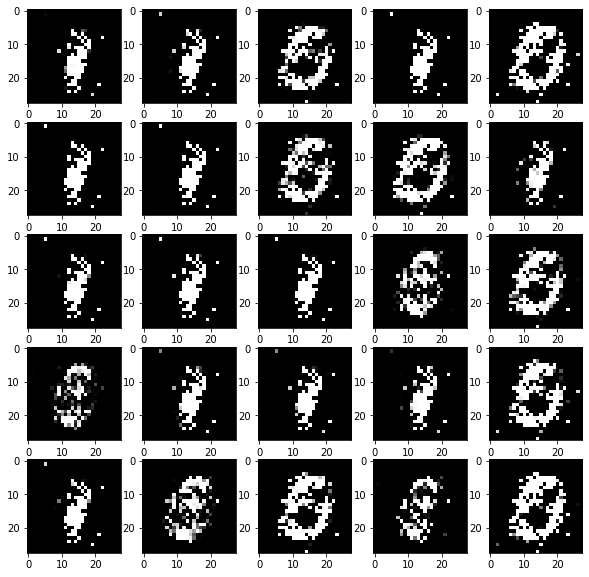

epochs 40


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 10ms/step


  0%|          | 1/273 [00:00<01:51,  2.44it/s]

4/4 [==============================] - 0s 9ms/step


  1%|          | 2/273 [00:00<02:06,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


  1%|          | 3/273 [00:01<02:18,  1.95it/s]

4/4 [==============================] - 0s 11ms/step


  1%|▏         | 4/273 [00:01<02:08,  2.09it/s]

4/4 [==============================] - 0s 9ms/step


  2%|▏         | 5/273 [00:02<02:04,  2.14it/s]

4/4 [==============================] - 0s 10ms/step


  2%|▏         | 6/273 [00:02<02:00,  2.21it/s]

4/4 [==============================] - 0s 15ms/step


  3%|▎         | 7/273 [00:03<02:04,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


  3%|▎         | 8/273 [00:03<02:06,  2.10it/s]

4/4 [==============================] - 0s 8ms/step


  3%|▎         | 9/273 [00:04<02:03,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


  4%|▎         | 10/273 [00:04<02:02,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


  4%|▍         | 11/273 [00:05<02:00,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


  4%|▍         | 12/273 [00:05<02:00,  2.17it/s]

4/4 [==============================] - 0s 10ms/step


  5%|▍         | 13/273 [00:06<01:55,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


  5%|▌         | 14/273 [00:06<01:56,  2.22it/s]

4/4 [==============================] - 0s 14ms/step


  5%|▌         | 15/273 [00:06<01:58,  2.18it/s]

4/4 [==============================] - 0s 13ms/step


  6%|▌         | 16/273 [00:07<01:58,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


  6%|▌         | 17/273 [00:07<01:53,  2.25it/s]

4/4 [==============================] - 0s 10ms/step


  7%|▋         | 18/273 [00:08<01:50,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


  7%|▋         | 19/273 [00:08<01:52,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


  7%|▋         | 20/273 [00:09<01:50,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 21/273 [00:09<01:50,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 22/273 [00:09<01:49,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 23/273 [00:10<01:50,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


  9%|▉         | 24/273 [00:10<01:48,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


  9%|▉         | 25/273 [00:11<01:49,  2.27it/s]

4/4 [==============================] - 0s 10ms/step


 10%|▉         | 26/273 [00:11<01:55,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 10%|▉         | 27/273 [00:12<01:58,  2.07it/s]

4/4 [==============================] - 0s 11ms/step


 10%|█         | 28/273 [00:12<02:02,  2.00it/s]

4/4 [==============================] - 0s 8ms/step


 11%|█         | 29/273 [00:13<02:00,  2.02it/s]

4/4 [==============================] - 0s 10ms/step


 11%|█         | 30/273 [00:14<02:08,  1.88it/s]

4/4 [==============================] - 0s 11ms/step


 11%|█▏        | 31/273 [00:14<02:21,  1.71it/s]

4/4 [==============================] - 0s 14ms/step


 12%|█▏        | 32/273 [00:15<02:18,  1.73it/s]

4/4 [==============================] - 0s 9ms/step


 12%|█▏        | 33/273 [00:15<02:13,  1.80it/s]

4/4 [==============================] - 0s 8ms/step


 12%|█▏        | 34/273 [00:16<02:06,  1.89it/s]

4/4 [==============================] - 0s 8ms/step


 13%|█▎        | 35/273 [00:16<01:56,  2.05it/s]

4/4 [==============================] - 0s 9ms/step


 13%|█▎        | 36/273 [00:17<01:51,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▎        | 37/273 [00:17<01:44,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▍        | 38/273 [00:17<01:42,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▍        | 39/273 [00:18<01:42,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 15%|█▍        | 40/273 [00:18<01:40,  2.33it/s]

4/4 [==============================] - 0s 7ms/step


 15%|█▌        | 41/273 [00:19<01:37,  2.37it/s]

4/4 [==============================] - 0s 8ms/step


 15%|█▌        | 42/273 [00:19<01:35,  2.41it/s]

4/4 [==============================] - 0s 10ms/step


 16%|█▌        | 43/273 [00:20<01:40,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▌        | 44/273 [00:20<01:38,  2.32it/s]

4/4 [==============================] - 0s 11ms/step


 16%|█▋        | 45/273 [00:20<01:43,  2.21it/s]

4/4 [==============================] - 0s 14ms/step


 17%|█▋        | 46/273 [00:21<01:42,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 17%|█▋        | 47/273 [00:21<01:38,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 18%|█▊        | 48/273 [00:22<01:38,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 18%|█▊        | 49/273 [00:22<01:38,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 18%|█▊        | 50/273 [00:23<01:42,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 19%|█▊        | 51/273 [00:23<01:38,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 19%|█▉        | 52/273 [00:23<01:35,  2.31it/s]

4/4 [==============================] - 0s 8ms/step


 19%|█▉        | 53/273 [00:24<01:38,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 20%|█▉        | 54/273 [00:24<01:36,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 20%|██        | 55/273 [00:25<01:37,  2.23it/s]

4/4 [==============================] - 0s 10ms/step


 21%|██        | 56/273 [00:25<01:36,  2.26it/s]

4/4 [==============================] - 0s 10ms/step


 21%|██        | 57/273 [00:26<01:39,  2.16it/s]

4/4 [==============================] - 0s 12ms/step


 21%|██        | 58/273 [00:26<01:37,  2.20it/s]

4/4 [==============================] - 0s 14ms/step


 22%|██▏       | 59/273 [00:27<01:39,  2.16it/s]

4/4 [==============================] - 0s 10ms/step


 22%|██▏       | 60/273 [00:27<01:39,  2.14it/s]

4/4 [==============================] - 0s 10ms/step


 22%|██▏       | 61/273 [00:28<01:37,  2.16it/s]

4/4 [==============================] - 0s 10ms/step


 23%|██▎       | 62/273 [00:28<01:40,  2.09it/s]

4/4 [==============================] - 0s 9ms/step


 23%|██▎       | 63/273 [00:29<01:35,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 23%|██▎       | 64/273 [00:29<01:38,  2.11it/s]

4/4 [==============================] - 0s 8ms/step


 24%|██▍       | 65/273 [00:29<01:35,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 24%|██▍       | 66/273 [00:30<01:35,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


 25%|██▍       | 67/273 [00:30<01:36,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 25%|██▍       | 68/273 [00:31<01:34,  2.16it/s]

4/4 [==============================] - 0s 10ms/step


 25%|██▌       | 69/273 [00:31<01:31,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 26%|██▌       | 70/273 [00:32<01:31,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 26%|██▌       | 71/273 [00:32<01:31,  2.22it/s]

4/4 [==============================] - 0s 13ms/step


 26%|██▋       | 72/273 [00:33<01:33,  2.15it/s]

4/4 [==============================] - 0s 11ms/step


 27%|██▋       | 73/273 [00:33<01:32,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


 27%|██▋       | 74/273 [00:34<01:27,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 27%|██▋       | 75/273 [00:34<01:29,  2.20it/s]

4/4 [==============================] - 0s 15ms/step


 28%|██▊       | 76/273 [00:35<01:29,  2.21it/s]

4/4 [==============================] - 0s 10ms/step


 28%|██▊       | 77/273 [00:35<01:30,  2.17it/s]

4/4 [==============================] - 0s 10ms/step


 29%|██▊       | 78/273 [00:35<01:29,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▉       | 79/273 [00:36<01:31,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▉       | 80/273 [00:36<01:29,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


 30%|██▉       | 81/273 [00:37<01:25,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 30%|███       | 82/273 [00:37<01:28,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 30%|███       | 83/273 [00:38<01:27,  2.17it/s]

4/4 [==============================] - 0s 13ms/step


 31%|███       | 84/273 [00:38<01:29,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 31%|███       | 85/273 [00:39<01:25,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 32%|███▏      | 86/273 [00:39<01:27,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 32%|███▏      | 87/273 [00:40<01:25,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 32%|███▏      | 88/273 [00:40<01:23,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 33%|███▎      | 89/273 [00:40<01:22,  2.23it/s]

4/4 [==============================] - 0s 11ms/step


 33%|███▎      | 90/273 [00:41<01:22,  2.22it/s]

4/4 [==============================] - 0s 12ms/step


 33%|███▎      | 91/273 [00:41<01:20,  2.26it/s]

4/4 [==============================] - 0s 10ms/step


 34%|███▎      | 92/273 [00:42<01:29,  2.03it/s]

4/4 [==============================] - 0s 8ms/step


 34%|███▍      | 93/273 [00:42<01:26,  2.09it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▍      | 94/273 [00:43<01:25,  2.09it/s]

4/4 [==============================] - 0s 10ms/step


 35%|███▍      | 95/273 [00:43<01:21,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 35%|███▌      | 96/273 [00:44<01:19,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 36%|███▌      | 97/273 [00:44<01:17,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▌      | 98/273 [00:45<01:15,  2.31it/s]

4/4 [==============================] - 0s 8ms/step


 36%|███▋      | 99/273 [00:45<01:15,  2.32it/s]

4/4 [==============================] - 0s 8ms/step


 37%|███▋      | 100/273 [00:45<01:14,  2.34it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 101/273 [00:46<01:14,  2.32it/s]

4/4 [==============================] - 0s 8ms/step


 37%|███▋      | 102/273 [00:46<01:13,  2.32it/s]

4/4 [==============================] - 0s 8ms/step


 38%|███▊      | 103/273 [00:47<01:11,  2.38it/s]

4/4 [==============================] - 0s 8ms/step


 38%|███▊      | 104/273 [00:47<01:11,  2.35it/s]

4/4 [==============================] - 0s 9ms/step


 38%|███▊      | 105/273 [00:48<01:13,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 39%|███▉      | 106/273 [00:48<01:12,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 39%|███▉      | 107/273 [00:48<01:10,  2.34it/s]

4/4 [==============================] - 0s 10ms/step


 40%|███▉      | 108/273 [00:49<01:15,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 40%|███▉      | 109/273 [00:49<01:13,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 40%|████      | 110/273 [00:50<01:13,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 41%|████      | 111/273 [00:50<01:12,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 41%|████      | 112/273 [00:51<01:15,  2.14it/s]

4/4 [==============================] - 0s 10ms/step


 41%|████▏     | 113/273 [00:51<01:13,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 42%|████▏     | 114/273 [00:52<01:11,  2.22it/s]

4/4 [==============================] - 0s 15ms/step


 42%|████▏     | 115/273 [00:52<01:13,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 42%|████▏     | 116/273 [00:53<01:12,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 43%|████▎     | 117/273 [00:53<01:13,  2.11it/s]

4/4 [==============================] - 0s 7ms/step


 43%|████▎     | 118/273 [00:54<01:12,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 44%|████▎     | 119/273 [00:54<01:11,  2.17it/s]

4/4 [==============================] - 0s 10ms/step


 44%|████▍     | 120/273 [00:54<01:09,  2.20it/s]

4/4 [==============================] - 0s 10ms/step


 44%|████▍     | 121/273 [00:55<01:08,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 45%|████▍     | 122/273 [00:55<01:06,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 45%|████▌     | 123/273 [00:56<01:04,  2.31it/s]

4/4 [==============================] - 0s 11ms/step


 45%|████▌     | 124/273 [00:56<01:04,  2.32it/s]

4/4 [==============================] - 0s 8ms/step


 46%|████▌     | 125/273 [00:57<01:07,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 46%|████▌     | 126/273 [00:57<01:07,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 127/273 [00:58<01:05,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 128/273 [00:58<01:03,  2.28it/s]

4/4 [==============================] - 0s 10ms/step


 47%|████▋     | 129/273 [00:58<01:06,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


 48%|████▊     | 130/273 [00:59<01:05,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 48%|████▊     | 131/273 [00:59<01:03,  2.22it/s]

4/4 [==============================] - 0s 16ms/step


 48%|████▊     | 132/273 [01:00<01:01,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 49%|████▊     | 133/273 [01:00<00:59,  2.34it/s]

4/4 [==============================] - 0s 10ms/step


 49%|████▉     | 134/273 [01:01<00:58,  2.36it/s]

4/4 [==============================] - 0s 9ms/step


 49%|████▉     | 135/273 [01:01<01:00,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 50%|████▉     | 136/273 [01:02<01:00,  2.25it/s]

4/4 [==============================] - 0s 11ms/step


 50%|█████     | 137/273 [01:02<01:00,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 51%|█████     | 138/273 [01:02<00:59,  2.27it/s]

4/4 [==============================] - 0s 10ms/step


 51%|█████     | 139/273 [01:03<00:58,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 51%|█████▏    | 140/273 [01:03<01:00,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 141/273 [01:04<00:57,  2.30it/s]

4/4 [==============================] - 0s 14ms/step


 52%|█████▏    | 142/273 [01:04<00:57,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 143/273 [01:05<00:55,  2.35it/s]

4/4 [==============================] - 0s 10ms/step


 53%|█████▎    | 144/273 [01:05<00:55,  2.34it/s]

4/4 [==============================] - 0s 8ms/step


 53%|█████▎    | 145/273 [01:05<00:55,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 146/273 [01:06<00:58,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 54%|█████▍    | 147/273 [01:06<00:57,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 54%|█████▍    | 148/273 [01:07<00:56,  2.21it/s]

4/4 [==============================] - 0s 10ms/step


 55%|█████▍    | 149/273 [01:07<00:55,  2.25it/s]

4/4 [==============================] - 0s 16ms/step


 55%|█████▍    | 150/273 [01:08<00:56,  2.19it/s]

4/4 [==============================] - 0s 14ms/step


 55%|█████▌    | 151/273 [01:08<00:56,  2.16it/s]

4/4 [==============================] - 0s 13ms/step


 56%|█████▌    | 152/273 [01:09<00:54,  2.23it/s]

4/4 [==============================] - 0s 10ms/step


 56%|█████▌    | 153/273 [01:09<00:52,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▋    | 154/273 [01:10<00:53,  2.23it/s]

4/4 [==============================] - 0s 14ms/step


 57%|█████▋    | 155/273 [01:10<00:54,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 57%|█████▋    | 156/273 [01:10<00:52,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 58%|█████▊    | 157/273 [01:11<00:51,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 58%|█████▊    | 158/273 [01:11<00:50,  2.29it/s]

4/4 [==============================] - 0s 10ms/step


 58%|█████▊    | 159/273 [01:12<00:48,  2.37it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▊    | 160/273 [01:12<00:49,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▉    | 161/273 [01:13<00:47,  2.35it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▉    | 162/273 [01:13<00:47,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


 60%|█████▉    | 163/273 [01:13<00:46,  2.35it/s]

4/4 [==============================] - 0s 11ms/step


 60%|██████    | 164/273 [01:14<00:48,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 60%|██████    | 165/273 [01:14<00:47,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 61%|██████    | 166/273 [01:15<00:46,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 61%|██████    | 167/273 [01:15<00:45,  2.34it/s]

4/4 [==============================] - 0s 8ms/step


 62%|██████▏   | 168/273 [01:16<00:44,  2.38it/s]

4/4 [==============================] - 0s 9ms/step


 62%|██████▏   | 169/273 [01:16<00:44,  2.34it/s]

4/4 [==============================] - 0s 11ms/step


 62%|██████▏   | 170/273 [01:16<00:46,  2.24it/s]

4/4 [==============================] - 0s 11ms/step


 63%|██████▎   | 171/273 [01:17<00:46,  2.19it/s]

4/4 [==============================] - 0s 13ms/step


 63%|██████▎   | 172/273 [01:17<00:46,  2.16it/s]

4/4 [==============================] - 0s 14ms/step


 63%|██████▎   | 173/273 [01:18<00:47,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 64%|██████▎   | 174/273 [01:18<00:44,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 64%|██████▍   | 175/273 [01:19<00:43,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 64%|██████▍   | 176/273 [01:19<00:44,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 65%|██████▍   | 177/273 [01:20<00:42,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 65%|██████▌   | 178/273 [01:20<00:43,  2.20it/s]

4/4 [==============================] - 0s 10ms/step


 66%|██████▌   | 179/273 [01:21<00:42,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▌   | 180/273 [01:21<00:42,  2.17it/s]

4/4 [==============================] - 0s 11ms/step


 66%|██████▋   | 181/273 [01:21<00:41,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 67%|██████▋   | 182/273 [01:22<00:40,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 67%|██████▋   | 183/273 [01:22<00:39,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 67%|██████▋   | 184/273 [01:23<00:39,  2.27it/s]

4/4 [==============================] - 0s 10ms/step


 68%|██████▊   | 185/273 [01:23<00:39,  2.24it/s]

4/4 [==============================] - 0s 13ms/step


 68%|██████▊   | 186/273 [01:24<00:39,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 68%|██████▊   | 187/273 [01:24<00:39,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 69%|██████▉   | 188/273 [01:25<00:37,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 69%|██████▉   | 189/273 [01:25<00:38,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 70%|██████▉   | 190/273 [01:26<00:37,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 70%|██████▉   | 191/273 [01:26<00:40,  2.02it/s]

4/4 [==============================] - 0s 9ms/step


 70%|███████   | 192/273 [01:27<00:40,  2.00it/s]

4/4 [==============================] - 0s 8ms/step


 71%|███████   | 193/273 [01:27<00:38,  2.09it/s]

4/4 [==============================] - 0s 11ms/step


 71%|███████   | 194/273 [01:28<00:36,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████▏  | 195/273 [01:28<00:35,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 72%|███████▏  | 196/273 [01:28<00:34,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 72%|███████▏  | 197/273 [01:29<00:34,  2.23it/s]

4/4 [==============================] - 0s 14ms/step


 73%|███████▎  | 198/273 [01:29<00:33,  2.27it/s]

4/4 [==============================] - 0s 11ms/step


 73%|███████▎  | 199/273 [01:30<00:32,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 73%|███████▎  | 200/273 [01:30<00:31,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▎  | 201/273 [01:31<00:30,  2.33it/s]

4/4 [==============================] - 0s 11ms/step


 74%|███████▍  | 202/273 [01:31<00:31,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▍  | 203/273 [01:31<00:30,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 75%|███████▍  | 204/273 [01:32<00:31,  2.22it/s]

4/4 [==============================] - 0s 10ms/step


 75%|███████▌  | 205/273 [01:32<00:31,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 75%|███████▌  | 206/273 [01:33<00:29,  2.27it/s]

4/4 [==============================] - 0s 12ms/step


 76%|███████▌  | 207/273 [01:33<00:29,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 76%|███████▌  | 208/273 [01:34<00:29,  2.22it/s]

4/4 [==============================] - 0s 10ms/step


 77%|███████▋  | 209/273 [01:34<00:28,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 210/273 [01:35<00:27,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 211/273 [01:35<00:26,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 212/273 [01:35<00:26,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 213/273 [01:36<00:25,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 214/273 [01:36<00:25,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 79%|███████▉  | 215/273 [01:37<00:26,  2.21it/s]

4/4 [==============================] - 0s 11ms/step


 79%|███████▉  | 216/273 [01:37<00:25,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 79%|███████▉  | 217/273 [01:38<00:24,  2.28it/s]

4/4 [==============================] - 0s 11ms/step


 80%|███████▉  | 218/273 [01:38<00:24,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 80%|████████  | 219/273 [01:39<00:23,  2.28it/s]

4/4 [==============================] - 0s 10ms/step


 81%|████████  | 220/273 [01:39<00:23,  2.22it/s]

4/4 [==============================] - 0s 10ms/step


 81%|████████  | 221/273 [01:39<00:23,  2.22it/s]

4/4 [==============================] - 0s 10ms/step


 81%|████████▏ | 222/273 [01:40<00:22,  2.26it/s]

4/4 [==============================] - 0s 11ms/step


 82%|████████▏ | 223/273 [01:40<00:21,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 82%|████████▏ | 224/273 [01:41<00:21,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 225/273 [01:41<00:20,  2.34it/s]

4/4 [==============================] - 0s 9ms/step


 83%|████████▎ | 226/273 [01:42<00:20,  2.32it/s]

4/4 [==============================] - 0s 12ms/step


 83%|████████▎ | 227/273 [01:42<00:20,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 84%|████████▎ | 228/273 [01:42<00:19,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▍ | 229/273 [01:43<00:18,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▍ | 230/273 [01:43<00:18,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 85%|████████▍ | 231/273 [01:44<00:17,  2.34it/s]

4/4 [==============================] - 0s 9ms/step


 85%|████████▍ | 232/273 [01:44<00:18,  2.22it/s]

4/4 [==============================] - 0s 10ms/step


 85%|████████▌ | 233/273 [01:45<00:18,  2.18it/s]

4/4 [==============================] - 0s 13ms/step


 86%|████████▌ | 234/273 [01:45<00:17,  2.19it/s]

4/4 [==============================] - 0s 12ms/step


 86%|████████▌ | 235/273 [01:46<00:16,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▋ | 236/273 [01:46<00:16,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 87%|████████▋ | 237/273 [01:46<00:15,  2.29it/s]

4/4 [==============================] - 0s 10ms/step


 87%|████████▋ | 238/273 [01:47<00:15,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 88%|████████▊ | 239/273 [01:47<00:15,  2.20it/s]

4/4 [==============================] - 0s 10ms/step


 88%|████████▊ | 240/273 [01:48<00:14,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 88%|████████▊ | 241/273 [01:48<00:14,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 89%|████████▊ | 242/273 [01:49<00:14,  2.11it/s]

4/4 [==============================] - 0s 8ms/step


 89%|████████▉ | 243/273 [01:49<00:14,  2.08it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▉ | 244/273 [01:50<00:13,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 90%|████████▉ | 245/273 [01:50<00:13,  2.11it/s]

4/4 [==============================] - 0s 9ms/step


 90%|█████████ | 246/273 [01:51<00:12,  2.13it/s]

4/4 [==============================] - 0s 14ms/step


 90%|█████████ | 247/273 [01:51<00:12,  2.08it/s]

4/4 [==============================] - 0s 8ms/step


 91%|█████████ | 248/273 [01:52<00:12,  2.04it/s]

4/4 [==============================] - 0s 8ms/step


 91%|█████████ | 249/273 [01:52<00:11,  2.05it/s]

4/4 [==============================] - 0s 8ms/step


 92%|█████████▏| 250/273 [01:53<00:11,  2.09it/s]

4/4 [==============================] - 0s 12ms/step


 92%|█████████▏| 251/273 [01:53<00:10,  2.15it/s]

4/4 [==============================] - 0s 13ms/step


 92%|█████████▏| 252/273 [01:54<00:09,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


 93%|█████████▎| 253/273 [01:54<00:08,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 93%|█████████▎| 254/273 [01:54<00:08,  2.17it/s]

4/4 [==============================] - 0s 10ms/step


 93%|█████████▎| 255/273 [01:55<00:08,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


 94%|█████████▍| 256/273 [01:55<00:07,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 94%|█████████▍| 257/273 [01:56<00:07,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▍| 258/273 [01:56<00:06,  2.25it/s]

4/4 [==============================] - 0s 10ms/step


 95%|█████████▍| 259/273 [01:57<00:06,  2.29it/s]

4/4 [==============================] - 0s 12ms/step


 95%|█████████▌| 260/273 [01:57<00:05,  2.30it/s]

4/4 [==============================] - 0s 11ms/step


 96%|█████████▌| 261/273 [01:58<00:05,  2.11it/s]

4/4 [==============================] - 0s 9ms/step


 96%|█████████▌| 262/273 [01:58<00:05,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


 96%|█████████▋| 263/273 [01:59<00:04,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 97%|█████████▋| 264/273 [01:59<00:04,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 265/273 [01:59<00:03,  2.21it/s]

4/4 [==============================] - 0s 14ms/step


 97%|█████████▋| 266/273 [02:00<00:03,  2.15it/s]

4/4 [==============================] - 0s 13ms/step


 98%|█████████▊| 267/273 [02:01<00:03,  1.99it/s]

4/4 [==============================] - 0s 9ms/step


 98%|█████████▊| 268/273 [02:01<00:02,  2.06it/s]

4/4 [==============================] - 0s 8ms/step


 99%|█████████▊| 269/273 [02:01<00:01,  2.05it/s]

4/4 [==============================] - 0s 10ms/step


 99%|█████████▉| 270/273 [02:02<00:01,  2.09it/s]

4/4 [==============================] - 0s 9ms/step


 99%|█████████▉| 271/273 [02:02<00:00,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


100%|█████████▉| 272/273 [02:03<00:00,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


100%|██████████| 273/273 [02:03<00:00,  2.20it/s]


loss is 1.3019255220569903e-06 |*| 27.958812713623047
1/1 [==============================] - 0s 29ms/step


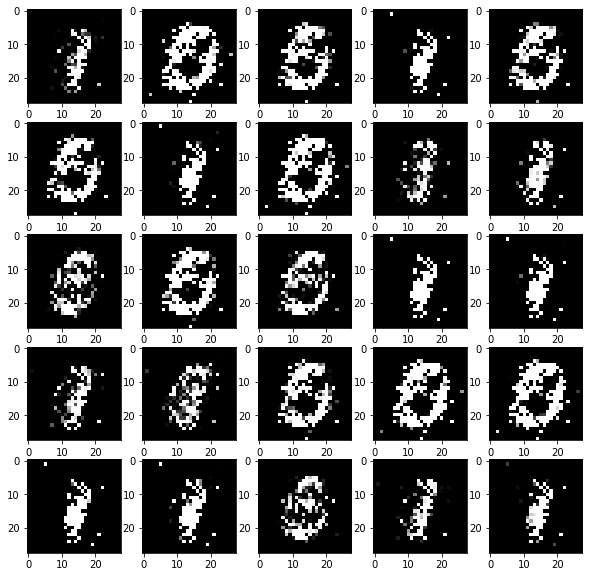

epochs 41


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 11ms/step


  0%|          | 1/273 [00:00<02:06,  2.15it/s]

4/4 [==============================] - 0s 11ms/step


  1%|          | 2/273 [00:00<02:13,  2.03it/s]

4/4 [==============================] - 0s 8ms/step


  1%|          | 3/273 [00:01<02:08,  2.10it/s]

4/4 [==============================] - 0s 10ms/step


  1%|▏         | 4/273 [00:01<02:08,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


  2%|▏         | 5/273 [00:02<02:03,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


  2%|▏         | 6/273 [00:02<02:03,  2.17it/s]

4/4 [==============================] - 0s 13ms/step


  3%|▎         | 7/273 [00:03<02:00,  2.21it/s]

4/4 [==============================] - 0s 12ms/step


  3%|▎         | 8/273 [00:03<01:59,  2.22it/s]

4/4 [==============================] - 0s 15ms/step


  3%|▎         | 9/273 [00:04<01:59,  2.22it/s]

4/4 [==============================] - 0s 18ms/step


  4%|▎         | 10/273 [00:04<02:04,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


  4%|▍         | 11/273 [00:05<02:00,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


  4%|▍         | 12/273 [00:05<02:01,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


  5%|▍         | 13/273 [00:05<01:57,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


  5%|▌         | 14/273 [00:06<01:55,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


  5%|▌         | 15/273 [00:06<02:05,  2.06it/s]

4/4 [==============================] - 0s 8ms/step


  6%|▌         | 16/273 [00:07<01:58,  2.17it/s]

4/4 [==============================] - 0s 10ms/step


  6%|▌         | 17/273 [00:07<02:00,  2.13it/s]

4/4 [==============================] - 0s 10ms/step


  7%|▋         | 18/273 [00:08<01:55,  2.21it/s]

4/4 [==============================] - 0s 12ms/step


  7%|▋         | 19/273 [00:08<01:56,  2.18it/s]

4/4 [==============================] - 0s 10ms/step


  7%|▋         | 20/273 [00:09<01:51,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 21/273 [00:09<01:49,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


  8%|▊         | 22/273 [00:10<01:51,  2.24it/s]

4/4 [==============================] - 0s 10ms/step


  8%|▊         | 23/273 [00:10<01:48,  2.29it/s]

4/4 [==============================] - 0s 10ms/step


  9%|▉         | 24/273 [00:10<01:48,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


  9%|▉         | 25/273 [00:11<01:48,  2.28it/s]

4/4 [==============================] - 0s 12ms/step


 10%|▉         | 26/273 [00:11<01:46,  2.33it/s]

4/4 [==============================] - 0s 10ms/step


 10%|▉         | 27/273 [00:12<01:48,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 10%|█         | 28/273 [00:12<01:46,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 11%|█         | 29/273 [00:13<01:47,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 11%|█         | 30/273 [00:13<01:46,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 11%|█▏        | 31/273 [00:13<01:46,  2.28it/s]

4/4 [==============================] - 0s 10ms/step


 12%|█▏        | 32/273 [00:14<01:50,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 12%|█▏        | 33/273 [00:14<01:50,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


 12%|█▏        | 34/273 [00:15<01:46,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 13%|█▎        | 35/273 [00:15<01:49,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


 13%|█▎        | 36/273 [00:16<01:48,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 14%|█▎        | 37/273 [00:16<01:48,  2.18it/s]

4/4 [==============================] - 0s 10ms/step


 14%|█▍        | 38/273 [00:17<01:50,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▍        | 39/273 [00:17<01:50,  2.13it/s]

4/4 [==============================] - 0s 8ms/step


 15%|█▍        | 40/273 [00:18<01:47,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 15%|█▌        | 41/273 [00:18<01:43,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 15%|█▌        | 42/273 [00:19<01:42,  2.24it/s]

4/4 [==============================] - 0s 12ms/step


 16%|█▌        | 43/273 [00:19<01:48,  2.12it/s]

4/4 [==============================] - 0s 13ms/step


 16%|█▌        | 44/273 [00:20<01:55,  1.99it/s]

4/4 [==============================] - 0s 10ms/step


 16%|█▋        | 45/273 [00:20<01:55,  1.97it/s]

4/4 [==============================] - 0s 11ms/step


 17%|█▋        | 46/273 [00:21<01:54,  1.97it/s]

4/4 [==============================] - 0s 12ms/step


 17%|█▋        | 47/273 [00:21<01:58,  1.91it/s]

4/4 [==============================] - 0s 12ms/step


 18%|█▊        | 48/273 [00:22<01:58,  1.90it/s]

4/4 [==============================] - 0s 14ms/step


 18%|█▊        | 49/273 [00:22<01:59,  1.88it/s]

4/4 [==============================] - 0s 11ms/step


 18%|█▊        | 50/273 [00:23<01:55,  1.93it/s]

4/4 [==============================] - 0s 9ms/step


 19%|█▊        | 51/273 [00:23<01:51,  2.00it/s]

4/4 [==============================] - 0s 9ms/step


 19%|█▉        | 52/273 [00:24<01:45,  2.09it/s]

4/4 [==============================] - 0s 9ms/step


 19%|█▉        | 53/273 [00:24<01:44,  2.11it/s]

4/4 [==============================] - 0s 8ms/step


 20%|█▉        | 54/273 [00:25<01:41,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 20%|██        | 55/273 [00:25<01:41,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 21%|██        | 56/273 [00:25<01:38,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 21%|██        | 57/273 [00:26<01:39,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 21%|██        | 58/273 [00:26<01:37,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 22%|██▏       | 59/273 [00:27<01:37,  2.21it/s]

4/4 [==============================] - 0s 10ms/step


 22%|██▏       | 60/273 [00:27<01:33,  2.28it/s]

4/4 [==============================] - 0s 11ms/step


 22%|██▏       | 61/273 [00:28<01:35,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 23%|██▎       | 62/273 [00:28<01:35,  2.22it/s]

4/4 [==============================] - 0s 12ms/step


 23%|██▎       | 63/273 [00:29<01:33,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 23%|██▎       | 64/273 [00:29<01:33,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 24%|██▍       | 65/273 [00:30<01:32,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


 24%|██▍       | 66/273 [00:30<01:29,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 25%|██▍       | 67/273 [00:30<01:33,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 25%|██▍       | 68/273 [00:31<01:31,  2.23it/s]

4/4 [==============================] - 0s 10ms/step


 25%|██▌       | 69/273 [00:31<01:31,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 26%|██▌       | 70/273 [00:32<01:33,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 26%|██▌       | 71/273 [00:32<01:33,  2.16it/s]

4/4 [==============================] - 0s 10ms/step


 26%|██▋       | 72/273 [00:33<01:36,  2.08it/s]

4/4 [==============================] - 0s 8ms/step


 27%|██▋       | 73/273 [00:33<01:32,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 27%|██▋       | 74/273 [00:34<01:32,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 27%|██▋       | 75/273 [00:34<01:32,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 28%|██▊       | 76/273 [00:35<01:33,  2.11it/s]

4/4 [==============================] - 0s 8ms/step


 28%|██▊       | 77/273 [00:35<01:31,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▊       | 78/273 [00:36<01:29,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▉       | 79/273 [00:36<01:29,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▉       | 80/273 [00:36<01:31,  2.11it/s]

4/4 [==============================] - 0s 9ms/step


 30%|██▉       | 81/273 [00:37<01:27,  2.19it/s]

4/4 [==============================] - 0s 12ms/step


 30%|███       | 82/273 [00:37<01:28,  2.15it/s]

4/4 [==============================] - 0s 10ms/step


 30%|███       | 83/273 [00:38<01:28,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


 31%|███       | 84/273 [00:38<01:31,  2.07it/s]

4/4 [==============================] - 0s 9ms/step


 31%|███       | 85/273 [00:39<01:29,  2.09it/s]

4/4 [==============================] - 0s 10ms/step


 32%|███▏      | 86/273 [00:39<01:25,  2.19it/s]

4/4 [==============================] - 0s 10ms/step


 32%|███▏      | 87/273 [00:40<01:25,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 32%|███▏      | 88/273 [00:40<01:25,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 33%|███▎      | 89/273 [00:41<01:23,  2.20it/s]

4/4 [==============================] - 0s 10ms/step


 33%|███▎      | 90/273 [00:41<01:23,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 33%|███▎      | 91/273 [00:41<01:19,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▎      | 92/273 [00:42<01:21,  2.23it/s]

4/4 [==============================] - 0s 10ms/step


 34%|███▍      | 93/273 [00:43<01:28,  2.02it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▍      | 94/273 [00:43<01:27,  2.04it/s]

4/4 [==============================] - 0s 9ms/step


 35%|███▍      | 95/273 [00:43<01:23,  2.13it/s]

4/4 [==============================] - 0s 8ms/step


 35%|███▌      | 96/273 [00:44<01:24,  2.11it/s]

4/4 [==============================] - 0s 12ms/step


 36%|███▌      | 97/273 [00:44<01:24,  2.08it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▌      | 98/273 [00:45<01:22,  2.12it/s]

4/4 [==============================] - 0s 8ms/step


 36%|███▋      | 99/273 [00:45<01:22,  2.11it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 100/273 [00:46<01:21,  2.11it/s]

4/4 [==============================] - 0s 8ms/step


 37%|███▋      | 101/273 [00:46<01:20,  2.15it/s]

4/4 [==============================] - 0s 11ms/step


 37%|███▋      | 102/273 [00:47<01:20,  2.13it/s]

4/4 [==============================] - 0s 13ms/step


 38%|███▊      | 103/273 [00:47<01:17,  2.19it/s]

4/4 [==============================] - 0s 14ms/step


 38%|███▊      | 104/273 [00:48<01:15,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 38%|███▊      | 105/273 [00:48<01:16,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 39%|███▉      | 106/273 [00:49<01:19,  2.11it/s]

4/4 [==============================] - 0s 10ms/step


 39%|███▉      | 107/273 [00:49<01:16,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


 40%|███▉      | 108/273 [00:50<01:15,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 40%|███▉      | 109/273 [00:50<01:15,  2.17it/s]

4/4 [==============================] - 0s 12ms/step


 40%|████      | 110/273 [00:50<01:14,  2.20it/s]

4/4 [==============================] - 0s 14ms/step


 41%|████      | 111/273 [00:51<01:14,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 41%|████      | 112/273 [00:51<01:14,  2.17it/s]

4/4 [==============================] - 0s 13ms/step


 41%|████▏     | 113/273 [00:52<01:15,  2.13it/s]

4/4 [==============================] - 0s 8ms/step


 42%|████▏     | 114/273 [00:52<01:14,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 42%|████▏     | 115/273 [00:53<01:11,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 42%|████▏     | 116/273 [00:53<01:12,  2.17it/s]

4/4 [==============================] - 0s 10ms/step


 43%|████▎     | 117/273 [00:54<01:13,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 43%|████▎     | 118/273 [00:54<01:12,  2.14it/s]

4/4 [==============================] - 0s 12ms/step


 44%|████▎     | 119/273 [00:55<01:10,  2.20it/s]

4/4 [==============================] - 0s 11ms/step


 44%|████▍     | 120/273 [00:55<01:09,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 44%|████▍     | 121/273 [00:55<01:06,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 45%|████▍     | 122/273 [00:56<01:07,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 45%|████▌     | 123/273 [00:56<01:07,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 45%|████▌     | 124/273 [00:57<01:04,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


 46%|████▌     | 125/273 [00:57<01:05,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 46%|████▌     | 126/273 [00:58<01:06,  2.21it/s]

4/4 [==============================] - 0s 10ms/step


 47%|████▋     | 127/273 [00:58<01:05,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 47%|████▋     | 128/273 [00:59<01:05,  2.20it/s]

4/4 [==============================] - 0s 10ms/step


 47%|████▋     | 129/273 [00:59<01:07,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 48%|████▊     | 130/273 [01:00<01:04,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 48%|████▊     | 131/273 [01:00<01:05,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


 48%|████▊     | 132/273 [01:00<01:06,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 49%|████▊     | 133/273 [01:01<01:05,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 49%|████▉     | 134/273 [01:01<01:02,  2.23it/s]

4/4 [==============================] - 0s 12ms/step


 49%|████▉     | 135/273 [01:02<01:00,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 50%|████▉     | 136/273 [01:02<01:01,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 50%|█████     | 137/273 [01:03<00:59,  2.27it/s]

4/4 [==============================] - 0s 10ms/step


 51%|█████     | 138/273 [01:03<00:58,  2.32it/s]

4/4 [==============================] - 0s 12ms/step


 51%|█████     | 139/273 [01:03<00:56,  2.36it/s]

4/4 [==============================] - 0s 13ms/step


 51%|█████▏    | 140/273 [01:04<00:56,  2.36it/s]

4/4 [==============================] - 0s 11ms/step


 52%|█████▏    | 141/273 [01:04<00:58,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 142/273 [01:05<00:58,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 143/273 [01:05<00:59,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 144/273 [01:06<01:01,  2.09it/s]

4/4 [==============================] - 0s 10ms/step


 53%|█████▎    | 145/273 [01:06<00:59,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 146/273 [01:07<00:58,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 54%|█████▍    | 147/273 [01:07<00:56,  2.25it/s]

4/4 [==============================] - 0s 10ms/step


 54%|█████▍    | 148/273 [01:08<00:58,  2.14it/s]

4/4 [==============================] - 0s 10ms/step


 55%|█████▍    | 149/273 [01:08<00:57,  2.14it/s]

4/4 [==============================] - 0s 10ms/step


 55%|█████▍    | 150/273 [01:09<00:57,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▌    | 151/273 [01:09<00:57,  2.13it/s]

4/4 [==============================] - 0s 8ms/step


 56%|█████▌    | 152/273 [01:10<00:56,  2.14it/s]

4/4 [==============================] - 0s 11ms/step


 56%|█████▌    | 153/273 [01:10<00:57,  2.08it/s]

4/4 [==============================] - 0s 7ms/step


 56%|█████▋    | 154/273 [01:10<00:55,  2.16it/s]

4/4 [==============================] - 0s 12ms/step


 57%|█████▋    | 155/273 [01:11<00:54,  2.16it/s]

4/4 [==============================] - 0s 10ms/step


 57%|█████▋    | 156/273 [01:11<00:53,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 58%|█████▊    | 157/273 [01:12<00:54,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 58%|█████▊    | 158/273 [01:12<00:53,  2.17it/s]

4/4 [==============================] - 0s 10ms/step


 58%|█████▊    | 159/273 [01:13<00:53,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▊    | 160/273 [01:13<00:53,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▉    | 161/273 [01:14<00:53,  2.11it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▉    | 162/273 [01:14<00:50,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 60%|█████▉    | 163/273 [01:15<00:50,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 60%|██████    | 164/273 [01:15<00:48,  2.23it/s]

4/4 [==============================] - 0s 11ms/step


 60%|██████    | 165/273 [01:16<00:49,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 61%|██████    | 166/273 [01:16<00:49,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 61%|██████    | 167/273 [01:16<00:48,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 62%|██████▏   | 168/273 [01:17<00:46,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 62%|██████▏   | 169/273 [01:18<00:52,  1.98it/s]

4/4 [==============================] - 0s 9ms/step


 62%|██████▏   | 170/273 [01:18<00:50,  2.05it/s]

4/4 [==============================] - 0s 8ms/step


 63%|██████▎   | 171/273 [01:18<00:47,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 63%|██████▎   | 172/273 [01:19<00:46,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


 63%|██████▎   | 173/273 [01:19<00:45,  2.20it/s]

4/4 [==============================] - 0s 11ms/step


 64%|██████▎   | 174/273 [01:20<00:46,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 64%|██████▍   | 175/273 [01:20<00:43,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 64%|██████▍   | 176/273 [01:21<00:43,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 65%|██████▍   | 177/273 [01:21<00:43,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 65%|██████▌   | 178/273 [01:22<00:44,  2.15it/s]

4/4 [==============================] - 0s 10ms/step


 66%|██████▌   | 179/273 [01:22<00:48,  1.95it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▌   | 180/273 [01:23<00:46,  1.98it/s]

4/4 [==============================] - 0s 8ms/step


 66%|██████▋   | 181/273 [01:23<00:44,  2.05it/s]

4/4 [==============================] - 0s 8ms/step


 67%|██████▋   | 182/273 [01:24<00:44,  2.06it/s]

4/4 [==============================] - 0s 9ms/step


 67%|██████▋   | 183/273 [01:24<00:46,  1.94it/s]

4/4 [==============================] - 0s 9ms/step


 67%|██████▋   | 184/273 [01:25<00:42,  2.08it/s]

4/4 [==============================] - 0s 9ms/step


 68%|██████▊   | 185/273 [01:25<00:42,  2.07it/s]

4/4 [==============================] - 0s 8ms/step


 68%|██████▊   | 186/273 [01:26<00:41,  2.10it/s]

4/4 [==============================] - 0s 10ms/step


 68%|██████▊   | 187/273 [01:26<00:41,  2.09it/s]

4/4 [==============================] - 0s 9ms/step


 69%|██████▉   | 188/273 [01:27<00:41,  2.06it/s]

4/4 [==============================] - 0s 9ms/step


 69%|██████▉   | 189/273 [01:27<00:39,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


 70%|██████▉   | 190/273 [01:27<00:39,  2.12it/s]

4/4 [==============================] - 0s 8ms/step


 70%|██████▉   | 191/273 [01:28<00:38,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 70%|███████   | 192/273 [01:28<00:37,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████   | 193/273 [01:29<00:35,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████   | 194/273 [01:29<00:35,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████▏  | 195/273 [01:30<00:33,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 72%|███████▏  | 196/273 [01:30<00:34,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 72%|███████▏  | 197/273 [01:30<00:32,  2.35it/s]

4/4 [==============================] - 0s 9ms/step


 73%|███████▎  | 198/273 [01:31<00:30,  2.42it/s]

4/4 [==============================] - 0s 9ms/step


 73%|███████▎  | 199/273 [01:31<00:32,  2.25it/s]

4/4 [==============================] - 0s 10ms/step


 73%|███████▎  | 200/273 [01:32<00:32,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 74%|███████▎  | 201/273 [01:32<00:31,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 74%|███████▍  | 202/273 [01:33<00:31,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▍  | 203/273 [01:33<00:30,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 75%|███████▍  | 204/273 [01:34<00:29,  2.35it/s]

4/4 [==============================] - 0s 9ms/step


 75%|███████▌  | 205/273 [01:34<00:29,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 75%|███████▌  | 206/273 [01:34<00:30,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 76%|███████▌  | 207/273 [01:35<00:31,  2.12it/s]

4/4 [==============================] - 0s 12ms/step


 76%|███████▌  | 208/273 [01:35<00:30,  2.12it/s]

4/4 [==============================] - 0s 8ms/step


 77%|███████▋  | 209/273 [01:36<00:30,  2.08it/s]

4/4 [==============================] - 0s 8ms/step


 77%|███████▋  | 210/273 [01:36<00:29,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


 77%|███████▋  | 211/273 [01:37<00:28,  2.21it/s]

4/4 [==============================] - 0s 10ms/step


 78%|███████▊  | 212/273 [01:38<00:35,  1.71it/s]

4/4 [==============================] - 0s 12ms/step


 78%|███████▊  | 213/273 [01:38<00:33,  1.79it/s]

4/4 [==============================] - 0s 14ms/step


 78%|███████▊  | 214/273 [01:39<00:30,  1.93it/s]

4/4 [==============================] - 0s 8ms/step


 79%|███████▉  | 215/273 [01:39<00:28,  2.00it/s]

4/4 [==============================] - 0s 8ms/step


 79%|███████▉  | 216/273 [01:40<00:28,  2.03it/s]

4/4 [==============================] - 0s 11ms/step


 79%|███████▉  | 217/273 [01:40<00:26,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 80%|███████▉  | 218/273 [01:41<00:26,  2.05it/s]

4/4 [==============================] - 0s 9ms/step


 80%|████████  | 219/273 [01:41<00:25,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


 81%|████████  | 220/273 [01:41<00:23,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 81%|████████  | 221/273 [01:42<00:22,  2.31it/s]

4/4 [==============================] - 0s 8ms/step


 81%|████████▏ | 222/273 [01:42<00:21,  2.35it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 223/273 [01:43<00:21,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 82%|████████▏ | 224/273 [01:43<00:21,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 225/273 [01:43<00:20,  2.35it/s]

4/4 [==============================] - 0s 8ms/step


 83%|████████▎ | 226/273 [01:44<00:20,  2.26it/s]

4/4 [==============================] - 0s 12ms/step


 83%|████████▎ | 227/273 [01:44<00:20,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▎ | 228/273 [01:45<00:20,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▍ | 229/273 [01:45<00:19,  2.22it/s]

4/4 [==============================] - 0s 12ms/step


 84%|████████▍ | 230/273 [01:46<00:19,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 85%|████████▍ | 231/273 [01:46<00:19,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 85%|████████▍ | 232/273 [01:47<00:19,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 85%|████████▌ | 233/273 [01:47<00:18,  2.11it/s]

4/4 [==============================] - 0s 10ms/step


 86%|████████▌ | 234/273 [01:48<00:17,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 86%|████████▌ | 235/273 [01:48<00:17,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▋ | 236/273 [01:48<00:16,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 87%|████████▋ | 237/273 [01:49<00:15,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 87%|████████▋ | 238/273 [01:49<00:15,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 88%|████████▊ | 239/273 [01:50<00:15,  2.18it/s]

4/4 [==============================] - 0s 12ms/step


 88%|████████▊ | 240/273 [01:50<00:14,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 88%|████████▊ | 241/273 [01:51<00:14,  2.21it/s]

4/4 [==============================] - 0s 10ms/step


 89%|████████▊ | 242/273 [01:51<00:14,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


 89%|████████▉ | 243/273 [01:52<00:13,  2.19it/s]

4/4 [==============================] - 0s 13ms/step


 89%|████████▉ | 244/273 [01:52<00:14,  2.06it/s]

4/4 [==============================] - 0s 8ms/step


 90%|████████▉ | 245/273 [01:53<00:13,  2.11it/s]

4/4 [==============================] - 0s 10ms/step


 90%|█████████ | 246/273 [01:53<00:12,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 90%|█████████ | 247/273 [01:54<00:11,  2.21it/s]

4/4 [==============================] - 0s 10ms/step


 91%|█████████ | 248/273 [01:54<00:11,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 91%|█████████ | 249/273 [01:54<00:10,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 92%|█████████▏| 250/273 [01:55<00:09,  2.32it/s]

4/4 [==============================] - 0s 10ms/step


 92%|█████████▏| 251/273 [01:55<00:09,  2.30it/s]

4/4 [==============================] - 0s 13ms/step


 92%|█████████▏| 252/273 [01:56<00:09,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 93%|█████████▎| 253/273 [01:56<00:10,  1.94it/s]

4/4 [==============================] - 0s 9ms/step


 93%|█████████▎| 254/273 [01:57<00:09,  2.00it/s]

4/4 [==============================] - 0s 9ms/step


 93%|█████████▎| 255/273 [01:57<00:08,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


 94%|█████████▍| 256/273 [01:58<00:08,  2.07it/s]

4/4 [==============================] - 0s 9ms/step


 94%|█████████▍| 257/273 [01:58<00:07,  2.07it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▍| 258/273 [01:59<00:07,  2.11it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▍| 259/273 [01:59<00:06,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


 95%|█████████▌| 260/273 [02:00<00:05,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 96%|█████████▌| 261/273 [02:00<00:05,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


 96%|█████████▌| 262/273 [02:00<00:04,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 96%|█████████▋| 263/273 [02:01<00:04,  2.25it/s]

4/4 [==============================] - 0s 14ms/step


 97%|█████████▋| 264/273 [02:01<00:04,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 265/273 [02:02<00:03,  2.25it/s]

4/4 [==============================] - 0s 11ms/step


 97%|█████████▋| 266/273 [02:02<00:03,  2.21it/s]

4/4 [==============================] - 0s 16ms/step


 98%|█████████▊| 267/273 [02:03<00:02,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


 98%|█████████▊| 268/273 [02:03<00:02,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 99%|█████████▊| 269/273 [02:04<00:01,  2.19it/s]

4/4 [==============================] - 0s 12ms/step


 99%|█████████▉| 270/273 [02:04<00:01,  2.26it/s]

4/4 [==============================] - 0s 10ms/step


 99%|█████████▉| 271/273 [02:05<00:00,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


100%|█████████▉| 272/273 [02:05<00:00,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


100%|██████████| 273/273 [02:06<00:00,  2.17it/s]


loss is 4.3704636709662736e-07 |*| 33.246734619140625
1/1 [==============================] - 0s 27ms/step


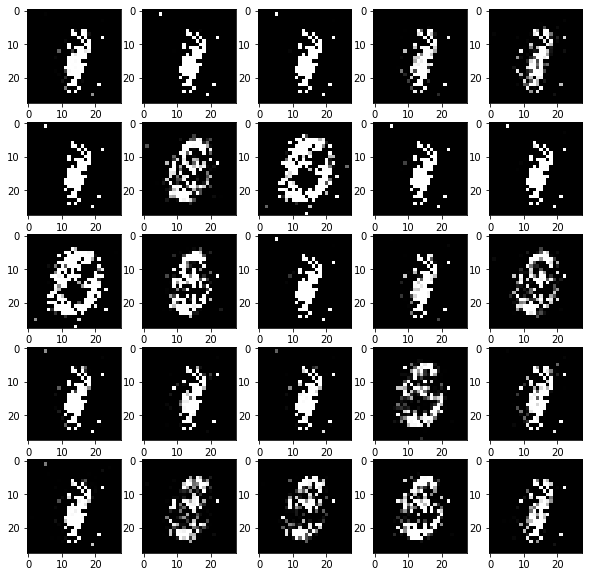

epochs 42


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 12ms/step


  0%|          | 1/273 [00:00<02:14,  2.03it/s]

4/4 [==============================] - 0s 10ms/step


  1%|          | 2/273 [00:00<02:14,  2.01it/s]

4/4 [==============================] - 0s 8ms/step


  1%|          | 3/273 [00:01<02:08,  2.11it/s]

4/4 [==============================] - 0s 12ms/step


  1%|▏         | 4/273 [00:01<02:03,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


  2%|▏         | 5/273 [00:02<01:59,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


  2%|▏         | 6/273 [00:02<02:02,  2.18it/s]

4/4 [==============================] - 0s 10ms/step


  3%|▎         | 7/273 [00:03<02:07,  2.09it/s]

4/4 [==============================] - 0s 11ms/step


  3%|▎         | 8/273 [00:03<02:01,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


  3%|▎         | 9/273 [00:04<02:01,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


  4%|▎         | 10/273 [00:04<02:03,  2.13it/s]

4/4 [==============================] - 0s 12ms/step


  4%|▍         | 11/273 [00:05<02:09,  2.03it/s]

4/4 [==============================] - 0s 10ms/step


  4%|▍         | 12/273 [00:05<02:16,  1.91it/s]

4/4 [==============================] - 0s 10ms/step


  5%|▍         | 13/273 [00:06<02:12,  1.96it/s]

4/4 [==============================] - 0s 14ms/step


  5%|▌         | 14/273 [00:06<02:19,  1.86it/s]

4/4 [==============================] - 0s 15ms/step


  5%|▌         | 15/273 [00:07<02:16,  1.89it/s]

4/4 [==============================] - 0s 13ms/step


  6%|▌         | 16/273 [00:08<02:22,  1.81it/s]

4/4 [==============================] - 0s 16ms/step


  6%|▌         | 17/273 [00:08<02:21,  1.81it/s]

4/4 [==============================] - 0s 8ms/step


  7%|▋         | 18/273 [00:09<02:20,  1.82it/s]

4/4 [==============================] - 0s 9ms/step


  7%|▋         | 19/273 [00:09<02:13,  1.90it/s]

4/4 [==============================] - 0s 10ms/step


  7%|▋         | 20/273 [00:10<02:20,  1.80it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 21/273 [00:10<02:09,  1.94it/s]

4/4 [==============================] - 0s 10ms/step


  8%|▊         | 22/273 [00:11<02:03,  2.03it/s]

4/4 [==============================] - 0s 12ms/step


  8%|▊         | 23/273 [00:11<02:02,  2.05it/s]

4/4 [==============================] - 0s 14ms/step


  9%|▉         | 24/273 [00:12<02:00,  2.06it/s]

4/4 [==============================] - 0s 11ms/step


  9%|▉         | 25/273 [00:12<01:59,  2.08it/s]

4/4 [==============================] - 0s 10ms/step


 10%|▉         | 26/273 [00:12<01:57,  2.09it/s]

4/4 [==============================] - 0s 9ms/step


 10%|▉         | 27/273 [00:13<01:59,  2.06it/s]

4/4 [==============================] - 0s 9ms/step


 10%|█         | 28/273 [00:13<01:52,  2.18it/s]

4/4 [==============================] - 0s 10ms/step


 11%|█         | 29/273 [00:14<01:54,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 11%|█         | 30/273 [00:14<01:51,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 11%|█▏        | 31/273 [00:15<01:54,  2.11it/s]

4/4 [==============================] - 0s 10ms/step


 12%|█▏        | 32/273 [00:15<01:52,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 12%|█▏        | 33/273 [00:16<01:51,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 12%|█▏        | 34/273 [00:16<01:46,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


 13%|█▎        | 35/273 [00:17<01:45,  2.25it/s]

4/4 [==============================] - 0s 11ms/step


 13%|█▎        | 36/273 [00:17<01:43,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▎        | 37/273 [00:17<01:45,  2.24it/s]

4/4 [==============================] - 0s 12ms/step


 14%|█▍        | 38/273 [00:18<01:49,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▍        | 39/273 [00:18<01:44,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 15%|█▍        | 40/273 [00:19<01:41,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 15%|█▌        | 41/273 [00:19<01:44,  2.22it/s]

4/4 [==============================] - 0s 10ms/step


 15%|█▌        | 42/273 [00:20<01:46,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▌        | 43/273 [00:20<01:46,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


 16%|█▌        | 44/273 [00:21<01:55,  1.98it/s]

4/4 [==============================] - 0s 8ms/step


 16%|█▋        | 45/273 [00:21<01:56,  1.96it/s]

4/4 [==============================] - 0s 8ms/step


 17%|█▋        | 46/273 [00:22<01:48,  2.09it/s]

4/4 [==============================] - 0s 9ms/step


 17%|█▋        | 47/273 [00:22<01:42,  2.21it/s]

4/4 [==============================] - 0s 12ms/step


 18%|█▊        | 48/273 [00:23<01:40,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 18%|█▊        | 49/273 [00:23<01:38,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 18%|█▊        | 50/273 [00:23<01:34,  2.35it/s]

4/4 [==============================] - 0s 10ms/step


 19%|█▊        | 51/273 [00:24<01:33,  2.38it/s]

4/4 [==============================] - 0s 9ms/step


 19%|█▉        | 52/273 [00:24<01:39,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 19%|█▉        | 53/273 [00:25<01:40,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 20%|█▉        | 54/273 [00:25<01:42,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


 20%|██        | 55/273 [00:26<01:40,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 21%|██        | 56/273 [00:26<01:38,  2.21it/s]

4/4 [==============================] - 0s 10ms/step


 21%|██        | 57/273 [00:27<01:41,  2.13it/s]

4/4 [==============================] - 0s 14ms/step


 21%|██        | 58/273 [00:27<01:48,  1.98it/s]

4/4 [==============================] - 0s 12ms/step


 22%|██▏       | 59/273 [00:28<01:48,  1.98it/s]

4/4 [==============================] - 0s 11ms/step


 22%|██▏       | 60/273 [00:28<01:47,  1.97it/s]

4/4 [==============================] - 0s 12ms/step


 22%|██▏       | 61/273 [00:29<01:50,  1.92it/s]

4/4 [==============================] - 0s 11ms/step


 23%|██▎       | 62/273 [00:29<01:51,  1.89it/s]

4/4 [==============================] - 0s 14ms/step


 23%|██▎       | 63/273 [00:30<01:55,  1.82it/s]

4/4 [==============================] - 0s 12ms/step


 23%|██▎       | 64/273 [00:30<01:51,  1.87it/s]

4/4 [==============================] - 0s 11ms/step


 24%|██▍       | 65/273 [00:31<01:45,  1.96it/s]

4/4 [==============================] - 0s 8ms/step


 24%|██▍       | 66/273 [00:31<01:39,  2.09it/s]

4/4 [==============================] - 0s 8ms/step


 25%|██▍       | 67/273 [00:32<01:34,  2.19it/s]

4/4 [==============================] - 0s 12ms/step


 25%|██▍       | 68/273 [00:32<01:29,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 25%|██▌       | 69/273 [00:33<01:30,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 26%|██▌       | 70/273 [00:33<01:28,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 26%|██▌       | 71/273 [00:33<01:29,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 26%|██▋       | 72/273 [00:34<01:30,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 27%|██▋       | 73/273 [00:34<01:31,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 27%|██▋       | 74/273 [00:35<01:34,  2.11it/s]

4/4 [==============================] - 0s 8ms/step


 27%|██▋       | 75/273 [00:35<01:35,  2.08it/s]

4/4 [==============================] - 0s 11ms/step


 28%|██▊       | 76/273 [00:36<01:29,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 28%|██▊       | 77/273 [00:36<01:29,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▊       | 78/273 [00:37<01:30,  2.15it/s]

4/4 [==============================] - 0s 11ms/step


 29%|██▉       | 79/273 [00:37<01:31,  2.13it/s]

4/4 [==============================] - 0s 8ms/step


 29%|██▉       | 80/273 [00:38<01:29,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


 30%|██▉       | 81/273 [00:38<01:36,  1.99it/s]

4/4 [==============================] - 0s 8ms/step


 30%|███       | 82/273 [00:39<01:30,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


 30%|███       | 83/273 [00:39<01:32,  2.06it/s]

4/4 [==============================] - 0s 9ms/step


 31%|███       | 84/273 [00:40<01:29,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


 31%|███       | 85/273 [00:40<01:26,  2.18it/s]

4/4 [==============================] - 0s 11ms/step


 32%|███▏      | 86/273 [00:41<01:26,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


 32%|███▏      | 87/273 [00:41<01:27,  2.12it/s]

4/4 [==============================] - 0s 10ms/step


 32%|███▏      | 88/273 [00:41<01:27,  2.10it/s]

4/4 [==============================] - 0s 10ms/step


 33%|███▎      | 89/273 [00:42<01:31,  2.01it/s]

4/4 [==============================] - 0s 8ms/step


 33%|███▎      | 90/273 [00:43<01:28,  2.06it/s]

4/4 [==============================] - 0s 8ms/step


 33%|███▎      | 91/273 [00:43<01:23,  2.17it/s]

4/4 [==============================] - 0s 10ms/step


 34%|███▎      | 92/273 [00:43<01:22,  2.20it/s]

4/4 [==============================] - 0s 12ms/step


 34%|███▍      | 93/273 [00:44<01:32,  1.95it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▍      | 94/273 [00:44<01:30,  1.97it/s]

4/4 [==============================] - 0s 12ms/step


 35%|███▍      | 95/273 [00:45<01:29,  1.99it/s]

4/4 [==============================] - 0s 13ms/step


 35%|███▌      | 96/273 [00:45<01:28,  2.01it/s]

4/4 [==============================] - 0s 8ms/step


 36%|███▌      | 97/273 [00:46<01:26,  2.02it/s]

4/4 [==============================] - 0s 8ms/step


 36%|███▌      | 98/273 [00:46<01:20,  2.16it/s]

4/4 [==============================] - 0s 10ms/step


 36%|███▋      | 99/273 [00:47<01:18,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 100/273 [00:47<01:21,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 101/273 [00:48<01:20,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 102/273 [00:48<01:17,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 38%|███▊      | 103/273 [00:49<01:17,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 38%|███▊      | 104/273 [00:49<01:21,  2.08it/s]

4/4 [==============================] - 0s 8ms/step


 38%|███▊      | 105/273 [00:50<01:17,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 39%|███▉      | 106/273 [00:50<01:16,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 39%|███▉      | 107/273 [00:51<01:17,  2.13it/s]

4/4 [==============================] - 0s 11ms/step


 40%|███▉      | 108/273 [00:51<01:15,  2.19it/s]

4/4 [==============================] - 0s 14ms/step


 40%|███▉      | 109/273 [00:51<01:16,  2.13it/s]

4/4 [==============================] - 0s 20ms/step


 40%|████      | 110/273 [00:52<01:15,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


 41%|████      | 111/273 [00:52<01:11,  2.25it/s]

4/4 [==============================] - 0s 10ms/step


 41%|████      | 112/273 [00:53<01:13,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 41%|████▏     | 113/273 [00:53<01:14,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 42%|████▏     | 114/273 [00:54<01:11,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 42%|████▏     | 115/273 [00:54<01:12,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 42%|████▏     | 116/273 [00:55<01:13,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 43%|████▎     | 117/273 [00:55<01:12,  2.15it/s]

4/4 [==============================] - 0s 13ms/step


 43%|████▎     | 118/273 [00:56<01:16,  2.03it/s]

4/4 [==============================] - 0s 8ms/step


 44%|████▎     | 119/273 [00:56<01:12,  2.13it/s]

4/4 [==============================] - 0s 12ms/step


 44%|████▍     | 120/273 [00:57<01:11,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 44%|████▍     | 121/273 [00:57<01:10,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 45%|████▍     | 122/273 [00:57<01:10,  2.14it/s]

4/4 [==============================] - 0s 10ms/step


 45%|████▌     | 123/273 [00:58<01:07,  2.21it/s]

4/4 [==============================] - 0s 10ms/step


 45%|████▌     | 124/273 [00:58<01:06,  2.25it/s]

4/4 [==============================] - 0s 12ms/step


 46%|████▌     | 125/273 [00:59<01:05,  2.27it/s]

4/4 [==============================] - 0s 10ms/step


 46%|████▌     | 126/273 [00:59<01:07,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 47%|████▋     | 127/273 [01:00<01:06,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 47%|████▋     | 128/273 [01:00<01:06,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 129/273 [01:01<01:05,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 48%|████▊     | 130/273 [01:01<01:04,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 48%|████▊     | 131/273 [01:02<01:06,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 48%|████▊     | 132/273 [01:02<01:03,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 49%|████▊     | 133/273 [01:02<01:00,  2.31it/s]

4/4 [==============================] - 0s 11ms/step


 49%|████▉     | 134/273 [01:03<00:59,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 49%|████▉     | 135/273 [01:03<00:57,  2.39it/s]

4/4 [==============================] - 0s 9ms/step


 50%|████▉     | 136/273 [01:04<00:57,  2.37it/s]

4/4 [==============================] - 0s 9ms/step


 50%|█████     | 137/273 [01:04<01:00,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 51%|█████     | 138/273 [01:05<01:01,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 51%|█████     | 139/273 [01:05<01:00,  2.22it/s]

4/4 [==============================] - 0s 10ms/step


 51%|█████▏    | 140/273 [01:06<01:03,  2.11it/s]

4/4 [==============================] - 0s 8ms/step


 52%|█████▏    | 141/273 [01:06<01:00,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 142/273 [01:06<01:00,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 143/273 [01:07<00:59,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 144/273 [01:07<00:57,  2.24it/s]

4/4 [==============================] - 0s 11ms/step


 53%|█████▎    | 145/273 [01:08<00:59,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


 53%|█████▎    | 146/273 [01:08<00:57,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 54%|█████▍    | 147/273 [01:09<00:57,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 54%|█████▍    | 148/273 [01:09<00:59,  2.11it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▍    | 149/273 [01:10<00:56,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▍    | 150/273 [01:10<00:54,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▌    | 151/273 [01:11<01:00,  2.02it/s]

4/4 [==============================] - 0s 8ms/step


 56%|█████▌    | 152/273 [01:11<00:56,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▌    | 153/273 [01:12<00:55,  2.17it/s]

4/4 [==============================] - 0s 10ms/step


 56%|█████▋    | 154/273 [01:12<00:56,  2.11it/s]

4/4 [==============================] - 0s 9ms/step


 57%|█████▋    | 155/273 [01:12<00:55,  2.13it/s]

4/4 [==============================] - 0s 12ms/step


 57%|█████▋    | 156/273 [01:13<00:54,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 58%|█████▊    | 157/273 [01:13<00:51,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 58%|█████▊    | 158/273 [01:14<00:50,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 58%|█████▊    | 159/273 [01:14<00:49,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 59%|█████▊    | 160/273 [01:15<00:48,  2.34it/s]

4/4 [==============================] - 0s 8ms/step


 59%|█████▉    | 161/273 [01:15<00:49,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


 59%|█████▉    | 162/273 [01:15<00:48,  2.30it/s]

4/4 [==============================] - 0s 8ms/step


 60%|█████▉    | 163/273 [01:16<00:48,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 60%|██████    | 164/273 [01:16<00:46,  2.34it/s]

4/4 [==============================] - 0s 9ms/step


 60%|██████    | 165/273 [01:17<00:46,  2.31it/s]

4/4 [==============================] - 0s 13ms/step


 61%|██████    | 166/273 [01:17<00:48,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 61%|██████    | 167/273 [01:18<00:46,  2.28it/s]

4/4 [==============================] - 0s 11ms/step


 62%|██████▏   | 168/273 [01:18<00:46,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 62%|██████▏   | 169/273 [01:19<00:49,  2.08it/s]

4/4 [==============================] - 0s 9ms/step


 62%|██████▏   | 170/273 [01:19<00:48,  2.10it/s]

4/4 [==============================] - 0s 10ms/step


 63%|██████▎   | 171/273 [01:20<00:48,  2.08it/s]

4/4 [==============================] - 0s 9ms/step


 63%|██████▎   | 172/273 [01:20<00:46,  2.16it/s]

4/4 [==============================] - 0s 10ms/step


 63%|██████▎   | 173/273 [01:21<00:45,  2.20it/s]

4/4 [==============================] - 0s 10ms/step


 64%|██████▎   | 174/273 [01:21<00:44,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 64%|██████▍   | 175/273 [01:21<00:45,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


 64%|██████▍   | 176/273 [01:22<00:43,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 65%|██████▍   | 177/273 [01:22<00:43,  2.22it/s]

4/4 [==============================] - 0s 12ms/step


 65%|██████▌   | 178/273 [01:23<00:43,  2.18it/s]

4/4 [==============================] - 0s 13ms/step


 66%|██████▌   | 179/273 [01:23<00:45,  2.08it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▌   | 180/273 [01:24<00:43,  2.16it/s]

4/4 [==============================] - 0s 11ms/step


 66%|██████▋   | 181/273 [01:24<00:43,  2.13it/s]

4/4 [==============================] - 0s 13ms/step


 67%|██████▋   | 182/273 [01:25<00:44,  2.05it/s]

4/4 [==============================] - 0s 8ms/step


 67%|██████▋   | 183/273 [01:25<00:45,  1.96it/s]

4/4 [==============================] - 0s 12ms/step


 67%|██████▋   | 184/273 [01:26<00:44,  1.98it/s]

4/4 [==============================] - 0s 9ms/step


 68%|██████▊   | 185/273 [01:26<00:46,  1.89it/s]

4/4 [==============================] - 0s 9ms/step


 68%|██████▊   | 186/273 [01:27<00:44,  1.95it/s]

4/4 [==============================] - 0s 9ms/step


 68%|██████▊   | 187/273 [01:27<00:41,  2.06it/s]

4/4 [==============================] - 0s 10ms/step


 69%|██████▉   | 188/273 [01:28<00:40,  2.08it/s]

4/4 [==============================] - 0s 8ms/step


 69%|██████▉   | 189/273 [01:28<00:40,  2.08it/s]

4/4 [==============================] - 0s 8ms/step


 70%|██████▉   | 190/273 [01:29<00:38,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 70%|██████▉   | 191/273 [01:29<00:38,  2.11it/s]

4/4 [==============================] - 0s 10ms/step


 70%|███████   | 192/273 [01:30<00:38,  2.11it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████   | 193/273 [01:30<00:38,  2.09it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████   | 194/273 [01:31<00:36,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████▏  | 195/273 [01:31<00:34,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 72%|███████▏  | 196/273 [01:31<00:33,  2.31it/s]

4/4 [==============================] - 0s 12ms/step


 72%|███████▏  | 197/273 [01:32<00:32,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 73%|███████▎  | 198/273 [01:32<00:33,  2.26it/s]

4/4 [==============================] - 0s 10ms/step


 73%|███████▎  | 199/273 [01:33<00:32,  2.30it/s]

4/4 [==============================] - 0s 10ms/step


 73%|███████▎  | 200/273 [01:33<00:32,  2.27it/s]

4/4 [==============================] - 0s 14ms/step


 74%|███████▎  | 201/273 [01:34<00:34,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▍  | 202/273 [01:34<00:32,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▍  | 203/273 [01:35<00:32,  2.18it/s]

4/4 [==============================] - 0s 11ms/step


 75%|███████▍  | 204/273 [01:35<00:30,  2.24it/s]

4/4 [==============================] - 0s 11ms/step


 75%|███████▌  | 205/273 [01:35<00:29,  2.27it/s]

4/4 [==============================] - 0s 12ms/step


 75%|███████▌  | 206/273 [01:36<00:30,  2.23it/s]

4/4 [==============================] - 0s 10ms/step


 76%|███████▌  | 207/273 [01:36<00:29,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 76%|███████▌  | 208/273 [01:37<00:28,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 209/273 [01:37<00:27,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 210/273 [01:38<00:26,  2.36it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 211/273 [01:38<00:26,  2.32it/s]

4/4 [==============================] - 0s 10ms/step


 78%|███████▊  | 212/273 [01:39<00:27,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 213/273 [01:39<00:27,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 214/273 [01:39<00:26,  2.25it/s]

4/4 [==============================] - 0s 10ms/step


 79%|███████▉  | 215/273 [01:40<00:26,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 79%|███████▉  | 216/273 [01:40<00:25,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 79%|███████▉  | 217/273 [01:41<00:25,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 80%|███████▉  | 218/273 [01:41<00:25,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 80%|████████  | 219/273 [01:42<00:25,  2.15it/s]

4/4 [==============================] - 0s 11ms/step


 81%|████████  | 220/273 [01:42<00:23,  2.23it/s]

4/4 [==============================] - 0s 10ms/step


 81%|████████  | 221/273 [01:43<00:23,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 81%|████████▏ | 222/273 [01:43<00:23,  2.18it/s]

4/4 [==============================] - 0s 12ms/step


 82%|████████▏ | 223/273 [01:44<00:22,  2.18it/s]

4/4 [==============================] - 0s 10ms/step


 82%|████████▏ | 224/273 [01:44<00:22,  2.20it/s]

4/4 [==============================] - 0s 20ms/step


 82%|████████▏ | 225/273 [01:44<00:21,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 83%|████████▎ | 226/273 [01:45<00:21,  2.19it/s]

4/4 [==============================] - 0s 11ms/step


 83%|████████▎ | 227/273 [01:45<00:21,  2.10it/s]

4/4 [==============================] - 0s 8ms/step


 84%|████████▎ | 228/273 [01:46<00:20,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▍ | 229/273 [01:46<00:19,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▍ | 230/273 [01:47<00:19,  2.19it/s]

4/4 [==============================] - 0s 10ms/step


 85%|████████▍ | 231/273 [01:47<00:18,  2.26it/s]

4/4 [==============================] - 0s 10ms/step


 85%|████████▍ | 232/273 [01:48<00:17,  2.29it/s]

4/4 [==============================] - 0s 11ms/step


 85%|████████▌ | 233/273 [01:48<00:17,  2.31it/s]

4/4 [==============================] - 0s 8ms/step


 86%|████████▌ | 234/273 [01:48<00:17,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▌ | 235/273 [01:49<00:16,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▋ | 236/273 [01:49<00:16,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 87%|████████▋ | 237/273 [01:50<00:15,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 87%|████████▋ | 238/273 [01:50<00:15,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 88%|████████▊ | 239/273 [01:51<00:15,  2.16it/s]

4/4 [==============================] - 0s 10ms/step


 88%|████████▊ | 240/273 [01:51<00:15,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 88%|████████▊ | 241/273 [01:52<00:14,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▊ | 242/273 [01:52<00:14,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▉ | 243/273 [01:53<00:13,  2.19it/s]

4/4 [==============================] - 0s 10ms/step


 89%|████████▉ | 244/273 [01:53<00:13,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 90%|████████▉ | 245/273 [01:53<00:12,  2.19it/s]

4/4 [==============================] - 0s 10ms/step


 90%|█████████ | 246/273 [01:54<00:12,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 90%|█████████ | 247/273 [01:54<00:11,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 91%|█████████ | 248/273 [01:55<00:10,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 91%|█████████ | 249/273 [01:55<00:11,  2.10it/s]

4/4 [==============================] - 0s 11ms/step


 92%|█████████▏| 250/273 [01:56<00:11,  2.08it/s]

4/4 [==============================] - 0s 10ms/step


 92%|█████████▏| 251/273 [01:56<00:10,  2.18it/s]

4/4 [==============================] - 0s 13ms/step


 92%|█████████▏| 252/273 [01:57<00:10,  1.98it/s]

4/4 [==============================] - 0s 9ms/step


 93%|█████████▎| 253/273 [01:57<00:09,  2.06it/s]

4/4 [==============================] - 0s 9ms/step


 93%|█████████▎| 254/273 [01:58<00:09,  2.09it/s]

4/4 [==============================] - 0s 10ms/step


 93%|█████████▎| 255/273 [01:58<00:08,  2.14it/s]

4/4 [==============================] - 0s 11ms/step


 94%|█████████▍| 256/273 [01:59<00:08,  2.10it/s]

4/4 [==============================] - 0s 8ms/step


 94%|█████████▍| 257/273 [01:59<00:07,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 95%|█████████▍| 258/273 [02:00<00:06,  2.23it/s]

4/4 [==============================] - 0s 11ms/step


 95%|█████████▍| 259/273 [02:00<00:06,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▌| 260/273 [02:00<00:05,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 96%|█████████▌| 261/273 [02:01<00:05,  2.24it/s]

4/4 [==============================] - 0s 16ms/step


 96%|█████████▌| 262/273 [02:01<00:05,  2.19it/s]

4/4 [==============================] - 0s 10ms/step


 96%|█████████▋| 263/273 [02:02<00:04,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 264/273 [02:02<00:04,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 265/273 [02:03<00:03,  2.27it/s]

4/4 [==============================] - 0s 10ms/step


 97%|█████████▋| 266/273 [02:03<00:03,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 98%|█████████▊| 267/273 [02:04<00:02,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 98%|█████████▊| 268/273 [02:04<00:02,  2.24it/s]

4/4 [==============================] - 0s 14ms/step


 99%|█████████▊| 269/273 [02:05<00:01,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 99%|█████████▉| 270/273 [02:05<00:01,  2.10it/s]

4/4 [==============================] - 0s 8ms/step


 99%|█████████▉| 271/273 [02:05<00:00,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


100%|█████████▉| 272/273 [02:06<00:00,  2.11it/s]

4/4 [==============================] - 0s 10ms/step


100%|██████████| 273/273 [02:06<00:00,  2.15it/s]


loss is 1.0298442703060573e-06 |*| 31.518836975097656
1/1 [==============================] - 0s 26ms/step


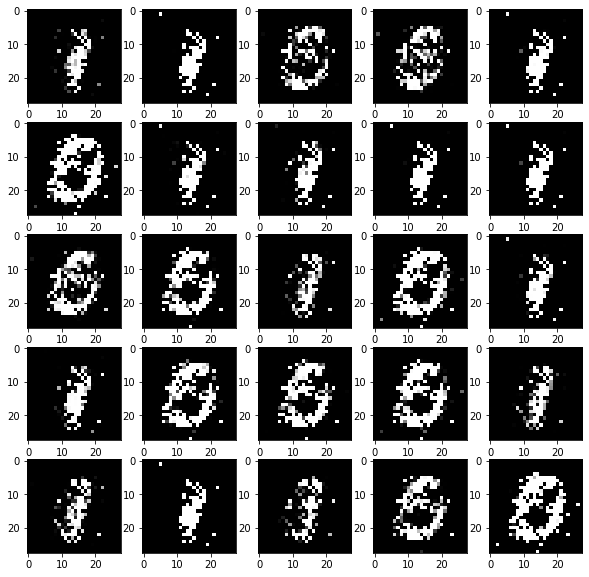

epochs 43


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 8ms/step


  0%|          | 1/273 [00:00<02:13,  2.03it/s]

4/4 [==============================] - 0s 7ms/step


  1%|          | 2/273 [00:00<02:08,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


  1%|          | 3/273 [00:01<02:05,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


  1%|▏         | 4/273 [00:01<02:07,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


  2%|▏         | 5/273 [00:02<02:04,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


  2%|▏         | 6/273 [00:02<01:59,  2.24it/s]

4/4 [==============================] - 0s 10ms/step


  3%|▎         | 7/273 [00:03<02:00,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


  3%|▎         | 8/273 [00:03<01:56,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


  3%|▎         | 9/273 [00:04<01:54,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


  4%|▎         | 10/273 [00:04<01:57,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


  4%|▍         | 11/273 [00:04<01:55,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


  4%|▍         | 12/273 [00:05<01:51,  2.33it/s]

4/4 [==============================] - 0s 10ms/step


  5%|▍         | 13/273 [00:05<01:51,  2.33it/s]

4/4 [==============================] - 0s 8ms/step


  5%|▌         | 14/273 [00:06<01:50,  2.35it/s]

4/4 [==============================] - 0s 15ms/step


  5%|▌         | 15/273 [00:06<01:55,  2.24it/s]

4/4 [==============================] - 0s 11ms/step


  6%|▌         | 16/273 [00:07<01:58,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


  6%|▌         | 17/273 [00:07<01:58,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


  7%|▋         | 18/273 [00:08<01:56,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


  7%|▋         | 19/273 [00:08<02:09,  1.97it/s]

4/4 [==============================] - 0s 9ms/step


  7%|▋         | 20/273 [00:09<02:07,  1.99it/s]

4/4 [==============================] - 0s 8ms/step


  8%|▊         | 21/273 [00:09<02:03,  2.04it/s]

4/4 [==============================] - 0s 8ms/step


  8%|▊         | 22/273 [00:10<01:56,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 23/273 [00:10<01:55,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


  9%|▉         | 24/273 [00:11<01:55,  2.16it/s]

4/4 [==============================] - 0s 12ms/step


  9%|▉         | 25/273 [00:11<02:00,  2.06it/s]

4/4 [==============================] - 0s 10ms/step


 10%|▉         | 26/273 [00:12<01:59,  2.07it/s]

4/4 [==============================] - 0s 11ms/step


 10%|▉         | 27/273 [00:12<02:06,  1.95it/s]

4/4 [==============================] - 0s 11ms/step


 10%|█         | 28/273 [00:13<02:05,  1.95it/s]

4/4 [==============================] - 0s 22ms/step


 11%|█         | 29/273 [00:13<02:12,  1.84it/s]

4/4 [==============================] - 0s 11ms/step


 11%|█         | 30/273 [00:14<02:07,  1.90it/s]

4/4 [==============================] - 0s 11ms/step


 11%|█▏        | 31/273 [00:14<02:05,  1.93it/s]

4/4 [==============================] - 0s 10ms/step


 12%|█▏        | 32/273 [00:15<02:04,  1.93it/s]

4/4 [==============================] - 0s 13ms/step


 12%|█▏        | 33/273 [00:15<02:10,  1.84it/s]

4/4 [==============================] - 0s 9ms/step


 12%|█▏        | 34/273 [00:16<02:04,  1.92it/s]

4/4 [==============================] - 0s 10ms/step


 13%|█▎        | 35/273 [00:16<01:56,  2.04it/s]

4/4 [==============================] - 0s 8ms/step


 13%|█▎        | 36/273 [00:17<01:54,  2.07it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▎        | 37/273 [00:17<01:50,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▍        | 38/273 [00:18<01:53,  2.08it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▍        | 39/273 [00:18<01:53,  2.05it/s]

4/4 [==============================] - 0s 9ms/step


 15%|█▍        | 40/273 [00:19<01:47,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 15%|█▌        | 41/273 [00:19<01:47,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 15%|█▌        | 42/273 [00:19<01:42,  2.26it/s]

4/4 [==============================] - 0s 10ms/step


 16%|█▌        | 43/273 [00:20<01:39,  2.30it/s]

4/4 [==============================] - 0s 10ms/step


 16%|█▌        | 44/273 [00:20<01:38,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▋        | 45/273 [00:21<01:40,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 17%|█▋        | 46/273 [00:21<01:38,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 17%|█▋        | 47/273 [00:22<01:38,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 18%|█▊        | 48/273 [00:22<01:38,  2.28it/s]

4/4 [==============================] - 0s 10ms/step


 18%|█▊        | 49/273 [00:22<01:37,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 18%|█▊        | 50/273 [00:23<01:39,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 19%|█▊        | 51/273 [00:23<01:41,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 19%|█▉        | 52/273 [00:24<01:45,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


 19%|█▉        | 53/273 [00:24<01:41,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 20%|█▉        | 54/273 [00:25<01:44,  2.10it/s]

4/4 [==============================] - 0s 8ms/step


 20%|██        | 55/273 [00:25<01:41,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 21%|██        | 56/273 [00:26<01:38,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 21%|██        | 57/273 [00:26<01:41,  2.12it/s]

4/4 [==============================] - 0s 8ms/step


 21%|██        | 58/273 [00:27<01:40,  2.14it/s]

4/4 [==============================] - 0s 11ms/step


 22%|██▏       | 59/273 [00:27<01:39,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


 22%|██▏       | 60/273 [00:28<01:47,  1.99it/s]

4/4 [==============================] - 0s 10ms/step


 22%|██▏       | 61/273 [00:28<01:46,  1.99it/s]

4/4 [==============================] - 0s 8ms/step


 23%|██▎       | 62/273 [00:29<01:43,  2.04it/s]

4/4 [==============================] - 0s 9ms/step


 23%|██▎       | 63/273 [00:29<01:41,  2.06it/s]

4/4 [==============================] - 0s 9ms/step


 23%|██▎       | 64/273 [00:30<01:36,  2.17it/s]

4/4 [==============================] - 0s 10ms/step


 24%|██▍       | 65/273 [00:30<01:41,  2.04it/s]

4/4 [==============================] - 0s 15ms/step


 24%|██▍       | 66/273 [00:31<01:44,  1.98it/s]

4/4 [==============================] - 0s 12ms/step


 25%|██▍       | 67/273 [00:31<01:45,  1.94it/s]

4/4 [==============================] - 0s 12ms/step


 25%|██▍       | 68/273 [00:32<01:45,  1.94it/s]

4/4 [==============================] - 0s 10ms/step


 25%|██▌       | 69/273 [00:32<01:46,  1.91it/s]

4/4 [==============================] - 0s 13ms/step


 26%|██▌       | 70/273 [00:33<01:45,  1.93it/s]

4/4 [==============================] - 0s 13ms/step


 26%|██▌       | 71/273 [00:33<01:43,  1.96it/s]

4/4 [==============================] - 0s 14ms/step


 26%|██▋       | 72/273 [00:34<01:44,  1.93it/s]

4/4 [==============================] - 0s 10ms/step


 27%|██▋       | 73/273 [00:34<01:41,  1.96it/s]

4/4 [==============================] - 0s 10ms/step


 27%|██▋       | 74/273 [00:35<01:37,  2.04it/s]

4/4 [==============================] - 0s 8ms/step


 27%|██▋       | 75/273 [00:35<01:37,  2.04it/s]

4/4 [==============================] - 0s 9ms/step


 28%|██▊       | 76/273 [00:36<01:32,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 28%|██▊       | 77/273 [00:36<01:32,  2.12it/s]

4/4 [==============================] - 0s 8ms/step


 29%|██▊       | 78/273 [00:37<01:40,  1.94it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▉       | 79/273 [00:37<01:37,  2.00it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▉       | 80/273 [00:38<01:32,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


 30%|██▉       | 81/273 [00:38<01:30,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 30%|███       | 82/273 [00:39<01:30,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


 30%|███       | 83/273 [00:39<01:29,  2.11it/s]

4/4 [==============================] - 0s 9ms/step


 31%|███       | 84/273 [00:40<01:29,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 31%|███       | 85/273 [00:40<01:25,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 32%|███▏      | 86/273 [00:40<01:22,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 32%|███▏      | 87/273 [00:41<01:24,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 32%|███▏      | 88/273 [00:41<01:27,  2.11it/s]

4/4 [==============================] - 0s 10ms/step


 33%|███▎      | 89/273 [00:42<01:28,  2.09it/s]

4/4 [==============================] - 0s 8ms/step


 33%|███▎      | 90/273 [00:42<01:23,  2.19it/s]

4/4 [==============================] - 0s 10ms/step


 33%|███▎      | 91/273 [00:43<01:24,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


 34%|███▎      | 92/273 [00:43<01:23,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


 34%|███▍      | 93/273 [00:44<01:23,  2.16it/s]

4/4 [==============================] - 0s 11ms/step


 34%|███▍      | 94/273 [00:44<01:20,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 35%|███▍      | 95/273 [00:44<01:18,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 35%|███▌      | 96/273 [00:45<01:18,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▌      | 97/273 [00:45<01:16,  2.31it/s]

4/4 [==============================] - 0s 10ms/step


 36%|███▌      | 98/273 [00:46<01:21,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▋      | 99/273 [00:46<01:21,  2.13it/s]

4/4 [==============================] - 0s 12ms/step


 37%|███▋      | 100/273 [00:47<01:18,  2.22it/s]

4/4 [==============================] - 0s 14ms/step


 37%|███▋      | 101/273 [00:47<01:19,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 102/273 [00:48<01:20,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 38%|███▊      | 103/273 [00:48<01:21,  2.09it/s]

4/4 [==============================] - 0s 11ms/step


 38%|███▊      | 104/273 [00:49<01:19,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 38%|███▊      | 105/273 [00:49<01:16,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 39%|███▉      | 106/273 [00:50<01:16,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 39%|███▉      | 107/273 [00:50<01:17,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 40%|███▉      | 108/273 [00:51<01:15,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 40%|███▉      | 109/273 [00:51<01:11,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 40%|████      | 110/273 [00:51<01:11,  2.27it/s]

4/4 [==============================] - 0s 11ms/step


 41%|████      | 111/273 [00:52<01:15,  2.16it/s]

4/4 [==============================] - 0s 11ms/step


 41%|████      | 112/273 [00:52<01:12,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 41%|████▏     | 113/273 [00:53<01:11,  2.23it/s]

4/4 [==============================] - 0s 14ms/step


 42%|████▏     | 114/273 [00:53<01:11,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 42%|████▏     | 115/273 [00:54<01:11,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 42%|████▏     | 116/273 [00:54<01:18,  2.01it/s]

4/4 [==============================] - 0s 10ms/step


 43%|████▎     | 117/273 [00:55<01:16,  2.03it/s]

4/4 [==============================] - 0s 9ms/step


 43%|████▎     | 118/273 [00:55<01:15,  2.06it/s]

4/4 [==============================] - 0s 10ms/step


 44%|████▎     | 119/273 [00:56<01:15,  2.03it/s]

4/4 [==============================] - 0s 10ms/step


 44%|████▍     | 120/273 [00:56<01:13,  2.07it/s]

4/4 [==============================] - 0s 9ms/step


 44%|████▍     | 121/273 [00:57<01:12,  2.09it/s]

4/4 [==============================] - 0s 8ms/step


 45%|████▍     | 122/273 [00:57<01:09,  2.16it/s]

4/4 [==============================] - 0s 11ms/step


 45%|████▌     | 123/273 [00:58<01:09,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 45%|████▌     | 124/273 [00:58<01:07,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 46%|████▌     | 125/273 [00:58<01:07,  2.20it/s]

4/4 [==============================] - 0s 10ms/step


 46%|████▌     | 126/273 [00:59<01:13,  2.01it/s]

4/4 [==============================] - 0s 10ms/step


 47%|████▋     | 127/273 [00:59<01:11,  2.05it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 128/273 [01:00<01:09,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 129/273 [01:00<01:07,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 48%|████▊     | 130/273 [01:01<01:08,  2.09it/s]

4/4 [==============================] - 0s 9ms/step


 48%|████▊     | 131/273 [01:01<01:05,  2.17it/s]

4/4 [==============================] - 0s 14ms/step


 48%|████▊     | 132/273 [01:02<01:05,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 49%|████▊     | 133/273 [01:02<01:04,  2.18it/s]

4/4 [==============================] - 0s 16ms/step


 49%|████▉     | 134/273 [01:03<01:06,  2.09it/s]

4/4 [==============================] - 0s 9ms/step


 49%|████▉     | 135/273 [01:03<01:06,  2.07it/s]

4/4 [==============================] - 0s 10ms/step


 50%|████▉     | 136/273 [01:04<01:07,  2.04it/s]

4/4 [==============================] - 0s 9ms/step


 50%|█████     | 137/273 [01:04<01:06,  2.04it/s]

4/4 [==============================] - 0s 12ms/step


 51%|█████     | 138/273 [01:05<01:04,  2.08it/s]

4/4 [==============================] - 0s 10ms/step


 51%|█████     | 139/273 [01:05<01:05,  2.06it/s]

4/4 [==============================] - 0s 9ms/step


 51%|█████▏    | 140/273 [01:06<01:01,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 141/273 [01:06<01:00,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 142/273 [01:07<01:02,  2.09it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 143/273 [01:07<01:00,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


 53%|█████▎    | 144/273 [01:07<00:57,  2.25it/s]

4/4 [==============================] - 0s 13ms/step


 53%|█████▎    | 145/273 [01:08<00:58,  2.19it/s]

4/4 [==============================] - 0s 10ms/step


 53%|█████▎    | 146/273 [01:08<00:58,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 54%|█████▍    | 147/273 [01:09<00:57,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 54%|█████▍    | 148/273 [01:09<00:56,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▍    | 149/273 [01:10<00:57,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▍    | 150/273 [01:10<00:55,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▌    | 151/273 [01:11<00:54,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▌    | 152/273 [01:11<00:54,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 56%|█████▌    | 153/273 [01:11<00:53,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▋    | 154/273 [01:12<00:53,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 57%|█████▋    | 155/273 [01:12<00:52,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 57%|█████▋    | 156/273 [01:13<00:51,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 58%|█████▊    | 157/273 [01:13<00:50,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 58%|█████▊    | 158/273 [01:14<00:49,  2.32it/s]

4/4 [==============================] - 0s 11ms/step


 58%|█████▊    | 159/273 [01:14<00:49,  2.32it/s]

4/4 [==============================] - 0s 8ms/step


 59%|█████▊    | 160/273 [01:14<00:47,  2.36it/s]

4/4 [==============================] - 0s 10ms/step


 59%|█████▉    | 161/273 [01:15<00:48,  2.30it/s]

4/4 [==============================] - 0s 8ms/step


 59%|█████▉    | 162/273 [01:15<00:49,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 60%|█████▉    | 163/273 [01:16<00:51,  2.12it/s]

4/4 [==============================] - 0s 10ms/step


 60%|██████    | 164/273 [01:16<00:49,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 60%|██████    | 165/273 [01:17<00:48,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 61%|██████    | 166/273 [01:17<00:48,  2.22it/s]

4/4 [==============================] - 0s 10ms/step


 61%|██████    | 167/273 [01:18<00:47,  2.25it/s]

4/4 [==============================] - 0s 10ms/step


 62%|██████▏   | 168/273 [01:18<00:48,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 62%|██████▏   | 169/273 [01:19<00:49,  2.11it/s]

4/4 [==============================] - 0s 13ms/step


 62%|██████▏   | 170/273 [01:19<00:47,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


 63%|██████▎   | 171/273 [01:20<00:46,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 63%|██████▎   | 172/273 [01:20<00:45,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 63%|██████▎   | 173/273 [01:21<00:46,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 64%|██████▎   | 174/273 [01:21<00:46,  2.15it/s]

4/4 [==============================] - 0s 11ms/step


 64%|██████▍   | 175/273 [01:21<00:43,  2.25it/s]

4/4 [==============================] - 0s 12ms/step


 64%|██████▍   | 176/273 [01:22<00:46,  2.10it/s]

4/4 [==============================] - 0s 8ms/step


 65%|██████▍   | 177/273 [01:22<00:44,  2.15it/s]

4/4 [==============================] - 0s 12ms/step


 65%|██████▌   | 178/273 [01:23<00:43,  2.19it/s]

4/4 [==============================] - 0s 19ms/step


 66%|██████▌   | 179/273 [01:23<00:44,  2.14it/s]

4/4 [==============================] - 0s 10ms/step


 66%|██████▌   | 180/273 [01:24<00:44,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▋   | 181/273 [01:24<00:42,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 67%|██████▋   | 182/273 [01:25<00:42,  2.15it/s]

4/4 [==============================] - 0s 13ms/step


 67%|██████▋   | 183/273 [01:25<00:43,  2.06it/s]

4/4 [==============================] - 0s 8ms/step


 67%|██████▋   | 184/273 [01:26<00:42,  2.09it/s]

4/4 [==============================] - 0s 8ms/step


 68%|██████▊   | 185/273 [01:26<00:40,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 68%|██████▊   | 186/273 [01:27<00:40,  2.15it/s]

4/4 [==============================] - 0s 10ms/step


 68%|██████▊   | 187/273 [01:27<00:38,  2.23it/s]

4/4 [==============================] - 0s 14ms/step


 69%|██████▉   | 188/273 [01:27<00:37,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


 69%|██████▉   | 189/273 [01:28<00:40,  2.09it/s]

4/4 [==============================] - 0s 10ms/step


 70%|██████▉   | 190/273 [01:28<00:38,  2.17it/s]

4/4 [==============================] - 0s 10ms/step


 70%|██████▉   | 191/273 [01:29<00:37,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


 70%|███████   | 192/273 [01:29<00:35,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████   | 193/273 [01:30<00:35,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 71%|███████   | 194/273 [01:30<00:34,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 71%|███████▏  | 195/273 [01:31<00:33,  2.35it/s]

4/4 [==============================] - 0s 14ms/step


 72%|███████▏  | 196/273 [01:31<00:34,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


 72%|███████▏  | 197/273 [01:31<00:33,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 73%|███████▎  | 198/273 [01:32<00:33,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 73%|███████▎  | 199/273 [01:32<00:33,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 73%|███████▎  | 200/273 [01:33<00:32,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▎  | 201/273 [01:33<00:32,  2.25it/s]

4/4 [==============================] - 0s 11ms/step


 74%|███████▍  | 202/273 [01:34<00:33,  2.14it/s]

4/4 [==============================] - 0s 10ms/step


 74%|███████▍  | 203/273 [01:34<00:31,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 75%|███████▍  | 204/273 [01:35<00:30,  2.27it/s]

4/4 [==============================] - 0s 13ms/step


 75%|███████▌  | 205/273 [01:35<00:29,  2.31it/s]

4/4 [==============================] - 0s 10ms/step


 75%|███████▌  | 206/273 [01:35<00:28,  2.32it/s]

4/4 [==============================] - 0s 10ms/step


 76%|███████▌  | 207/273 [01:36<00:32,  2.06it/s]

4/4 [==============================] - 0s 10ms/step


 76%|███████▌  | 208/273 [01:37<00:32,  2.02it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 209/273 [01:37<00:31,  2.03it/s]

4/4 [==============================] - 0s 8ms/step


 77%|███████▋  | 210/273 [01:38<00:31,  2.01it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 211/273 [01:38<00:29,  2.07it/s]

4/4 [==============================] - 0s 10ms/step


 78%|███████▊  | 212/273 [01:38<00:29,  2.10it/s]

4/4 [==============================] - 0s 8ms/step


 78%|███████▊  | 213/273 [01:39<00:28,  2.08it/s]

4/4 [==============================] - 0s 10ms/step


 78%|███████▊  | 214/273 [01:39<00:29,  2.02it/s]

4/4 [==============================] - 0s 9ms/step


 79%|███████▉  | 215/273 [01:40<00:28,  2.06it/s]

4/4 [==============================] - 0s 8ms/step


 79%|███████▉  | 216/273 [01:40<00:26,  2.11it/s]

4/4 [==============================] - 0s 8ms/step


 79%|███████▉  | 217/273 [01:41<00:26,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


 80%|███████▉  | 218/273 [01:41<00:25,  2.19it/s]

4/4 [==============================] - 0s 14ms/step


 80%|████████  | 219/273 [01:42<00:24,  2.23it/s]

4/4 [==============================] - 0s 10ms/step


 81%|████████  | 220/273 [01:42<00:24,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 81%|████████  | 221/273 [01:43<00:23,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 81%|████████▏ | 222/273 [01:43<00:21,  2.33it/s]

4/4 [==============================] - 0s 8ms/step


 82%|████████▏ | 223/273 [01:43<00:22,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 82%|████████▏ | 224/273 [01:44<00:21,  2.23it/s]

4/4 [==============================] - 0s 10ms/step


 82%|████████▏ | 225/273 [01:44<00:21,  2.26it/s]

4/4 [==============================] - 0s 10ms/step


 83%|████████▎ | 226/273 [01:45<00:20,  2.32it/s]

4/4 [==============================] - 0s 9ms/step


 83%|████████▎ | 227/273 [01:45<00:19,  2.34it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▎ | 228/273 [01:46<00:21,  2.06it/s]

4/4 [==============================] - 0s 8ms/step


 84%|████████▍ | 229/273 [01:46<00:20,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▍ | 230/273 [01:47<00:19,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 85%|████████▍ | 231/273 [01:47<00:19,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 85%|████████▍ | 232/273 [01:48<00:19,  2.09it/s]

4/4 [==============================] - 0s 11ms/step


 85%|████████▌ | 233/273 [01:48<00:19,  2.06it/s]

4/4 [==============================] - 0s 11ms/step


 86%|████████▌ | 234/273 [01:49<00:18,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▌ | 235/273 [01:49<00:17,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▋ | 236/273 [01:49<00:16,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 87%|████████▋ | 237/273 [01:50<00:16,  2.14it/s]

4/4 [==============================] - 0s 12ms/step


 87%|████████▋ | 238/273 [01:50<00:16,  2.11it/s]

4/4 [==============================] - 0s 8ms/step


 88%|████████▊ | 239/273 [01:51<00:17,  1.93it/s]

4/4 [==============================] - 0s 8ms/step


 88%|████████▊ | 240/273 [01:51<00:16,  2.05it/s]

4/4 [==============================] - 0s 14ms/step


 88%|████████▊ | 241/273 [01:52<00:16,  1.96it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▊ | 242/273 [01:53<00:15,  1.94it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▉ | 243/273 [01:53<00:14,  2.05it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▉ | 244/273 [01:53<00:13,  2.15it/s]

4/4 [==============================] - 0s 12ms/step


 90%|████████▉ | 245/273 [01:54<00:13,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 90%|█████████ | 246/273 [01:54<00:12,  2.11it/s]

4/4 [==============================] - 0s 12ms/step


 90%|█████████ | 247/273 [01:55<00:11,  2.17it/s]

4/4 [==============================] - 0s 10ms/step


 91%|█████████ | 248/273 [01:55<00:11,  2.15it/s]

4/4 [==============================] - 0s 10ms/step


 91%|█████████ | 249/273 [01:56<00:11,  2.13it/s]

4/4 [==============================] - 0s 10ms/step


 92%|█████████▏| 250/273 [01:56<00:10,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 92%|█████████▏| 251/273 [01:57<00:10,  2.09it/s]

4/4 [==============================] - 0s 9ms/step


 92%|█████████▏| 252/273 [01:57<00:10,  2.04it/s]

4/4 [==============================] - 0s 9ms/step


 93%|█████████▎| 253/273 [01:58<00:09,  2.04it/s]

4/4 [==============================] - 0s 13ms/step


 93%|█████████▎| 254/273 [01:58<00:09,  2.03it/s]

4/4 [==============================] - 0s 12ms/step


 93%|█████████▎| 255/273 [01:59<00:08,  2.06it/s]

4/4 [==============================] - 0s 15ms/step


 94%|█████████▍| 256/273 [01:59<00:07,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 94%|█████████▍| 257/273 [02:00<00:07,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 95%|█████████▍| 258/273 [02:00<00:06,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▍| 259/273 [02:00<00:06,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 95%|█████████▌| 260/273 [02:01<00:05,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 96%|█████████▌| 261/273 [02:01<00:05,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 96%|█████████▌| 262/273 [02:02<00:04,  2.24it/s]

4/4 [==============================] - 0s 10ms/step


 96%|█████████▋| 263/273 [02:02<00:04,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 97%|█████████▋| 264/273 [02:03<00:04,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


 97%|█████████▋| 265/273 [02:03<00:03,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 266/273 [02:04<00:03,  2.20it/s]

4/4 [==============================] - 0s 11ms/step


 98%|█████████▊| 267/273 [02:04<00:02,  2.03it/s]

4/4 [==============================] - 0s 10ms/step


 98%|█████████▊| 268/273 [02:05<00:02,  2.11it/s]

4/4 [==============================] - 0s 9ms/step


 99%|█████████▊| 269/273 [02:05<00:01,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 99%|█████████▉| 270/273 [02:06<00:01,  2.11it/s]

4/4 [==============================] - 0s 14ms/step


 99%|█████████▉| 271/273 [02:06<00:01,  1.98it/s]

4/4 [==============================] - 0s 9ms/step


100%|█████████▉| 272/273 [02:07<00:00,  2.02it/s]

4/4 [==============================] - 0s 9ms/step


100%|██████████| 273/273 [02:07<00:00,  2.14it/s]


loss is 3.284592935415276e-07 |*| 34.56972122192383
1/1 [==============================] - 0s 29ms/step


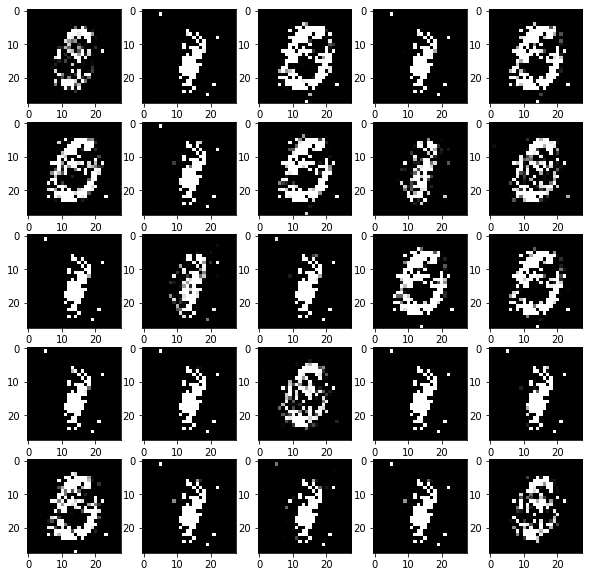

epochs 44


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 9ms/step


  0%|          | 1/273 [00:00<02:09,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


  1%|          | 2/273 [00:00<02:12,  2.05it/s]

4/4 [==============================] - 0s 9ms/step


  1%|          | 3/273 [00:01<02:07,  2.11it/s]

4/4 [==============================] - 0s 9ms/step


  1%|▏         | 4/273 [00:01<02:00,  2.24it/s]

4/4 [==============================] - 0s 11ms/step


  2%|▏         | 5/273 [00:02<02:00,  2.23it/s]

4/4 [==============================] - 0s 12ms/step


  2%|▏         | 6/273 [00:02<02:01,  2.19it/s]

4/4 [==============================] - 0s 19ms/step


  3%|▎         | 7/273 [00:03<02:03,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


  3%|▎         | 8/273 [00:03<02:04,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


  3%|▎         | 9/273 [00:04<02:01,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


  4%|▎         | 10/273 [00:04<02:00,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


  4%|▍         | 11/273 [00:05<02:02,  2.14it/s]

4/4 [==============================] - 0s 10ms/step


  4%|▍         | 12/273 [00:05<02:00,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


  5%|▍         | 13/273 [00:06<02:02,  2.13it/s]

4/4 [==============================] - 0s 10ms/step


  5%|▌         | 14/273 [00:06<02:08,  2.01it/s]

4/4 [==============================] - 0s 9ms/step


  5%|▌         | 15/273 [00:07<02:07,  2.03it/s]

4/4 [==============================] - 0s 10ms/step


  6%|▌         | 16/273 [00:07<02:01,  2.11it/s]

4/4 [==============================] - 0s 10ms/step


  6%|▌         | 17/273 [00:07<01:59,  2.15it/s]

4/4 [==============================] - 0s 14ms/step


  7%|▋         | 18/273 [00:08<01:59,  2.13it/s]

4/4 [==============================] - 0s 12ms/step


  7%|▋         | 19/273 [00:08<02:00,  2.11it/s]

4/4 [==============================] - 0s 12ms/step


  7%|▋         | 20/273 [00:09<02:04,  2.04it/s]

4/4 [==============================] - 0s 8ms/step


  8%|▊         | 21/273 [00:09<01:58,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 22/273 [00:10<01:58,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 23/273 [00:10<01:56,  2.15it/s]

4/4 [==============================] - 0s 10ms/step


  9%|▉         | 24/273 [00:11<01:56,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


  9%|▉         | 25/273 [00:11<01:53,  2.18it/s]

4/4 [==============================] - 0s 10ms/step


 10%|▉         | 26/273 [00:12<01:52,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 10%|▉         | 27/273 [00:12<01:53,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


 10%|█         | 28/273 [00:13<01:51,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 11%|█         | 29/273 [00:13<01:50,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 11%|█         | 30/273 [00:13<01:47,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 11%|█▏        | 31/273 [00:14<01:46,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 12%|█▏        | 32/273 [00:14<01:45,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 12%|█▏        | 33/273 [00:15<01:46,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 12%|█▏        | 34/273 [00:15<01:49,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 13%|█▎        | 35/273 [00:16<01:51,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


 13%|█▎        | 36/273 [00:16<01:47,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 14%|█▎        | 37/273 [00:17<01:49,  2.16it/s]

4/4 [==============================] - 0s 13ms/step


 14%|█▍        | 38/273 [00:17<01:57,  1.99it/s]

4/4 [==============================] - 0s 11ms/step


 14%|█▍        | 39/273 [00:18<02:10,  1.80it/s]

4/4 [==============================] - 0s 15ms/step


 15%|█▍        | 40/273 [00:19<02:12,  1.76it/s]

4/4 [==============================] - 0s 8ms/step


 15%|█▌        | 41/273 [00:19<02:10,  1.78it/s]

4/4 [==============================] - 0s 16ms/step


 15%|█▌        | 42/273 [00:20<02:21,  1.64it/s]

4/4 [==============================] - 0s 13ms/step


 16%|█▌        | 43/273 [00:20<02:14,  1.70it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▌        | 44/273 [00:21<02:07,  1.80it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▋        | 45/273 [00:21<01:58,  1.93it/s]

4/4 [==============================] - 0s 9ms/step


 17%|█▋        | 46/273 [00:22<01:51,  2.04it/s]

4/4 [==============================] - 0s 9ms/step


 17%|█▋        | 47/273 [00:22<01:49,  2.06it/s]

4/4 [==============================] - 0s 8ms/step


 18%|█▊        | 48/273 [00:23<01:49,  2.06it/s]

4/4 [==============================] - 0s 10ms/step


 18%|█▊        | 49/273 [00:23<01:45,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 18%|█▊        | 50/273 [00:23<01:39,  2.24it/s]

4/4 [==============================] - 0s 14ms/step


 19%|█▊        | 51/273 [00:24<01:42,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 19%|█▉        | 52/273 [00:24<01:44,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 19%|█▉        | 53/273 [00:25<01:43,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 20%|█▉        | 54/273 [00:26<01:53,  1.93it/s]

4/4 [==============================] - 0s 9ms/step


 20%|██        | 55/273 [00:26<01:45,  2.06it/s]

4/4 [==============================] - 0s 12ms/step


 21%|██        | 56/273 [00:26<01:42,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 21%|██        | 57/273 [00:27<01:38,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 21%|██        | 58/273 [00:27<01:33,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 22%|██▏       | 59/273 [00:28<01:32,  2.31it/s]

4/4 [==============================] - 0s 10ms/step


 22%|██▏       | 60/273 [00:28<01:29,  2.39it/s]

4/4 [==============================] - 0s 11ms/step


 22%|██▏       | 61/273 [00:28<01:28,  2.39it/s]

4/4 [==============================] - 0s 8ms/step


 23%|██▎       | 62/273 [00:29<01:31,  2.30it/s]

4/4 [==============================] - 0s 10ms/step


 23%|██▎       | 63/273 [00:29<01:31,  2.28it/s]

4/4 [==============================] - 0s 12ms/step


 23%|██▎       | 64/273 [00:30<01:34,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 24%|██▍       | 65/273 [00:30<01:33,  2.21it/s]

4/4 [==============================] - 0s 11ms/step


 24%|██▍       | 66/273 [00:31<01:32,  2.23it/s]

4/4 [==============================] - 0s 11ms/step


 25%|██▍       | 67/273 [00:31<01:30,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 25%|██▍       | 68/273 [00:32<01:31,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


 25%|██▌       | 69/273 [00:32<01:32,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 26%|██▌       | 70/273 [00:32<01:29,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 26%|██▌       | 71/273 [00:33<01:27,  2.31it/s]

4/4 [==============================] - 0s 19ms/step


 26%|██▋       | 72/273 [00:33<01:32,  2.17it/s]

4/4 [==============================] - 0s 12ms/step


 27%|██▋       | 73/273 [00:34<01:45,  1.89it/s]

4/4 [==============================] - 0s 11ms/step


 27%|██▋       | 74/273 [00:35<01:43,  1.93it/s]

4/4 [==============================] - 0s 12ms/step


 27%|██▋       | 75/273 [00:35<01:47,  1.84it/s]

4/4 [==============================] - 0s 14ms/step


 28%|██▊       | 76/273 [00:36<01:46,  1.86it/s]

4/4 [==============================] - 0s 11ms/step


 28%|██▊       | 77/273 [00:36<01:55,  1.70it/s]

4/4 [==============================] - 0s 11ms/step


 29%|██▊       | 78/273 [00:37<01:51,  1.76it/s]

4/4 [==============================] - 0s 8ms/step


 29%|██▉       | 79/273 [00:37<01:44,  1.86it/s]

4/4 [==============================] - 0s 10ms/step


 29%|██▉       | 80/273 [00:38<01:39,  1.93it/s]

4/4 [==============================] - 0s 9ms/step


 30%|██▉       | 81/273 [00:38<01:36,  2.00it/s]

4/4 [==============================] - 0s 10ms/step


 30%|███       | 82/273 [00:39<01:31,  2.09it/s]

4/4 [==============================] - 0s 12ms/step


 30%|███       | 83/273 [00:39<01:29,  2.12it/s]

4/4 [==============================] - 0s 10ms/step


 31%|███       | 84/273 [00:40<01:28,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 31%|███       | 85/273 [00:40<01:26,  2.18it/s]

4/4 [==============================] - 0s 13ms/step


 32%|███▏      | 86/273 [00:41<01:25,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 32%|███▏      | 87/273 [00:41<01:23,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 32%|███▏      | 88/273 [00:41<01:21,  2.28it/s]

4/4 [==============================] - 0s 7ms/step


 33%|███▎      | 89/273 [00:42<01:21,  2.26it/s]

4/4 [==============================] - 0s 14ms/step


 33%|███▎      | 90/273 [00:42<01:24,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 33%|███▎      | 91/273 [00:43<01:25,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▎      | 92/273 [00:43<01:25,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▍      | 93/273 [00:44<01:24,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▍      | 94/273 [00:44<01:21,  2.21it/s]

4/4 [==============================] - 0s 10ms/step


 35%|███▍      | 95/273 [00:45<01:23,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


 35%|███▌      | 96/273 [00:46<01:42,  1.72it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▌      | 97/273 [00:46<01:34,  1.87it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▌      | 98/273 [00:47<01:38,  1.78it/s]

4/4 [==============================] - 0s 10ms/step


 36%|███▋      | 99/273 [00:47<01:32,  1.89it/s]

4/4 [==============================] - 0s 8ms/step


 37%|███▋      | 100/273 [00:48<01:29,  1.94it/s]

4/4 [==============================] - 0s 11ms/step


 37%|███▋      | 101/273 [00:48<01:27,  1.97it/s]

4/4 [==============================] - 0s 8ms/step


 37%|███▋      | 102/273 [00:49<01:24,  2.02it/s]

4/4 [==============================] - 0s 11ms/step


 38%|███▊      | 103/273 [00:49<01:21,  2.09it/s]

4/4 [==============================] - 0s 8ms/step


 38%|███▊      | 104/273 [00:49<01:19,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 38%|███▊      | 105/273 [00:50<01:16,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 39%|███▉      | 106/273 [00:50<01:15,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 39%|███▉      | 107/273 [00:51<01:14,  2.22it/s]

4/4 [==============================] - 0s 11ms/step


 40%|███▉      | 108/273 [00:51<01:14,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 40%|███▉      | 109/273 [00:52<01:16,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 40%|████      | 110/273 [00:52<01:15,  2.15it/s]

4/4 [==============================] - 0s 13ms/step


 41%|████      | 111/273 [00:53<01:17,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


 41%|████      | 112/273 [00:53<01:16,  2.11it/s]

4/4 [==============================] - 0s 10ms/step


 41%|████▏     | 113/273 [00:54<01:14,  2.15it/s]

4/4 [==============================] - 0s 10ms/step


 42%|████▏     | 114/273 [00:54<01:14,  2.14it/s]

4/4 [==============================] - 0s 18ms/step


 42%|████▏     | 115/273 [00:54<01:12,  2.17it/s]

4/4 [==============================] - 0s 11ms/step


 42%|████▏     | 116/273 [00:55<01:12,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 43%|████▎     | 117/273 [00:55<01:12,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 43%|████▎     | 118/273 [00:56<01:10,  2.21it/s]

4/4 [==============================] - 0s 13ms/step


 44%|████▎     | 119/273 [00:56<01:09,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 44%|████▍     | 120/273 [00:57<01:10,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 44%|████▍     | 121/273 [00:57<01:11,  2.13it/s]

4/4 [==============================] - 0s 10ms/step


 45%|████▍     | 122/273 [00:58<01:09,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 45%|████▌     | 123/273 [00:58<01:09,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 45%|████▌     | 124/273 [00:59<01:08,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 46%|████▌     | 125/273 [00:59<01:06,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 46%|████▌     | 126/273 [00:59<01:04,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 127/273 [01:00<01:06,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 128/273 [01:00<01:03,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 129/273 [01:01<01:03,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 48%|████▊     | 130/273 [01:01<01:01,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 48%|████▊     | 131/273 [01:02<01:02,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 48%|████▊     | 132/273 [01:02<01:00,  2.34it/s]

4/4 [==============================] - 0s 10ms/step


 49%|████▊     | 133/273 [01:03<01:01,  2.29it/s]

4/4 [==============================] - 0s 14ms/step


 49%|████▉     | 134/273 [01:03<01:00,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 49%|████▉     | 135/273 [01:03<01:04,  2.15it/s]

4/4 [==============================] - 0s 10ms/step


 50%|████▉     | 136/273 [01:04<01:03,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 50%|█████     | 137/273 [01:04<01:05,  2.07it/s]

4/4 [==============================] - 0s 10ms/step


 51%|█████     | 138/273 [01:05<01:03,  2.11it/s]

4/4 [==============================] - 0s 14ms/step


 51%|█████     | 139/273 [01:05<01:01,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 51%|█████▏    | 140/273 [01:06<01:00,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 52%|█████▏    | 141/273 [01:06<00:58,  2.24it/s]

4/4 [==============================] - 0s 11ms/step


 52%|█████▏    | 142/273 [01:07<00:59,  2.20it/s]

4/4 [==============================] - 0s 11ms/step


 52%|█████▏    | 143/273 [01:07<00:57,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 144/273 [01:08<00:57,  2.23it/s]

4/4 [==============================] - 0s 11ms/step


 53%|█████▎    | 145/273 [01:08<00:58,  2.20it/s]

4/4 [==============================] - 0s 16ms/step


 53%|█████▎    | 146/273 [01:09<00:58,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 54%|█████▍    | 147/273 [01:09<00:57,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 54%|█████▍    | 148/273 [01:09<00:57,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▍    | 149/273 [01:10<00:55,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 55%|█████▍    | 150/273 [01:10<00:52,  2.34it/s]

4/4 [==============================] - 0s 14ms/step


 55%|█████▌    | 151/273 [01:11<00:54,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▌    | 152/273 [01:11<00:54,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▌    | 153/273 [01:12<00:55,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▋    | 154/273 [01:12<00:52,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 57%|█████▋    | 155/273 [01:13<00:56,  2.08it/s]

4/4 [==============================] - 0s 12ms/step


 57%|█████▋    | 156/273 [01:13<01:00,  1.94it/s]

4/4 [==============================] - 0s 13ms/step


 58%|█████▊    | 157/273 [01:14<00:57,  2.01it/s]

4/4 [==============================] - 0s 9ms/step


 58%|█████▊    | 158/273 [01:14<00:55,  2.06it/s]

4/4 [==============================] - 0s 8ms/step


 58%|█████▊    | 159/273 [01:15<00:52,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▊    | 160/273 [01:15<00:52,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▉    | 161/273 [01:15<00:51,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▉    | 162/273 [01:16<00:49,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 60%|█████▉    | 163/273 [01:16<00:49,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 60%|██████    | 164/273 [01:17<00:49,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 60%|██████    | 165/273 [01:17<00:49,  2.19it/s]

4/4 [==============================] - 0s 11ms/step


 61%|██████    | 166/273 [01:18<00:49,  2.18it/s]

4/4 [==============================] - 0s 10ms/step


 61%|██████    | 167/273 [01:18<00:46,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 62%|██████▏   | 168/273 [01:19<00:45,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 62%|██████▏   | 169/273 [01:19<00:46,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 62%|██████▏   | 170/273 [01:19<00:46,  2.23it/s]

4/4 [==============================] - 0s 15ms/step


 63%|██████▎   | 171/273 [01:20<00:44,  2.28it/s]

4/4 [==============================] - 0s 14ms/step


 63%|██████▎   | 172/273 [01:20<00:46,  2.19it/s]

4/4 [==============================] - 0s 10ms/step


 63%|██████▎   | 173/273 [01:21<00:45,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 64%|██████▎   | 174/273 [01:21<00:44,  2.21it/s]

4/4 [==============================] - 0s 10ms/step


 64%|██████▍   | 175/273 [01:22<00:44,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 64%|██████▍   | 176/273 [01:22<00:44,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 65%|██████▍   | 177/273 [01:23<00:44,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 65%|██████▌   | 178/273 [01:23<00:43,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


 66%|██████▌   | 179/273 [01:24<00:44,  2.11it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▌   | 180/273 [01:24<00:42,  2.17it/s]

4/4 [==============================] - 0s 10ms/step


 66%|██████▋   | 181/273 [01:24<00:41,  2.24it/s]

4/4 [==============================] - 0s 12ms/step


 67%|██████▋   | 182/273 [01:25<00:40,  2.26it/s]

4/4 [==============================] - 0s 17ms/step


 67%|██████▋   | 183/273 [01:25<00:40,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 67%|██████▋   | 184/273 [01:26<00:40,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 68%|██████▊   | 185/273 [01:26<00:40,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 68%|██████▊   | 186/273 [01:27<00:38,  2.24it/s]

4/4 [==============================] - 0s 10ms/step


 68%|██████▊   | 187/273 [01:27<00:37,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 69%|██████▉   | 188/273 [01:28<00:36,  2.33it/s]

4/4 [==============================] - 0s 8ms/step


 69%|██████▉   | 189/273 [01:28<00:35,  2.34it/s]

4/4 [==============================] - 0s 8ms/step


 70%|██████▉   | 190/273 [01:28<00:35,  2.34it/s]

4/4 [==============================] - 0s 9ms/step


 70%|██████▉   | 191/273 [01:29<00:34,  2.34it/s]

4/4 [==============================] - 0s 9ms/step


 70%|███████   | 192/273 [01:29<00:35,  2.28it/s]

4/4 [==============================] - 0s 11ms/step


 71%|███████   | 193/273 [01:30<00:34,  2.30it/s]

4/4 [==============================] - 0s 8ms/step


 71%|███████   | 194/273 [01:30<00:35,  2.25it/s]

4/4 [==============================] - 0s 10ms/step


 71%|███████▏  | 195/273 [01:31<00:34,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 72%|███████▏  | 196/273 [01:31<00:34,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 72%|███████▏  | 197/273 [01:32<00:34,  2.17it/s]

4/4 [==============================] - 0s 10ms/step


 73%|███████▎  | 198/273 [01:32<00:33,  2.22it/s]

4/4 [==============================] - 0s 10ms/step


 73%|███████▎  | 199/273 [01:32<00:32,  2.27it/s]

4/4 [==============================] - 0s 12ms/step


 73%|███████▎  | 200/273 [01:33<00:32,  2.27it/s]

4/4 [==============================] - 0s 10ms/step


 74%|███████▎  | 201/273 [01:33<00:31,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▍  | 202/273 [01:34<00:30,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▍  | 203/273 [01:34<00:29,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 75%|███████▍  | 204/273 [01:35<00:29,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 75%|███████▌  | 205/273 [01:35<00:30,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 75%|███████▌  | 206/273 [01:36<00:31,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 76%|███████▌  | 207/273 [01:36<00:30,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 76%|███████▌  | 208/273 [01:36<00:29,  2.23it/s]

4/4 [==============================] - 0s 13ms/step


 77%|███████▋  | 209/273 [01:37<00:29,  2.20it/s]

4/4 [==============================] - 0s 11ms/step


 77%|███████▋  | 210/273 [01:37<00:27,  2.26it/s]

4/4 [==============================] - 0s 10ms/step


 77%|███████▋  | 211/273 [01:38<00:27,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 212/273 [01:38<00:27,  2.19it/s]

4/4 [==============================] - 0s 10ms/step


 78%|███████▊  | 213/273 [01:39<00:26,  2.25it/s]

4/4 [==============================] - 0s 11ms/step


 78%|███████▊  | 214/273 [01:39<00:26,  2.25it/s]

4/4 [==============================] - 0s 10ms/step


 79%|███████▉  | 215/273 [01:40<00:26,  2.21it/s]

4/4 [==============================] - 0s 12ms/step


 79%|███████▉  | 216/273 [01:40<00:25,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 79%|███████▉  | 217/273 [01:40<00:24,  2.31it/s]

4/4 [==============================] - 0s 10ms/step


 80%|███████▉  | 218/273 [01:41<00:25,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 80%|████████  | 219/273 [01:41<00:24,  2.17it/s]

4/4 [==============================] - 0s 13ms/step


 81%|████████  | 220/273 [01:42<00:24,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 81%|████████  | 221/273 [01:42<00:25,  2.03it/s]

4/4 [==============================] - 0s 9ms/step


 81%|████████▏ | 222/273 [01:43<00:24,  2.06it/s]

4/4 [==============================] - 0s 10ms/step


 82%|████████▏ | 223/273 [01:43<00:23,  2.11it/s]

4/4 [==============================] - 0s 10ms/step


 82%|████████▏ | 224/273 [01:44<00:23,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 225/273 [01:44<00:22,  2.11it/s]

4/4 [==============================] - 0s 11ms/step


 83%|████████▎ | 226/273 [01:45<00:21,  2.22it/s]

4/4 [==============================] - 0s 11ms/step


 83%|████████▎ | 227/273 [01:45<00:20,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▎ | 228/273 [01:46<00:19,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▍ | 229/273 [01:46<00:19,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▍ | 230/273 [01:47<00:19,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 85%|████████▍ | 231/273 [01:47<00:19,  2.21it/s]

4/4 [==============================] - 0s 10ms/step


 85%|████████▍ | 232/273 [01:47<00:17,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 85%|████████▌ | 233/273 [01:48<00:17,  2.32it/s]

4/4 [==============================] - 0s 8ms/step


 86%|████████▌ | 234/273 [01:48<00:16,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▌ | 235/273 [01:49<00:16,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▋ | 236/273 [01:49<00:17,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 87%|████████▋ | 237/273 [01:50<00:16,  2.14it/s]

4/4 [==============================] - 0s 10ms/step


 87%|████████▋ | 238/273 [01:50<00:16,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 88%|████████▊ | 239/273 [01:51<00:15,  2.20it/s]

4/4 [==============================] - 0s 10ms/step


 88%|████████▊ | 240/273 [01:51<00:14,  2.26it/s]

4/4 [==============================] - 0s 10ms/step


 88%|████████▊ | 241/273 [01:51<00:14,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▊ | 242/273 [01:52<00:13,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 89%|████████▉ | 243/273 [01:52<00:13,  2.25it/s]

4/4 [==============================] - 0s 10ms/step


 89%|████████▉ | 244/273 [01:53<00:12,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 90%|████████▉ | 245/273 [01:53<00:12,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 90%|█████████ | 246/273 [01:54<00:12,  2.24it/s]

4/4 [==============================] - 0s 10ms/step


 90%|█████████ | 247/273 [01:54<00:11,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 91%|█████████ | 248/273 [01:55<00:11,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 91%|█████████ | 249/273 [01:55<00:10,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 92%|█████████▏| 250/273 [01:55<00:10,  2.26it/s]

4/4 [==============================] - 0s 13ms/step


 92%|█████████▏| 251/273 [01:56<00:09,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 92%|█████████▏| 252/273 [01:56<00:09,  2.23it/s]

4/4 [==============================] - 0s 10ms/step


 93%|█████████▎| 253/273 [01:57<00:09,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 93%|█████████▎| 254/273 [01:57<00:08,  2.16it/s]

4/4 [==============================] - 0s 10ms/step


 93%|█████████▎| 255/273 [01:58<00:08,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 94%|█████████▍| 256/273 [01:58<00:07,  2.24it/s]

4/4 [==============================] - 0s 10ms/step


 94%|█████████▍| 257/273 [01:59<00:07,  2.20it/s]

4/4 [==============================] - 0s 12ms/step


 95%|█████████▍| 258/273 [01:59<00:06,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 95%|█████████▍| 259/273 [02:00<00:06,  2.26it/s]

4/4 [==============================] - 0s 10ms/step


 95%|█████████▌| 260/273 [02:00<00:05,  2.19it/s]

4/4 [==============================] - 0s 10ms/step


 96%|█████████▌| 261/273 [02:00<00:05,  2.20it/s]

4/4 [==============================] - 0s 16ms/step


 96%|█████████▌| 262/273 [02:01<00:05,  2.19it/s]

4/4 [==============================] - 0s 10ms/step


 96%|█████████▋| 263/273 [02:01<00:04,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 264/273 [02:02<00:03,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 265/273 [02:02<00:03,  2.34it/s]

4/4 [==============================] - 0s 10ms/step


 97%|█████████▋| 266/273 [02:03<00:03,  2.25it/s]

4/4 [==============================] - 0s 10ms/step


 98%|█████████▊| 267/273 [02:03<00:02,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 98%|█████████▊| 268/273 [02:04<00:02,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 99%|█████████▊| 269/273 [02:04<00:01,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 99%|█████████▉| 270/273 [02:04<00:01,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 99%|█████████▉| 271/273 [02:05<00:00,  2.21it/s]

4/4 [==============================] - 0s 17ms/step


100%|█████████▉| 272/273 [02:05<00:00,  2.16it/s]

4/4 [==============================] - 0s 10ms/step


100%|██████████| 273/273 [02:06<00:00,  2.16it/s]


loss is 0.00018411655037198216 |*| 41.74071502685547
1/1 [==============================] - 0s 28ms/step


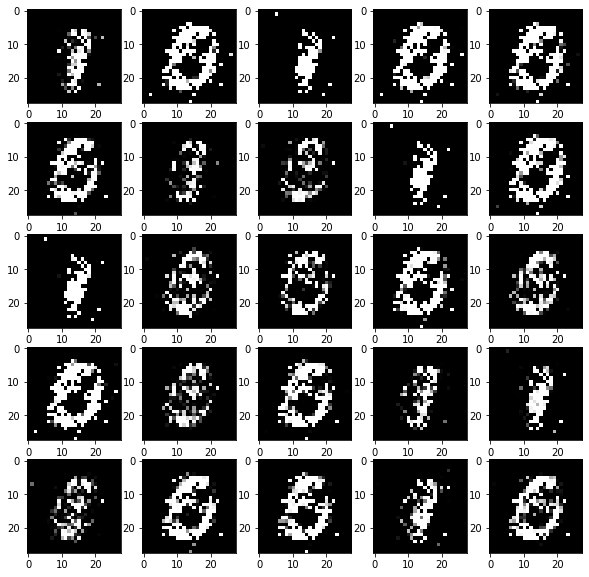

epochs 45


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 16ms/step


  0%|          | 1/273 [00:00<01:57,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


  1%|          | 2/273 [00:00<01:54,  2.36it/s]

4/4 [==============================] - 0s 10ms/step


  1%|          | 3/273 [00:01<01:58,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


  1%|▏         | 4/273 [00:01<01:56,  2.30it/s]

4/4 [==============================] - 0s 8ms/step


  2%|▏         | 5/273 [00:02<01:54,  2.33it/s]

4/4 [==============================] - 0s 8ms/step


  2%|▏         | 6/273 [00:02<01:53,  2.35it/s]

4/4 [==============================] - 0s 9ms/step


  3%|▎         | 7/273 [00:03<01:56,  2.28it/s]

4/4 [==============================] - 0s 14ms/step


  3%|▎         | 8/273 [00:03<02:02,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


  3%|▎         | 9/273 [00:03<01:59,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


  4%|▎         | 10/273 [00:04<02:00,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


  4%|▍         | 11/273 [00:04<02:02,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


  4%|▍         | 12/273 [00:05<02:00,  2.17it/s]

4/4 [==============================] - 0s 10ms/step


  5%|▍         | 13/273 [00:05<01:59,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


  5%|▌         | 14/273 [00:06<02:01,  2.13it/s]

4/4 [==============================] - 0s 10ms/step


  5%|▌         | 15/273 [00:06<01:55,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


  6%|▌         | 16/273 [00:07<01:55,  2.23it/s]

4/4 [==============================] - 0s 13ms/step


  6%|▌         | 17/273 [00:07<01:54,  2.24it/s]

4/4 [==============================] - 0s 13ms/step


  7%|▋         | 18/273 [00:08<01:50,  2.30it/s]

4/4 [==============================] - 0s 8ms/step


  7%|▋         | 19/273 [00:08<01:51,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


  7%|▋         | 20/273 [00:08<01:51,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


  8%|▊         | 21/273 [00:09<01:55,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


  8%|▊         | 22/273 [00:09<01:56,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 23/273 [00:10<01:58,  2.12it/s]

4/4 [==============================] - 0s 11ms/step


  9%|▉         | 24/273 [00:10<01:57,  2.12it/s]

4/4 [==============================] - 0s 8ms/step


  9%|▉         | 25/273 [00:11<01:54,  2.16it/s]

4/4 [==============================] - 0s 13ms/step


 10%|▉         | 26/273 [00:11<01:56,  2.11it/s]

4/4 [==============================] - 0s 8ms/step


 10%|▉         | 27/273 [00:12<01:55,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 10%|█         | 28/273 [00:12<01:55,  2.12it/s]

4/4 [==============================] - 0s 10ms/step


 11%|█         | 29/273 [00:13<01:55,  2.10it/s]

4/4 [==============================] - 0s 15ms/step


 11%|█         | 30/273 [00:13<01:54,  2.12it/s]

4/4 [==============================] - 0s 12ms/step


 11%|█▏        | 31/273 [00:14<01:54,  2.12it/s]

4/4 [==============================] - 0s 11ms/step


 12%|█▏        | 32/273 [00:14<01:57,  2.06it/s]

4/4 [==============================] - 0s 10ms/step


 12%|█▏        | 33/273 [00:15<01:57,  2.04it/s]

4/4 [==============================] - 0s 8ms/step


 12%|█▏        | 34/273 [00:15<01:52,  2.13it/s]

4/4 [==============================] - 0s 8ms/step


 13%|█▎        | 35/273 [00:16<01:52,  2.12it/s]

4/4 [==============================] - 0s 12ms/step


 13%|█▎        | 36/273 [00:16<01:53,  2.09it/s]

4/4 [==============================] - 0s 10ms/step


 14%|█▎        | 37/273 [00:17<01:52,  2.10it/s]

4/4 [==============================] - 0s 8ms/step


 14%|█▍        | 38/273 [00:17<01:51,  2.11it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▍        | 39/273 [00:17<01:48,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 15%|█▍        | 40/273 [00:18<01:48,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 15%|█▌        | 41/273 [00:19<02:00,  1.93it/s]

4/4 [==============================] - 0s 9ms/step


 15%|█▌        | 42/273 [00:19<01:58,  1.95it/s]

4/4 [==============================] - 0s 10ms/step


 16%|█▌        | 43/273 [00:20<01:54,  2.01it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▌        | 44/273 [00:20<01:51,  2.06it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▋        | 45/273 [00:20<01:48,  2.10it/s]

4/4 [==============================] - 0s 8ms/step


 17%|█▋        | 46/273 [00:21<01:46,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


 17%|█▋        | 47/273 [00:21<01:43,  2.17it/s]

4/4 [==============================] - 0s 10ms/step


 18%|█▊        | 48/273 [00:22<01:41,  2.21it/s]

4/4 [==============================] - 0s 10ms/step


 18%|█▊        | 49/273 [00:22<01:47,  2.08it/s]

4/4 [==============================] - 0s 13ms/step


 18%|█▊        | 50/273 [00:23<01:48,  2.06it/s]

4/4 [==============================] - 0s 14ms/step


 19%|█▊        | 51/273 [00:23<01:51,  2.00it/s]

4/4 [==============================] - 0s 13ms/step


 19%|█▉        | 52/273 [00:24<01:53,  1.95it/s]

4/4 [==============================] - 0s 10ms/step


 19%|█▉        | 53/273 [00:24<01:52,  1.96it/s]

4/4 [==============================] - 0s 13ms/step


 20%|█▉        | 54/273 [00:25<02:04,  1.76it/s]

4/4 [==============================] - 0s 9ms/step


 20%|██        | 55/273 [00:26<01:57,  1.86it/s]

4/4 [==============================] - 0s 12ms/step


 21%|██        | 56/273 [00:26<02:06,  1.71it/s]

4/4 [==============================] - 0s 9ms/step


 21%|██        | 57/273 [00:27<01:58,  1.82it/s]

4/4 [==============================] - 0s 11ms/step


 21%|██        | 58/273 [00:27<01:51,  1.93it/s]

4/4 [==============================] - 0s 10ms/step


 22%|██▏       | 59/273 [00:28<01:44,  2.05it/s]

4/4 [==============================] - 0s 9ms/step


 22%|██▏       | 60/273 [00:28<01:42,  2.08it/s]

4/4 [==============================] - 0s 9ms/step


 22%|██▏       | 61/273 [00:28<01:39,  2.13it/s]

4/4 [==============================] - 0s 18ms/step


 23%|██▎       | 62/273 [00:29<01:39,  2.12it/s]

4/4 [==============================] - 0s 14ms/step


 23%|██▎       | 63/273 [00:29<01:38,  2.13it/s]

4/4 [==============================] - 0s 11ms/step


 23%|██▎       | 64/273 [00:30<01:37,  2.15it/s]

4/4 [==============================] - 0s 14ms/step


 24%|██▍       | 65/273 [00:30<01:38,  2.11it/s]

4/4 [==============================] - 0s 11ms/step


 24%|██▍       | 66/273 [00:31<01:40,  2.06it/s]

4/4 [==============================] - 0s 10ms/step


 25%|██▍       | 67/273 [00:31<01:40,  2.05it/s]

4/4 [==============================] - 0s 13ms/step


 25%|██▍       | 68/273 [00:32<01:38,  2.08it/s]

4/4 [==============================] - 0s 10ms/step


 25%|██▌       | 69/273 [00:32<01:37,  2.09it/s]

4/4 [==============================] - 0s 14ms/step


 26%|██▌       | 70/273 [00:33<01:38,  2.06it/s]

4/4 [==============================] - 0s 10ms/step


 26%|██▌       | 71/273 [00:33<01:34,  2.13it/s]

4/4 [==============================] - 0s 8ms/step


 26%|██▋       | 72/273 [00:34<01:32,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 27%|██▋       | 73/273 [00:34<01:32,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


 27%|██▋       | 74/273 [00:35<01:30,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 27%|██▋       | 75/273 [00:35<01:32,  2.15it/s]

4/4 [==============================] - 0s 12ms/step


 28%|██▊       | 76/273 [00:36<01:32,  2.14it/s]

4/4 [==============================] - 0s 11ms/step


 28%|██▊       | 77/273 [00:36<01:31,  2.15it/s]

4/4 [==============================] - 0s 11ms/step


 29%|██▊       | 78/273 [00:36<01:29,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▉       | 79/273 [00:37<01:29,  2.18it/s]

4/4 [==============================] - 0s 12ms/step


 29%|██▉       | 80/273 [00:38<01:36,  2.00it/s]

4/4 [==============================] - 0s 10ms/step


 30%|██▉       | 81/273 [00:38<01:36,  1.98it/s]

4/4 [==============================] - 0s 11ms/step


 30%|███       | 82/273 [00:39<01:35,  2.00it/s]

4/4 [==============================] - 0s 9ms/step


 30%|███       | 83/273 [00:39<01:32,  2.05it/s]

4/4 [==============================] - 0s 9ms/step


 31%|███       | 84/273 [00:39<01:32,  2.03it/s]

4/4 [==============================] - 0s 9ms/step


 31%|███       | 85/273 [00:40<01:32,  2.03it/s]

4/4 [==============================] - 0s 12ms/step


 32%|███▏      | 86/273 [00:40<01:32,  2.02it/s]

4/4 [==============================] - 0s 12ms/step


 32%|███▏      | 87/273 [00:41<01:34,  1.98it/s]

4/4 [==============================] - 0s 9ms/step


 32%|███▏      | 88/273 [00:42<01:33,  1.99it/s]

4/4 [==============================] - 0s 12ms/step


 33%|███▎      | 89/273 [00:42<01:31,  2.00it/s]

4/4 [==============================] - 0s 12ms/step


 33%|███▎      | 90/273 [00:42<01:30,  2.03it/s]

4/4 [==============================] - 0s 9ms/step


 33%|███▎      | 91/273 [00:43<01:30,  2.01it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▎      | 92/273 [00:43<01:27,  2.08it/s]

4/4 [==============================] - 0s 11ms/step


 34%|███▍      | 93/273 [00:44<01:24,  2.14it/s]

4/4 [==============================] - 0s 16ms/step


 34%|███▍      | 94/273 [00:44<01:25,  2.09it/s]

4/4 [==============================] - 0s 9ms/step


 35%|███▍      | 95/273 [00:45<01:25,  2.07it/s]

4/4 [==============================] - 0s 10ms/step


 35%|███▌      | 96/273 [00:45<01:21,  2.17it/s]

4/4 [==============================] - 0s 11ms/step


 36%|███▌      | 97/273 [00:46<01:23,  2.10it/s]

4/4 [==============================] - 0s 10ms/step


 36%|███▌      | 98/273 [00:46<01:25,  2.06it/s]

4/4 [==============================] - 0s 10ms/step


 36%|███▋      | 99/273 [00:47<01:28,  1.97it/s]

4/4 [==============================] - 0s 8ms/step


 37%|███▋      | 100/273 [00:47<01:22,  2.09it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 101/273 [00:48<01:24,  2.05it/s]

4/4 [==============================] - 0s 11ms/step


 37%|███▋      | 102/273 [00:48<01:20,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


 38%|███▊      | 103/273 [00:49<01:19,  2.15it/s]

4/4 [==============================] - 0s 10ms/step


 38%|███▊      | 104/273 [00:49<01:18,  2.15it/s]

4/4 [==============================] - 0s 16ms/step


 38%|███▊      | 105/273 [00:50<01:20,  2.09it/s]

4/4 [==============================] - 0s 9ms/step


 39%|███▉      | 106/273 [00:50<01:20,  2.08it/s]

4/4 [==============================] - 0s 9ms/step


 39%|███▉      | 107/273 [00:51<01:17,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 40%|███▉      | 108/273 [00:51<01:15,  2.19it/s]

4/4 [==============================] - 0s 12ms/step


 40%|███▉      | 109/273 [00:51<01:13,  2.24it/s]

4/4 [==============================] - 0s 12ms/step


 40%|████      | 110/273 [00:52<01:14,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 41%|████      | 111/273 [00:52<01:14,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 41%|████      | 112/273 [00:53<01:13,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 41%|████▏     | 113/273 [00:53<01:13,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 42%|████▏     | 114/273 [00:54<01:12,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 42%|████▏     | 115/273 [00:54<01:12,  2.18it/s]

4/4 [==============================] - 0s 11ms/step


 42%|████▏     | 116/273 [00:55<01:09,  2.25it/s]

4/4 [==============================] - 0s 10ms/step


 43%|████▎     | 117/273 [00:55<01:10,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 43%|████▎     | 118/273 [00:55<01:08,  2.26it/s]

4/4 [==============================] - 0s 10ms/step


 44%|████▎     | 119/273 [00:56<01:09,  2.21it/s]

4/4 [==============================] - 0s 10ms/step


 44%|████▍     | 120/273 [00:57<01:14,  2.05it/s]

4/4 [==============================] - 0s 9ms/step


 44%|████▍     | 121/273 [00:57<01:10,  2.16it/s]

4/4 [==============================] - 0s 10ms/step


 45%|████▍     | 122/273 [00:57<01:11,  2.10it/s]

4/4 [==============================] - 0s 11ms/step


 45%|████▌     | 123/273 [00:58<01:12,  2.08it/s]

4/4 [==============================] - 0s 9ms/step


 45%|████▌     | 124/273 [00:58<01:11,  2.09it/s]

4/4 [==============================] - 0s 8ms/step


 46%|████▌     | 125/273 [00:59<01:10,  2.09it/s]

4/4 [==============================] - 0s 9ms/step


 46%|████▌     | 126/273 [00:59<01:08,  2.16it/s]

4/4 [==============================] - 0s 10ms/step


 47%|████▋     | 127/273 [01:00<01:10,  2.07it/s]

4/4 [==============================] - 0s 8ms/step


 47%|████▋     | 128/273 [01:00<01:10,  2.07it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 129/273 [01:01<01:08,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


 48%|████▊     | 130/273 [01:01<01:07,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 48%|████▊     | 131/273 [01:02<01:07,  2.11it/s]

4/4 [==============================] - 0s 8ms/step


 48%|████▊     | 132/273 [01:02<01:05,  2.15it/s]

4/4 [==============================] - 0s 10ms/step


 49%|████▊     | 133/273 [01:03<01:05,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 49%|████▉     | 134/273 [01:03<01:04,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


 49%|████▉     | 135/273 [01:04<01:09,  1.99it/s]

4/4 [==============================] - 0s 10ms/step


 50%|████▉     | 136/273 [01:04<01:09,  1.96it/s]

4/4 [==============================] - 0s 9ms/step


 50%|█████     | 137/273 [01:05<01:06,  2.04it/s]

4/4 [==============================] - 0s 9ms/step


 51%|█████     | 138/273 [01:05<01:04,  2.09it/s]

4/4 [==============================] - 0s 8ms/step


 51%|█████     | 139/273 [01:06<01:01,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 51%|█████▏    | 140/273 [01:06<01:02,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 141/273 [01:07<01:03,  2.08it/s]

4/4 [==============================] - 0s 10ms/step


 52%|█████▏    | 142/273 [01:07<01:04,  2.04it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 143/273 [01:07<01:02,  2.07it/s]

4/4 [==============================] - 0s 10ms/step


 53%|█████▎    | 144/273 [01:08<01:03,  2.04it/s]

4/4 [==============================] - 0s 8ms/step


 53%|█████▎    | 145/273 [01:08<01:00,  2.11it/s]

4/4 [==============================] - 0s 8ms/step


 53%|█████▎    | 146/273 [01:09<01:00,  2.10it/s]

4/4 [==============================] - 0s 12ms/step


 54%|█████▍    | 147/273 [01:09<00:57,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 54%|█████▍    | 148/273 [01:10<00:58,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▍    | 149/273 [01:10<00:58,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▍    | 150/273 [01:11<00:57,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▌    | 151/273 [01:11<00:55,  2.21it/s]

4/4 [==============================] - 0s 11ms/step


 56%|█████▌    | 152/273 [01:12<00:53,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▌    | 153/273 [01:12<00:53,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▋    | 154/273 [01:12<00:52,  2.26it/s]

4/4 [==============================] - 0s 10ms/step


 57%|█████▋    | 155/273 [01:13<00:54,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 57%|█████▋    | 156/273 [01:13<00:53,  2.18it/s]

4/4 [==============================] - 0s 16ms/step


 58%|█████▊    | 157/273 [01:14<00:52,  2.21it/s]

4/4 [==============================] - 0s 10ms/step


 58%|█████▊    | 158/273 [01:14<00:52,  2.19it/s]

4/4 [==============================] - 0s 10ms/step


 58%|█████▊    | 159/273 [01:15<00:51,  2.21it/s]

4/4 [==============================] - 0s 11ms/step


 59%|█████▊    | 160/273 [01:15<00:54,  2.06it/s]

4/4 [==============================] - 0s 8ms/step


 59%|█████▉    | 161/273 [01:16<00:52,  2.12it/s]

4/4 [==============================] - 0s 16ms/step


 59%|█████▉    | 162/273 [01:16<00:52,  2.11it/s]

4/4 [==============================] - 0s 10ms/step


 60%|█████▉    | 163/273 [01:17<00:53,  2.06it/s]

4/4 [==============================] - 0s 11ms/step


 60%|██████    | 164/273 [01:17<00:51,  2.11it/s]

4/4 [==============================] - 0s 9ms/step


 60%|██████    | 165/273 [01:18<00:50,  2.13it/s]

4/4 [==============================] - 0s 10ms/step


 61%|██████    | 166/273 [01:18<00:51,  2.07it/s]

4/4 [==============================] - 0s 10ms/step


 61%|██████    | 167/273 [01:19<00:51,  2.06it/s]

4/4 [==============================] - 0s 9ms/step


 62%|██████▏   | 168/273 [01:19<00:49,  2.10it/s]

4/4 [==============================] - 0s 12ms/step


 62%|██████▏   | 169/273 [01:20<00:47,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 62%|██████▏   | 170/273 [01:20<00:48,  2.12it/s]

4/4 [==============================] - 0s 10ms/step


 63%|██████▎   | 171/273 [01:20<00:46,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 63%|██████▎   | 172/273 [01:21<00:46,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 63%|██████▎   | 173/273 [01:21<00:47,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


 64%|██████▎   | 174/273 [01:22<00:44,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 64%|██████▍   | 175/273 [01:22<00:43,  2.26it/s]

4/4 [==============================] - 0s 12ms/step


 64%|██████▍   | 176/273 [01:23<00:43,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 65%|██████▍   | 177/273 [01:23<00:43,  2.21it/s]

4/4 [==============================] - 0s 11ms/step


 65%|██████▌   | 178/273 [01:24<00:42,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▌   | 179/273 [01:24<00:42,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▌   | 180/273 [01:25<00:41,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▋   | 181/273 [01:25<00:41,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 67%|██████▋   | 182/273 [01:25<00:40,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 67%|██████▋   | 183/273 [01:26<00:40,  2.24it/s]

4/4 [==============================] - 0s 12ms/step


 67%|██████▋   | 184/273 [01:26<00:39,  2.27it/s]

4/4 [==============================] - 0s 11ms/step


 68%|██████▊   | 185/273 [01:27<00:39,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 68%|██████▊   | 186/273 [01:27<00:38,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 68%|██████▊   | 187/273 [01:28<00:36,  2.33it/s]

4/4 [==============================] - 0s 8ms/step


 69%|██████▉   | 188/273 [01:28<00:38,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 69%|██████▉   | 189/273 [01:29<00:37,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 70%|██████▉   | 190/273 [01:29<00:38,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 70%|██████▉   | 191/273 [01:30<00:38,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 70%|███████   | 192/273 [01:30<00:36,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████   | 193/273 [01:30<00:36,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████   | 194/273 [01:31<00:36,  2.15it/s]

4/4 [==============================] - 0s 13ms/step


 71%|███████▏  | 195/273 [01:31<00:36,  2.11it/s]

4/4 [==============================] - 0s 9ms/step


 72%|███████▏  | 196/273 [01:32<00:35,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 72%|███████▏  | 197/273 [01:32<00:35,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 73%|███████▎  | 198/273 [01:33<00:34,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 73%|███████▎  | 199/273 [01:33<00:34,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 73%|███████▎  | 200/273 [01:34<00:33,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▎  | 201/273 [01:34<00:34,  2.08it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▍  | 202/273 [01:35<00:33,  2.11it/s]

4/4 [==============================] - 0s 11ms/step


 74%|███████▍  | 203/273 [01:35<00:32,  2.12it/s]

4/4 [==============================] - 0s 8ms/step


 75%|███████▍  | 204/273 [01:36<00:32,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 75%|███████▌  | 205/273 [01:36<00:32,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 75%|███████▌  | 206/273 [01:36<00:30,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 76%|███████▌  | 207/273 [01:37<00:30,  2.18it/s]

4/4 [==============================] - 0s 10ms/step


 76%|███████▌  | 208/273 [01:37<00:28,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 209/273 [01:38<00:27,  2.32it/s]

4/4 [==============================] - 0s 13ms/step


 77%|███████▋  | 210/273 [01:38<00:28,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 77%|███████▋  | 211/273 [01:39<00:28,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 212/273 [01:39<00:27,  2.22it/s]

4/4 [==============================] - 0s 12ms/step


 78%|███████▊  | 213/273 [01:40<00:27,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 214/273 [01:40<00:26,  2.21it/s]

4/4 [==============================] - 0s 10ms/step


 79%|███████▉  | 215/273 [01:40<00:25,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 79%|███████▉  | 216/273 [01:41<00:25,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


 79%|███████▉  | 217/273 [01:41<00:25,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 80%|███████▉  | 218/273 [01:42<00:24,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 80%|████████  | 219/273 [01:42<00:23,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 81%|████████  | 220/273 [01:43<00:22,  2.35it/s]

4/4 [==============================] - 0s 16ms/step


 81%|████████  | 221/273 [01:43<00:23,  2.26it/s]

4/4 [==============================] - 0s 13ms/step


 81%|████████▏ | 222/273 [01:44<00:23,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 223/273 [01:44<00:25,  1.99it/s]

4/4 [==============================] - 0s 8ms/step


 82%|████████▏ | 224/273 [01:45<00:23,  2.05it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 225/273 [01:45<00:23,  2.03it/s]

4/4 [==============================] - 0s 9ms/step


 83%|████████▎ | 226/273 [01:46<00:21,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 83%|████████▎ | 227/273 [01:46<00:20,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 84%|████████▎ | 228/273 [01:46<00:19,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▍ | 229/273 [01:47<00:19,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▍ | 230/273 [01:47<00:19,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 85%|████████▍ | 231/273 [01:48<00:18,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 85%|████████▍ | 232/273 [01:48<00:17,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 85%|████████▌ | 233/273 [01:49<00:17,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▌ | 234/273 [01:49<00:16,  2.32it/s]

4/4 [==============================] - 0s 10ms/step


 86%|████████▌ | 235/273 [01:50<00:17,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▋ | 236/273 [01:50<00:16,  2.24it/s]

4/4 [==============================] - 0s 10ms/step


 87%|████████▋ | 237/273 [01:50<00:16,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 87%|████████▋ | 238/273 [01:51<00:15,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 88%|████████▊ | 239/273 [01:51<00:15,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 88%|████████▊ | 240/273 [01:52<00:14,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 88%|████████▊ | 241/273 [01:52<00:13,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▊ | 242/273 [01:53<00:13,  2.28it/s]

4/4 [==============================] - 0s 13ms/step


 89%|████████▉ | 243/273 [01:53<00:13,  2.18it/s]

4/4 [==============================] - 0s 10ms/step


 89%|████████▉ | 244/273 [01:54<00:12,  2.25it/s]

4/4 [==============================] - 0s 16ms/step


 90%|████████▉ | 245/273 [01:54<00:12,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 90%|█████████ | 246/273 [01:54<00:12,  2.23it/s]

4/4 [==============================] - 0s 10ms/step


 90%|█████████ | 247/273 [01:55<00:11,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 91%|█████████ | 248/273 [01:55<00:10,  2.35it/s]

4/4 [==============================] - 0s 10ms/step


 91%|█████████ | 249/273 [01:56<00:10,  2.28it/s]

4/4 [==============================] - 0s 14ms/step


 92%|█████████▏| 250/273 [01:56<00:10,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 92%|█████████▏| 251/273 [01:57<00:10,  2.20it/s]

4/4 [==============================] - 0s 14ms/step


 92%|█████████▏| 252/273 [01:57<00:09,  2.11it/s]

4/4 [==============================] - 0s 8ms/step


 93%|█████████▎| 253/273 [01:58<00:09,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 93%|█████████▎| 254/273 [01:58<00:08,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 93%|█████████▎| 255/273 [01:59<00:08,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


 94%|█████████▍| 256/273 [01:59<00:07,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 94%|█████████▍| 257/273 [02:00<00:08,  2.00it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▍| 258/273 [02:00<00:07,  2.09it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▍| 259/273 [02:01<00:06,  2.14it/s]

4/4 [==============================] - 0s 16ms/step


 95%|█████████▌| 260/273 [02:01<00:06,  2.16it/s]

4/4 [==============================] - 0s 13ms/step


 96%|█████████▌| 261/273 [02:01<00:05,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 96%|█████████▌| 262/273 [02:02<00:05,  2.15it/s]

4/4 [==============================] - 0s 11ms/step


 96%|█████████▋| 263/273 [02:02<00:04,  2.05it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 264/273 [02:03<00:04,  2.08it/s]

4/4 [==============================] - 0s 10ms/step


 97%|█████████▋| 265/273 [02:03<00:04,  1.98it/s]

4/4 [==============================] - 0s 8ms/step


 97%|█████████▋| 266/273 [02:04<00:03,  2.08it/s]

4/4 [==============================] - 0s 9ms/step


 98%|█████████▊| 267/273 [02:04<00:02,  2.11it/s]

4/4 [==============================] - 0s 16ms/step


 98%|█████████▊| 268/273 [02:05<00:02,  1.96it/s]

4/4 [==============================] - 0s 9ms/step


 99%|█████████▊| 269/273 [02:05<00:02,  1.96it/s]

4/4 [==============================] - 0s 9ms/step


 99%|█████████▉| 270/273 [02:06<00:01,  1.98it/s]

4/4 [==============================] - 0s 9ms/step


 99%|█████████▉| 271/273 [02:06<00:00,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


100%|█████████▉| 272/273 [02:07<00:00,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


100%|██████████| 273/273 [02:07<00:00,  2.14it/s]


loss is 1.3478787877829745e-05 |*| 51.26618194580078
1/1 [==============================] - 0s 26ms/step


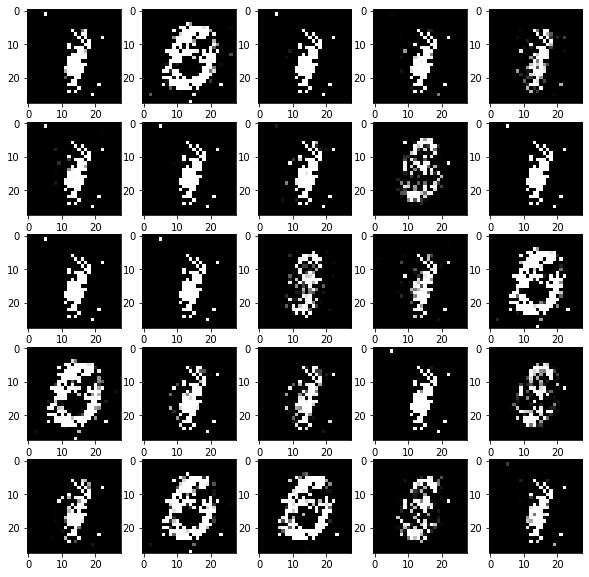

epochs 46


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 11ms/step


  0%|          | 1/273 [00:00<01:51,  2.44it/s]

4/4 [==============================] - 0s 11ms/step


  1%|          | 2/273 [00:00<02:02,  2.22it/s]

4/4 [==============================] - 0s 13ms/step


  1%|          | 3/273 [00:01<01:58,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


  1%|▏         | 4/273 [00:01<01:57,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


  2%|▏         | 5/273 [00:02<01:58,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


  2%|▏         | 6/273 [00:02<01:54,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


  3%|▎         | 7/273 [00:03<02:01,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


  3%|▎         | 8/273 [00:03<01:56,  2.27it/s]

4/4 [==============================] - 0s 11ms/step


  3%|▎         | 9/273 [00:03<01:56,  2.27it/s]

4/4 [==============================] - 0s 15ms/step


  4%|▎         | 10/273 [00:04<01:55,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


  4%|▍         | 11/273 [00:04<01:57,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


  4%|▍         | 12/273 [00:05<02:05,  2.08it/s]

4/4 [==============================] - 0s 12ms/step


  5%|▍         | 13/273 [00:05<02:04,  2.08it/s]

4/4 [==============================] - 0s 8ms/step


  5%|▌         | 14/273 [00:06<02:02,  2.11it/s]

4/4 [==============================] - 0s 8ms/step


  5%|▌         | 15/273 [00:06<02:04,  2.07it/s]

4/4 [==============================] - 0s 10ms/step


  6%|▌         | 16/273 [00:07<02:03,  2.07it/s]

4/4 [==============================] - 0s 8ms/step


  6%|▌         | 17/273 [00:07<02:06,  2.02it/s]

4/4 [==============================] - 0s 9ms/step


  7%|▋         | 18/273 [00:08<01:59,  2.13it/s]

4/4 [==============================] - 0s 10ms/step


  7%|▋         | 19/273 [00:08<01:58,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


  7%|▋         | 20/273 [00:09<01:54,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 21/273 [00:09<02:04,  2.02it/s]

4/4 [==============================] - 0s 8ms/step


  8%|▊         | 22/273 [00:10<02:02,  2.04it/s]

4/4 [==============================] - 0s 10ms/step


  8%|▊         | 23/273 [00:10<01:57,  2.12it/s]

4/4 [==============================] - 0s 15ms/step


  9%|▉         | 24/273 [00:11<01:58,  2.10it/s]

4/4 [==============================] - 0s 15ms/step


  9%|▉         | 25/273 [00:11<02:01,  2.04it/s]

4/4 [==============================] - 0s 10ms/step


 10%|▉         | 26/273 [00:12<01:55,  2.13it/s]

4/4 [==============================] - 0s 20ms/step


 10%|▉         | 27/273 [00:12<01:57,  2.09it/s]

4/4 [==============================] - 0s 12ms/step


 10%|█         | 28/273 [00:13<01:58,  2.07it/s]

4/4 [==============================] - 0s 13ms/step


 11%|█         | 29/273 [00:13<01:59,  2.04it/s]

4/4 [==============================] - 0s 10ms/step


 11%|█         | 30/273 [00:14<01:57,  2.07it/s]

4/4 [==============================] - 0s 9ms/step


 11%|█▏        | 31/273 [00:14<01:51,  2.16it/s]

4/4 [==============================] - 0s 10ms/step


 12%|█▏        | 32/273 [00:14<01:51,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


 12%|█▏        | 33/273 [00:15<01:51,  2.16it/s]

4/4 [==============================] - 0s 12ms/step


 12%|█▏        | 34/273 [00:15<01:49,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 13%|█▎        | 35/273 [00:16<01:49,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 13%|█▎        | 36/273 [00:16<01:50,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 14%|█▎        | 37/273 [00:17<01:45,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▍        | 38/273 [00:17<01:48,  2.16it/s]

4/4 [==============================] - 0s 10ms/step


 14%|█▍        | 39/273 [00:18<01:46,  2.19it/s]

4/4 [==============================] - 0s 12ms/step


 15%|█▍        | 40/273 [00:18<02:00,  1.93it/s]

4/4 [==============================] - 0s 9ms/step


 15%|█▌        | 41/273 [00:19<01:52,  2.07it/s]

4/4 [==============================] - 0s 8ms/step


 15%|█▌        | 42/273 [00:19<01:46,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▌        | 43/273 [00:20<01:43,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 16%|█▌        | 44/273 [00:20<01:45,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▋        | 45/273 [00:20<01:44,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 17%|█▋        | 46/273 [00:21<01:41,  2.25it/s]

4/4 [==============================] - 0s 13ms/step


 17%|█▋        | 47/273 [00:21<01:39,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 18%|█▊        | 48/273 [00:22<01:38,  2.27it/s]

4/4 [==============================] - 0s 12ms/step


 18%|█▊        | 49/273 [00:22<01:37,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 18%|█▊        | 50/273 [00:23<01:34,  2.36it/s]

4/4 [==============================] - 0s 8ms/step


 19%|█▊        | 51/273 [00:23<01:42,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 19%|█▉        | 52/273 [00:24<01:39,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 19%|█▉        | 53/273 [00:24<01:36,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 20%|█▉        | 54/273 [00:24<01:34,  2.31it/s]

4/4 [==============================] - 0s 10ms/step


 20%|██        | 55/273 [00:25<01:35,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 21%|██        | 56/273 [00:25<01:35,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 21%|██        | 57/273 [00:26<01:37,  2.22it/s]

4/4 [==============================] - 0s 11ms/step


 21%|██        | 58/273 [00:26<01:41,  2.13it/s]

4/4 [==============================] - 0s 11ms/step


 22%|██▏       | 59/273 [00:27<01:48,  1.97it/s]

4/4 [==============================] - 0s 12ms/step


 22%|██▏       | 60/273 [00:27<01:49,  1.95it/s]

4/4 [==============================] - 0s 11ms/step


 22%|██▏       | 61/273 [00:28<01:50,  1.92it/s]

4/4 [==============================] - 0s 11ms/step


 23%|██▎       | 62/273 [00:29<01:53,  1.86it/s]

4/4 [==============================] - 0s 13ms/step


 23%|██▎       | 63/273 [00:29<01:50,  1.90it/s]

4/4 [==============================] - 0s 13ms/step


 23%|██▎       | 64/273 [00:30<01:50,  1.88it/s]

4/4 [==============================] - 0s 13ms/step


 24%|██▍       | 65/273 [00:30<01:52,  1.85it/s]

4/4 [==============================] - 0s 14ms/step


 24%|██▍       | 66/273 [00:31<01:45,  1.96it/s]

4/4 [==============================] - 0s 9ms/step


 25%|██▍       | 67/273 [00:31<01:40,  2.06it/s]

4/4 [==============================] - 0s 9ms/step


 25%|██▍       | 68/273 [00:31<01:35,  2.14it/s]

4/4 [==============================] - 0s 10ms/step


 25%|██▌       | 69/273 [00:32<01:33,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 26%|██▌       | 70/273 [00:32<01:31,  2.21it/s]

4/4 [==============================] - 0s 16ms/step


 26%|██▌       | 71/273 [00:33<01:32,  2.18it/s]

4/4 [==============================] - 0s 13ms/step


 26%|██▋       | 72/273 [00:33<01:34,  2.12it/s]

4/4 [==============================] - 0s 11ms/step


 27%|██▋       | 73/273 [00:34<01:35,  2.09it/s]

4/4 [==============================] - 0s 9ms/step


 27%|██▋       | 74/273 [00:34<01:32,  2.15it/s]

4/4 [==============================] - 0s 10ms/step


 27%|██▋       | 75/273 [00:35<01:33,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 28%|██▊       | 76/273 [00:35<01:29,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 28%|██▊       | 77/273 [00:35<01:26,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▊       | 78/273 [00:36<01:23,  2.32it/s]

4/4 [==============================] - 0s 8ms/step


 29%|██▉       | 79/273 [00:36<01:24,  2.30it/s]

4/4 [==============================] - 0s 11ms/step


 29%|██▉       | 80/273 [00:37<01:22,  2.33it/s]

4/4 [==============================] - 0s 8ms/step


 30%|██▉       | 81/273 [00:37<01:25,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 30%|███       | 82/273 [00:38<01:24,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 30%|███       | 83/273 [00:38<01:24,  2.26it/s]

4/4 [==============================] - 0s 7ms/step


 31%|███       | 84/273 [00:39<01:24,  2.23it/s]

4/4 [==============================] - 0s 11ms/step


 31%|███       | 85/273 [00:39<01:34,  1.98it/s]

4/4 [==============================] - 0s 9ms/step


 32%|███▏      | 86/273 [00:40<01:35,  1.95it/s]

4/4 [==============================] - 0s 11ms/step


 32%|███▏      | 87/273 [00:40<01:36,  1.93it/s]

4/4 [==============================] - 0s 12ms/step


 32%|███▏      | 88/273 [00:41<01:35,  1.93it/s]

4/4 [==============================] - 0s 12ms/step


 33%|███▎      | 89/273 [00:41<01:35,  1.93it/s]

4/4 [==============================] - 0s 14ms/step


 33%|███▎      | 90/273 [00:42<01:34,  1.93it/s]

4/4 [==============================] - 0s 10ms/step


 33%|███▎      | 91/273 [00:42<01:33,  1.94it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▎      | 92/273 [00:43<01:32,  1.95it/s]

4/4 [==============================] - 0s 15ms/step


 34%|███▍      | 93/273 [00:43<01:29,  2.01it/s]

4/4 [==============================] - 0s 8ms/step


 34%|███▍      | 94/273 [00:44<01:24,  2.11it/s]

4/4 [==============================] - 0s 8ms/step


 35%|███▍      | 95/273 [00:44<01:24,  2.10it/s]

4/4 [==============================] - 0s 8ms/step


 35%|███▌      | 96/273 [00:45<01:20,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▌      | 97/273 [00:45<01:20,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▌      | 98/273 [00:46<01:20,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▋      | 99/273 [00:46<01:24,  2.05it/s]

4/4 [==============================] - 0s 12ms/step


 37%|███▋      | 100/273 [00:47<01:24,  2.04it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 101/273 [00:47<01:24,  2.05it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 102/273 [00:48<01:22,  2.07it/s]

4/4 [==============================] - 0s 8ms/step


 38%|███▊      | 103/273 [00:48<01:19,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 38%|███▊      | 104/273 [00:48<01:17,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 38%|███▊      | 105/273 [00:49<01:14,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 39%|███▉      | 106/273 [00:49<01:14,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 39%|███▉      | 107/273 [00:50<01:15,  2.20it/s]

4/4 [==============================] - 0s 20ms/step


 40%|███▉      | 108/273 [00:50<01:18,  2.09it/s]

4/4 [==============================] - 0s 8ms/step


 40%|███▉      | 109/273 [00:51<01:13,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 40%|████      | 110/273 [00:51<01:13,  2.21it/s]

4/4 [==============================] - 0s 12ms/step


 41%|████      | 111/273 [00:52<01:12,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 41%|████      | 112/273 [00:52<01:11,  2.24it/s]

4/4 [==============================] - 0s 10ms/step


 41%|████▏     | 113/273 [00:52<01:12,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 42%|████▏     | 114/273 [00:53<01:11,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 42%|████▏     | 115/273 [00:53<01:10,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 42%|████▏     | 116/273 [00:54<01:09,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


 43%|████▎     | 117/273 [00:54<01:13,  2.11it/s]

4/4 [==============================] - 0s 9ms/step


 43%|████▎     | 118/273 [00:55<01:10,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 44%|████▎     | 119/273 [00:55<01:10,  2.17it/s]

4/4 [==============================] - 0s 10ms/step


 44%|████▍     | 120/273 [00:56<01:10,  2.18it/s]

4/4 [==============================] - 0s 10ms/step


 44%|████▍     | 121/273 [00:56<01:07,  2.25it/s]

4/4 [==============================] - 0s 11ms/step


 45%|████▍     | 122/273 [00:57<01:07,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 45%|████▌     | 123/273 [00:57<01:07,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 45%|████▌     | 124/273 [00:57<01:05,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 46%|████▌     | 125/273 [00:58<01:08,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 46%|████▌     | 126/273 [00:58<01:07,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 47%|████▋     | 127/273 [00:59<01:04,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 128/273 [00:59<01:05,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 47%|████▋     | 129/273 [01:00<01:03,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


 48%|████▊     | 130/273 [01:00<01:04,  2.23it/s]

4/4 [==============================] - 0s 10ms/step


 48%|████▊     | 131/273 [01:01<01:04,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 48%|████▊     | 132/273 [01:01<01:01,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 49%|████▊     | 133/273 [01:01<01:02,  2.25it/s]

4/4 [==============================] - 0s 10ms/step


 49%|████▉     | 134/273 [01:02<01:00,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 49%|████▉     | 135/273 [01:02<01:01,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 50%|████▉     | 136/273 [01:03<01:00,  2.27it/s]

4/4 [==============================] - 0s 18ms/step


 50%|█████     | 137/273 [01:03<00:59,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 51%|█████     | 138/273 [01:04<01:01,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 51%|█████     | 139/273 [01:04<01:00,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 51%|█████▏    | 140/273 [01:05<00:59,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 141/273 [01:05<00:57,  2.29it/s]

4/4 [==============================] - 0s 10ms/step


 52%|█████▏    | 142/273 [01:05<00:57,  2.27it/s]

4/4 [==============================] - 0s 10ms/step


 52%|█████▏    | 143/273 [01:06<00:55,  2.34it/s]

4/4 [==============================] - 0s 8ms/step


 53%|█████▎    | 144/273 [01:06<00:54,  2.35it/s]

4/4 [==============================] - 0s 8ms/step


 53%|█████▎    | 145/273 [01:07<00:55,  2.29it/s]

4/4 [==============================] - 0s 15ms/step


 53%|█████▎    | 146/273 [01:07<00:55,  2.28it/s]

4/4 [==============================] - 0s 10ms/step


 54%|█████▍    | 147/273 [01:08<00:57,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 54%|█████▍    | 148/273 [01:08<00:58,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▍    | 149/273 [01:09<00:57,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


 55%|█████▍    | 150/273 [01:09<00:57,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


 55%|█████▌    | 151/273 [01:10<00:55,  2.20it/s]

4/4 [==============================] - 0s 10ms/step


 56%|█████▌    | 152/273 [01:10<00:57,  2.11it/s]

4/4 [==============================] - 0s 10ms/step


 56%|█████▌    | 153/273 [01:10<00:54,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▋    | 154/273 [01:11<00:54,  2.19it/s]

4/4 [==============================] - 0s 12ms/step


 57%|█████▋    | 155/273 [01:11<00:54,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 57%|█████▋    | 156/273 [01:12<00:52,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 58%|█████▊    | 157/273 [01:12<00:51,  2.25it/s]

4/4 [==============================] - 0s 11ms/step


 58%|█████▊    | 158/273 [01:13<00:50,  2.27it/s]

4/4 [==============================] - 0s 15ms/step


 58%|█████▊    | 159/273 [01:13<00:53,  2.14it/s]

4/4 [==============================] - 0s 12ms/step


 59%|█████▊    | 160/273 [01:14<00:54,  2.05it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▉    | 161/273 [01:14<00:54,  2.07it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▉    | 162/273 [01:15<00:54,  2.05it/s]

4/4 [==============================] - 0s 13ms/step


 60%|█████▉    | 163/273 [01:15<00:53,  2.05it/s]

4/4 [==============================] - 0s 12ms/step


 60%|██████    | 164/273 [01:16<00:51,  2.12it/s]

4/4 [==============================] - 0s 10ms/step


 60%|██████    | 165/273 [01:16<00:50,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 61%|██████    | 166/273 [01:16<00:48,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 61%|██████    | 167/273 [01:17<00:49,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 62%|██████▏   | 168/273 [01:18<00:50,  2.07it/s]

4/4 [==============================] - 0s 8ms/step


 62%|██████▏   | 169/273 [01:18<00:49,  2.09it/s]

4/4 [==============================] - 0s 11ms/step


 62%|██████▏   | 170/273 [01:18<00:47,  2.16it/s]

4/4 [==============================] - 0s 10ms/step


 63%|██████▎   | 171/273 [01:19<00:47,  2.14it/s]

4/4 [==============================] - 0s 12ms/step


 63%|██████▎   | 172/273 [01:19<00:46,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 63%|██████▎   | 173/273 [01:20<00:46,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 64%|██████▎   | 174/273 [01:20<00:46,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 64%|██████▍   | 175/273 [01:21<00:45,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


 64%|██████▍   | 176/273 [01:21<00:44,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 65%|██████▍   | 177/273 [01:22<00:47,  2.01it/s]

4/4 [==============================] - 0s 9ms/step


 65%|██████▌   | 178/273 [01:22<00:47,  2.01it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▌   | 179/273 [01:23<00:45,  2.06it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▌   | 180/273 [01:23<00:44,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▋   | 181/273 [01:24<00:42,  2.15it/s]

4/4 [==============================] - 0s 10ms/step


 67%|██████▋   | 182/273 [01:24<00:40,  2.25it/s]

4/4 [==============================] - 0s 11ms/step


 67%|██████▋   | 183/273 [01:24<00:40,  2.23it/s]

4/4 [==============================] - 0s 13ms/step


 67%|██████▋   | 184/273 [01:25<00:40,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 68%|██████▊   | 185/273 [01:25<00:39,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 68%|██████▊   | 186/273 [01:26<00:38,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 68%|██████▊   | 187/273 [01:26<00:40,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 69%|██████▉   | 188/273 [01:27<00:39,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 69%|██████▉   | 189/273 [01:27<00:38,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 70%|██████▉   | 190/273 [01:28<00:36,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 70%|██████▉   | 191/273 [01:28<00:36,  2.27it/s]

4/4 [==============================] - 0s 10ms/step


 70%|███████   | 192/273 [01:29<00:37,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████   | 193/273 [01:29<00:37,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


 71%|███████   | 194/273 [01:30<00:40,  1.96it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████▏  | 195/273 [01:30<00:37,  2.08it/s]

4/4 [==============================] - 0s 8ms/step


 72%|███████▏  | 196/273 [01:31<00:36,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


 72%|███████▏  | 197/273 [01:31<00:36,  2.06it/s]

4/4 [==============================] - 0s 11ms/step


 73%|███████▎  | 198/273 [01:32<00:35,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


 73%|███████▎  | 199/273 [01:32<00:34,  2.12it/s]

4/4 [==============================] - 0s 8ms/step


 73%|███████▎  | 200/273 [01:32<00:35,  2.08it/s]

4/4 [==============================] - 0s 8ms/step


 74%|███████▎  | 201/273 [01:33<00:33,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


 74%|███████▍  | 202/273 [01:33<00:32,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▍  | 203/273 [01:34<00:31,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 75%|███████▍  | 204/273 [01:34<00:30,  2.30it/s]

4/4 [==============================] - 0s 11ms/step


 75%|███████▌  | 205/273 [01:35<00:30,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 75%|███████▌  | 206/273 [01:35<00:29,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 76%|███████▌  | 207/273 [01:35<00:28,  2.35it/s]

4/4 [==============================] - 0s 9ms/step


 76%|███████▌  | 208/273 [01:36<00:28,  2.25it/s]

4/4 [==============================] - 0s 16ms/step


 77%|███████▋  | 209/273 [01:36<00:29,  2.15it/s]

4/4 [==============================] - 0s 10ms/step


 77%|███████▋  | 210/273 [01:37<00:28,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 211/273 [01:37<00:27,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 78%|███████▊  | 212/273 [01:38<00:26,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 78%|███████▊  | 213/273 [01:38<00:26,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 214/273 [01:39<00:26,  2.27it/s]

4/4 [==============================] - 0s 10ms/step


 79%|███████▉  | 215/273 [01:39<00:25,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 79%|███████▉  | 216/273 [01:40<00:26,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 79%|███████▉  | 217/273 [01:40<00:25,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 80%|███████▉  | 218/273 [01:40<00:24,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 80%|████████  | 219/273 [01:41<00:24,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 81%|████████  | 220/273 [01:41<00:24,  2.17it/s]

4/4 [==============================] - 0s 12ms/step


 81%|████████  | 221/273 [01:42<00:23,  2.20it/s]

4/4 [==============================] - 0s 18ms/step


 81%|████████▏ | 222/273 [01:42<00:23,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


 82%|████████▏ | 223/273 [01:43<00:23,  2.11it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 224/273 [01:43<00:22,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 225/273 [01:44<00:21,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 83%|████████▎ | 226/273 [01:44<00:20,  2.31it/s]

4/4 [==============================] - 0s 14ms/step


 83%|████████▎ | 227/273 [01:44<00:19,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▎ | 228/273 [01:45<00:18,  2.37it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▍ | 229/273 [01:45<00:19,  2.24it/s]

4/4 [==============================] - 0s 14ms/step


 84%|████████▍ | 230/273 [01:46<00:21,  2.04it/s]

4/4 [==============================] - 0s 10ms/step


 85%|████████▍ | 231/273 [01:46<00:19,  2.11it/s]

4/4 [==============================] - 0s 10ms/step


 85%|████████▍ | 232/273 [01:47<00:18,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


 85%|████████▌ | 233/273 [01:47<00:18,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▌ | 234/273 [01:48<00:17,  2.18it/s]

4/4 [==============================] - 0s 10ms/step


 86%|████████▌ | 235/273 [01:48<00:17,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▋ | 236/273 [01:49<00:17,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 87%|████████▋ | 237/273 [01:49<00:17,  2.11it/s]

4/4 [==============================] - 0s 10ms/step


 87%|████████▋ | 238/273 [01:50<00:16,  2.07it/s]

4/4 [==============================] - 0s 10ms/step


 88%|████████▊ | 239/273 [01:50<00:16,  2.10it/s]

4/4 [==============================] - 0s 13ms/step


 88%|████████▊ | 240/273 [01:51<00:15,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 88%|████████▊ | 241/273 [01:51<00:14,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▊ | 242/273 [01:52<00:14,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▉ | 243/273 [01:52<00:13,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▉ | 244/273 [01:52<00:12,  2.27it/s]

4/4 [==============================] - 0s 10ms/step


 90%|████████▉ | 245/273 [01:53<00:12,  2.21it/s]

4/4 [==============================] - 0s 10ms/step


 90%|█████████ | 246/273 [01:53<00:12,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 90%|█████████ | 247/273 [01:54<00:12,  2.16it/s]

4/4 [==============================] - 0s 19ms/step


 91%|█████████ | 248/273 [01:54<00:11,  2.11it/s]

4/4 [==============================] - 0s 11ms/step


 91%|█████████ | 249/273 [01:55<00:11,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 92%|█████████▏| 250/273 [01:55<00:10,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 92%|█████████▏| 251/273 [01:56<00:10,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 92%|█████████▏| 252/273 [01:56<00:09,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 93%|█████████▎| 253/273 [01:57<00:09,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


 93%|█████████▎| 254/273 [01:57<00:09,  1.94it/s]

4/4 [==============================] - 0s 10ms/step


 93%|█████████▎| 255/273 [01:58<00:08,  2.01it/s]

4/4 [==============================] - 0s 8ms/step


 94%|█████████▍| 256/273 [01:58<00:08,  2.04it/s]

4/4 [==============================] - 0s 8ms/step


 94%|█████████▍| 257/273 [01:59<00:07,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▍| 258/273 [01:59<00:06,  2.26it/s]

4/4 [==============================] - 0s 13ms/step


 95%|█████████▍| 259/273 [01:59<00:06,  2.20it/s]

4/4 [==============================] - 0s 12ms/step


 95%|█████████▌| 260/273 [02:00<00:05,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 96%|█████████▌| 261/273 [02:00<00:05,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 96%|█████████▌| 262/273 [02:01<00:04,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 96%|█████████▋| 263/273 [02:01<00:04,  2.36it/s]

4/4 [==============================] - 0s 8ms/step


 97%|█████████▋| 264/273 [02:02<00:03,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 97%|█████████▋| 265/273 [02:02<00:03,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 266/273 [02:02<00:03,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 98%|█████████▊| 267/273 [02:03<00:02,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 98%|█████████▊| 268/273 [02:03<00:02,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 99%|█████████▊| 269/273 [02:04<00:01,  2.18it/s]

4/4 [==============================] - 0s 13ms/step


 99%|█████████▉| 270/273 [02:04<00:01,  2.13it/s]

4/4 [==============================] - 0s 14ms/step


 99%|█████████▉| 271/273 [02:05<00:00,  2.09it/s]

4/4 [==============================] - 0s 9ms/step


100%|█████████▉| 272/273 [02:05<00:00,  2.12it/s]

4/4 [==============================] - 0s 13ms/step


100%|██████████| 273/273 [02:06<00:00,  2.16it/s]


loss is 2.659603978827363e-06 |*| 40.50271224975586
1/1 [==============================] - 0s 45ms/step


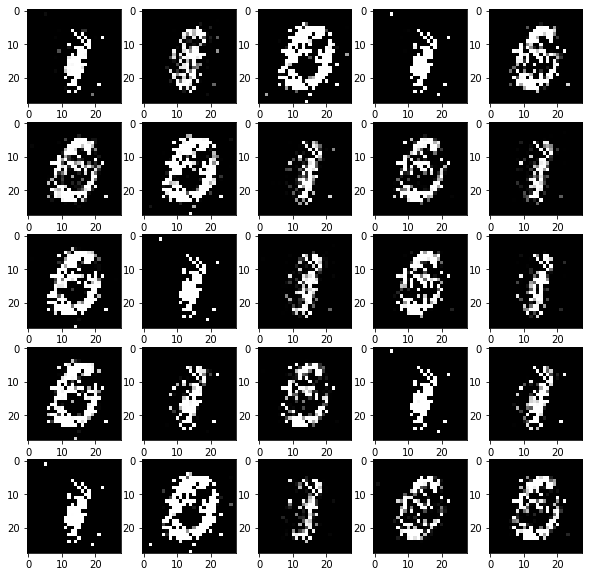

epochs 47


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 9ms/step


  0%|          | 1/273 [00:00<01:54,  2.38it/s]

4/4 [==============================] - 0s 10ms/step


  1%|          | 2/273 [00:00<02:00,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


  1%|          | 3/273 [00:01<01:55,  2.34it/s]

4/4 [==============================] - 0s 8ms/step


  1%|▏         | 4/273 [00:01<02:00,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


  2%|▏         | 5/273 [00:02<01:57,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


  2%|▏         | 6/273 [00:02<01:54,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


  3%|▎         | 7/273 [00:02<01:50,  2.40it/s]

4/4 [==============================] - 0s 8ms/step


  3%|▎         | 8/273 [00:03<01:54,  2.32it/s]

4/4 [==============================] - 0s 13ms/step


  3%|▎         | 9/273 [00:03<02:00,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


  4%|▎         | 10/273 [00:04<01:59,  2.21it/s]

4/4 [==============================] - 0s 14ms/step


  4%|▍         | 11/273 [00:04<01:58,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


  4%|▍         | 12/273 [00:05<01:55,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


  5%|▍         | 13/273 [00:05<01:54,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


  5%|▌         | 14/273 [00:06<01:52,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


  5%|▌         | 15/273 [00:06<01:49,  2.35it/s]

4/4 [==============================] - 0s 9ms/step


  6%|▌         | 16/273 [00:07<01:53,  2.27it/s]

4/4 [==============================] - 0s 15ms/step


  6%|▌         | 17/273 [00:07<01:51,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


  7%|▋         | 18/273 [00:07<01:51,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


  7%|▋         | 19/273 [00:08<01:52,  2.26it/s]

4/4 [==============================] - 0s 14ms/step


  7%|▋         | 20/273 [00:08<01:57,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 21/273 [00:09<01:56,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 22/273 [00:09<01:55,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 23/273 [00:10<01:52,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


  9%|▉         | 24/273 [00:10<01:50,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


  9%|▉         | 25/273 [00:11<01:49,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 10%|▉         | 26/273 [00:11<01:47,  2.31it/s]

4/4 [==============================] - 0s 10ms/step


 10%|▉         | 27/273 [00:11<01:46,  2.32it/s]

4/4 [==============================] - 0s 13ms/step


 10%|█         | 28/273 [00:12<01:46,  2.31it/s]

4/4 [==============================] - 0s 10ms/step


 11%|█         | 29/273 [00:12<01:53,  2.14it/s]

4/4 [==============================] - 0s 13ms/step


 11%|█         | 30/273 [00:13<01:53,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


 11%|█▏        | 31/273 [00:13<01:48,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 12%|█▏        | 32/273 [00:14<01:50,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


 12%|█▏        | 33/273 [00:15<02:17,  1.74it/s]

4/4 [==============================] - 0s 8ms/step


 12%|█▏        | 34/273 [00:15<02:11,  1.81it/s]

4/4 [==============================] - 0s 8ms/step


 13%|█▎        | 35/273 [00:16<02:03,  1.93it/s]

4/4 [==============================] - 0s 10ms/step


 13%|█▎        | 36/273 [00:16<01:58,  2.01it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▎        | 37/273 [00:16<01:56,  2.02it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▍        | 38/273 [00:17<01:49,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▍        | 39/273 [00:17<01:50,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 15%|█▍        | 40/273 [00:18<01:47,  2.17it/s]

4/4 [==============================] - 0s 12ms/step


 15%|█▌        | 41/273 [00:18<01:46,  2.18it/s]

4/4 [==============================] - 0s 10ms/step


 15%|█▌        | 42/273 [00:19<01:43,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 16%|█▌        | 43/273 [00:19<01:45,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 16%|█▌        | 44/273 [00:20<01:44,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▋        | 45/273 [00:20<01:48,  2.11it/s]

4/4 [==============================] - 0s 9ms/step


 17%|█▋        | 46/273 [00:21<01:49,  2.07it/s]

4/4 [==============================] - 0s 9ms/step


 17%|█▋        | 47/273 [00:21<01:50,  2.04it/s]

4/4 [==============================] - 0s 11ms/step


 18%|█▊        | 48/273 [00:22<01:49,  2.05it/s]

4/4 [==============================] - 0s 9ms/step


 18%|█▊        | 49/273 [00:22<01:48,  2.06it/s]

4/4 [==============================] - 0s 9ms/step


 18%|█▊        | 50/273 [00:23<01:48,  2.06it/s]

4/4 [==============================] - 0s 10ms/step


 19%|█▊        | 51/273 [00:23<01:43,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 19%|█▉        | 52/273 [00:23<01:40,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 19%|█▉        | 53/273 [00:24<01:41,  2.16it/s]

4/4 [==============================] - 0s 10ms/step


 20%|█▉        | 54/273 [00:24<01:39,  2.20it/s]

4/4 [==============================] - 0s 12ms/step


 20%|██        | 55/273 [00:25<01:38,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 21%|██        | 56/273 [00:25<01:36,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 21%|██        | 57/273 [00:26<01:38,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 21%|██        | 58/273 [00:26<01:38,  2.18it/s]

4/4 [==============================] - 0s 10ms/step


 22%|██▏       | 59/273 [00:27<01:37,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 22%|██▏       | 60/273 [00:27<01:40,  2.11it/s]

4/4 [==============================] - 0s 9ms/step


 22%|██▏       | 61/273 [00:28<01:40,  2.10it/s]

4/4 [==============================] - 0s 10ms/step


 23%|██▎       | 62/273 [00:28<01:38,  2.14it/s]

4/4 [==============================] - 0s 10ms/step


 23%|██▎       | 63/273 [00:28<01:37,  2.16it/s]

4/4 [==============================] - 0s 13ms/step


 23%|██▎       | 64/273 [00:29<01:36,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 24%|██▍       | 65/273 [00:29<01:34,  2.20it/s]

4/4 [==============================] - 0s 10ms/step


 24%|██▍       | 66/273 [00:30<01:32,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 25%|██▍       | 67/273 [00:30<01:30,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 25%|██▍       | 68/273 [00:31<01:29,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 25%|██▌       | 69/273 [00:31<01:31,  2.22it/s]

4/4 [==============================] - 0s 12ms/step


 26%|██▌       | 70/273 [00:32<01:37,  2.08it/s]

4/4 [==============================] - 0s 11ms/step


 26%|██▌       | 71/273 [00:32<01:39,  2.04it/s]

4/4 [==============================] - 0s 15ms/step


 26%|██▋       | 72/273 [00:33<01:46,  1.89it/s]

4/4 [==============================] - 0s 11ms/step


 27%|██▋       | 73/273 [00:33<01:43,  1.94it/s]

4/4 [==============================] - 0s 10ms/step


 27%|██▋       | 74/273 [00:34<01:53,  1.75it/s]

4/4 [==============================] - 0s 13ms/step


 27%|██▋       | 75/273 [00:35<01:49,  1.80it/s]

4/4 [==============================] - 0s 15ms/step


 28%|██▊       | 76/273 [00:35<01:45,  1.86it/s]

4/4 [==============================] - 0s 11ms/step


 28%|██▊       | 77/273 [00:36<01:42,  1.91it/s]

4/4 [==============================] - 0s 11ms/step


 29%|██▊       | 78/273 [00:36<01:40,  1.94it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▉       | 79/273 [00:36<01:35,  2.04it/s]

4/4 [==============================] - 0s 11ms/step


 29%|██▉       | 80/273 [00:37<01:31,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


 30%|██▉       | 81/273 [00:37<01:33,  2.05it/s]

4/4 [==============================] - 0s 9ms/step


 30%|███       | 82/273 [00:38<01:31,  2.08it/s]

4/4 [==============================] - 0s 9ms/step


 30%|███       | 83/273 [00:38<01:28,  2.14it/s]

4/4 [==============================] - 0s 13ms/step


 31%|███       | 84/273 [00:39<01:33,  2.02it/s]

4/4 [==============================] - 0s 10ms/step


 31%|███       | 85/273 [00:39<01:28,  2.11it/s]

4/4 [==============================] - 0s 10ms/step


 32%|███▏      | 86/273 [00:40<01:35,  1.95it/s]

4/4 [==============================] - 0s 9ms/step


 32%|███▏      | 87/273 [00:41<01:44,  1.77it/s]

4/4 [==============================] - 0s 15ms/step


 32%|███▏      | 88/273 [00:41<02:00,  1.54it/s]

4/4 [==============================] - 0s 17ms/step


 33%|███▎      | 89/273 [00:42<02:06,  1.45it/s]

4/4 [==============================] - 0s 24ms/step


 33%|███▎      | 90/273 [00:43<02:16,  1.34it/s]

4/4 [==============================] - 0s 24ms/step


 33%|███▎      | 91/273 [00:44<02:18,  1.31it/s]

4/4 [==============================] - 0s 12ms/step


 34%|███▎      | 92/273 [00:45<02:27,  1.23it/s]

4/4 [==============================] - 0s 25ms/step


 34%|███▍      | 93/273 [00:46<02:28,  1.21it/s]

4/4 [==============================] - 0s 12ms/step


 34%|███▍      | 94/273 [00:47<02:34,  1.16it/s]

4/4 [==============================] - 0s 11ms/step


 35%|███▍      | 95/273 [00:48<02:37,  1.13it/s]

4/4 [==============================] - 0s 10ms/step


 35%|███▌      | 96/273 [00:48<02:24,  1.22it/s]

4/4 [==============================] - 0s 11ms/step


 36%|███▌      | 97/273 [00:49<02:18,  1.27it/s]

4/4 [==============================] - 0s 18ms/step


 36%|███▌      | 98/273 [00:50<02:27,  1.19it/s]

4/4 [==============================] - 0s 8ms/step


 36%|███▋      | 99/273 [00:51<02:18,  1.25it/s]

4/4 [==============================] - 0s 14ms/step


 37%|███▋      | 100/273 [00:51<02:19,  1.24it/s]

4/4 [==============================] - 0s 10ms/step


 37%|███▋      | 101/273 [00:52<02:26,  1.17it/s]

4/4 [==============================] - 0s 10ms/step


 37%|███▋      | 102/273 [00:53<02:32,  1.12it/s]

4/4 [==============================] - 0s 14ms/step


 38%|███▊      | 103/273 [00:54<02:23,  1.19it/s]

4/4 [==============================] - 0s 11ms/step


 38%|███▊      | 104/273 [00:55<02:14,  1.26it/s]

4/4 [==============================] - 0s 11ms/step


 38%|███▊      | 105/273 [00:56<02:20,  1.19it/s]

4/4 [==============================] - 0s 12ms/step


 39%|███▉      | 106/273 [00:57<02:20,  1.19it/s]

4/4 [==============================] - 0s 11ms/step


 39%|███▉      | 107/273 [00:57<02:21,  1.17it/s]

4/4 [==============================] - 0s 21ms/step


 40%|███▉      | 108/273 [00:58<02:29,  1.10it/s]

4/4 [==============================] - 0s 14ms/step


 40%|███▉      | 109/273 [00:59<02:25,  1.13it/s]

4/4 [==============================] - 0s 10ms/step


 40%|████      | 110/273 [01:00<02:25,  1.12it/s]

4/4 [==============================] - 0s 11ms/step


 41%|████      | 111/273 [01:01<02:17,  1.17it/s]

4/4 [==============================] - 0s 12ms/step


 41%|████      | 112/273 [01:02<02:13,  1.21it/s]

4/4 [==============================] - 0s 12ms/step


 41%|████▏     | 113/273 [01:03<02:12,  1.21it/s]

4/4 [==============================] - 0s 11ms/step


 42%|████▏     | 114/273 [01:03<02:08,  1.24it/s]

4/4 [==============================] - 0s 9ms/step


 42%|████▏     | 115/273 [01:04<02:04,  1.27it/s]

4/4 [==============================] - 0s 12ms/step


 42%|████▏     | 116/273 [01:05<02:05,  1.25it/s]

4/4 [==============================] - 0s 14ms/step


 43%|████▎     | 117/273 [01:06<02:13,  1.17it/s]

4/4 [==============================] - 0s 14ms/step


 43%|████▎     | 118/273 [01:07<02:10,  1.19it/s]

4/4 [==============================] - 0s 12ms/step


 44%|████▎     | 119/273 [01:08<02:17,  1.12it/s]

4/4 [==============================] - 0s 14ms/step


 44%|████▍     | 120/273 [01:09<02:17,  1.11it/s]

4/4 [==============================] - 0s 16ms/step


 44%|████▍     | 121/273 [01:10<02:23,  1.06it/s]

4/4 [==============================] - 0s 14ms/step


 45%|████▍     | 122/273 [01:11<02:28,  1.02it/s]

4/4 [==============================] - 0s 21ms/step


 45%|████▌     | 123/273 [01:12<02:32,  1.02s/it]

4/4 [==============================] - 0s 11ms/step


 45%|████▌     | 124/273 [01:13<02:21,  1.05it/s]

4/4 [==============================] - 0s 12ms/step


 46%|████▌     | 125/273 [01:14<02:19,  1.06it/s]

4/4 [==============================] - 0s 9ms/step


 46%|████▌     | 126/273 [01:14<01:57,  1.26it/s]

4/4 [==============================] - 0s 12ms/step


 47%|████▋     | 127/273 [01:15<01:42,  1.42it/s]

4/4 [==============================] - 0s 13ms/step


 47%|████▋     | 128/273 [01:15<01:32,  1.56it/s]

4/4 [==============================] - 0s 12ms/step


 47%|████▋     | 129/273 [01:15<01:25,  1.68it/s]

4/4 [==============================] - 0s 15ms/step


 48%|████▊     | 130/273 [01:16<01:20,  1.77it/s]

4/4 [==============================] - 0s 11ms/step


 48%|████▊     | 131/273 [01:16<01:16,  1.86it/s]

4/4 [==============================] - 0s 9ms/step


 48%|████▊     | 132/273 [01:17<01:12,  1.94it/s]

4/4 [==============================] - 0s 10ms/step


 49%|████▊     | 133/273 [01:17<01:10,  1.98it/s]

4/4 [==============================] - 0s 8ms/step


 49%|████▉     | 134/273 [01:18<01:07,  2.07it/s]

4/4 [==============================] - 0s 9ms/step


 49%|████▉     | 135/273 [01:18<01:04,  2.13it/s]

4/4 [==============================] - 0s 10ms/step


 50%|████▉     | 136/273 [01:19<01:06,  2.05it/s]

4/4 [==============================] - 0s 9ms/step


 50%|█████     | 137/273 [01:19<01:03,  2.15it/s]

4/4 [==============================] - 0s 10ms/step


 51%|█████     | 138/273 [01:20<01:04,  2.10it/s]

4/4 [==============================] - 0s 8ms/step


 51%|█████     | 139/273 [01:20<01:02,  2.16it/s]

4/4 [==============================] - 0s 15ms/step


 51%|█████▏    | 140/273 [01:21<01:02,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 141/273 [01:21<01:05,  2.03it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 142/273 [01:22<01:02,  2.08it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 143/273 [01:22<00:59,  2.17it/s]

4/4 [==============================] - 0s 10ms/step


 53%|█████▎    | 144/273 [01:23<01:00,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 145/273 [01:23<01:00,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 146/273 [01:23<00:59,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 54%|█████▍    | 147/273 [01:24<00:59,  2.12it/s]

4/4 [==============================] - 0s 13ms/step


 54%|█████▍    | 148/273 [01:24<01:00,  2.07it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▍    | 149/273 [01:25<00:59,  2.10it/s]

4/4 [==============================] - 0s 8ms/step


 55%|█████▍    | 150/273 [01:25<01:00,  2.04it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▌    | 151/273 [01:26<00:56,  2.15it/s]

4/4 [==============================] - 0s 12ms/step


 56%|█████▌    | 152/273 [01:26<00:57,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▌    | 153/273 [01:27<00:55,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 56%|█████▋    | 154/273 [01:27<00:52,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 57%|█████▋    | 155/273 [01:28<00:51,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 57%|█████▋    | 156/273 [01:28<00:50,  2.31it/s]

4/4 [==============================] - 0s 8ms/step


 58%|█████▊    | 157/273 [01:28<00:50,  2.28it/s]

4/4 [==============================] - 0s 11ms/step


 58%|█████▊    | 158/273 [01:29<00:53,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 58%|█████▊    | 159/273 [01:29<00:51,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▊    | 160/273 [01:30<00:50,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 59%|█████▉    | 161/273 [01:30<00:49,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▉    | 162/273 [01:31<00:48,  2.30it/s]

4/4 [==============================] - 0s 8ms/step


 60%|█████▉    | 163/273 [01:31<00:47,  2.33it/s]

4/4 [==============================] - 0s 8ms/step


 60%|██████    | 164/273 [01:32<00:47,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 60%|██████    | 165/273 [01:32<00:50,  2.14it/s]

4/4 [==============================] - 0s 10ms/step


 61%|██████    | 166/273 [01:33<00:49,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 61%|██████    | 167/273 [01:33<00:49,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 62%|██████▏   | 168/273 [01:33<00:47,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 62%|██████▏   | 169/273 [01:34<00:45,  2.29it/s]

4/4 [==============================] - 0s 10ms/step


 62%|██████▏   | 170/273 [01:34<00:46,  2.22it/s]

4/4 [==============================] - 0s 10ms/step


 63%|██████▎   | 171/273 [01:35<00:46,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 63%|██████▎   | 172/273 [01:35<00:45,  2.24it/s]

4/4 [==============================] - 0s 11ms/step


 63%|██████▎   | 173/273 [01:36<00:46,  2.16it/s]

4/4 [==============================] - 0s 11ms/step


 64%|██████▎   | 174/273 [01:36<00:46,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


 64%|██████▍   | 175/273 [01:37<00:44,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 64%|██████▍   | 176/273 [01:37<00:43,  2.23it/s]

4/4 [==============================] - 0s 16ms/step


 65%|██████▍   | 177/273 [01:38<00:44,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 65%|██████▌   | 178/273 [01:38<00:44,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


 66%|██████▌   | 179/273 [01:39<00:44,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▌   | 180/273 [01:39<00:44,  2.11it/s]

4/4 [==============================] - 0s 8ms/step


 66%|██████▋   | 181/273 [01:40<00:44,  2.07it/s]

4/4 [==============================] - 0s 9ms/step


 67%|██████▋   | 182/273 [01:40<00:43,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


 67%|██████▋   | 183/273 [01:41<00:43,  2.06it/s]

4/4 [==============================] - 0s 8ms/step


 67%|██████▋   | 184/273 [01:41<00:41,  2.14it/s]

4/4 [==============================] - 0s 13ms/step


 68%|██████▊   | 185/273 [01:41<00:41,  2.13it/s]

4/4 [==============================] - 0s 8ms/step


 68%|██████▊   | 186/273 [01:42<00:41,  2.09it/s]

4/4 [==============================] - 0s 9ms/step


 68%|██████▊   | 187/273 [01:42<00:41,  2.08it/s]

4/4 [==============================] - 0s 8ms/step


 69%|██████▉   | 188/273 [01:43<00:39,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 69%|██████▉   | 189/273 [01:43<00:38,  2.17it/s]

4/4 [==============================] - 0s 13ms/step


 70%|██████▉   | 190/273 [01:44<00:39,  2.10it/s]

4/4 [==============================] - 0s 11ms/step


 70%|██████▉   | 191/273 [01:44<00:38,  2.13it/s]

4/4 [==============================] - 0s 8ms/step


 70%|███████   | 192/273 [01:45<00:38,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████   | 193/273 [01:45<00:37,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████   | 194/273 [01:46<00:37,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████▏  | 195/273 [01:46<00:35,  2.19it/s]

4/4 [==============================] - 0s 11ms/step


 72%|███████▏  | 196/273 [01:46<00:33,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 72%|███████▏  | 197/273 [01:47<00:33,  2.25it/s]

4/4 [==============================] - 0s 11ms/step


 73%|███████▎  | 198/273 [01:47<00:34,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 73%|███████▎  | 199/273 [01:48<00:33,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 73%|███████▎  | 200/273 [01:48<00:32,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 74%|███████▎  | 201/273 [01:49<00:32,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▍  | 202/273 [01:49<00:32,  2.17it/s]

4/4 [==============================] - 0s 10ms/step


 74%|███████▍  | 203/273 [01:50<00:30,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 75%|███████▍  | 204/273 [01:50<00:32,  2.10it/s]

4/4 [==============================] - 0s 8ms/step


 75%|███████▌  | 205/273 [01:51<00:32,  2.11it/s]

4/4 [==============================] - 0s 8ms/step


 75%|███████▌  | 206/273 [01:51<00:32,  2.07it/s]

4/4 [==============================] - 0s 7ms/step


 76%|███████▌  | 207/273 [01:52<00:31,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 76%|███████▌  | 208/273 [01:52<00:30,  2.15it/s]

4/4 [==============================] - 0s 11ms/step


 77%|███████▋  | 209/273 [01:53<00:30,  2.08it/s]

4/4 [==============================] - 0s 15ms/step


 77%|███████▋  | 210/273 [01:53<00:30,  2.09it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 211/273 [01:54<00:29,  2.10it/s]

4/4 [==============================] - 0s 8ms/step


 78%|███████▊  | 212/273 [01:54<00:28,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 213/273 [01:54<00:27,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 78%|███████▊  | 214/273 [01:55<00:27,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 79%|███████▉  | 215/273 [01:55<00:26,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 79%|███████▉  | 216/273 [01:56<00:26,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 79%|███████▉  | 217/273 [01:56<00:26,  2.15it/s]

4/4 [==============================] - 0s 10ms/step


 80%|███████▉  | 218/273 [01:57<00:25,  2.19it/s]

4/4 [==============================] - 0s 13ms/step


 80%|████████  | 219/273 [01:57<00:24,  2.24it/s]

4/4 [==============================] - 0s 13ms/step


 81%|████████  | 220/273 [01:58<00:24,  2.13it/s]

4/4 [==============================] - 0s 12ms/step


 81%|████████  | 221/273 [01:58<00:24,  2.14it/s]

4/4 [==============================] - 0s 12ms/step


 81%|████████▏ | 222/273 [01:59<00:24,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 223/273 [01:59<00:23,  2.10it/s]

4/4 [==============================] - 0s 10ms/step


 82%|████████▏ | 224/273 [02:00<00:22,  2.15it/s]

4/4 [==============================] - 0s 10ms/step


 82%|████████▏ | 225/273 [02:00<00:21,  2.24it/s]

4/4 [==============================] - 0s 10ms/step


 83%|████████▎ | 226/273 [02:00<00:20,  2.26it/s]

4/4 [==============================] - 0s 14ms/step


 83%|████████▎ | 227/273 [02:01<00:21,  2.18it/s]

4/4 [==============================] - 0s 13ms/step


 84%|████████▎ | 228/273 [02:01<00:22,  2.03it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▍ | 229/273 [02:02<00:21,  2.08it/s]

4/4 [==============================] - 0s 10ms/step


 84%|████████▍ | 230/273 [02:02<00:19,  2.16it/s]

4/4 [==============================] - 0s 11ms/step


 85%|████████▍ | 231/273 [02:03<00:19,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 85%|████████▍ | 232/273 [02:03<00:20,  1.97it/s]

4/4 [==============================] - 0s 9ms/step


 85%|████████▌ | 233/273 [02:04<00:20,  1.97it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▌ | 234/273 [02:04<00:19,  2.00it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▌ | 235/273 [02:05<00:18,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▋ | 236/273 [02:05<00:17,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 87%|████████▋ | 237/273 [02:06<00:16,  2.19it/s]

4/4 [==============================] - 0s 11ms/step


 87%|████████▋ | 238/273 [02:06<00:15,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 88%|████████▊ | 239/273 [02:07<00:14,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 88%|████████▊ | 240/273 [02:07<00:14,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 88%|████████▊ | 241/273 [02:07<00:14,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▊ | 242/273 [02:08<00:13,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▉ | 243/273 [02:08<00:13,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▉ | 244/273 [02:09<00:13,  2.20it/s]

4/4 [==============================] - 0s 12ms/step


 90%|████████▉ | 245/273 [02:09<00:13,  2.13it/s]

4/4 [==============================] - 0s 13ms/step


 90%|█████████ | 246/273 [02:10<00:12,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 90%|█████████ | 247/273 [02:10<00:11,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 91%|█████████ | 248/273 [02:11<00:11,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 91%|█████████ | 249/273 [02:11<00:11,  2.16it/s]

4/4 [==============================] - 0s 12ms/step


 92%|█████████▏| 250/273 [02:12<00:10,  2.12it/s]

4/4 [==============================] - 0s 8ms/step


 92%|█████████▏| 251/273 [02:12<00:10,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 92%|█████████▏| 252/273 [02:13<00:09,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 93%|█████████▎| 253/273 [02:13<00:09,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 93%|█████████▎| 254/273 [02:13<00:08,  2.23it/s]

4/4 [==============================] - 0s 11ms/step


 93%|█████████▎| 255/273 [02:14<00:07,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


 94%|█████████▍| 256/273 [02:14<00:07,  2.23it/s]

4/4 [==============================] - 0s 10ms/step


 94%|█████████▍| 257/273 [02:15<00:07,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▍| 258/273 [02:15<00:07,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▍| 259/273 [02:16<00:06,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▌| 260/273 [02:16<00:05,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 96%|█████████▌| 261/273 [02:17<00:05,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 96%|█████████▌| 262/273 [02:17<00:04,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 96%|█████████▋| 263/273 [02:18<00:04,  2.08it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 264/273 [02:18<00:04,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


 97%|█████████▋| 265/273 [02:19<00:03,  2.10it/s]

4/4 [==============================] - 0s 8ms/step


 97%|█████████▋| 266/273 [02:19<00:03,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 98%|█████████▊| 267/273 [02:19<00:02,  2.27it/s]

4/4 [==============================] - 0s 12ms/step


 98%|█████████▊| 268/273 [02:20<00:02,  2.09it/s]

4/4 [==============================] - 0s 9ms/step


 99%|█████████▊| 269/273 [02:20<00:01,  2.03it/s]

4/4 [==============================] - 0s 9ms/step


 99%|█████████▉| 270/273 [02:21<00:01,  1.93it/s]

4/4 [==============================] - 0s 9ms/step


 99%|█████████▉| 271/273 [02:21<00:01,  1.96it/s]

4/4 [==============================] - 0s 9ms/step


100%|█████████▉| 272/273 [02:22<00:00,  2.01it/s]

4/4 [==============================] - 0s 8ms/step


100%|██████████| 273/273 [02:22<00:00,  1.91it/s]


loss is 6.87195145232522e-09 |*| 44.621429443359375
1/1 [==============================] - 0s 25ms/step


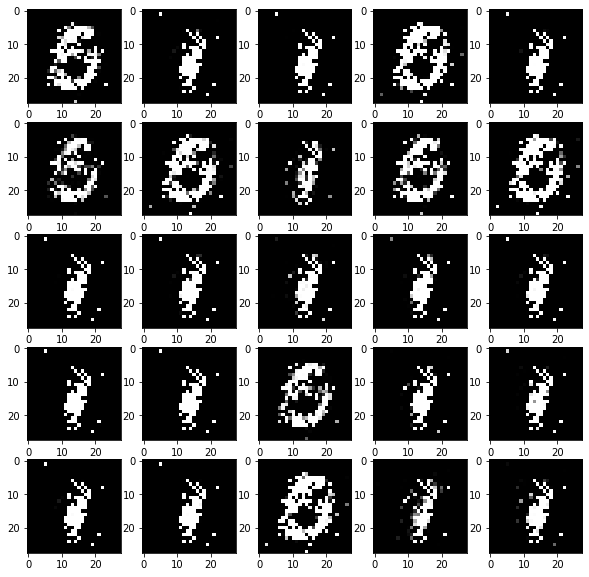

epochs 48


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 8ms/step


  0%|          | 1/273 [00:00<02:11,  2.06it/s]

4/4 [==============================] - 0s 9ms/step


  1%|          | 2/273 [00:00<01:58,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


  1%|          | 3/273 [00:01<02:05,  2.15it/s]

4/4 [==============================] - 0s 10ms/step


  1%|▏         | 4/273 [00:01<02:04,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


  2%|▏         | 5/273 [00:02<02:00,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


  2%|▏         | 6/273 [00:02<02:04,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


  3%|▎         | 7/273 [00:03<02:07,  2.09it/s]

4/4 [==============================] - 0s 8ms/step


  3%|▎         | 8/273 [00:03<02:06,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


  3%|▎         | 9/273 [00:04<01:59,  2.21it/s]

4/4 [==============================] - 0s 11ms/step


  4%|▎         | 10/273 [00:04<02:02,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


  4%|▍         | 11/273 [00:05<02:02,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


  4%|▍         | 12/273 [00:05<02:03,  2.12it/s]

4/4 [==============================] - 0s 10ms/step


  5%|▍         | 13/273 [00:06<02:03,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


  5%|▌         | 14/273 [00:06<01:58,  2.18it/s]

4/4 [==============================] - 0s 10ms/step


  5%|▌         | 15/273 [00:06<01:59,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


  6%|▌         | 16/273 [00:07<01:54,  2.25it/s]

4/4 [==============================] - 0s 10ms/step


  6%|▌         | 17/273 [00:07<01:56,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


  7%|▋         | 18/273 [00:08<01:59,  2.13it/s]

4/4 [==============================] - 0s 8ms/step


  7%|▋         | 19/273 [00:08<01:56,  2.18it/s]

4/4 [==============================] - 0s 10ms/step


  7%|▋         | 20/273 [00:09<01:54,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 21/273 [00:09<01:56,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


  8%|▊         | 22/273 [00:10<01:55,  2.17it/s]

4/4 [==============================] - 0s 10ms/step


  8%|▊         | 23/273 [00:10<01:51,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


  9%|▉         | 24/273 [00:11<01:51,  2.22it/s]

4/4 [==============================] - 0s 10ms/step


  9%|▉         | 25/273 [00:11<01:51,  2.22it/s]

4/4 [==============================] - 0s 10ms/step


 10%|▉         | 26/273 [00:11<01:53,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


 10%|▉         | 27/273 [00:12<01:50,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 10%|█         | 28/273 [00:12<01:49,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 11%|█         | 29/273 [00:13<01:49,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 11%|█         | 30/273 [00:13<01:51,  2.19it/s]

4/4 [==============================] - 0s 10ms/step


 11%|█▏        | 31/273 [00:14<01:54,  2.11it/s]

4/4 [==============================] - 0s 8ms/step


 12%|█▏        | 32/273 [00:14<01:51,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


 12%|█▏        | 33/273 [00:15<01:52,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


 12%|█▏        | 34/273 [00:15<01:46,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 13%|█▎        | 35/273 [00:16<01:46,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 13%|█▎        | 36/273 [00:16<01:48,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 14%|█▎        | 37/273 [00:16<01:47,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 14%|█▍        | 38/273 [00:17<01:47,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 14%|█▍        | 39/273 [00:17<01:50,  2.13it/s]

4/4 [==============================] - 0s 8ms/step


 15%|█▍        | 40/273 [00:18<01:45,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 15%|█▌        | 41/273 [00:18<01:48,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 15%|█▌        | 42/273 [00:19<01:43,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 16%|█▌        | 43/273 [00:19<01:43,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▌        | 44/273 [00:20<01:43,  2.21it/s]

4/4 [==============================] - 0s 10ms/step


 16%|█▋        | 45/273 [00:20<01:44,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 17%|█▋        | 46/273 [00:21<01:42,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 17%|█▋        | 47/273 [00:21<01:51,  2.02it/s]

4/4 [==============================] - 0s 16ms/step


 18%|█▊        | 48/273 [00:22<02:28,  1.51it/s]

4/4 [==============================] - 0s 13ms/step


 18%|█▊        | 49/273 [00:23<02:25,  1.54it/s]

4/4 [==============================] - 0s 11ms/step


 18%|█▊        | 50/273 [00:23<02:15,  1.65it/s]

4/4 [==============================] - 0s 11ms/step


 19%|█▊        | 51/273 [00:24<02:12,  1.68it/s]

4/4 [==============================] - 0s 11ms/step


 19%|█▉        | 52/273 [00:24<02:06,  1.74it/s]

4/4 [==============================] - 0s 10ms/step


 19%|█▉        | 53/273 [00:25<02:04,  1.77it/s]

4/4 [==============================] - 0s 10ms/step


 20%|█▉        | 54/273 [00:25<01:58,  1.86it/s]

4/4 [==============================] - 0s 13ms/step


 20%|██        | 55/273 [00:26<01:55,  1.89it/s]

4/4 [==============================] - 0s 13ms/step


 21%|██        | 56/273 [00:27<01:54,  1.89it/s]

4/4 [==============================] - 0s 8ms/step


 21%|██        | 57/273 [00:27<01:50,  1.96it/s]

4/4 [==============================] - 0s 13ms/step


 21%|██        | 58/273 [00:27<01:44,  2.05it/s]

4/4 [==============================] - 0s 8ms/step


 22%|██▏       | 59/273 [00:28<01:41,  2.10it/s]

4/4 [==============================] - 0s 8ms/step


 22%|██▏       | 60/273 [00:28<01:41,  2.10it/s]

4/4 [==============================] - 0s 8ms/step


 22%|██▏       | 61/273 [00:29<01:41,  2.09it/s]

4/4 [==============================] - 0s 10ms/step


 23%|██▎       | 62/273 [00:29<01:37,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


 23%|██▎       | 63/273 [00:30<01:34,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 23%|██▎       | 64/273 [00:30<01:35,  2.18it/s]

4/4 [==============================] - 0s 12ms/step


 24%|██▍       | 65/273 [00:31<01:34,  2.21it/s]

4/4 [==============================] - 0s 10ms/step


 24%|██▍       | 66/273 [00:31<01:36,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 25%|██▍       | 67/273 [00:32<01:36,  2.13it/s]

4/4 [==============================] - 0s 8ms/step


 25%|██▍       | 68/273 [00:32<01:37,  2.10it/s]

4/4 [==============================] - 0s 10ms/step


 25%|██▌       | 69/273 [00:32<01:33,  2.17it/s]

4/4 [==============================] - 0s 17ms/step


 26%|██▌       | 70/273 [00:33<01:36,  2.11it/s]

4/4 [==============================] - 0s 16ms/step


 26%|██▌       | 71/273 [00:33<01:36,  2.09it/s]

4/4 [==============================] - 0s 8ms/step


 26%|██▋       | 72/273 [00:34<01:35,  2.10it/s]

4/4 [==============================] - 0s 14ms/step


 27%|██▋       | 73/273 [00:35<01:41,  1.97it/s]

4/4 [==============================] - 0s 16ms/step


 27%|██▋       | 74/273 [00:35<01:47,  1.86it/s]

4/4 [==============================] - 0s 13ms/step


 27%|██▋       | 75/273 [00:36<01:46,  1.86it/s]

4/4 [==============================] - 0s 16ms/step


 28%|██▊       | 76/273 [00:36<01:44,  1.88it/s]

4/4 [==============================] - 0s 14ms/step


 28%|██▊       | 77/273 [00:37<01:44,  1.88it/s]

4/4 [==============================] - 0s 14ms/step


 29%|██▊       | 78/273 [00:37<01:46,  1.83it/s]

4/4 [==============================] - 0s 11ms/step


 29%|██▉       | 79/273 [00:38<01:42,  1.90it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▉       | 80/273 [00:38<01:39,  1.94it/s]

4/4 [==============================] - 0s 11ms/step


 30%|██▉       | 81/273 [00:39<01:36,  1.99it/s]

4/4 [==============================] - 0s 12ms/step


 30%|███       | 82/273 [00:40<02:07,  1.50it/s]

4/4 [==============================] - 0s 9ms/step


 30%|███       | 83/273 [00:40<01:55,  1.64it/s]

4/4 [==============================] - 0s 8ms/step


 31%|███       | 84/273 [00:41<02:21,  1.33it/s]

4/4 [==============================] - 0s 10ms/step


 31%|███       | 85/273 [00:42<02:10,  1.44it/s]

4/4 [==============================] - 0s 8ms/step


 32%|███▏      | 86/273 [00:42<01:57,  1.59it/s]

4/4 [==============================] - 0s 8ms/step


 32%|███▏      | 87/273 [00:43<01:48,  1.72it/s]

4/4 [==============================] - 0s 9ms/step


 32%|███▏      | 88/273 [00:43<01:42,  1.80it/s]

4/4 [==============================] - 0s 9ms/step


 33%|███▎      | 89/273 [00:44<01:35,  1.92it/s]

4/4 [==============================] - 0s 9ms/step


 33%|███▎      | 90/273 [00:44<01:34,  1.93it/s]

4/4 [==============================] - 0s 9ms/step


 33%|███▎      | 91/273 [00:45<01:28,  2.05it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▎      | 92/273 [00:45<01:27,  2.07it/s]

4/4 [==============================] - 0s 7ms/step


 34%|███▍      | 93/273 [00:46<01:34,  1.90it/s]

4/4 [==============================] - 0s 11ms/step


 34%|███▍      | 94/273 [00:46<01:27,  2.04it/s]

4/4 [==============================] - 0s 8ms/step


 35%|███▍      | 95/273 [00:47<01:26,  2.06it/s]

4/4 [==============================] - 0s 10ms/step


 35%|███▌      | 96/273 [00:47<01:25,  2.07it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▌      | 97/273 [00:48<01:24,  2.08it/s]

4/4 [==============================] - 0s 12ms/step


 36%|███▌      | 98/273 [00:48<01:22,  2.11it/s]

4/4 [==============================] - 0s 8ms/step


 36%|███▋      | 99/273 [00:49<01:19,  2.18it/s]

4/4 [==============================] - 0s 10ms/step


 37%|███▋      | 100/273 [00:49<01:19,  2.18it/s]

4/4 [==============================] - 0s 10ms/step


 37%|███▋      | 101/273 [00:49<01:18,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 37%|███▋      | 102/273 [00:50<01:19,  2.16it/s]

4/4 [==============================] - 0s 10ms/step


 38%|███▊      | 103/273 [00:50<01:18,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 38%|███▊      | 104/273 [00:51<01:21,  2.07it/s]

4/4 [==============================] - 0s 10ms/step


 38%|███▊      | 105/273 [00:51<01:21,  2.06it/s]

4/4 [==============================] - 0s 9ms/step


 39%|███▉      | 106/273 [00:52<01:18,  2.12it/s]

4/4 [==============================] - 0s 11ms/step


 39%|███▉      | 107/273 [00:52<01:20,  2.07it/s]

4/4 [==============================] - 0s 9ms/step


 40%|███▉      | 108/273 [00:53<01:21,  2.03it/s]

4/4 [==============================] - 0s 8ms/step


 40%|███▉      | 109/273 [00:53<01:21,  2.01it/s]

4/4 [==============================] - 0s 9ms/step


 40%|████      | 110/273 [00:54<01:19,  2.06it/s]

4/4 [==============================] - 0s 9ms/step


 41%|████      | 111/273 [00:54<01:15,  2.15it/s]

4/4 [==============================] - 0s 15ms/step


 41%|████      | 112/273 [00:55<01:17,  2.08it/s]

4/4 [==============================] - 0s 12ms/step


 41%|████▏     | 113/273 [00:55<01:15,  2.11it/s]

4/4 [==============================] - 0s 9ms/step


 42%|████▏     | 114/273 [00:56<01:12,  2.18it/s]

4/4 [==============================] - 0s 10ms/step


 42%|████▏     | 115/273 [00:56<01:12,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 42%|████▏     | 116/273 [00:57<01:09,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 43%|████▎     | 117/273 [00:57<01:09,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 43%|████▎     | 118/273 [00:57<01:11,  2.18it/s]

4/4 [==============================] - 0s 10ms/step


 44%|████▎     | 119/273 [00:58<01:12,  2.12it/s]

4/4 [==============================] - 0s 8ms/step


 44%|████▍     | 120/273 [00:59<01:16,  2.01it/s]

4/4 [==============================] - 0s 9ms/step


 44%|████▍     | 121/273 [00:59<01:12,  2.11it/s]

4/4 [==============================] - 0s 11ms/step


 45%|████▍     | 122/273 [00:59<01:12,  2.08it/s]

4/4 [==============================] - 0s 14ms/step


 45%|████▌     | 123/273 [01:00<01:11,  2.09it/s]

4/4 [==============================] - 0s 10ms/step


 45%|████▌     | 124/273 [01:00<01:10,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


 46%|████▌     | 125/273 [01:01<01:07,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 46%|████▌     | 126/273 [01:01<01:05,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 127/273 [01:02<01:05,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 128/273 [01:02<01:03,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 129/273 [01:02<01:01,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 48%|████▊     | 130/273 [01:03<01:01,  2.33it/s]

4/4 [==============================] - 0s 10ms/step


 48%|████▊     | 131/273 [01:03<01:02,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 48%|████▊     | 132/273 [01:04<01:03,  2.23it/s]

4/4 [==============================] - 0s 10ms/step


 49%|████▊     | 133/273 [01:04<01:02,  2.24it/s]

4/4 [==============================] - 0s 8ms/step


 49%|████▉     | 134/273 [01:05<01:00,  2.29it/s]

4/4 [==============================] - 0s 11ms/step


 49%|████▉     | 135/273 [01:05<01:00,  2.30it/s]

4/4 [==============================] - 0s 8ms/step


 50%|████▉     | 136/273 [01:06<00:58,  2.34it/s]

4/4 [==============================] - 0s 8ms/step


 50%|█████     | 137/273 [01:06<01:00,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 51%|█████     | 138/273 [01:06<01:00,  2.24it/s]

4/4 [==============================] - 0s 11ms/step


 51%|█████     | 139/273 [01:07<01:01,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 51%|█████▏    | 140/273 [01:07<00:59,  2.22it/s]

4/4 [==============================] - 0s 11ms/step


 52%|█████▏    | 141/273 [01:08<01:00,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


 52%|█████▏    | 142/273 [01:08<00:58,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 143/273 [01:09<00:57,  2.26it/s]

4/4 [==============================] - 0s 15ms/step


 53%|█████▎    | 144/273 [01:09<00:57,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 145/273 [01:10<00:58,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 53%|█████▎    | 146/273 [01:10<00:57,  2.22it/s]

4/4 [==============================] - 0s 10ms/step


 54%|█████▍    | 147/273 [01:11<00:55,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 54%|█████▍    | 148/273 [01:11<00:55,  2.26it/s]

4/4 [==============================] - 0s 11ms/step


 55%|█████▍    | 149/273 [01:11<00:55,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▍    | 150/273 [01:12<00:54,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▌    | 151/273 [01:12<00:53,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 56%|█████▌    | 152/273 [01:13<00:52,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▌    | 153/273 [01:13<00:53,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 56%|█████▋    | 154/273 [01:14<00:53,  2.21it/s]

4/4 [==============================] - 0s 10ms/step


 57%|█████▋    | 155/273 [01:14<00:54,  2.17it/s]

4/4 [==============================] - 0s 12ms/step


 57%|█████▋    | 156/273 [01:15<00:54,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


 58%|█████▊    | 157/273 [01:15<00:59,  1.96it/s]

4/4 [==============================] - 0s 8ms/step


 58%|█████▊    | 158/273 [01:16<00:56,  2.03it/s]

4/4 [==============================] - 0s 12ms/step


 58%|█████▊    | 159/273 [01:16<00:56,  2.03it/s]

4/4 [==============================] - 0s 12ms/step


 59%|█████▊    | 160/273 [01:17<00:54,  2.08it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▉    | 161/273 [01:17<00:54,  2.06it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▉    | 162/273 [01:18<00:53,  2.06it/s]

4/4 [==============================] - 0s 9ms/step


 60%|█████▉    | 163/273 [01:18<00:51,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 60%|██████    | 164/273 [01:19<00:51,  2.12it/s]

4/4 [==============================] - 0s 8ms/step


 60%|██████    | 165/273 [01:19<00:50,  2.12it/s]

4/4 [==============================] - 0s 11ms/step


 61%|██████    | 166/273 [01:19<00:48,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 61%|██████    | 167/273 [01:20<00:46,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 62%|██████▏   | 168/273 [01:20<00:46,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 62%|██████▏   | 169/273 [01:21<00:47,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 62%|██████▏   | 170/273 [01:21<00:45,  2.27it/s]

4/4 [==============================] - 0s 12ms/step


 63%|██████▎   | 171/273 [01:22<00:46,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 63%|██████▎   | 172/273 [01:22<00:46,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 63%|██████▎   | 173/273 [01:22<00:44,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 64%|██████▎   | 174/273 [01:23<00:42,  2.35it/s]

4/4 [==============================] - 0s 13ms/step


 64%|██████▍   | 175/273 [01:23<00:43,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 64%|██████▍   | 176/273 [01:24<00:44,  2.18it/s]

4/4 [==============================] - 0s 11ms/step


 65%|██████▍   | 177/273 [01:24<00:43,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 65%|██████▌   | 178/273 [01:25<00:44,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 66%|██████▌   | 179/273 [01:25<00:43,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 66%|██████▌   | 180/273 [01:26<00:41,  2.24it/s]

4/4 [==============================] - 0s 12ms/step


 66%|██████▋   | 181/273 [01:26<00:40,  2.25it/s]

4/4 [==============================] - 0s 10ms/step


 67%|██████▋   | 182/273 [01:27<00:40,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 67%|██████▋   | 183/273 [01:27<00:40,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 67%|██████▋   | 184/273 [01:27<00:39,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 68%|██████▊   | 185/273 [01:28<00:38,  2.26it/s]

4/4 [==============================] - 0s 12ms/step


 68%|██████▊   | 186/273 [01:28<00:41,  2.09it/s]

4/4 [==============================] - 0s 12ms/step


 68%|██████▊   | 187/273 [01:29<00:39,  2.15it/s]

4/4 [==============================] - 0s 13ms/step


 69%|██████▉   | 188/273 [01:29<00:42,  2.02it/s]

4/4 [==============================] - 0s 11ms/step


 69%|██████▉   | 189/273 [01:30<00:42,  1.98it/s]

4/4 [==============================] - 0s 16ms/step


 70%|██████▉   | 190/273 [01:31<00:43,  1.91it/s]

4/4 [==============================] - 0s 9ms/step


 70%|██████▉   | 191/273 [01:31<00:40,  2.01it/s]

4/4 [==============================] - 0s 12ms/step


 70%|███████   | 192/273 [01:31<00:40,  2.02it/s]

4/4 [==============================] - 0s 15ms/step


 71%|███████   | 193/273 [01:32<00:39,  2.01it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████   | 194/273 [01:32<00:37,  2.09it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████▏  | 195/273 [01:33<00:36,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 72%|███████▏  | 196/273 [01:33<00:35,  2.17it/s]

4/4 [==============================] - 0s 11ms/step


 72%|███████▏  | 197/273 [01:34<00:35,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 73%|███████▎  | 198/273 [01:34<00:34,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 73%|███████▎  | 199/273 [01:35<00:33,  2.18it/s]

4/4 [==============================] - 0s 11ms/step


 73%|███████▎  | 200/273 [01:35<00:33,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▎  | 201/273 [01:36<00:32,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▍  | 202/273 [01:36<00:31,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


 74%|███████▍  | 203/273 [01:36<00:31,  2.26it/s]

4/4 [==============================] - 0s 8ms/step


 75%|███████▍  | 204/273 [01:37<00:30,  2.28it/s]

4/4 [==============================] - 0s 14ms/step


 75%|███████▌  | 205/273 [01:37<00:32,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


 75%|███████▌  | 206/273 [01:38<00:32,  2.09it/s]

4/4 [==============================] - 0s 8ms/step


 76%|███████▌  | 207/273 [01:38<00:31,  2.12it/s]

4/4 [==============================] - 0s 10ms/step


 76%|███████▌  | 208/273 [01:39<00:30,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 209/273 [01:39<00:30,  2.09it/s]

4/4 [==============================] - 0s 12ms/step


 77%|███████▋  | 210/273 [01:40<00:30,  2.06it/s]

4/4 [==============================] - 0s 8ms/step


 77%|███████▋  | 211/273 [01:40<00:30,  2.06it/s]

4/4 [==============================] - 0s 12ms/step


 78%|███████▊  | 212/273 [01:41<00:29,  2.09it/s]

4/4 [==============================] - 0s 13ms/step


 78%|███████▊  | 213/273 [01:41<00:30,  1.98it/s]

4/4 [==============================] - 0s 8ms/step


 78%|███████▊  | 214/273 [01:42<00:29,  2.03it/s]

4/4 [==============================] - 0s 8ms/step


 79%|███████▉  | 215/273 [01:42<00:29,  1.94it/s]

4/4 [==============================] - 0s 8ms/step


 79%|███████▉  | 216/273 [01:43<00:28,  1.97it/s]

4/4 [==============================] - 0s 16ms/step


 79%|███████▉  | 217/273 [01:43<00:28,  1.97it/s]

4/4 [==============================] - 0s 17ms/step


 80%|███████▉  | 218/273 [01:44<00:27,  1.97it/s]

4/4 [==============================] - 0s 10ms/step


 80%|████████  | 219/273 [01:45<00:29,  1.81it/s]

4/4 [==============================] - 0s 12ms/step


 81%|████████  | 220/273 [01:45<00:29,  1.80it/s]

4/4 [==============================] - 0s 11ms/step


 81%|████████  | 221/273 [01:46<00:27,  1.91it/s]

4/4 [==============================] - 0s 11ms/step


 81%|████████▏ | 222/273 [01:46<00:25,  2.01it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 223/273 [01:46<00:24,  2.05it/s]

4/4 [==============================] - 0s 8ms/step


 82%|████████▏ | 224/273 [01:47<00:22,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 82%|████████▏ | 225/273 [01:47<00:22,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


 83%|████████▎ | 226/273 [01:48<00:21,  2.18it/s]

4/4 [==============================] - 0s 11ms/step


 83%|████████▎ | 227/273 [01:48<00:20,  2.23it/s]

4/4 [==============================] - 0s 10ms/step


 84%|████████▎ | 228/273 [01:49<00:20,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


 84%|████████▍ | 229/273 [01:49<00:19,  2.24it/s]

4/4 [==============================] - 0s 14ms/step


 84%|████████▍ | 230/273 [01:50<00:20,  2.12it/s]

4/4 [==============================] - 0s 12ms/step


 85%|████████▍ | 231/273 [01:50<00:20,  2.06it/s]

4/4 [==============================] - 0s 9ms/step


 85%|████████▍ | 232/273 [01:51<00:19,  2.08it/s]

4/4 [==============================] - 0s 15ms/step


 85%|████████▌ | 233/273 [01:51<00:18,  2.12it/s]

4/4 [==============================] - 0s 11ms/step


 86%|████████▌ | 234/273 [01:52<00:18,  2.07it/s]

4/4 [==============================] - 0s 8ms/step


 86%|████████▌ | 235/273 [01:52<00:18,  2.06it/s]

4/4 [==============================] - 0s 10ms/step


 86%|████████▋ | 236/273 [01:53<00:17,  2.10it/s]

4/4 [==============================] - 0s 10ms/step


 87%|████████▋ | 237/273 [01:53<00:16,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 87%|████████▋ | 238/273 [01:53<00:16,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 88%|████████▊ | 239/273 [01:54<00:16,  2.11it/s]

4/4 [==============================] - 0s 8ms/step


 88%|████████▊ | 240/273 [01:54<00:15,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 88%|████████▊ | 241/273 [01:55<00:14,  2.27it/s]

4/4 [==============================] - 0s 12ms/step


 89%|████████▊ | 242/273 [01:55<00:14,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 89%|████████▉ | 243/273 [01:56<00:13,  2.29it/s]

4/4 [==============================] - 0s 8ms/step


 89%|████████▉ | 244/273 [01:56<00:12,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 90%|████████▉ | 245/273 [01:57<00:12,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 90%|█████████ | 246/273 [01:57<00:12,  2.25it/s]

4/4 [==============================] - 0s 11ms/step


 90%|█████████ | 247/273 [01:57<00:11,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 91%|█████████ | 248/273 [01:58<00:11,  2.27it/s]

4/4 [==============================] - 0s 10ms/step


 91%|█████████ | 249/273 [01:58<00:10,  2.26it/s]

4/4 [==============================] - 0s 10ms/step


 92%|█████████▏| 250/273 [01:59<00:10,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 92%|█████████▏| 251/273 [01:59<00:11,  1.98it/s]

4/4 [==============================] - 0s 13ms/step


 92%|█████████▏| 252/273 [02:00<00:10,  2.05it/s]

4/4 [==============================] - 0s 8ms/step


 93%|█████████▎| 253/273 [02:00<00:09,  2.05it/s]

4/4 [==============================] - 0s 8ms/step


 93%|█████████▎| 254/273 [02:01<00:08,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 93%|█████████▎| 255/273 [02:01<00:08,  2.23it/s]

4/4 [==============================] - 0s 8ms/step


 94%|█████████▍| 256/273 [02:02<00:07,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 94%|█████████▍| 257/273 [02:02<00:06,  2.35it/s]

4/4 [==============================] - 0s 12ms/step


 95%|█████████▍| 258/273 [02:02<00:06,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▍| 259/273 [02:03<00:06,  2.27it/s]

4/4 [==============================] - 0s 11ms/step


 95%|█████████▌| 260/273 [02:03<00:05,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 96%|█████████▌| 261/273 [02:04<00:05,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 96%|█████████▌| 262/273 [02:04<00:04,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 96%|█████████▋| 263/273 [02:05<00:04,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 264/273 [02:05<00:03,  2.30it/s]

4/4 [==============================] - 0s 10ms/step


 97%|█████████▋| 265/273 [02:06<00:03,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 97%|█████████▋| 266/273 [02:06<00:03,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 98%|█████████▊| 267/273 [02:07<00:02,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 98%|█████████▊| 268/273 [02:07<00:02,  2.08it/s]

4/4 [==============================] - 0s 11ms/step


 99%|█████████▊| 269/273 [02:08<00:01,  2.08it/s]

4/4 [==============================] - 0s 8ms/step


 99%|█████████▉| 270/273 [02:08<00:01,  2.16it/s]

4/4 [==============================] - 0s 8ms/step


 99%|█████████▉| 271/273 [02:08<00:00,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


100%|█████████▉| 272/273 [02:09<00:00,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


100%|██████████| 273/273 [02:09<00:00,  2.10it/s]


loss is 0.008751547895371914 |*| 19.761940002441406
1/1 [==============================] - 0s 27ms/step


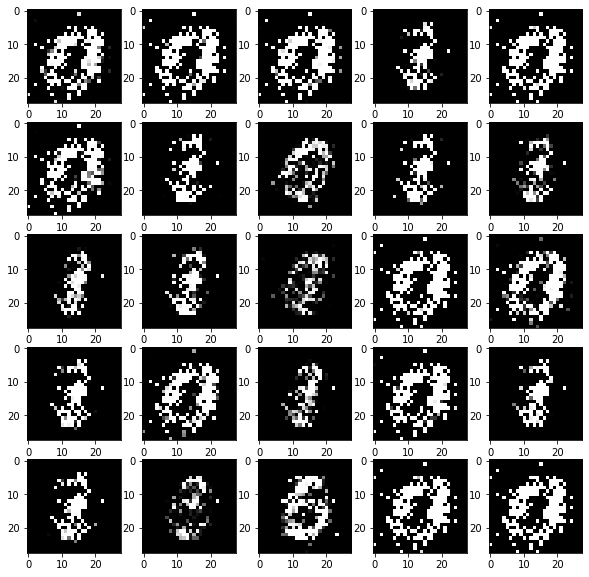

epochs 49


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 10ms/step


  0%|          | 1/273 [00:00<02:14,  2.03it/s]

4/4 [==============================] - 0s 9ms/step


  1%|          | 2/273 [00:00<02:02,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


  1%|          | 3/273 [00:01<02:03,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


  1%|▏         | 4/273 [00:01<02:05,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


  2%|▏         | 5/273 [00:02<02:01,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


  2%|▏         | 6/273 [00:02<02:03,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


  3%|▎         | 7/273 [00:03<01:59,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


  3%|▎         | 8/273 [00:03<01:59,  2.21it/s]

4/4 [==============================] - 0s 17ms/step


  3%|▎         | 9/273 [00:04<02:00,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


  4%|▎         | 10/273 [00:04<02:00,  2.18it/s]

4/4 [==============================] - 0s 15ms/step


  4%|▍         | 11/273 [00:05<02:03,  2.12it/s]

4/4 [==============================] - 0s 13ms/step


  4%|▍         | 12/273 [00:05<02:06,  2.06it/s]

4/4 [==============================] - 0s 13ms/step


  5%|▍         | 13/273 [00:06<02:09,  2.01it/s]

4/4 [==============================] - 0s 9ms/step


  5%|▌         | 14/273 [00:06<02:09,  2.00it/s]

4/4 [==============================] - 0s 9ms/step


  5%|▌         | 15/273 [00:07<02:07,  2.03it/s]

4/4 [==============================] - 0s 9ms/step


  6%|▌         | 16/273 [00:07<02:04,  2.06it/s]

4/4 [==============================] - 0s 13ms/step


  6%|▌         | 17/273 [00:08<02:07,  2.00it/s]

4/4 [==============================] - 0s 8ms/step


  7%|▋         | 18/273 [00:08<02:02,  2.08it/s]

4/4 [==============================] - 0s 9ms/step


  7%|▋         | 19/273 [00:09<02:02,  2.07it/s]

4/4 [==============================] - 0s 9ms/step


  7%|▋         | 20/273 [00:09<02:00,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 21/273 [00:09<01:58,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


  8%|▊         | 22/273 [00:10<01:56,  2.16it/s]

4/4 [==============================] - 0s 10ms/step


  8%|▊         | 23/273 [00:10<01:54,  2.19it/s]

4/4 [==============================] - 0s 10ms/step


  9%|▉         | 24/273 [00:11<01:56,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


  9%|▉         | 25/273 [00:11<01:52,  2.21it/s]

4/4 [==============================] - 0s 12ms/step


 10%|▉         | 26/273 [00:12<01:54,  2.16it/s]

4/4 [==============================] - 0s 13ms/step


 10%|▉         | 27/273 [00:12<02:00,  2.04it/s]

4/4 [==============================] - 0s 9ms/step


 10%|█         | 28/273 [00:13<02:02,  2.00it/s]

4/4 [==============================] - 0s 8ms/step


 11%|█         | 29/273 [00:13<01:56,  2.09it/s]

4/4 [==============================] - 0s 13ms/step


 11%|█         | 30/273 [00:14<01:56,  2.09it/s]

4/4 [==============================] - 0s 10ms/step


 11%|█▏        | 31/273 [00:14<01:55,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


 12%|█▏        | 32/273 [00:15<01:52,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 12%|█▏        | 33/273 [00:15<01:50,  2.16it/s]

4/4 [==============================] - 0s 11ms/step


 12%|█▏        | 34/273 [00:15<01:46,  2.24it/s]

4/4 [==============================] - 0s 15ms/step


 13%|█▎        | 35/273 [00:16<01:57,  2.03it/s]

4/4 [==============================] - 0s 8ms/step


 13%|█▎        | 36/273 [00:16<01:50,  2.15it/s]

4/4 [==============================] - 0s 12ms/step


 14%|█▎        | 37/273 [00:17<01:50,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▍        | 38/273 [00:17<01:47,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 14%|█▍        | 39/273 [00:18<01:42,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 15%|█▍        | 40/273 [00:18<01:39,  2.33it/s]

4/4 [==============================] - 0s 12ms/step


 15%|█▌        | 41/273 [00:19<01:43,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 15%|█▌        | 42/273 [00:19<01:41,  2.27it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▌        | 43/273 [00:20<01:44,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▌        | 44/273 [00:20<01:40,  2.29it/s]

4/4 [==============================] - 0s 9ms/step


 16%|█▋        | 45/273 [00:20<01:39,  2.29it/s]

4/4 [==============================] - 0s 10ms/step


 17%|█▋        | 46/273 [00:21<01:40,  2.26it/s]

4/4 [==============================] - 0s 11ms/step


 17%|█▋        | 47/273 [00:21<01:42,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 18%|█▊        | 48/273 [00:22<01:52,  2.01it/s]

4/4 [==============================] - 0s 10ms/step


 18%|█▊        | 49/273 [00:22<01:50,  2.03it/s]

4/4 [==============================] - 0s 9ms/step


 18%|█▊        | 50/273 [00:23<01:45,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 19%|█▊        | 51/273 [00:23<01:45,  2.11it/s]

4/4 [==============================] - 0s 13ms/step


 19%|█▉        | 52/273 [00:24<01:44,  2.11it/s]

4/4 [==============================] - 0s 12ms/step


 19%|█▉        | 53/273 [00:24<01:45,  2.09it/s]

4/4 [==============================] - 0s 10ms/step


 20%|█▉        | 54/273 [00:25<01:42,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 20%|██        | 55/273 [00:25<01:41,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


 21%|██        | 56/273 [00:26<01:39,  2.19it/s]

4/4 [==============================] - 0s 10ms/step


 21%|██        | 57/273 [00:26<01:38,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 21%|██        | 58/273 [00:27<01:38,  2.17it/s]

4/4 [==============================] - 0s 11ms/step


 22%|██▏       | 59/273 [00:27<01:41,  2.10it/s]

4/4 [==============================] - 0s 16ms/step


 22%|██▏       | 60/273 [00:28<01:49,  1.94it/s]

4/4 [==============================] - 0s 13ms/step


 22%|██▏       | 61/273 [00:28<01:48,  1.96it/s]

4/4 [==============================] - 0s 9ms/step


 23%|██▎       | 62/273 [00:29<01:46,  1.99it/s]

4/4 [==============================] - 0s 10ms/step


 23%|██▎       | 63/273 [00:29<01:49,  1.92it/s]

4/4 [==============================] - 0s 15ms/step


 23%|██▎       | 64/273 [00:30<01:50,  1.90it/s]

4/4 [==============================] - 0s 10ms/step


 24%|██▍       | 65/273 [00:30<01:50,  1.88it/s]

4/4 [==============================] - 0s 14ms/step


 24%|██▍       | 66/273 [00:31<01:49,  1.90it/s]

4/4 [==============================] - 0s 14ms/step


 25%|██▍       | 67/273 [00:31<01:44,  1.96it/s]

4/4 [==============================] - 0s 9ms/step


 25%|██▍       | 68/273 [00:32<01:37,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


 25%|██▌       | 69/273 [00:32<01:33,  2.19it/s]

4/4 [==============================] - 0s 11ms/step


 26%|██▌       | 70/273 [00:33<01:34,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 26%|██▌       | 71/273 [00:33<01:33,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 26%|██▋       | 72/273 [00:34<01:33,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 27%|██▋       | 73/273 [00:34<01:31,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 27%|██▋       | 74/273 [00:34<01:28,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 27%|██▋       | 75/273 [00:35<01:28,  2.23it/s]

4/4 [==============================] - 0s 12ms/step


 28%|██▊       | 76/273 [00:35<01:29,  2.20it/s]

4/4 [==============================] - 0s 15ms/step


 28%|██▊       | 77/273 [00:36<01:34,  2.07it/s]

4/4 [==============================] - 0s 13ms/step


 29%|██▊       | 78/273 [00:36<01:42,  1.90it/s]

4/4 [==============================] - 0s 13ms/step


 29%|██▉       | 79/273 [00:37<01:43,  1.88it/s]

4/4 [==============================] - 0s 9ms/step


 29%|██▉       | 80/273 [00:38<01:43,  1.86it/s]

4/4 [==============================] - 0s 11ms/step


 30%|██▉       | 81/273 [00:38<01:44,  1.83it/s]

4/4 [==============================] - 0s 9ms/step


 30%|███       | 82/273 [00:39<01:40,  1.90it/s]

4/4 [==============================] - 0s 16ms/step


 30%|███       | 83/273 [00:39<01:41,  1.87it/s]

4/4 [==============================] - 0s 14ms/step


 31%|███       | 84/273 [00:40<01:45,  1.78it/s]

4/4 [==============================] - 0s 10ms/step


 31%|███       | 85/273 [00:40<01:41,  1.86it/s]

4/4 [==============================] - 0s 8ms/step


 32%|███▏      | 86/273 [00:41<01:36,  1.94it/s]

4/4 [==============================] - 0s 13ms/step


 32%|███▏      | 87/273 [00:41<01:33,  1.99it/s]

4/4 [==============================] - 0s 9ms/step


 32%|███▏      | 88/273 [00:42<01:30,  2.05it/s]

4/4 [==============================] - 0s 9ms/step


 33%|███▎      | 89/273 [00:42<01:24,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 33%|███▎      | 90/273 [00:42<01:21,  2.25it/s]

4/4 [==============================] - 0s 10ms/step


 33%|███▎      | 91/273 [00:43<01:22,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 34%|███▎      | 92/273 [00:43<01:22,  2.19it/s]

4/4 [==============================] - 0s 13ms/step


 34%|███▍      | 93/273 [00:44<01:19,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 34%|███▍      | 94/273 [00:44<01:19,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 35%|███▍      | 95/273 [00:45<01:20,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 35%|███▌      | 96/273 [00:45<01:20,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 36%|███▌      | 97/273 [00:46<01:18,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 36%|███▌      | 98/273 [00:46<01:16,  2.29it/s]

4/4 [==============================] - 0s 10ms/step


 36%|███▋      | 99/273 [00:46<01:15,  2.30it/s]

4/4 [==============================] - 0s 10ms/step


 37%|███▋      | 100/273 [00:47<01:20,  2.15it/s]

4/4 [==============================] - 0s 10ms/step


 37%|███▋      | 101/273 [00:48<01:23,  2.05it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 102/273 [00:48<01:25,  1.99it/s]

4/4 [==============================] - 0s 11ms/step


 38%|███▊      | 103/273 [00:49<01:26,  1.97it/s]

4/4 [==============================] - 0s 9ms/step


 38%|███▊      | 104/273 [00:49<01:19,  2.11it/s]

4/4 [==============================] - 0s 11ms/step


 38%|███▊      | 105/273 [00:50<01:20,  2.09it/s]

4/4 [==============================] - 0s 9ms/step


 39%|███▉      | 106/273 [00:50<01:19,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


 39%|███▉      | 107/273 [00:50<01:16,  2.16it/s]

4/4 [==============================] - 0s 10ms/step


 40%|███▉      | 108/273 [00:51<01:13,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 40%|███▉      | 109/273 [00:51<01:15,  2.18it/s]

4/4 [==============================] - 0s 10ms/step


 40%|████      | 110/273 [00:52<01:15,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 41%|████      | 111/273 [00:52<01:13,  2.19it/s]

4/4 [==============================] - 0s 13ms/step


 41%|████      | 112/273 [00:53<01:14,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 41%|████▏     | 113/273 [00:53<01:10,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 42%|████▏     | 114/273 [00:53<01:07,  2.34it/s]

4/4 [==============================] - 0s 10ms/step


 42%|████▏     | 115/273 [00:54<01:07,  2.33it/s]

4/4 [==============================] - 0s 10ms/step


 42%|████▏     | 116/273 [00:54<01:06,  2.35it/s]

4/4 [==============================] - 0s 9ms/step


 43%|████▎     | 117/273 [00:55<01:10,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 43%|████▎     | 118/273 [00:55<01:09,  2.22it/s]

4/4 [==============================] - 0s 8ms/step


 44%|████▎     | 119/273 [00:56<01:10,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 44%|████▍     | 120/273 [00:56<01:09,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 44%|████▍     | 121/273 [00:57<01:10,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 45%|████▍     | 122/273 [00:57<01:08,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 45%|████▌     | 123/273 [00:58<01:08,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 45%|████▌     | 124/273 [00:58<01:06,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 46%|████▌     | 125/273 [00:58<01:07,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 46%|████▌     | 126/273 [00:59<01:06,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 47%|████▋     | 127/273 [00:59<01:04,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 128/273 [01:00<01:10,  2.06it/s]

4/4 [==============================] - 0s 9ms/step


 47%|████▋     | 129/273 [01:00<01:07,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 48%|████▊     | 130/273 [01:01<01:05,  2.17it/s]

4/4 [==============================] - 0s 15ms/step


 48%|████▊     | 131/273 [01:01<01:07,  2.11it/s]

4/4 [==============================] - 0s 14ms/step


 48%|████▊     | 132/273 [01:02<01:07,  2.07it/s]

4/4 [==============================] - 0s 15ms/step


 49%|████▊     | 133/273 [01:02<01:05,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 49%|████▉     | 134/273 [01:03<01:03,  2.19it/s]

4/4 [==============================] - 0s 12ms/step


 49%|████▉     | 135/273 [01:03<01:03,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 50%|████▉     | 136/273 [01:04<01:01,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 50%|█████     | 137/273 [01:04<01:01,  2.21it/s]

4/4 [==============================] - 0s 11ms/step


 51%|█████     | 138/273 [01:05<01:02,  2.17it/s]

4/4 [==============================] - 0s 9ms/step


 51%|█████     | 139/273 [01:05<01:02,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 51%|█████▏    | 140/273 [01:05<01:00,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 52%|█████▏    | 141/273 [01:06<01:01,  2.14it/s]

4/4 [==============================] - 0s 12ms/step


 52%|█████▏    | 142/273 [01:06<00:59,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 52%|█████▏    | 143/273 [01:07<00:57,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 144/273 [01:07<00:58,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 145/273 [01:08<00:55,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 53%|█████▎    | 146/273 [01:08<00:57,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 54%|█████▍    | 147/273 [01:09<00:55,  2.26it/s]

4/4 [==============================] - 0s 9ms/step


 54%|█████▍    | 148/273 [01:09<00:56,  2.22it/s]

4/4 [==============================] - 0s 9ms/step


 55%|█████▍    | 149/273 [01:09<00:56,  2.18it/s]

4/4 [==============================] - 0s 10ms/step


 55%|█████▍    | 150/273 [01:10<00:57,  2.14it/s]

4/4 [==============================] - 0s 8ms/step


 55%|█████▌    | 151/273 [01:10<00:57,  2.12it/s]

4/4 [==============================] - 0s 8ms/step


 56%|█████▌    | 152/273 [01:11<00:55,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 56%|█████▌    | 153/273 [01:11<00:55,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 56%|█████▋    | 154/273 [01:12<00:55,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 57%|█████▋    | 155/273 [01:12<00:53,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 57%|█████▋    | 156/273 [01:13<00:51,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 58%|█████▊    | 157/273 [01:13<00:50,  2.28it/s]

4/4 [==============================] - 0s 10ms/step


 58%|█████▊    | 158/273 [01:14<00:52,  2.21it/s]

4/4 [==============================] - 0s 10ms/step


 58%|█████▊    | 159/273 [01:14<00:54,  2.11it/s]

4/4 [==============================] - 0s 10ms/step


 59%|█████▊    | 160/273 [01:15<00:54,  2.08it/s]

4/4 [==============================] - 0s 13ms/step


 59%|█████▉    | 161/273 [01:15<00:54,  2.04it/s]

4/4 [==============================] - 0s 9ms/step


 59%|█████▉    | 162/273 [01:16<00:52,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 60%|█████▉    | 163/273 [01:16<00:49,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 60%|██████    | 164/273 [01:16<00:48,  2.27it/s]

4/4 [==============================] - 0s 13ms/step


 60%|██████    | 165/273 [01:17<00:49,  2.20it/s]

4/4 [==============================] - 0s 10ms/step


 61%|██████    | 166/273 [01:17<00:49,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 61%|██████    | 167/273 [01:18<00:49,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 62%|██████▏   | 168/273 [01:18<00:49,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 62%|██████▏   | 169/273 [01:19<00:48,  2.13it/s]

4/4 [==============================] - 0s 8ms/step


 62%|██████▏   | 170/273 [01:19<00:45,  2.25it/s]

4/4 [==============================] - 0s 8ms/step


 63%|██████▎   | 171/273 [01:20<00:46,  2.21it/s]

4/4 [==============================] - 0s 13ms/step


 63%|██████▎   | 172/273 [01:20<00:47,  2.15it/s]

4/4 [==============================] - 0s 16ms/step


 63%|██████▎   | 173/273 [01:21<00:48,  2.05it/s]

4/4 [==============================] - 0s 12ms/step


 64%|██████▎   | 174/273 [01:21<00:46,  2.11it/s]

4/4 [==============================] - 0s 11ms/step


 64%|██████▍   | 175/273 [01:22<00:46,  2.11it/s]

4/4 [==============================] - 0s 11ms/step


 64%|██████▍   | 176/273 [01:22<00:45,  2.11it/s]

4/4 [==============================] - 0s 9ms/step


 65%|██████▍   | 177/273 [01:22<00:45,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 65%|██████▌   | 178/273 [01:23<00:43,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▌   | 179/273 [01:23<00:41,  2.27it/s]

4/4 [==============================] - 0s 11ms/step


 66%|██████▌   | 180/273 [01:24<00:41,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 66%|██████▋   | 181/273 [01:24<00:41,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 67%|██████▋   | 182/273 [01:25<00:40,  2.25it/s]

4/4 [==============================] - 0s 13ms/step


 67%|██████▋   | 183/273 [01:25<00:41,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 67%|██████▋   | 184/273 [01:26<00:40,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 68%|██████▊   | 185/273 [01:26<00:39,  2.21it/s]

4/4 [==============================] - 0s 9ms/step


 68%|██████▊   | 186/273 [01:27<00:39,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 68%|██████▊   | 187/273 [01:27<00:38,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 69%|██████▉   | 188/273 [01:27<00:36,  2.30it/s]

4/4 [==============================] - 0s 9ms/step


 69%|██████▉   | 189/273 [01:28<00:36,  2.28it/s]

4/4 [==============================] - 0s 7ms/step


 70%|██████▉   | 190/273 [01:28<00:36,  2.26it/s]

4/4 [==============================] - 0s 10ms/step


 70%|██████▉   | 191/273 [01:29<00:36,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 70%|███████   | 192/273 [01:29<00:35,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████   | 193/273 [01:30<00:35,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 71%|███████   | 194/273 [01:30<00:35,  2.25it/s]

4/4 [==============================] - 0s 13ms/step


 71%|███████▏  | 195/273 [01:30<00:34,  2.27it/s]

4/4 [==============================] - 0s 11ms/step


 72%|███████▏  | 196/273 [01:31<00:34,  2.26it/s]

4/4 [==============================] - 0s 13ms/step


 72%|███████▏  | 197/273 [01:31<00:33,  2.28it/s]

4/4 [==============================] - 0s 8ms/step


 73%|███████▎  | 198/273 [01:32<00:32,  2.34it/s]

4/4 [==============================] - 0s 11ms/step


 73%|███████▎  | 199/273 [01:32<00:33,  2.24it/s]

4/4 [==============================] - 0s 13ms/step


 73%|███████▎  | 200/273 [01:33<00:32,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 74%|███████▎  | 201/273 [01:33<00:31,  2.31it/s]

4/4 [==============================] - 0s 12ms/step


 74%|███████▍  | 202/273 [01:33<00:30,  2.34it/s]

4/4 [==============================] - 0s 8ms/step


 74%|███████▍  | 203/273 [01:34<00:29,  2.38it/s]

4/4 [==============================] - 0s 9ms/step


 75%|███████▍  | 204/273 [01:34<00:29,  2.37it/s]

4/4 [==============================] - 0s 9ms/step


 75%|███████▌  | 205/273 [01:35<00:29,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 75%|███████▌  | 206/273 [01:35<00:29,  2.29it/s]

4/4 [==============================] - 0s 12ms/step


 76%|███████▌  | 207/273 [01:36<00:28,  2.29it/s]

4/4 [==============================] - 0s 10ms/step


 76%|███████▌  | 208/273 [01:36<00:28,  2.25it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 209/273 [01:37<00:28,  2.26it/s]

4/4 [==============================] - 0s 10ms/step


 77%|███████▋  | 210/273 [01:37<00:27,  2.31it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 211/273 [01:37<00:27,  2.25it/s]

4/4 [==============================] - 0s 13ms/step


 78%|███████▊  | 212/273 [01:38<00:27,  2.20it/s]

4/4 [==============================] - 0s 9ms/step


 78%|███████▊  | 213/273 [01:38<00:26,  2.22it/s]

4/4 [==============================] - 0s 11ms/step


 78%|███████▊  | 214/273 [01:39<00:27,  2.16it/s]

4/4 [==============================] - 0s 10ms/step


 79%|███████▉  | 215/273 [01:39<00:26,  2.22it/s]

4/4 [==============================] - 0s 12ms/step


 79%|███████▉  | 216/273 [01:40<00:26,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 79%|███████▉  | 217/273 [01:40<00:26,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 80%|███████▉  | 218/273 [01:41<00:25,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 80%|████████  | 219/273 [01:41<00:24,  2.17it/s]

4/4 [==============================] - 0s 8ms/step


 81%|████████  | 220/273 [01:42<00:24,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 81%|████████  | 221/273 [01:42<00:22,  2.26it/s]

4/4 [==============================] - 0s 11ms/step


 81%|████████▏ | 222/273 [01:42<00:23,  2.21it/s]

4/4 [==============================] - 0s 12ms/step


 82%|████████▏ | 223/273 [01:43<00:22,  2.20it/s]

4/4 [==============================] - 0s 8ms/step


 82%|████████▏ | 224/273 [01:43<00:22,  2.16it/s]

4/4 [==============================] - 0s 9ms/step


 82%|████████▏ | 225/273 [01:44<00:22,  2.14it/s]

4/4 [==============================] - 0s 10ms/step


 83%|████████▎ | 226/273 [01:44<00:22,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 83%|████████▎ | 227/273 [01:45<00:23,  1.95it/s]

4/4 [==============================] - 0s 13ms/step


 84%|████████▎ | 228/273 [01:46<00:23,  1.95it/s]

4/4 [==============================] - 0s 9ms/step


 84%|████████▍ | 229/273 [01:46<00:21,  2.03it/s]

4/4 [==============================] - 0s 8ms/step


 84%|████████▍ | 230/273 [01:46<00:21,  2.03it/s]

4/4 [==============================] - 0s 9ms/step


 85%|████████▍ | 231/273 [01:47<00:20,  2.05it/s]

4/4 [==============================] - 0s 8ms/step


 85%|████████▍ | 232/273 [01:47<00:20,  2.02it/s]

4/4 [==============================] - 0s 9ms/step


 85%|████████▌ | 233/273 [01:48<00:19,  2.05it/s]

4/4 [==============================] - 0s 15ms/step


 86%|████████▌ | 234/273 [01:48<00:18,  2.14it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▌ | 235/273 [01:49<00:17,  2.15it/s]

4/4 [==============================] - 0s 9ms/step


 86%|████████▋ | 236/273 [01:49<00:17,  2.12it/s]

4/4 [==============================] - 0s 8ms/step


 87%|████████▋ | 237/273 [01:50<00:17,  2.11it/s]

4/4 [==============================] - 0s 10ms/step


 87%|████████▋ | 238/273 [01:50<00:16,  2.19it/s]

4/4 [==============================] - 0s 13ms/step


 88%|████████▊ | 239/273 [01:51<00:15,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


 88%|████████▊ | 240/273 [01:51<00:15,  2.18it/s]

4/4 [==============================] - 0s 14ms/step


 88%|████████▊ | 241/273 [01:52<00:15,  2.12it/s]

4/4 [==============================] - 0s 9ms/step


 89%|████████▊ | 242/273 [01:52<00:14,  2.09it/s]

4/4 [==============================] - 0s 10ms/step


 89%|████████▉ | 243/273 [01:53<00:14,  2.03it/s]

4/4 [==============================] - 0s 12ms/step


 89%|████████▉ | 244/273 [01:53<00:14,  2.06it/s]

4/4 [==============================] - 0s 10ms/step


 90%|████████▉ | 245/273 [01:54<00:13,  2.06it/s]

4/4 [==============================] - 0s 8ms/step


 90%|█████████ | 246/273 [01:54<00:12,  2.08it/s]

4/4 [==============================] - 0s 11ms/step


 90%|█████████ | 247/273 [01:55<00:12,  2.06it/s]

4/4 [==============================] - 0s 16ms/step


 91%|█████████ | 248/273 [01:55<00:12,  2.02it/s]

4/4 [==============================] - 0s 12ms/step


 91%|█████████ | 249/273 [01:55<00:11,  2.09it/s]

4/4 [==============================] - 0s 9ms/step


 92%|█████████▏| 250/273 [01:56<00:10,  2.15it/s]

4/4 [==============================] - 0s 8ms/step


 92%|█████████▏| 251/273 [01:56<00:10,  2.16it/s]

4/4 [==============================] - 0s 10ms/step


 92%|█████████▏| 252/273 [01:57<00:09,  2.15it/s]

4/4 [==============================] - 0s 10ms/step


 93%|█████████▎| 253/273 [01:57<00:08,  2.25it/s]

4/4 [==============================] - 0s 14ms/step


 93%|█████████▎| 254/273 [01:58<00:08,  2.18it/s]

4/4 [==============================] - 0s 9ms/step


 93%|█████████▎| 255/273 [01:58<00:08,  2.23it/s]

4/4 [==============================] - 0s 9ms/step


 94%|█████████▍| 256/273 [01:59<00:07,  2.19it/s]

4/4 [==============================] - 0s 9ms/step


 94%|█████████▍| 257/273 [01:59<00:07,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 95%|█████████▍| 258/273 [02:00<00:06,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 95%|█████████▍| 259/273 [02:00<00:06,  2.18it/s]

4/4 [==============================] - 0s 8ms/step


 95%|█████████▌| 260/273 [02:00<00:05,  2.21it/s]

4/4 [==============================] - 0s 8ms/step


 96%|█████████▌| 261/273 [02:01<00:05,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 96%|█████████▌| 262/273 [02:01<00:04,  2.24it/s]

4/4 [==============================] - 0s 10ms/step


 96%|█████████▋| 263/273 [02:02<00:04,  2.26it/s]

4/4 [==============================] - 0s 10ms/step


 97%|█████████▋| 264/273 [02:02<00:03,  2.32it/s]

4/4 [==============================] - 0s 8ms/step


 97%|█████████▋| 265/273 [02:03<00:03,  2.27it/s]

4/4 [==============================] - 0s 8ms/step


 97%|█████████▋| 266/273 [02:03<00:03,  2.13it/s]

4/4 [==============================] - 0s 10ms/step


 98%|█████████▊| 267/273 [02:04<00:02,  2.22it/s]

4/4 [==============================] - 0s 14ms/step


 98%|█████████▊| 268/273 [02:04<00:02,  2.28it/s]

4/4 [==============================] - 0s 9ms/step


 99%|█████████▊| 269/273 [02:04<00:01,  2.19it/s]

4/4 [==============================] - 0s 8ms/step


 99%|█████████▉| 270/273 [02:05<00:01,  2.24it/s]

4/4 [==============================] - 0s 9ms/step


 99%|█████████▉| 271/273 [02:05<00:00,  2.13it/s]

4/4 [==============================] - 0s 9ms/step


100%|█████████▉| 272/273 [02:06<00:00,  2.10it/s]

4/4 [==============================] - 0s 9ms/step


100%|██████████| 273/273 [02:06<00:00,  2.15it/s]


loss is 0.003950653597712517 |*| 22.673076629638672
1/1 [==============================] - 0s 27ms/step


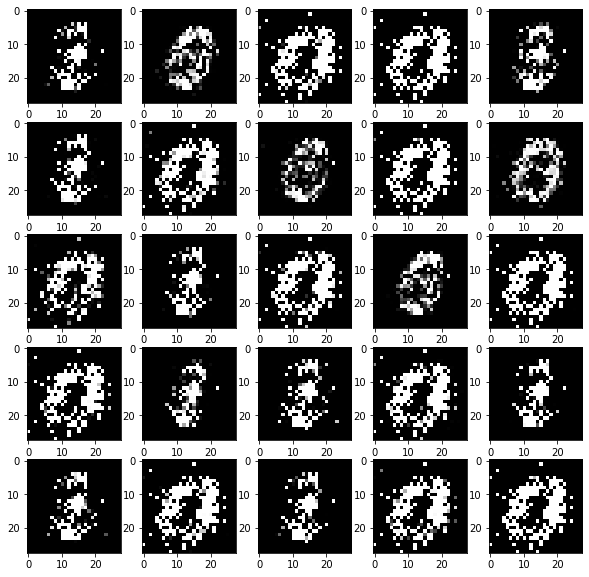

In [ ]:
#training
for i in range(epochs):
  print("epochs", i)
  for j in tqdm(range(len(X)//batch_size)):
    xreal, yreal = X[np.random.randint(0, len(X), half_batch)].reshape(half_batch, 28,28,1), np.ones(half_batch).reshape(half_batch,1)
    xfake, yfake = gener.predict(np.random.randn(half_batch, n)), np.zeros(half_batch).reshape(half_batch, 1)
    xfinal, yfinal = np.vstack((xreal, xfake)), np.vstack((yreal, yfake))
    dloss = discrim.train_on_batch(xfinal, yfinal)
    gloss = gan_model.train_on_batch(np.random.rand(batch_size, n), np.ones(batch_size).reshape(batch_size,1))
    losses.append([dloss, gloss])

  fig, axes = plt.subplots(5,5, figsize = (10,10))
  print("loss is", dloss, "|*|", gloss)
  for a in range(5):
    for b in range(5):
      axes[a,b].imshow(gener.predict(np.random.randn(1*n).reshape(1,n)).reshape(28,28), cmap = "gray")#n
  plt.show()
  plt.close()      